<a href="https://colab.research.google.com/github/hichemfelouat/my-codes-of-machine-learning/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Convolutional GANs**

170500096/170498071 [==============================] - 3s 0us/step
X_train shape =  (50000, 32, 32, 3)  X_test shape =  (10000, 32, 32, 3)


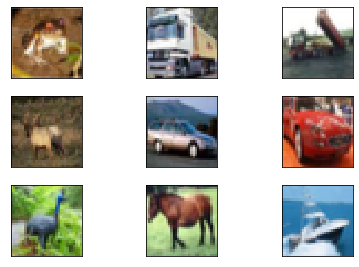

In [ ]:
# A Comprehensive Introduction to Different Types of Convolutions in Deep Learning
# https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Using Keras to load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
X_train = X_train.astype("float32") / 255.0
# Creating a Dataset to iterate through the images
batch_size = 128
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
# discriminator
def build_discriminator():
    discriminator = tf.keras.Sequential()

    discriminator.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same", input_shape=(32, 32, 3)))
    discriminator.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same"))
    discriminator.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same"))
    discriminator.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same"))
  
    # classifier
    discriminator.add(keras.layers.Flatten())
    discriminator.add(keras.layers.Dropout(0.4))
    # discriminator.add(keras.layers.Dense(1024, activation=keras.layers.LeakyReLU(0.2)))
    discriminator.add(keras.layers.Dense(1, activation="sigmoid"))

    return discriminator

discriminator = build_discriminator()

# compile model
opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
discriminator.trainable = False

In [ ]:
# The Generator
# codings_size : the dimension of the input vector for the generator
codings_size = 100

def build_generator(codings_size=100):
    generator = tf.keras.Sequential()

    # latent variable as input
    generator.add(keras.layers.Dense(1024, activation="relu", input_shape=(codings_size,)))
    generator.add(keras.layers.BatchNormalization())
    generator.add(keras.layers.Dense(1024, activation="relu"))
    generator.add(keras.layers.BatchNormalization())
    generator.add(keras.layers.Dense(128*8*8, activation="relu"))
    generator.add(keras.layers.Reshape((8, 8, 128)))
    assert generator.output_shape == (None, 8, 8, 128)  # Note: None is the batch size

    generator.add(keras.layers.Conv2DTranspose(filters=128, kernel_size=2, strides=2, activation="relu", padding="same"))
    assert generator.output_shape == (None, 16, 16, 128)
    generator.add(keras.layers.BatchNormalization())

    generator.add(keras.layers.Conv2DTranspose(filters=3, kernel_size=2, strides=2, activation="tanh", padding="same"))
    assert generator.output_shape == (None, 32, 32, 3)
    generator.add(keras.layers.BatchNormalization())
    
    return generator

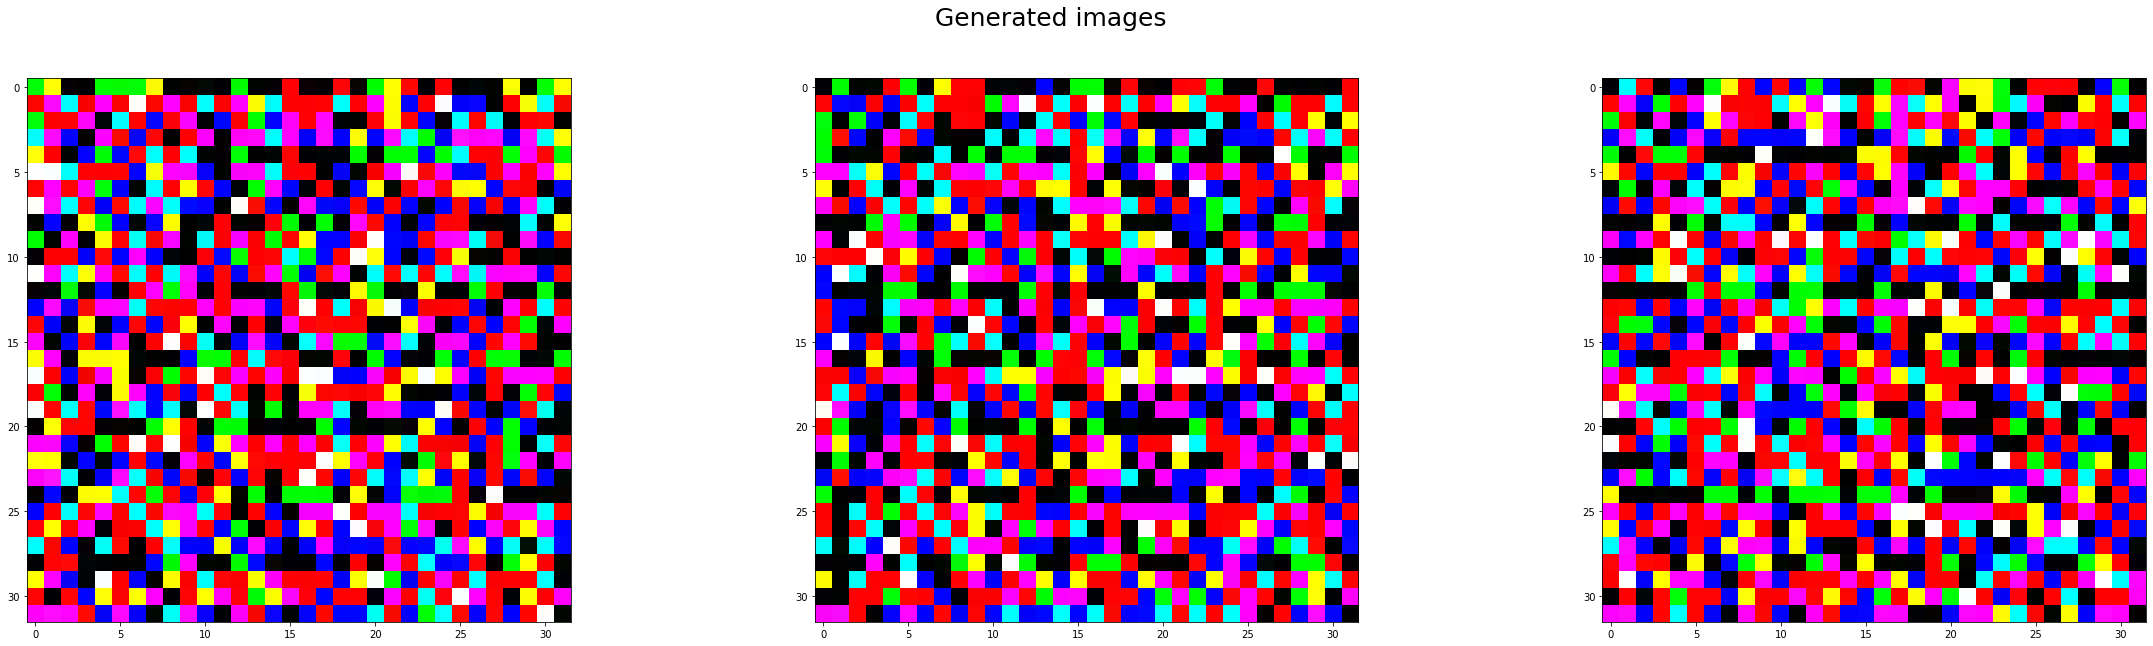

In [ ]:
generator = build_generator()
nbr_imgs = 3

def plot_generated_images(nbr_imgs, titleadd=""):
    noise = tf.random.normal([nbr_imgs, 100])
    imgs = generator.predict(noise)
    
    fig = plt.figure(figsize=(40,10))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(1,nbr_imgs,i+1)
        ax.imshow((img * 255).astype(np.uint8))
    fig.suptitle("Generated images"+titleadd,fontsize=25)
    plt.show()
  
plot_generated_images(nbr_imgs)  

---------------------------------------------------------------
epoch :  0  d_loss_accuracy  =  [0.01923532783985138, 0.9921875]  g_loss =  2.145159959793091


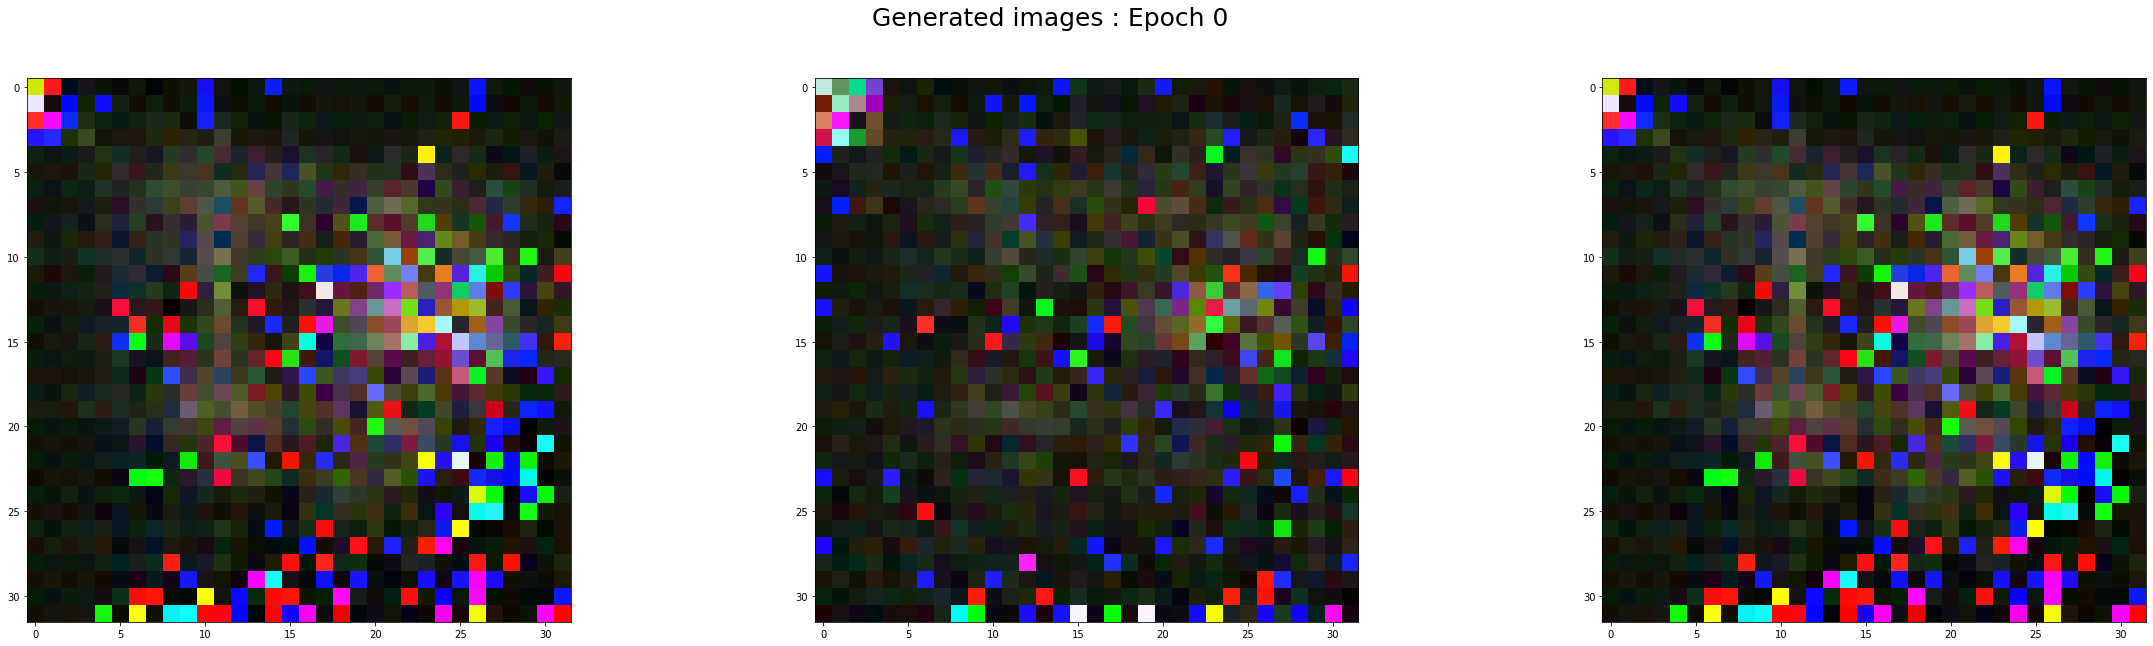

---------------------------------------------------------------
epoch :  1  d_loss_accuracy  =  [0.06502486765384674, 0.98828125]  g_loss =  0.553516149520874


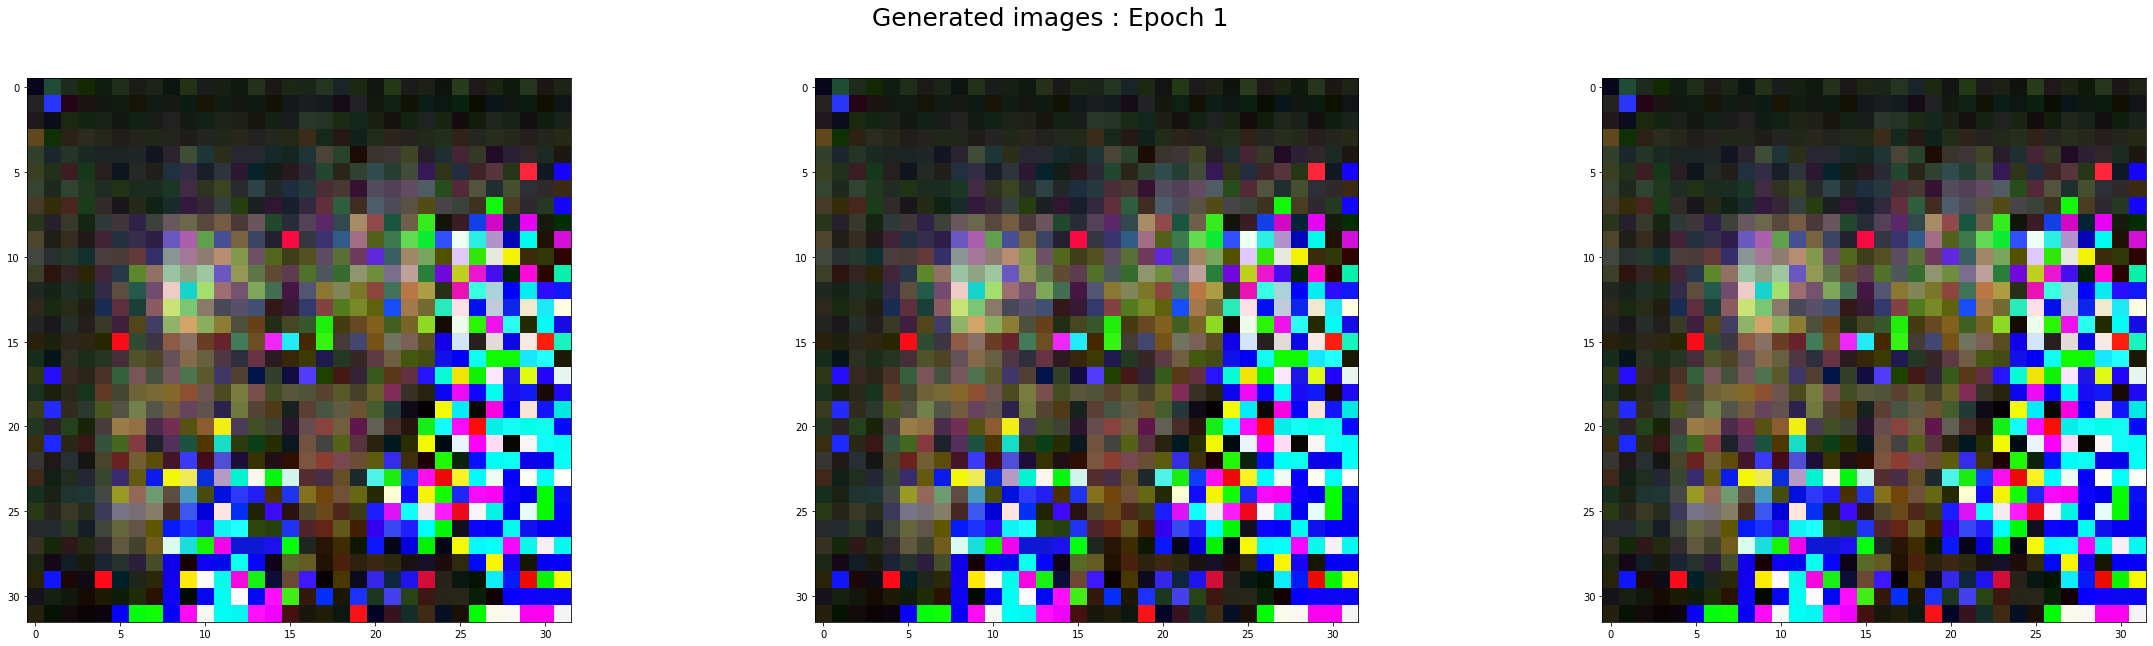

---------------------------------------------------------------
epoch :  2  d_loss_accuracy  =  [0.07467997819185257, 0.9765625]  g_loss =  0.5839581489562988


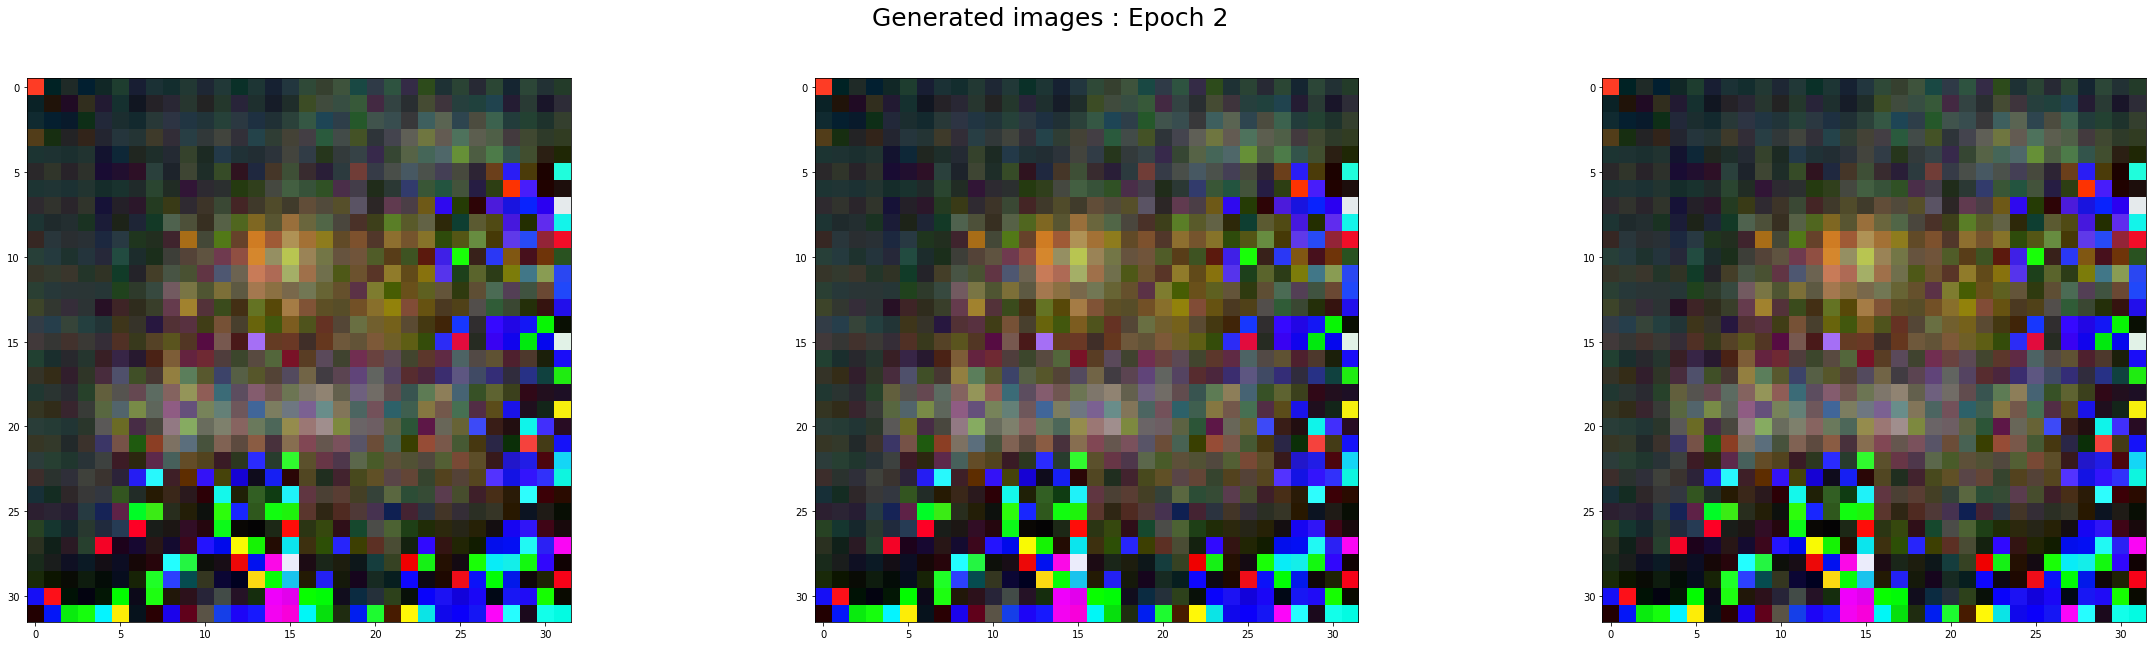

---------------------------------------------------------------
epoch :  3  d_loss_accuracy  =  [0.16823095083236694, 0.94921875]  g_loss =  2.317234992980957


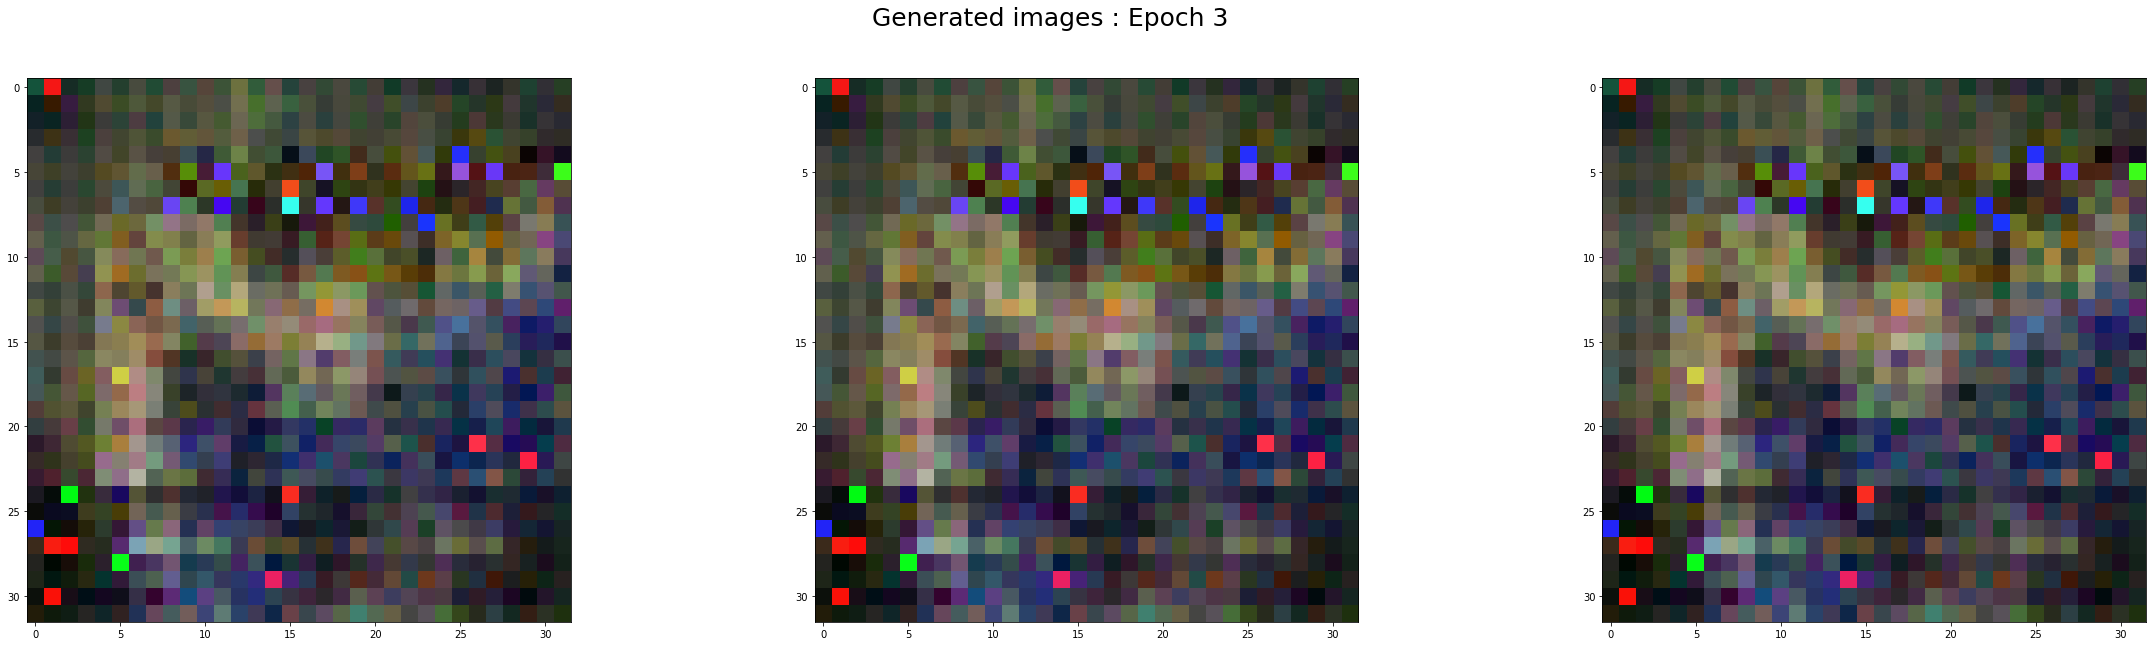

---------------------------------------------------------------
epoch :  4  d_loss_accuracy  =  [2.506197452545166, 0.5078125]  g_loss =  1.1113767623901367


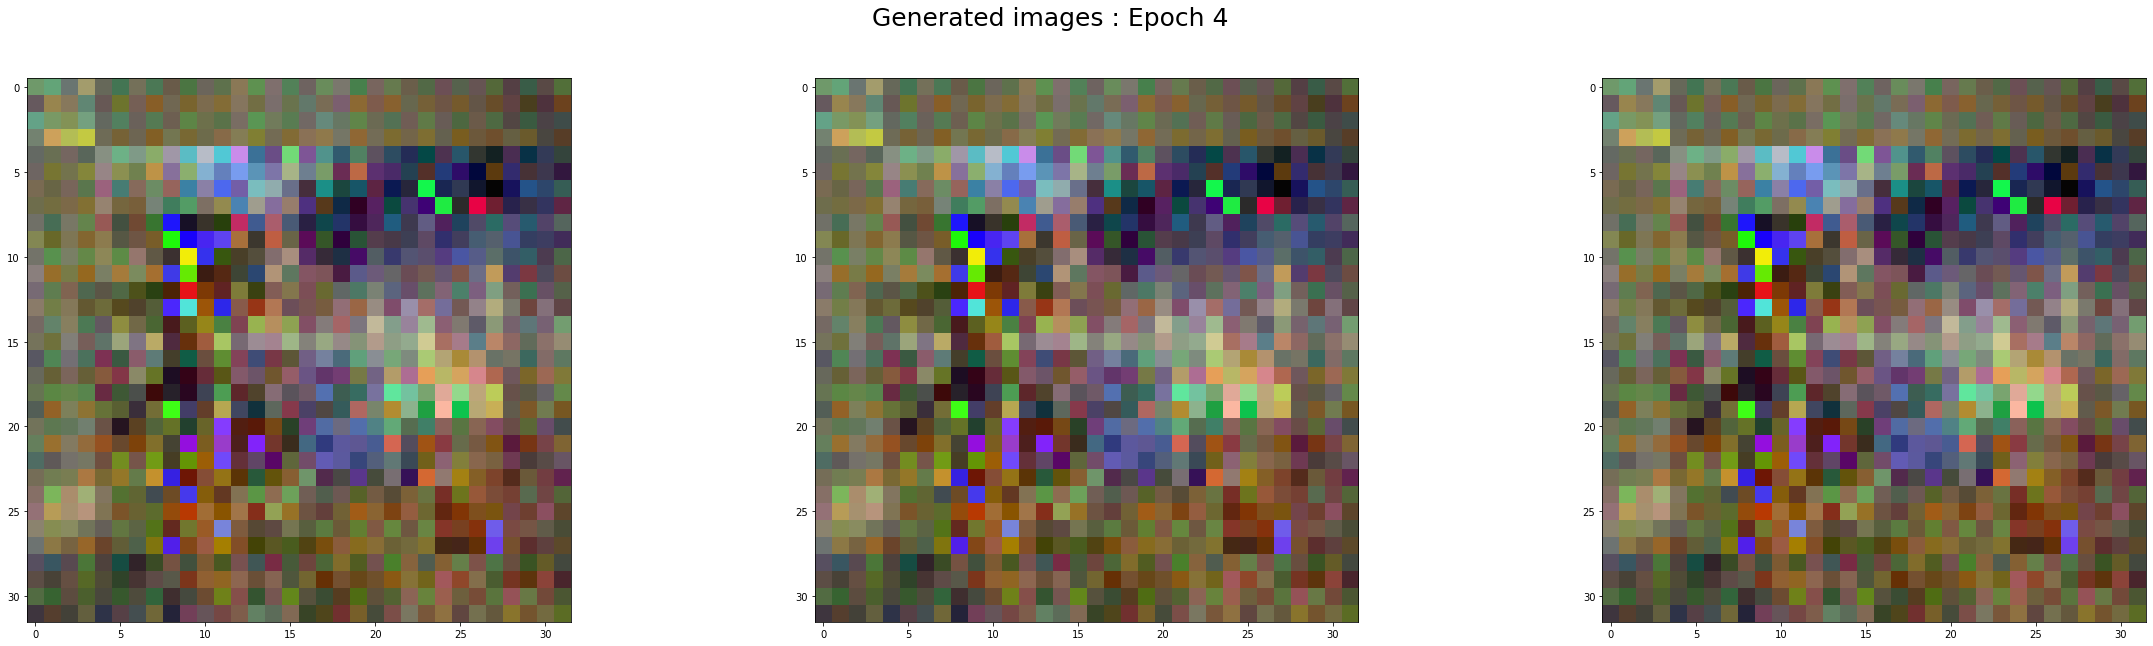

---------------------------------------------------------------
epoch :  5  d_loss_accuracy  =  [0.20497731864452362, 0.9375]  g_loss =  1.8243284225463867


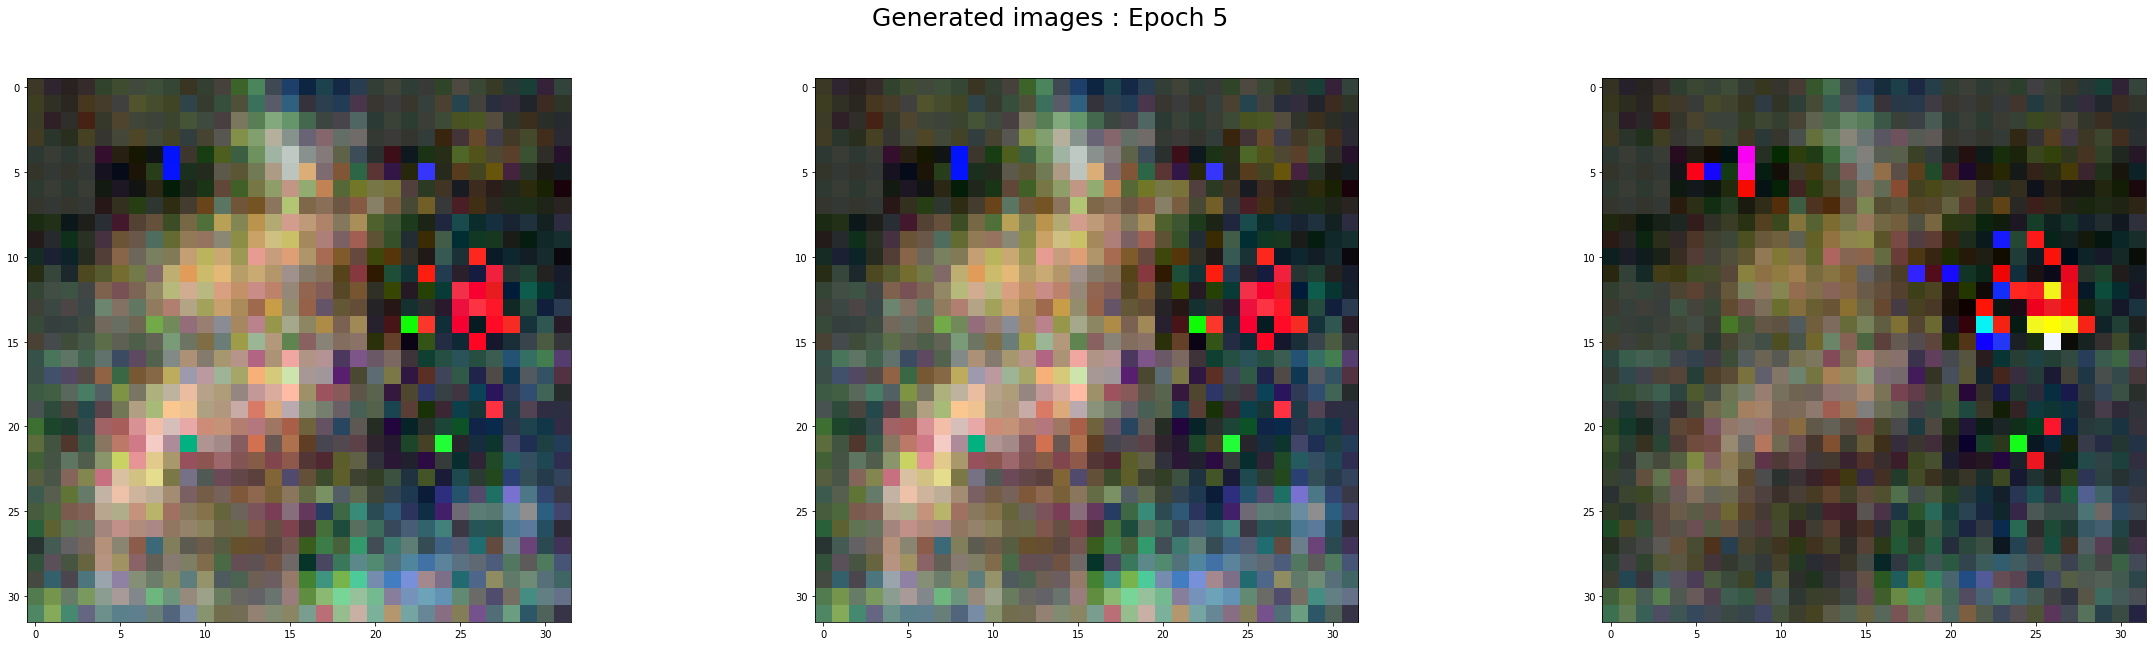

---------------------------------------------------------------
epoch :  6  d_loss_accuracy  =  [0.1509307622909546, 0.96875]  g_loss =  1.2549608945846558


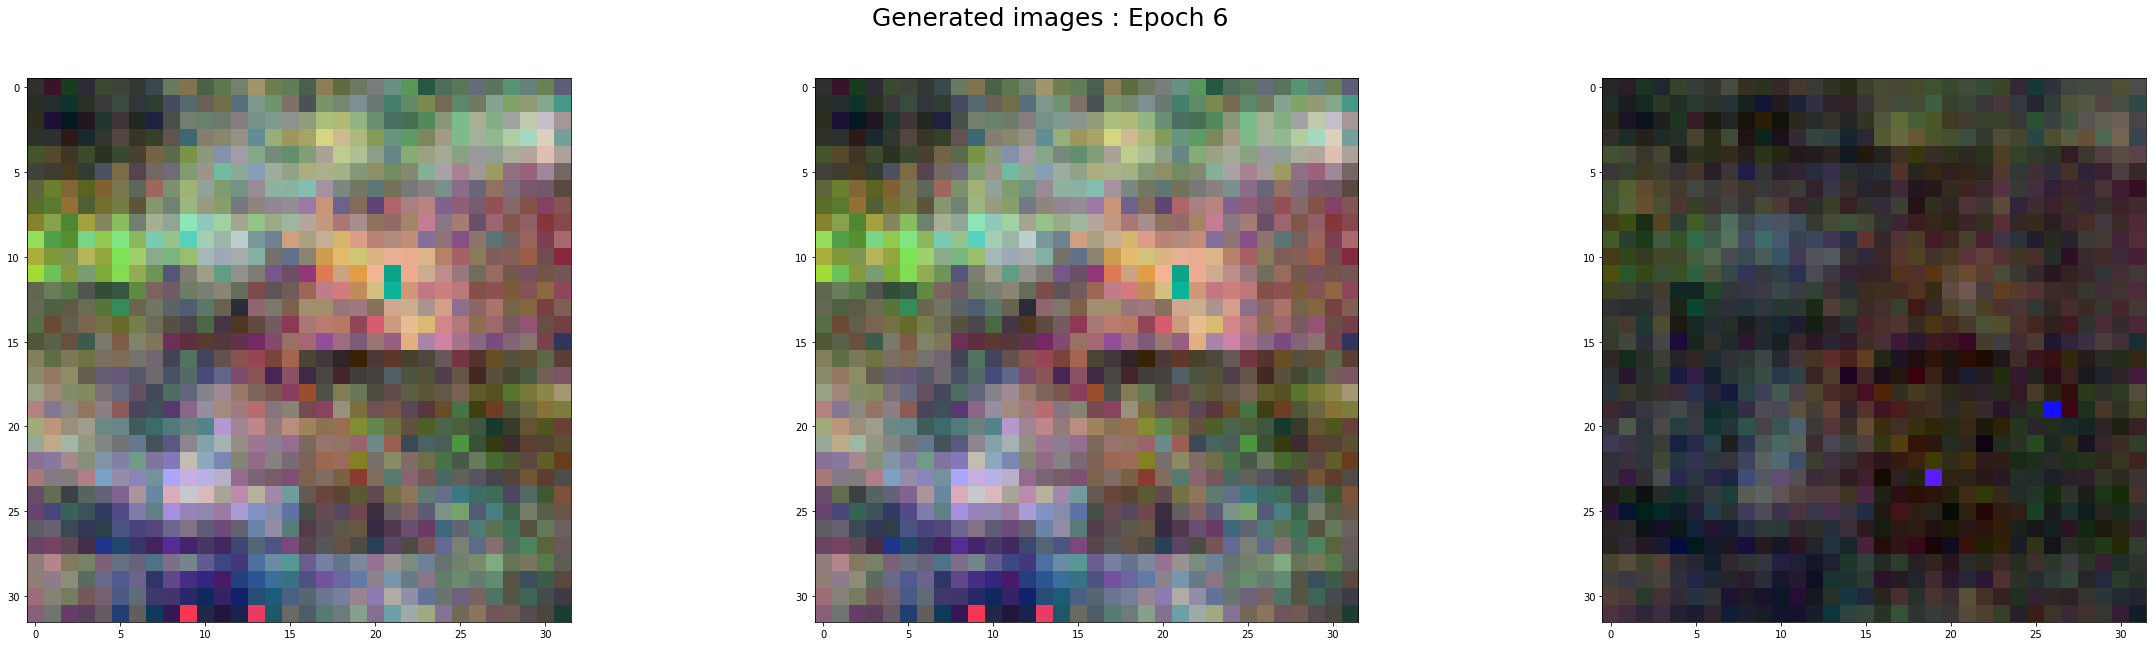

---------------------------------------------------------------
epoch :  7  d_loss_accuracy  =  [0.3428417444229126, 0.85546875]  g_loss =  2.3443994522094727


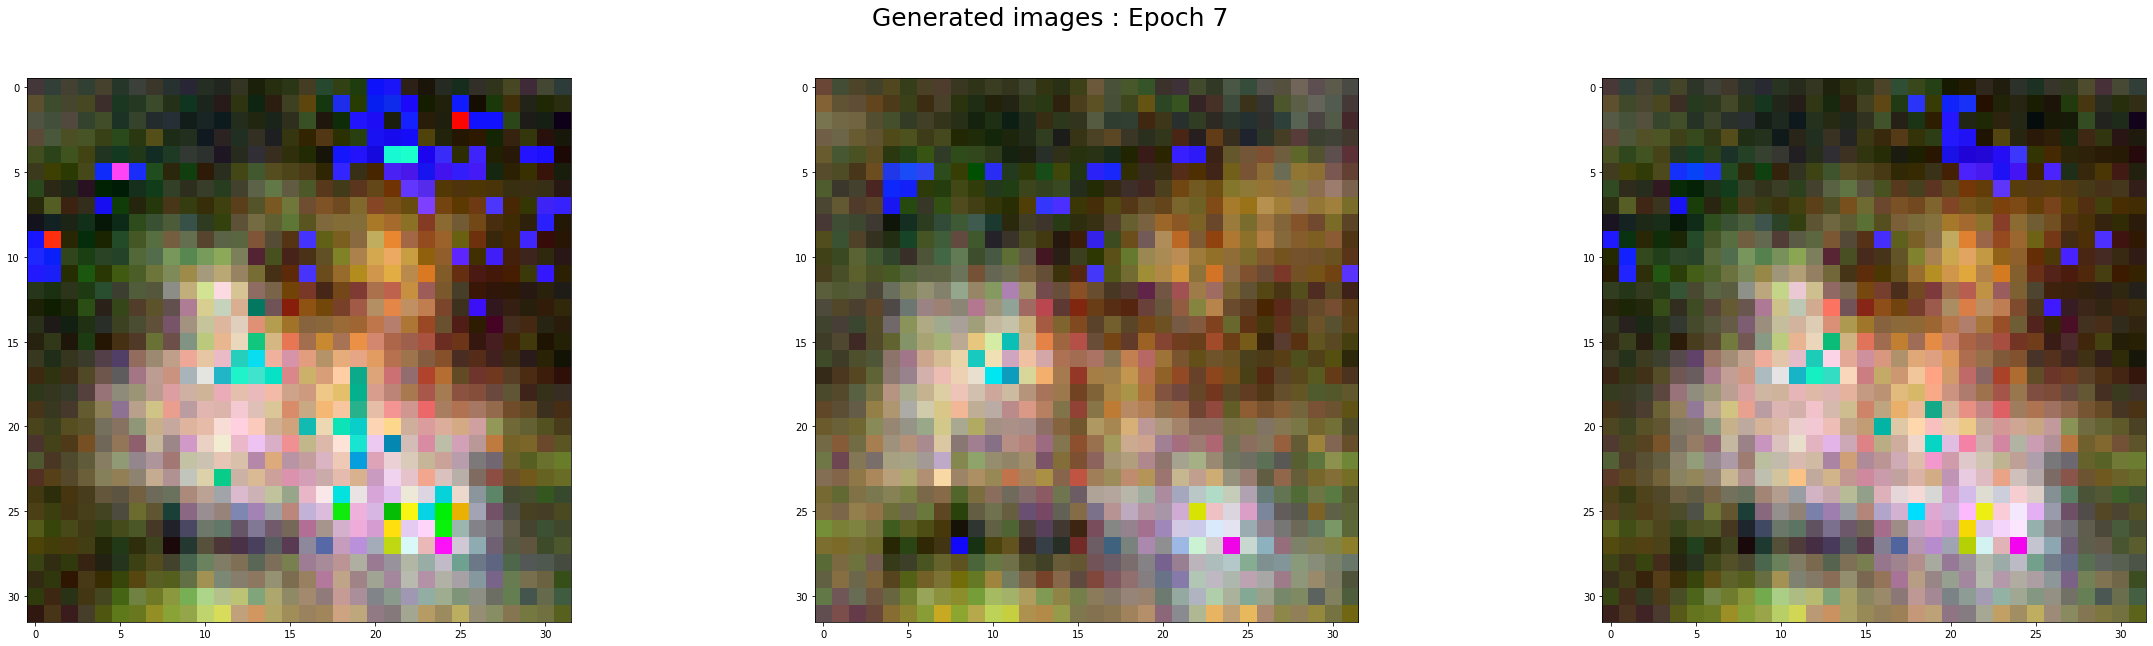

---------------------------------------------------------------
epoch :  8  d_loss_accuracy  =  [0.44929736852645874, 0.79296875]  g_loss =  2.410891056060791


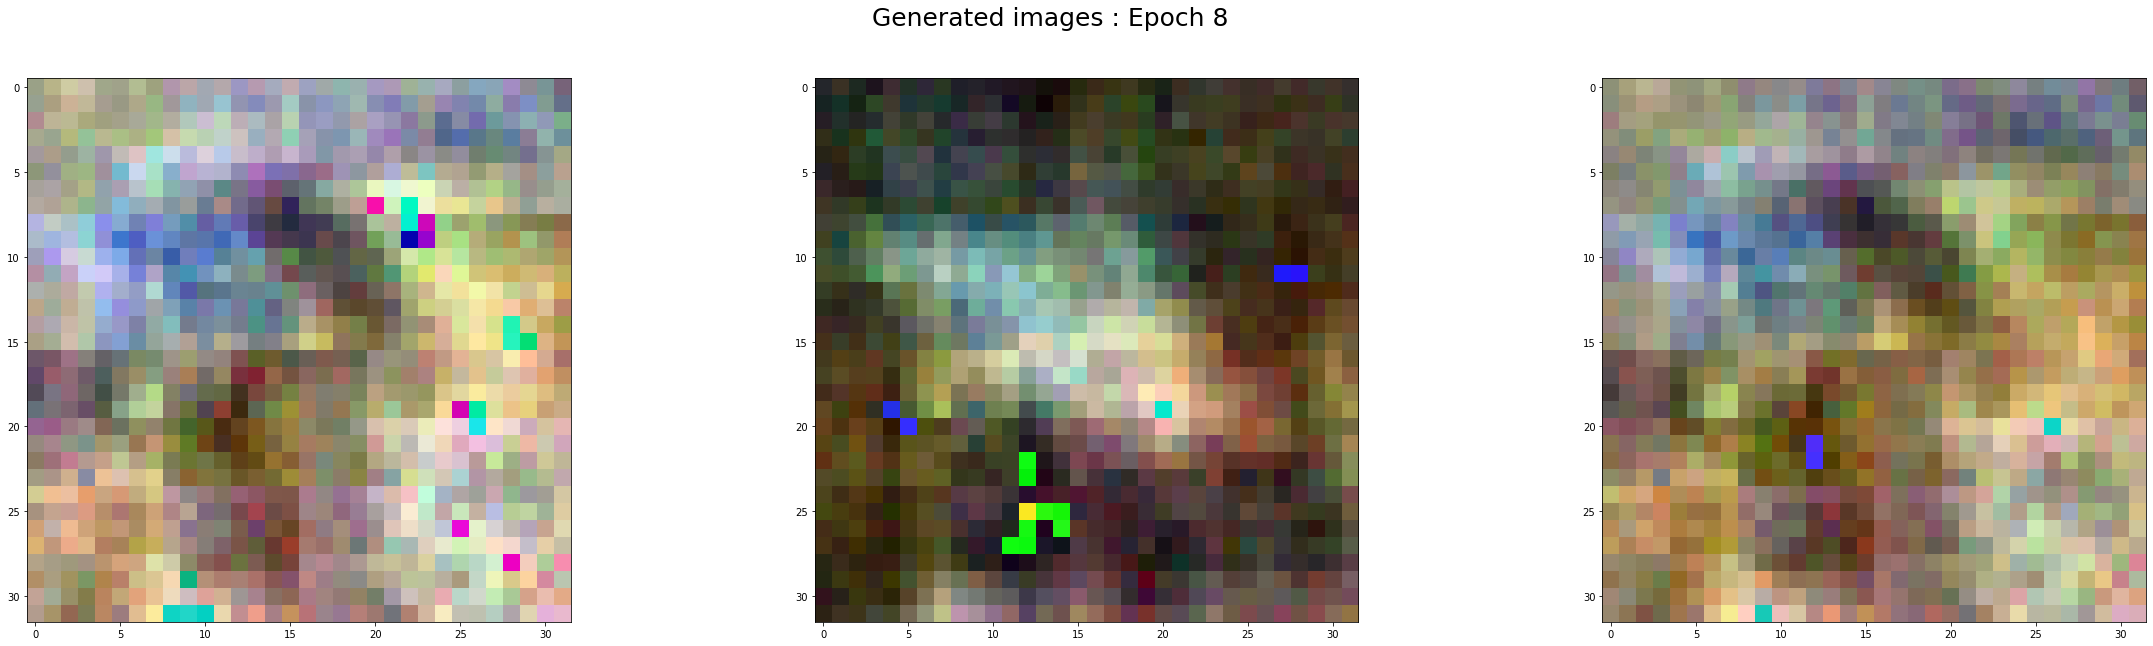

---------------------------------------------------------------
epoch :  9  d_loss_accuracy  =  [0.37898868322372437, 0.87109375]  g_loss =  1.4299592971801758


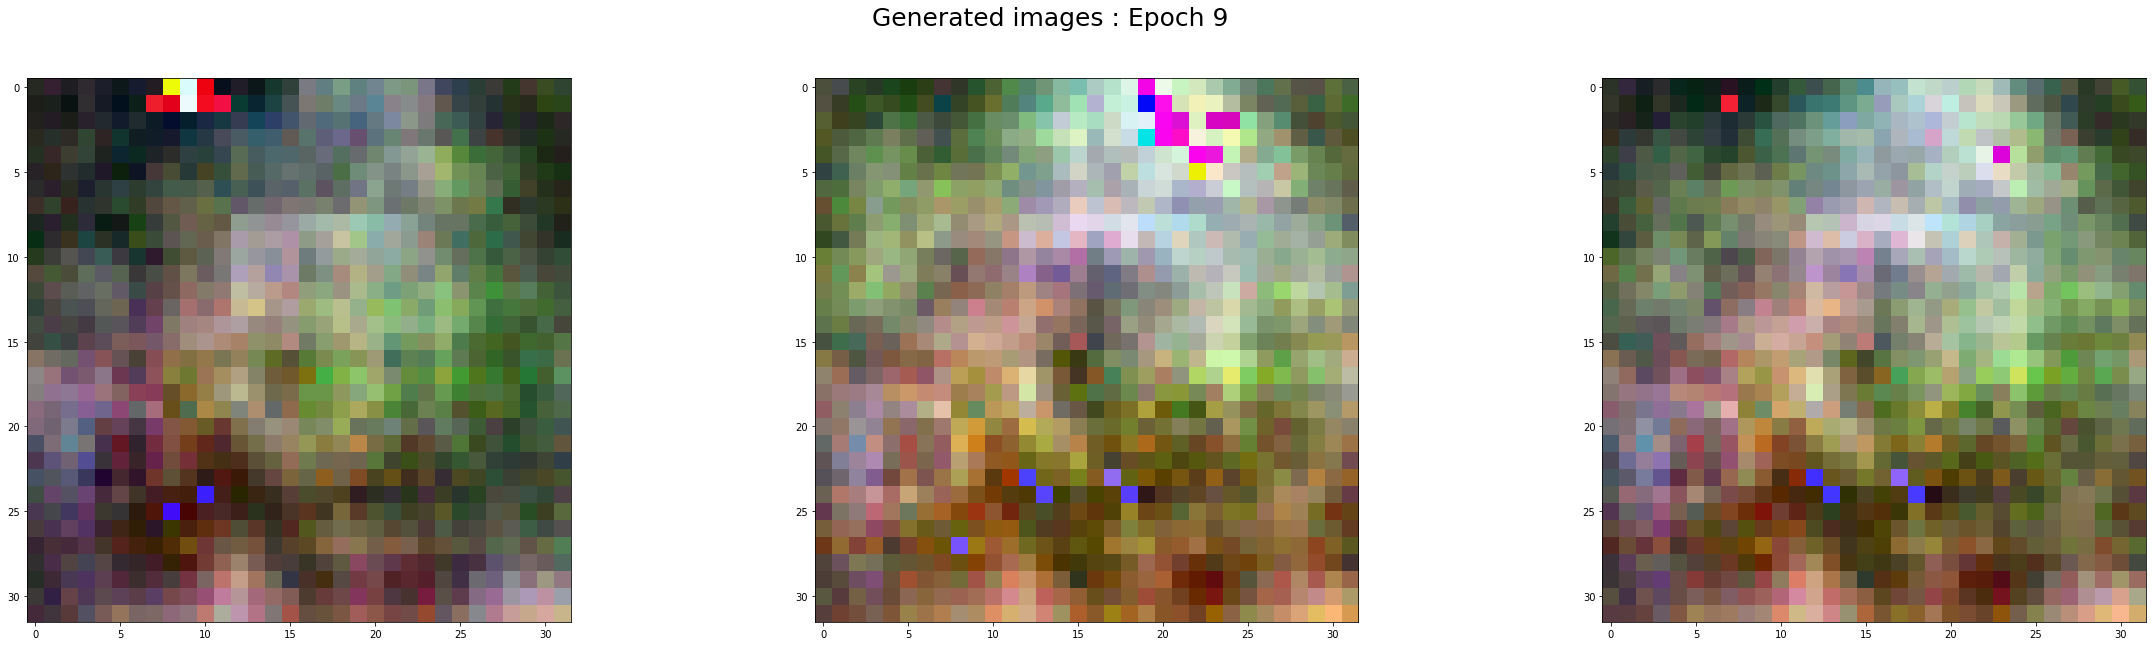

---------------------------------------------------------------
epoch :  10  d_loss_accuracy  =  [0.36378490924835205, 0.859375]  g_loss =  1.3506780862808228


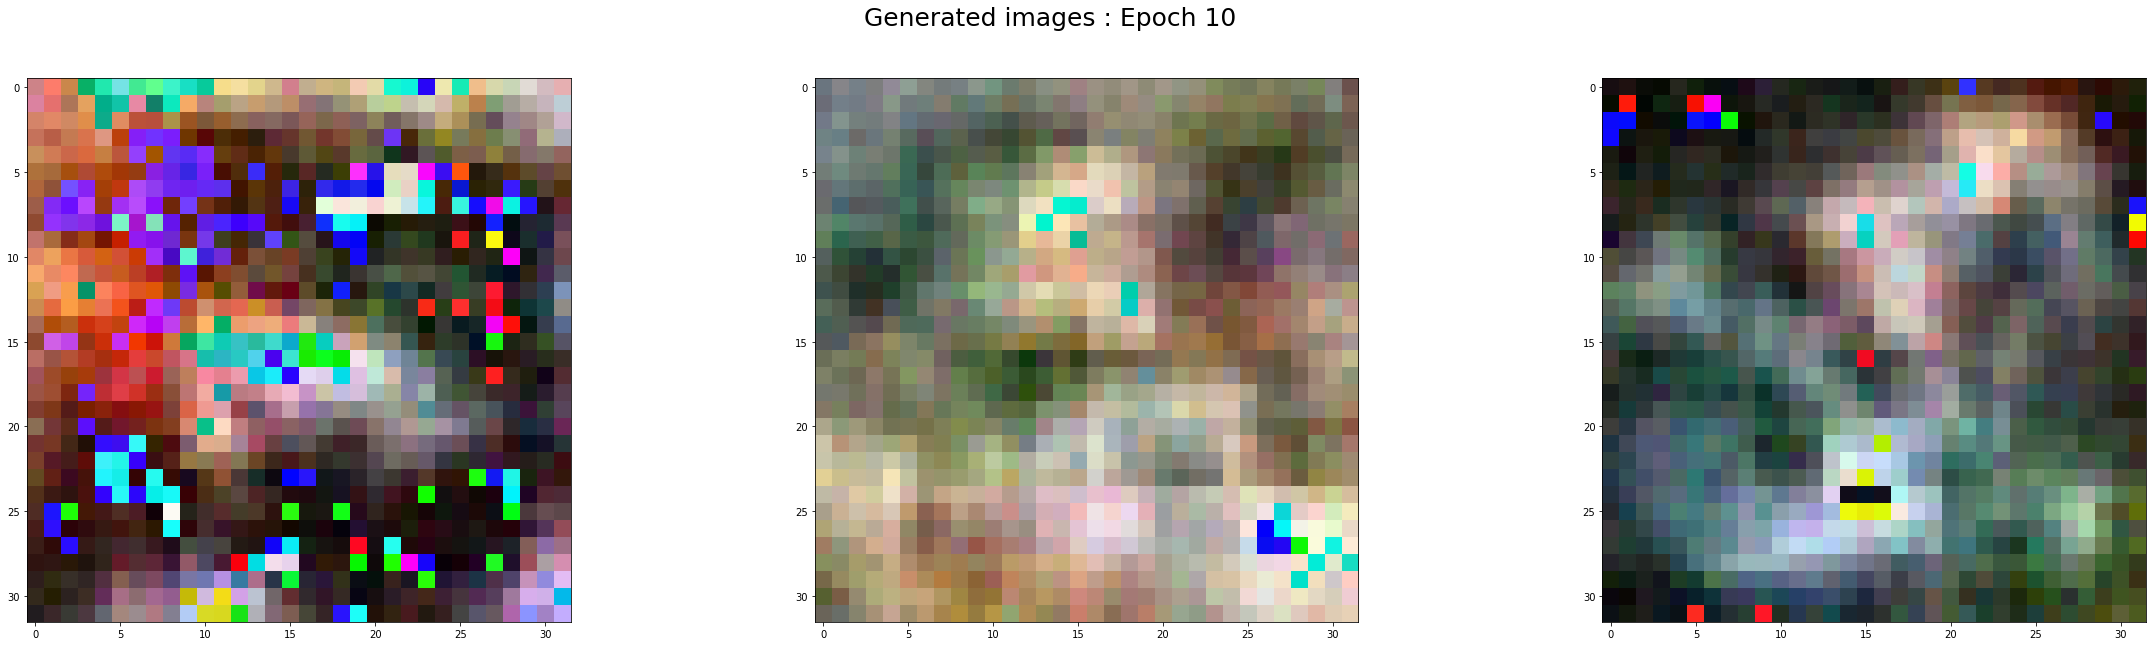

---------------------------------------------------------------
epoch :  11  d_loss_accuracy  =  [0.4651328921318054, 0.8046875]  g_loss =  1.4739505052566528


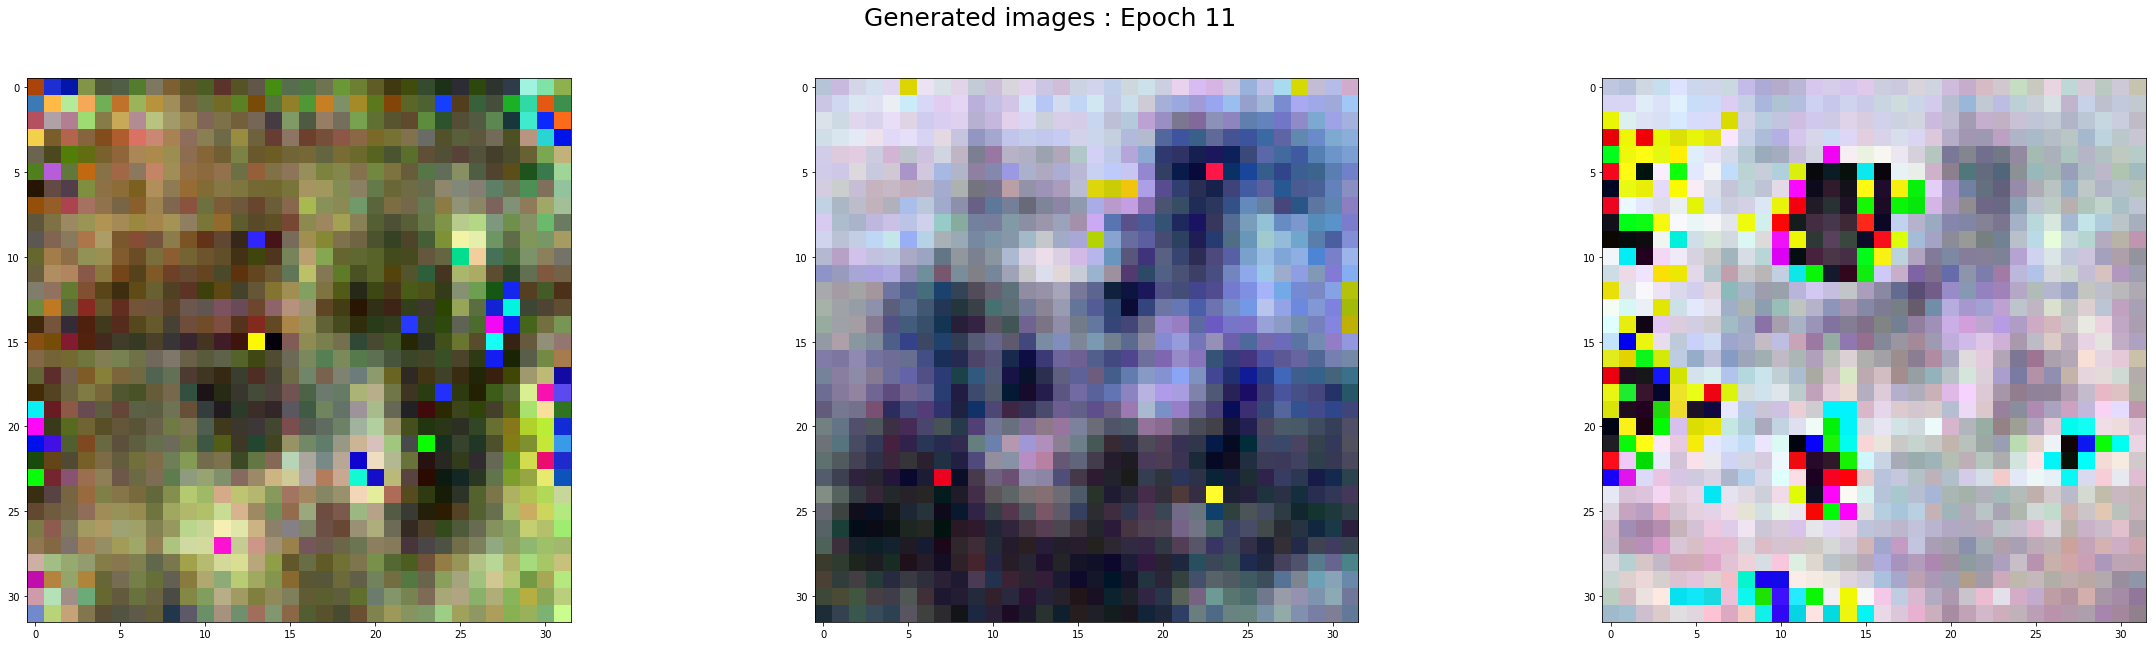

---------------------------------------------------------------
epoch :  12  d_loss_accuracy  =  [0.5196685791015625, 0.7421875]  g_loss =  0.9520494341850281


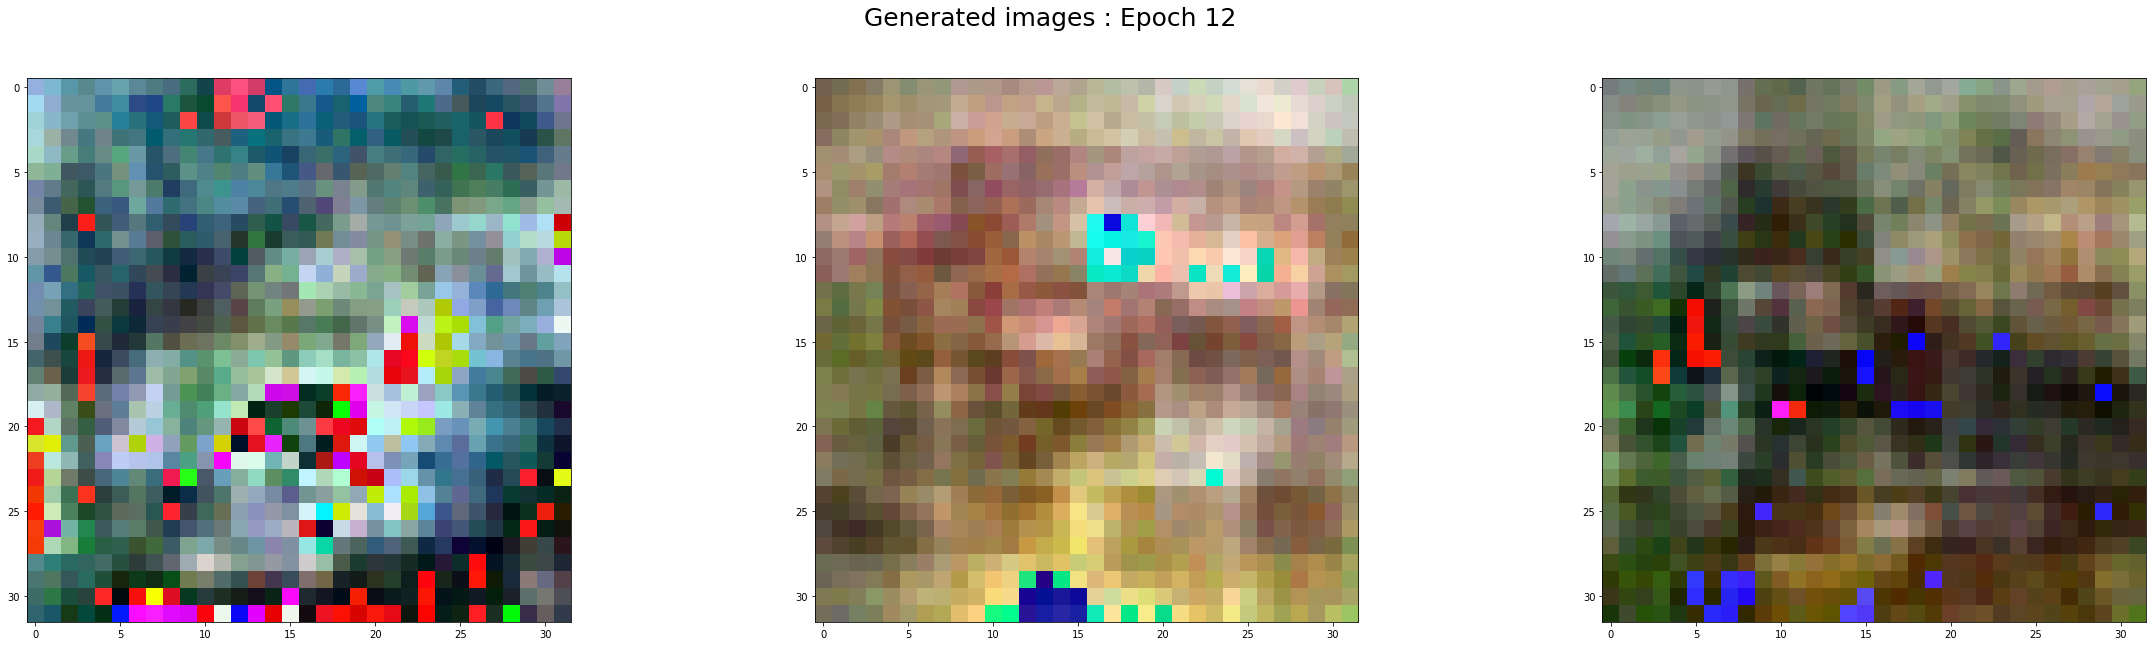

---------------------------------------------------------------
epoch :  13  d_loss_accuracy  =  [0.6030145883560181, 0.6640625]  g_loss =  0.9517090320587158


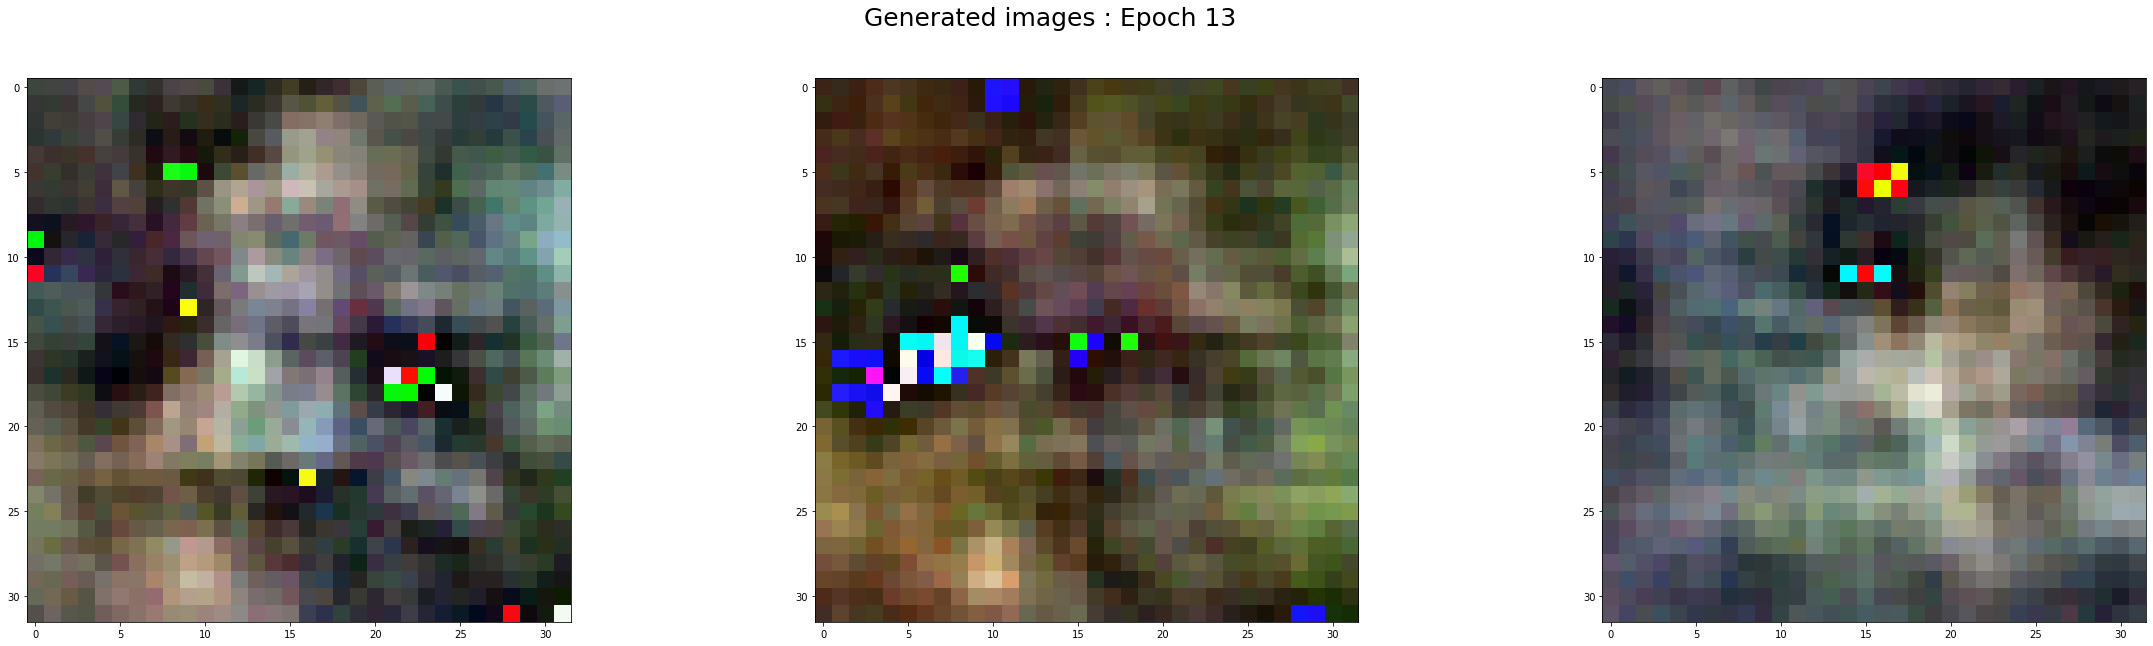

---------------------------------------------------------------
epoch :  14  d_loss_accuracy  =  [0.5905869603157043, 0.69140625]  g_loss =  1.2709406614303589


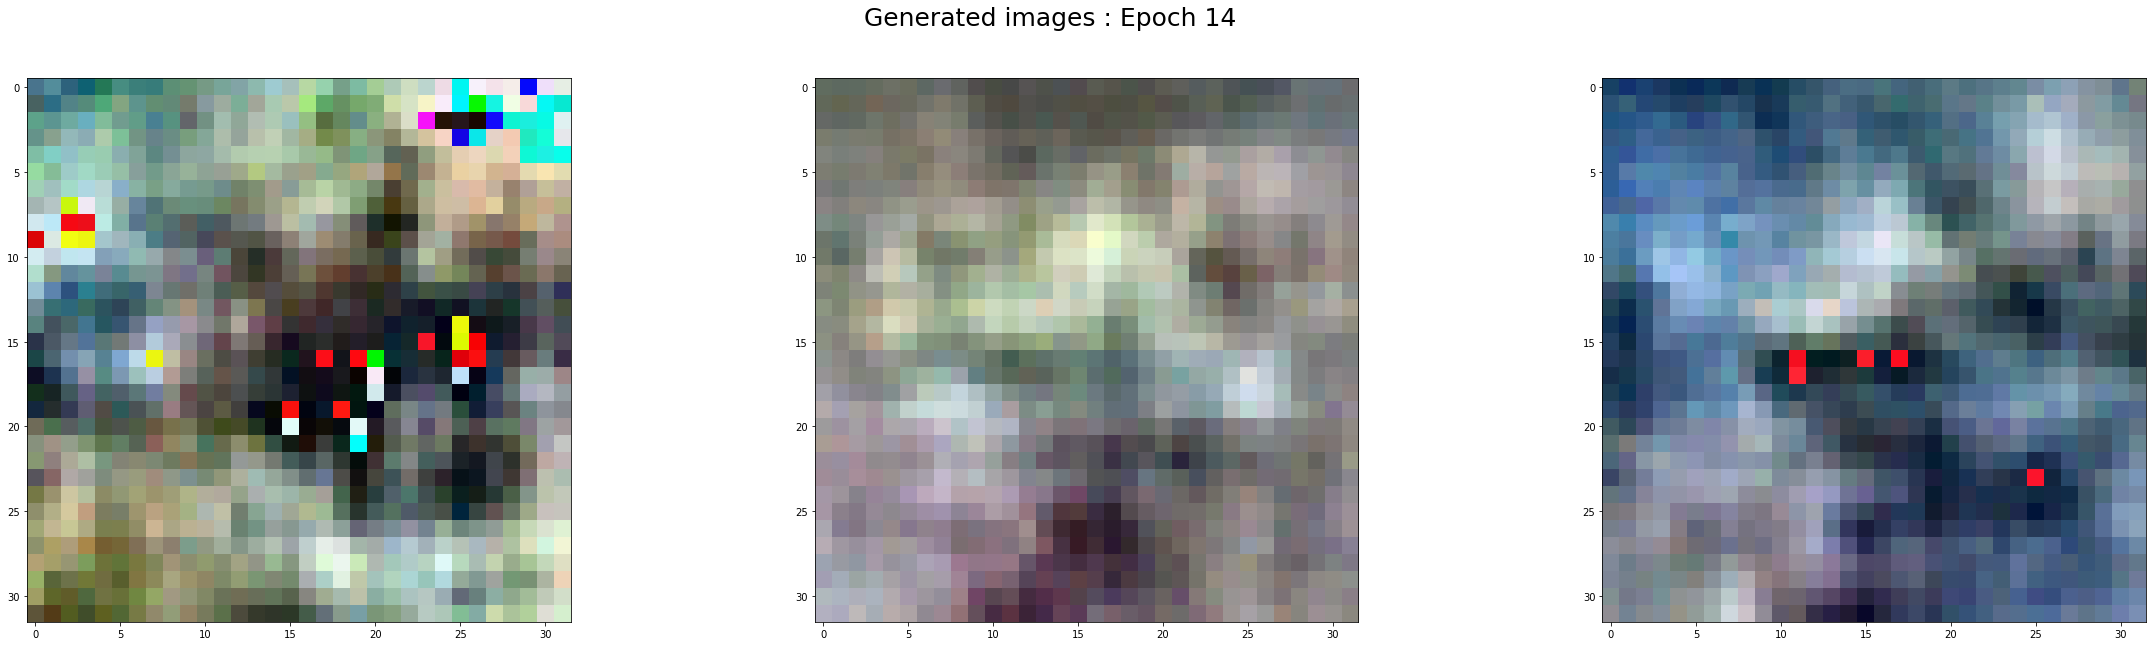

---------------------------------------------------------------
epoch :  15  d_loss_accuracy  =  [0.5796504020690918, 0.6796875]  g_loss =  0.5652927160263062


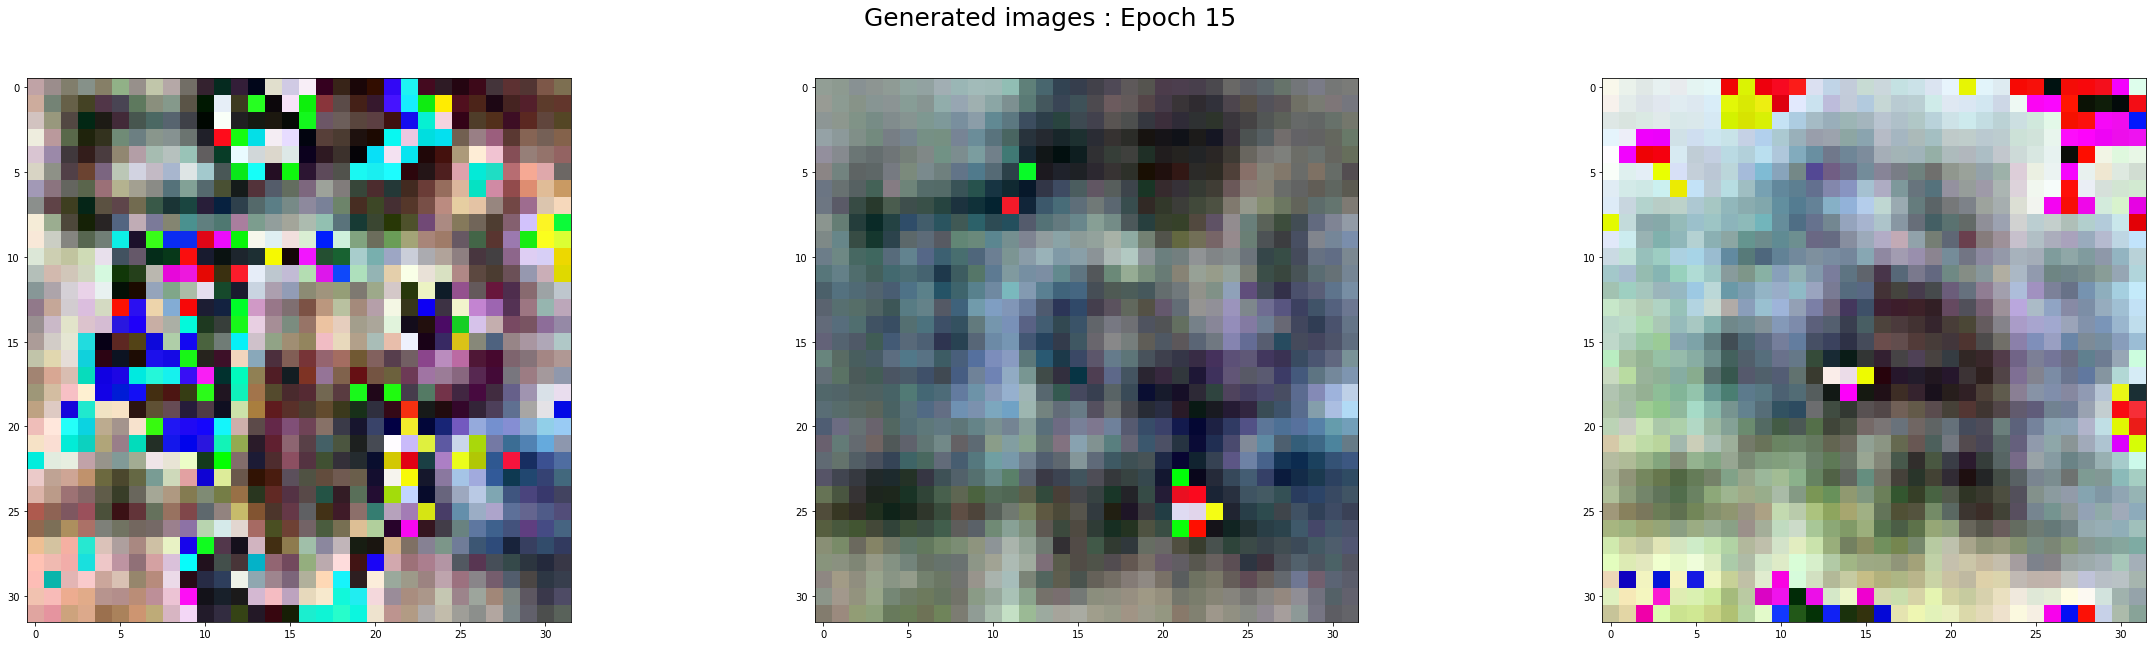

---------------------------------------------------------------
epoch :  16  d_loss_accuracy  =  [0.561221718788147, 0.69921875]  g_loss =  0.8576107621192932


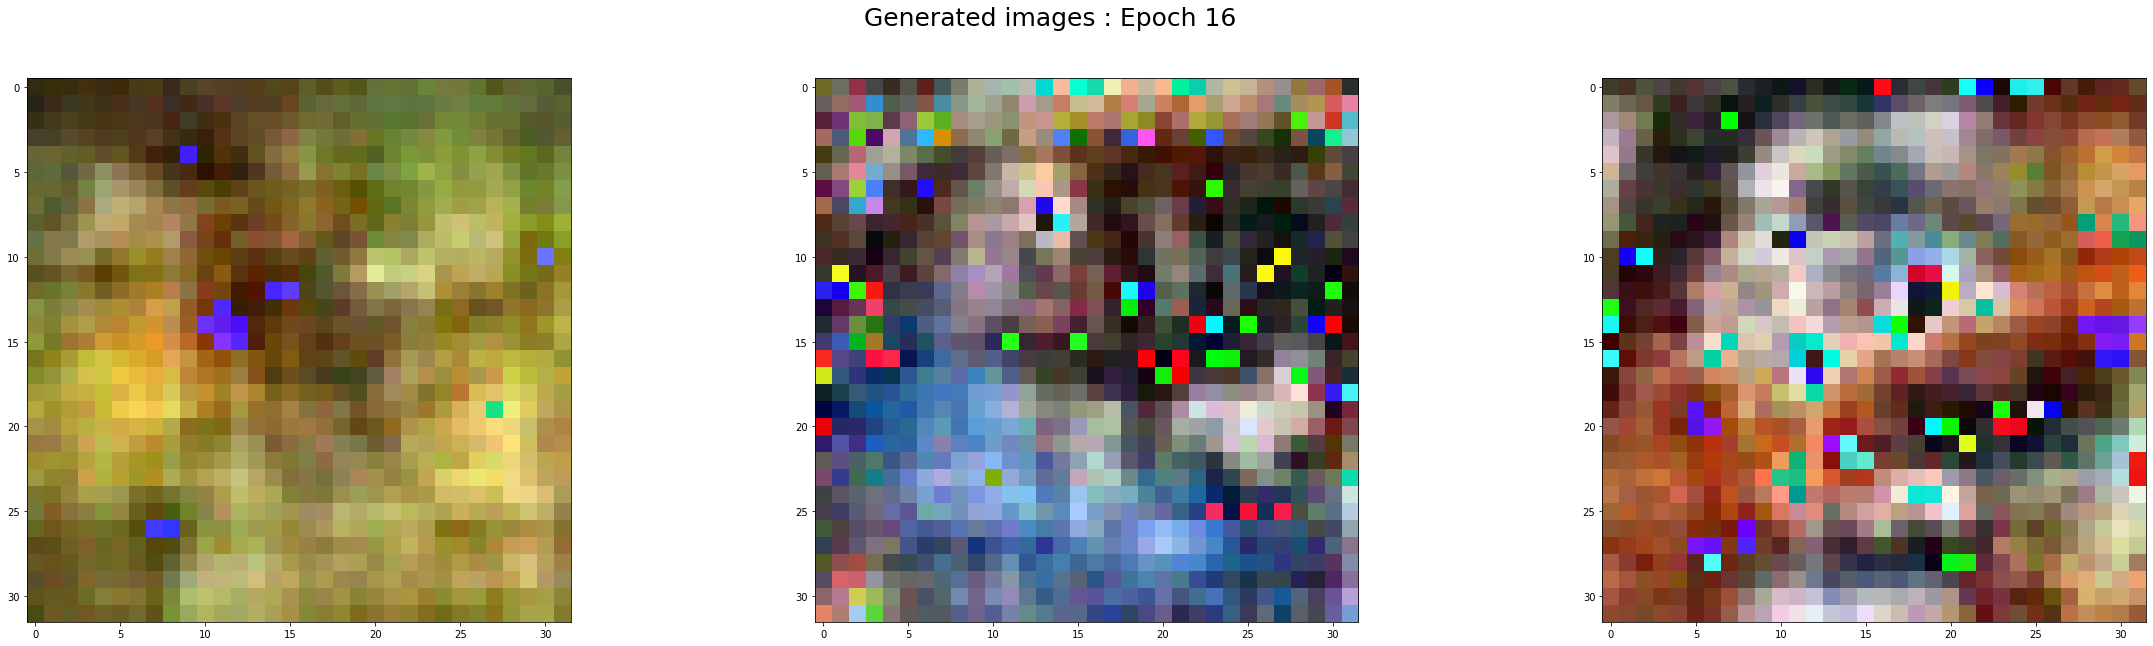

---------------------------------------------------------------
epoch :  17  d_loss_accuracy  =  [0.5927473902702332, 0.6875]  g_loss =  0.8204654455184937


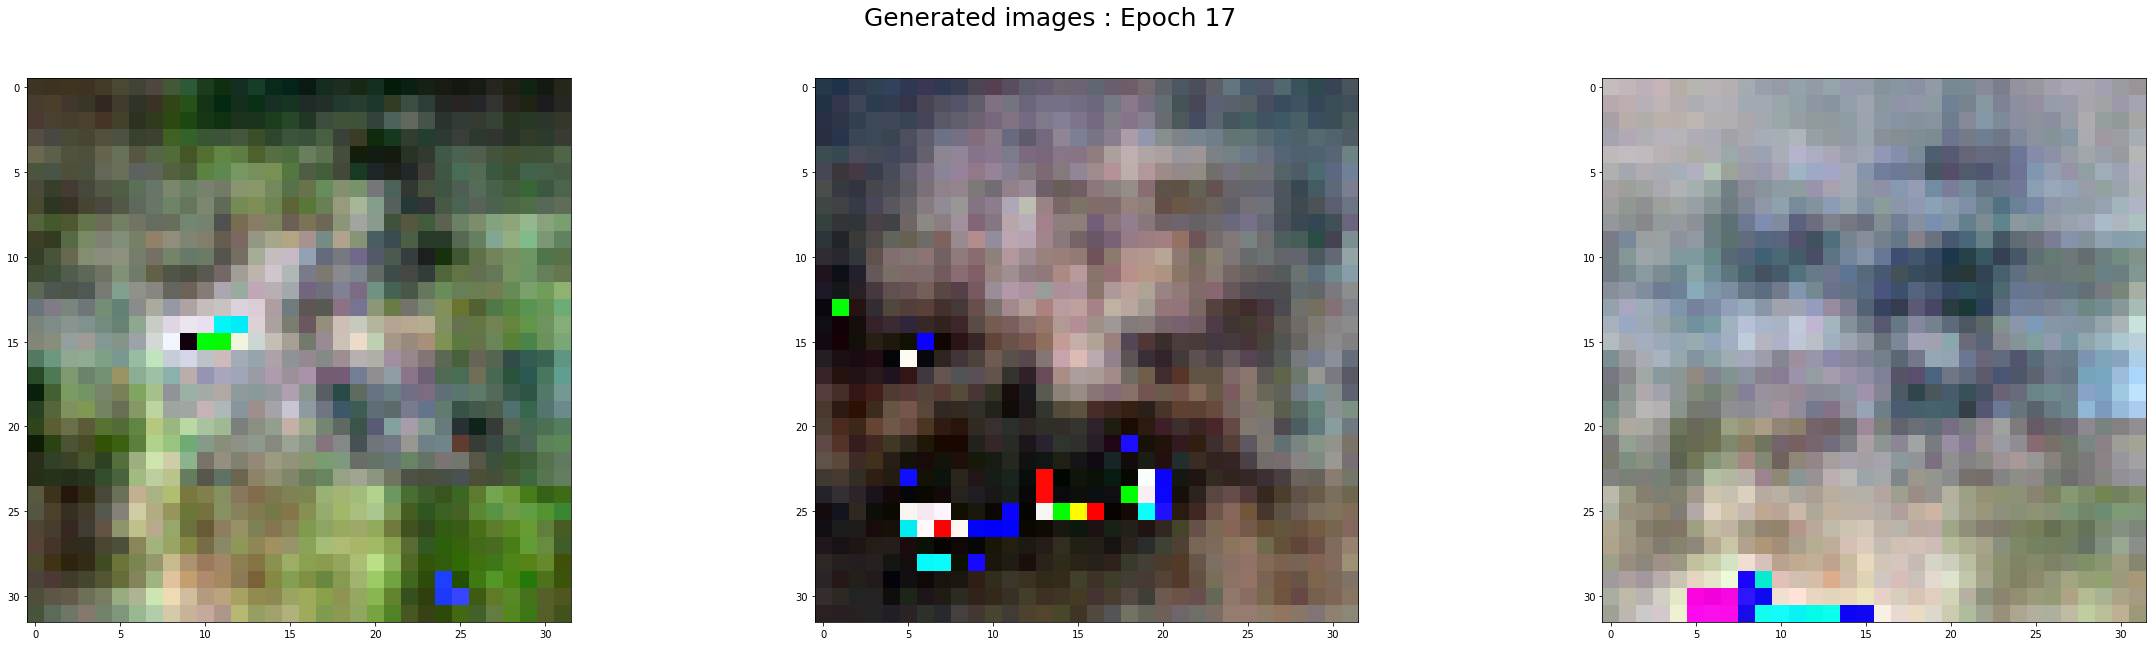

---------------------------------------------------------------
epoch :  18  d_loss_accuracy  =  [0.6167376041412354, 0.61328125]  g_loss =  1.3829163312911987


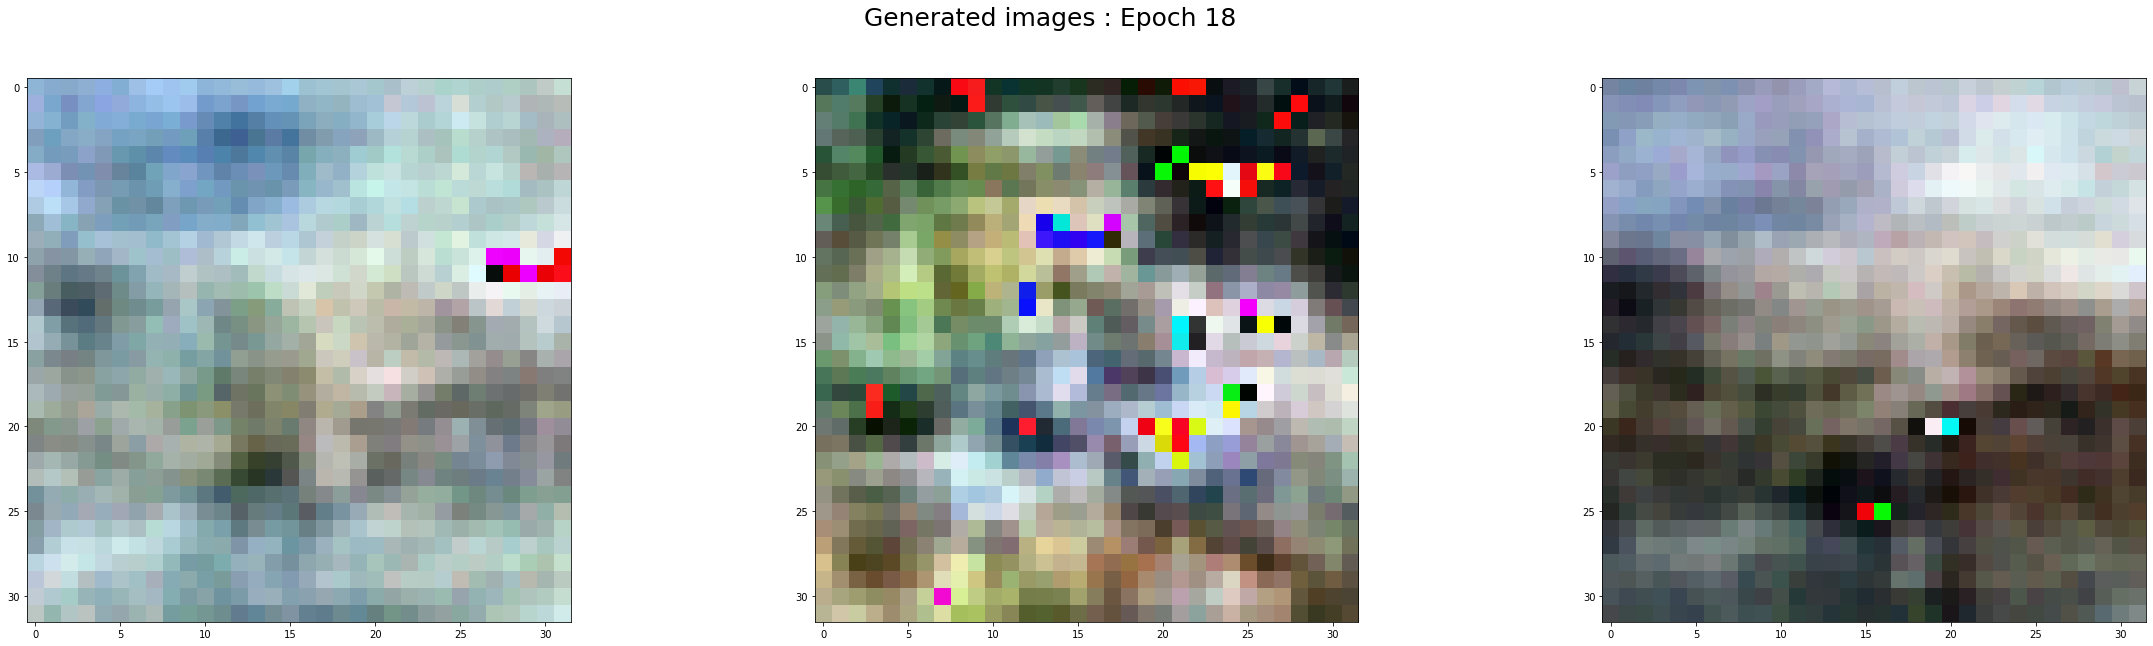

---------------------------------------------------------------
epoch :  19  d_loss_accuracy  =  [0.5597097873687744, 0.68359375]  g_loss =  0.8999539017677307


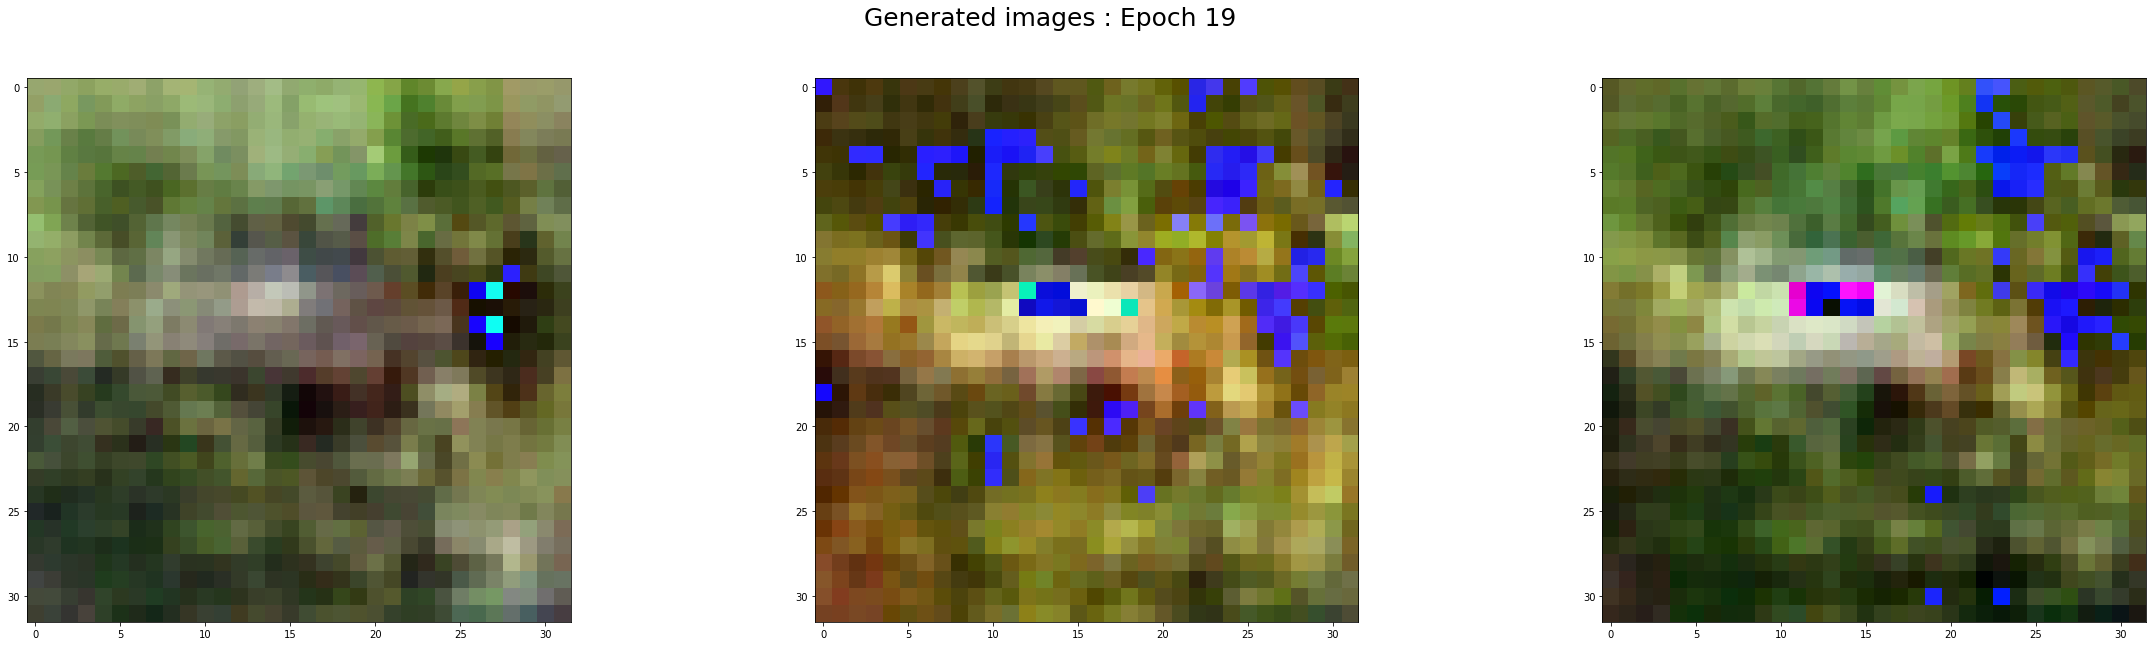

---------------------------------------------------------------
epoch :  20  d_loss_accuracy  =  [0.648280143737793, 0.60546875]  g_loss =  0.813426673412323


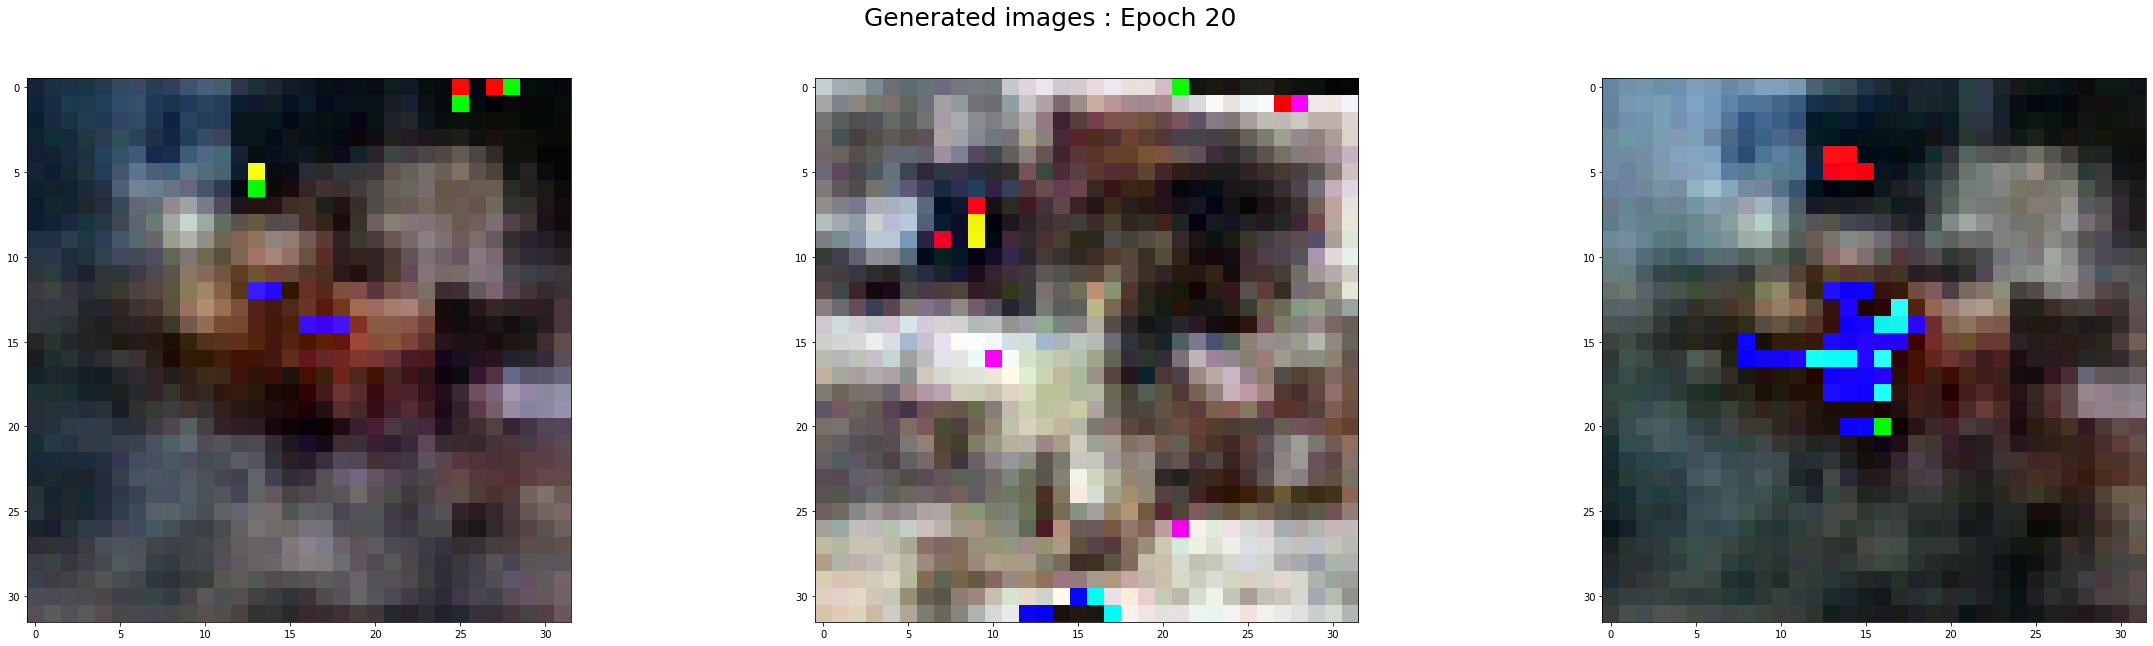

---------------------------------------------------------------
epoch :  21  d_loss_accuracy  =  [0.664207398891449, 0.57421875]  g_loss =  0.9837988615036011


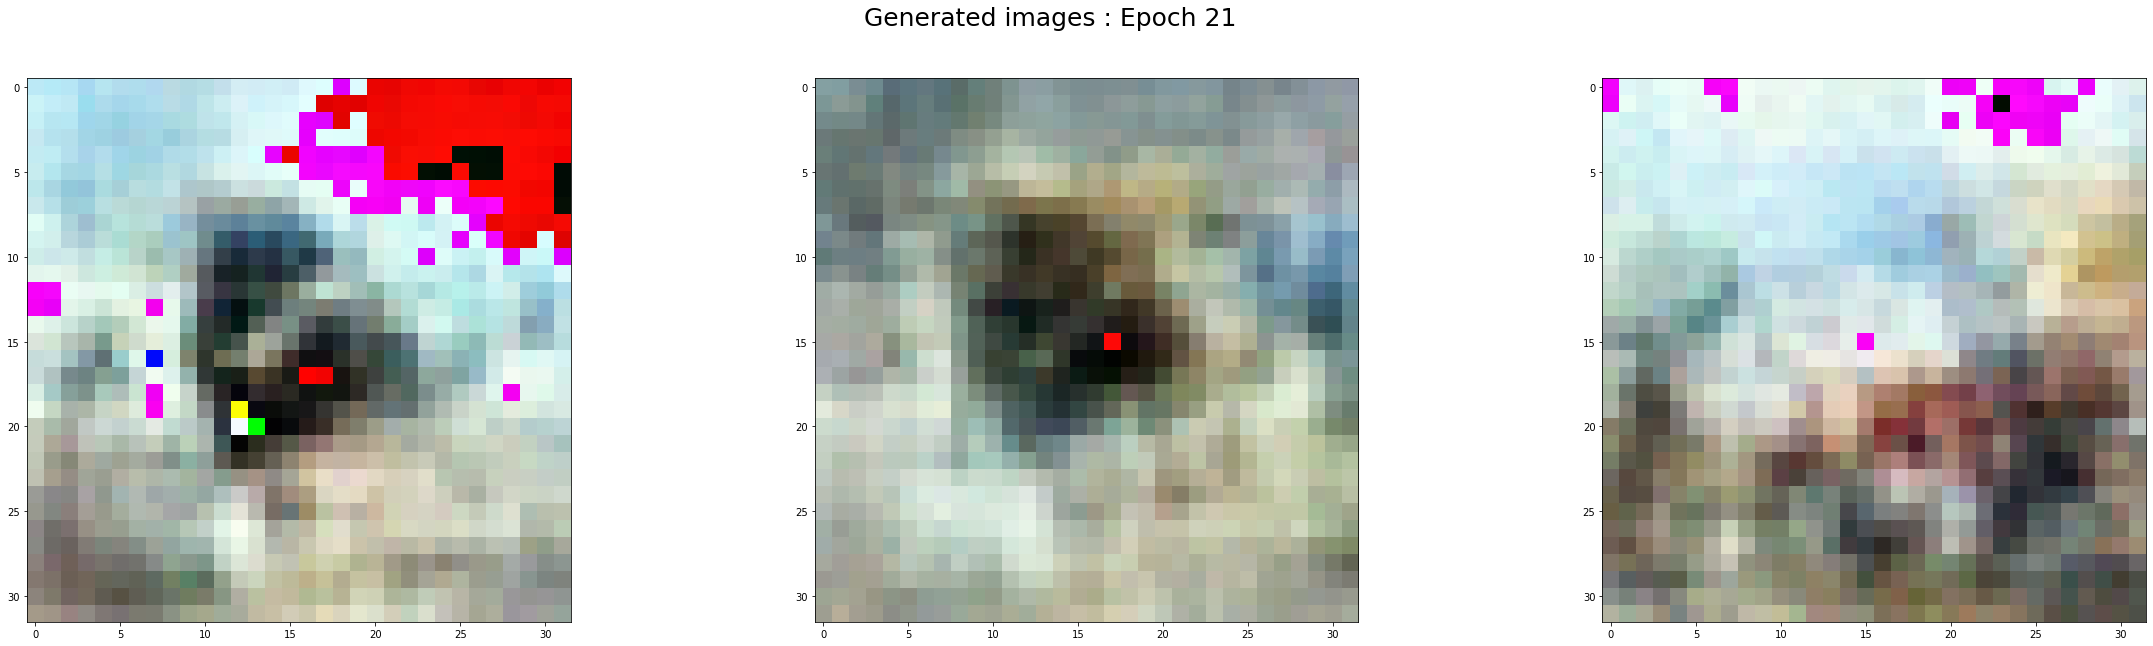

---------------------------------------------------------------
epoch :  22  d_loss_accuracy  =  [0.6007062196731567, 0.69140625]  g_loss =  0.8975226879119873


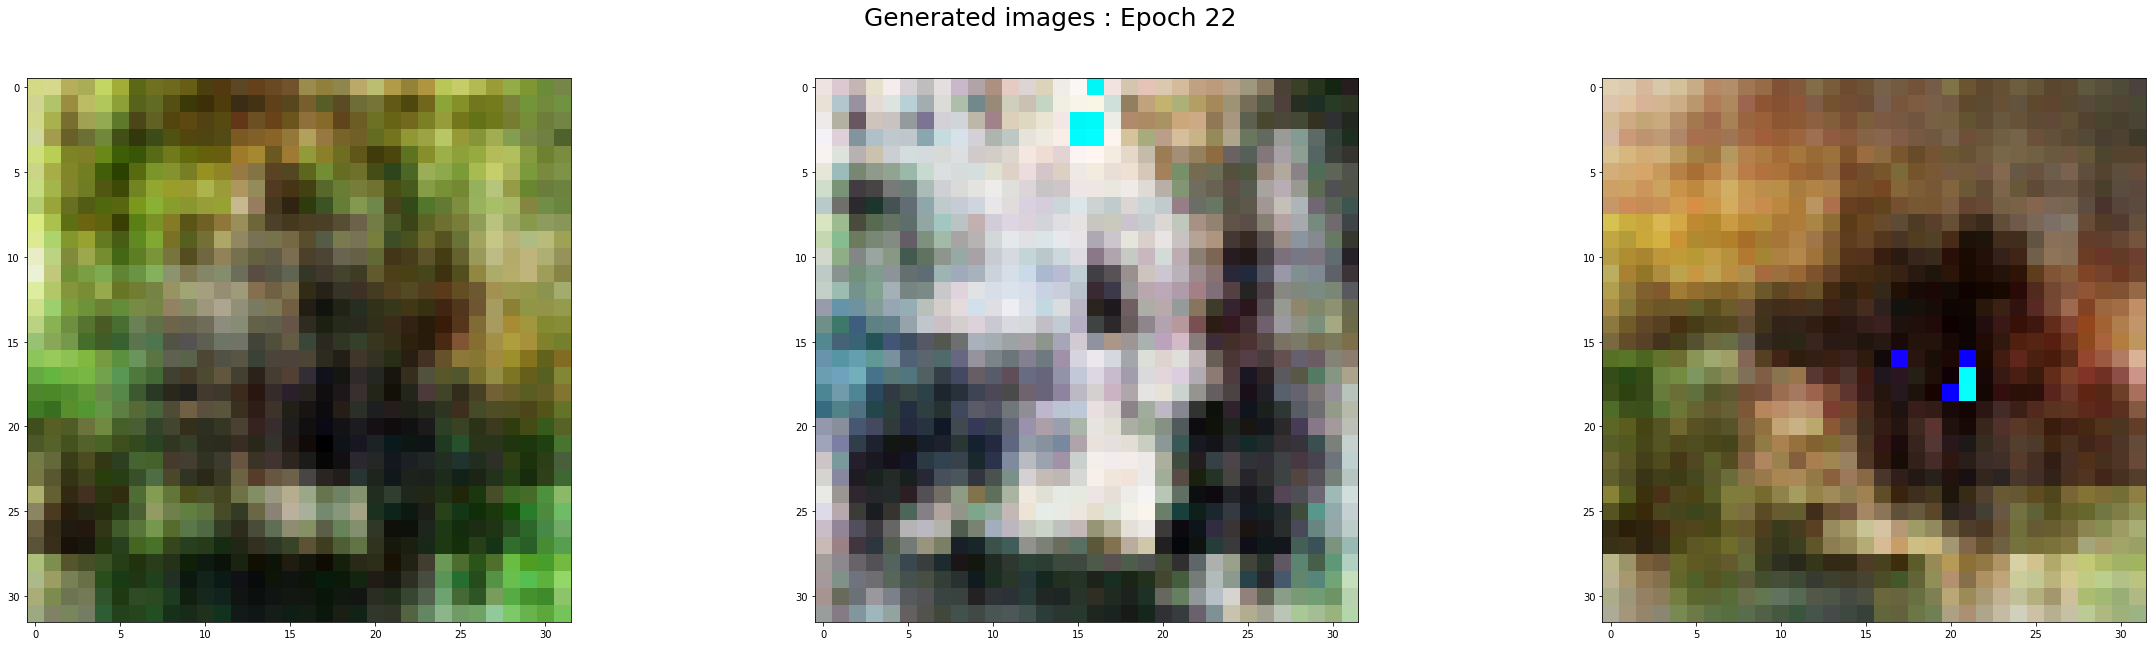

---------------------------------------------------------------
epoch :  23  d_loss_accuracy  =  [0.6044357419013977, 0.6484375]  g_loss =  0.8429722785949707


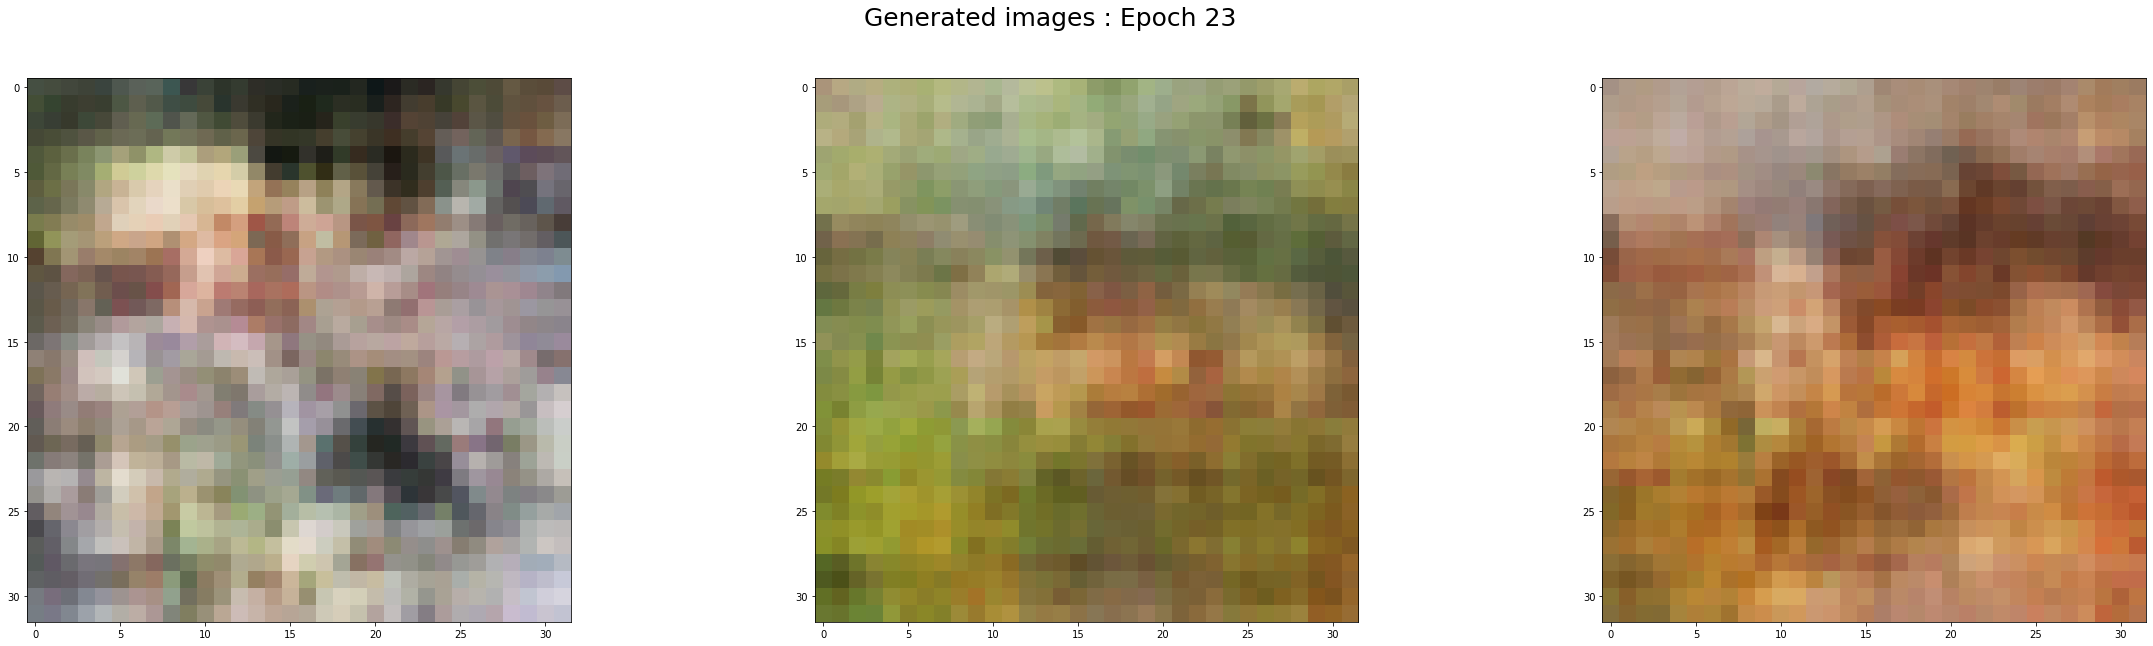

---------------------------------------------------------------
epoch :  24  d_loss_accuracy  =  [0.588420033454895, 0.703125]  g_loss =  0.7080419063568115


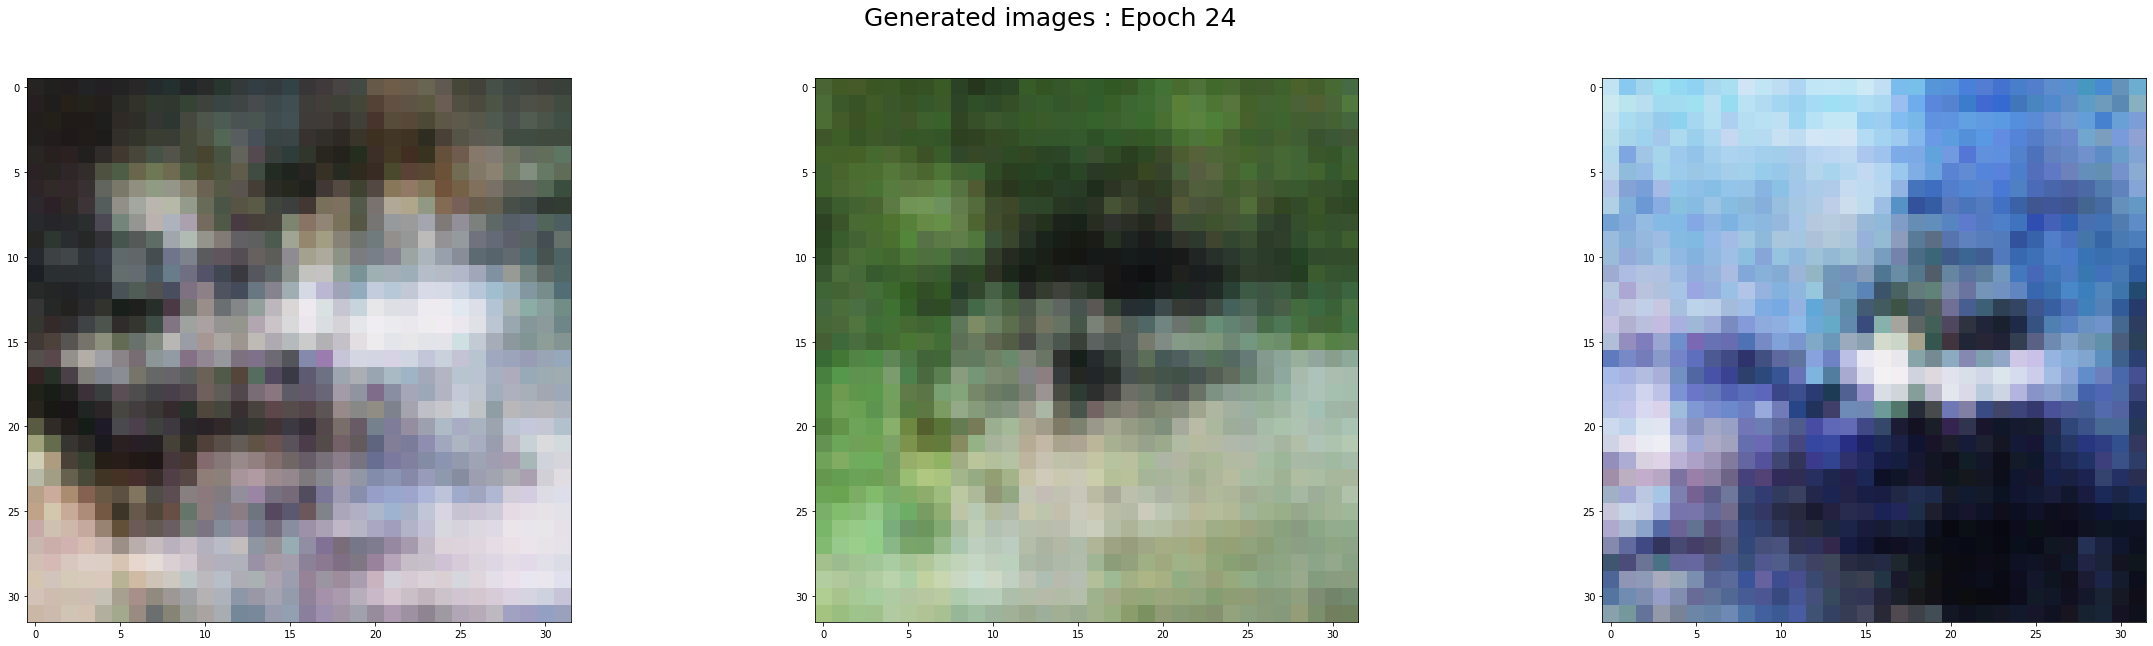

---------------------------------------------------------------
epoch :  25  d_loss_accuracy  =  [0.6270295977592468, 0.6328125]  g_loss =  0.8488059639930725


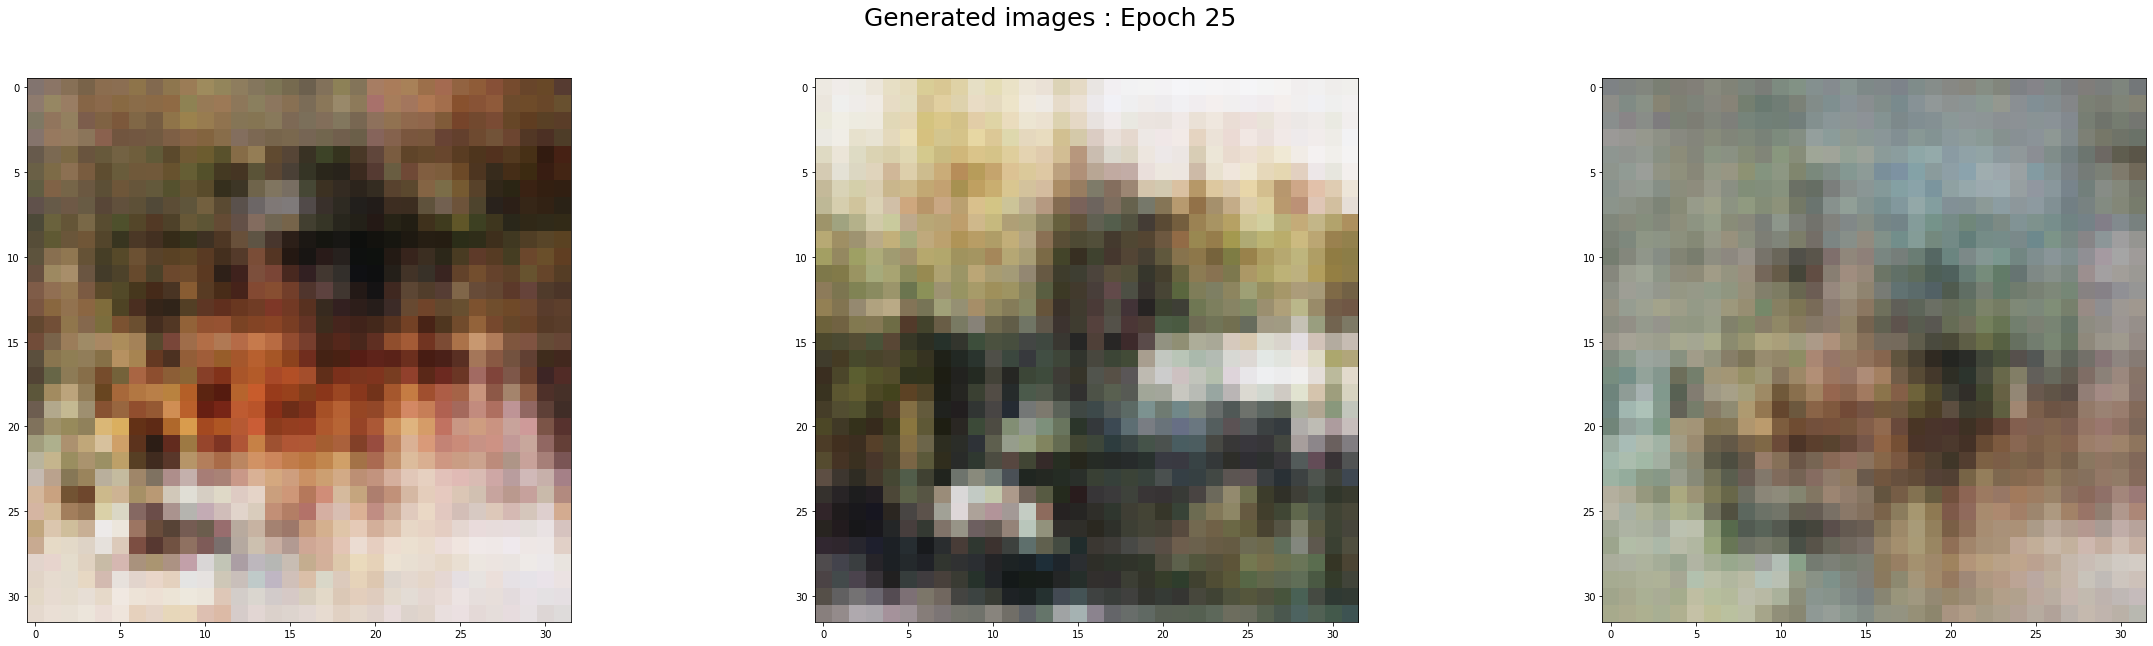

---------------------------------------------------------------
epoch :  26  d_loss_accuracy  =  [0.5960537195205688, 0.69921875]  g_loss =  0.7607455849647522


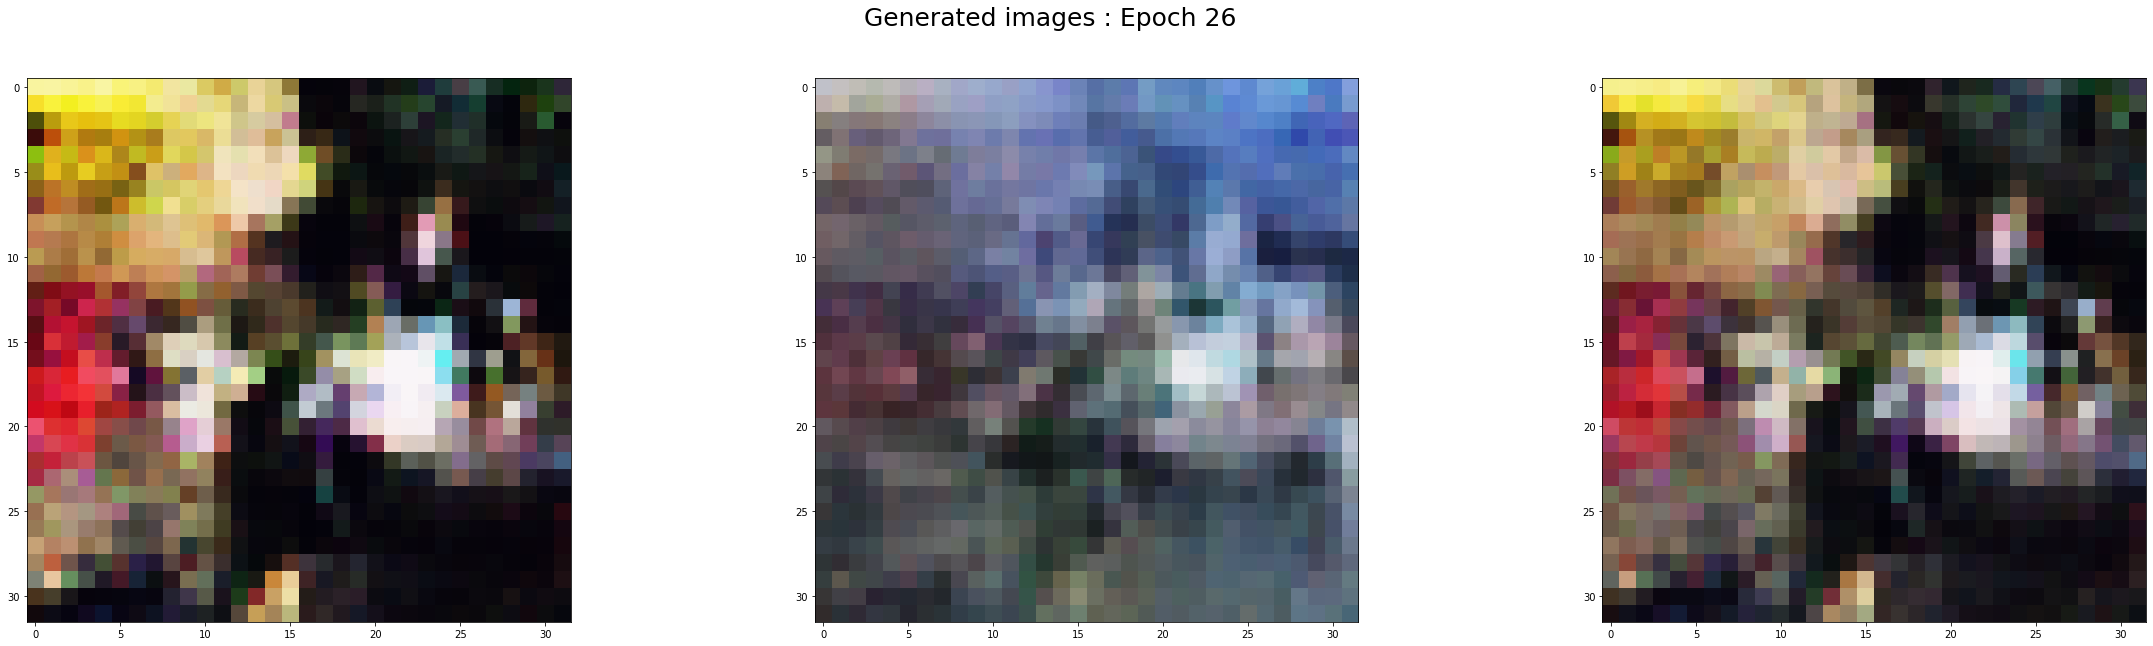

---------------------------------------------------------------
epoch :  27  d_loss_accuracy  =  [0.613118052482605, 0.66015625]  g_loss =  0.6624594926834106


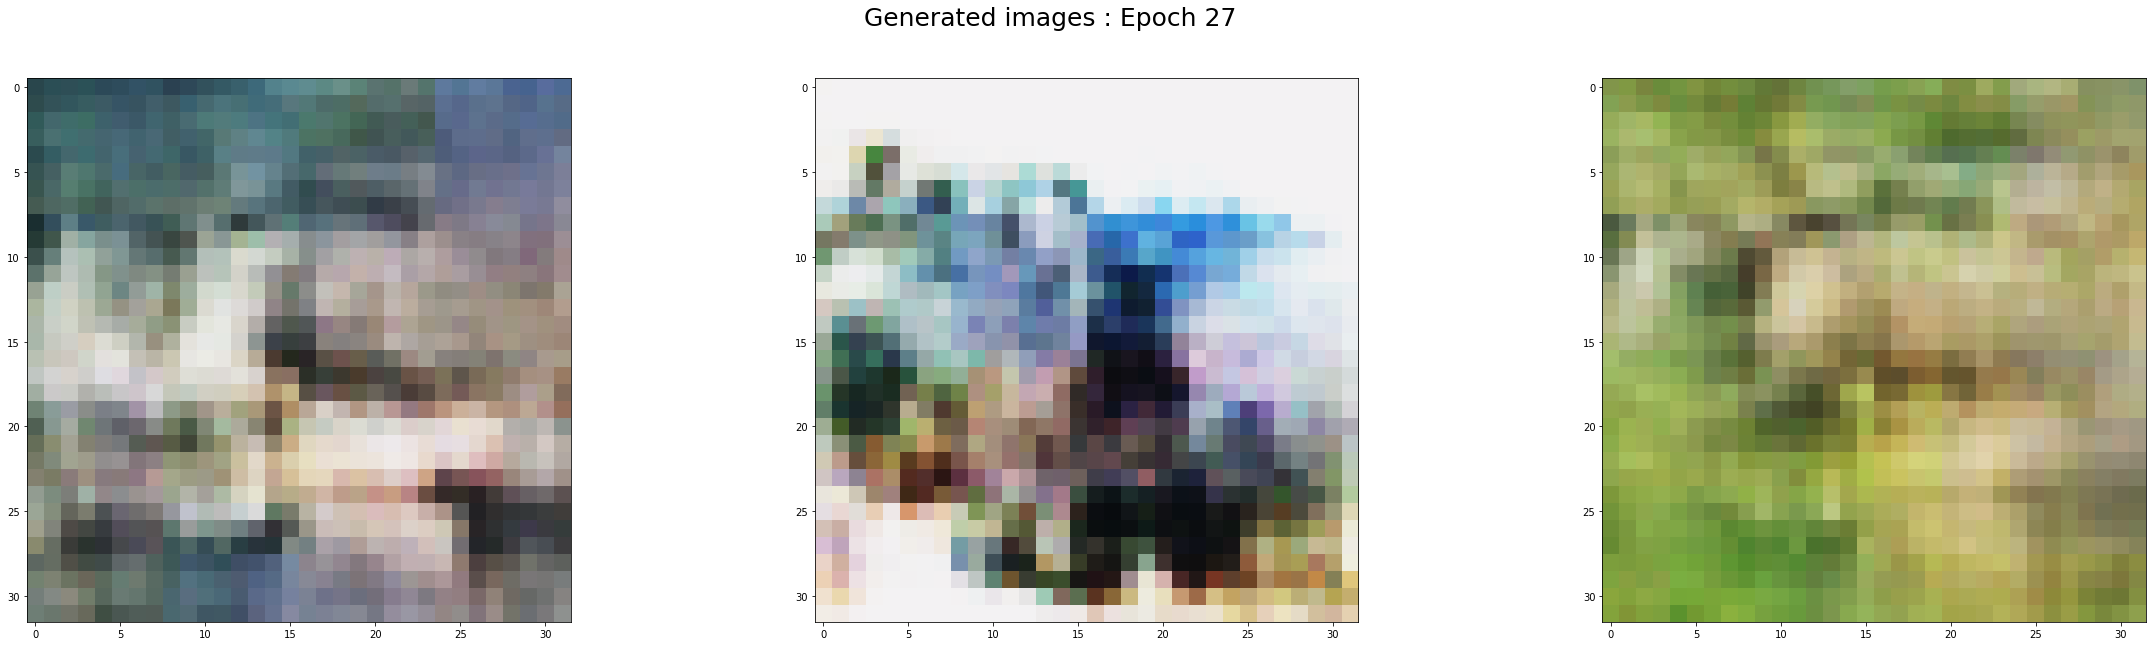

---------------------------------------------------------------
epoch :  28  d_loss_accuracy  =  [0.5983681678771973, 0.671875]  g_loss =  1.1326974630355835


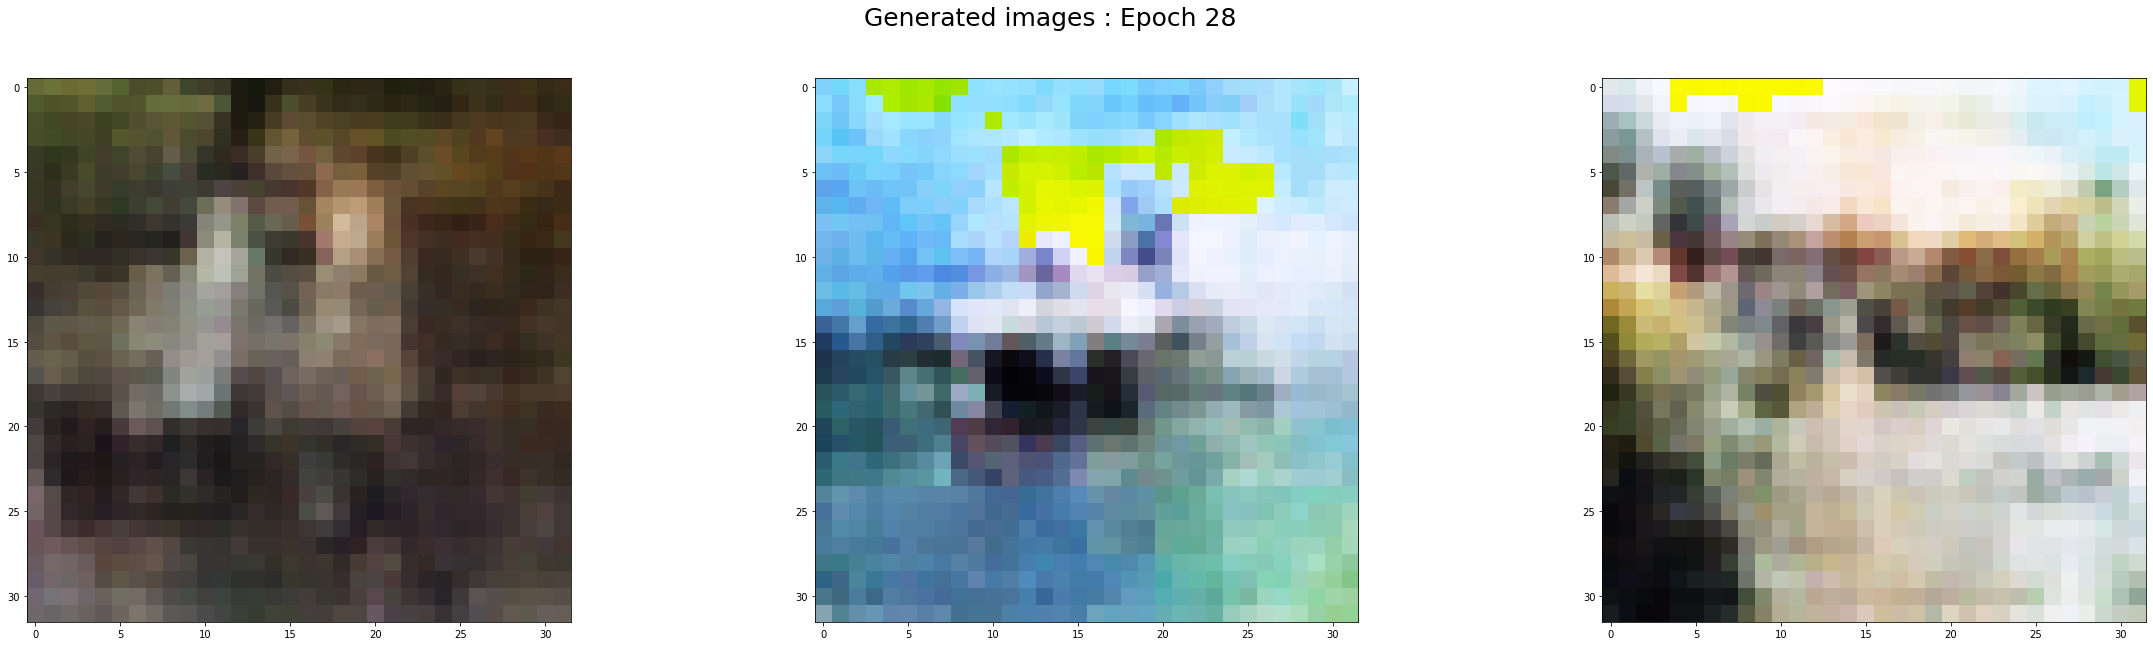

---------------------------------------------------------------
epoch :  29  d_loss_accuracy  =  [0.660001814365387, 0.59765625]  g_loss =  0.6994084119796753


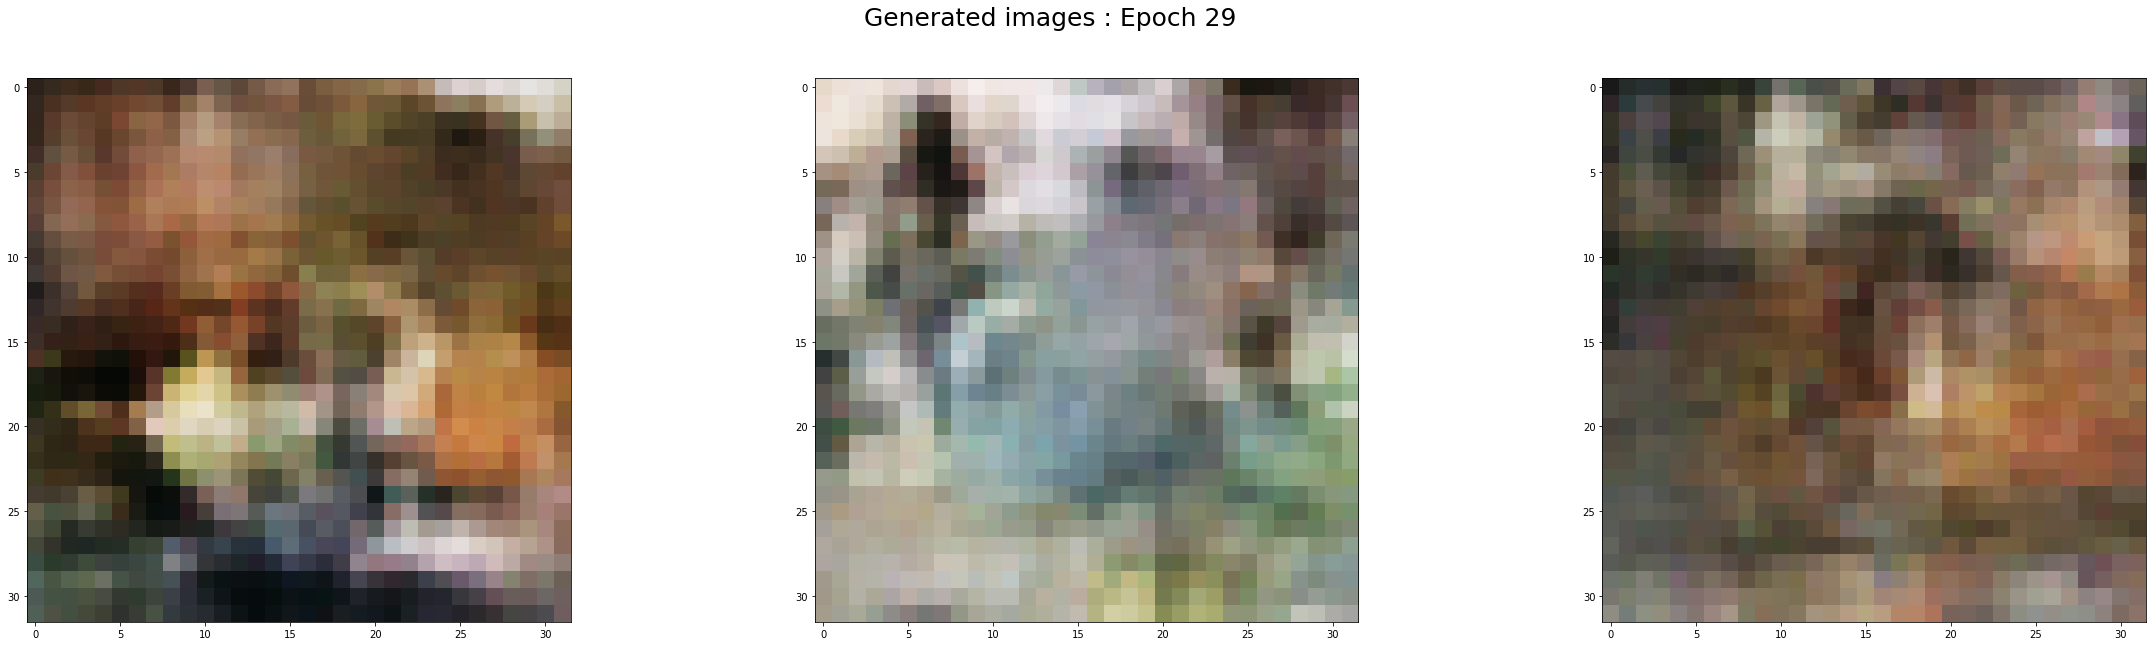

---------------------------------------------------------------
epoch :  30  d_loss_accuracy  =  [0.6439553499221802, 0.640625]  g_loss =  0.8656180500984192


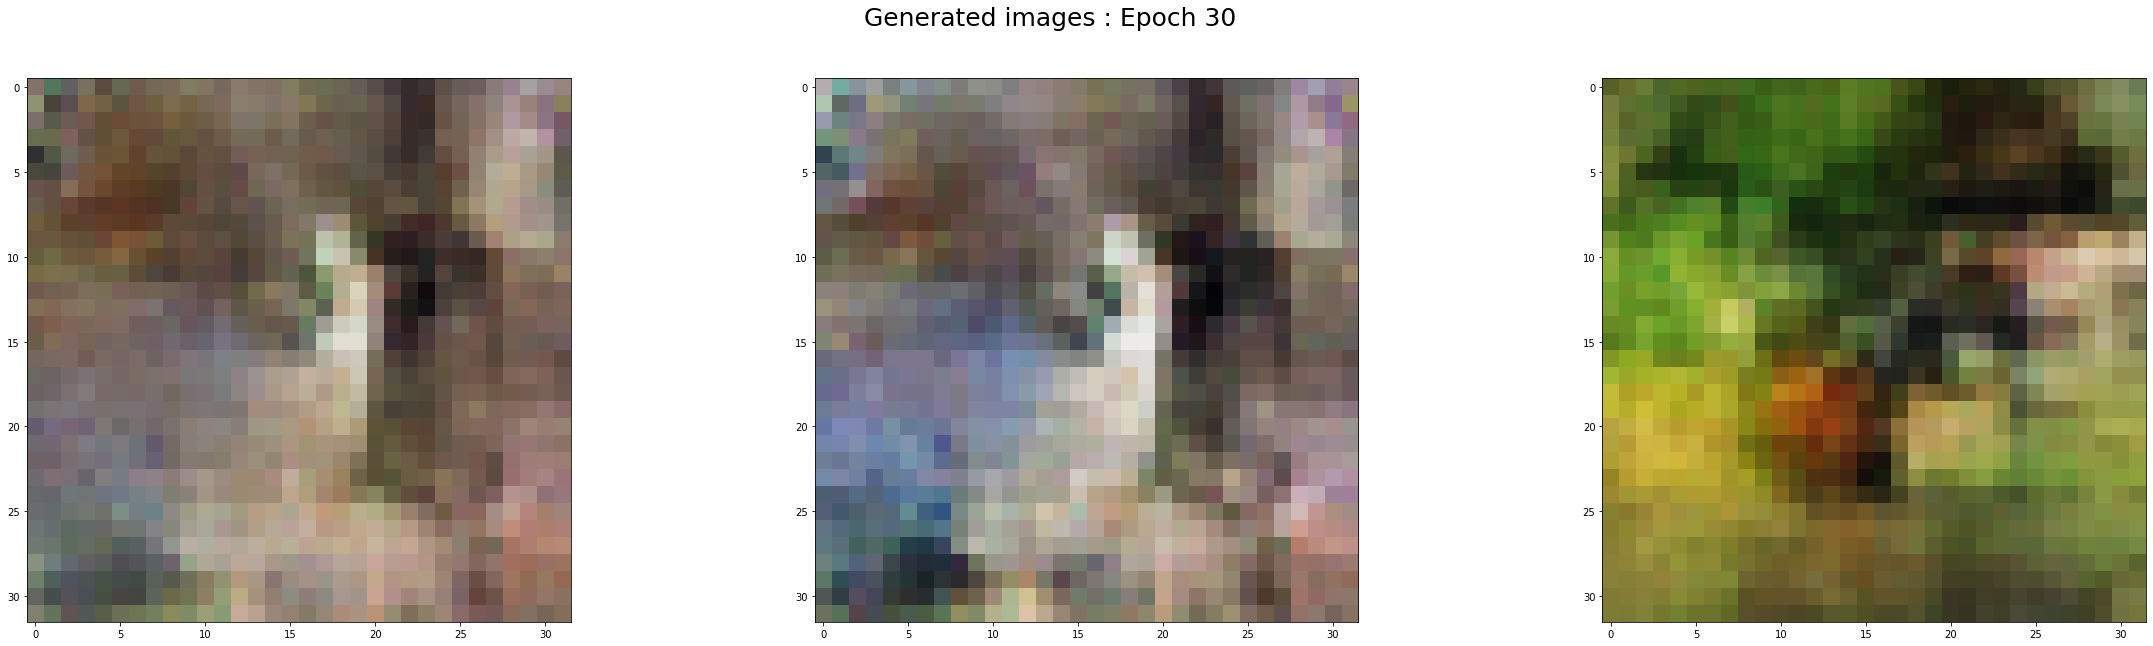

---------------------------------------------------------------
epoch :  31  d_loss_accuracy  =  [0.5635913014411926, 0.74609375]  g_loss =  1.059800148010254


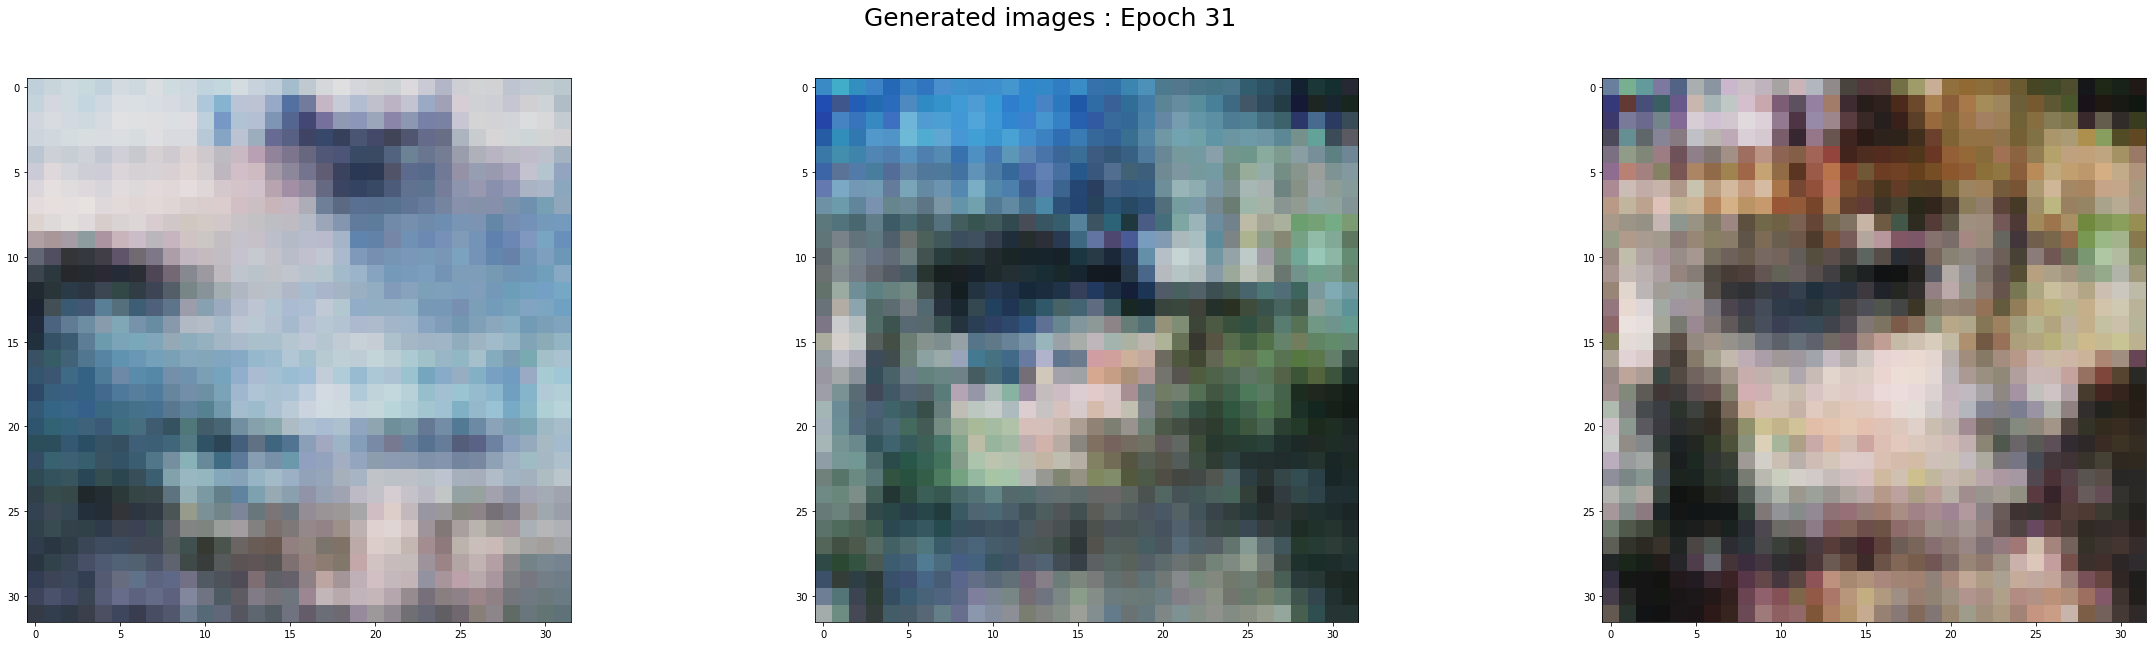

---------------------------------------------------------------
epoch :  32  d_loss_accuracy  =  [0.6252444982528687, 0.63671875]  g_loss =  0.9672143459320068


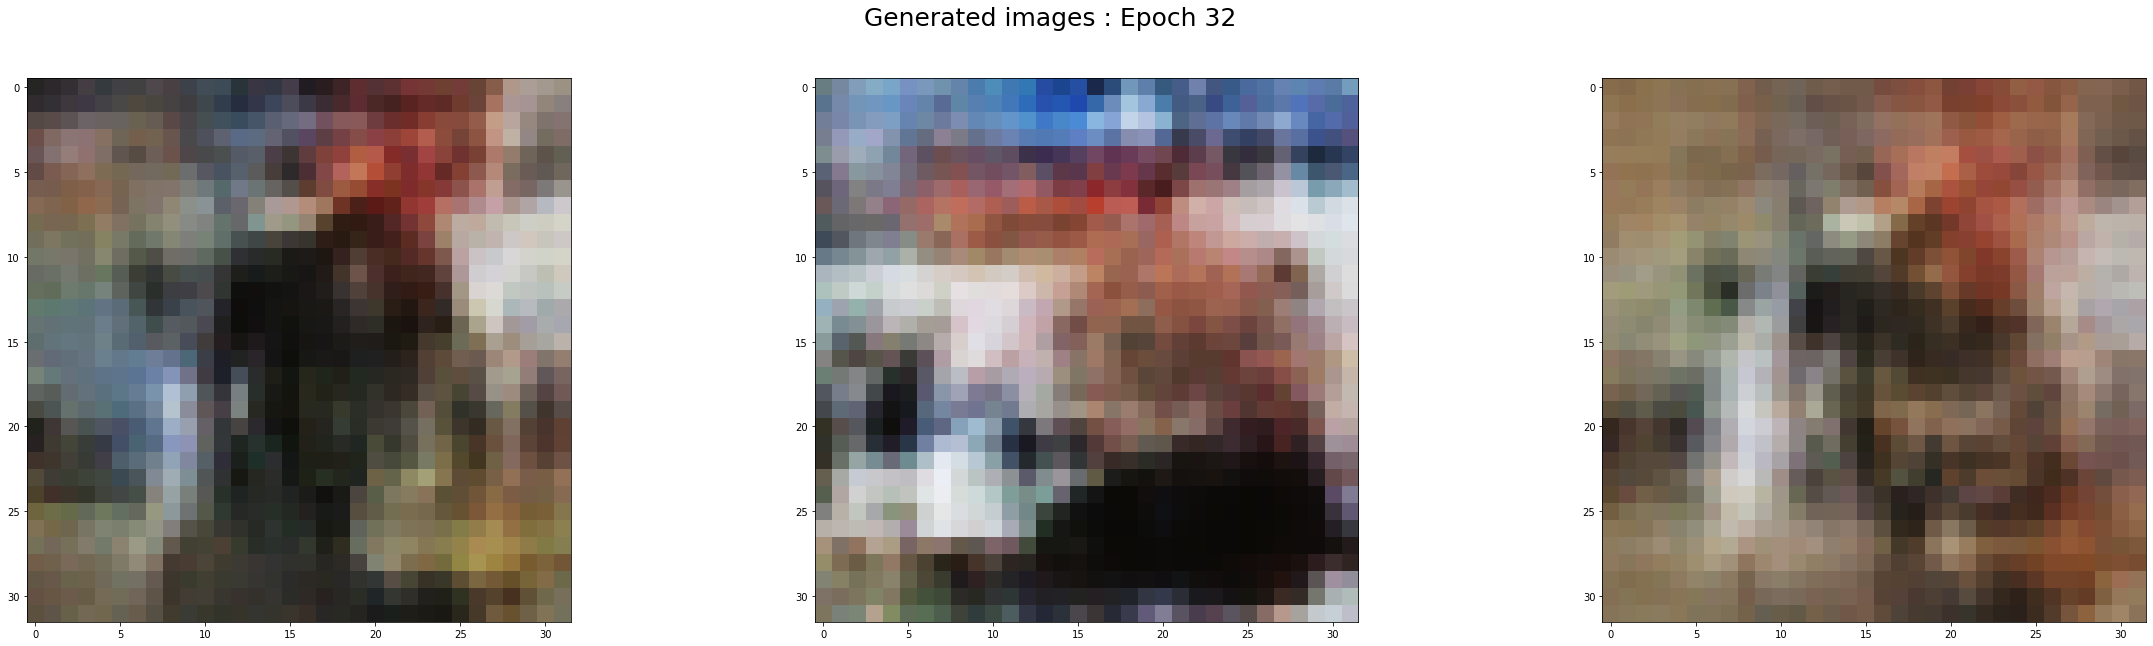

---------------------------------------------------------------
epoch :  33  d_loss_accuracy  =  [0.630998432636261, 0.671875]  g_loss =  0.8551545143127441


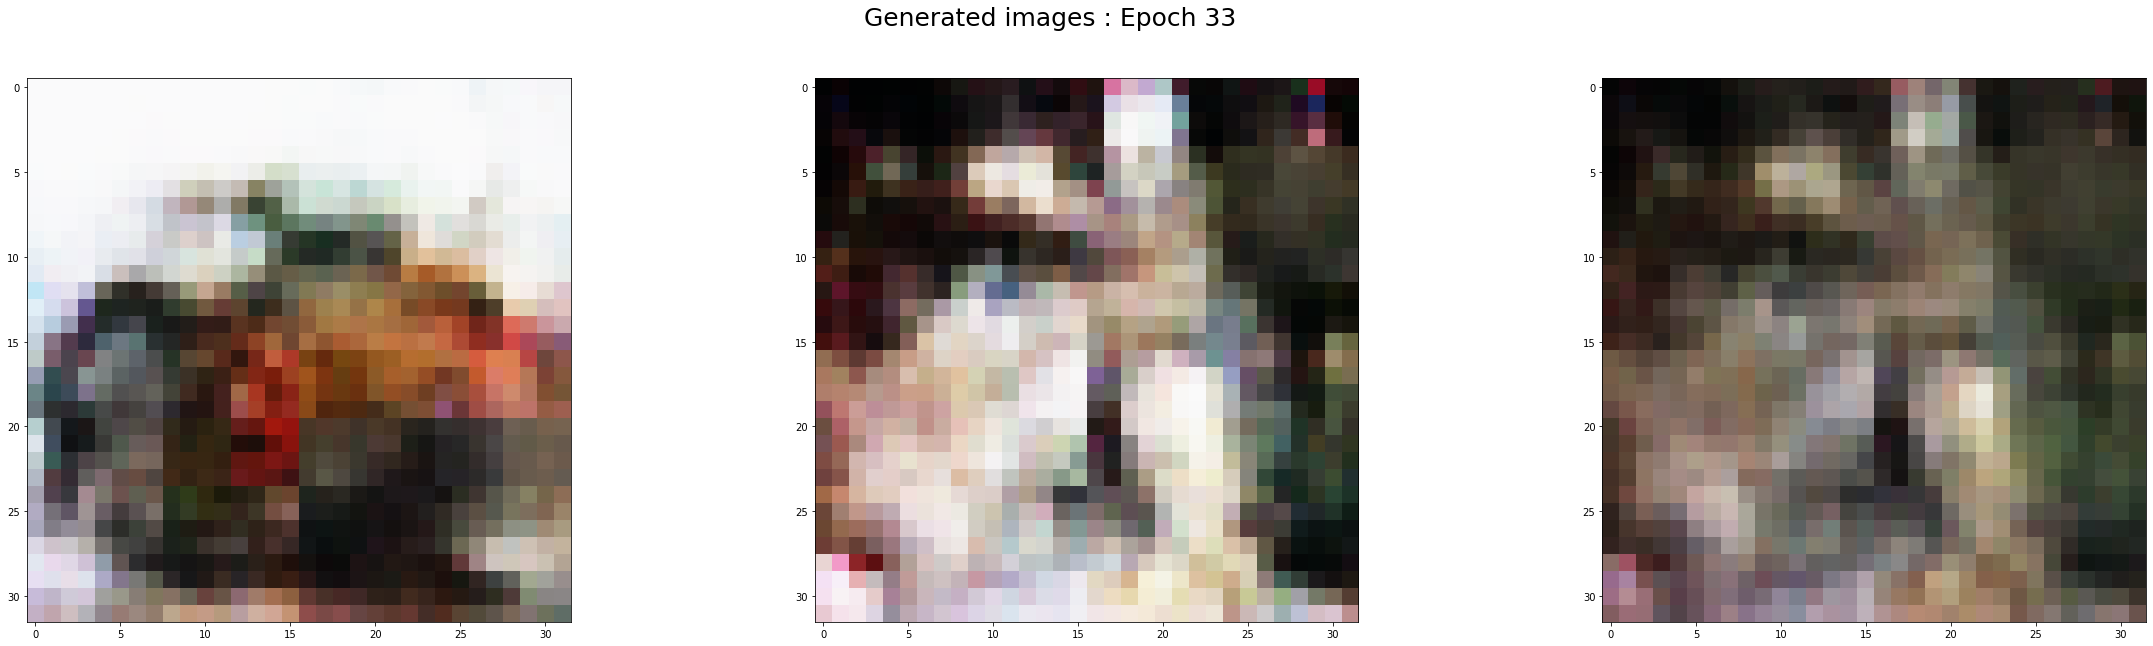

---------------------------------------------------------------
epoch :  34  d_loss_accuracy  =  [0.5939391851425171, 0.6953125]  g_loss =  0.8765949010848999


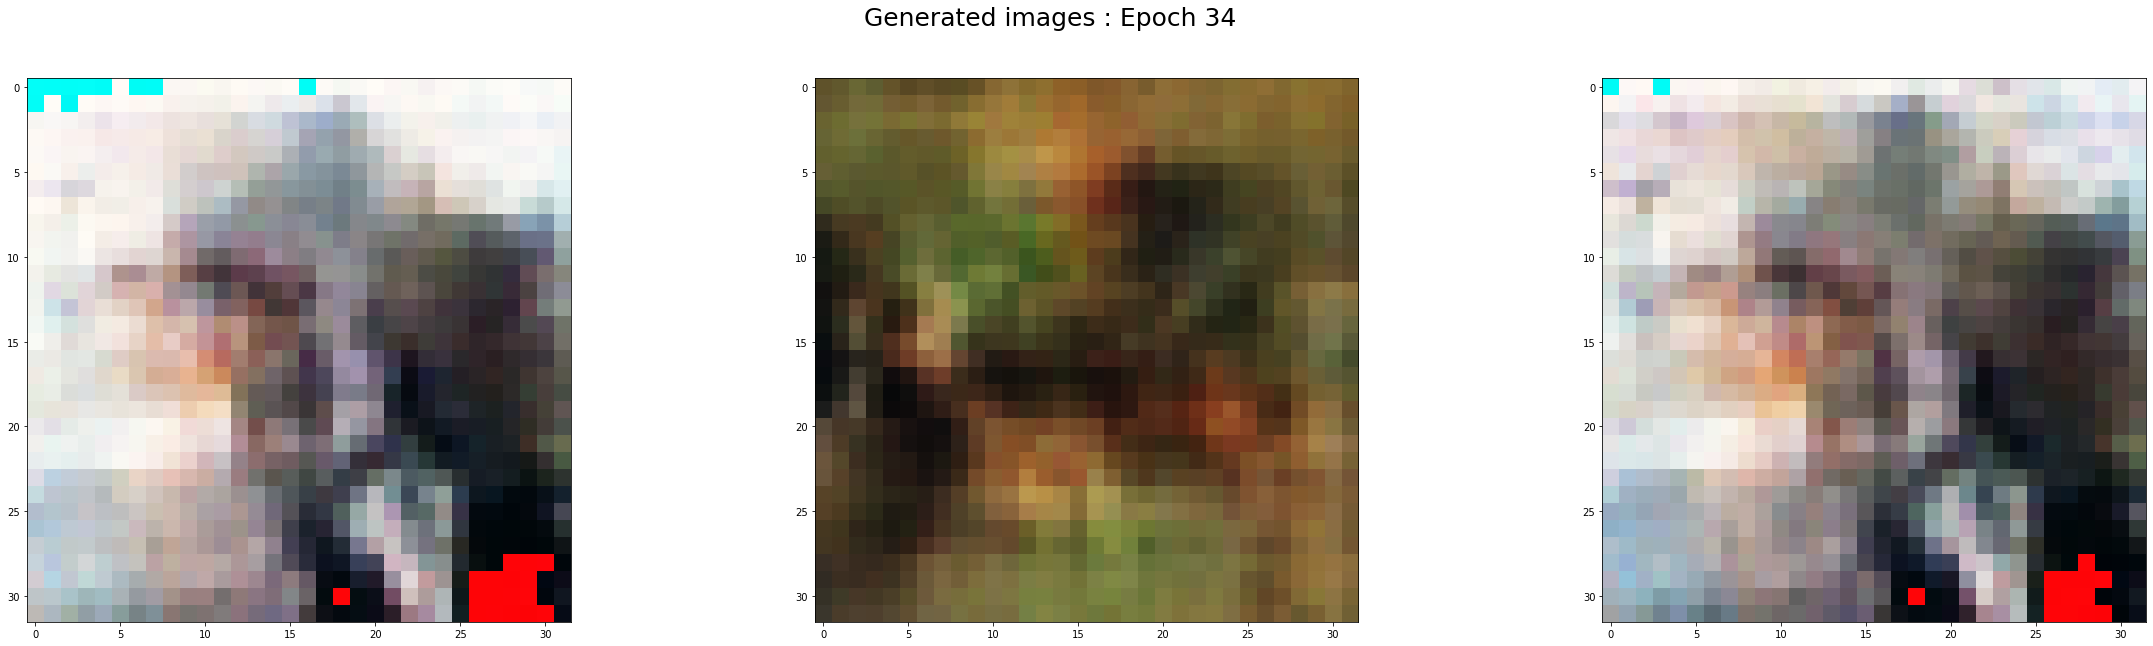

---------------------------------------------------------------
epoch :  35  d_loss_accuracy  =  [0.6633791923522949, 0.61328125]  g_loss =  1.2211209535598755


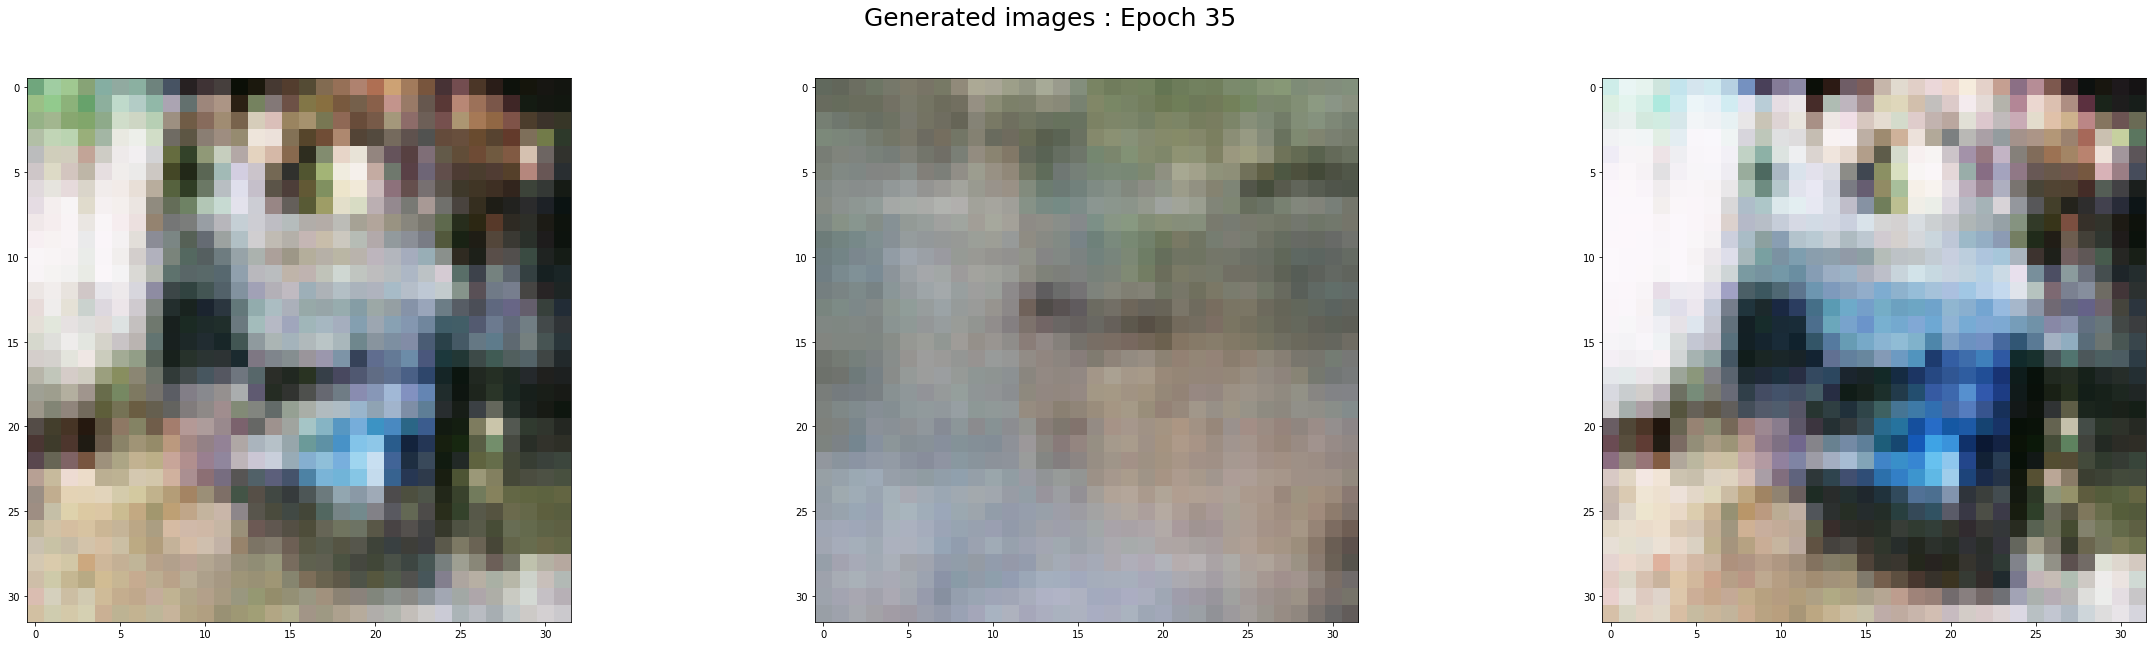

---------------------------------------------------------------
epoch :  36  d_loss_accuracy  =  [0.5668374300003052, 0.69140625]  g_loss =  1.2161760330200195


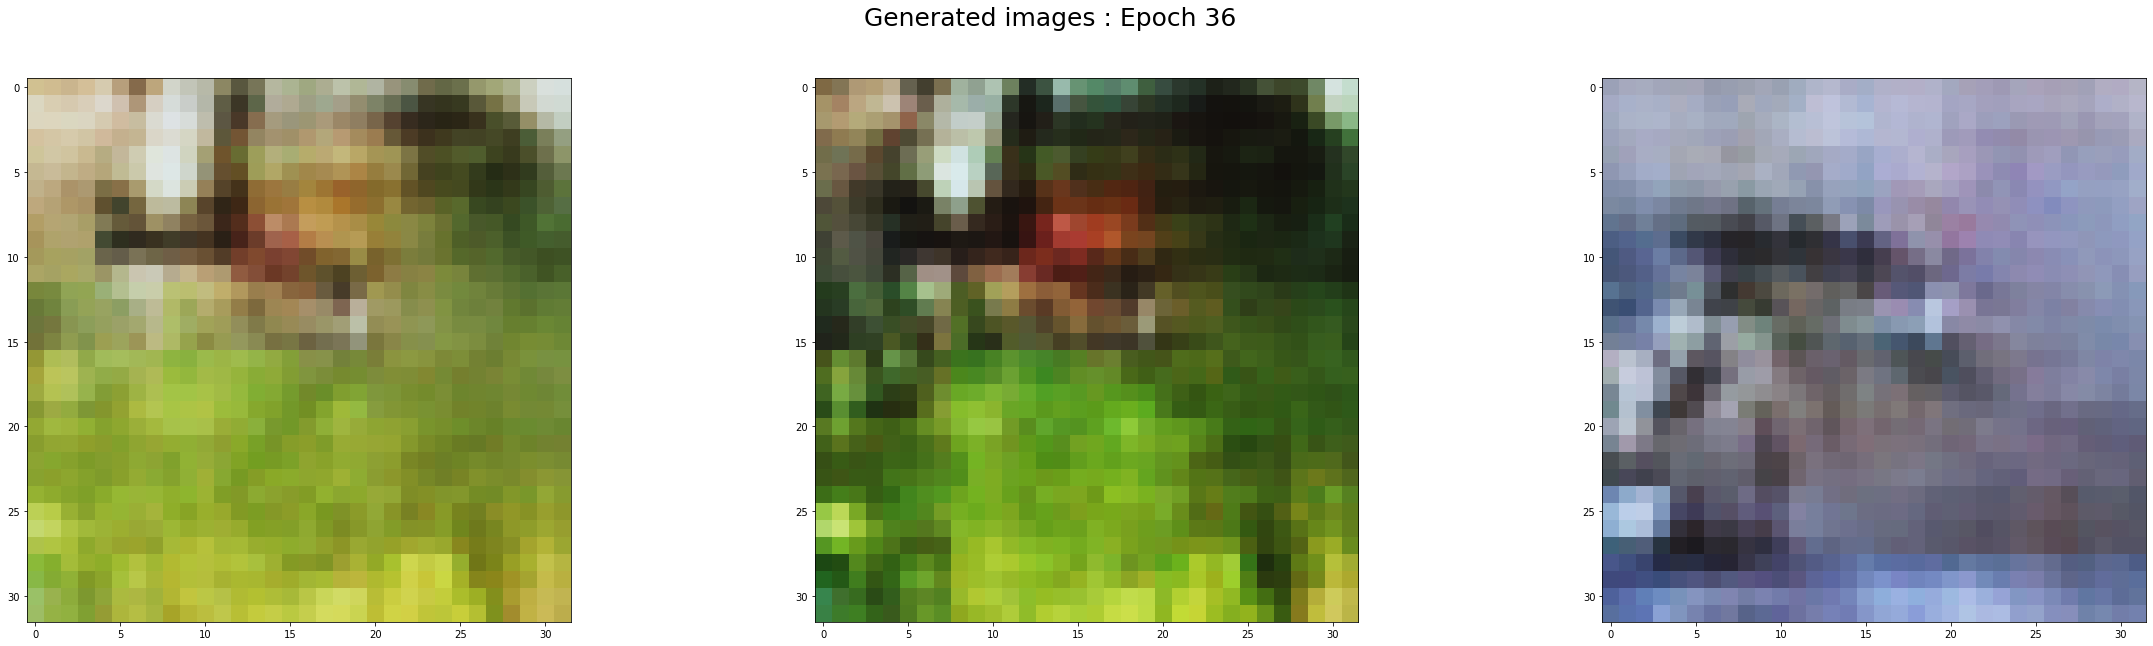

---------------------------------------------------------------
epoch :  37  d_loss_accuracy  =  [0.5308036804199219, 0.78515625]  g_loss =  0.7250581383705139


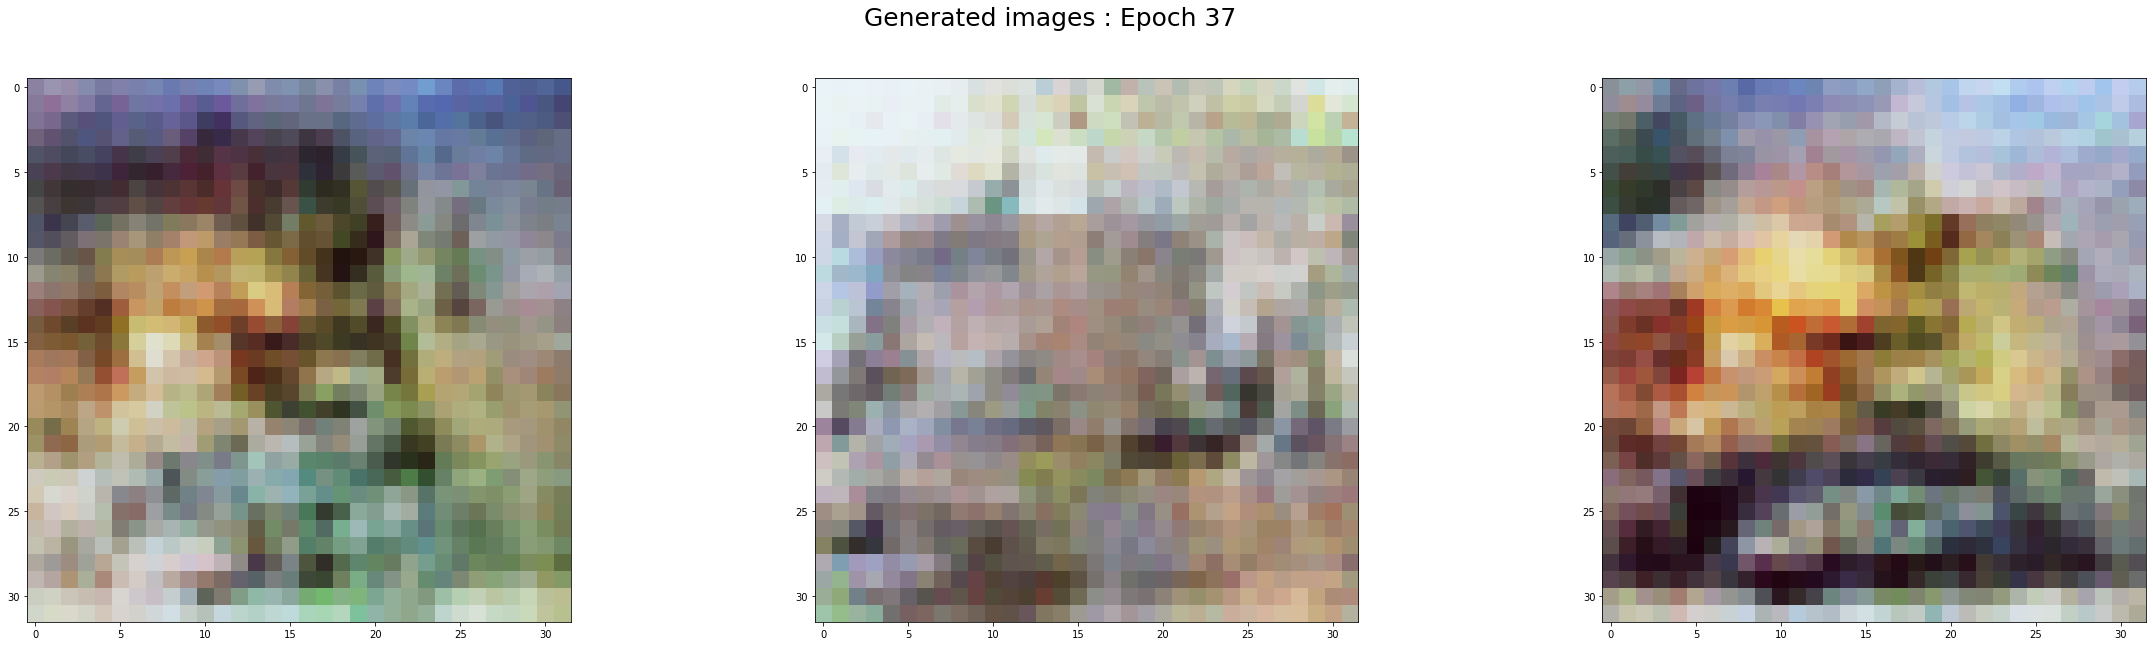

---------------------------------------------------------------
epoch :  38  d_loss_accuracy  =  [0.5888879299163818, 0.72265625]  g_loss =  0.940883457660675


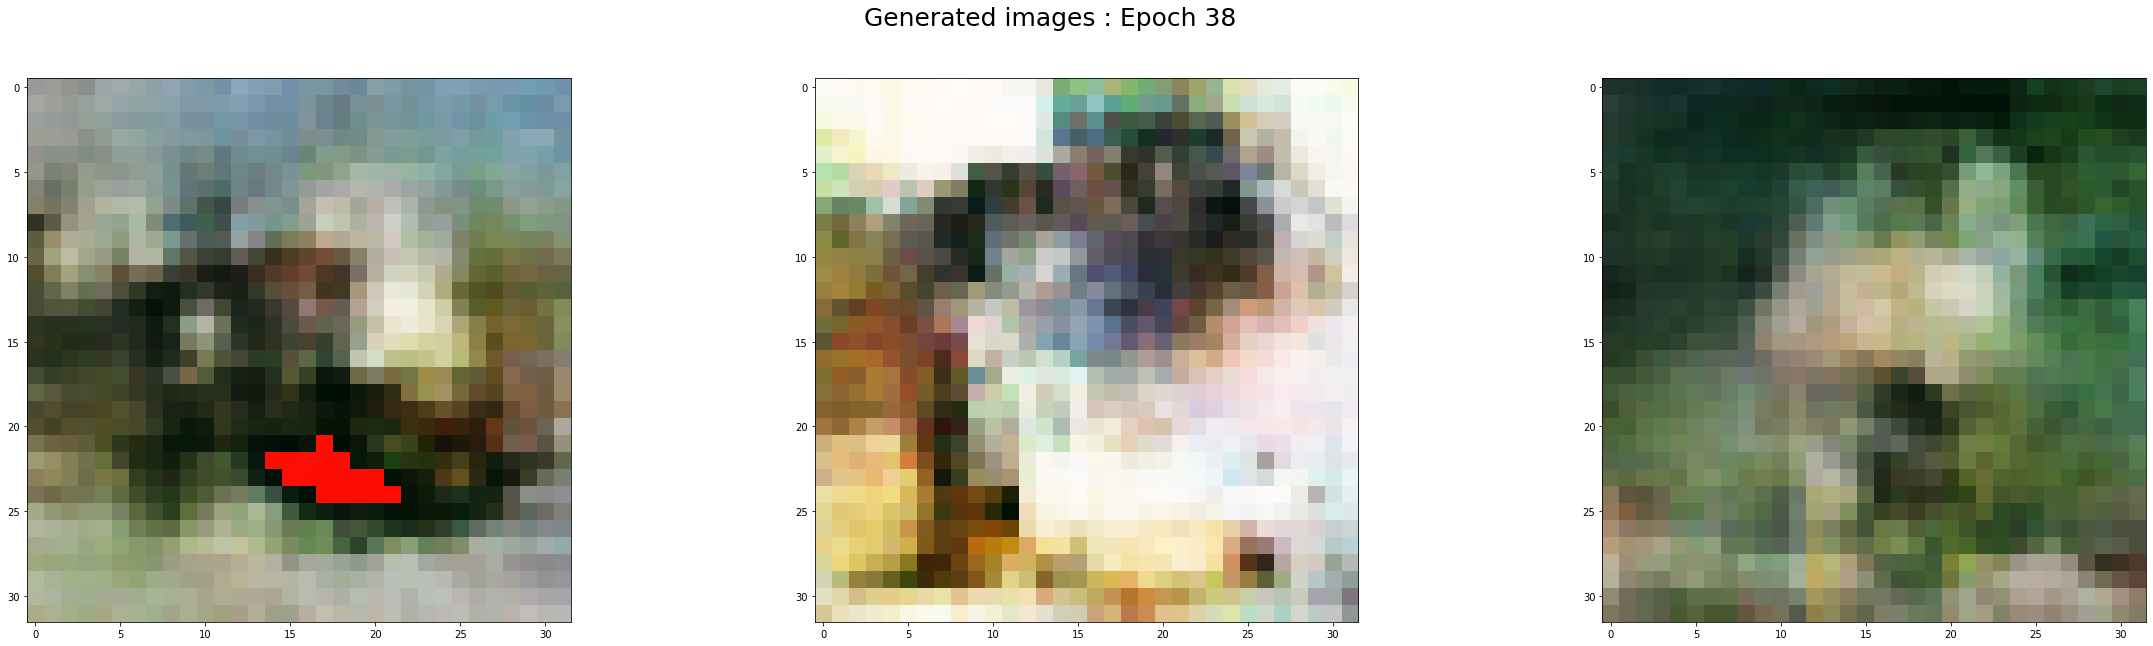

---------------------------------------------------------------
epoch :  39  d_loss_accuracy  =  [0.7289155721664429, 0.4609375]  g_loss =  0.6895172595977783


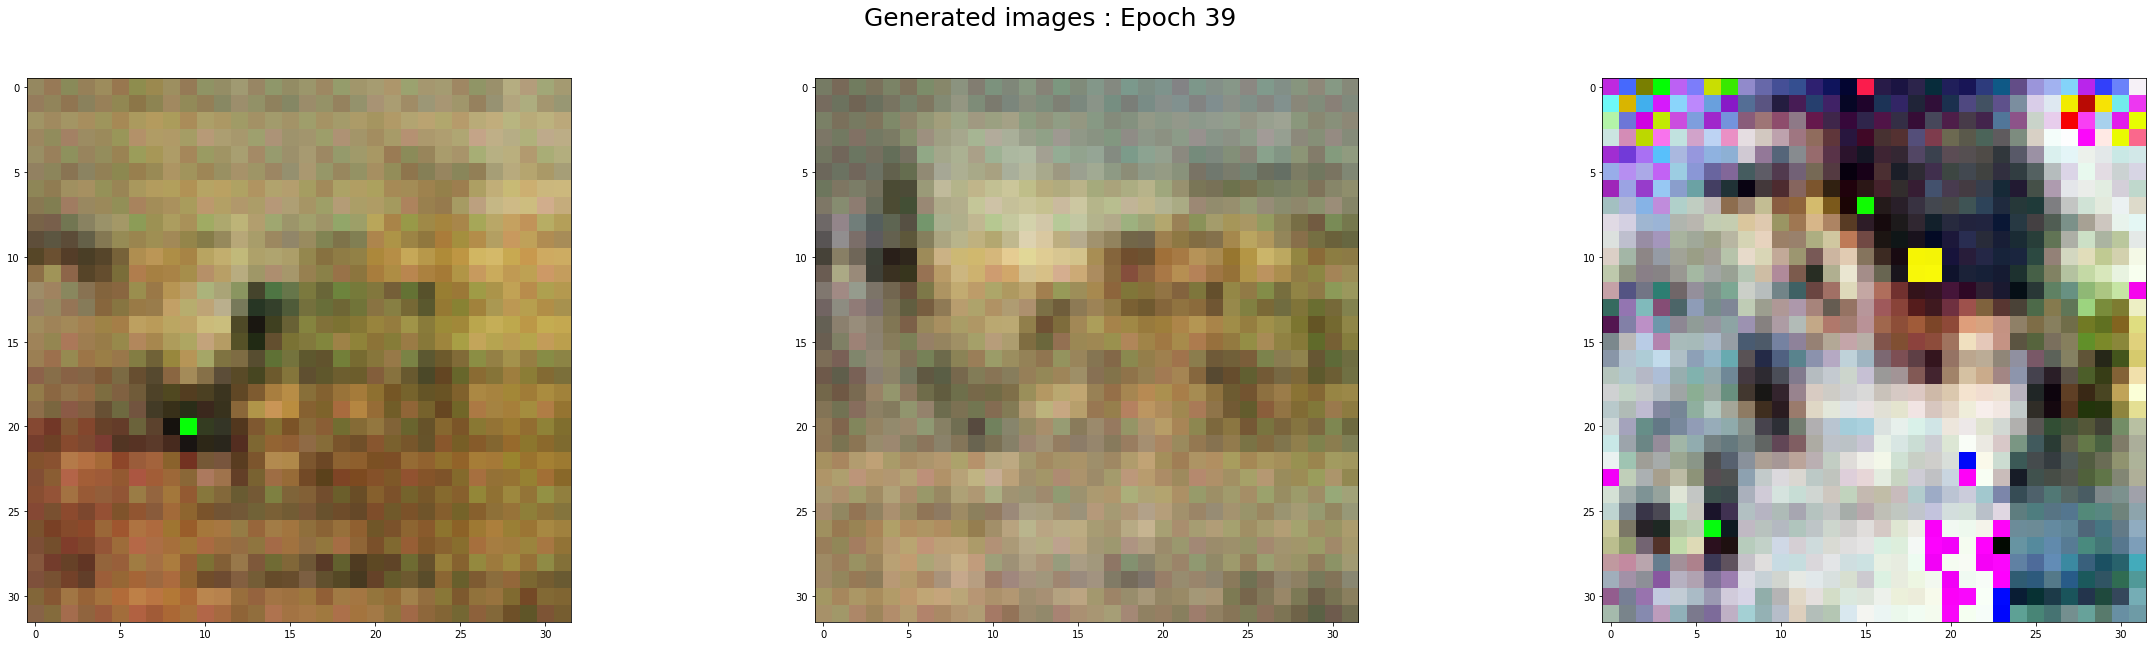

---------------------------------------------------------------
epoch :  40  d_loss_accuracy  =  [0.5699840188026428, 0.70703125]  g_loss =  0.9597615599632263


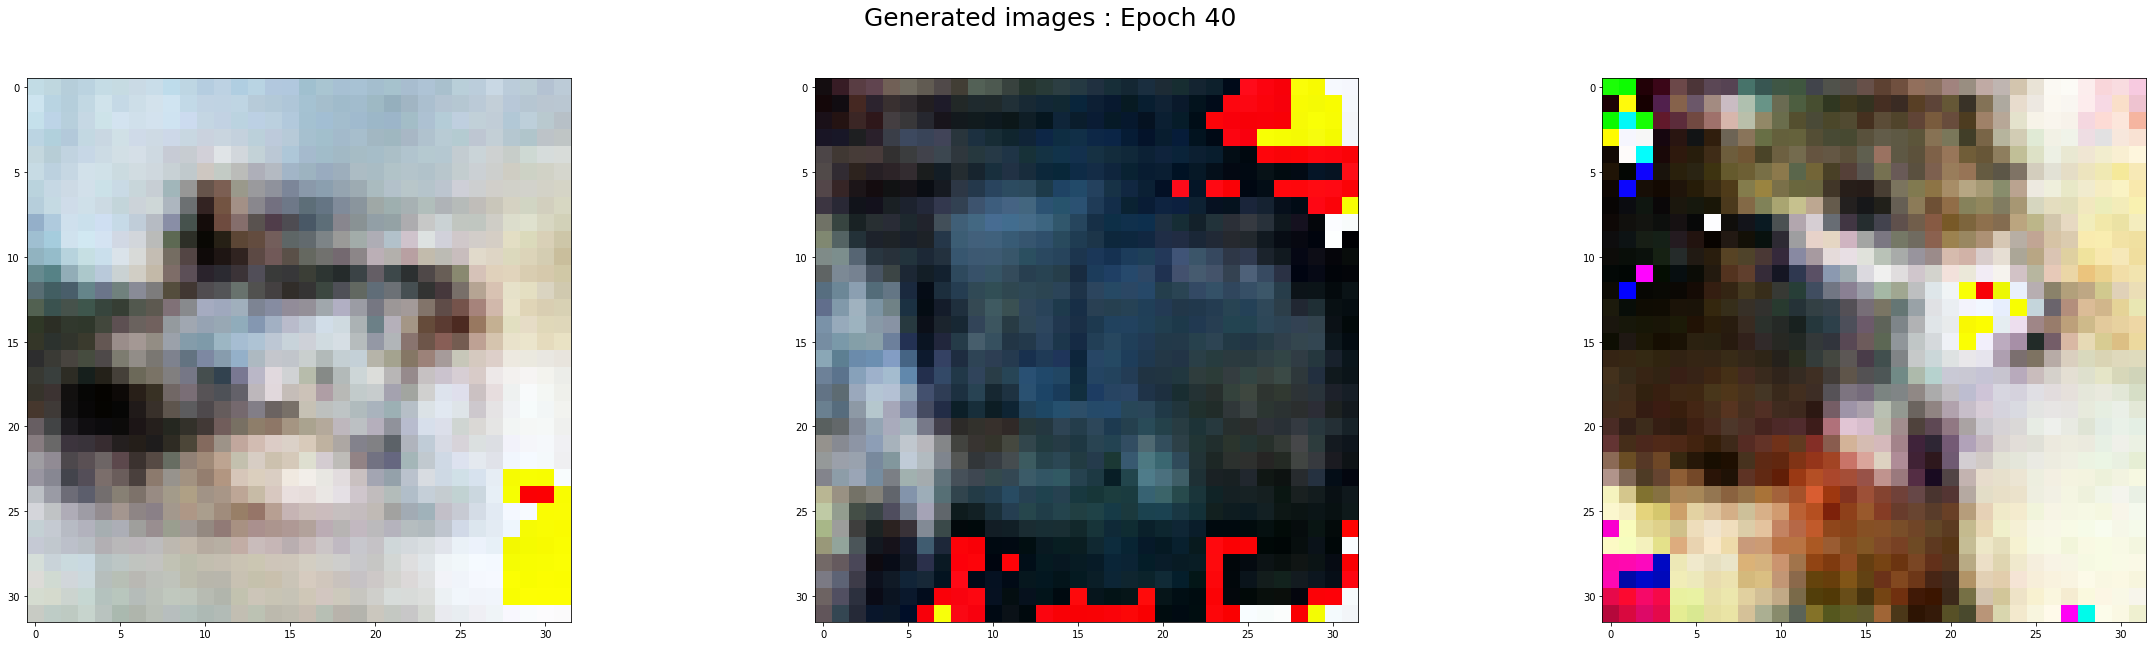

---------------------------------------------------------------
epoch :  41  d_loss_accuracy  =  [0.5142848491668701, 0.80078125]  g_loss =  0.9302293658256531


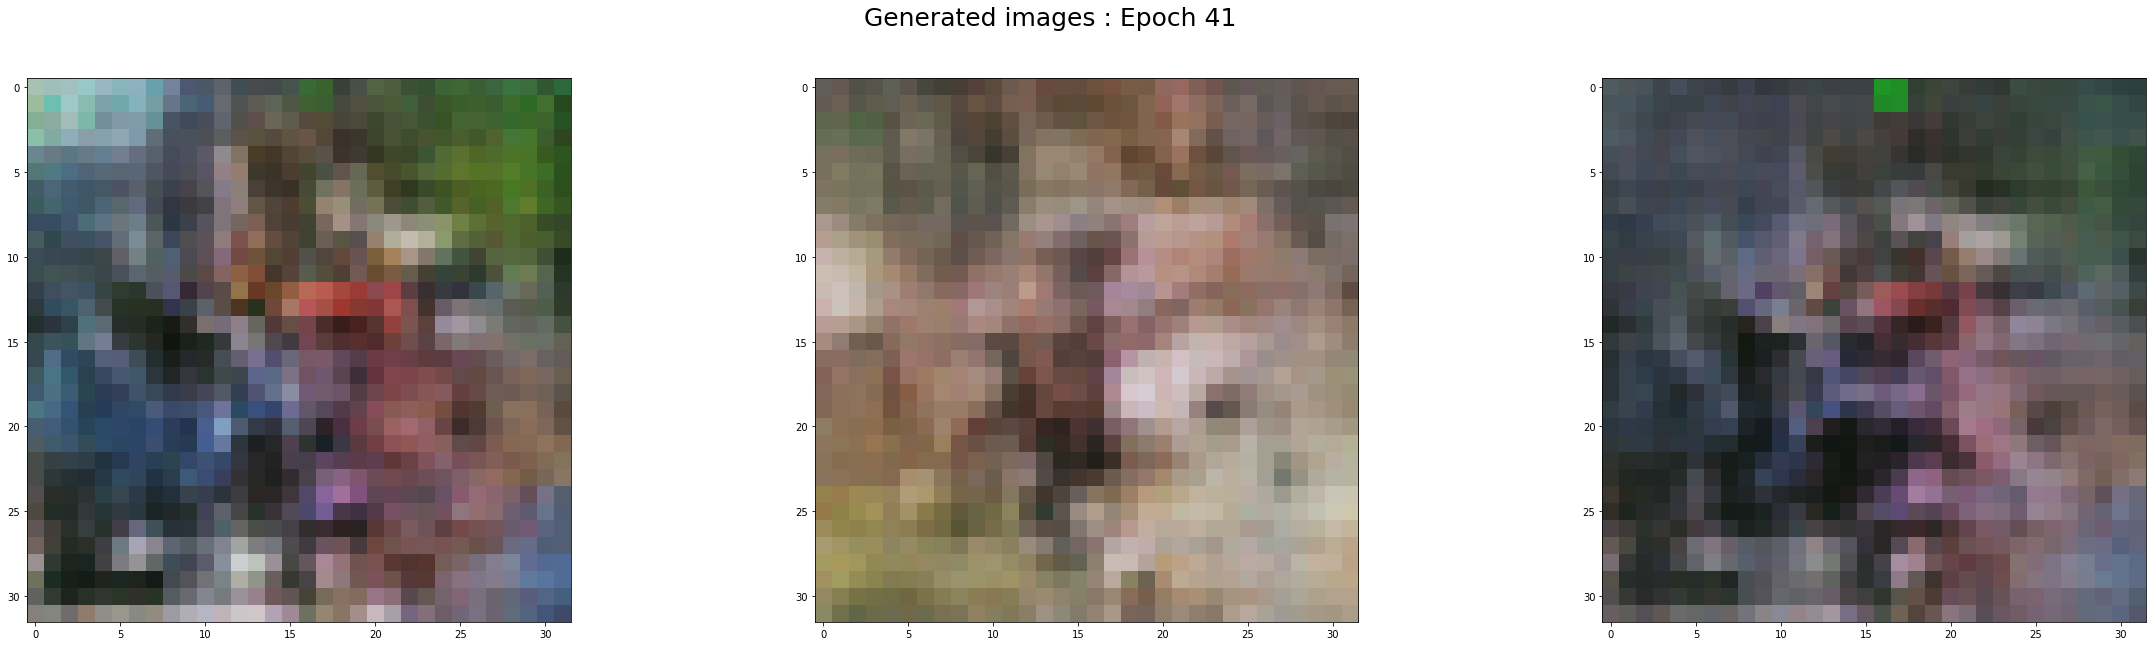

---------------------------------------------------------------
epoch :  42  d_loss_accuracy  =  [0.6632689237594604, 0.578125]  g_loss =  0.8038551807403564


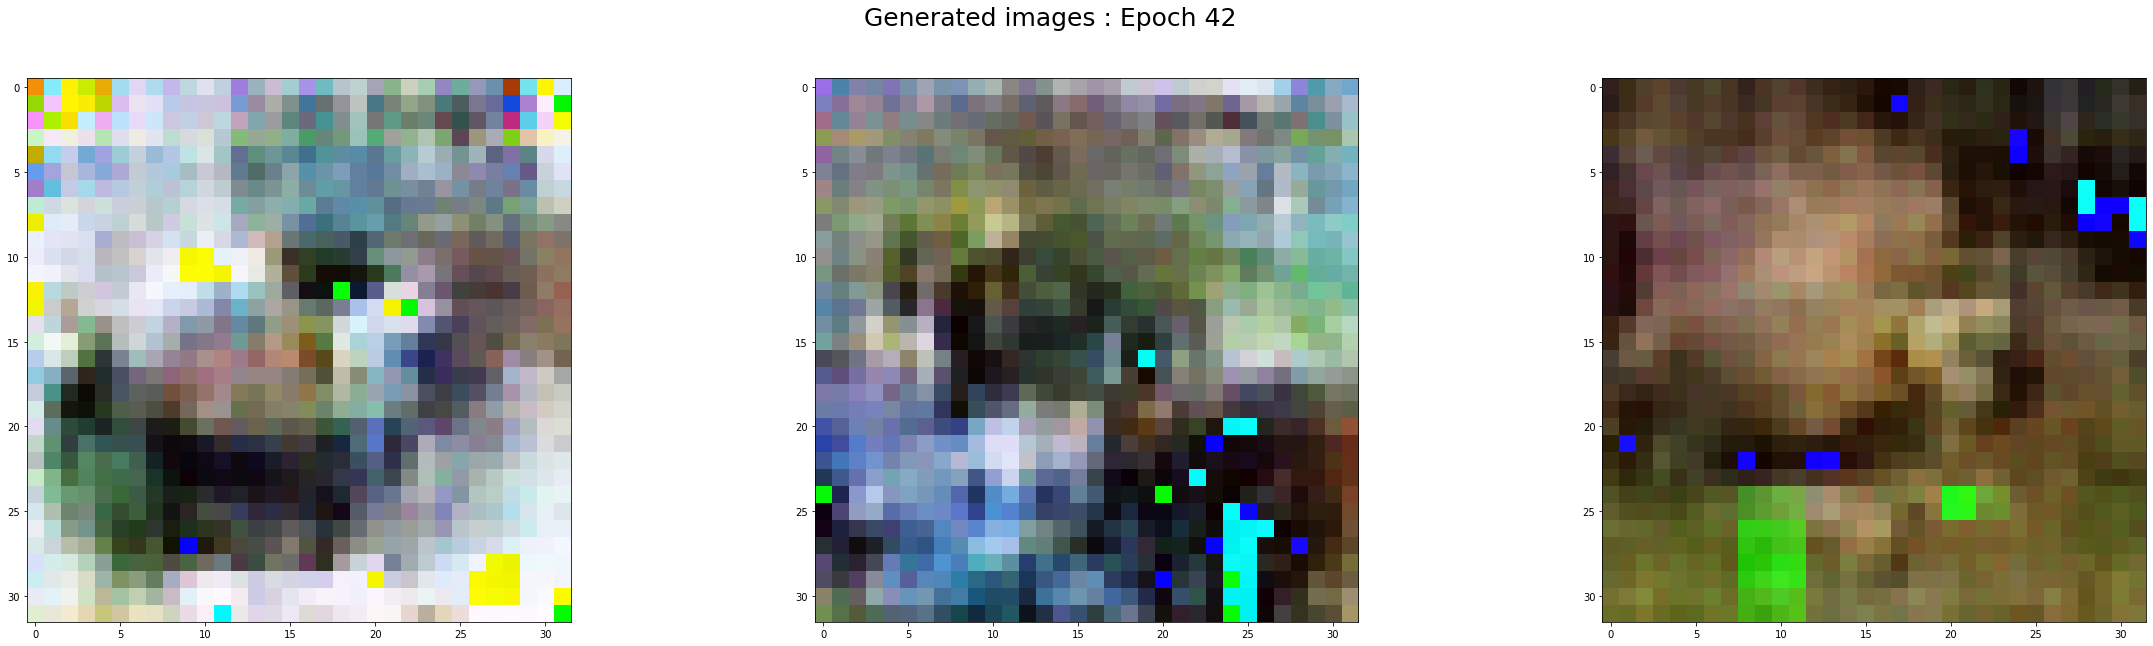

---------------------------------------------------------------
epoch :  43  d_loss_accuracy  =  [0.5326242446899414, 0.76953125]  g_loss =  0.802618682384491


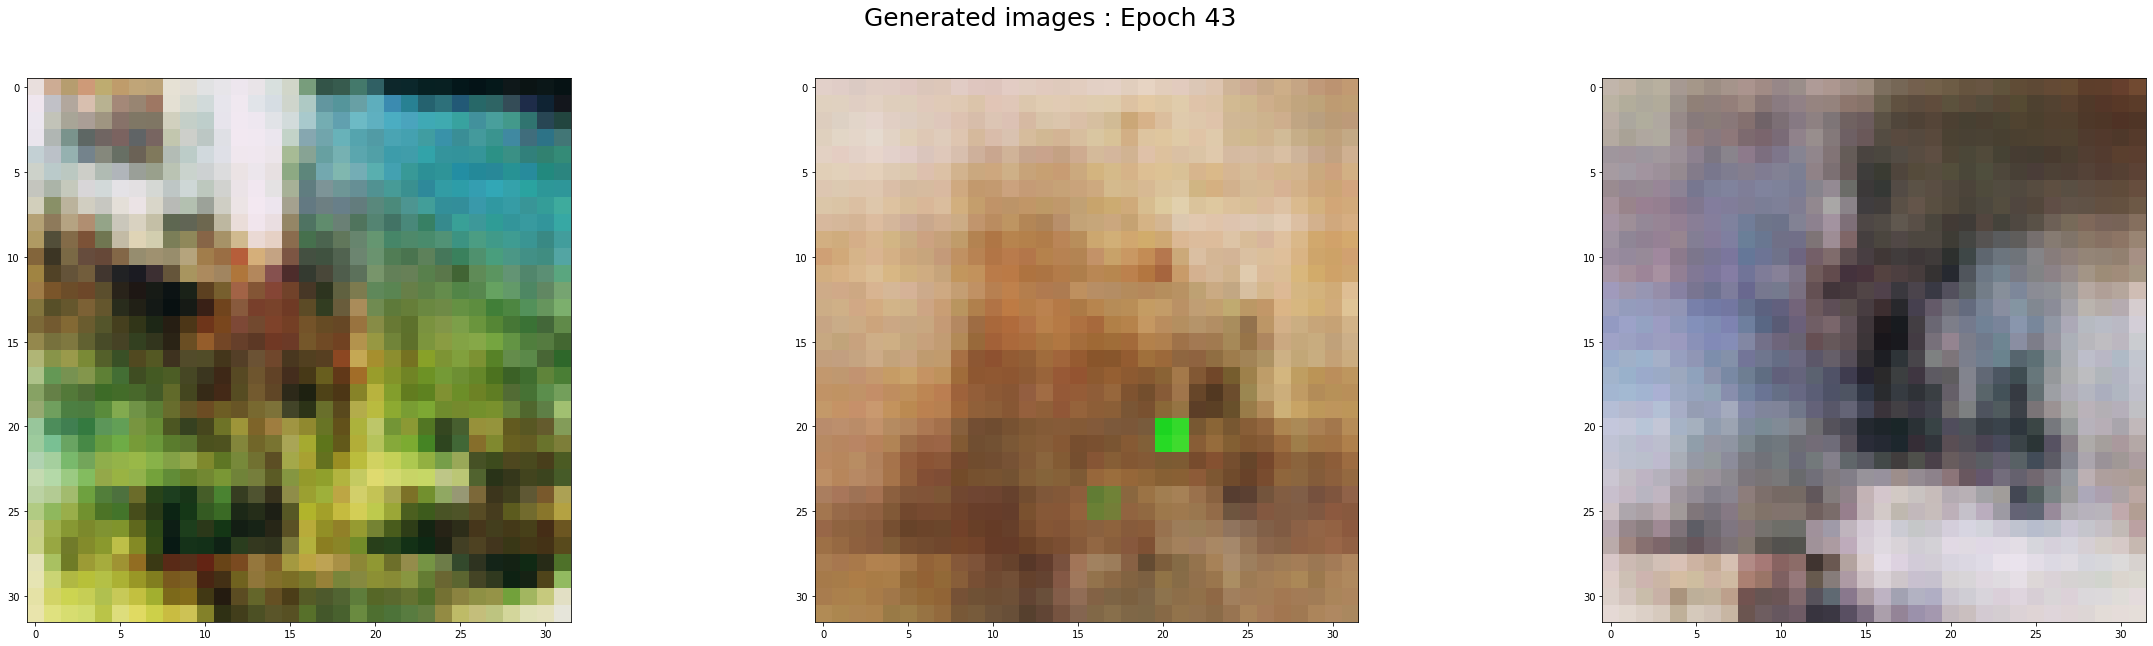

---------------------------------------------------------------
epoch :  44  d_loss_accuracy  =  [0.6247153878211975, 0.6875]  g_loss =  0.7797254323959351


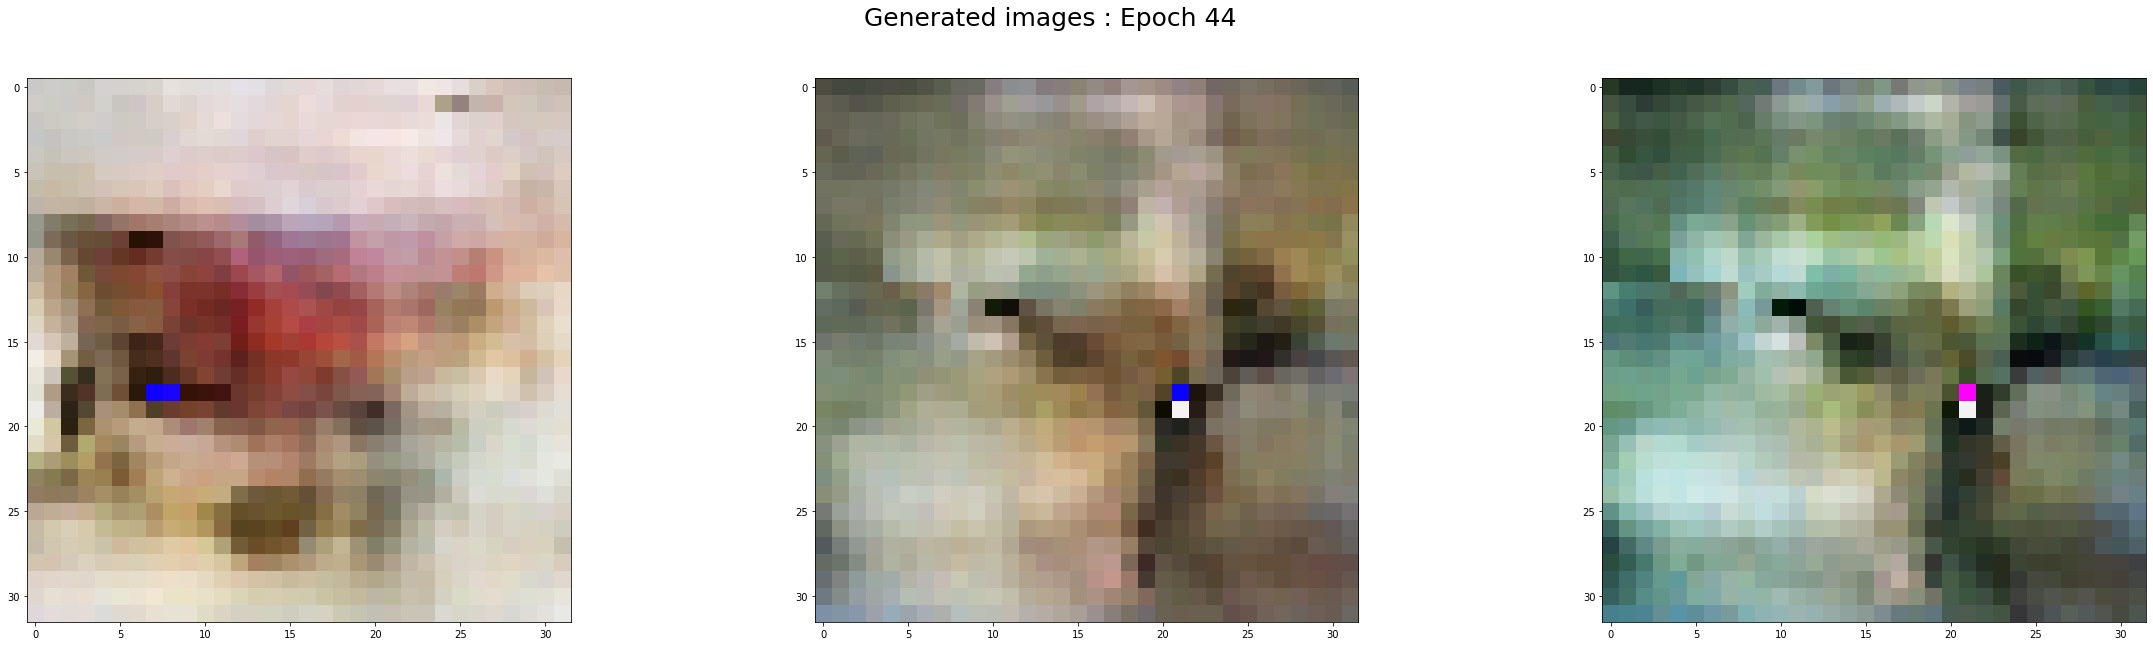

---------------------------------------------------------------
epoch :  45  d_loss_accuracy  =  [0.48333263397216797, 0.78515625]  g_loss =  0.9844039678573608


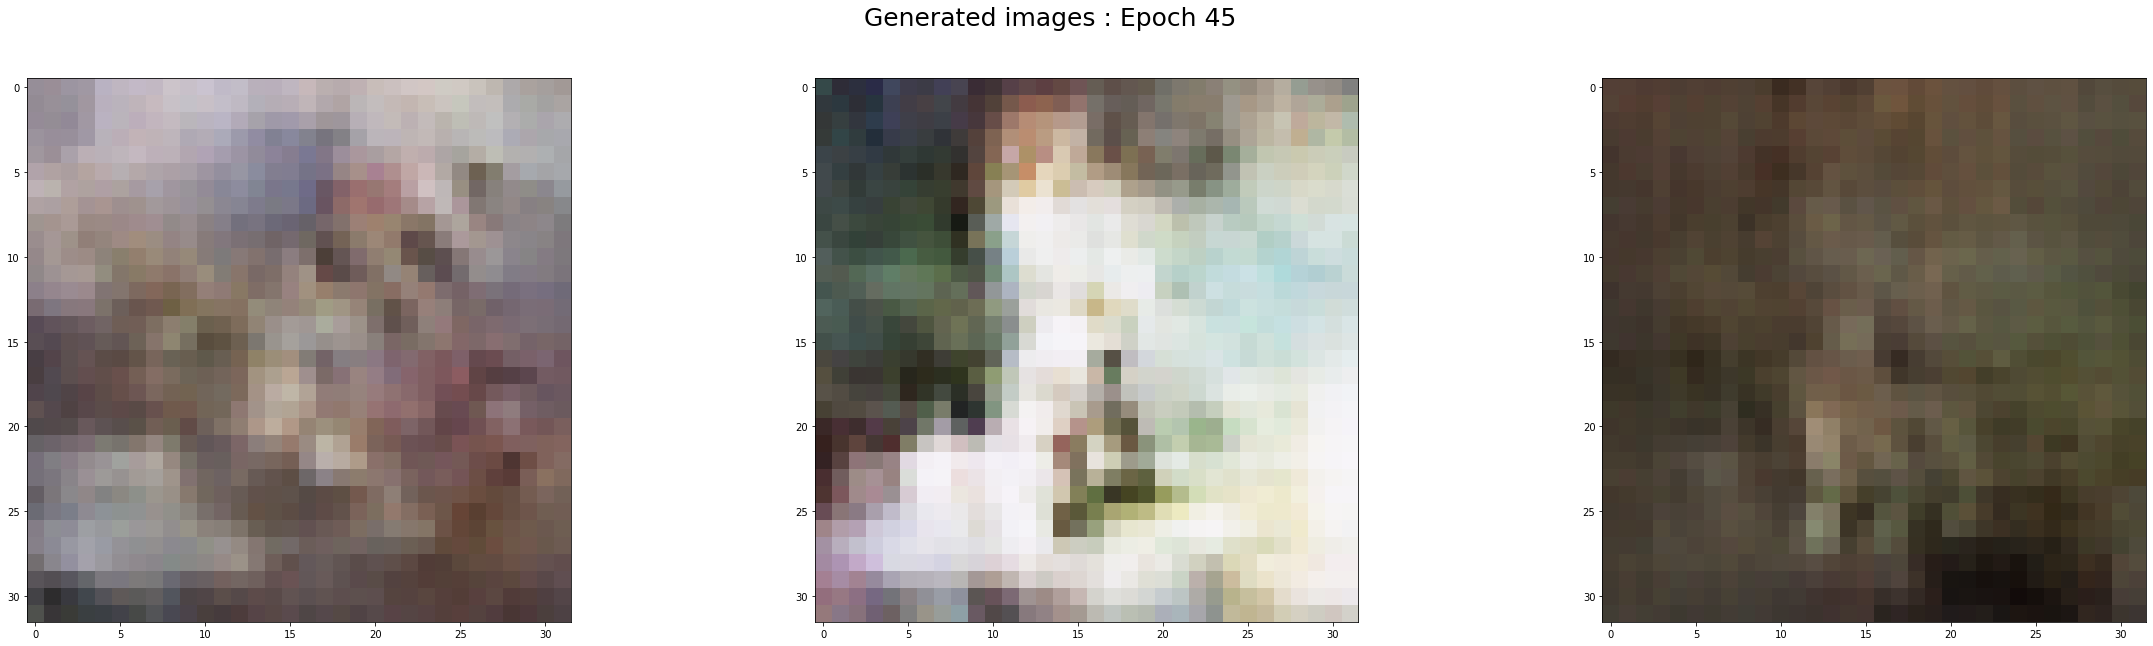

---------------------------------------------------------------
epoch :  46  d_loss_accuracy  =  [0.4916773736476898, 0.78515625]  g_loss =  0.8932251930236816


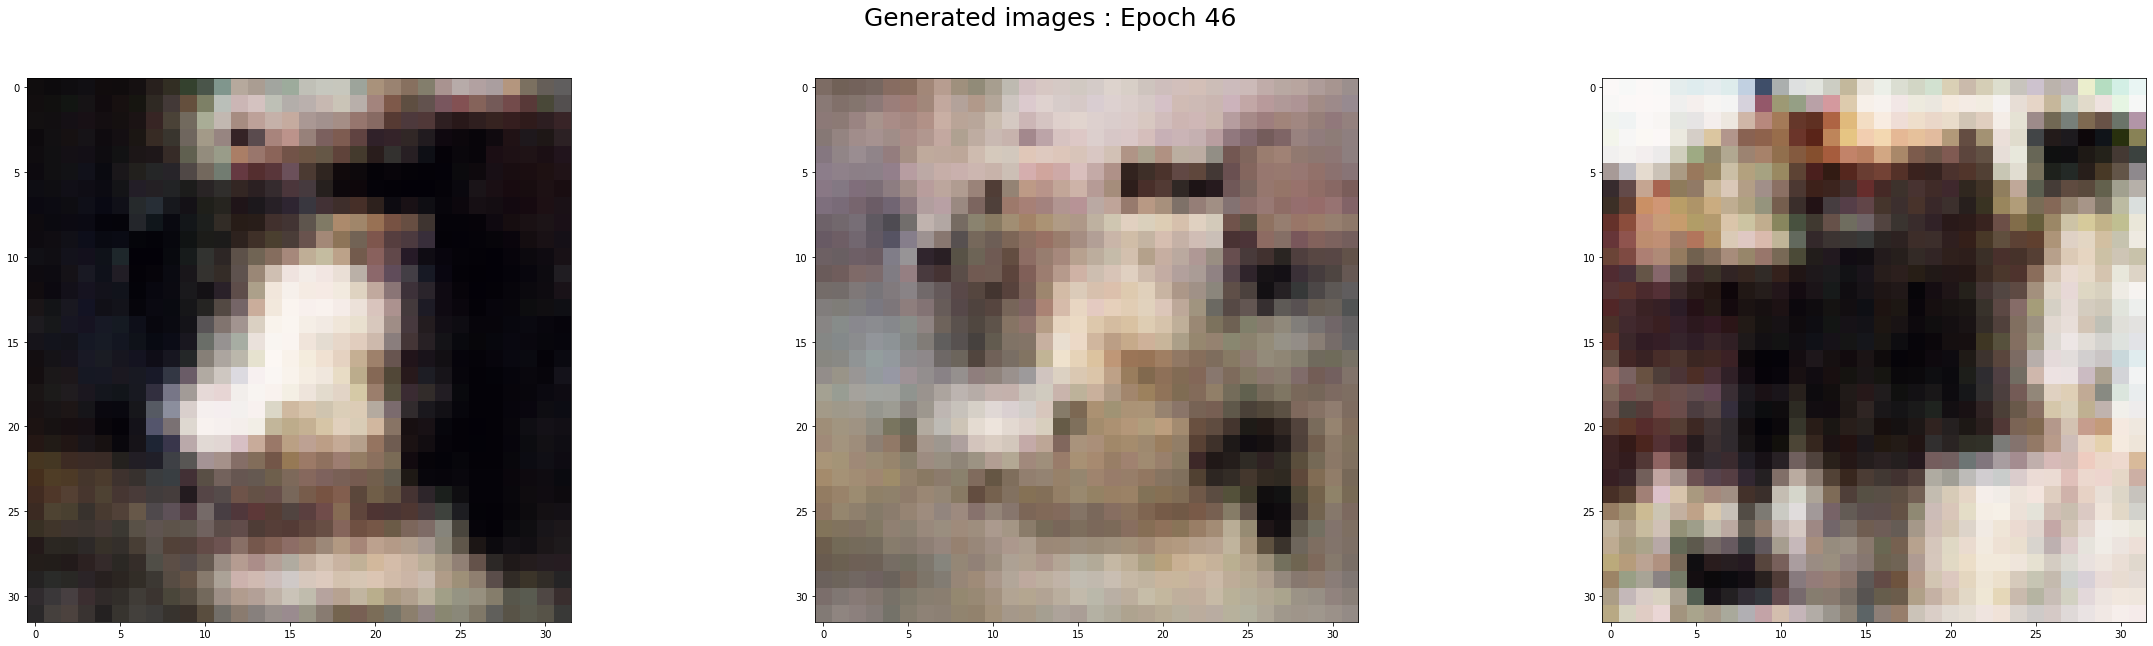

---------------------------------------------------------------
epoch :  47  d_loss_accuracy  =  [0.6023527979850769, 0.6875]  g_loss =  0.6588724851608276


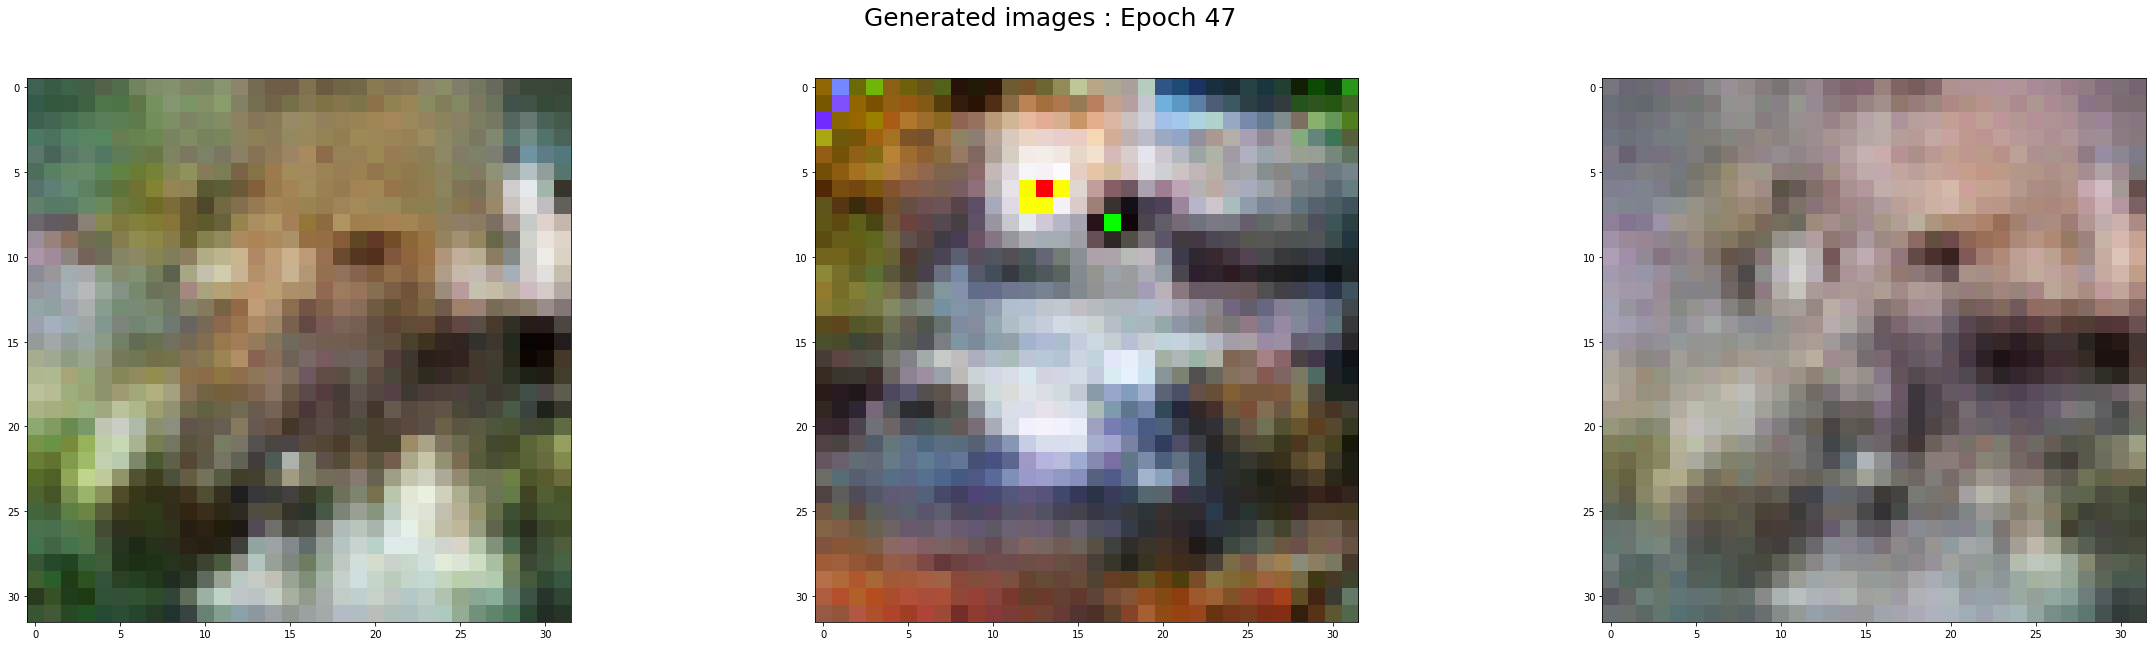

---------------------------------------------------------------
epoch :  48  d_loss_accuracy  =  [0.5136919021606445, 0.73046875]  g_loss =  1.295528531074524


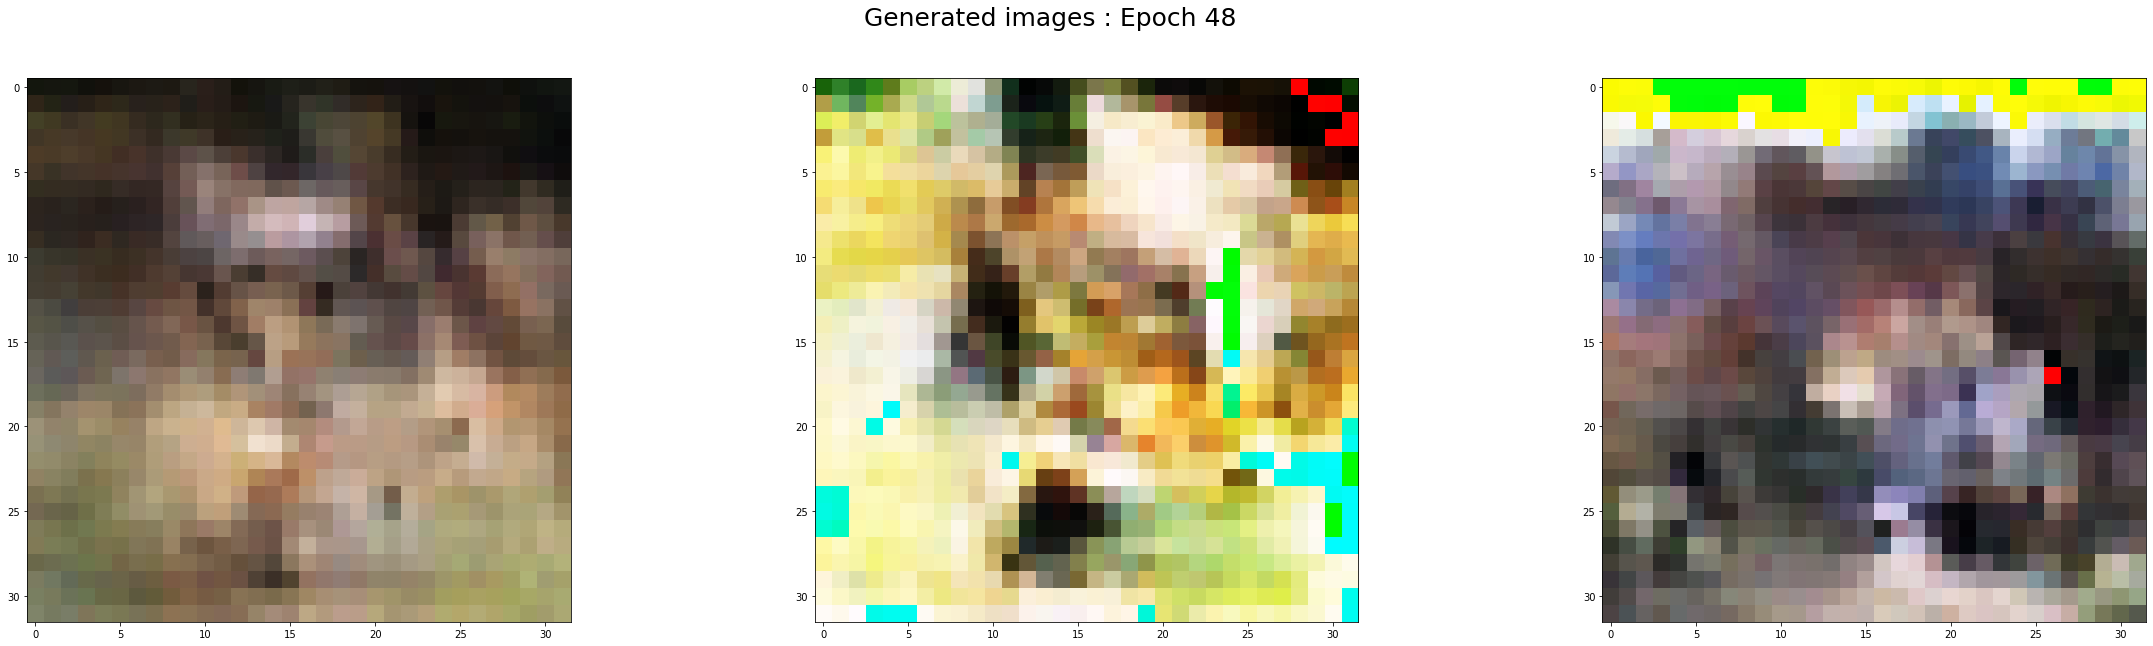

---------------------------------------------------------------
epoch :  49  d_loss_accuracy  =  [0.6164025068283081, 0.66015625]  g_loss =  0.7462828159332275


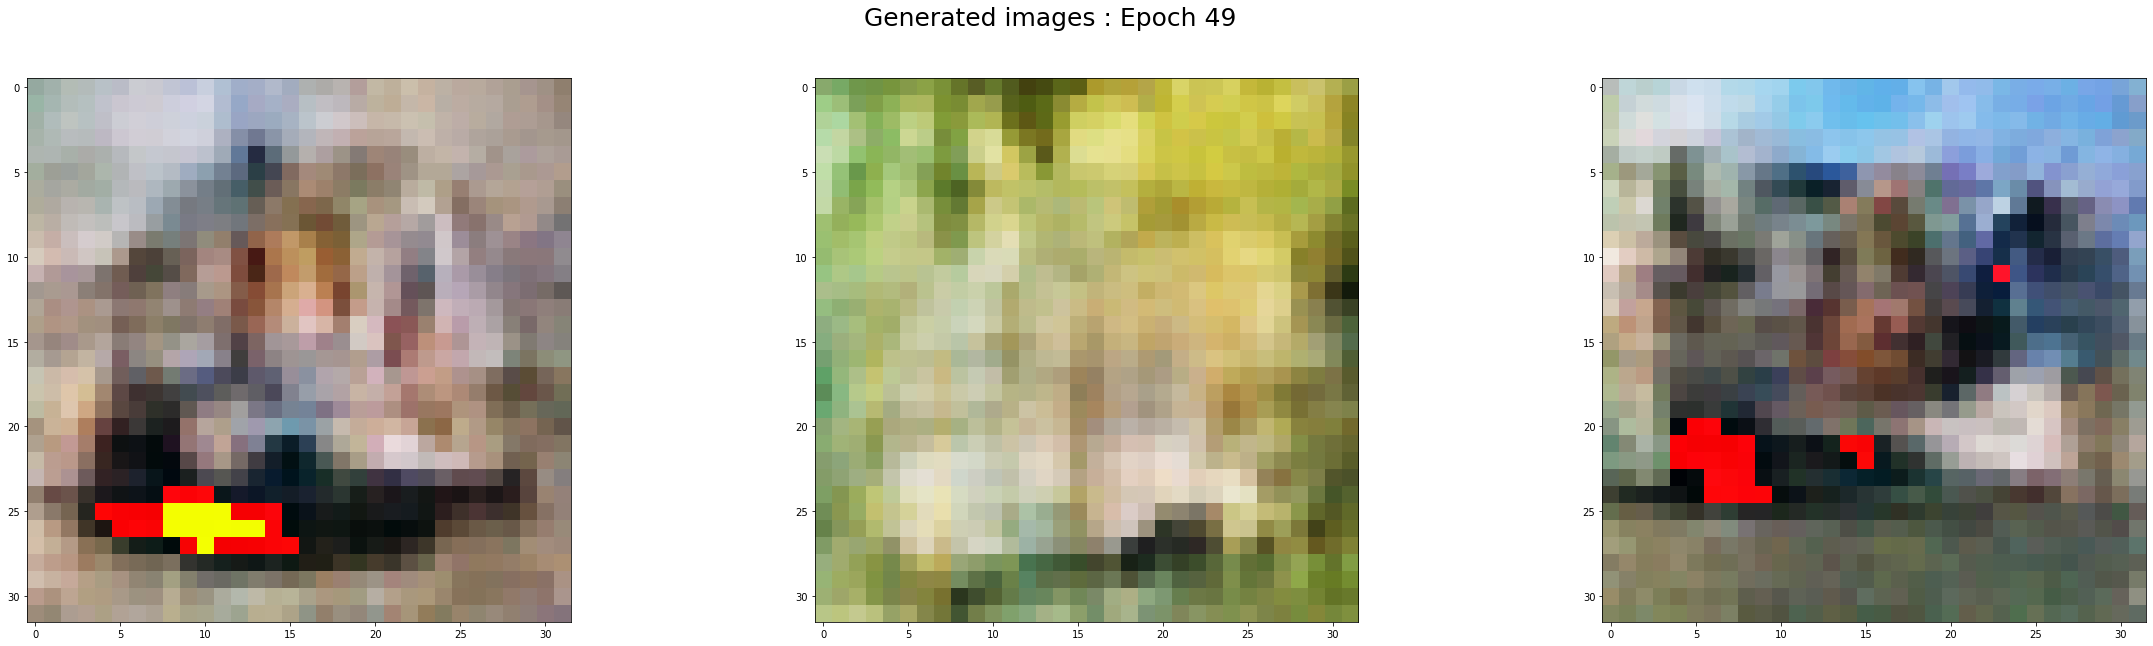

---------------------------------------------------------------
epoch :  50  d_loss_accuracy  =  [0.5697087049484253, 0.703125]  g_loss =  0.9742972254753113


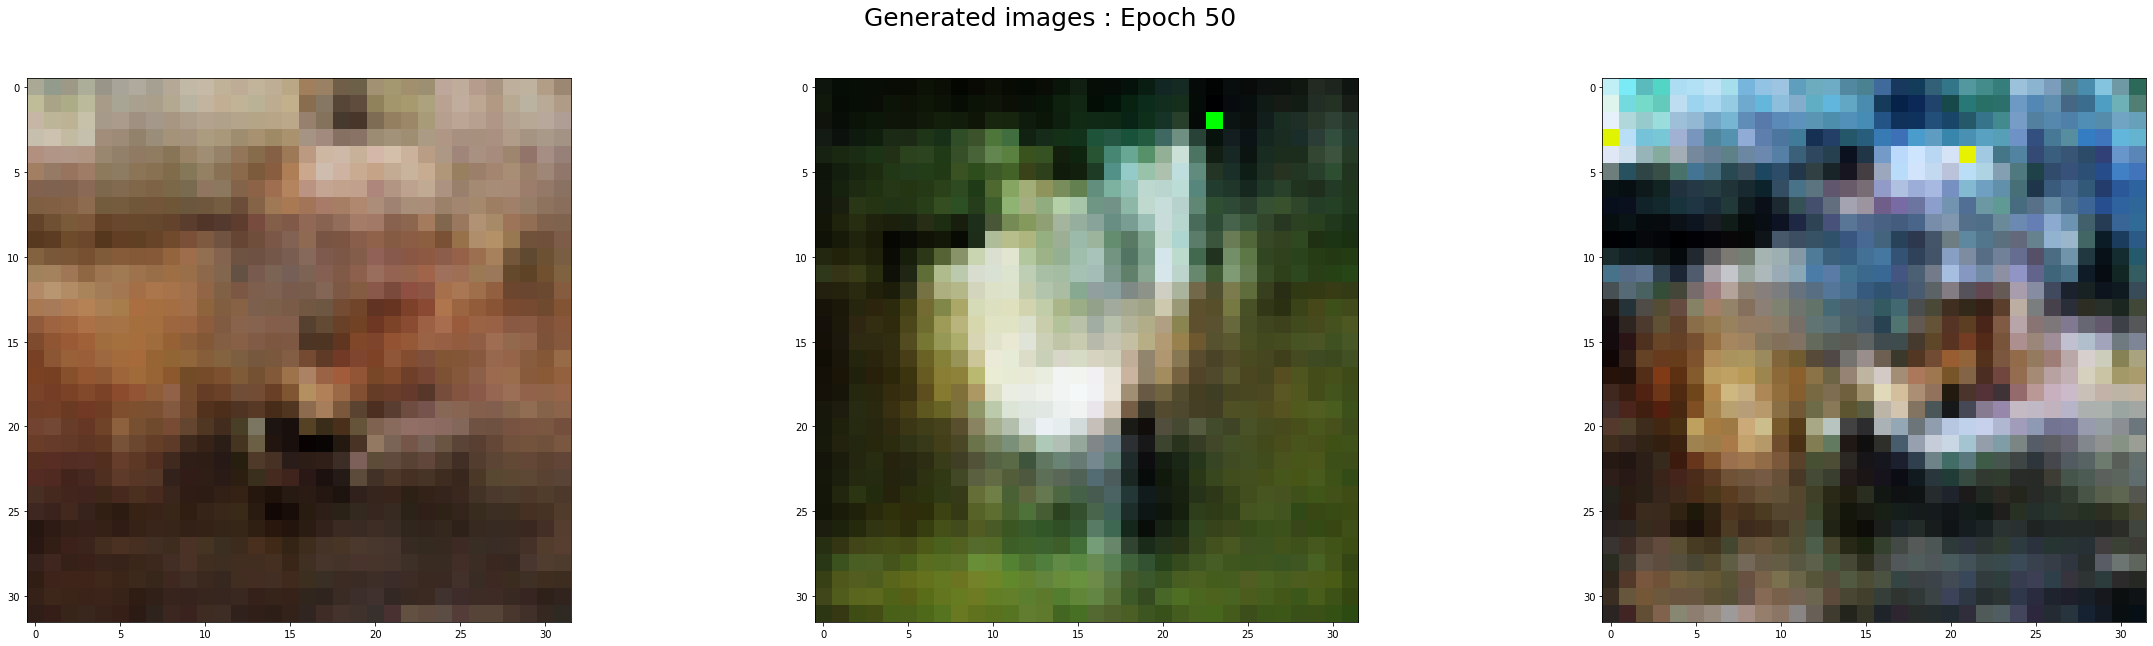

---------------------------------------------------------------
epoch :  51  d_loss_accuracy  =  [0.4486679434776306, 0.80859375]  g_loss =  0.8134939670562744


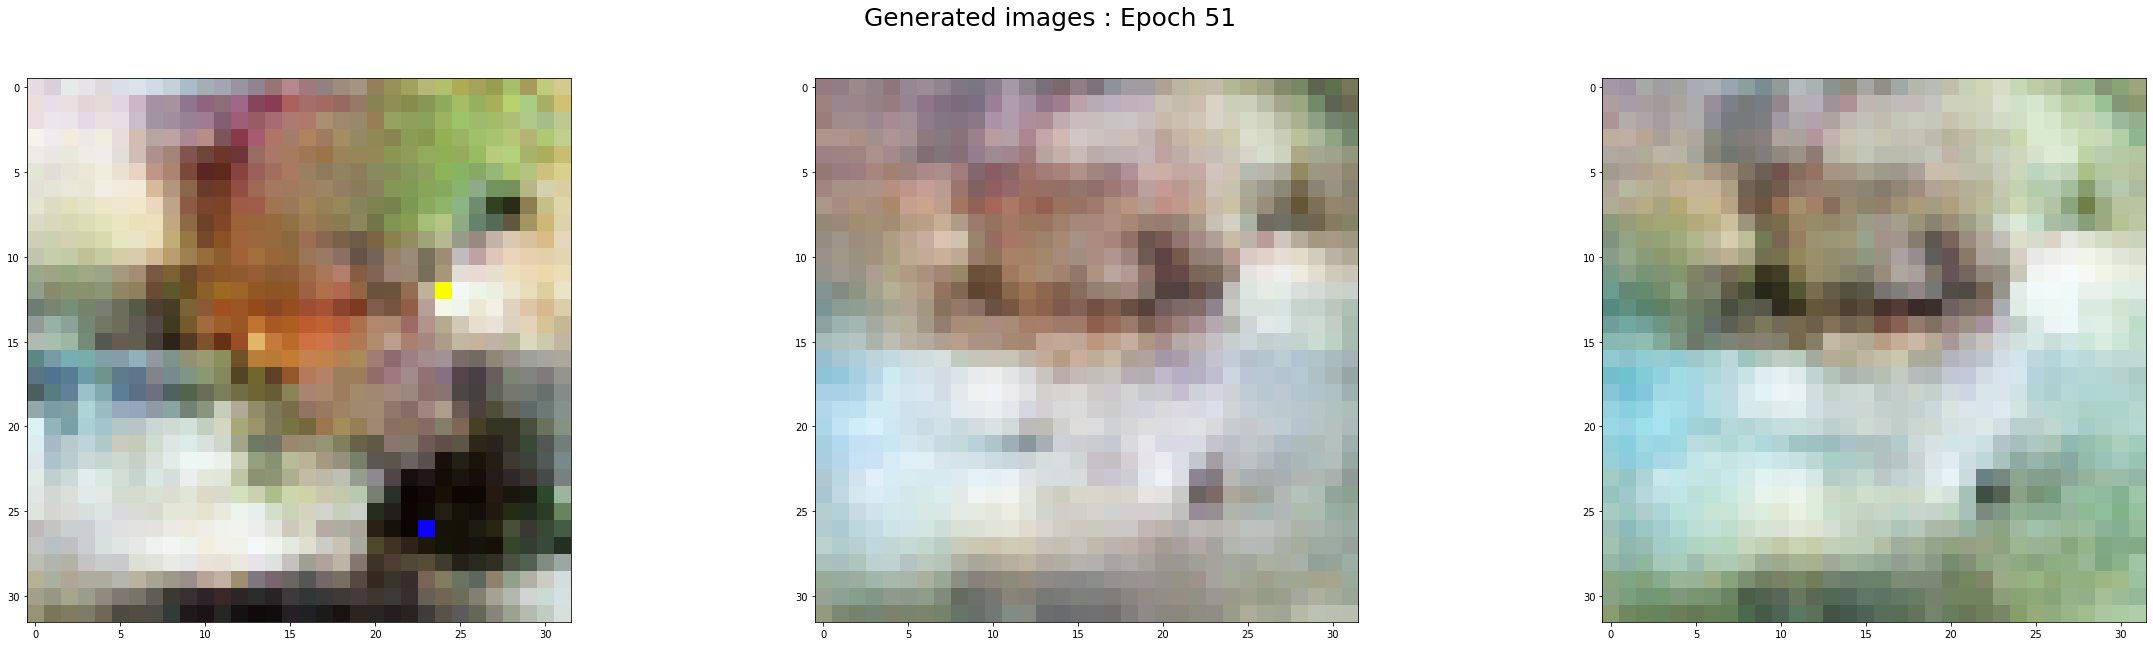

---------------------------------------------------------------
epoch :  52  d_loss_accuracy  =  [0.7603189945220947, 0.66796875]  g_loss =  1.3820877075195312


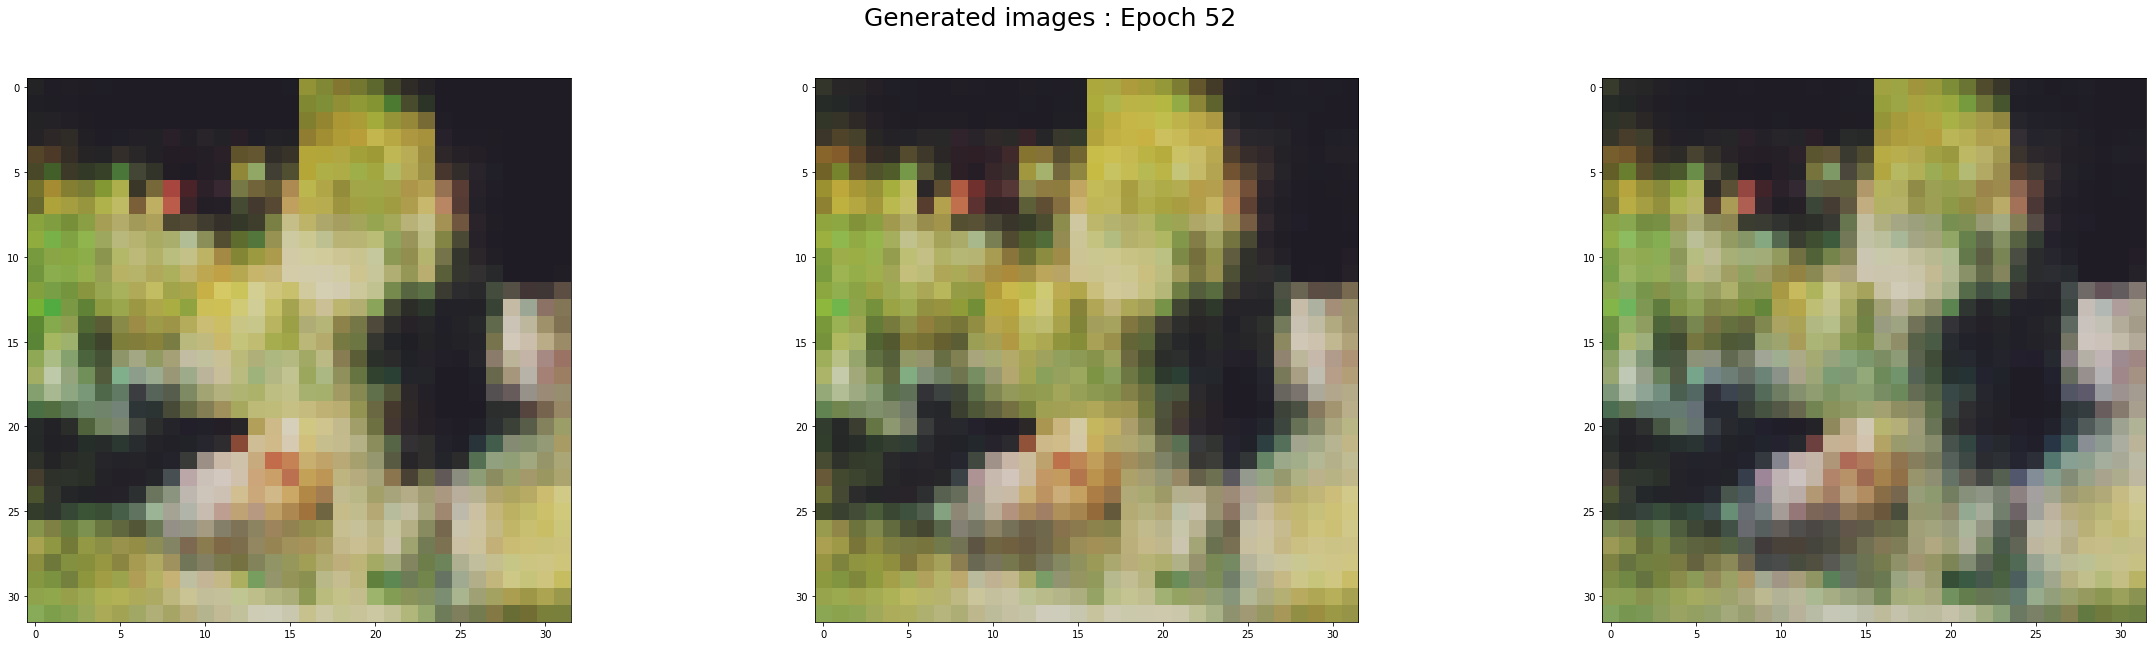

---------------------------------------------------------------
epoch :  53  d_loss_accuracy  =  [0.39388519525527954, 0.859375]  g_loss =  1.815388798713684


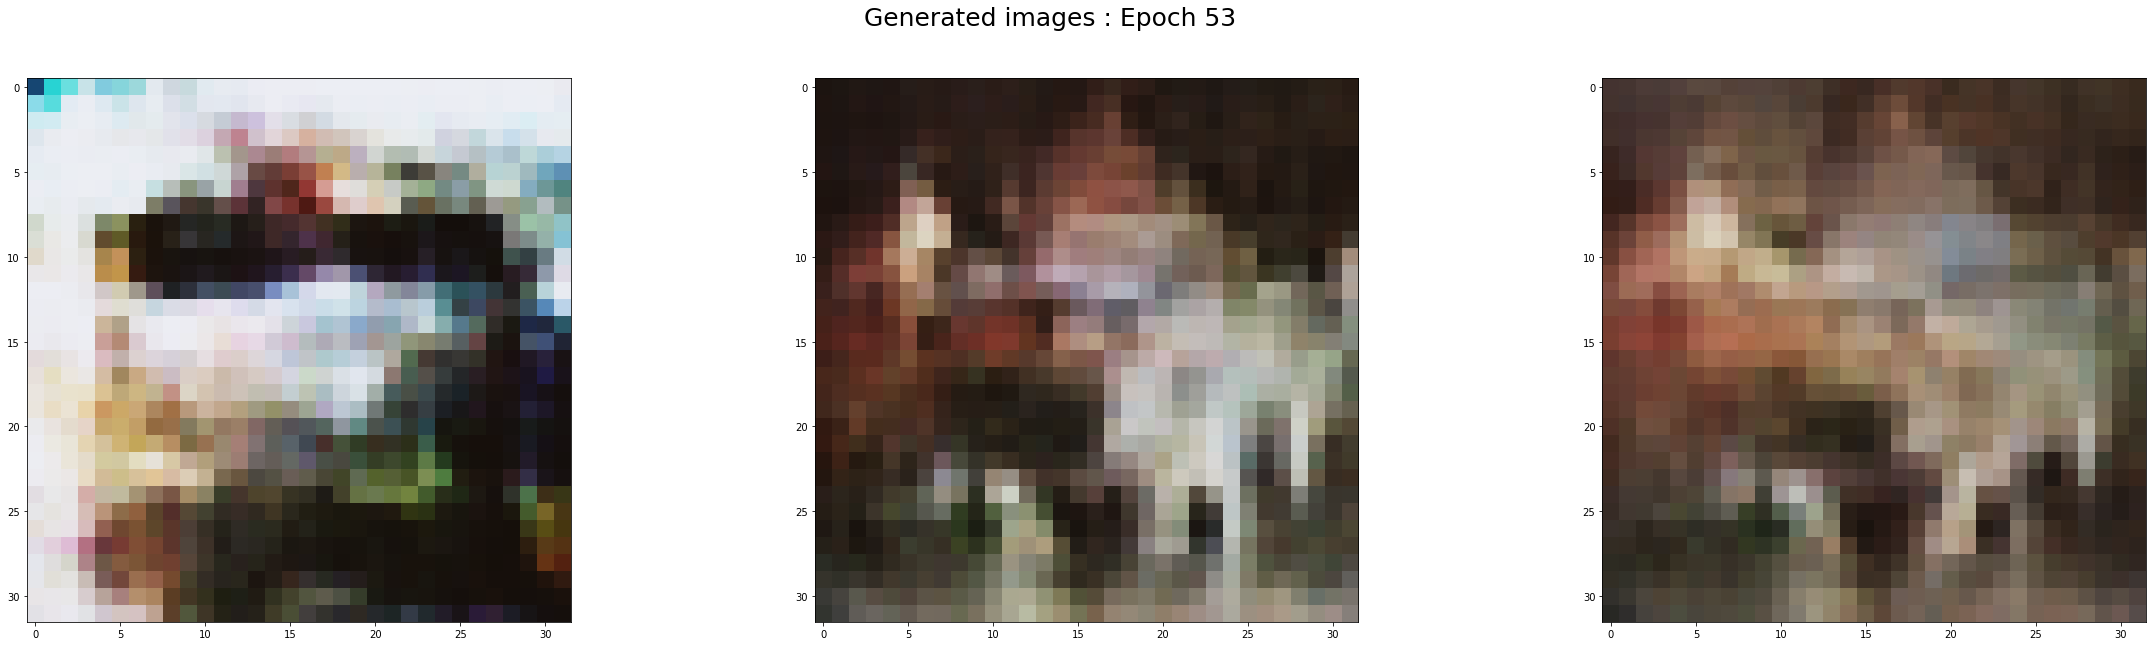

---------------------------------------------------------------
epoch :  54  d_loss_accuracy  =  [0.6450391411781311, 0.609375]  g_loss =  1.4941787719726562


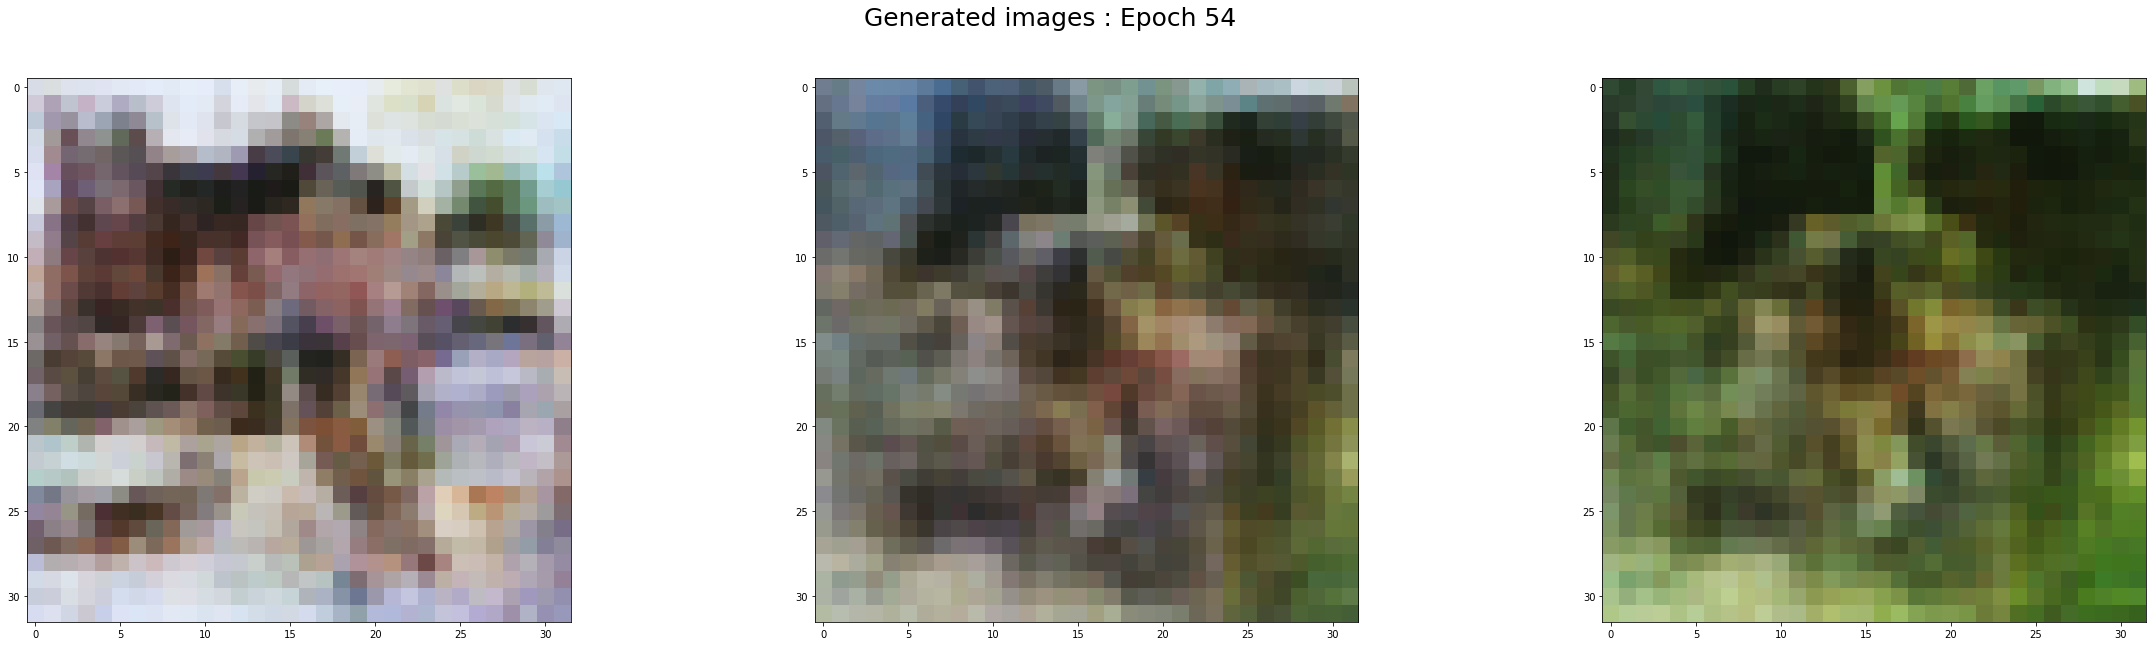

---------------------------------------------------------------
epoch :  55  d_loss_accuracy  =  [0.9986462593078613, 0.51171875]  g_loss =  0.8446974754333496


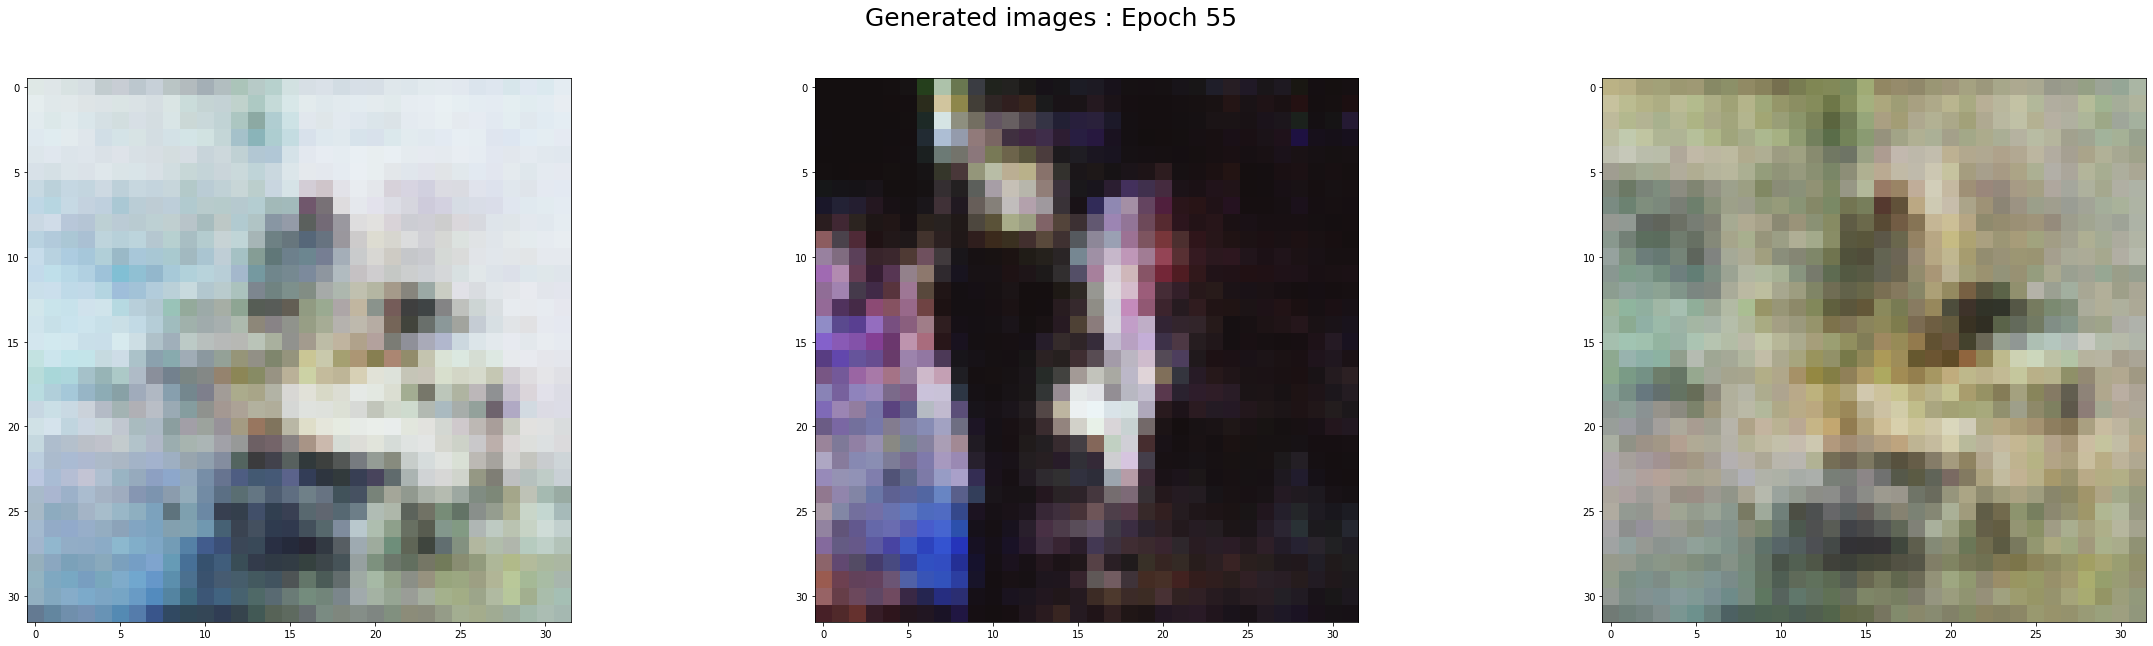

---------------------------------------------------------------
epoch :  56  d_loss_accuracy  =  [0.415930837392807, 0.79296875]  g_loss =  1.3953310251235962


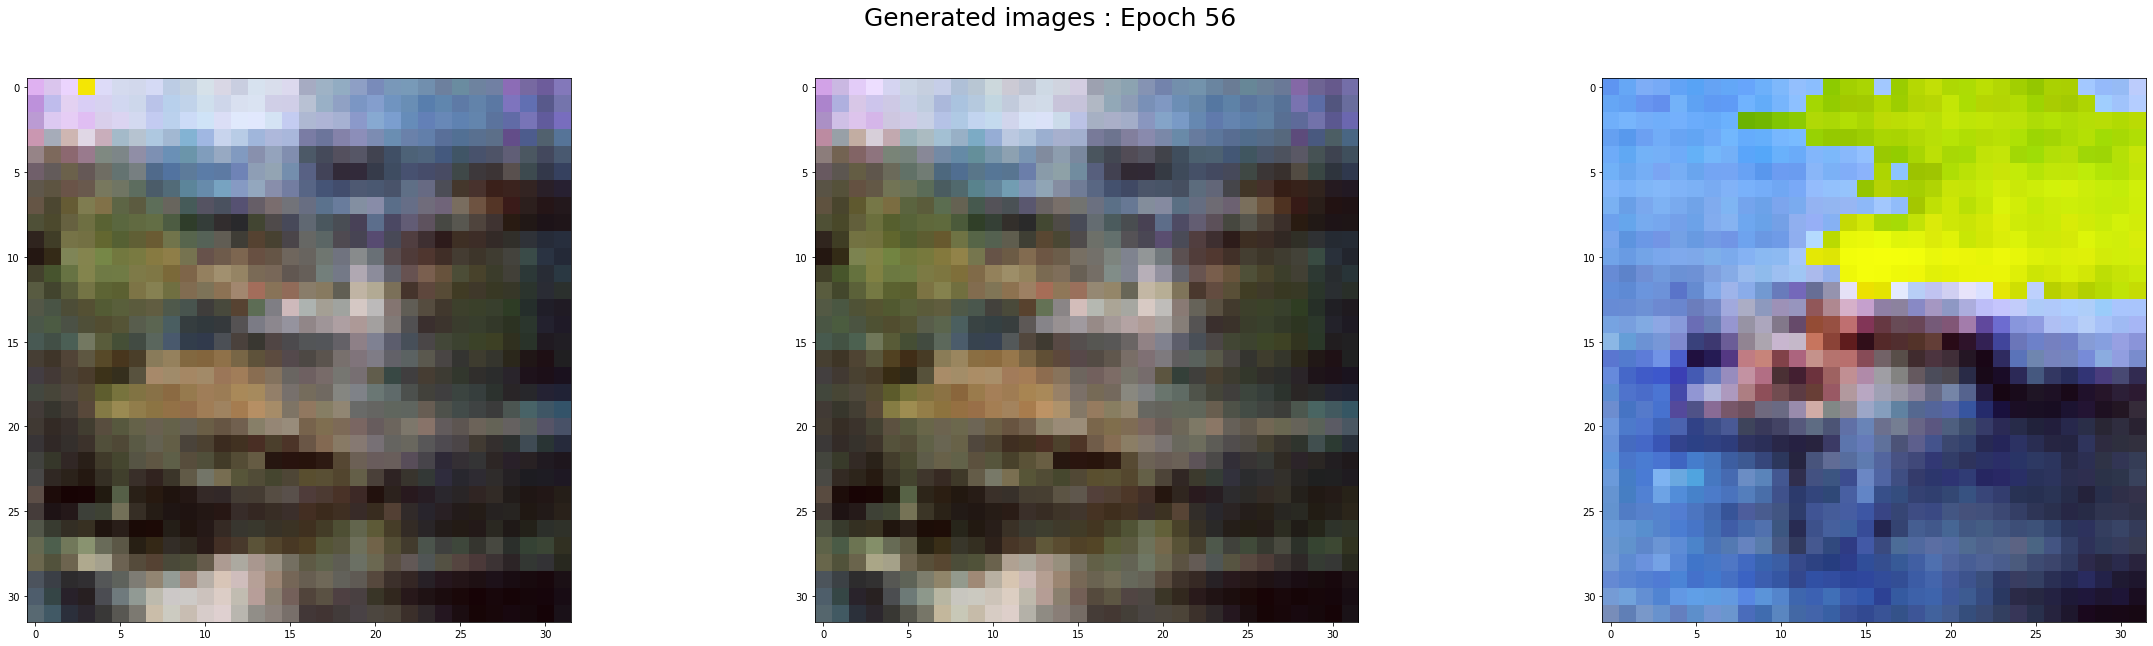

---------------------------------------------------------------
epoch :  57  d_loss_accuracy  =  [0.4711686968803406, 0.7578125]  g_loss =  1.5887165069580078


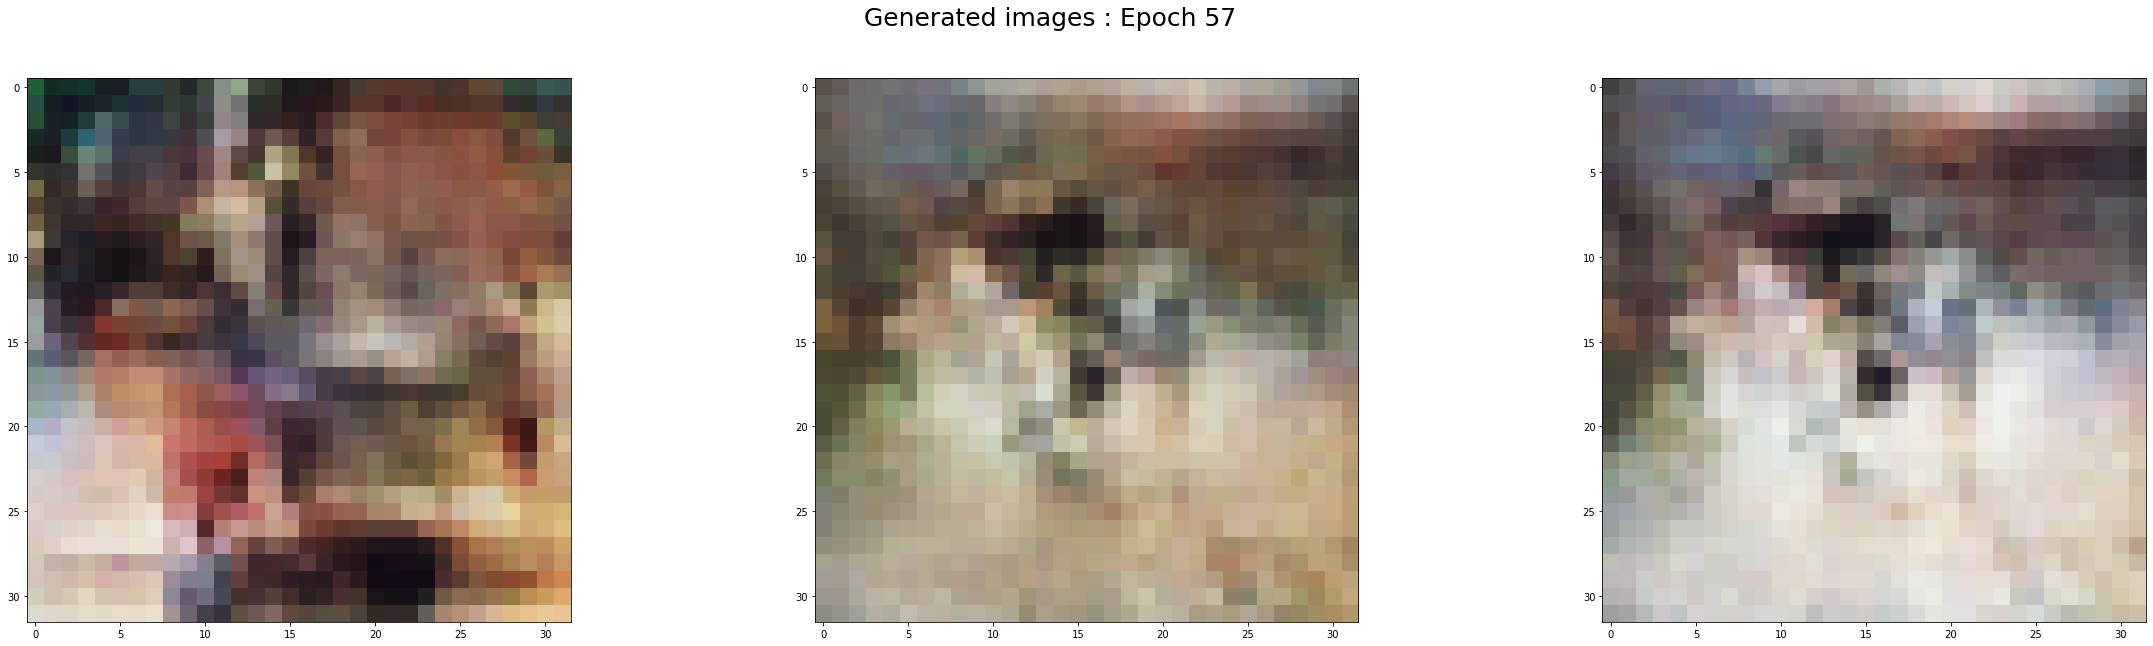

---------------------------------------------------------------
epoch :  58  d_loss_accuracy  =  [0.28055012226104736, 0.9140625]  g_loss =  1.2489781379699707


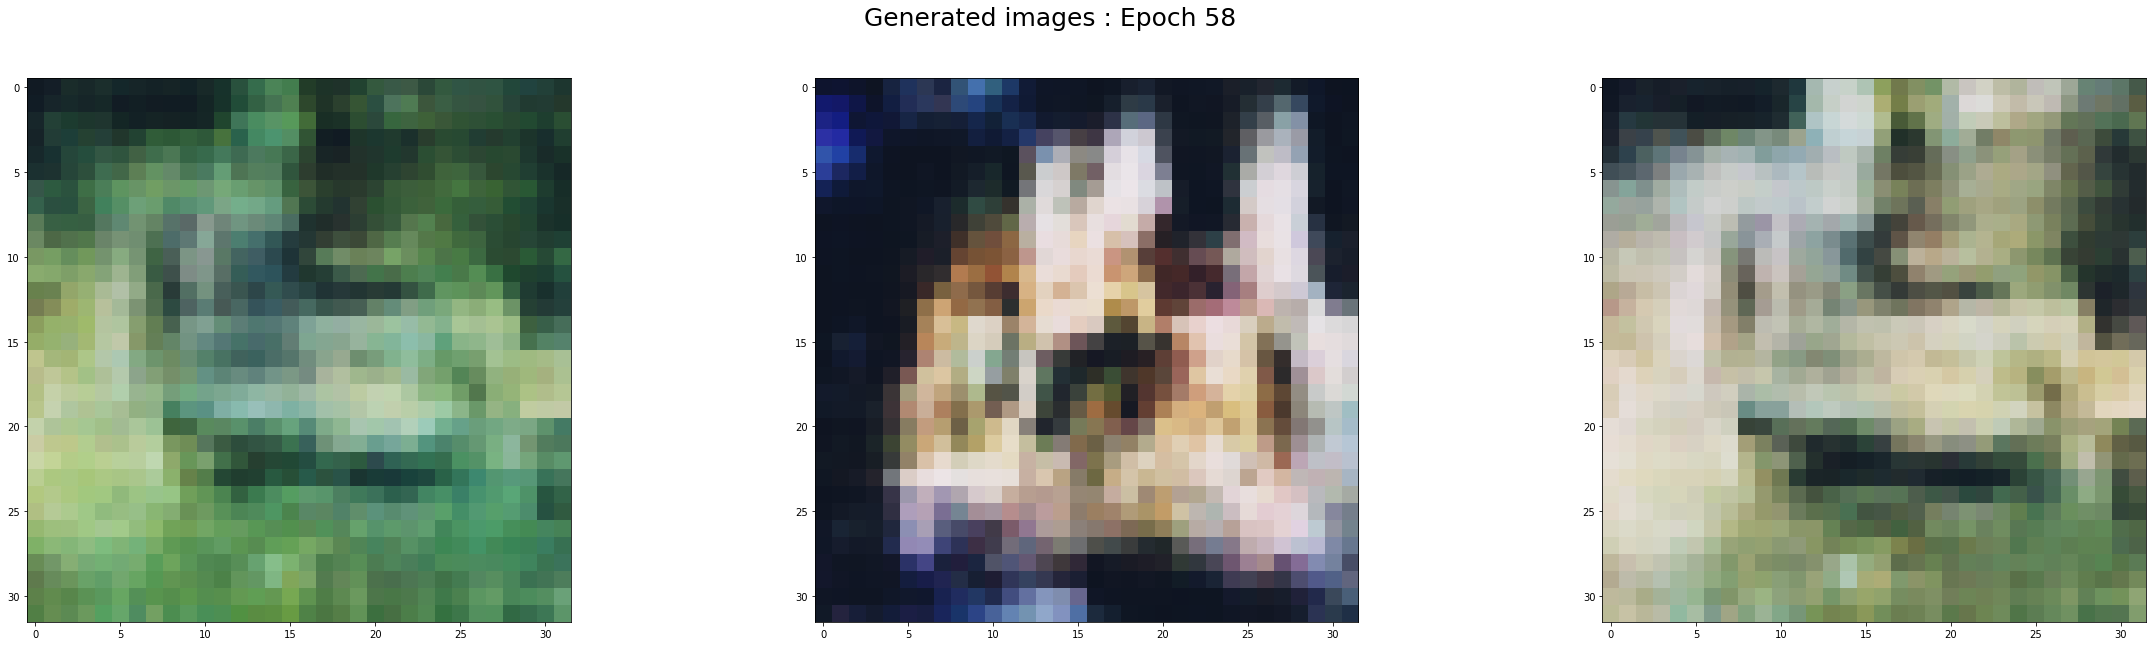

---------------------------------------------------------------
epoch :  59  d_loss_accuracy  =  [0.4878120422363281, 0.78125]  g_loss =  0.24932771921157837


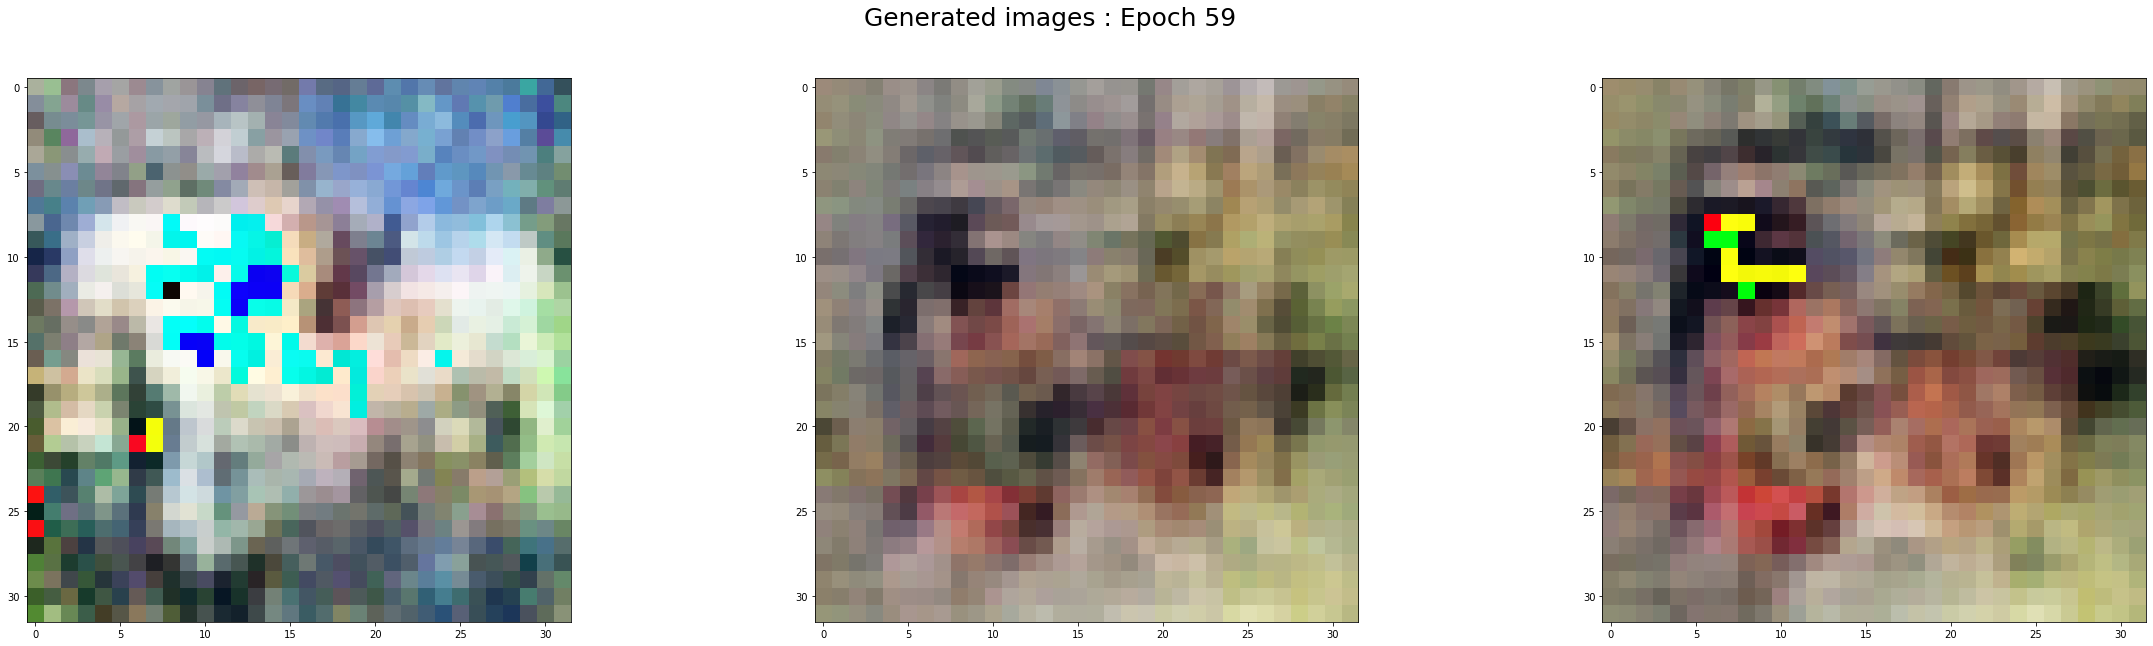

---------------------------------------------------------------
epoch :  60  d_loss_accuracy  =  [0.888515293598175, 0.64453125]  g_loss =  0.8061113953590393


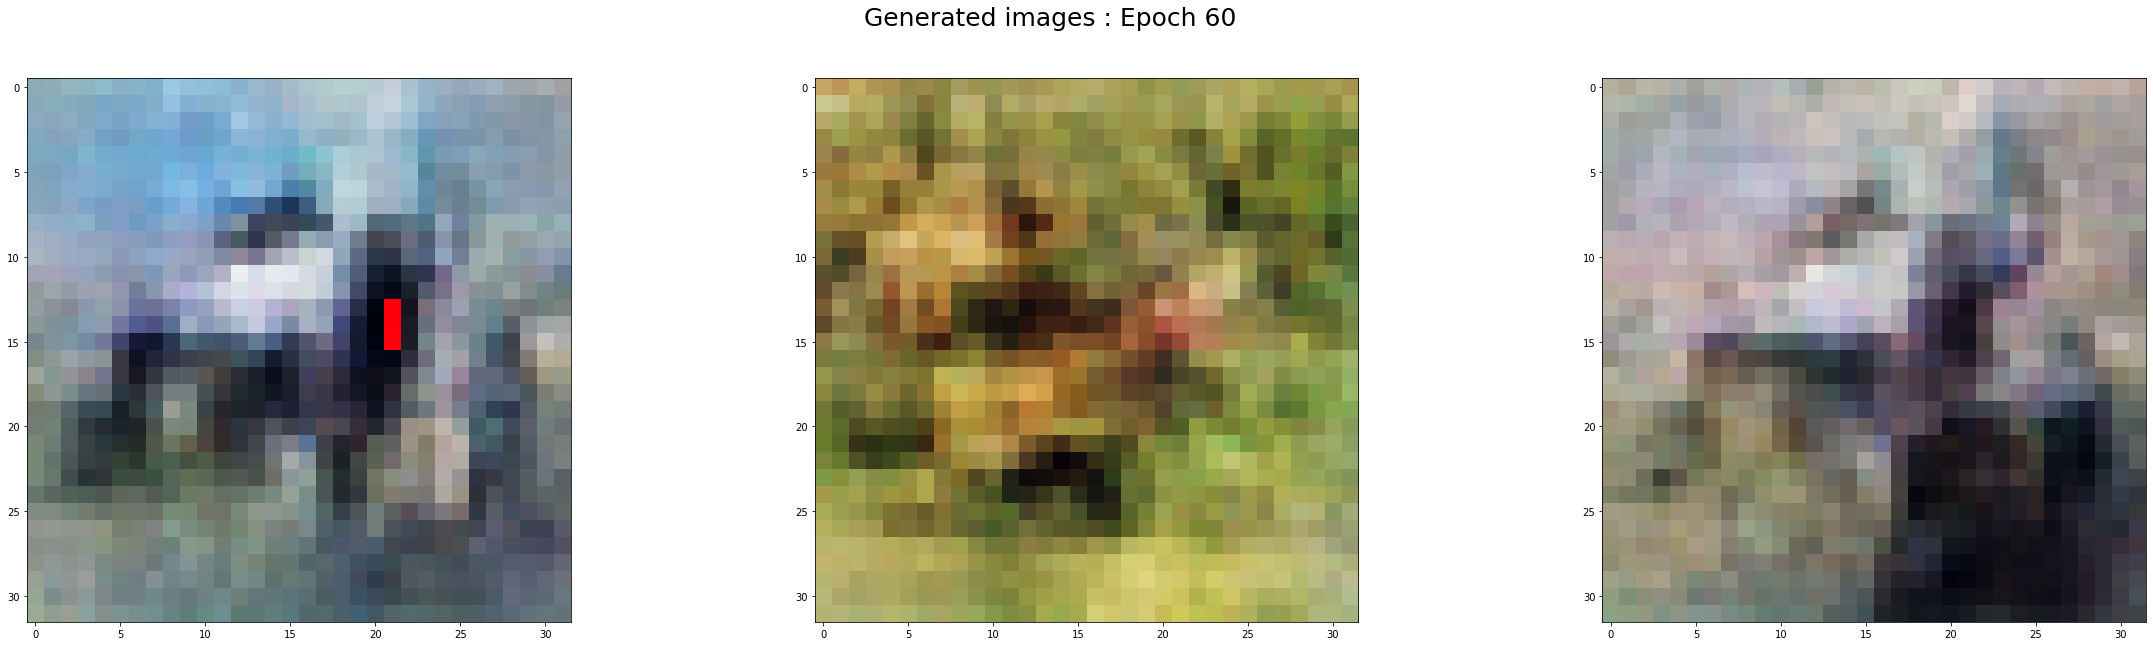

---------------------------------------------------------------
epoch :  61  d_loss_accuracy  =  [0.31539732217788696, 0.87890625]  g_loss =  0.6931368112564087


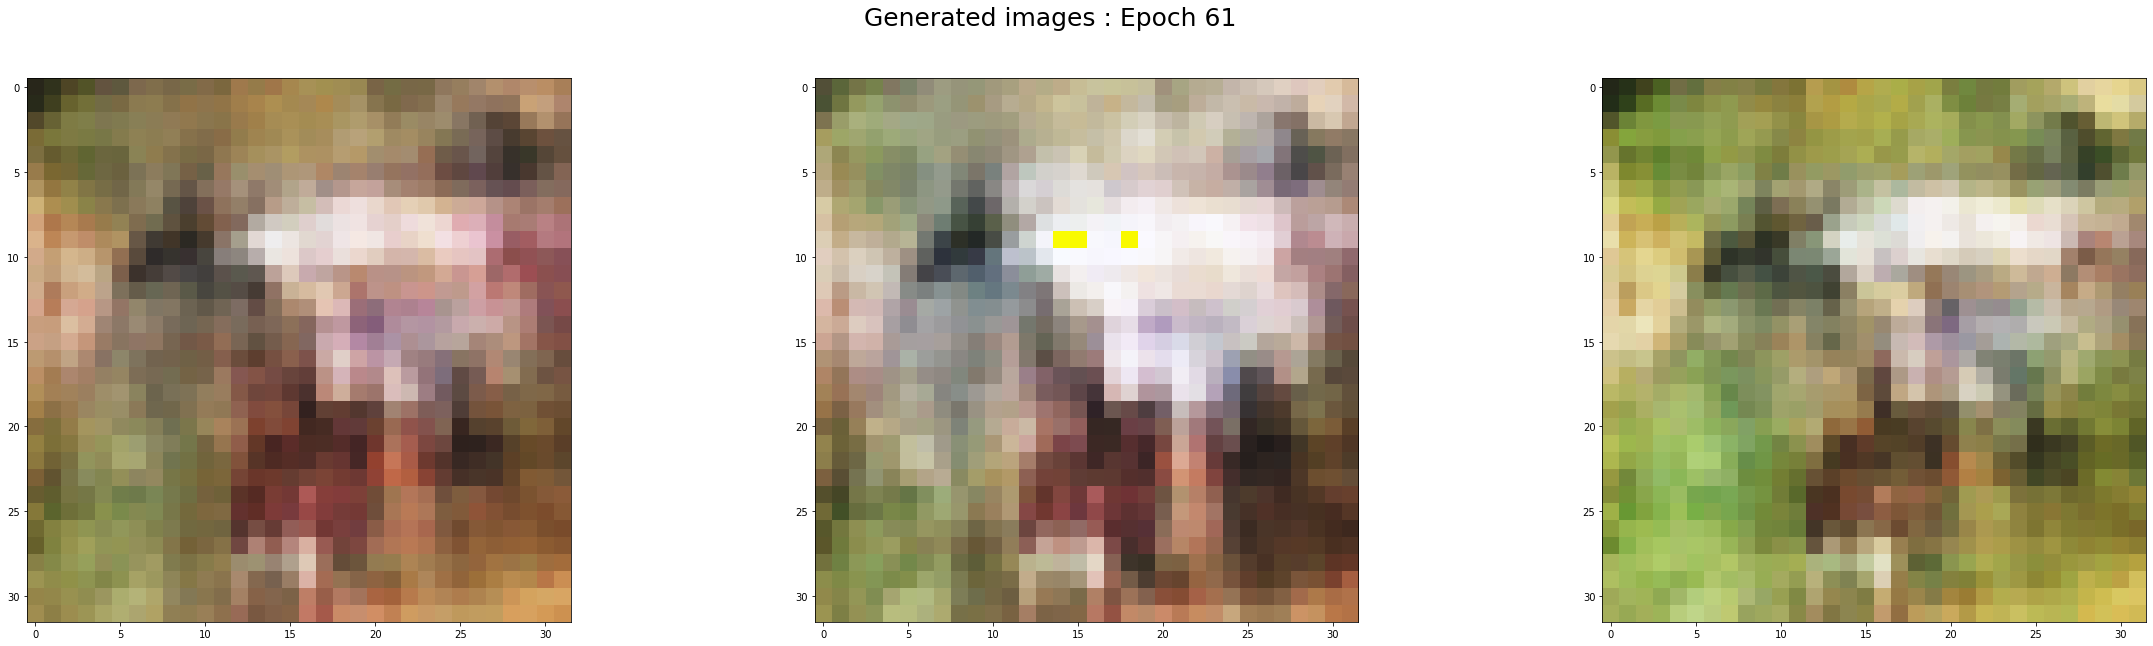

---------------------------------------------------------------
epoch :  62  d_loss_accuracy  =  [0.7806261777877808, 0.62109375]  g_loss =  1.0082430839538574


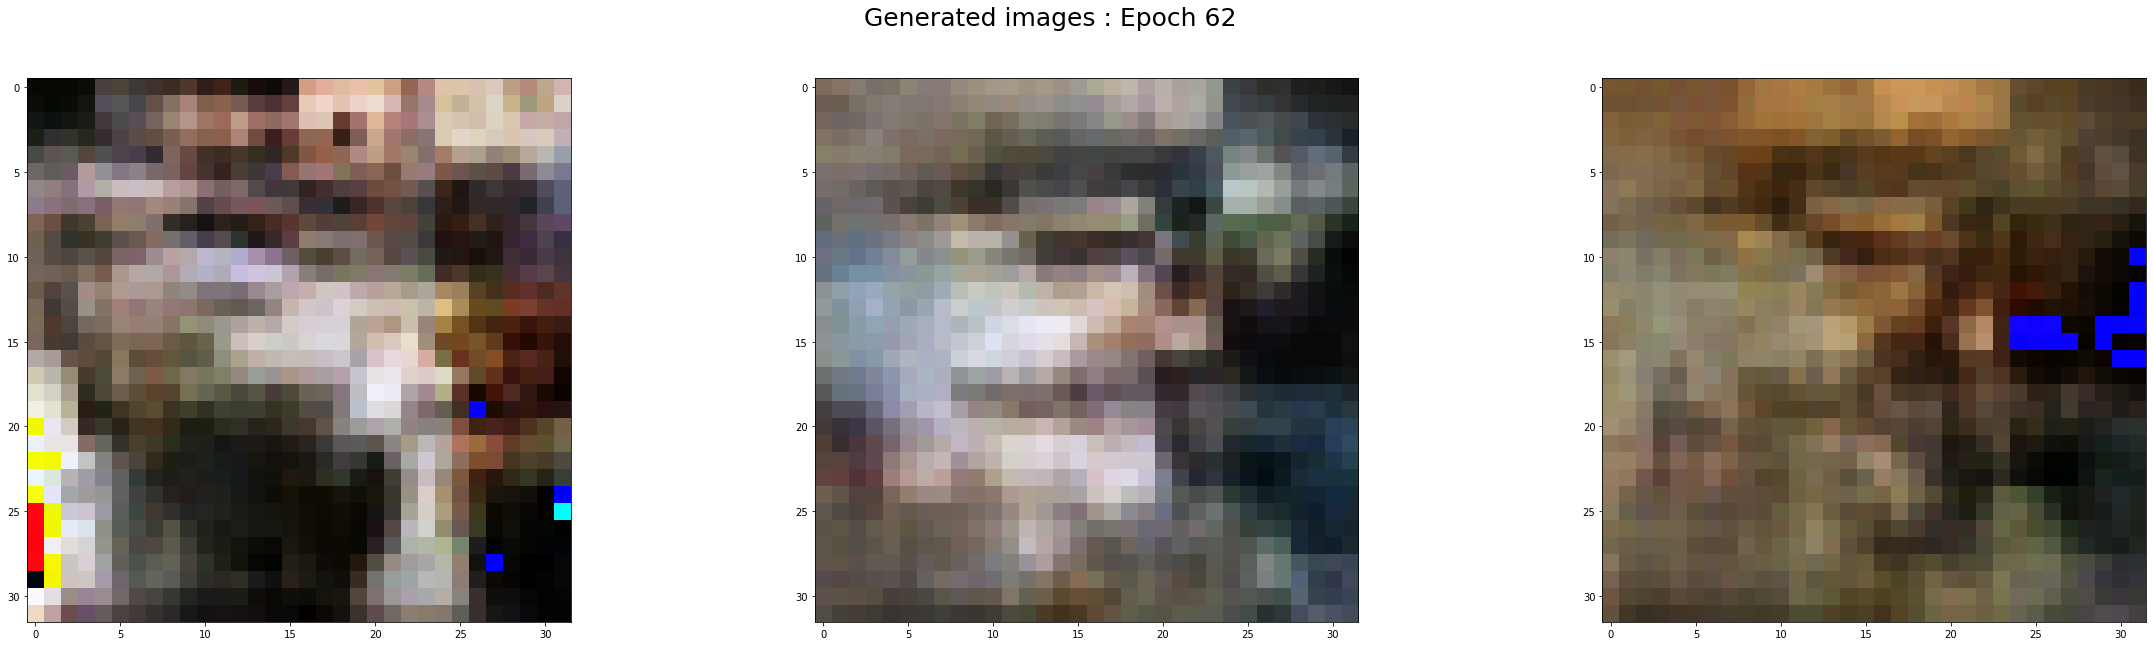

---------------------------------------------------------------
epoch :  63  d_loss_accuracy  =  [0.2452654242515564, 0.91015625]  g_loss =  0.16326609253883362


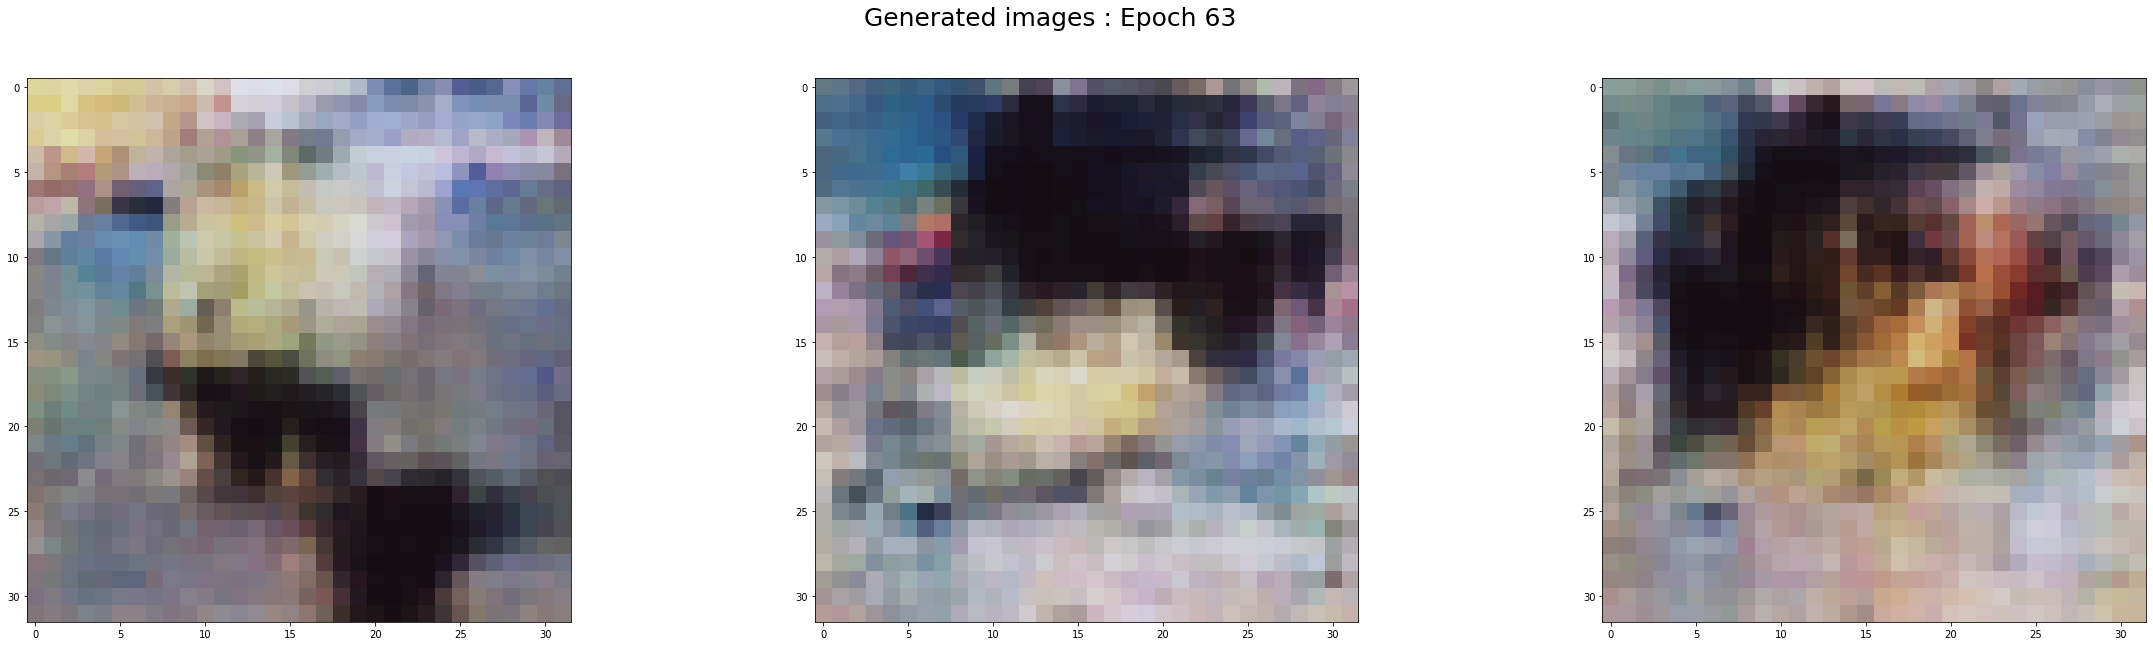

---------------------------------------------------------------
epoch :  64  d_loss_accuracy  =  [0.27870994806289673, 0.8828125]  g_loss =  1.1327989101409912


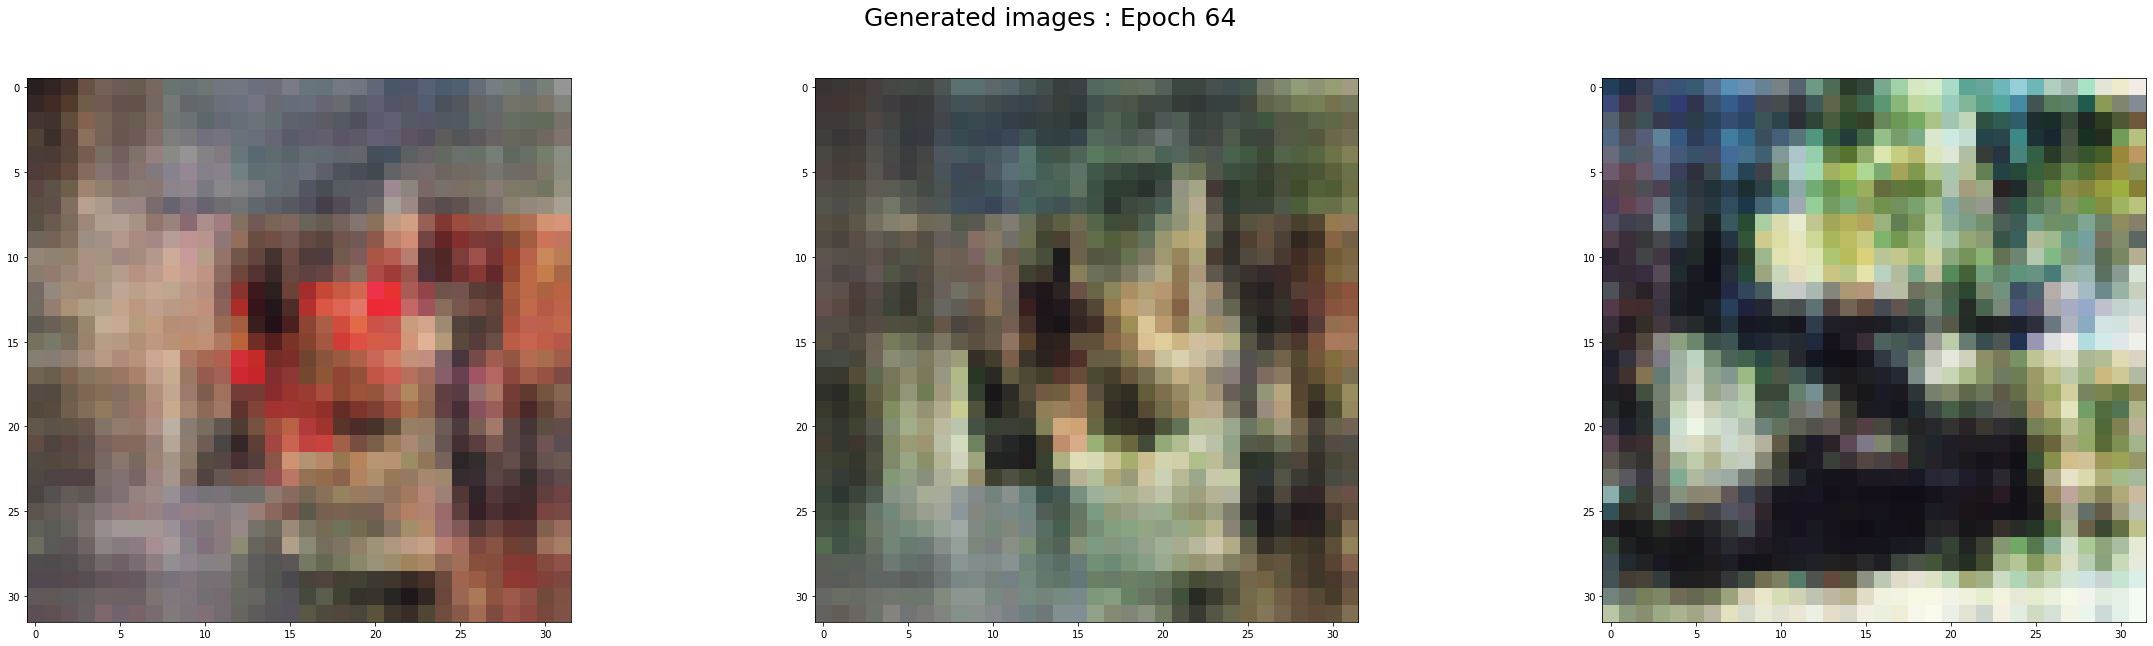

---------------------------------------------------------------
epoch :  65  d_loss_accuracy  =  [0.5112143754959106, 0.77734375]  g_loss =  0.8565274477005005


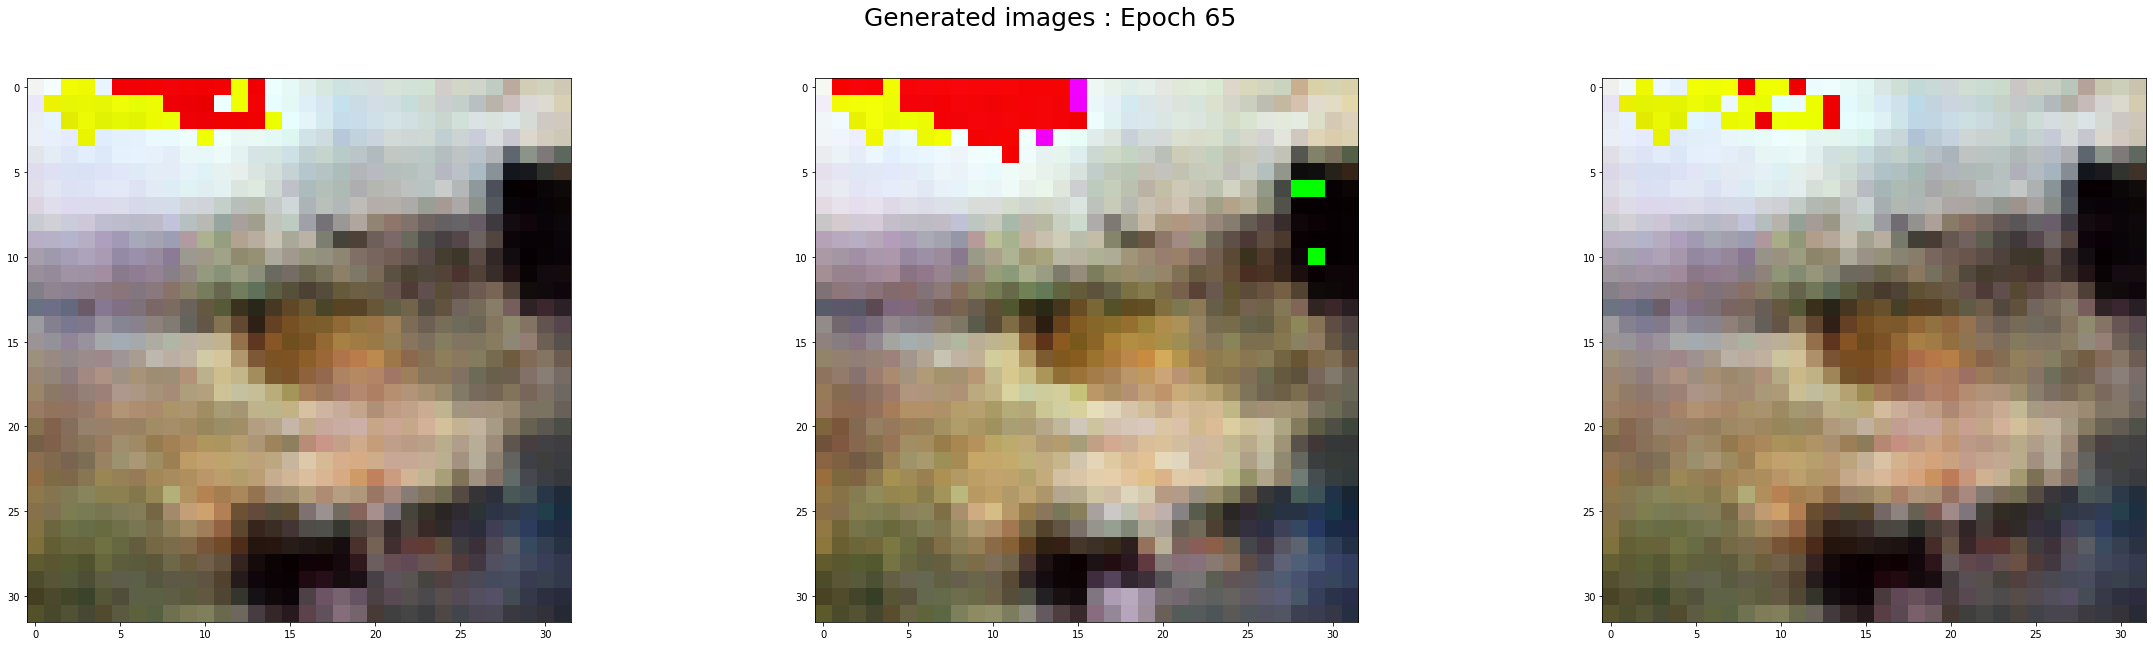

---------------------------------------------------------------
epoch :  66  d_loss_accuracy  =  [0.2667582333087921, 0.87890625]  g_loss =  2.8032898902893066


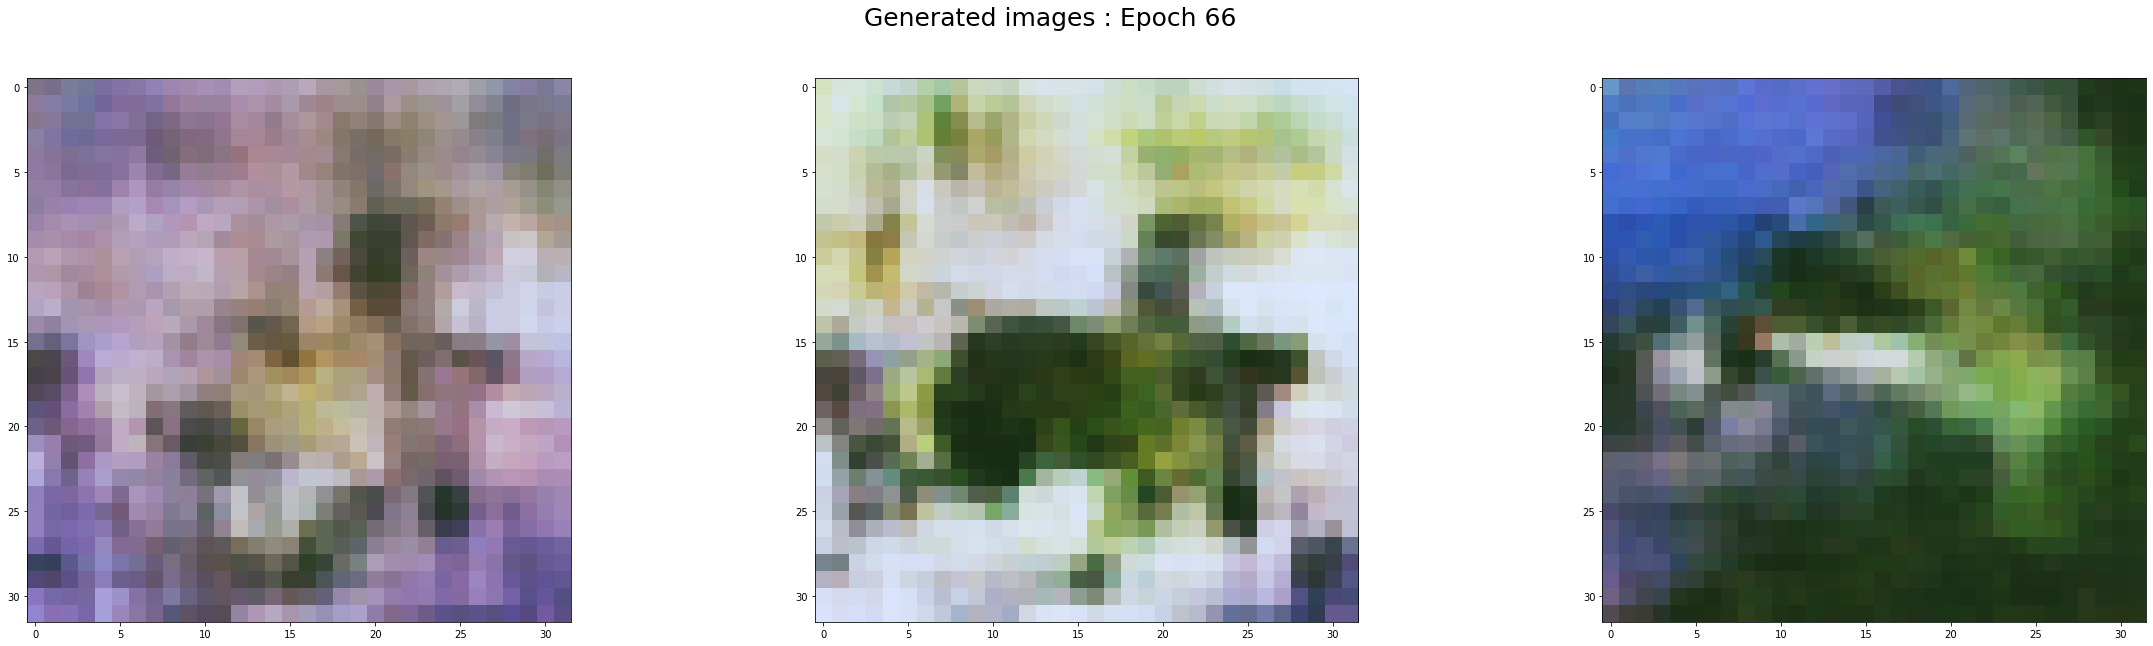

---------------------------------------------------------------
epoch :  67  d_loss_accuracy  =  [0.1749066859483719, 0.9609375]  g_loss =  1.1880486011505127


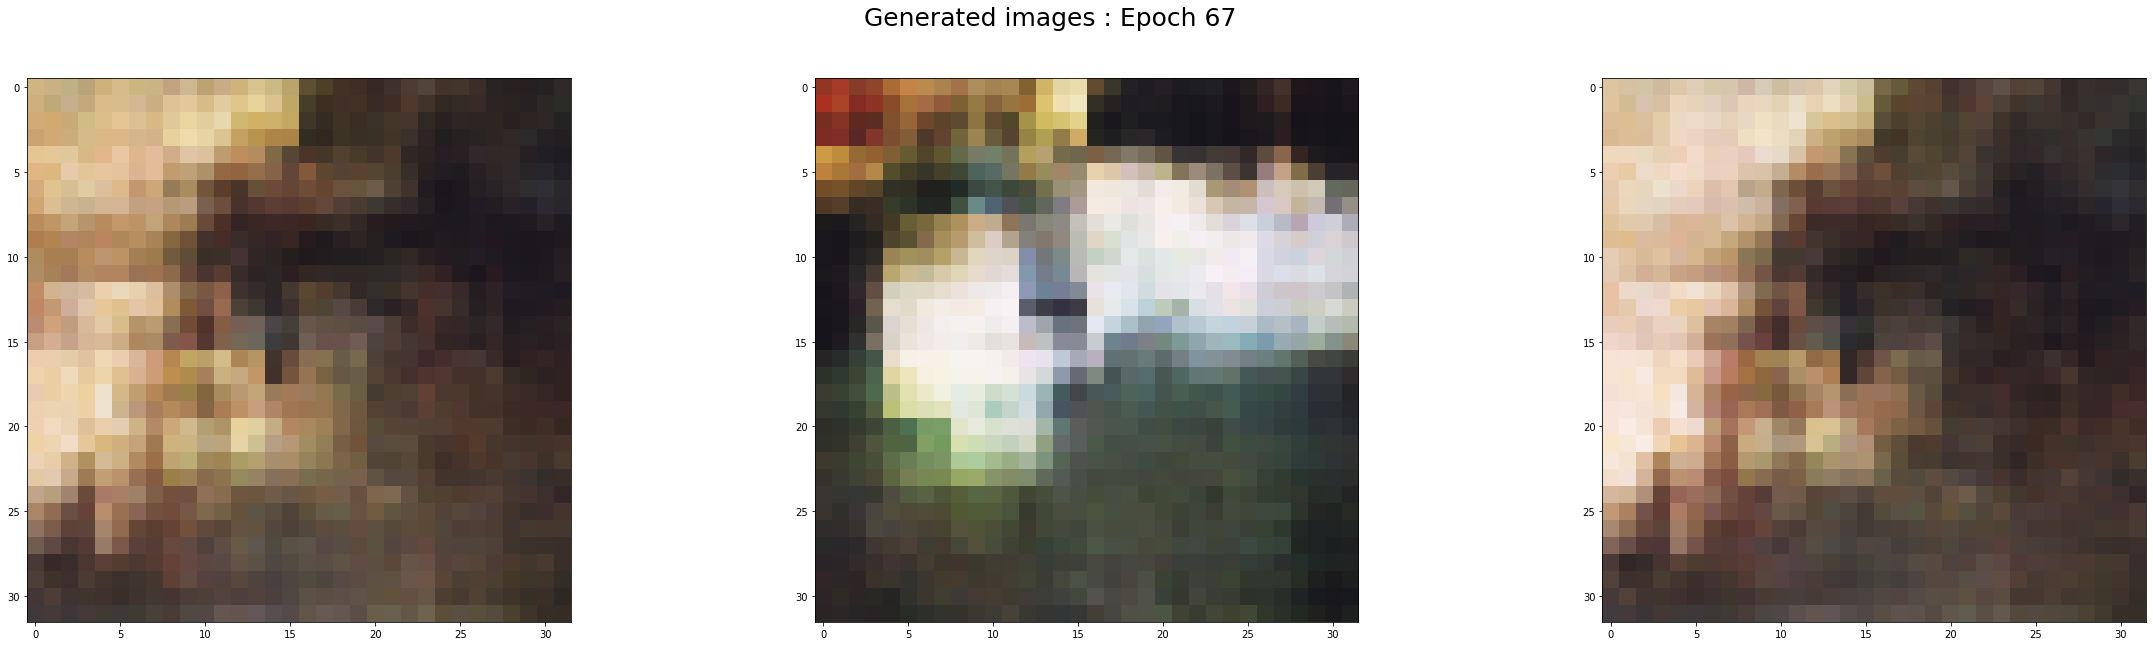

---------------------------------------------------------------
epoch :  68  d_loss_accuracy  =  [0.5447630286216736, 0.80859375]  g_loss =  0.30408334732055664


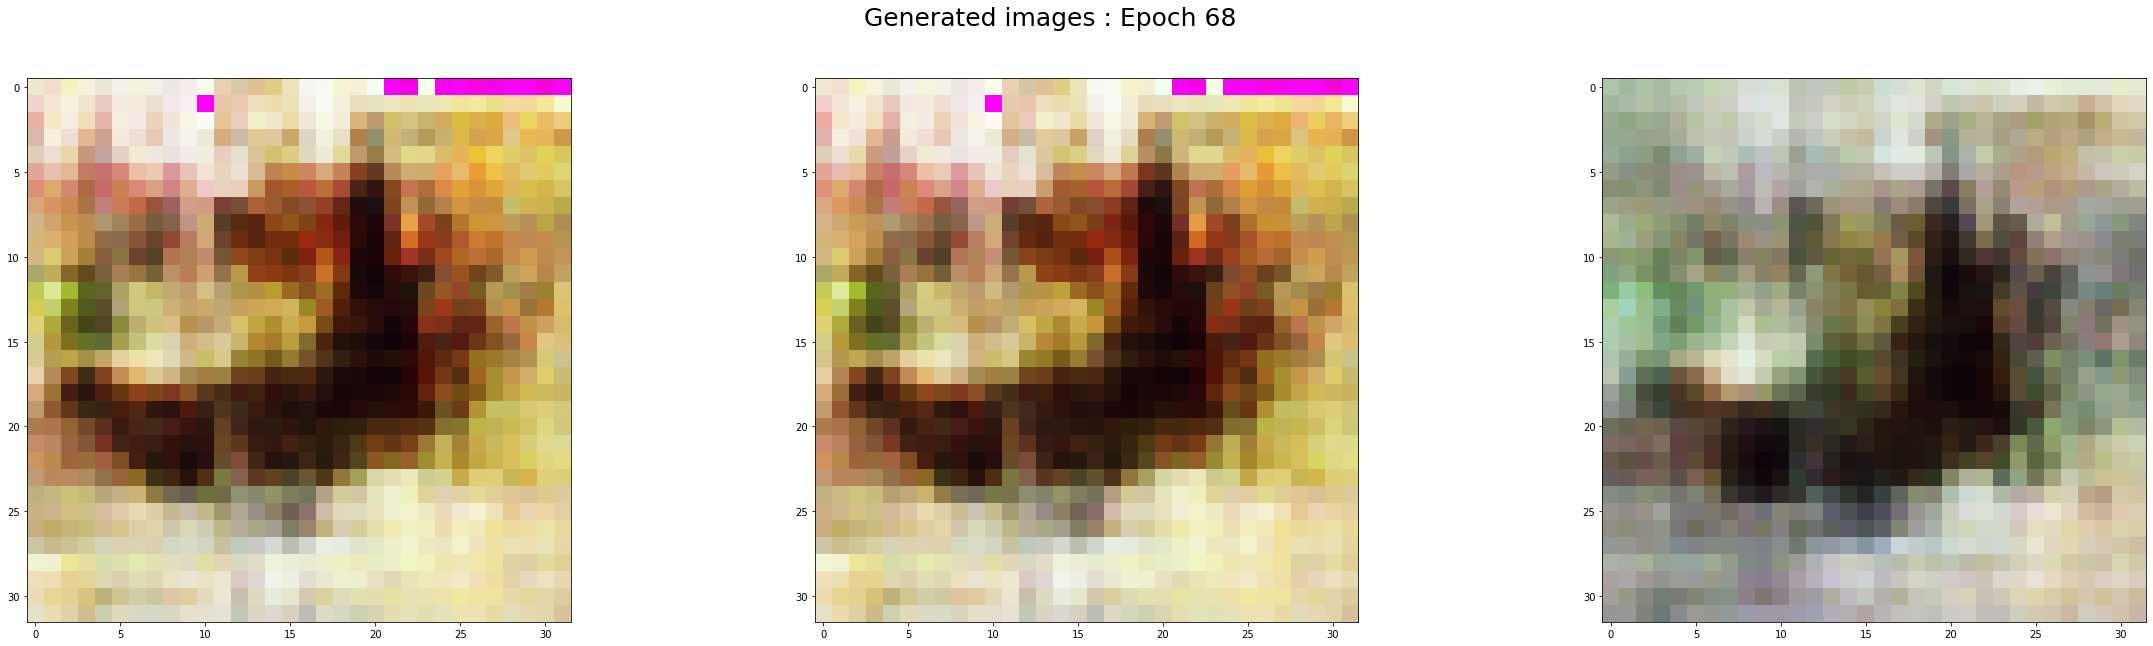

---------------------------------------------------------------
epoch :  69  d_loss_accuracy  =  [0.2337827980518341, 0.92578125]  g_loss =  1.2527077198028564


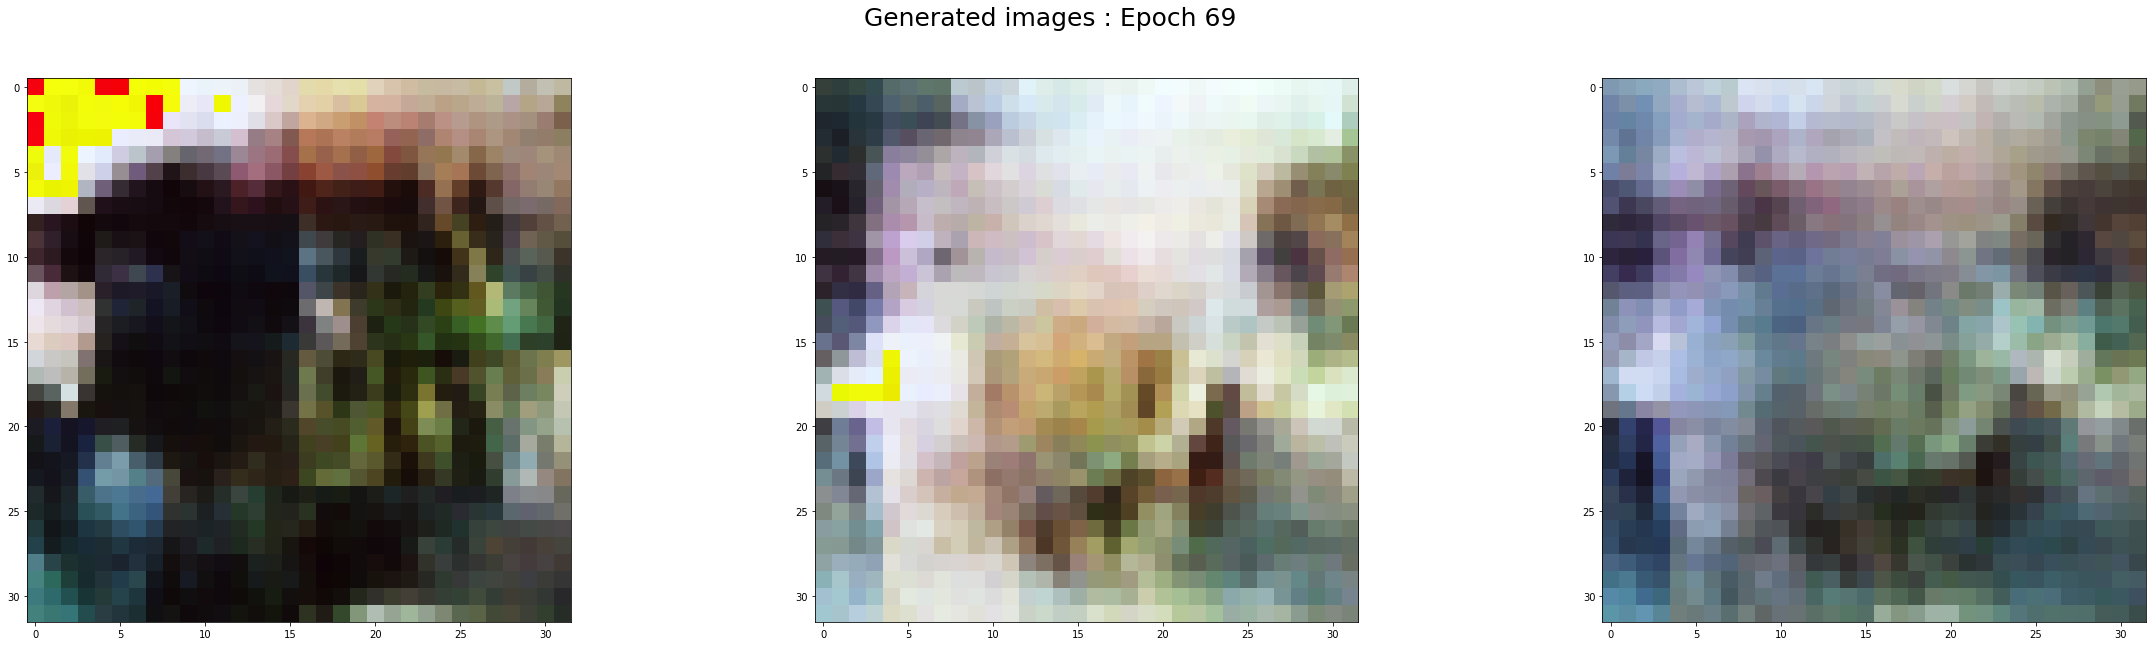

---------------------------------------------------------------
epoch :  70  d_loss_accuracy  =  [0.14565463364124298, 0.98046875]  g_loss =  0.2904432415962219


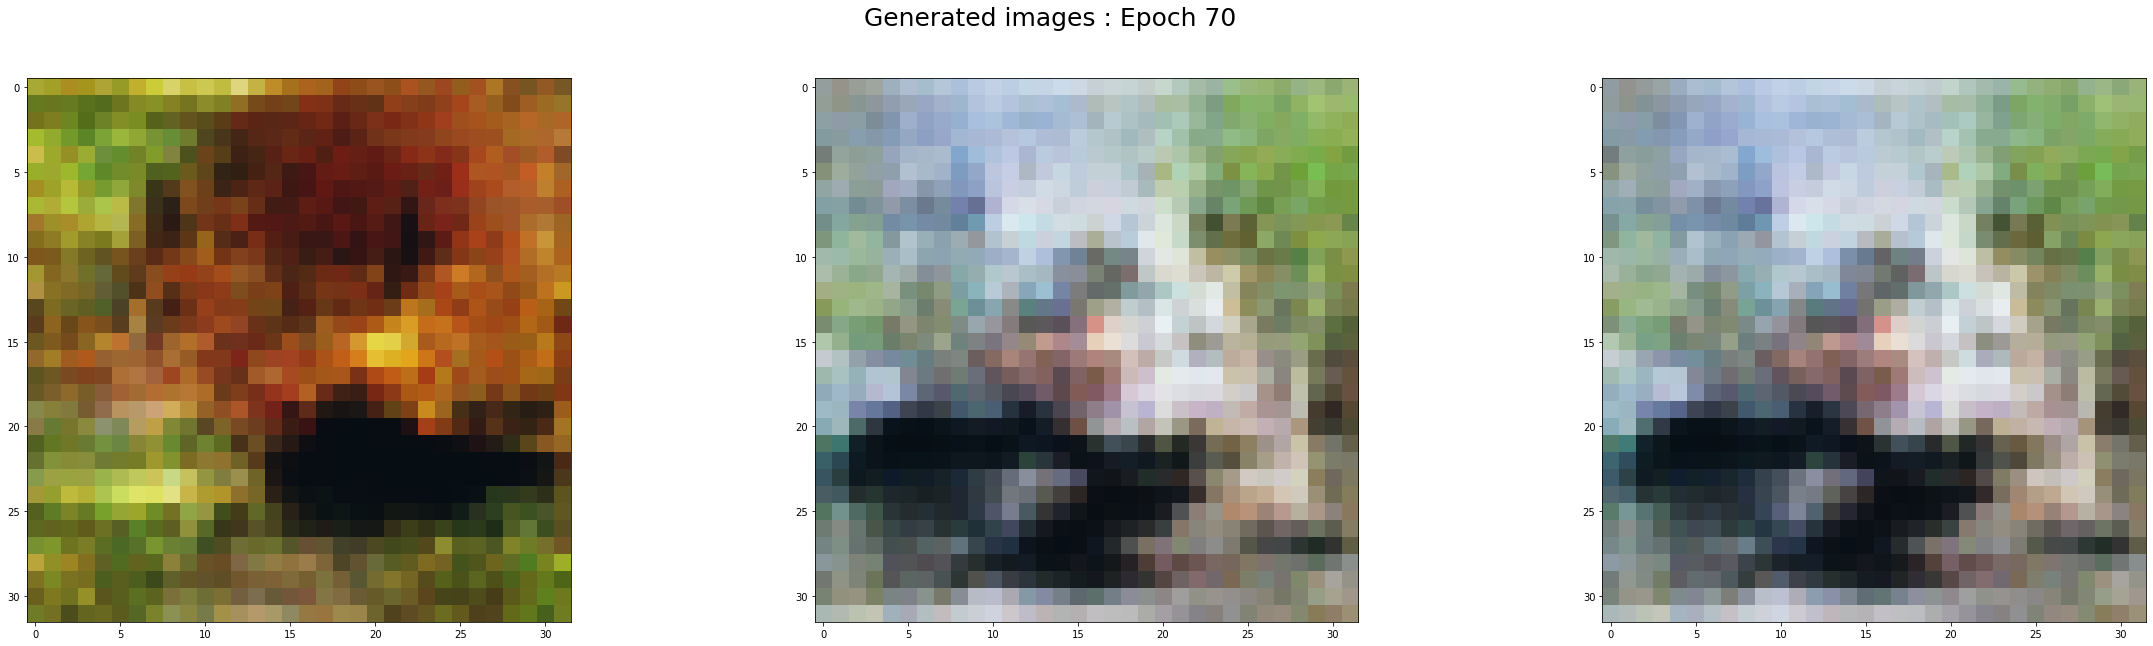

---------------------------------------------------------------
epoch :  71  d_loss_accuracy  =  [0.183296337723732, 0.93359375]  g_loss =  0.31644701957702637


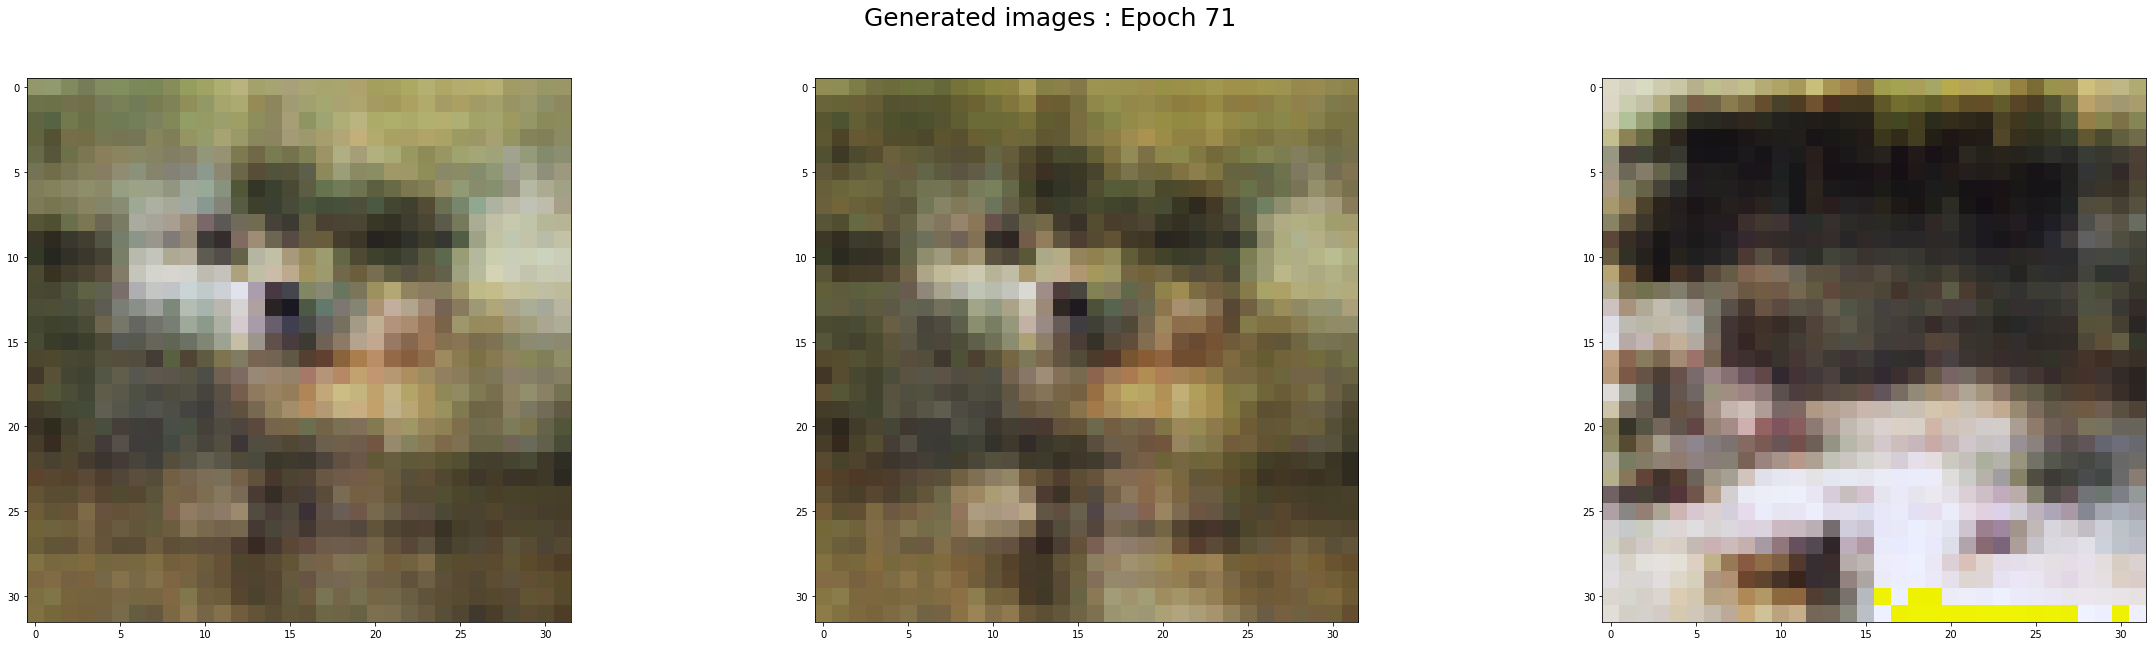

---------------------------------------------------------------
epoch :  72  d_loss_accuracy  =  [0.374963641166687, 0.82421875]  g_loss =  1.1236159801483154


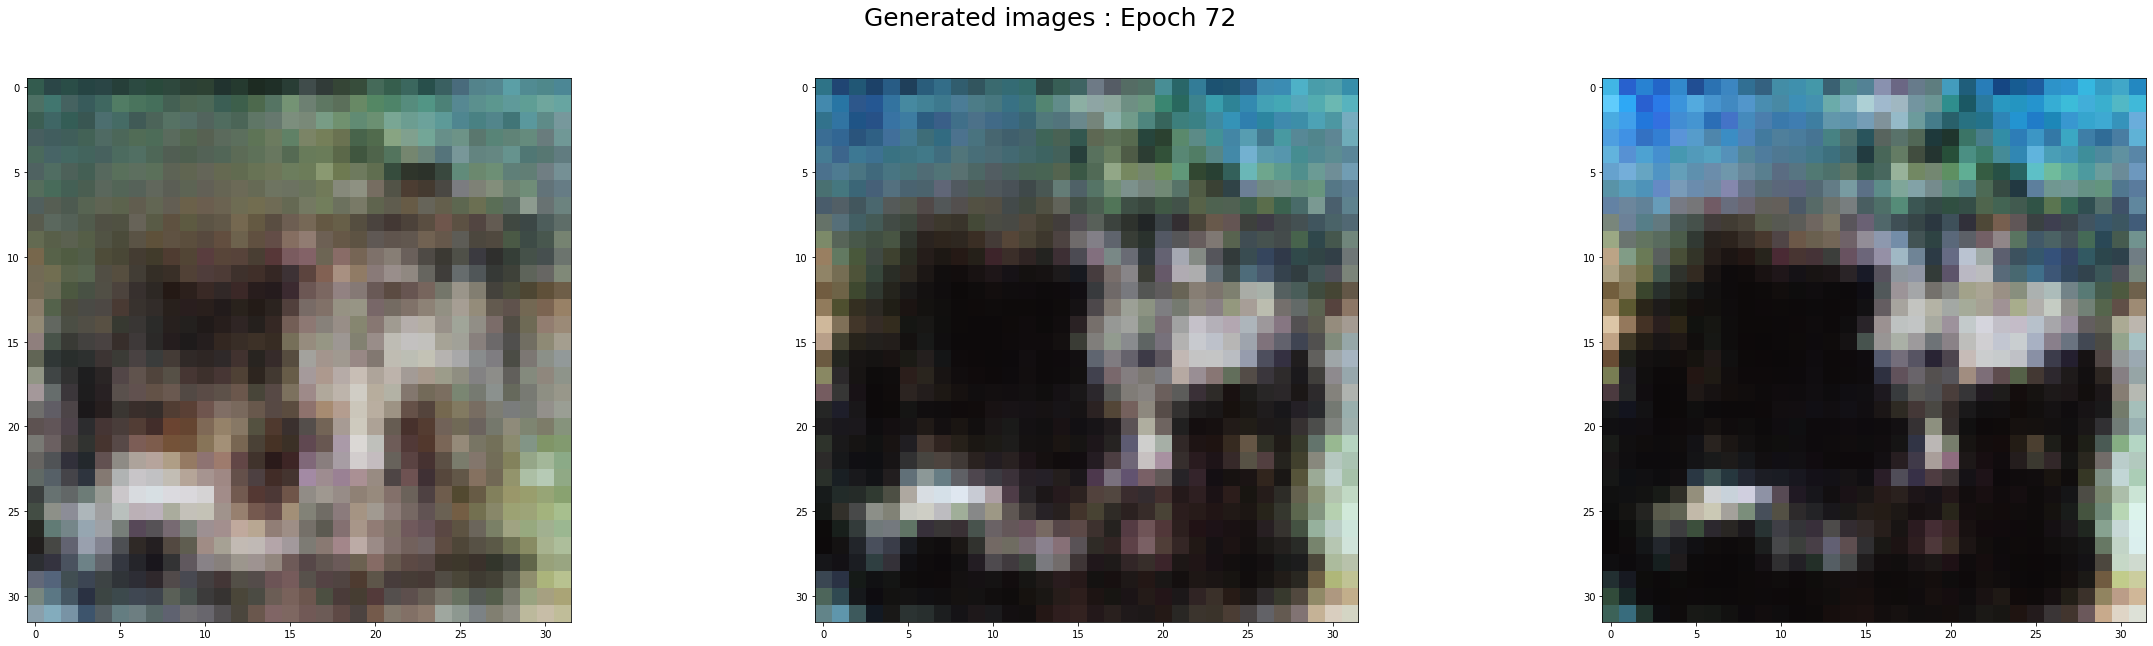

---------------------------------------------------------------
epoch :  73  d_loss_accuracy  =  [0.13224288821220398, 0.953125]  g_loss =  0.6474563479423523


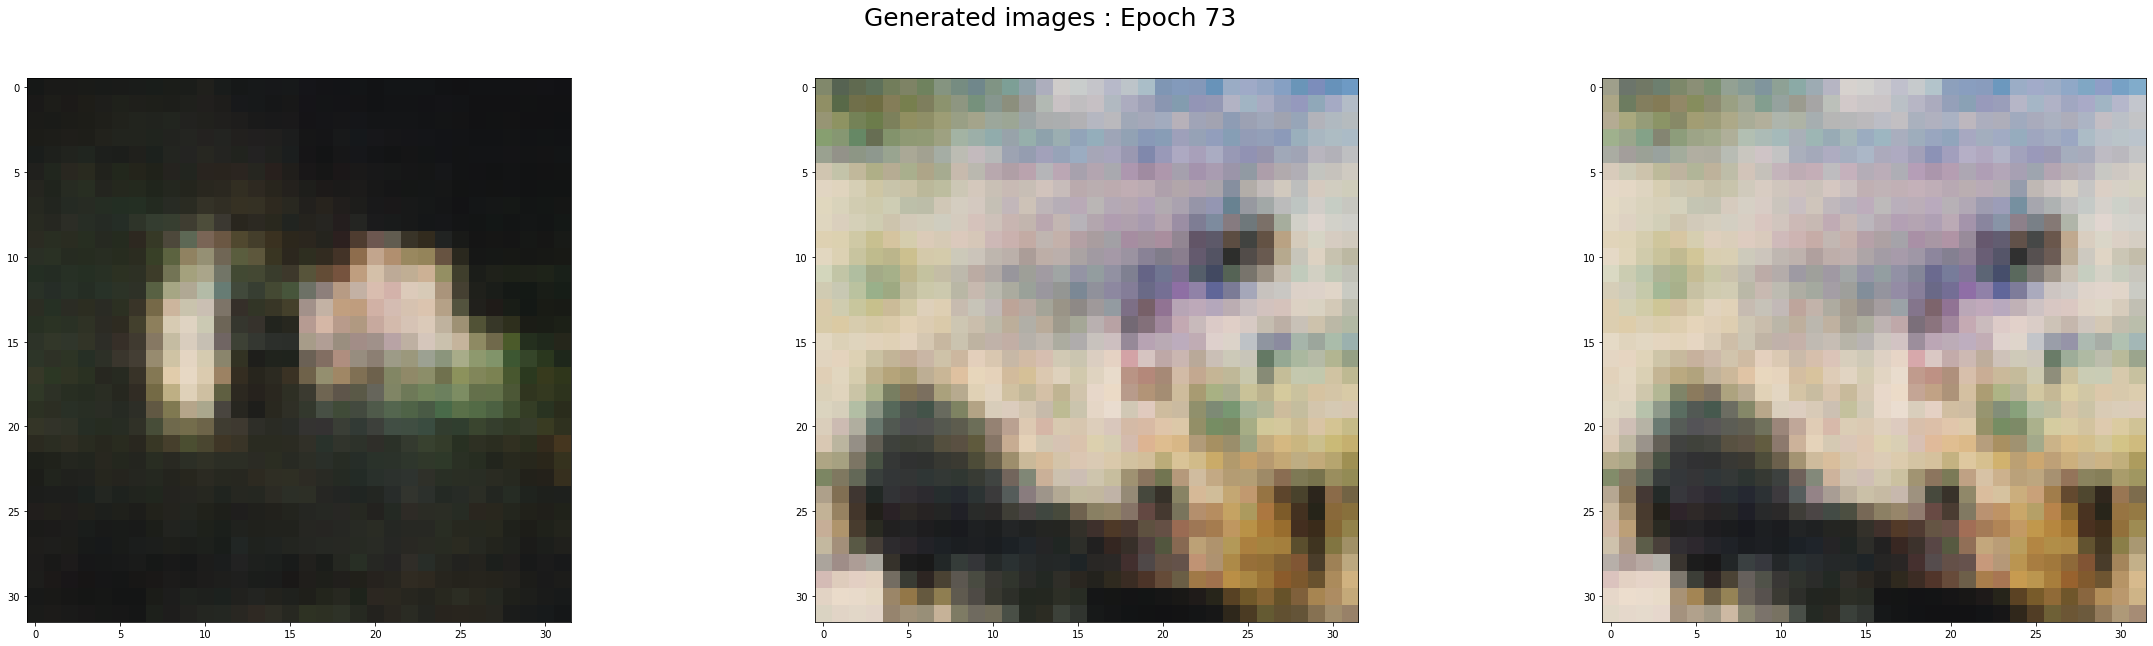

---------------------------------------------------------------
epoch :  74  d_loss_accuracy  =  [0.02831130474805832, 0.98828125]  g_loss =  0.18813171982765198


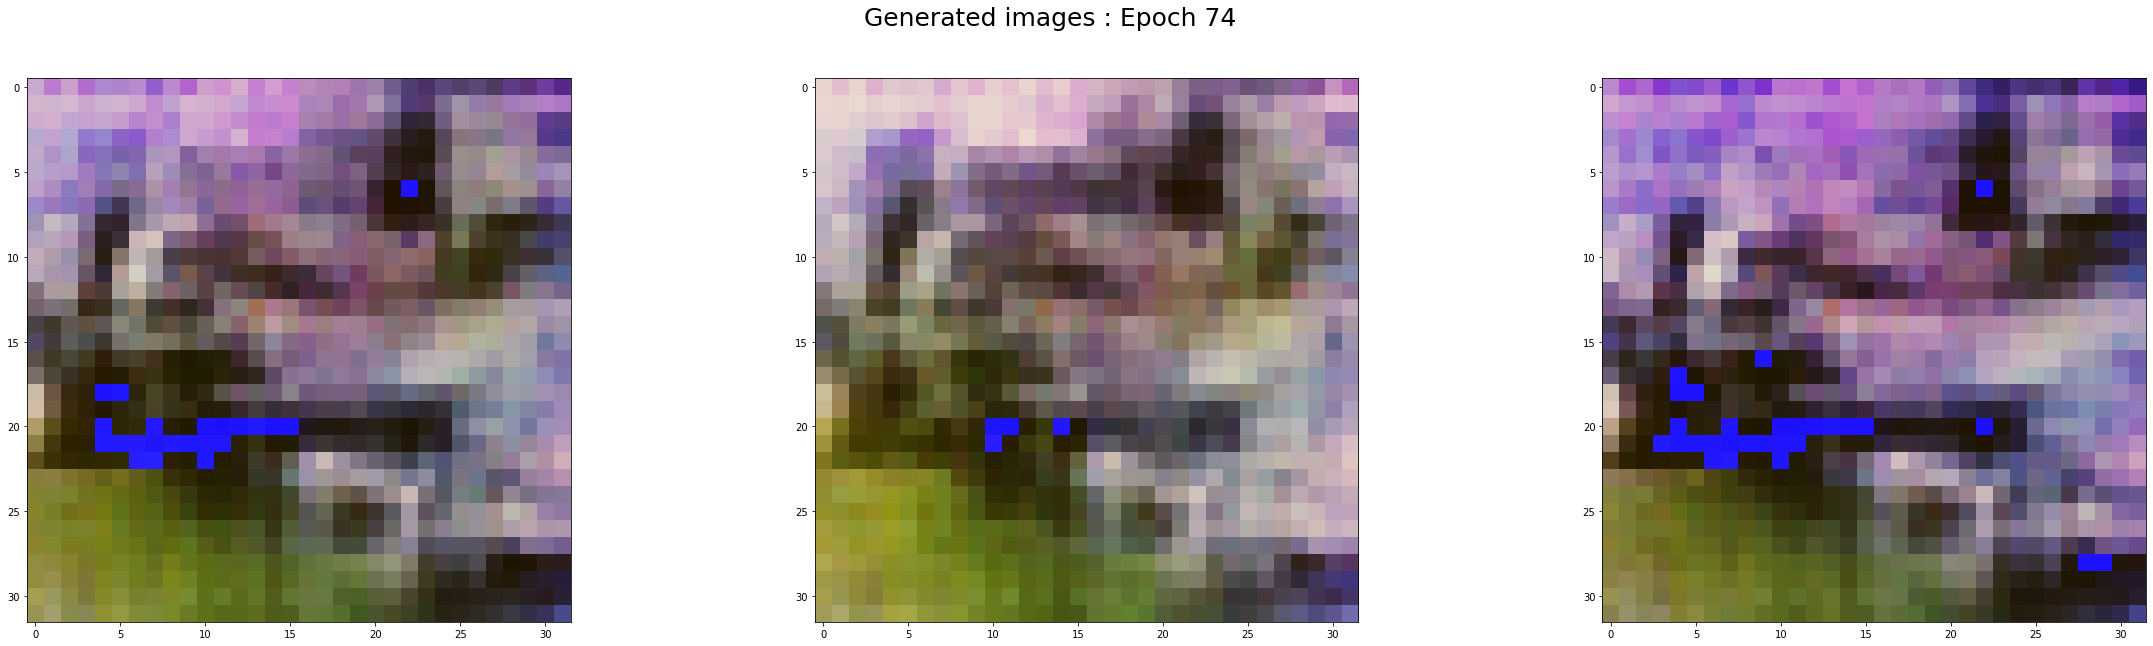

---------------------------------------------------------------
epoch :  75  d_loss_accuracy  =  [0.34938347339630127, 0.875]  g_loss =  1.4959266185760498


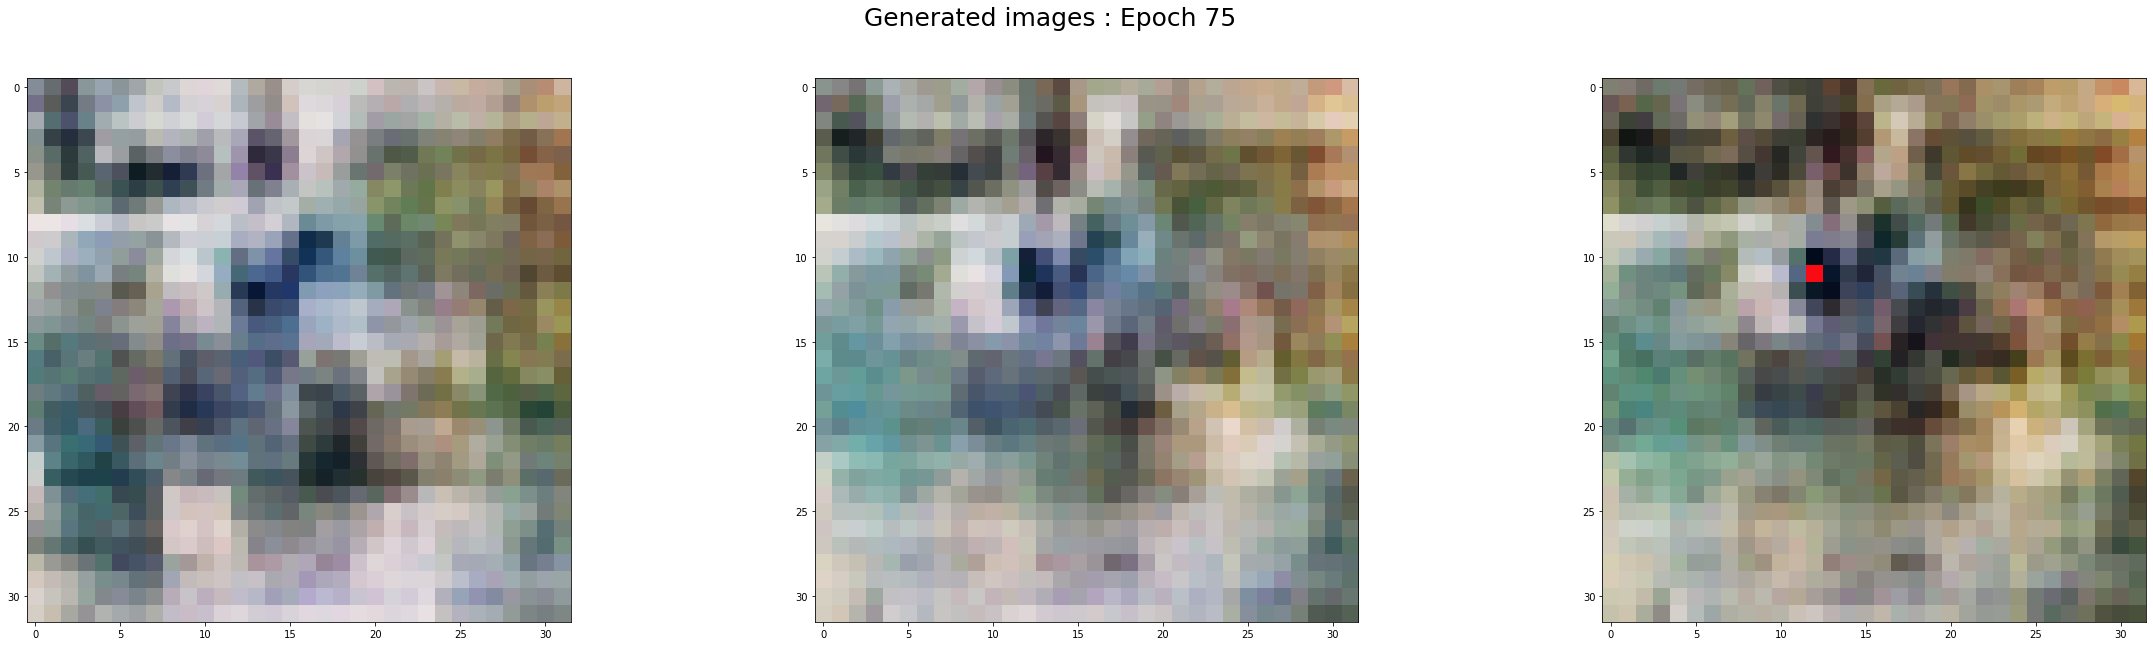

---------------------------------------------------------------
epoch :  76  d_loss_accuracy  =  [0.1316809356212616, 0.96484375]  g_loss =  0.7702288031578064


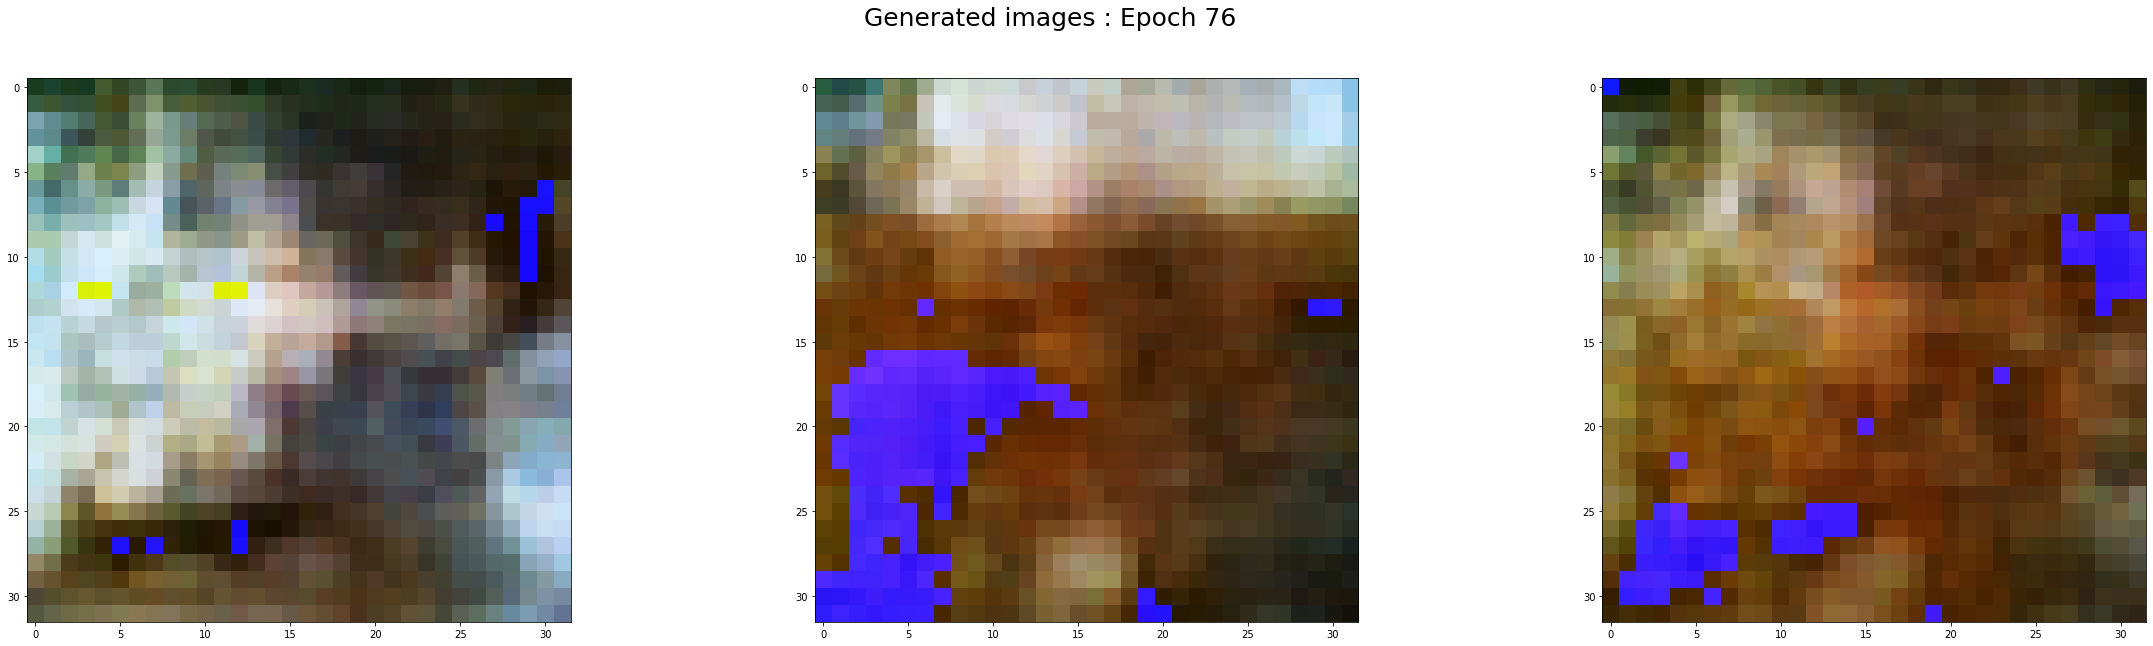

---------------------------------------------------------------
epoch :  77  d_loss_accuracy  =  [0.10086683928966522, 0.94921875]  g_loss =  3.9803640842437744


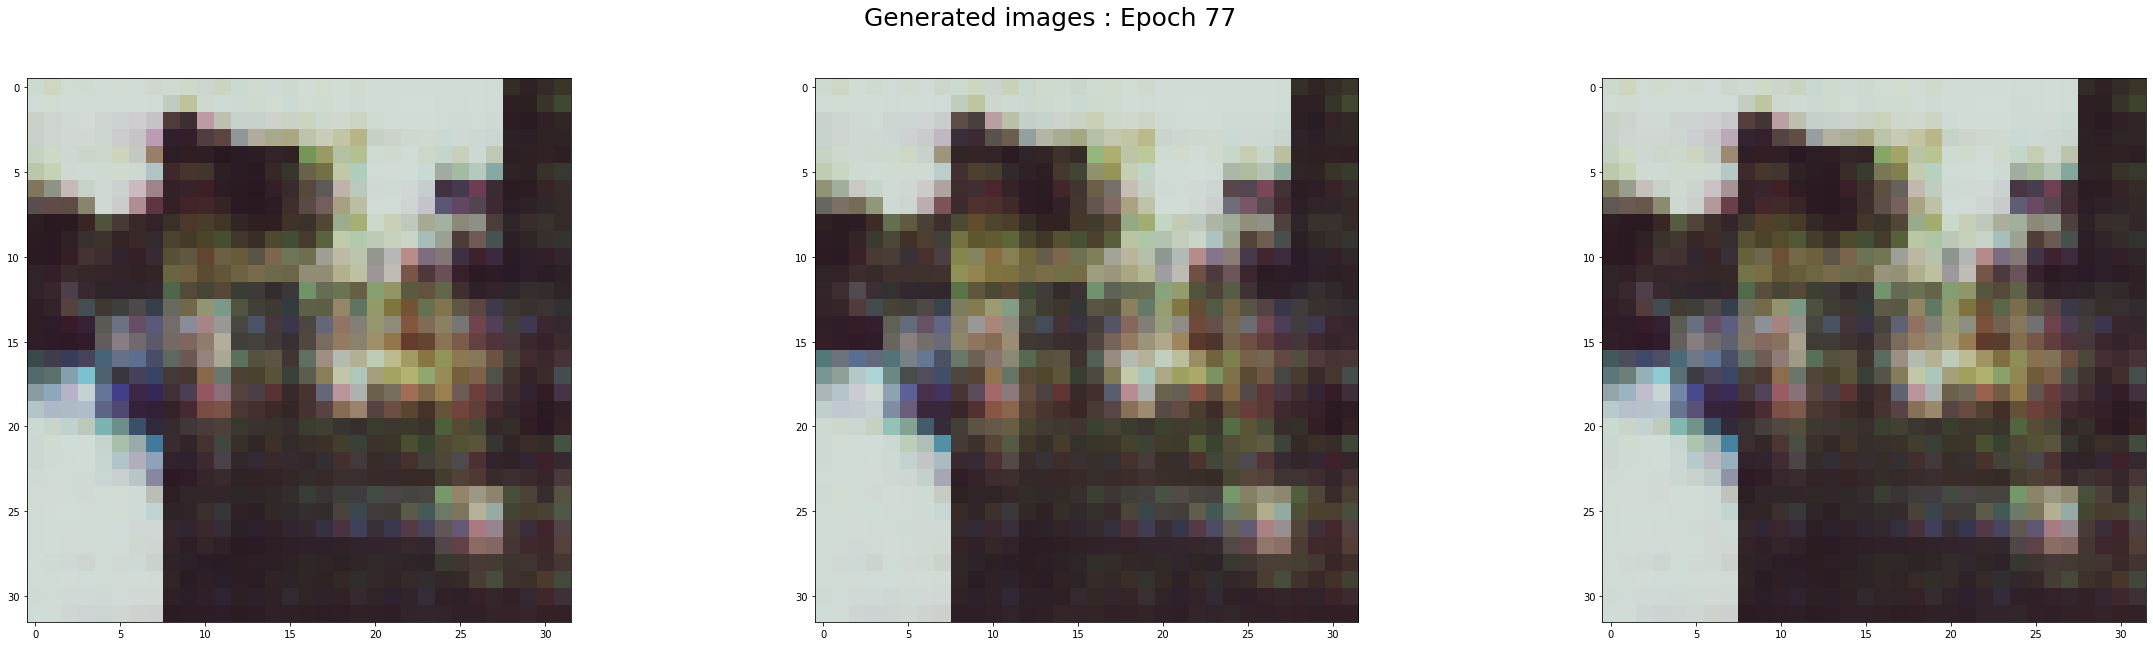

---------------------------------------------------------------
epoch :  78  d_loss_accuracy  =  [0.17768269777297974, 0.9609375]  g_loss =  1.3140082359313965


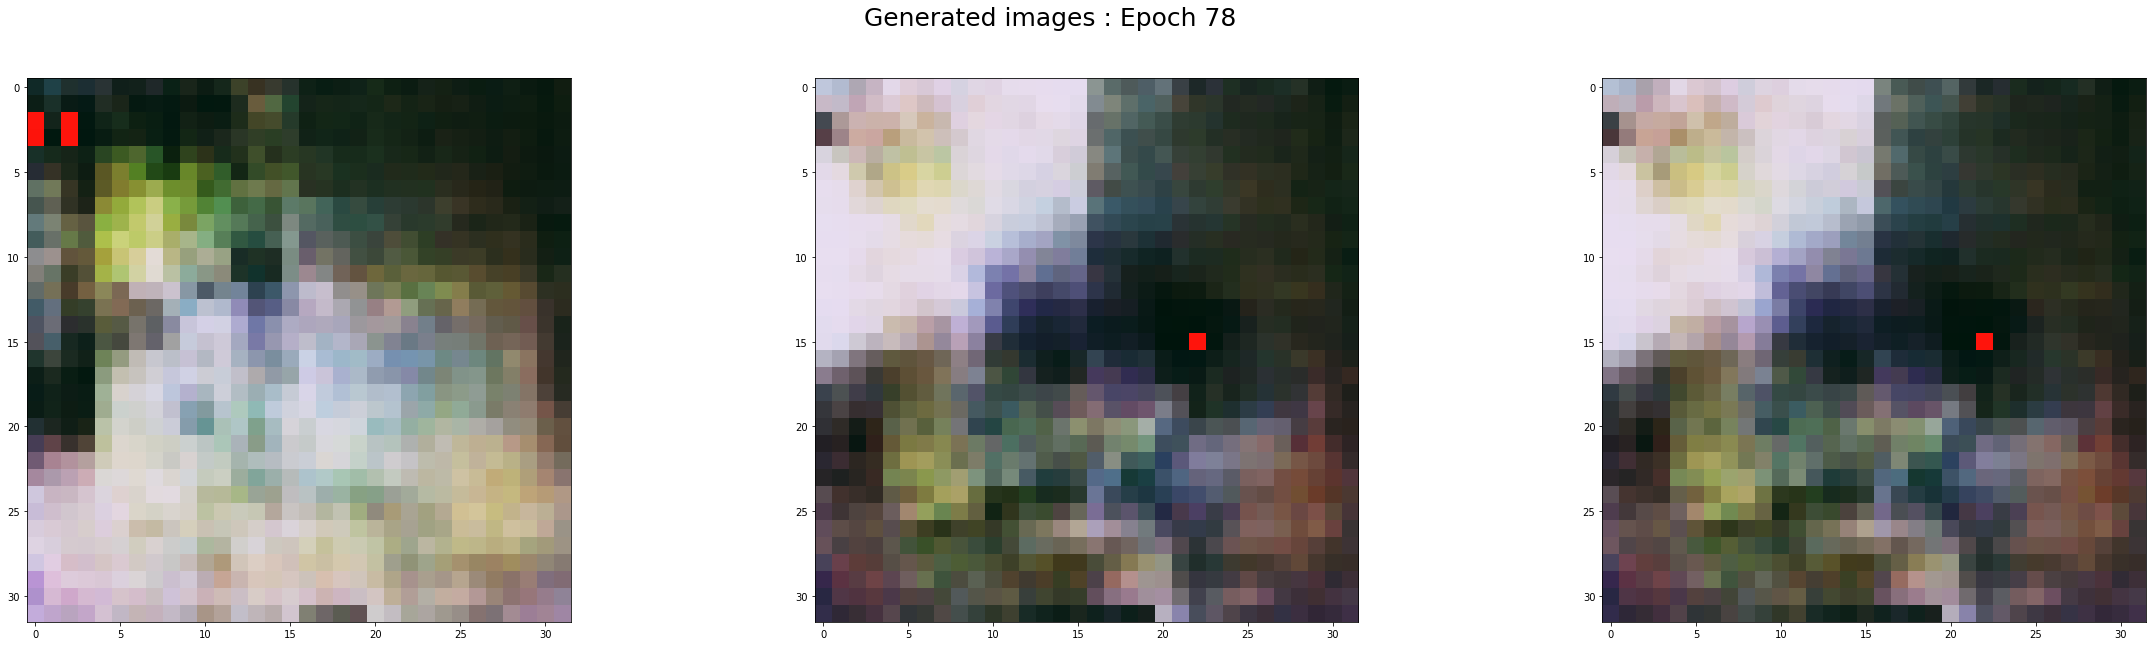

---------------------------------------------------------------
epoch :  79  d_loss_accuracy  =  [0.08225636184215546, 0.984375]  g_loss =  0.5950763821601868


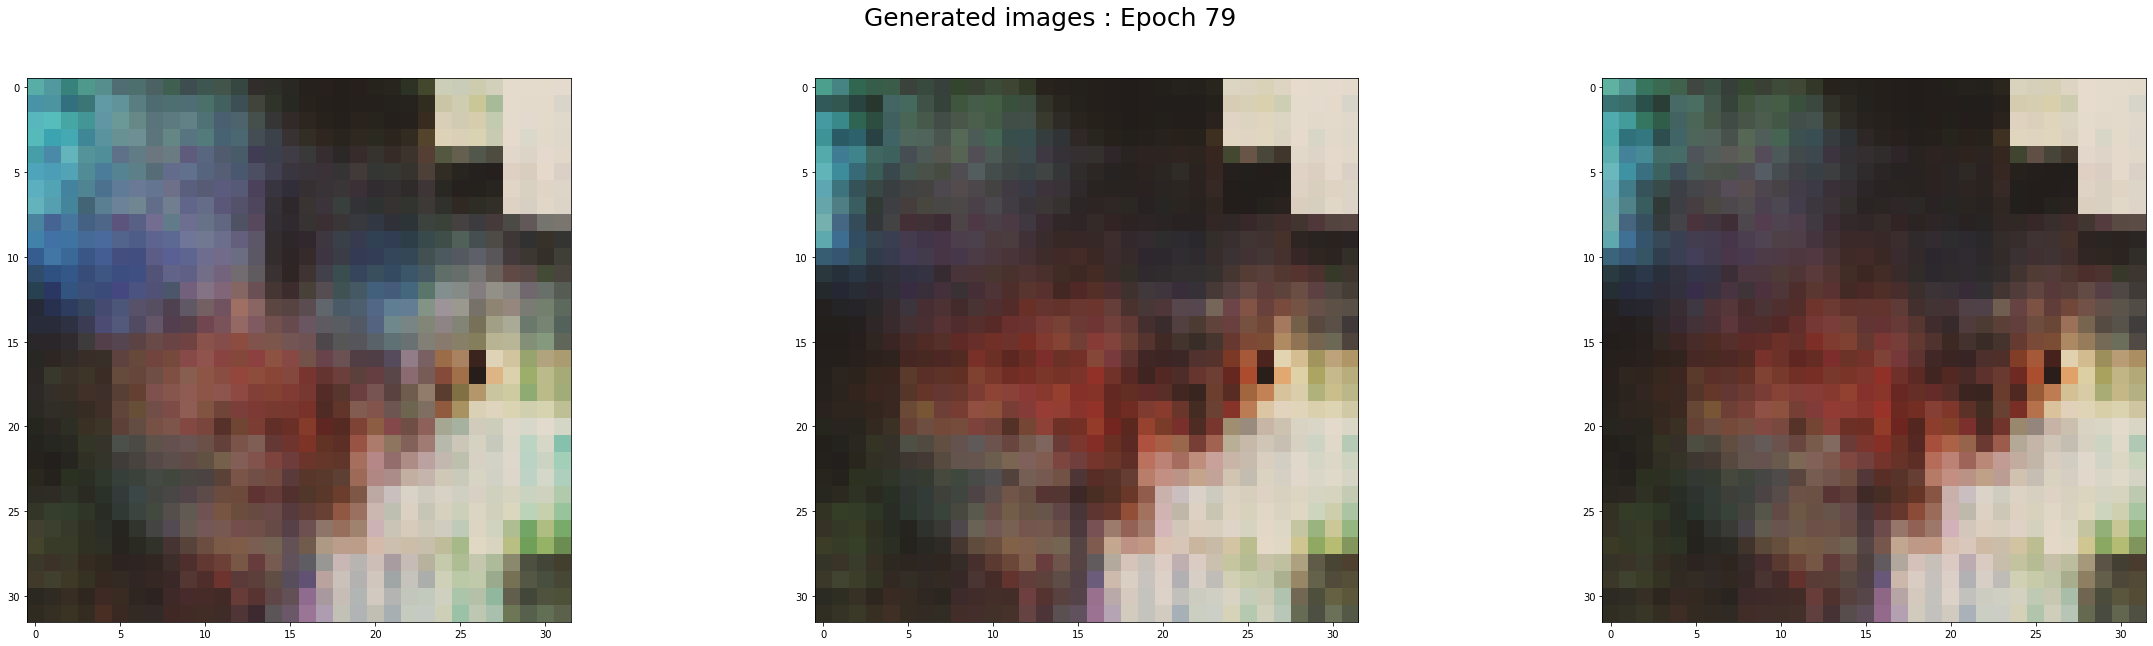

---------------------------------------------------------------
epoch :  80  d_loss_accuracy  =  [0.11236011981964111, 0.96875]  g_loss =  2.2512125968933105


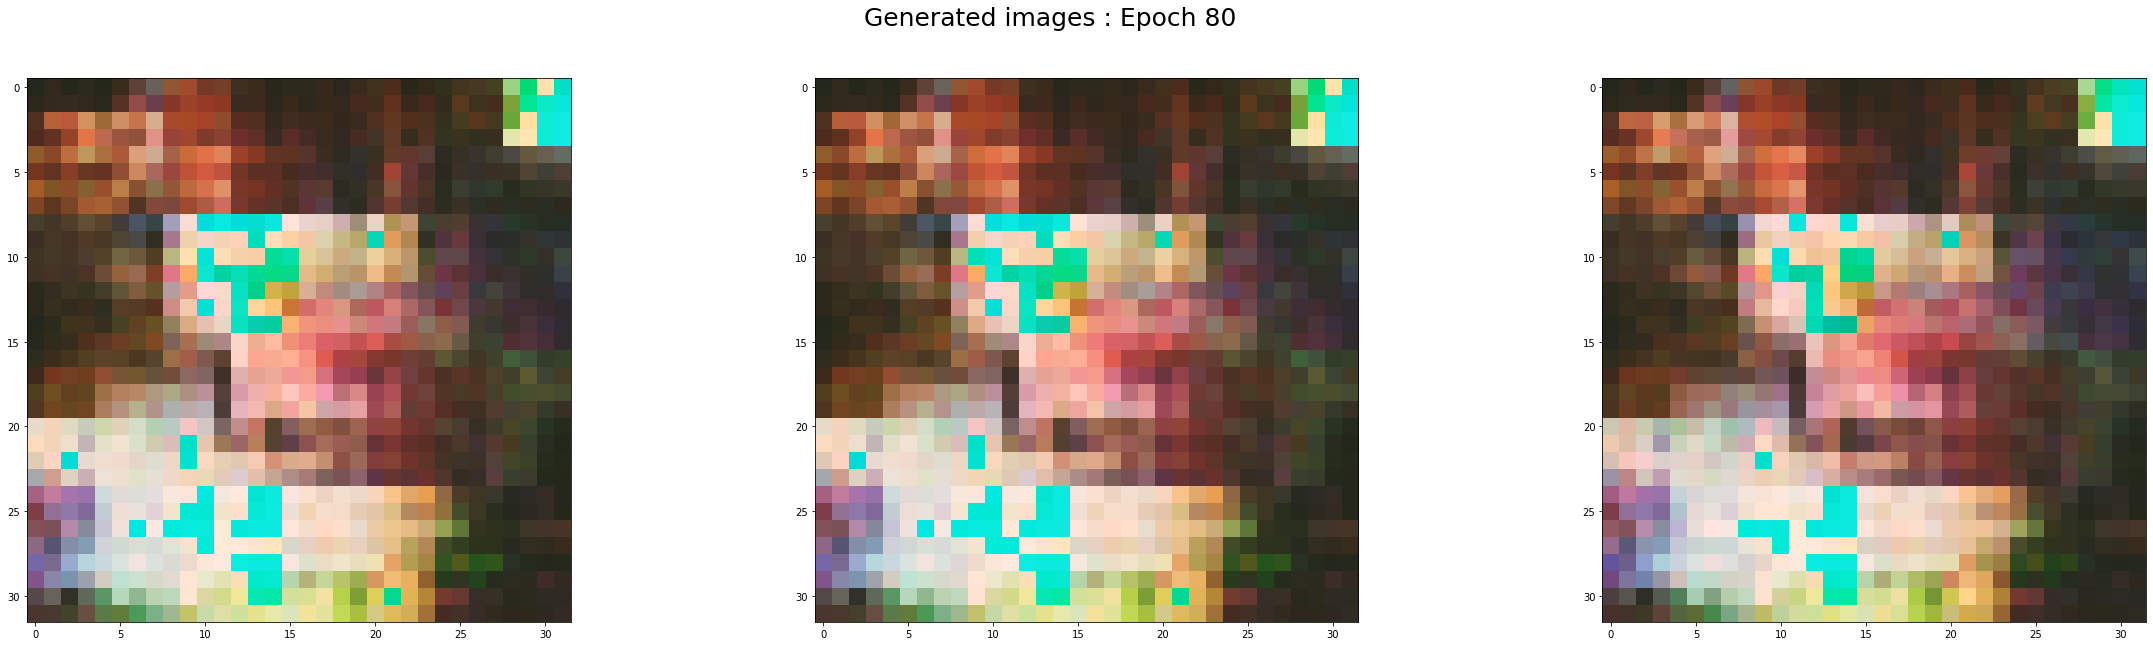

---------------------------------------------------------------
epoch :  81  d_loss_accuracy  =  [0.02214079722762108, 0.9921875]  g_loss =  0.031924858689308167


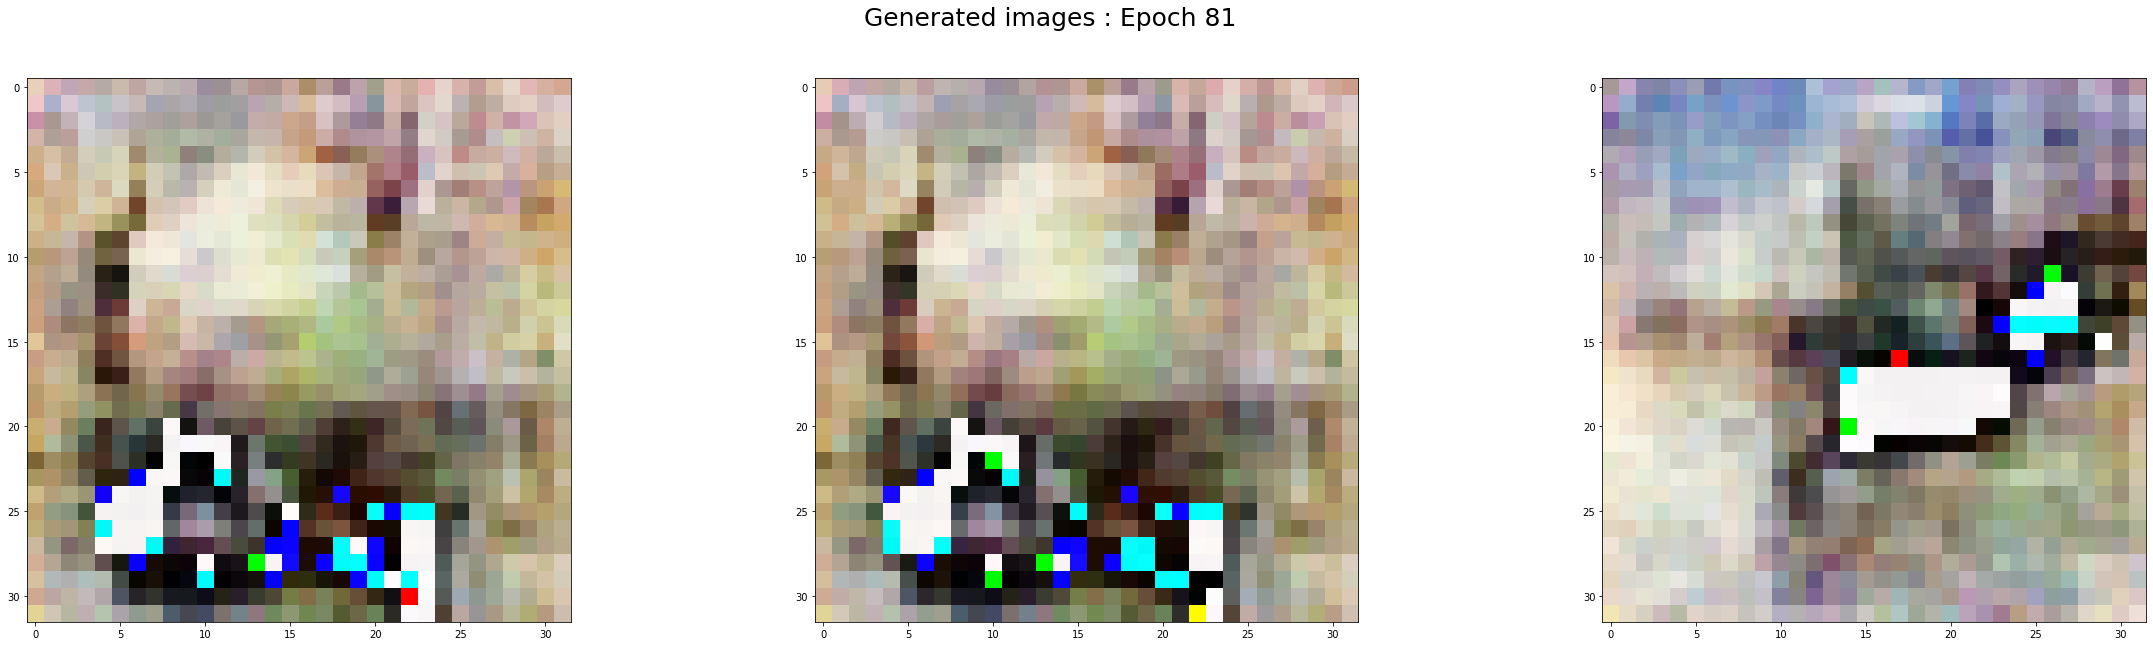

---------------------------------------------------------------
epoch :  82  d_loss_accuracy  =  [0.005419022403657436, 1.0]  g_loss =  0.0482729896903038


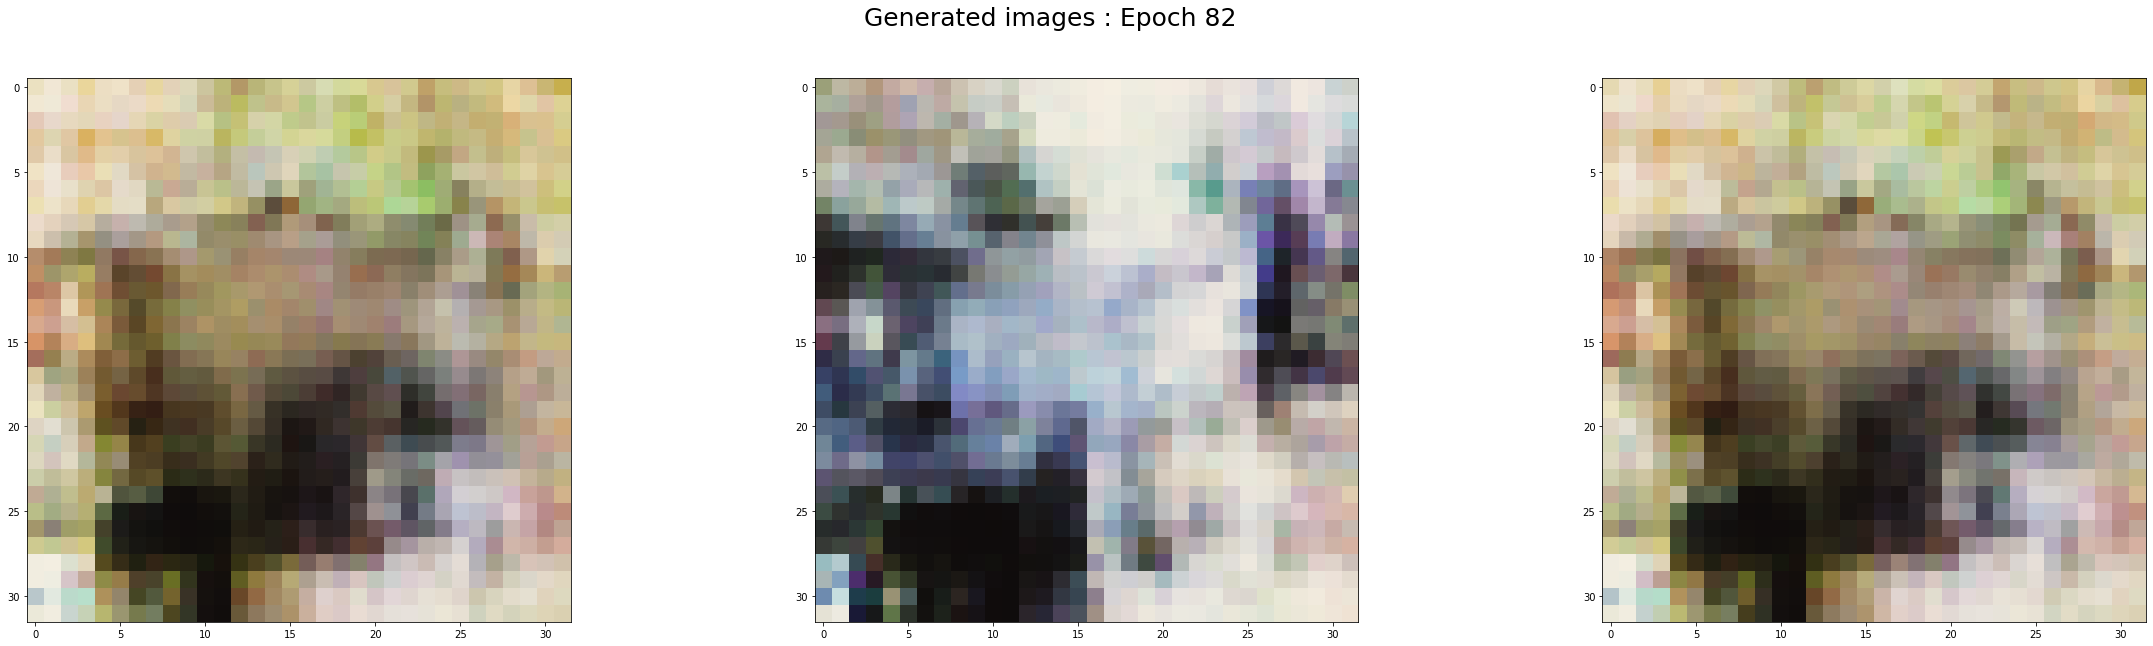

---------------------------------------------------------------
epoch :  83  d_loss_accuracy  =  [0.023083101958036423, 0.9921875]  g_loss =  0.052706360816955566


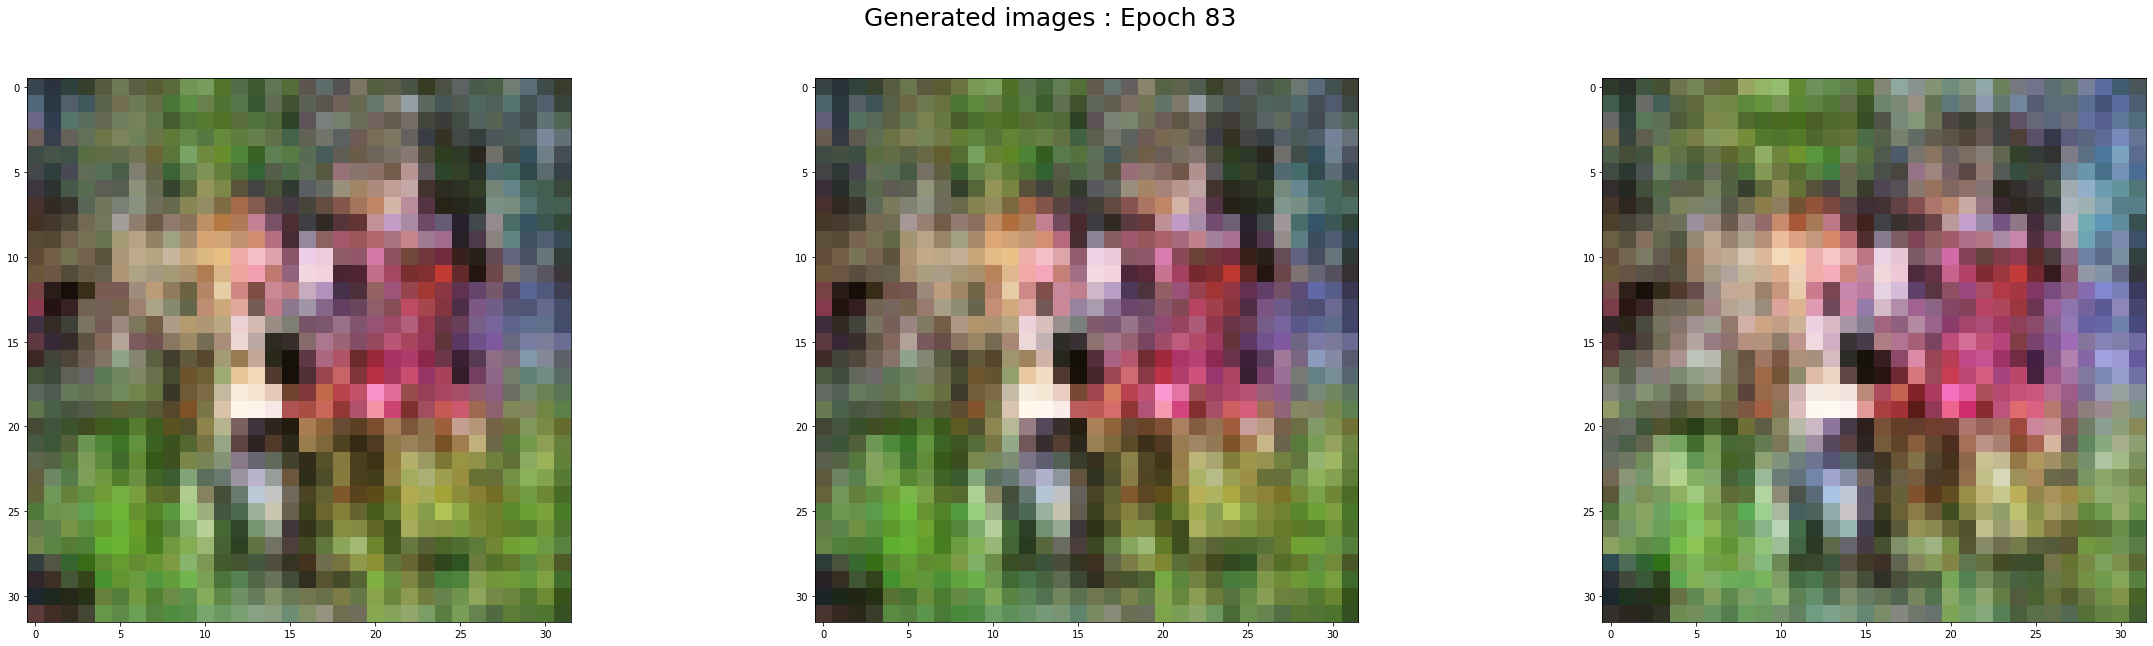

---------------------------------------------------------------
epoch :  84  d_loss_accuracy  =  [0.02862689457833767, 0.99609375]  g_loss =  0.006573891267180443


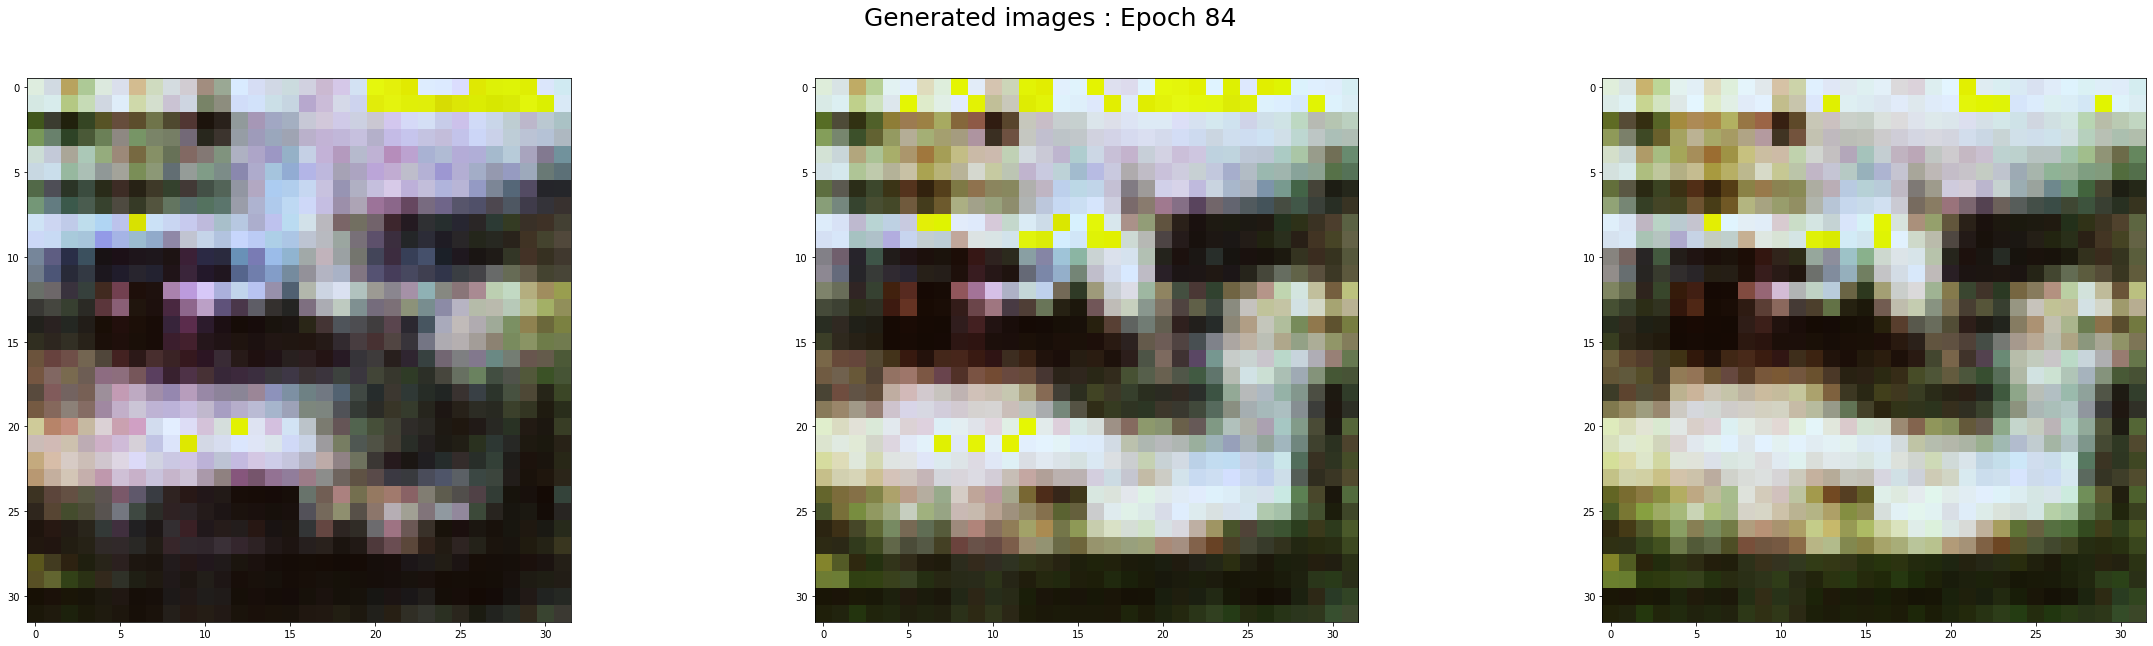

---------------------------------------------------------------
epoch :  85  d_loss_accuracy  =  [0.10566026717424393, 0.96875]  g_loss =  0.34919407963752747


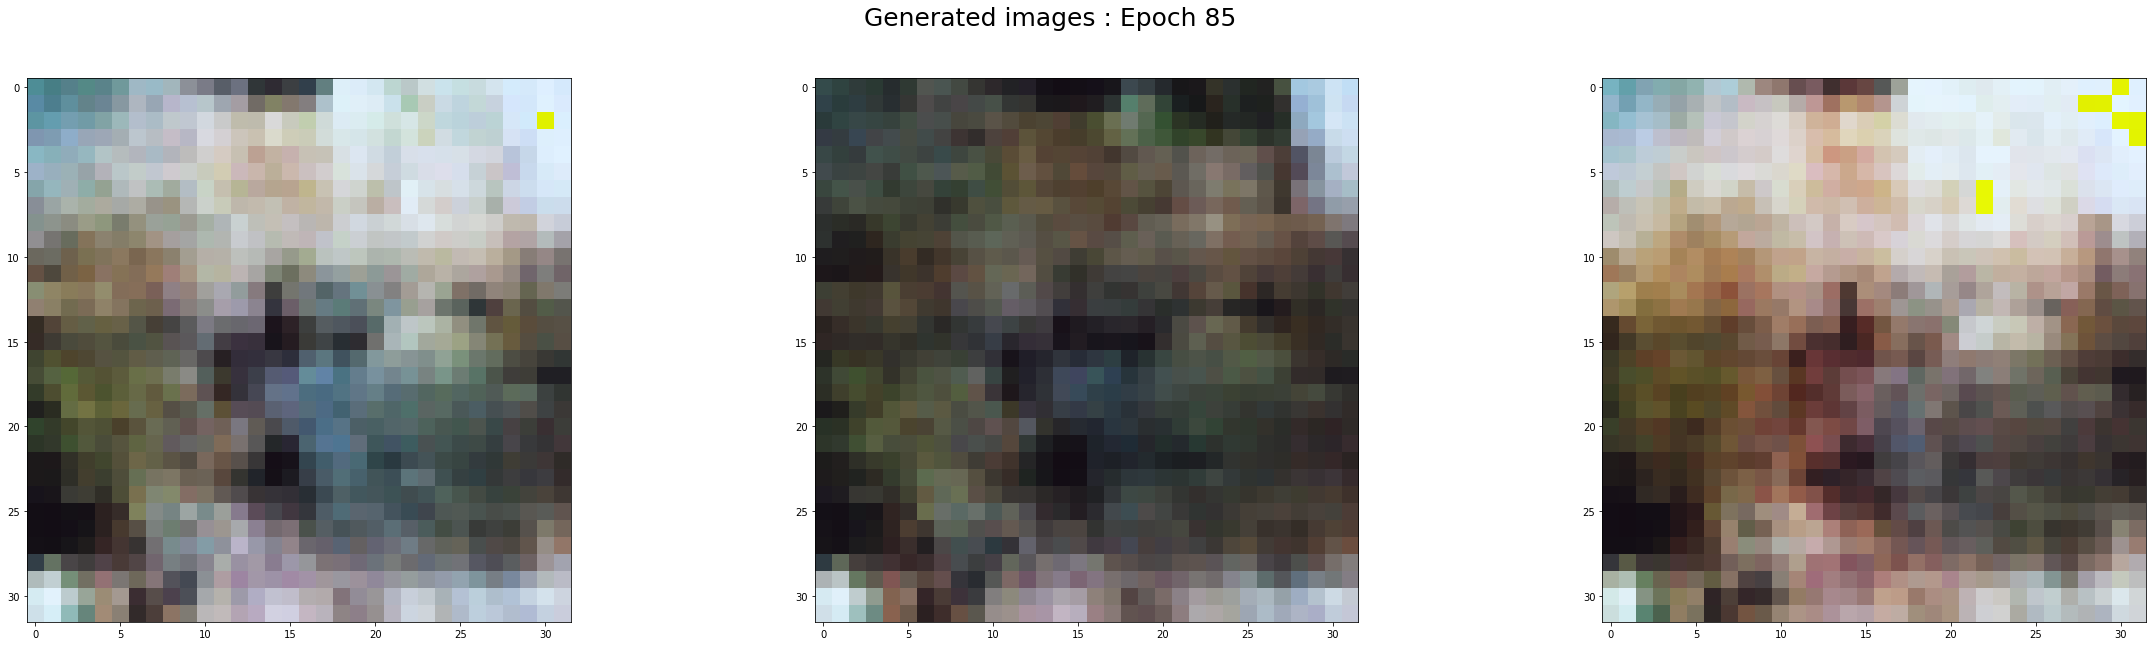

---------------------------------------------------------------
epoch :  86  d_loss_accuracy  =  [0.04079773649573326, 0.9921875]  g_loss =  0.7559149265289307


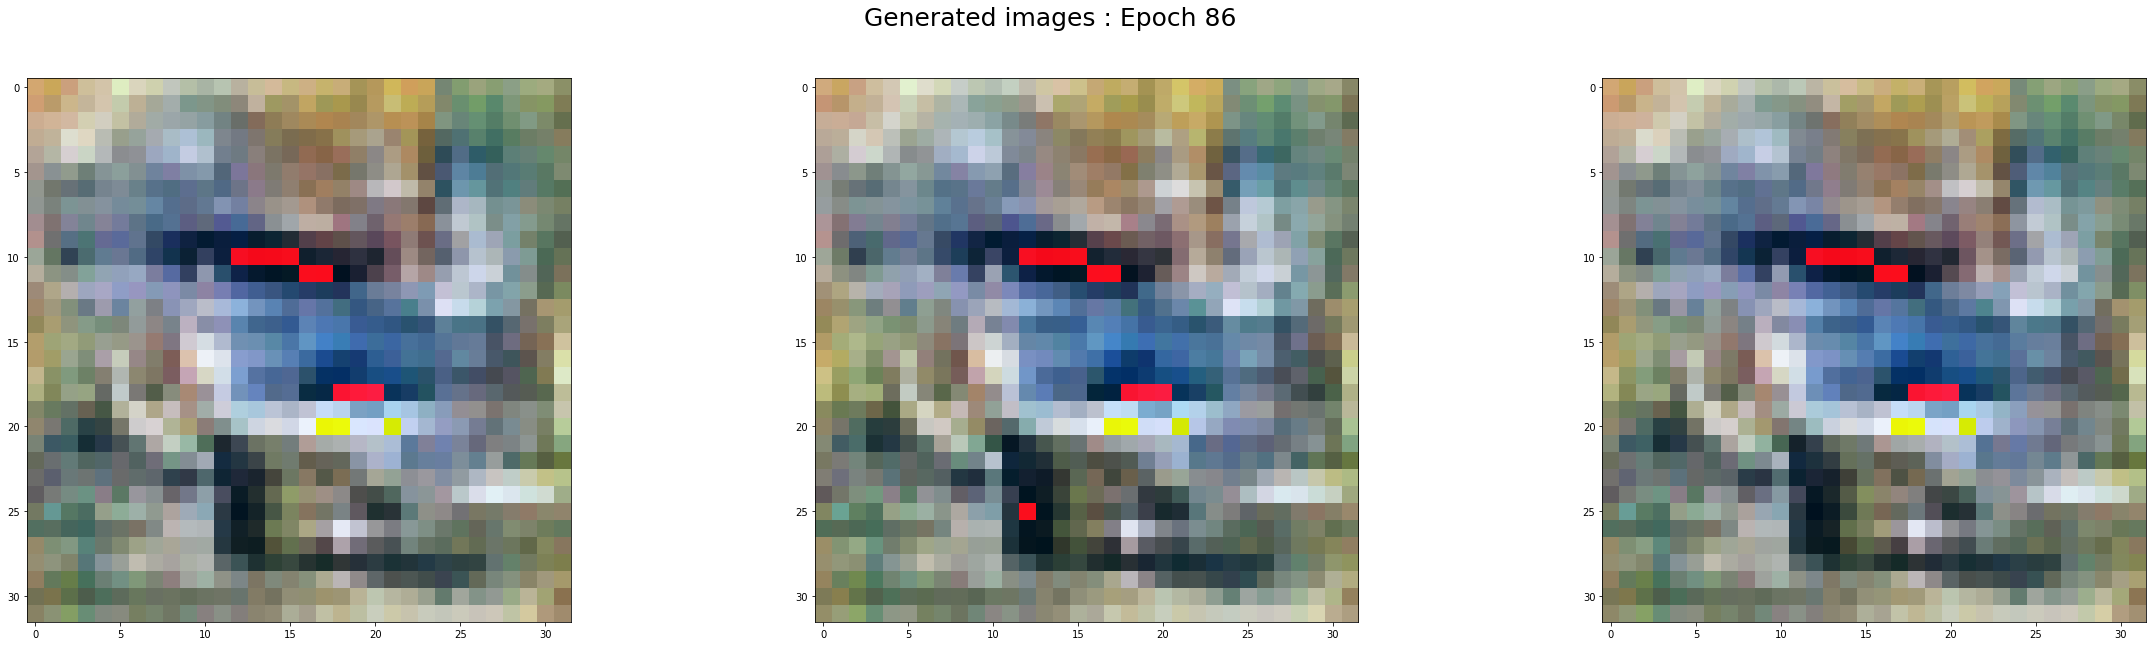

---------------------------------------------------------------
epoch :  87  d_loss_accuracy  =  [0.027893414720892906, 0.98828125]  g_loss =  1.4948468208312988


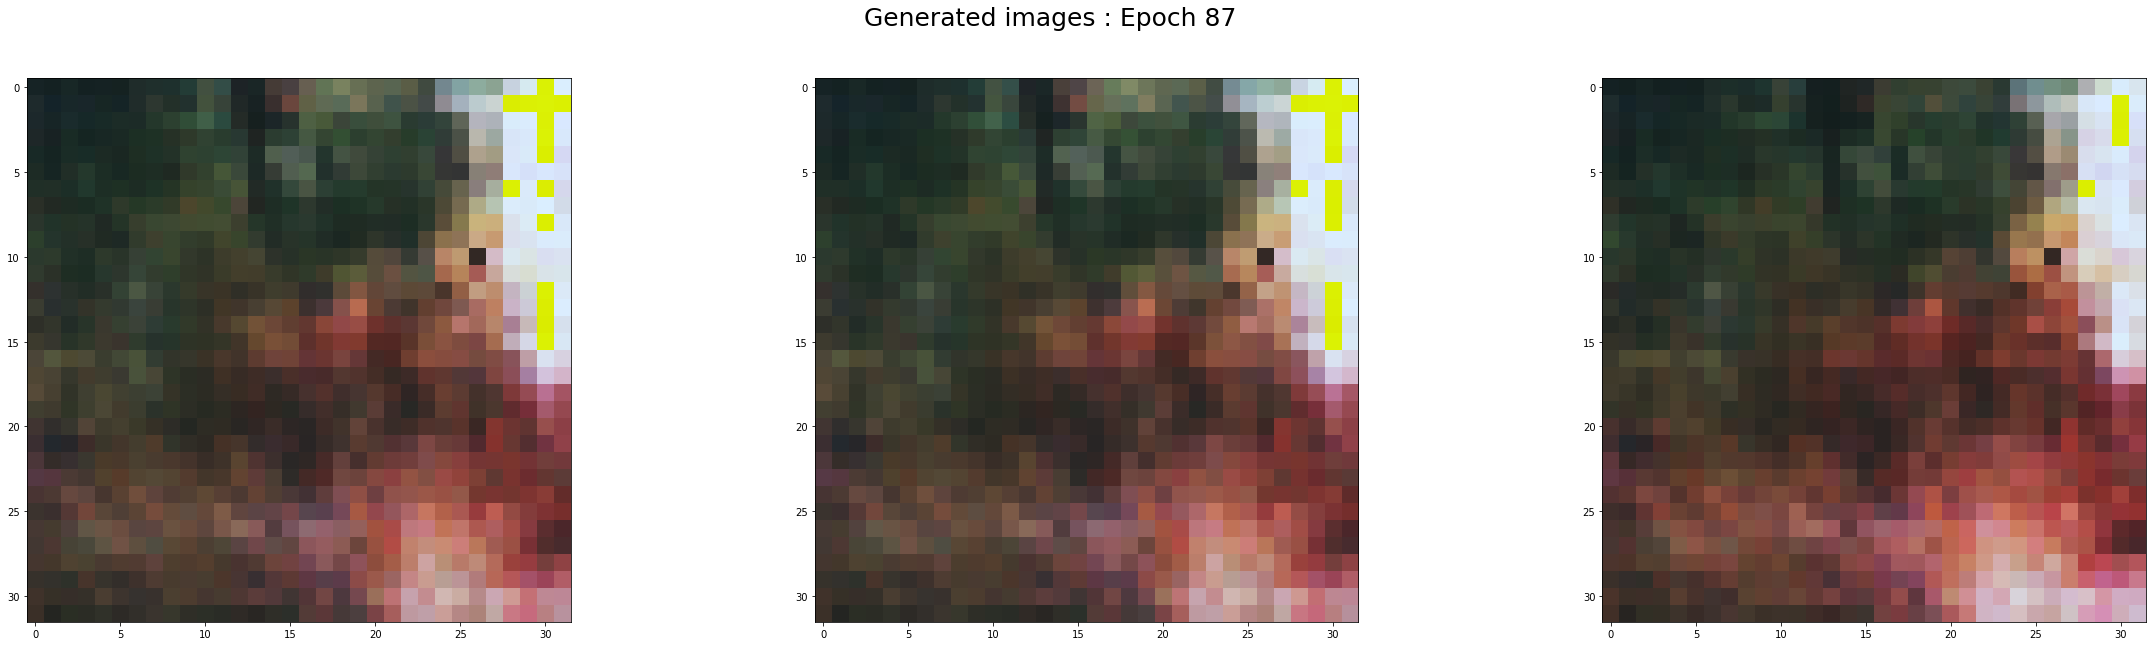

---------------------------------------------------------------
epoch :  88  d_loss_accuracy  =  [0.003209251444786787, 1.0]  g_loss =  0.06611653417348862


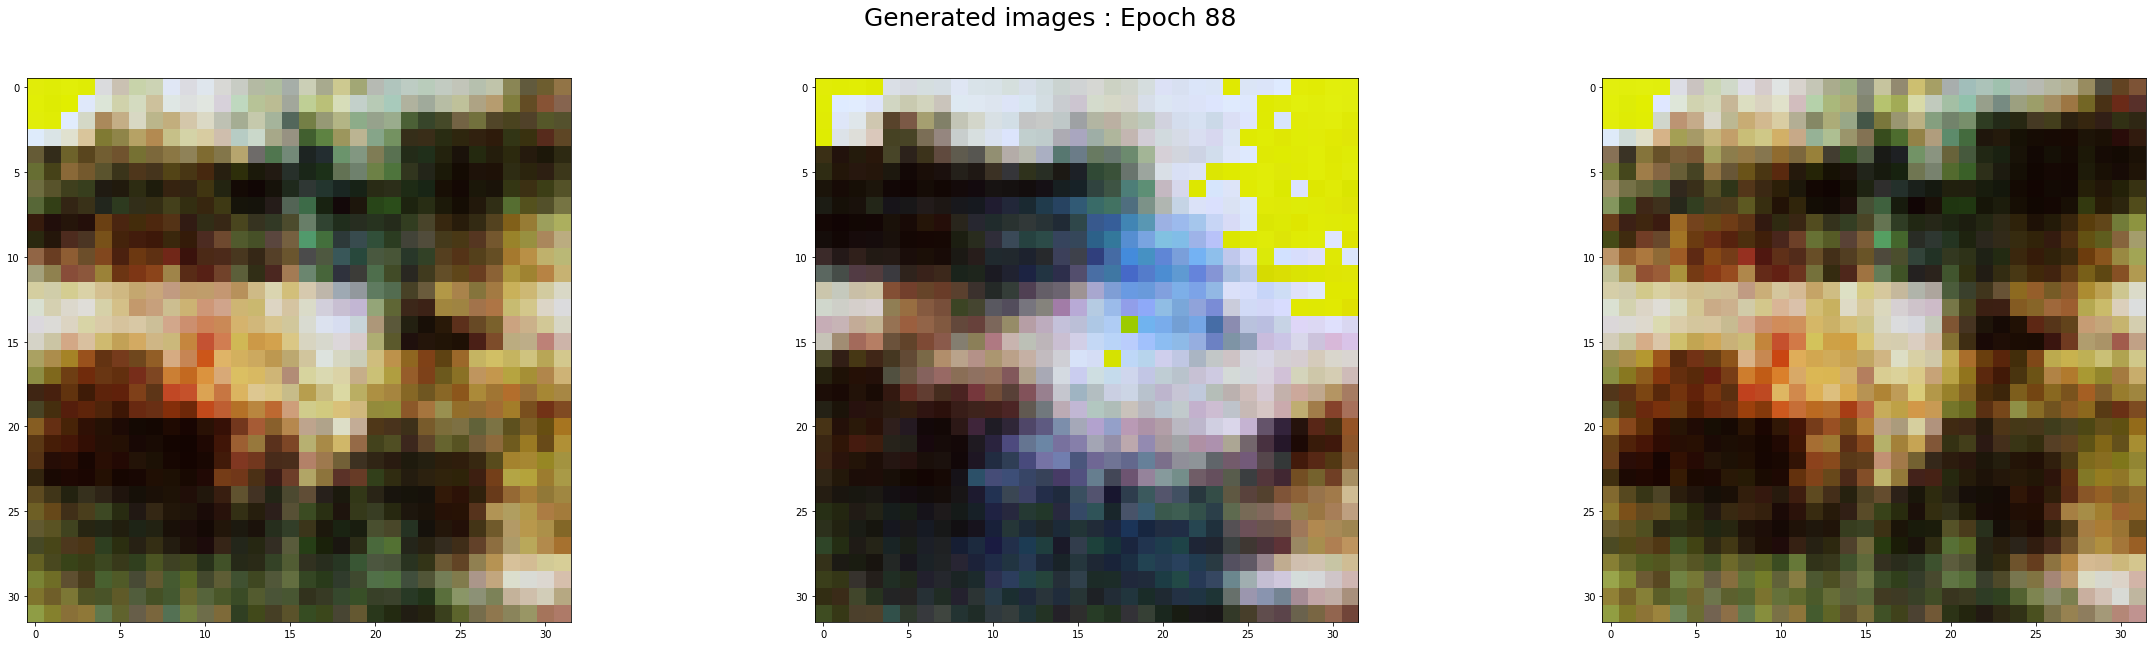

---------------------------------------------------------------
epoch :  89  d_loss_accuracy  =  [0.010291216894984245, 1.0]  g_loss =  0.22159849107265472


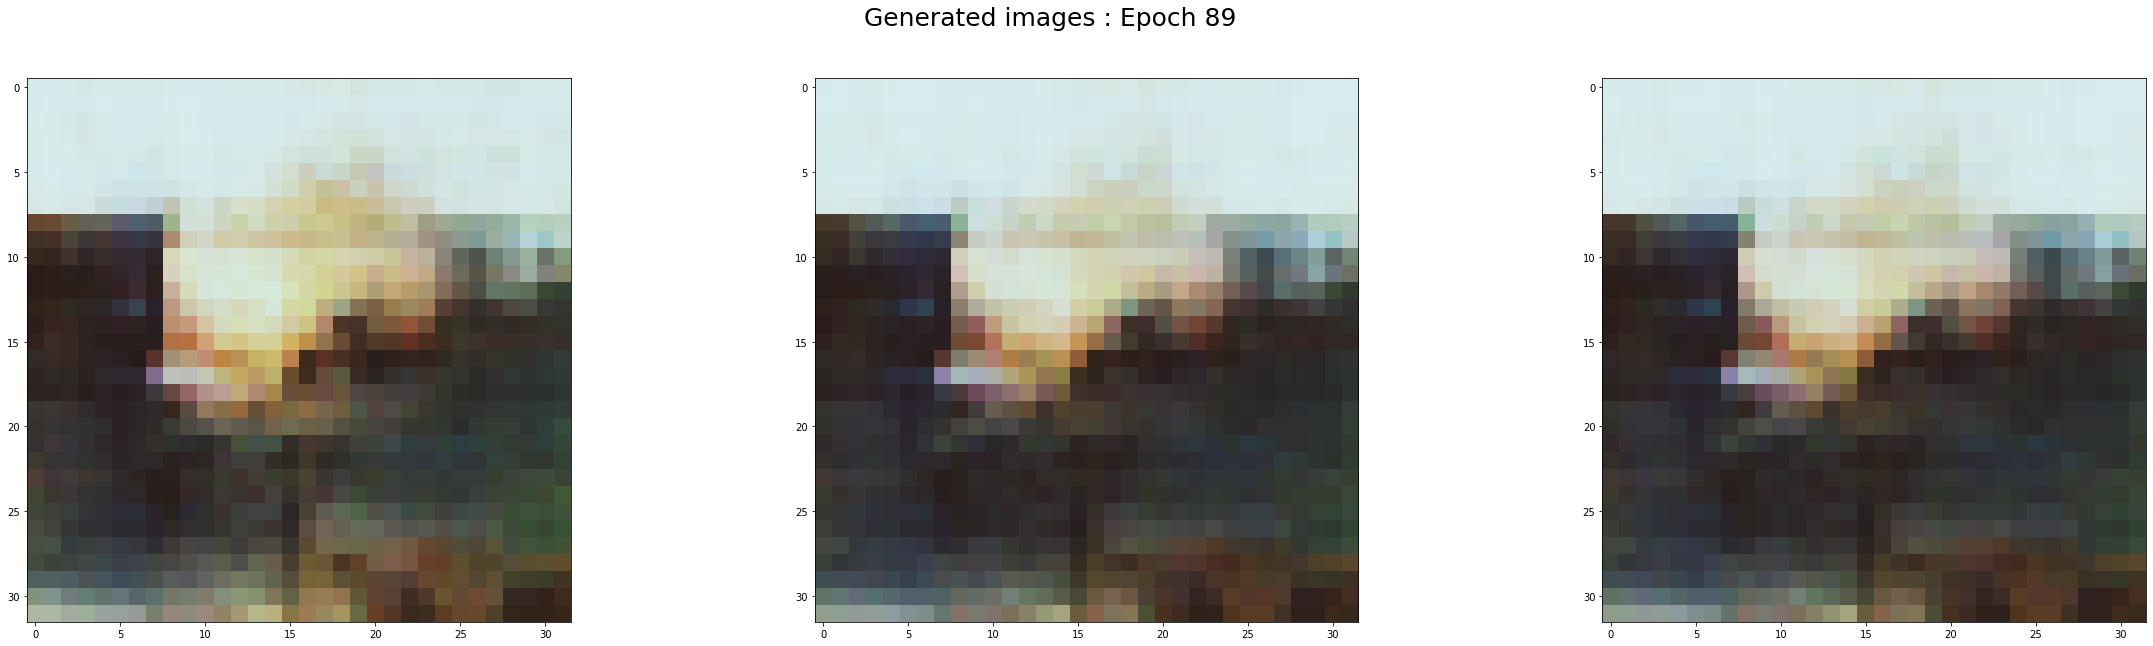

---------------------------------------------------------------
epoch :  90  d_loss_accuracy  =  [0.04881330952048302, 0.984375]  g_loss =  1.7657266855239868


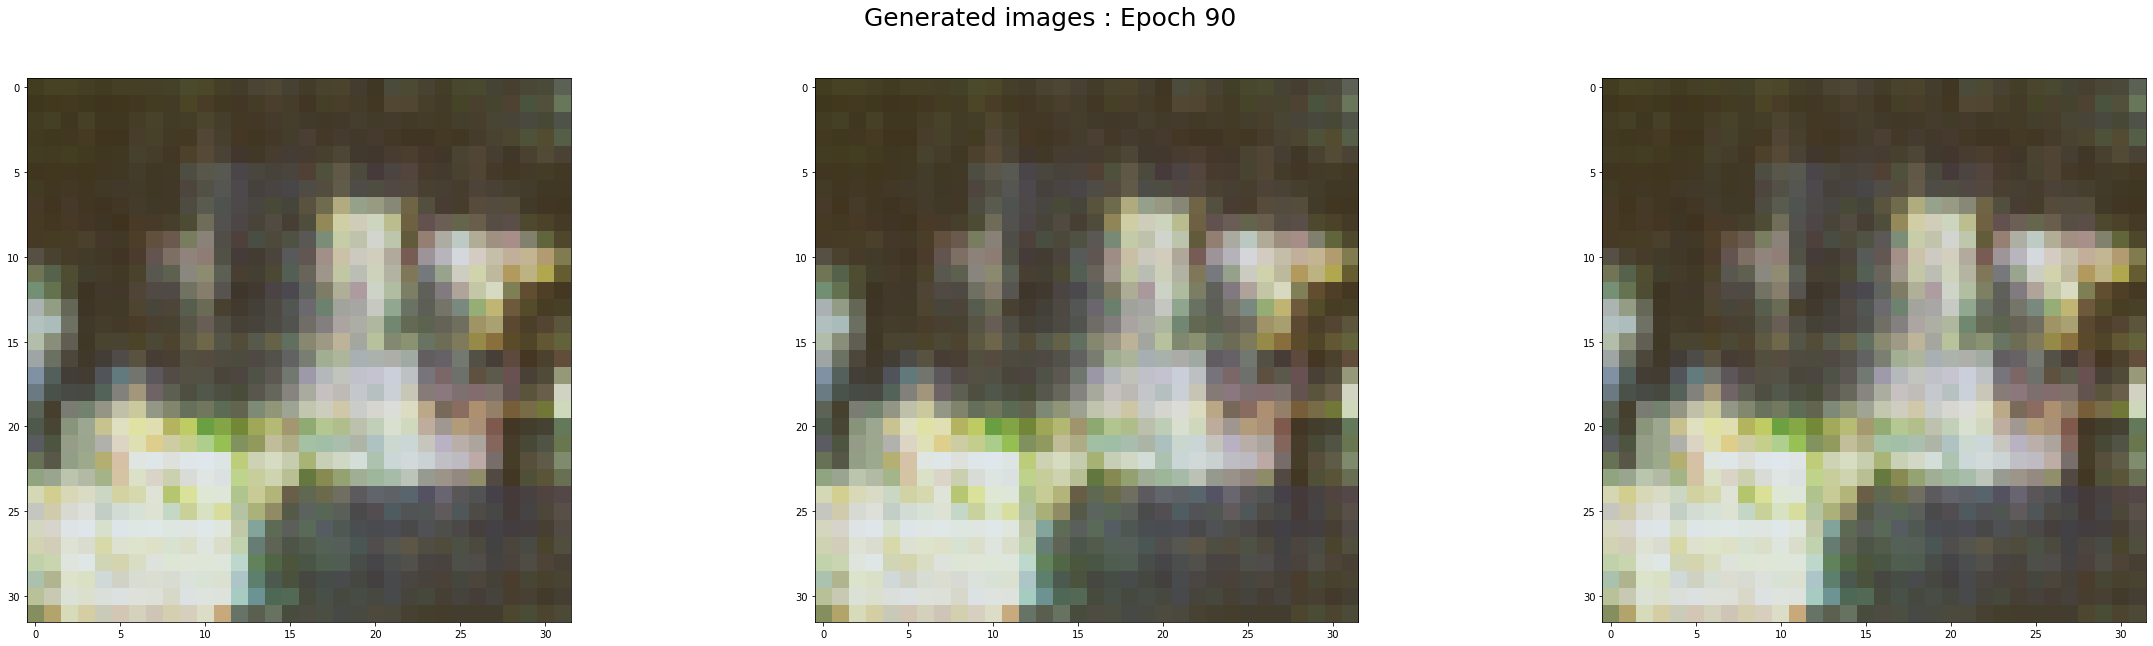

---------------------------------------------------------------
epoch :  91  d_loss_accuracy  =  [0.04497933387756348, 0.9921875]  g_loss =  0.7332298755645752


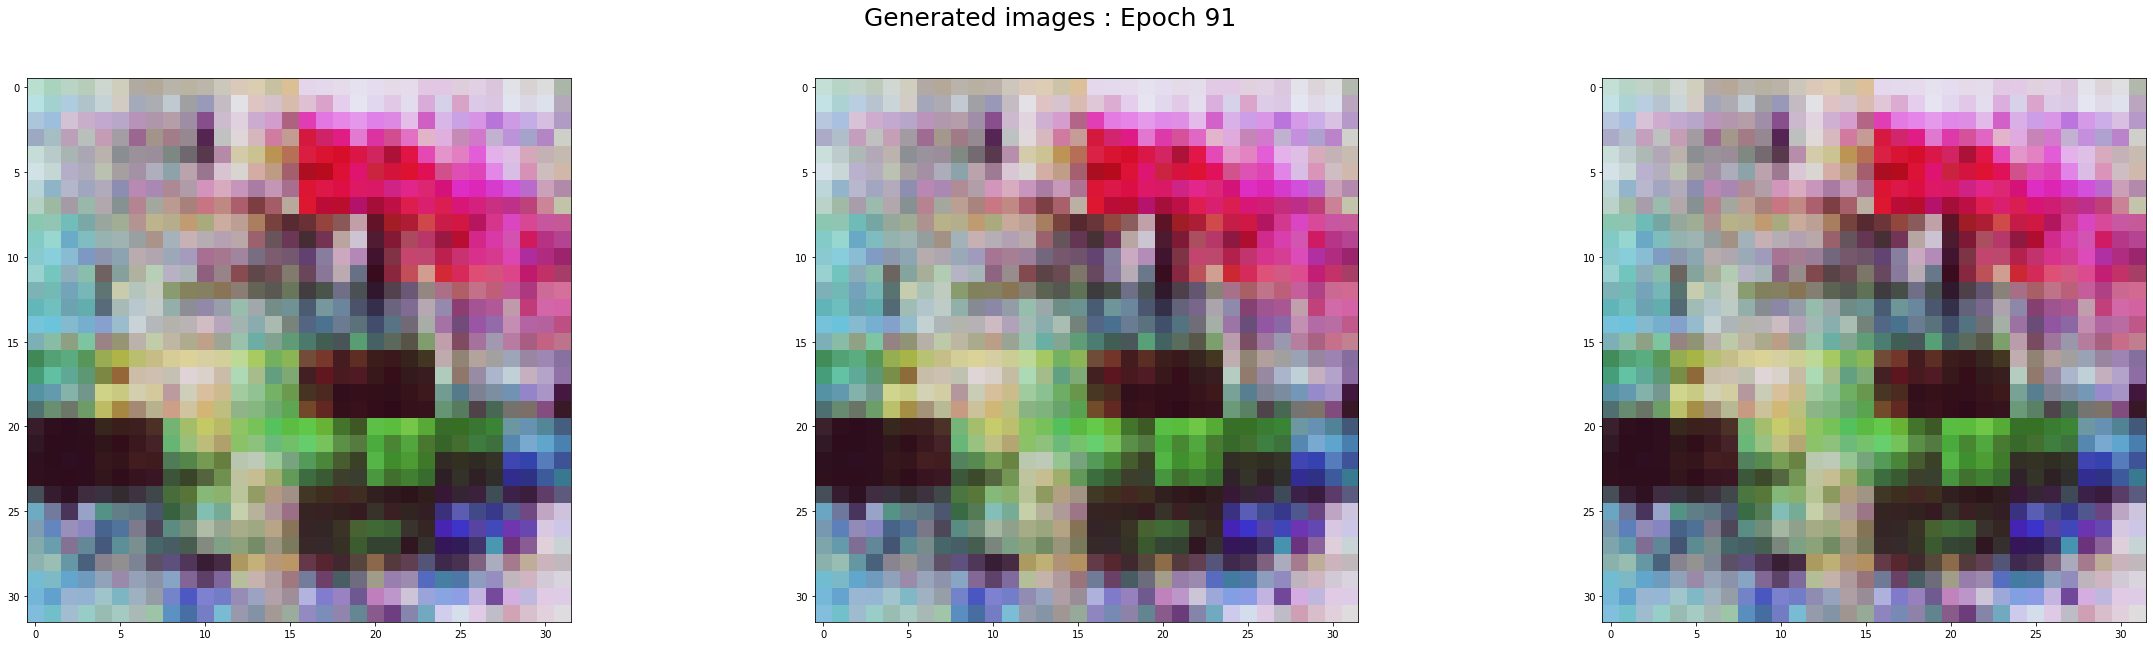

---------------------------------------------------------------
epoch :  92  d_loss_accuracy  =  [0.1283142864704132, 0.94921875]  g_loss =  3.358415126800537


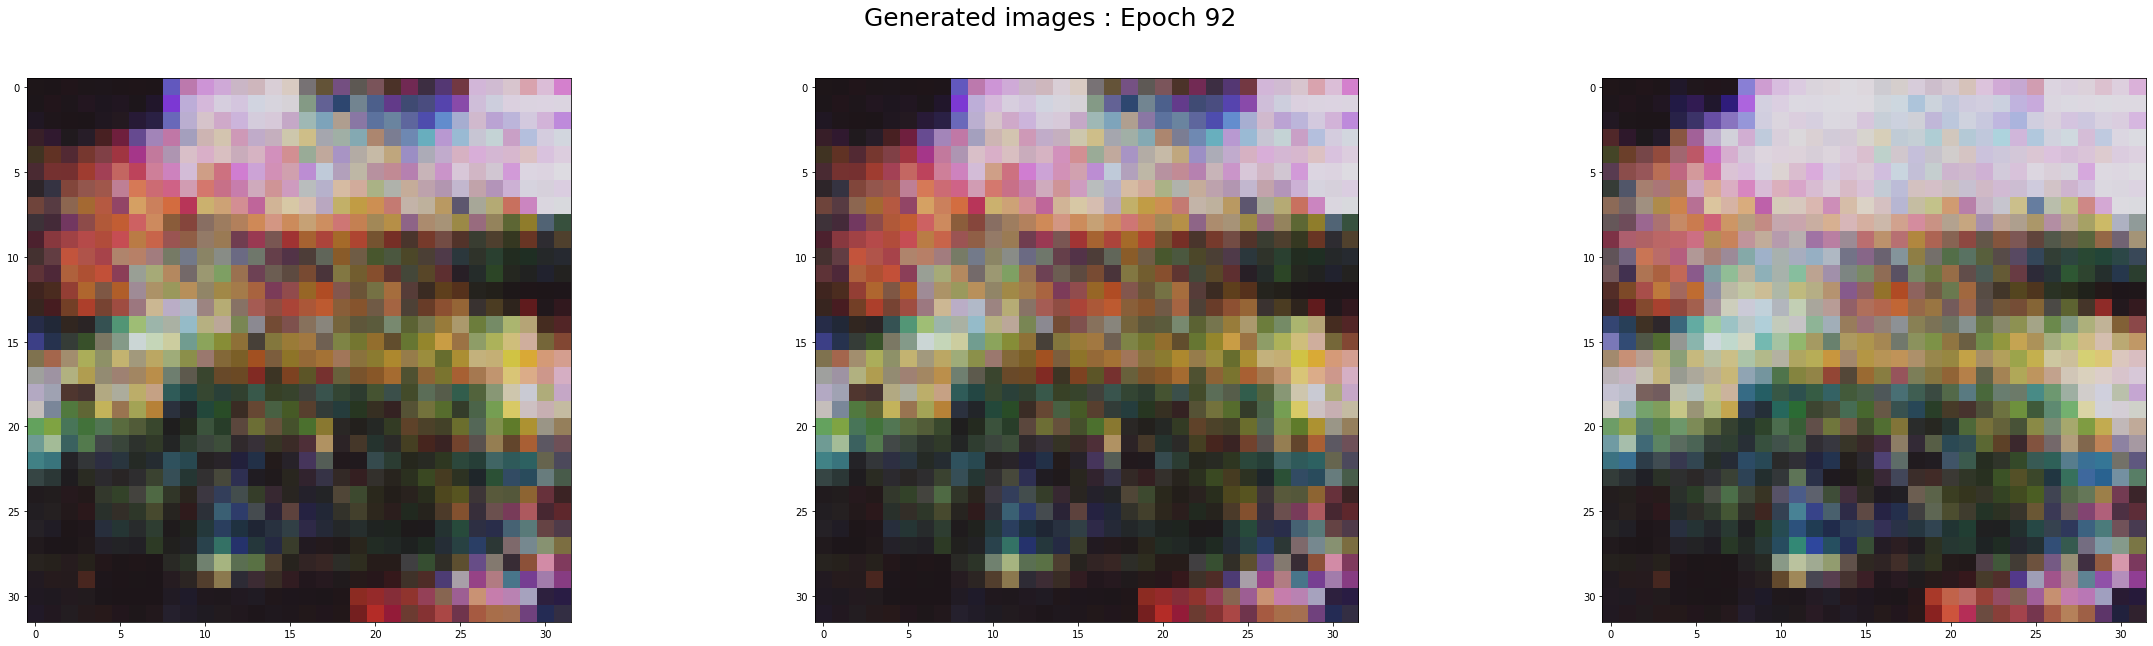

---------------------------------------------------------------
epoch :  93  d_loss_accuracy  =  [0.03595278039574623, 0.9921875]  g_loss =  0.04811479151248932


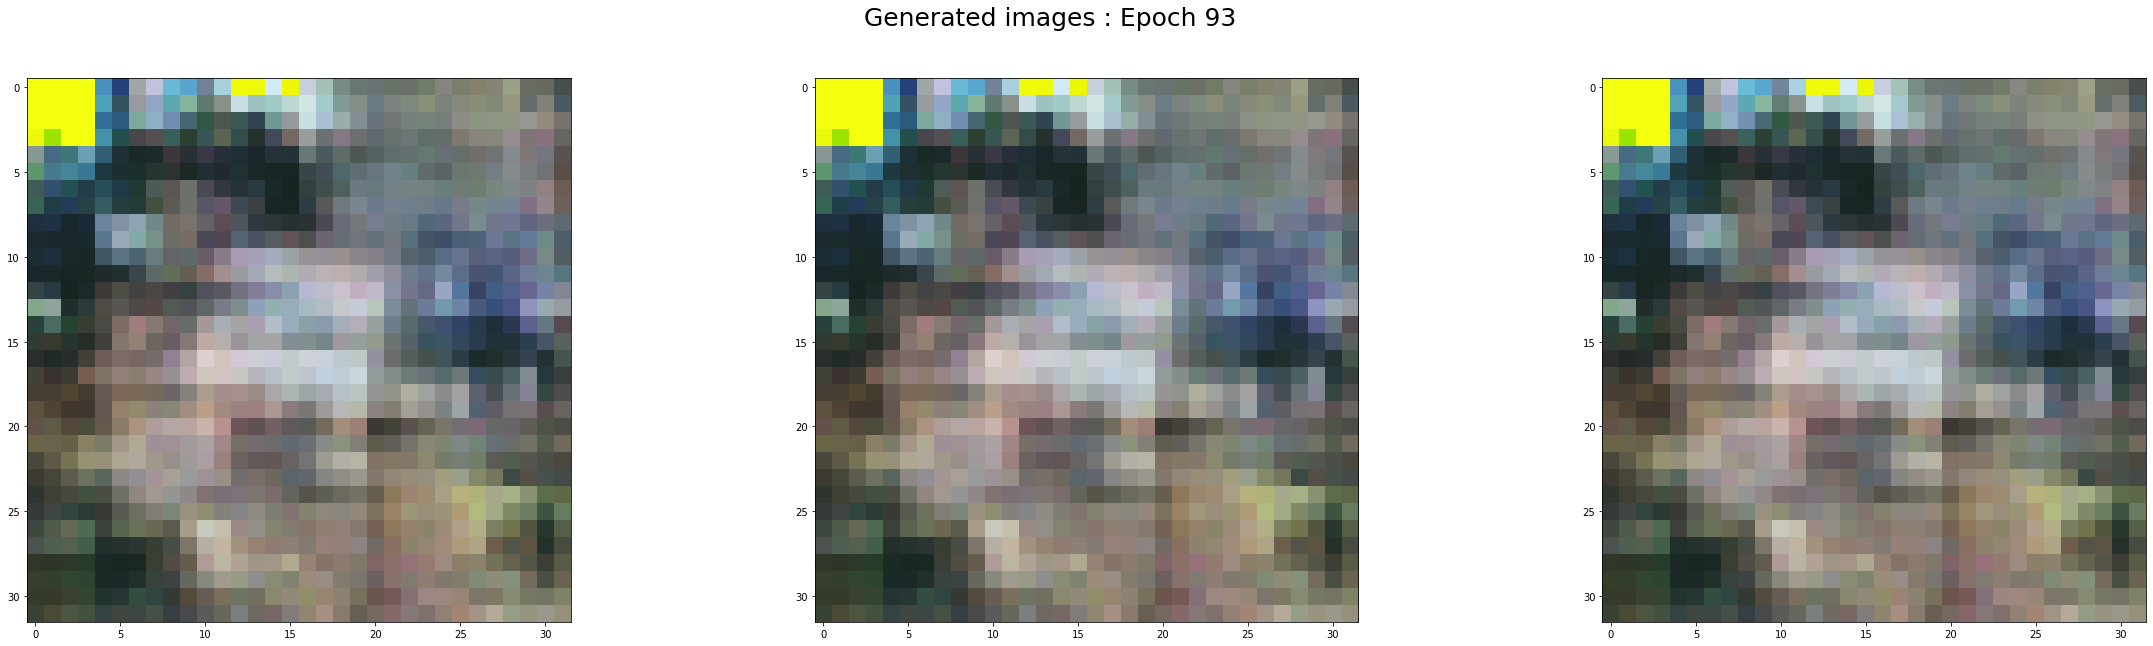

---------------------------------------------------------------
epoch :  94  d_loss_accuracy  =  [0.04960213229060173, 0.9921875]  g_loss =  0.6014887690544128


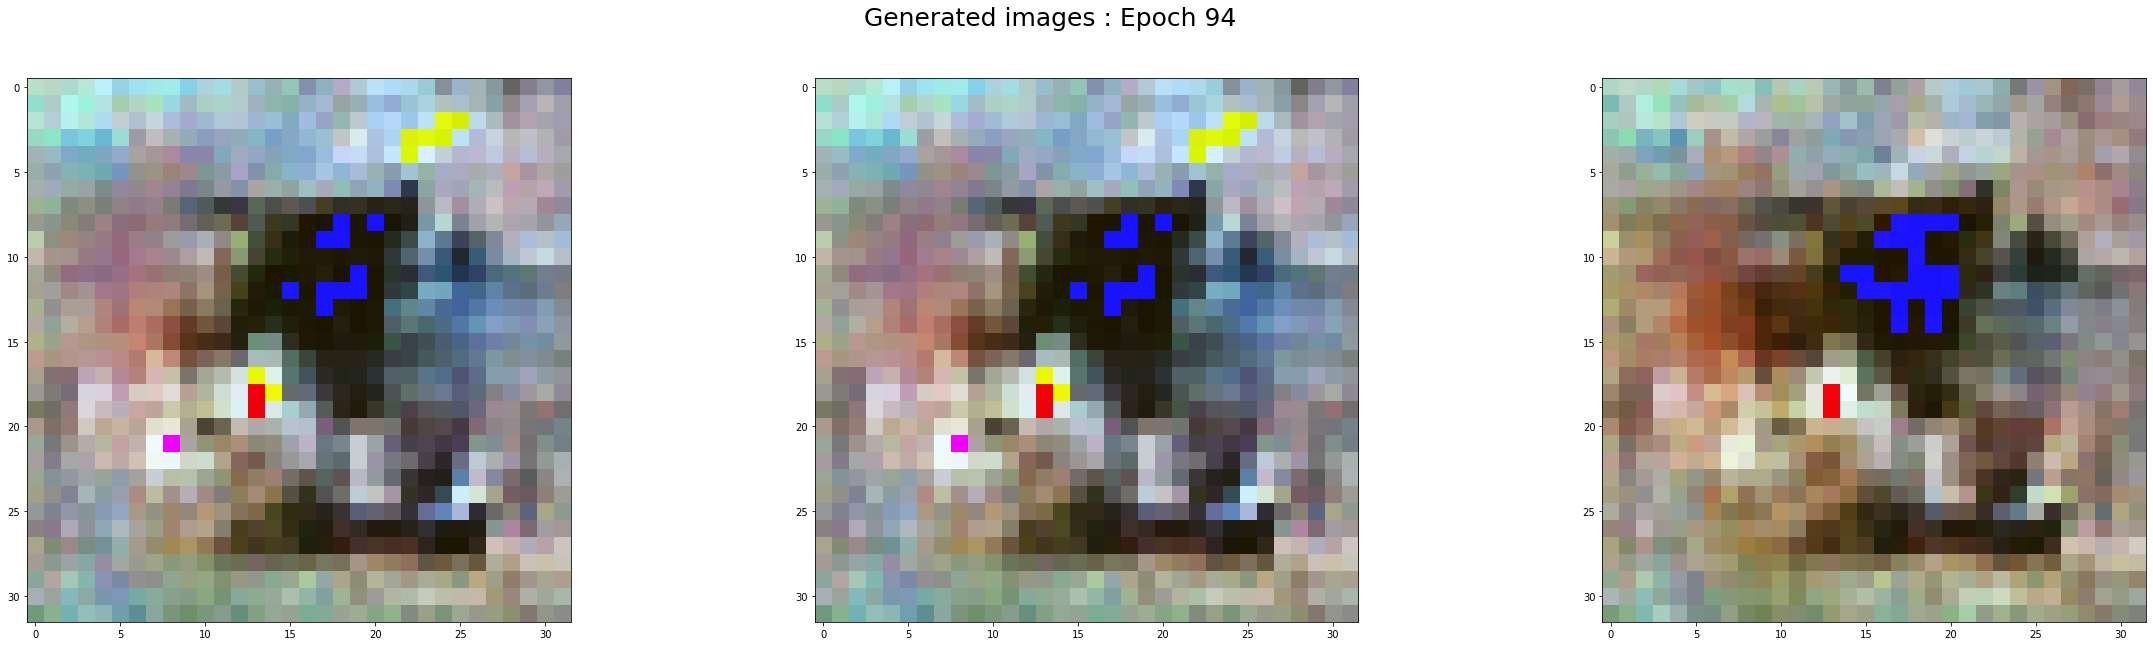

---------------------------------------------------------------
epoch :  95  d_loss_accuracy  =  [0.008601089008152485, 0.99609375]  g_loss =  0.2106265276670456


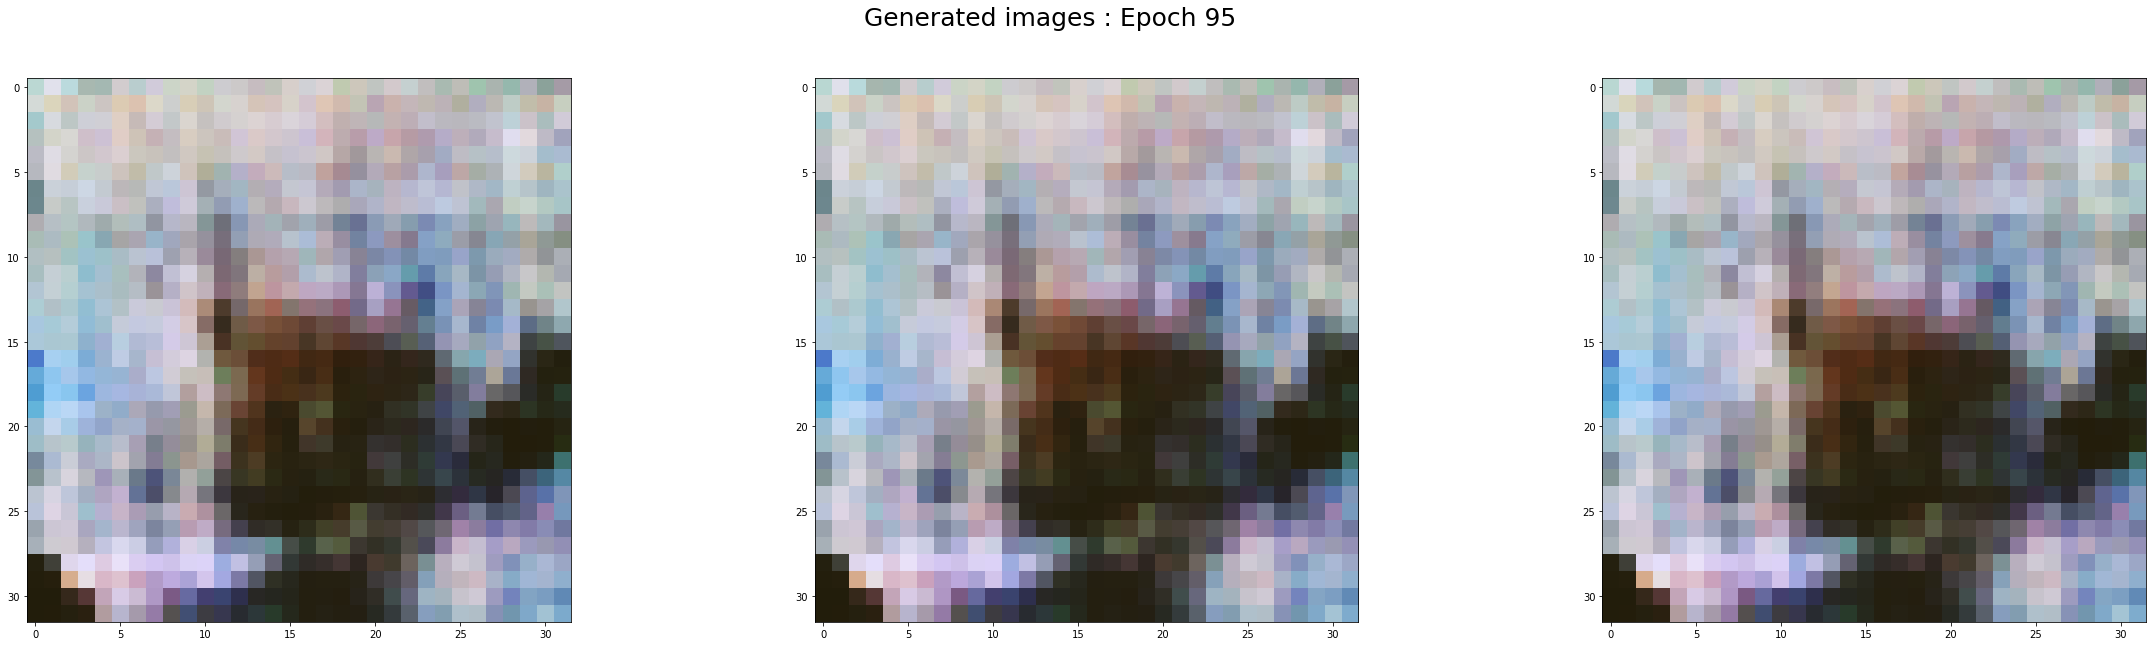

---------------------------------------------------------------
epoch :  96  d_loss_accuracy  =  [0.13056424260139465, 0.96875]  g_loss =  6.9781599044799805


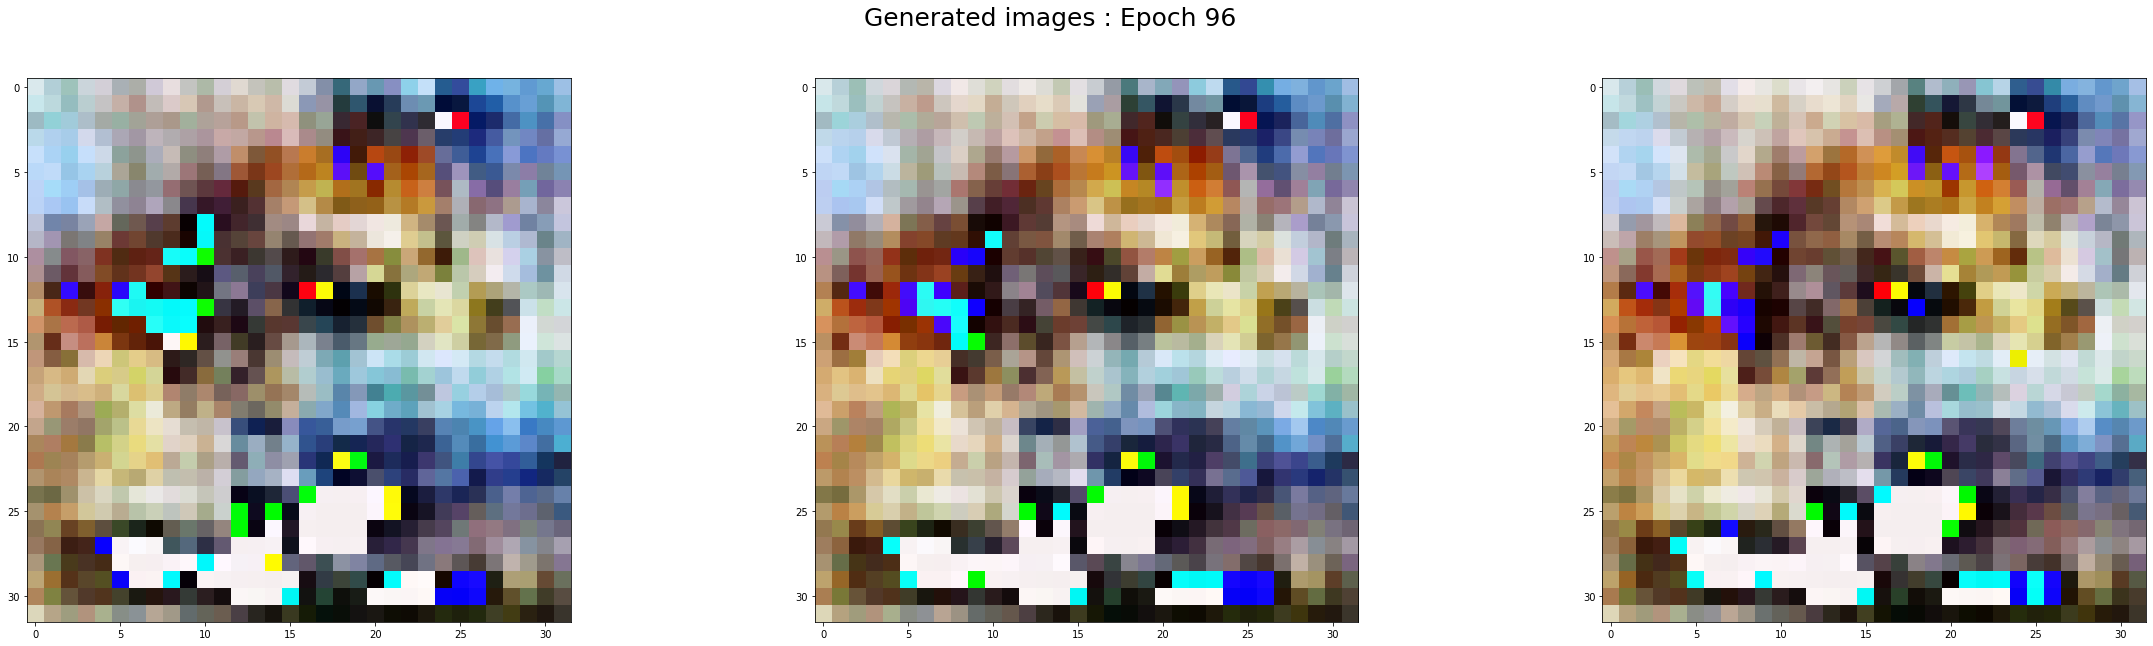

---------------------------------------------------------------
epoch :  97  d_loss_accuracy  =  [0.0019885238725692034, 1.0]  g_loss =  0.06360112130641937


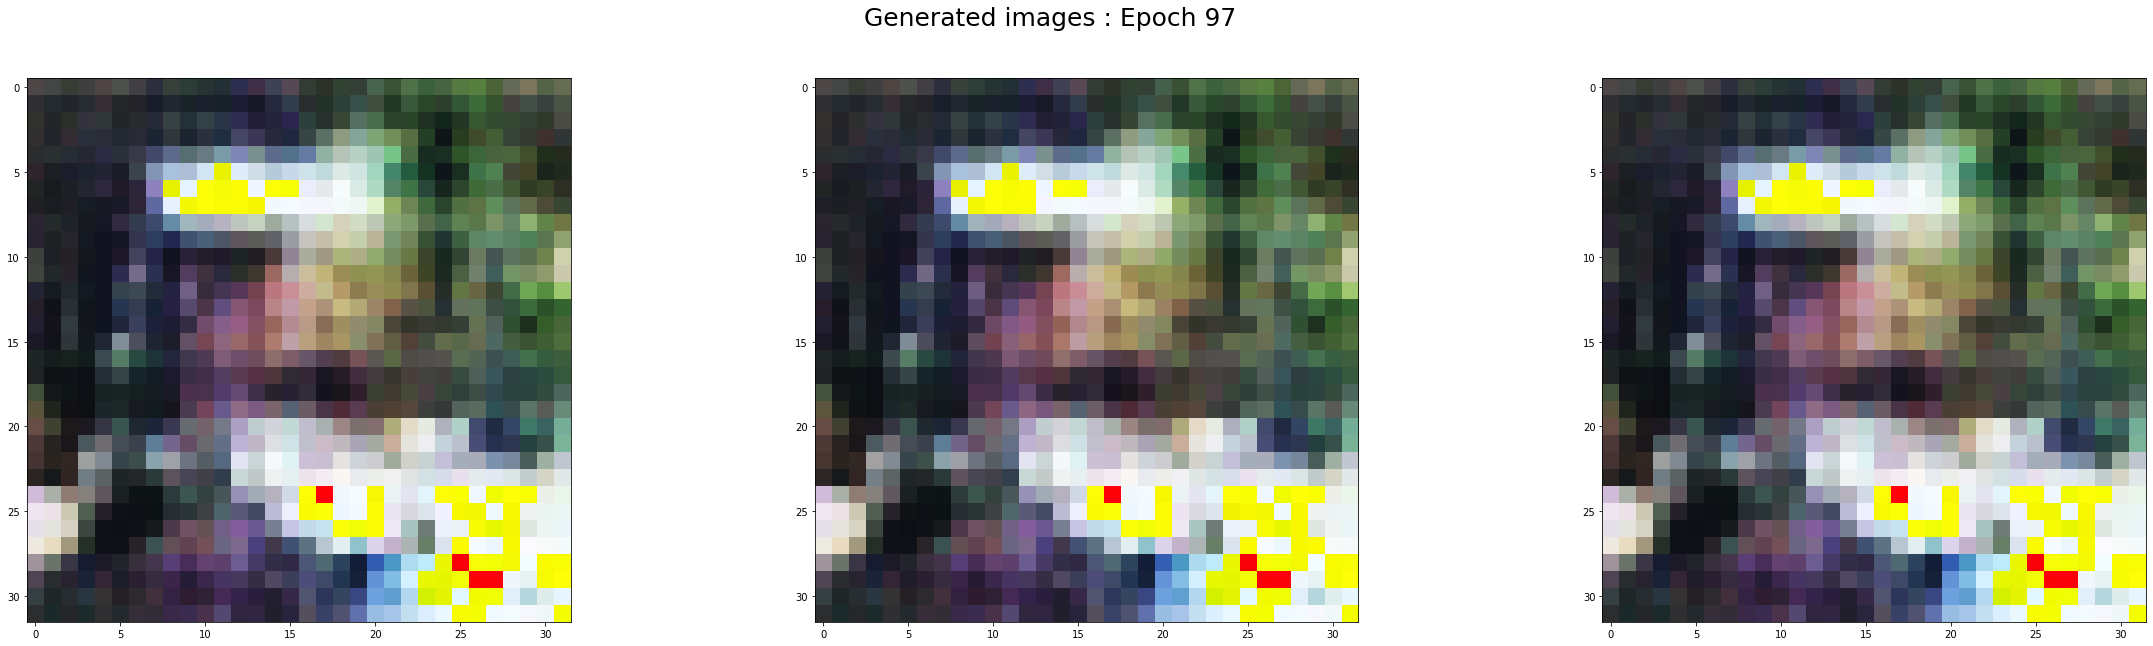

---------------------------------------------------------------
epoch :  98  d_loss_accuracy  =  [0.02628234773874283, 0.9921875]  g_loss =  0.3571774661540985


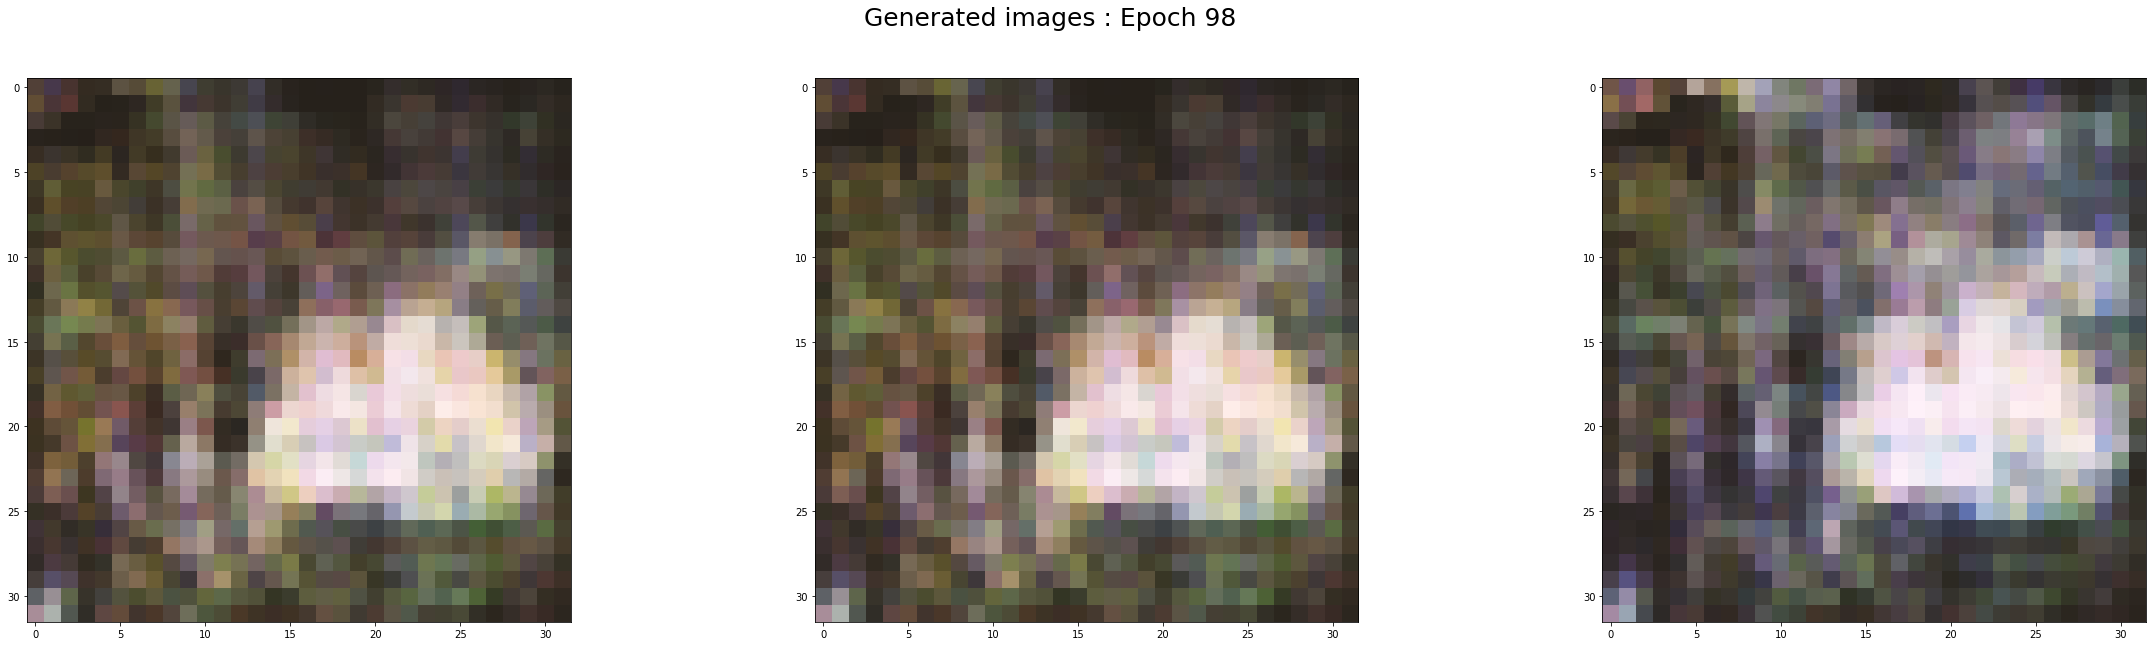

---------------------------------------------------------------
epoch :  99  d_loss_accuracy  =  [0.006296719890087843, 0.99609375]  g_loss =  0.024944309145212173


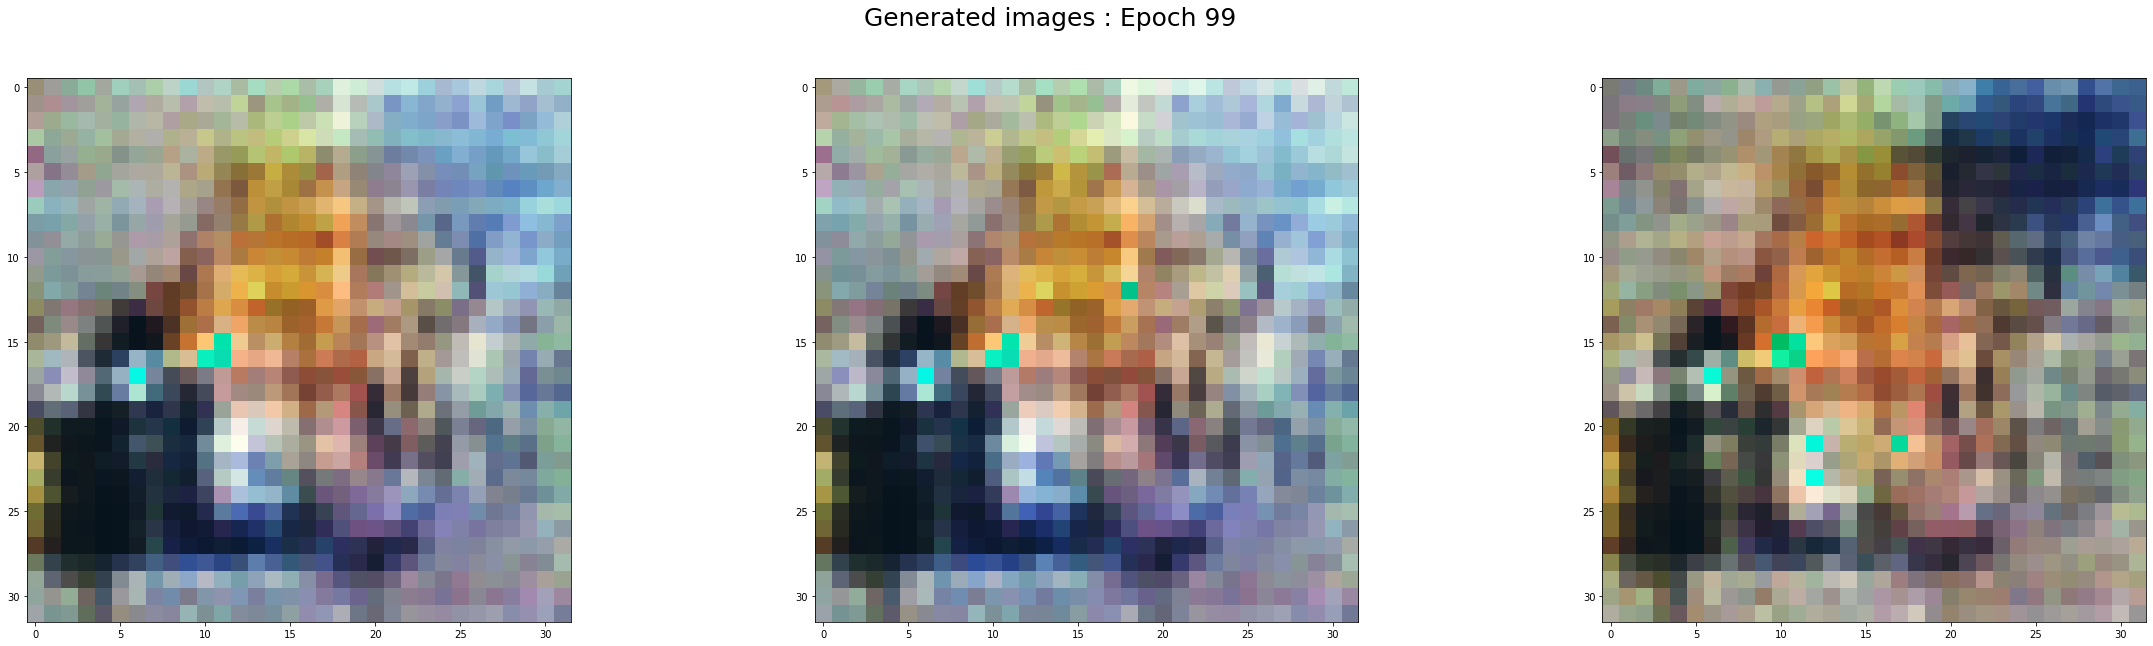

---------------------------------------------------------------
epoch :  100  d_loss_accuracy  =  [0.005174554418772459, 1.0]  g_loss =  0.03471677377820015


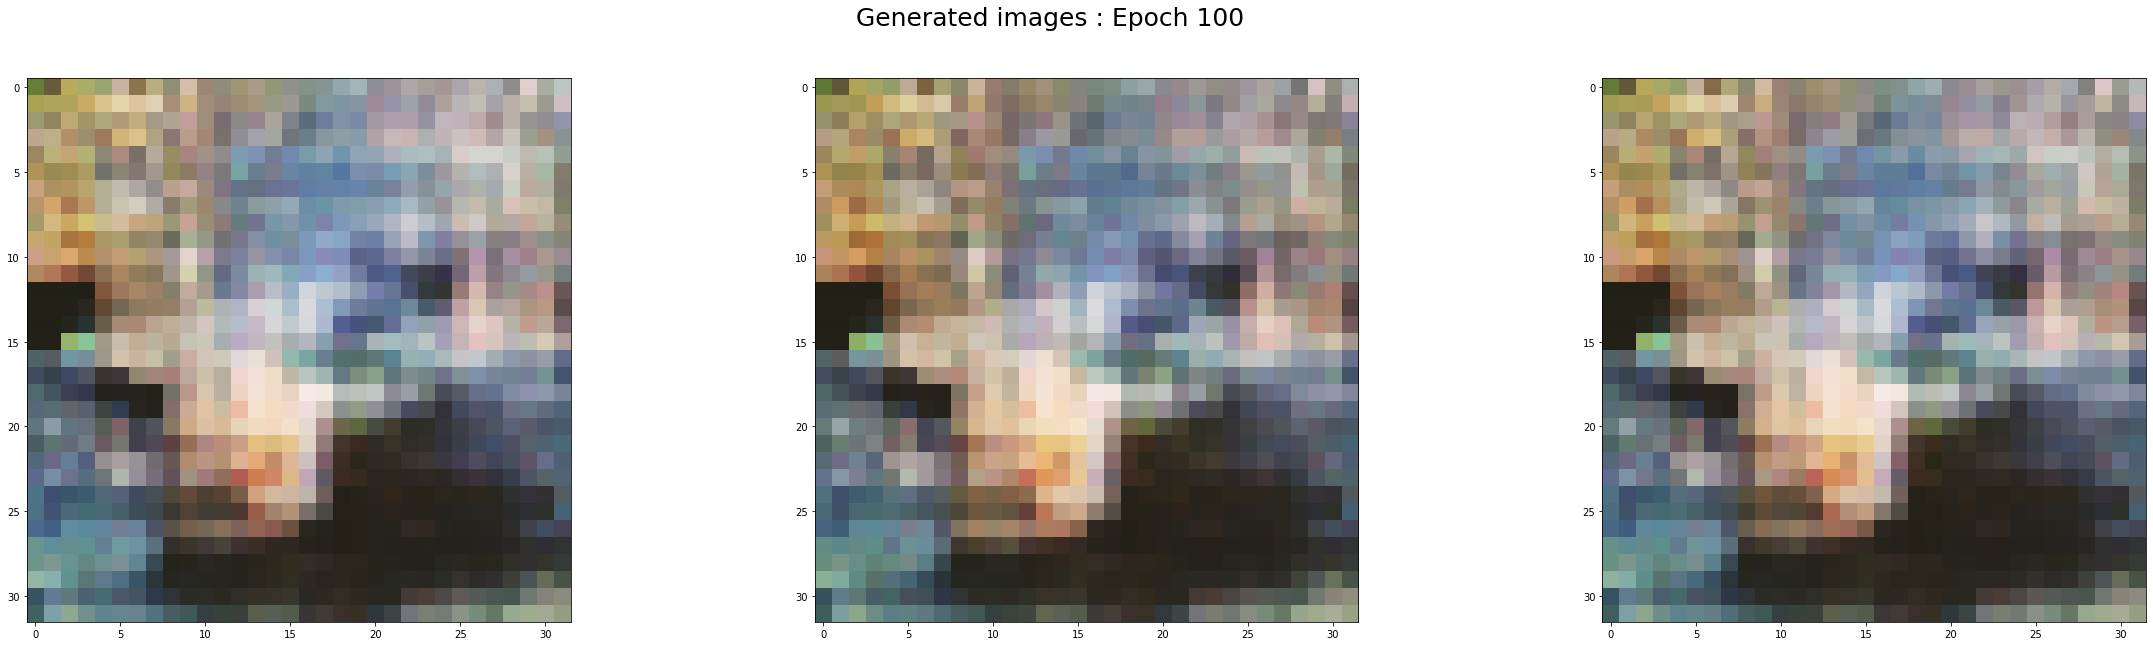

---------------------------------------------------------------
epoch :  101  d_loss_accuracy  =  [0.004253321792930365, 1.0]  g_loss =  0.10364588350057602


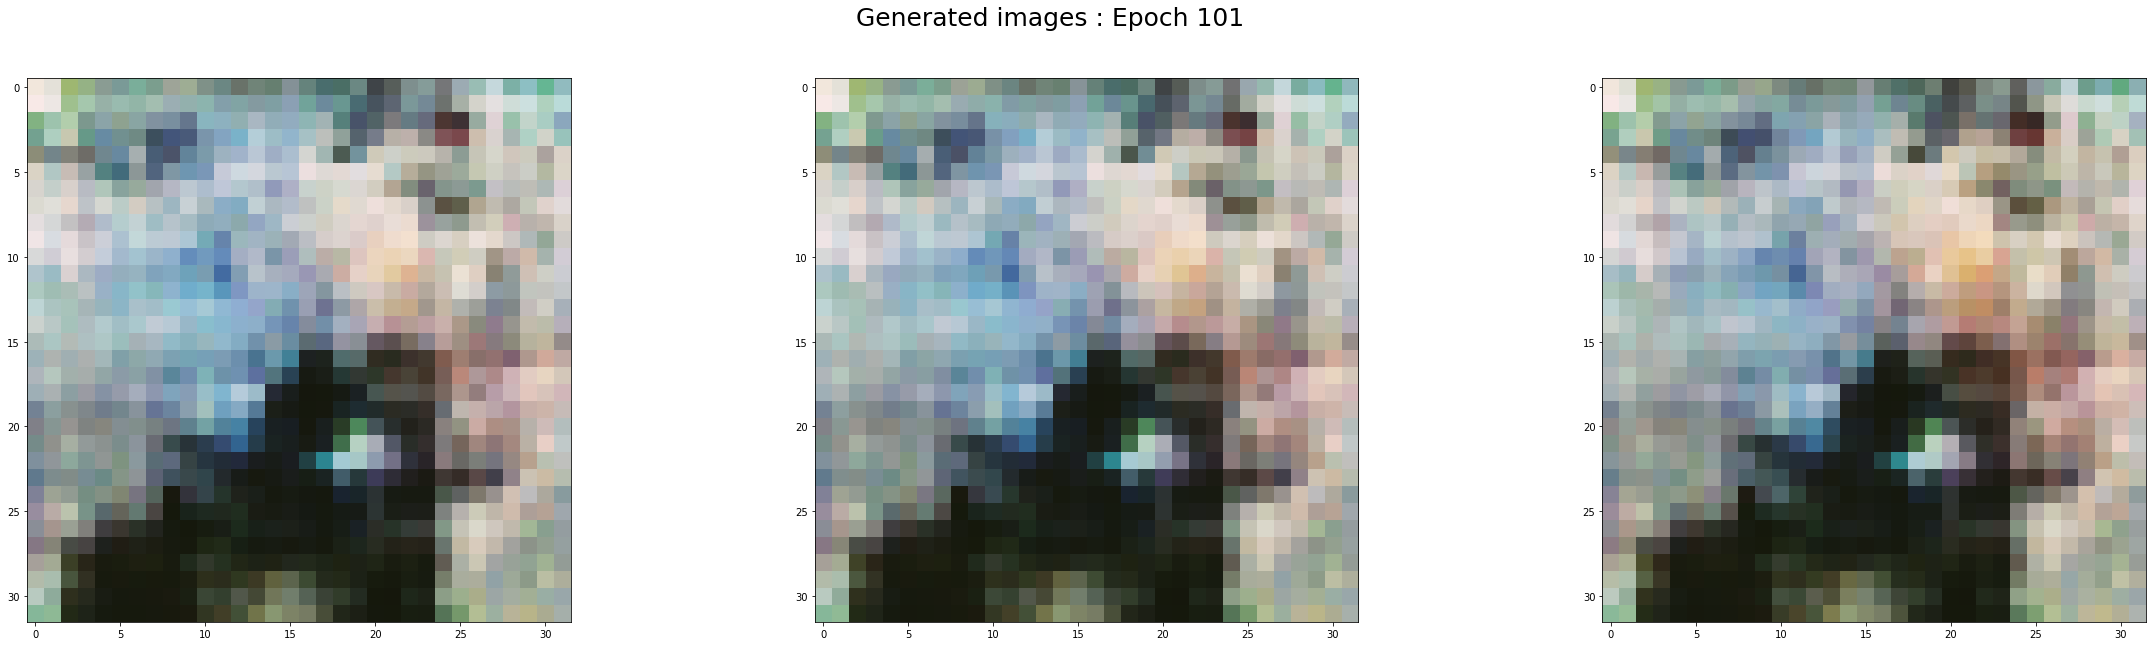

---------------------------------------------------------------
epoch :  102  d_loss_accuracy  =  [0.047978565096855164, 0.984375]  g_loss =  0.07519854605197906


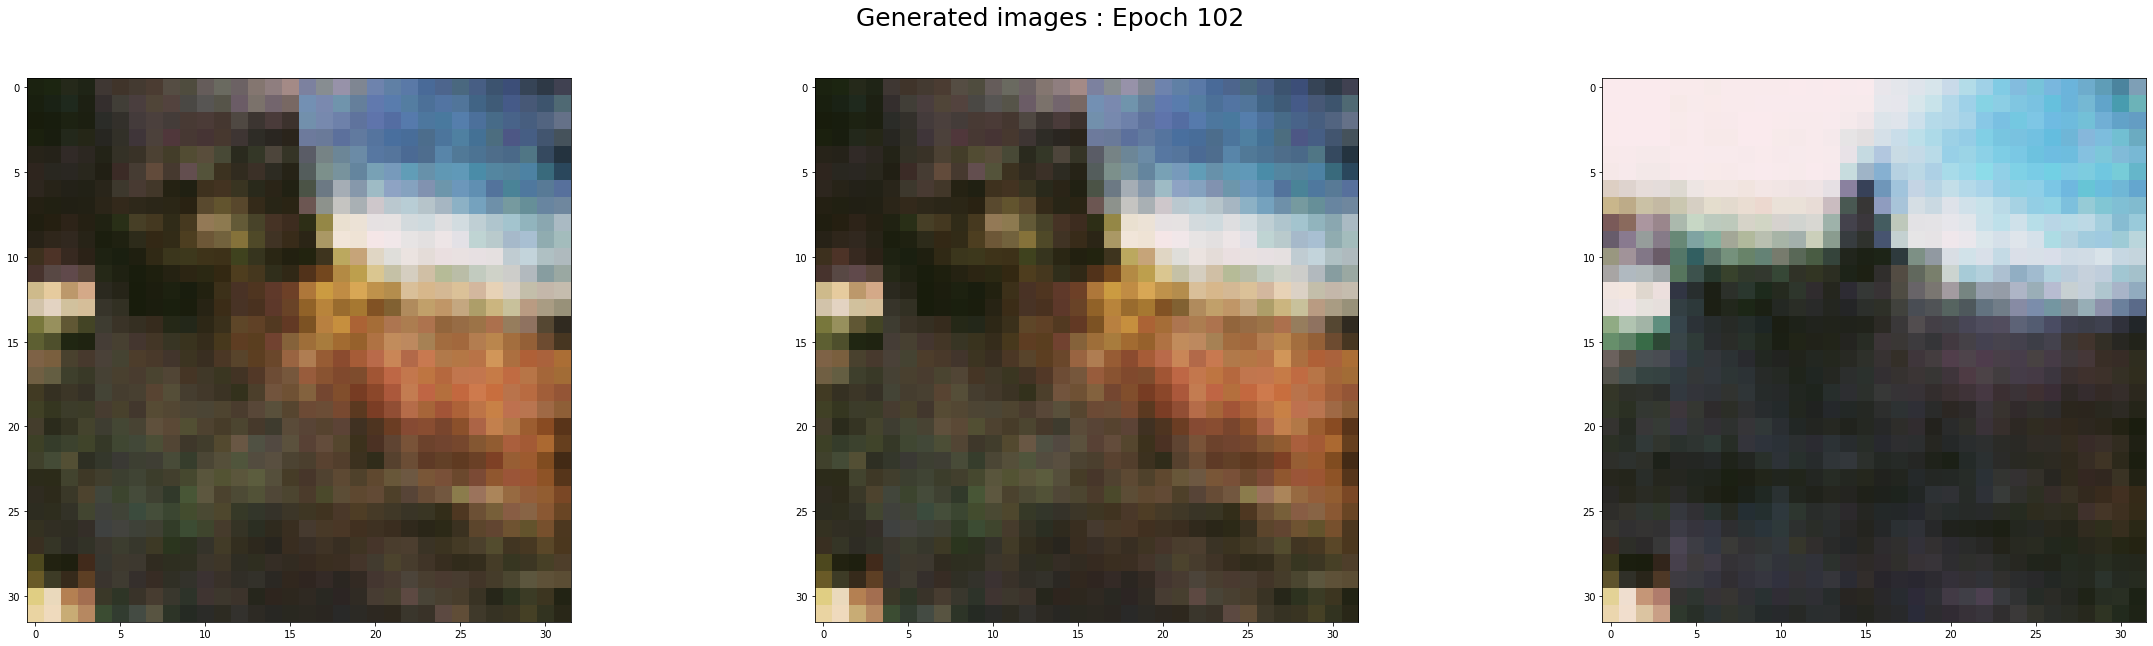

---------------------------------------------------------------
epoch :  103  d_loss_accuracy  =  [0.016341600567102432, 0.9921875]  g_loss =  0.10389174520969391


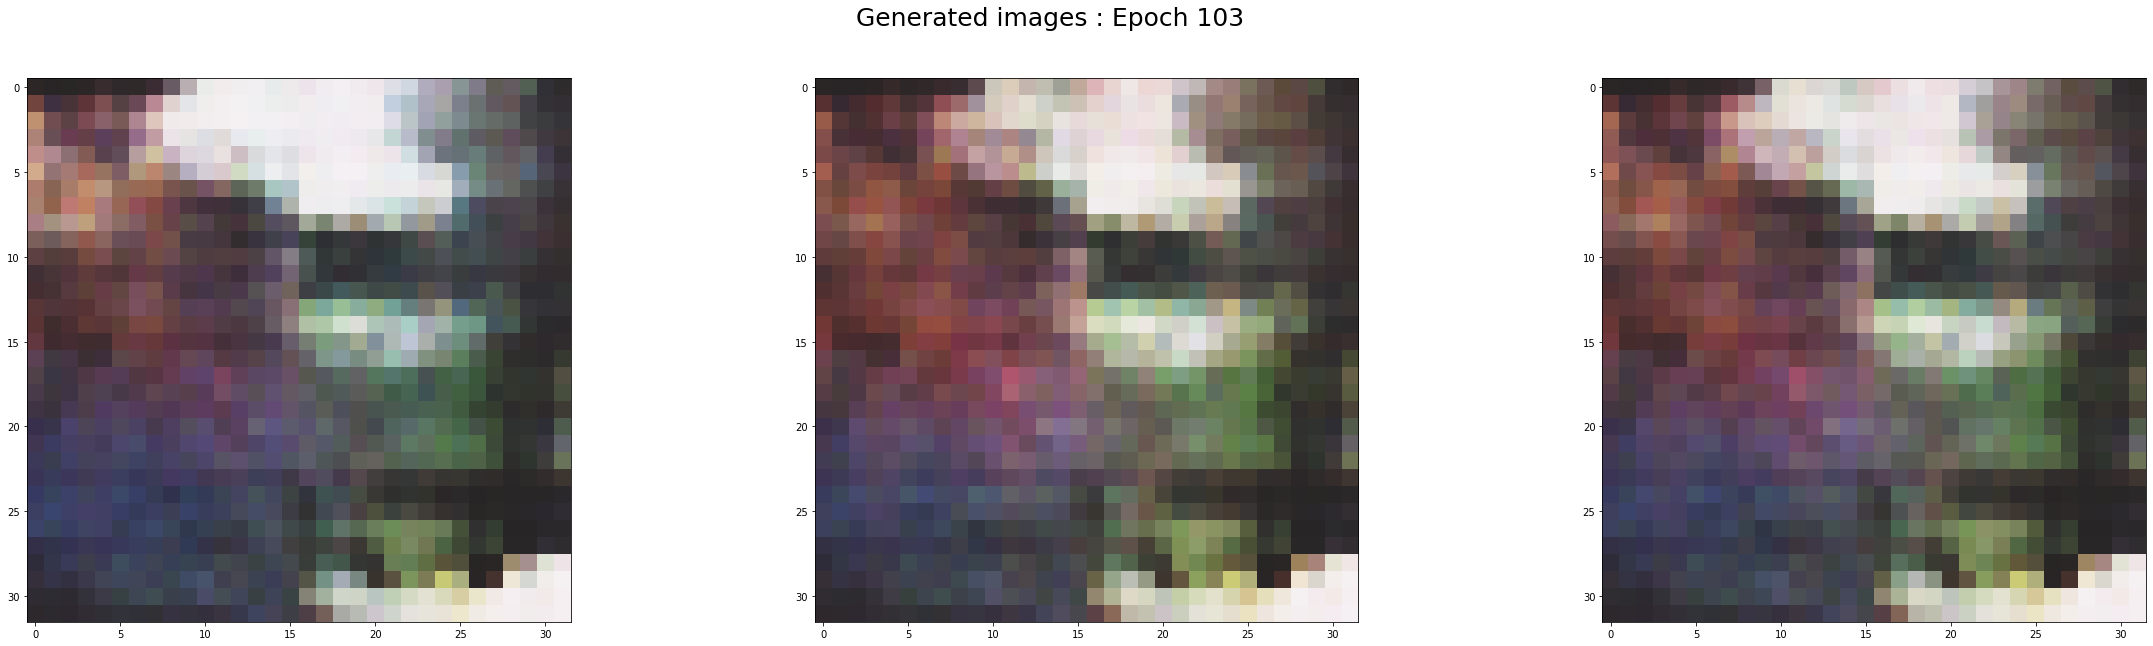

---------------------------------------------------------------
epoch :  104  d_loss_accuracy  =  [0.012748307548463345, 0.99609375]  g_loss =  0.07316659390926361


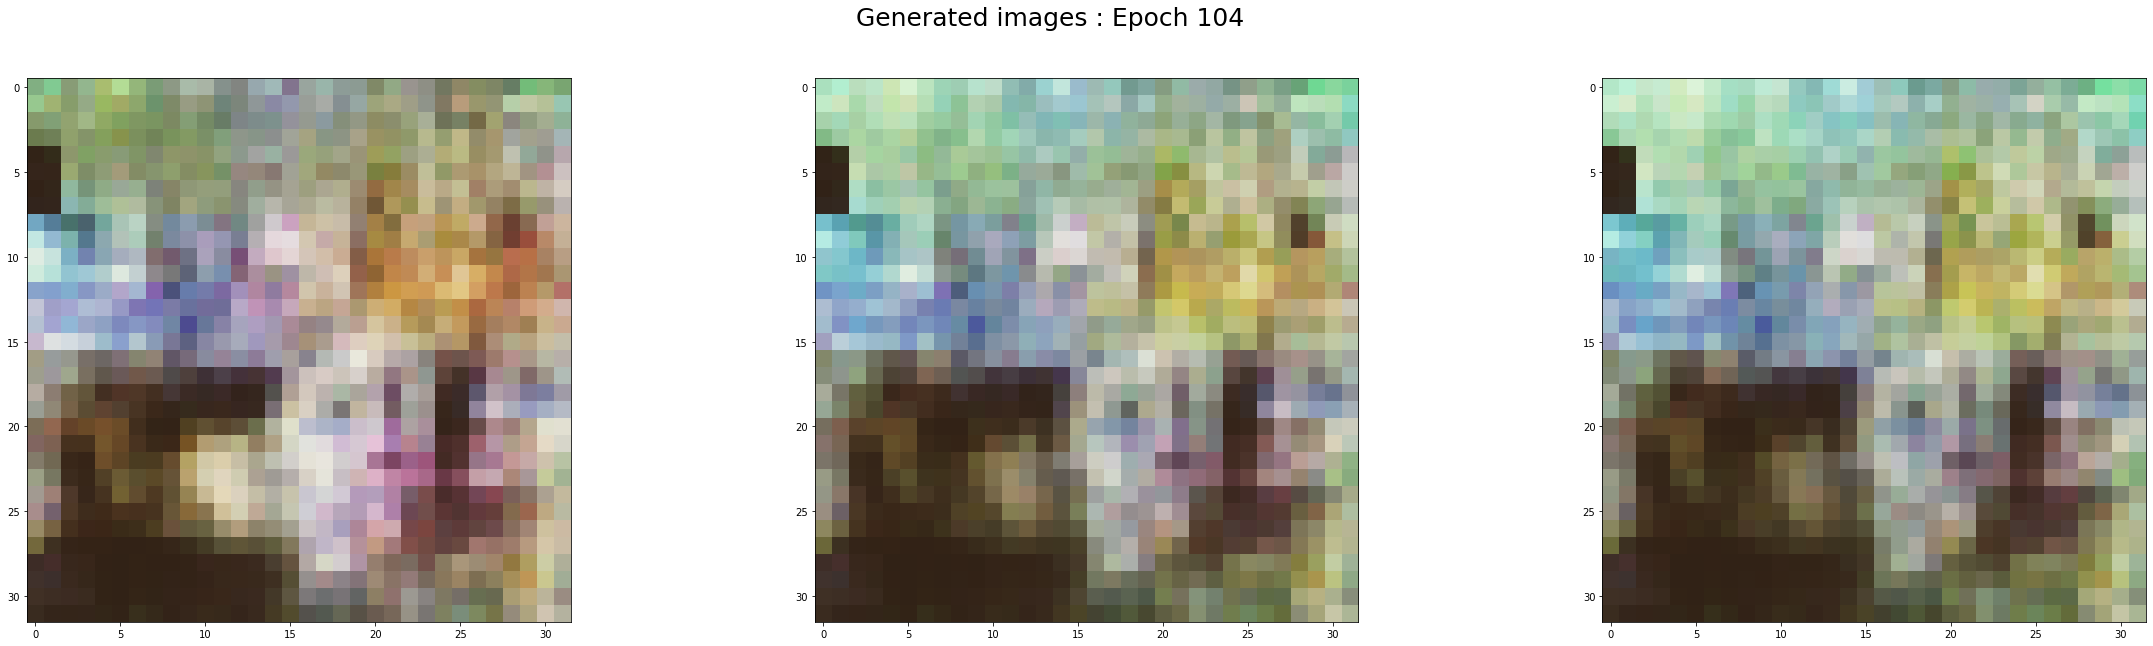

---------------------------------------------------------------
epoch :  105  d_loss_accuracy  =  [0.1412709504365921, 0.95703125]  g_loss =  3.7453463077545166


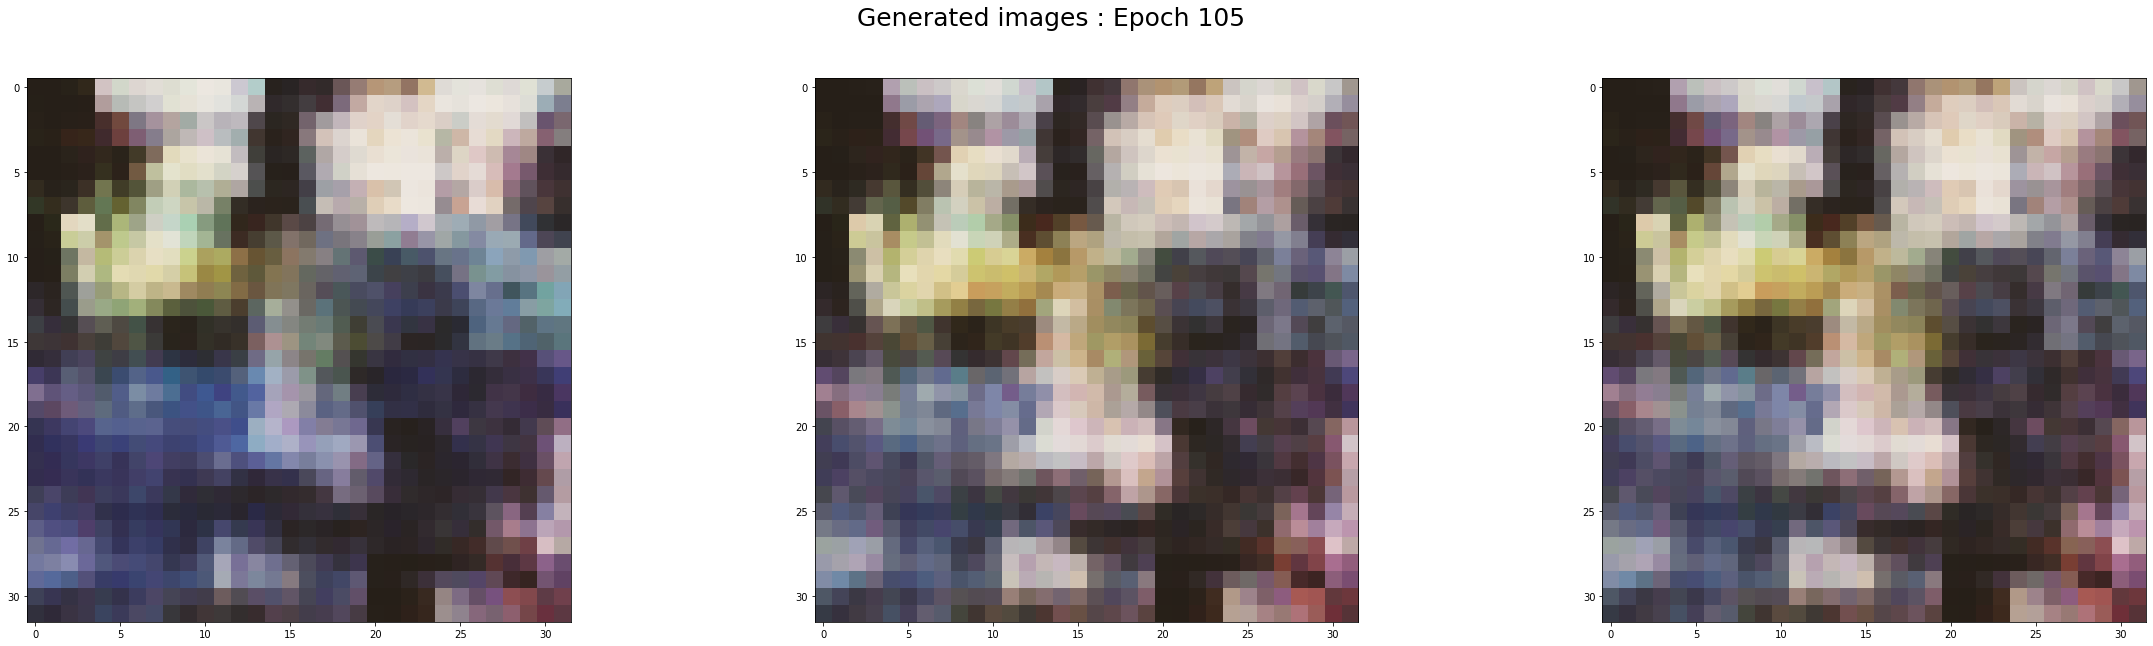

---------------------------------------------------------------
epoch :  106  d_loss_accuracy  =  [0.008054430596530437, 0.99609375]  g_loss =  0.02884281985461712


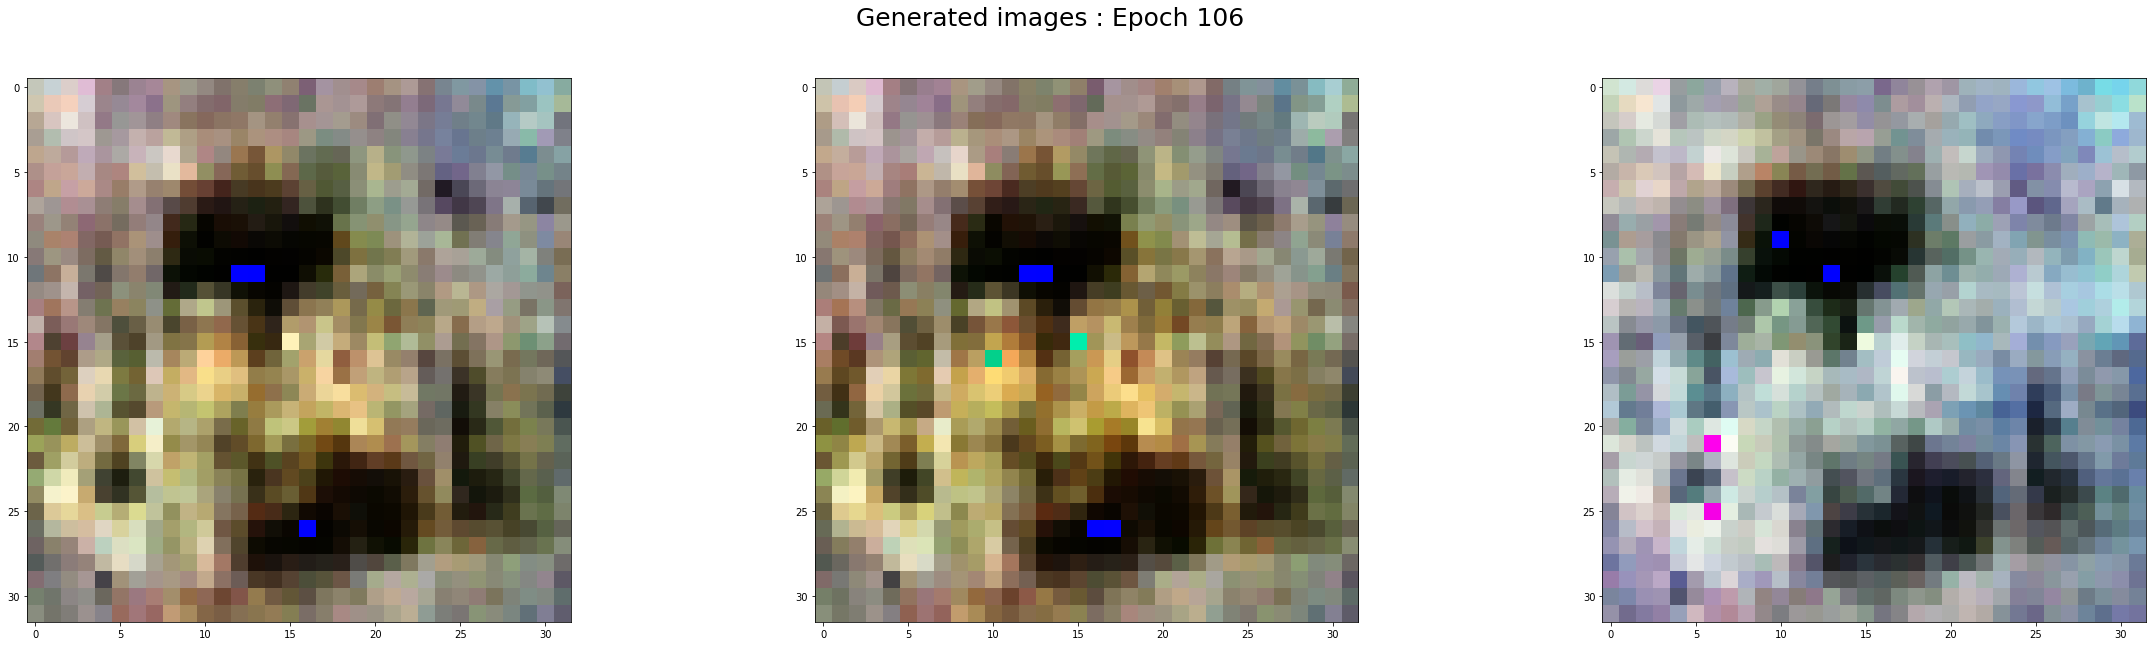

---------------------------------------------------------------
epoch :  107  d_loss_accuracy  =  [0.08093962073326111, 0.98046875]  g_loss =  0.25351107120513916


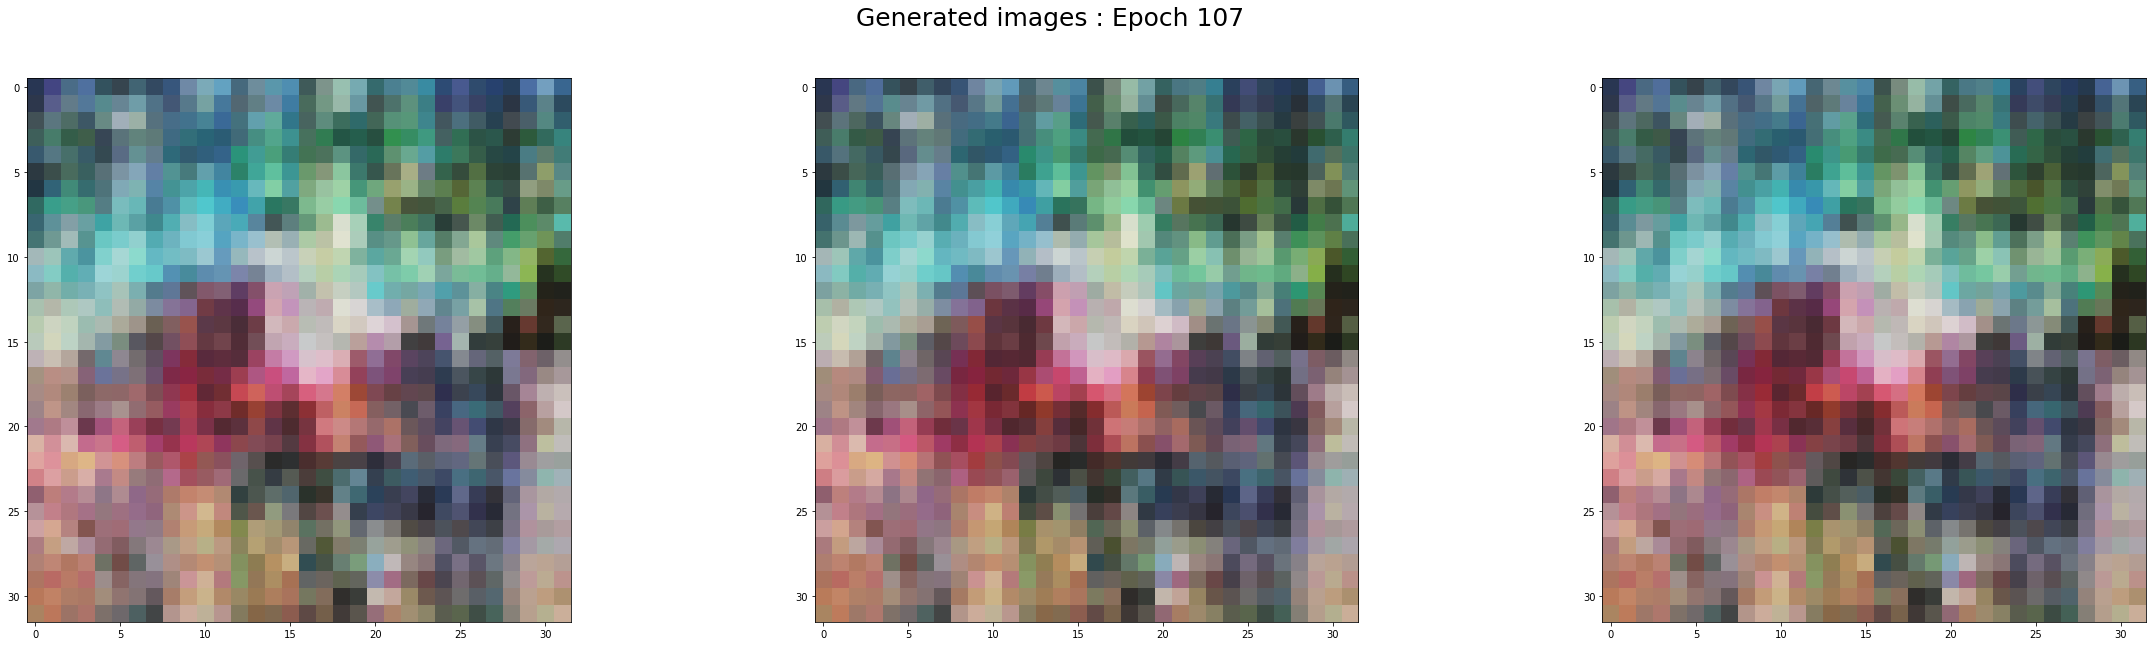

---------------------------------------------------------------
epoch :  108  d_loss_accuracy  =  [0.015844693407416344, 0.99609375]  g_loss =  0.05495382845401764


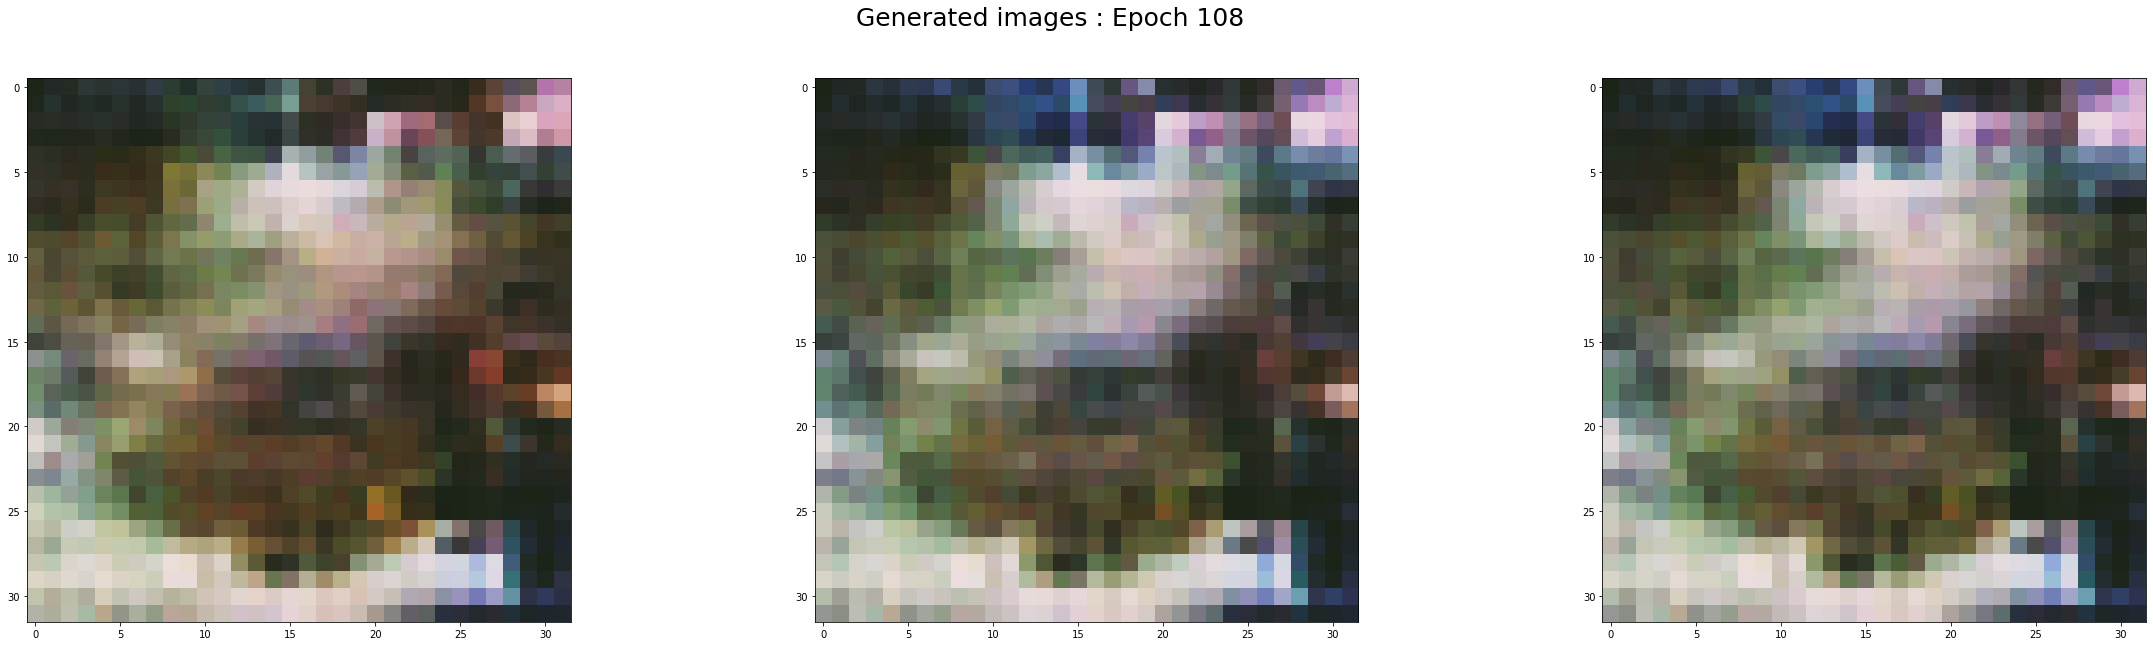

---------------------------------------------------------------
epoch :  109  d_loss_accuracy  =  [0.013130994513630867, 0.99609375]  g_loss =  0.0449775755405426


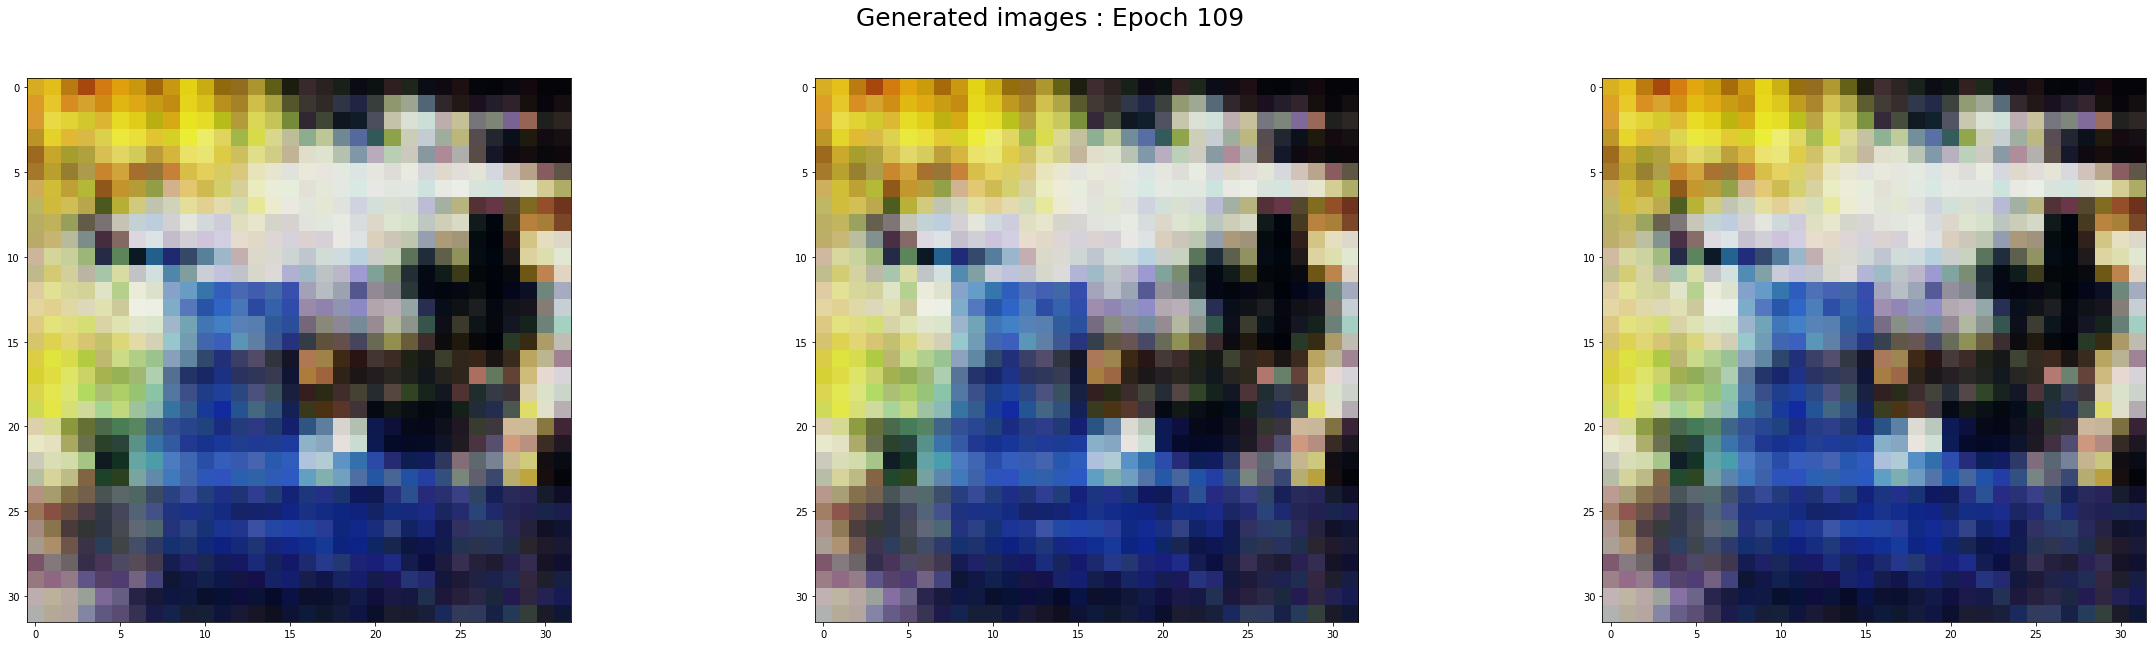

---------------------------------------------------------------
epoch :  110  d_loss_accuracy  =  [0.018060196191072464, 0.99609375]  g_loss =  0.0003796276869252324


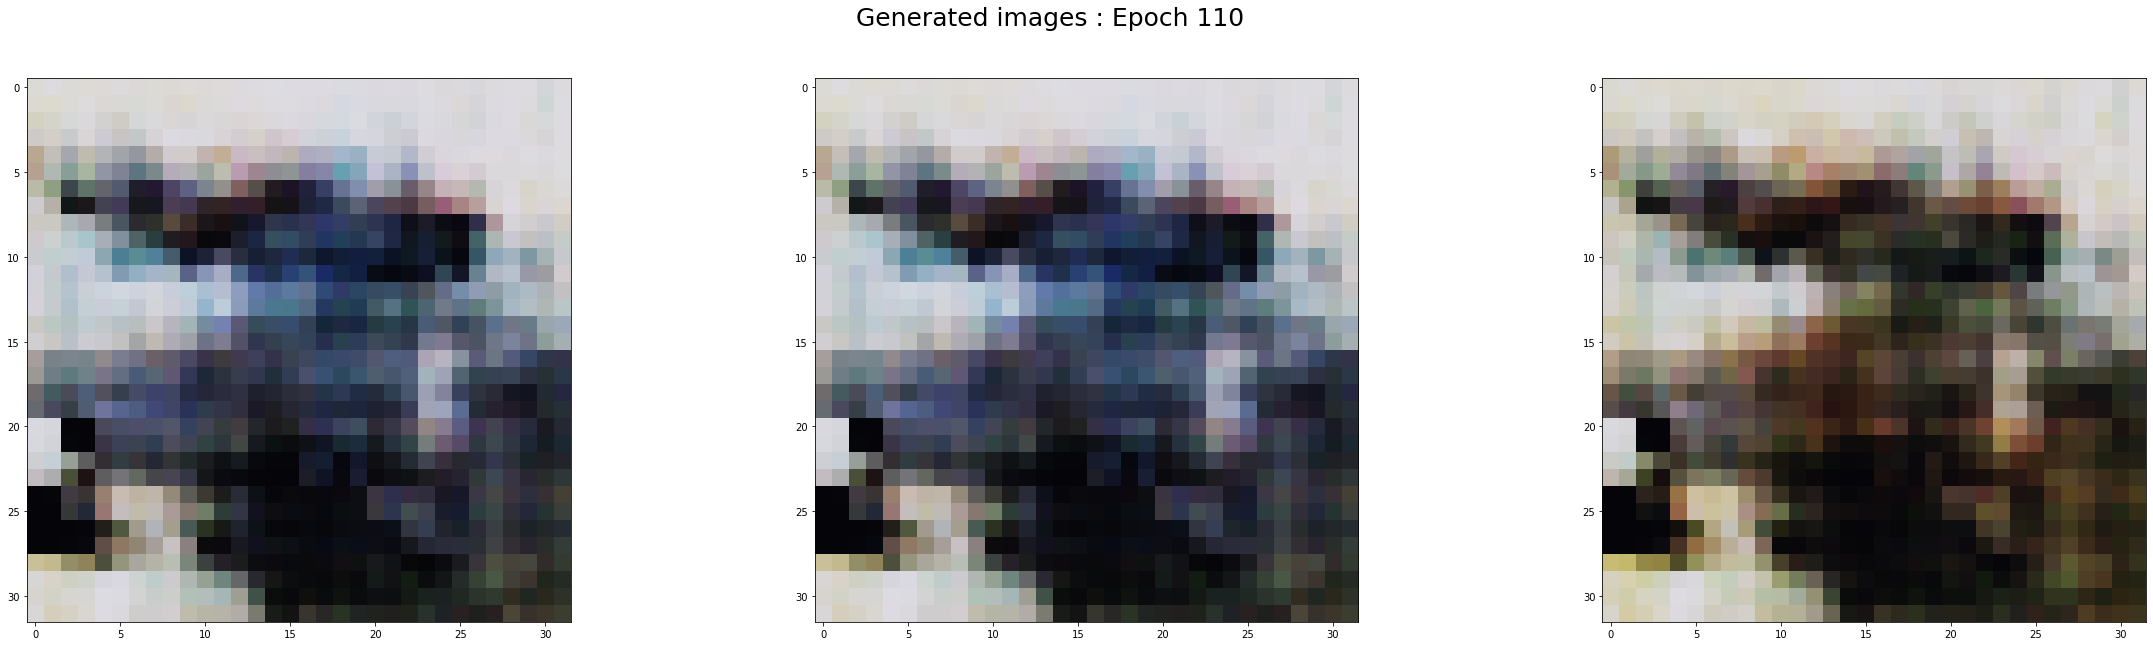

---------------------------------------------------------------
epoch :  111  d_loss_accuracy  =  [0.024912958964705467, 0.9921875]  g_loss =  1.3751553297042847


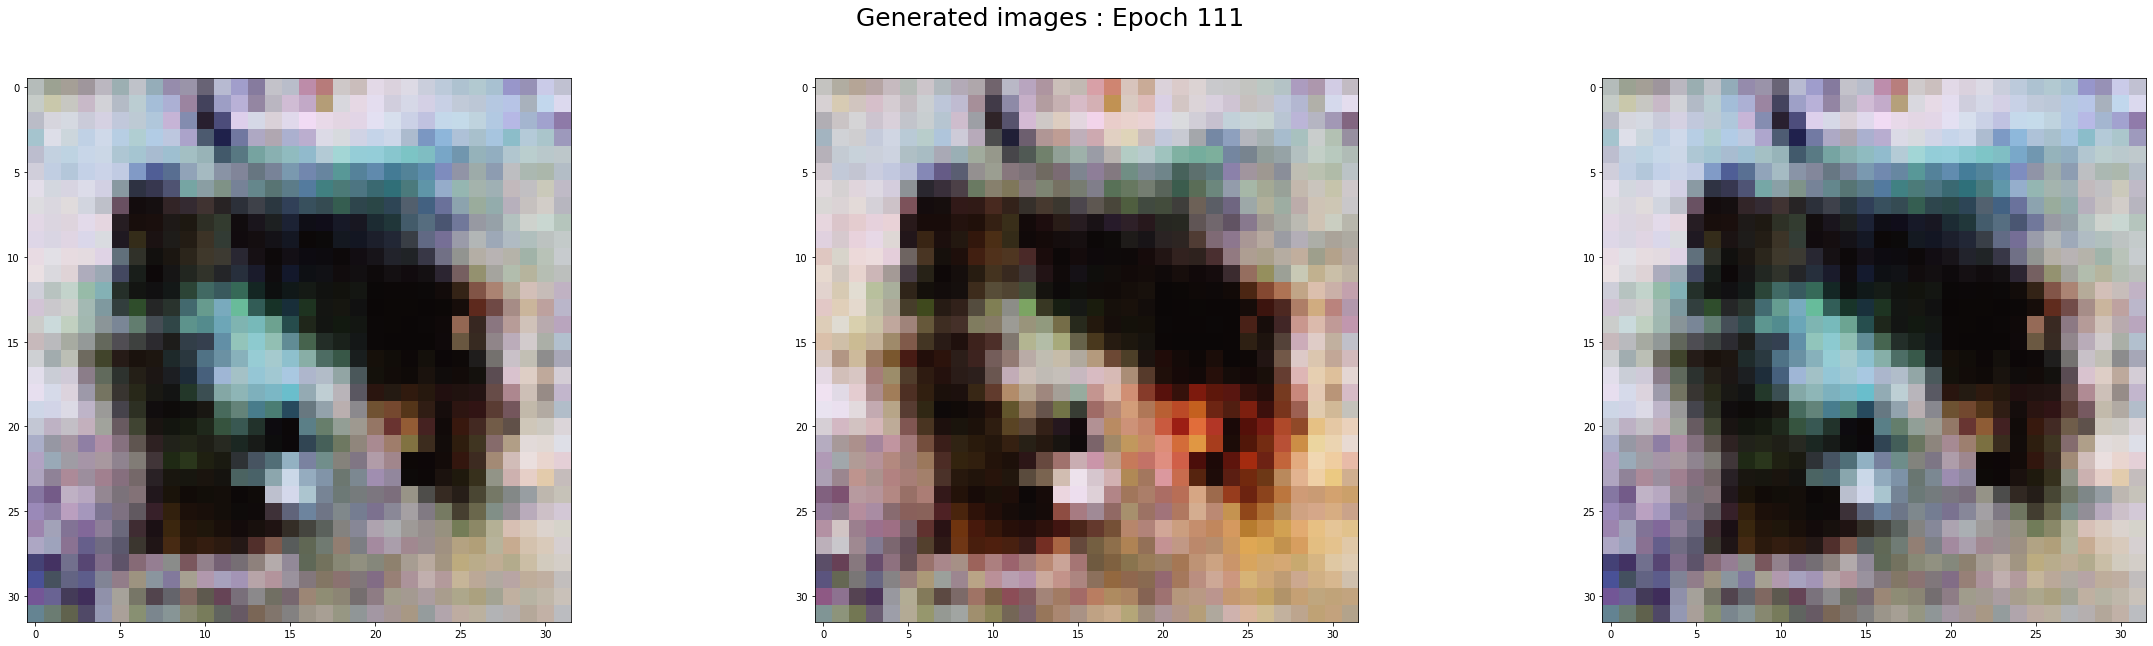

---------------------------------------------------------------
epoch :  112  d_loss_accuracy  =  [0.036537326872348785, 0.99609375]  g_loss =  0.002416582079604268


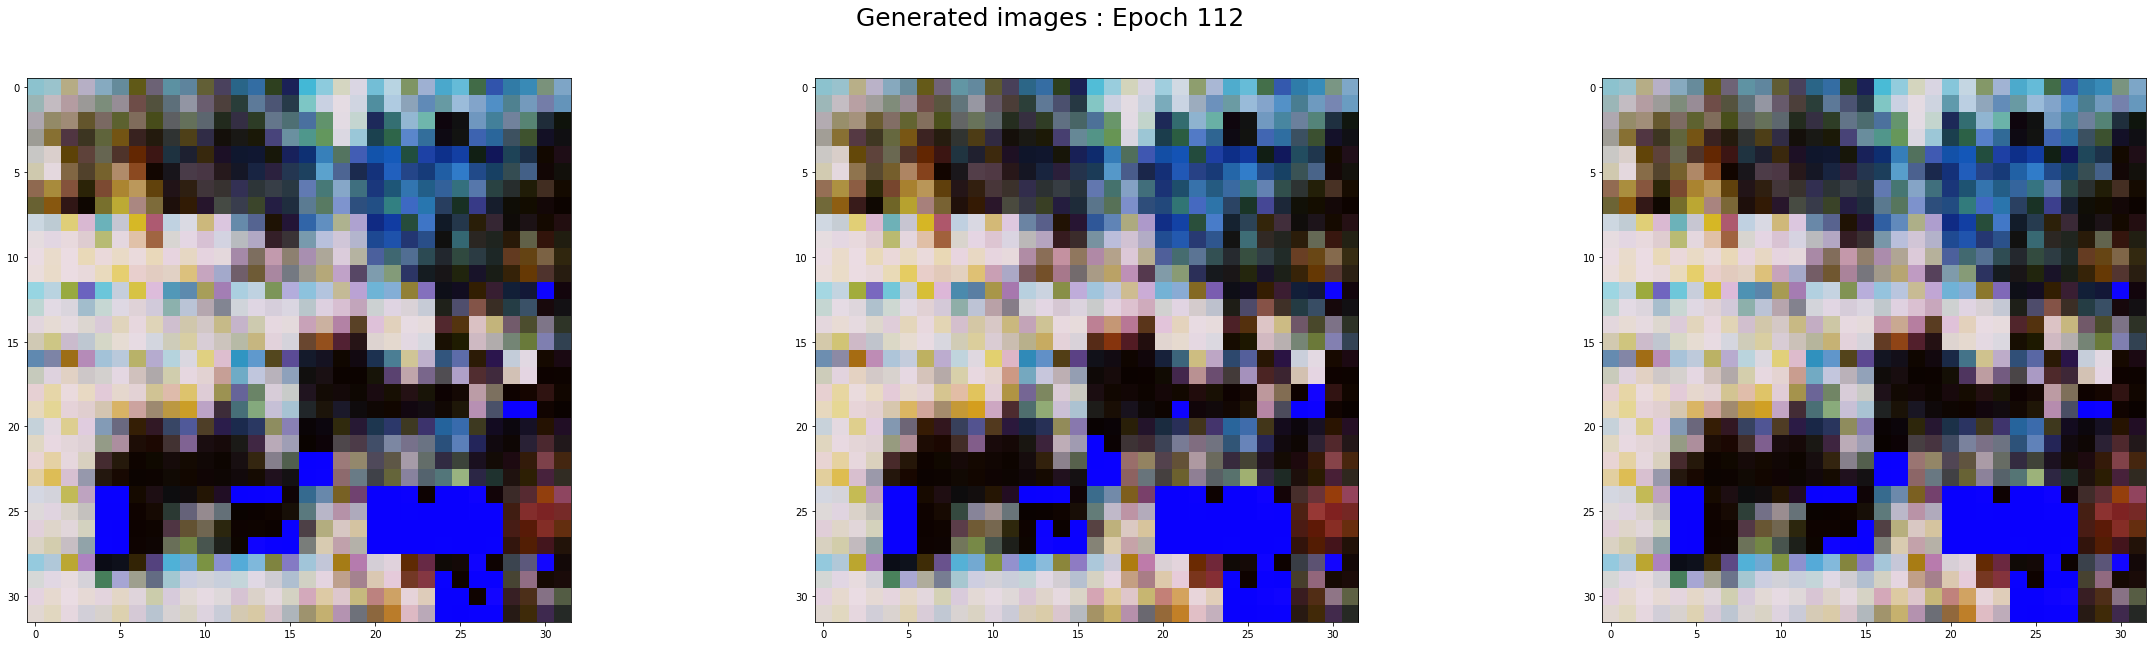

---------------------------------------------------------------
epoch :  113  d_loss_accuracy  =  [0.0371253676712513, 0.98828125]  g_loss =  0.06572778522968292


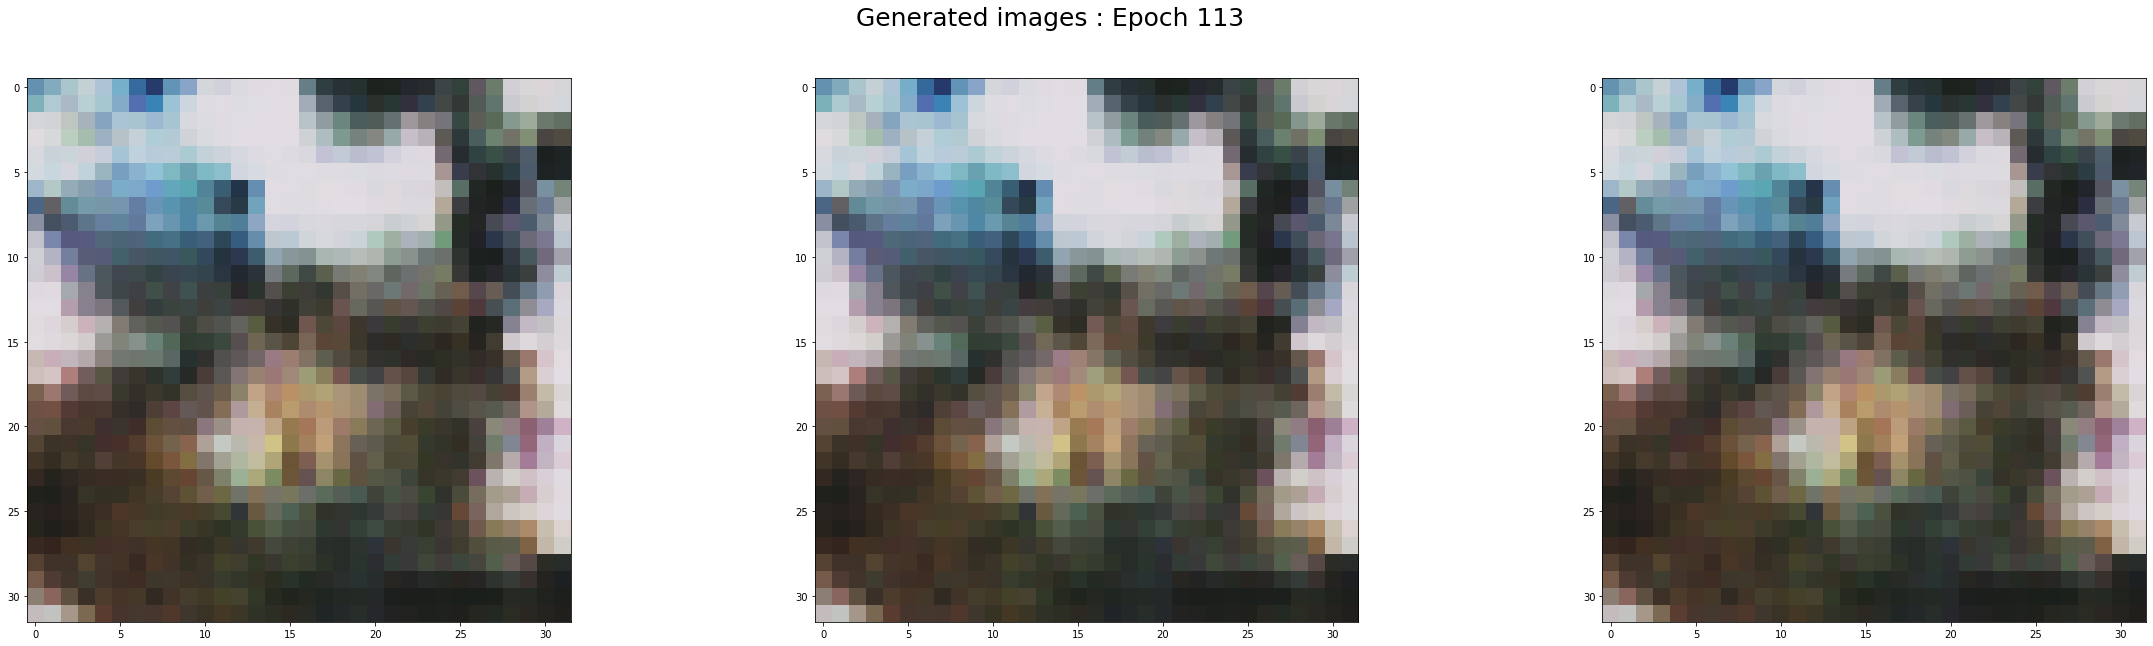

---------------------------------------------------------------
epoch :  114  d_loss_accuracy  =  [0.10440385341644287, 0.9609375]  g_loss =  1.4495437145233154


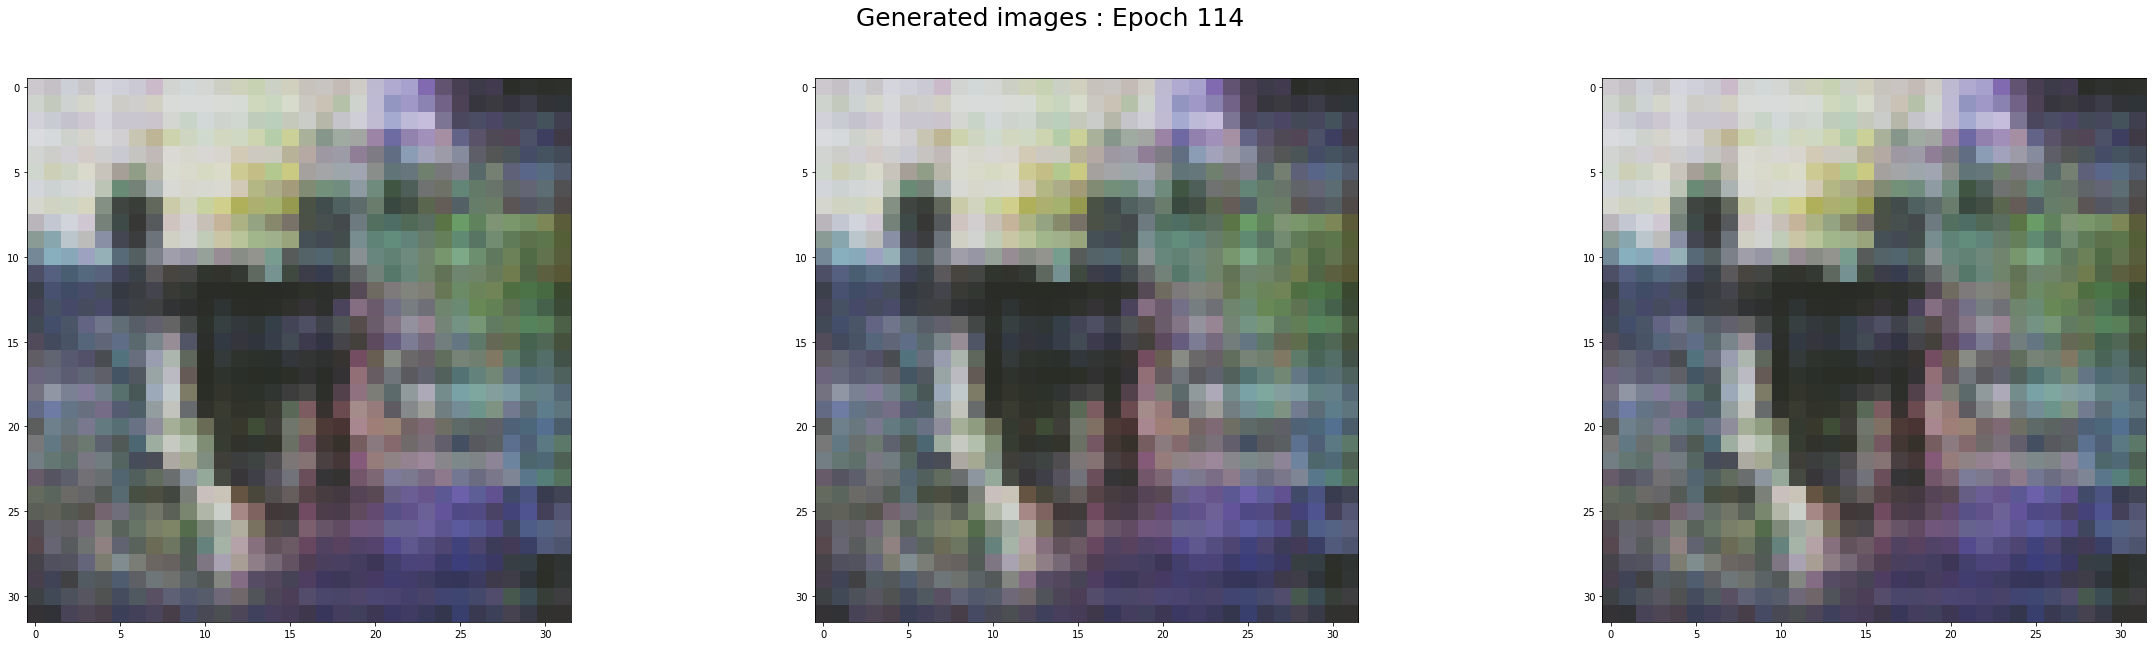

---------------------------------------------------------------
epoch :  115  d_loss_accuracy  =  [0.02327190339565277, 0.9921875]  g_loss =  0.405514121055603


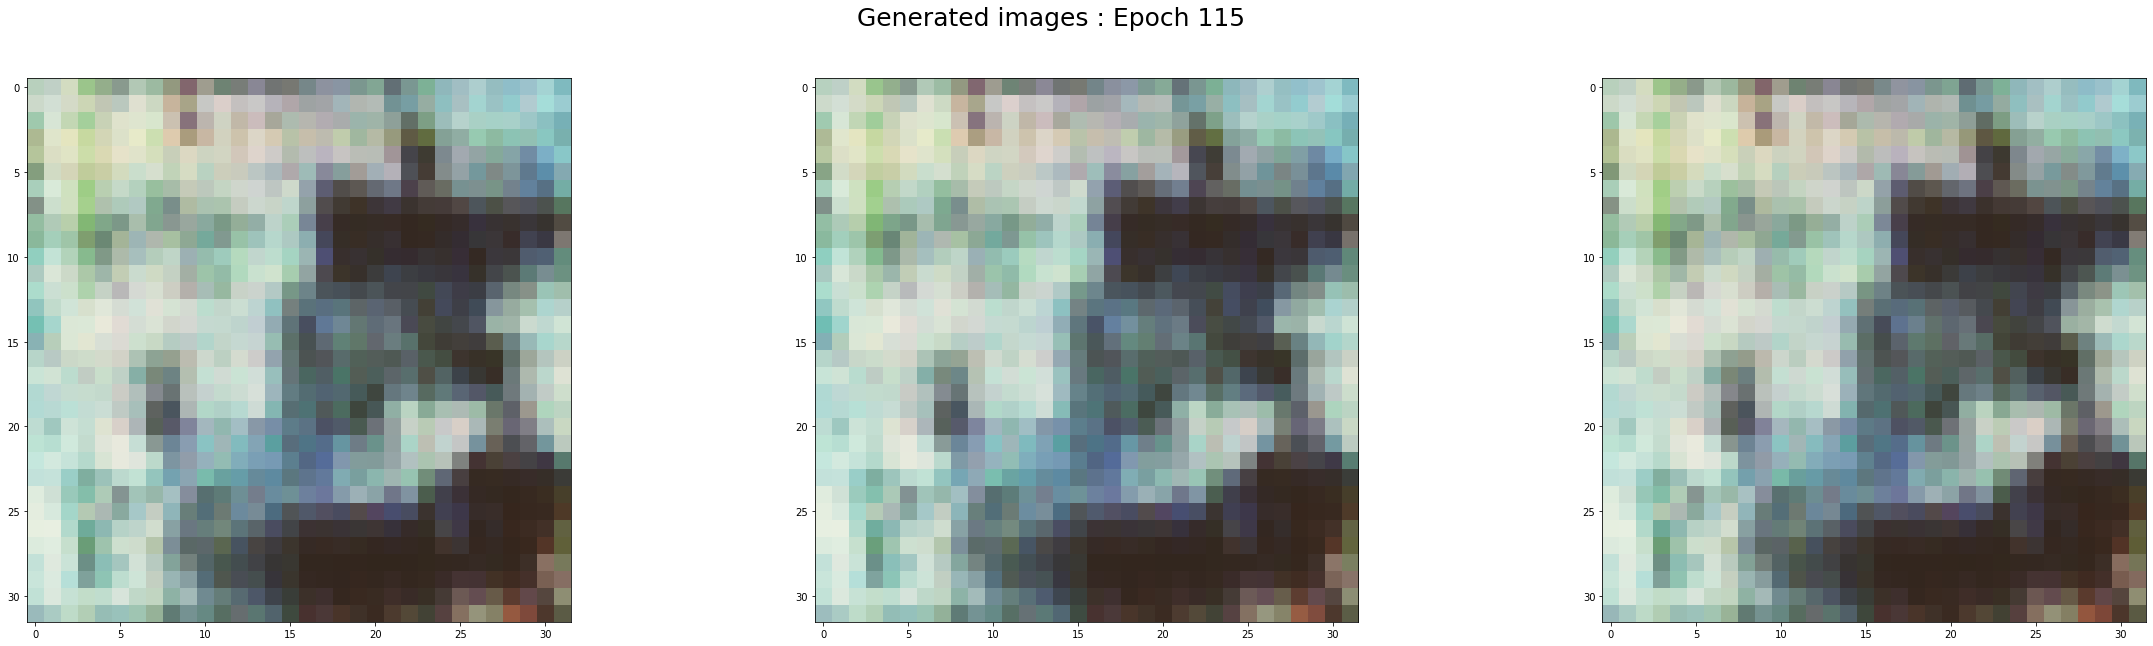

---------------------------------------------------------------
epoch :  116  d_loss_accuracy  =  [0.035102471709251404, 0.98828125]  g_loss =  0.044026490300893784


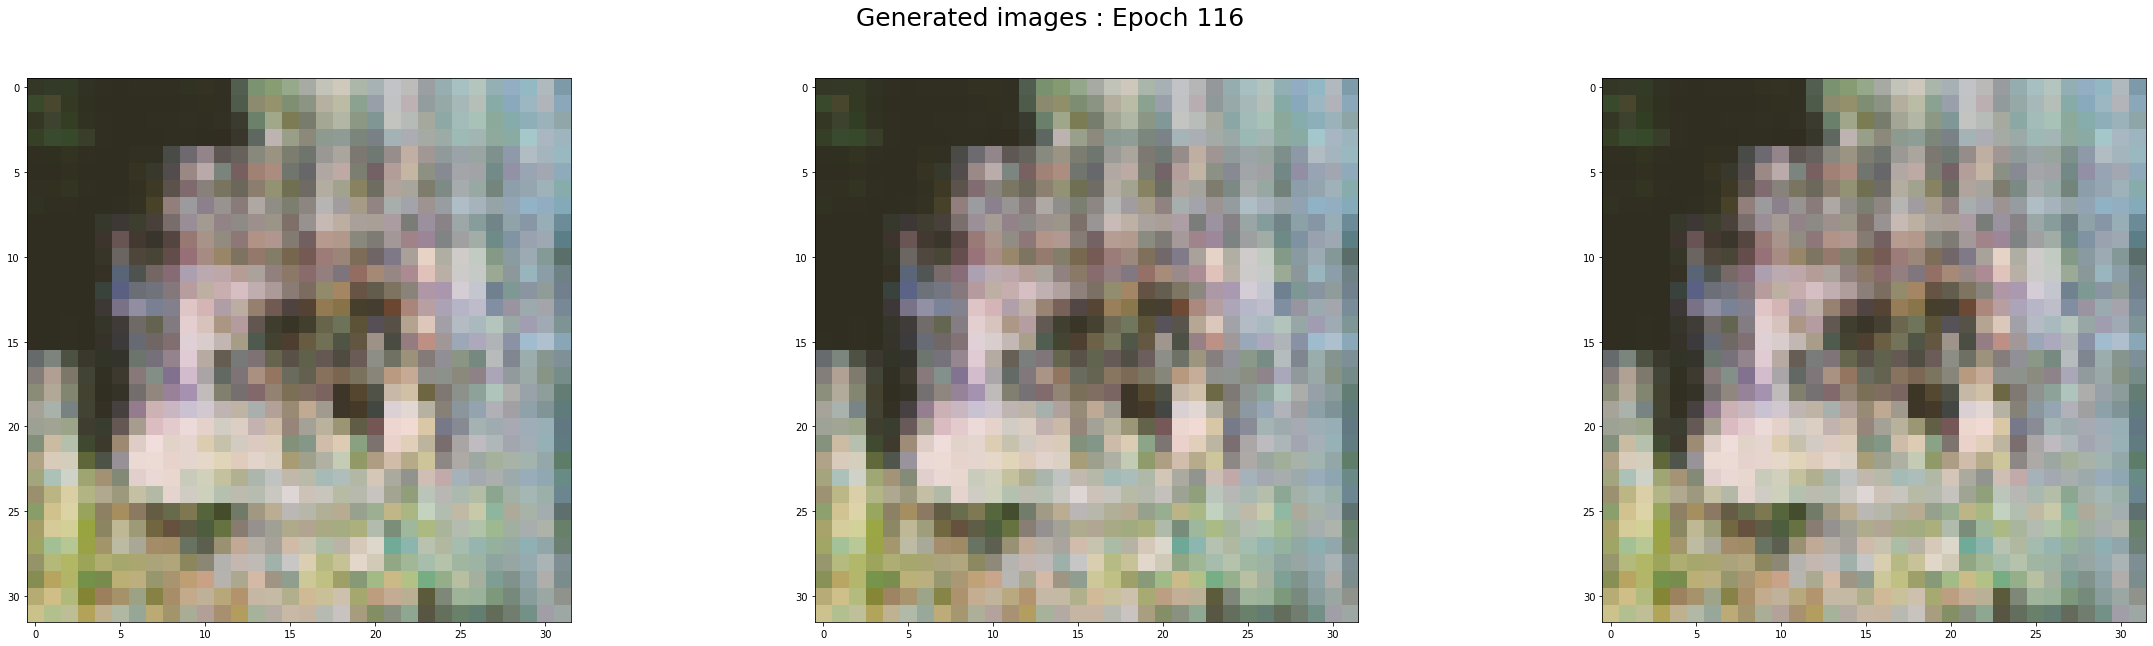

---------------------------------------------------------------
epoch :  117  d_loss_accuracy  =  [0.032253142446279526, 0.99609375]  g_loss =  0.04561247304081917


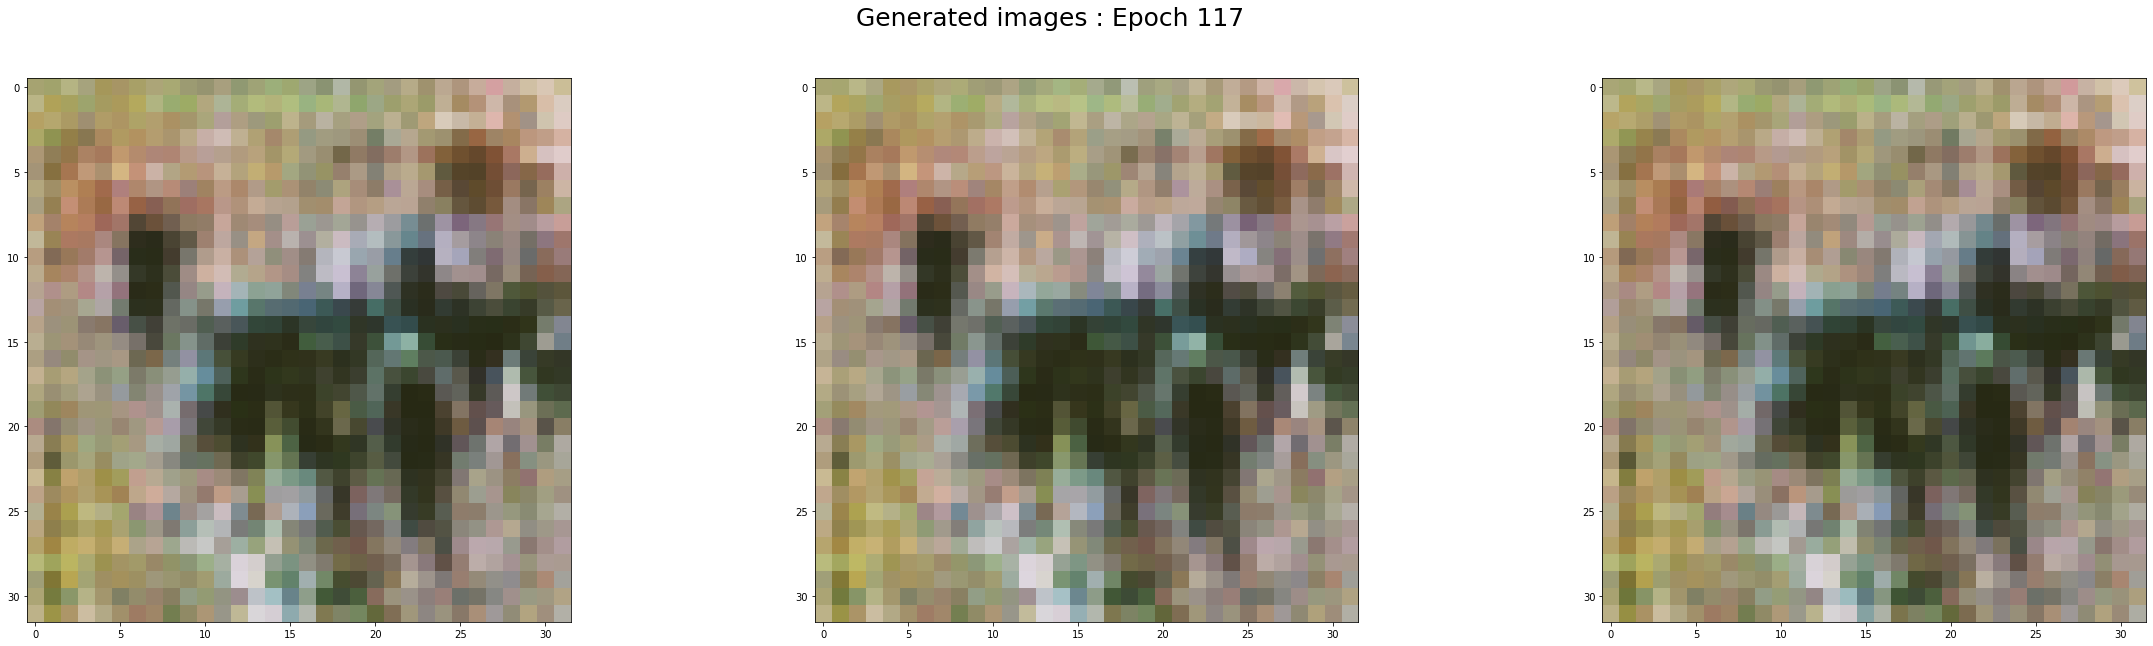

---------------------------------------------------------------
epoch :  118  d_loss_accuracy  =  [0.31605181097984314, 0.91796875]  g_loss =  6.23862361907959


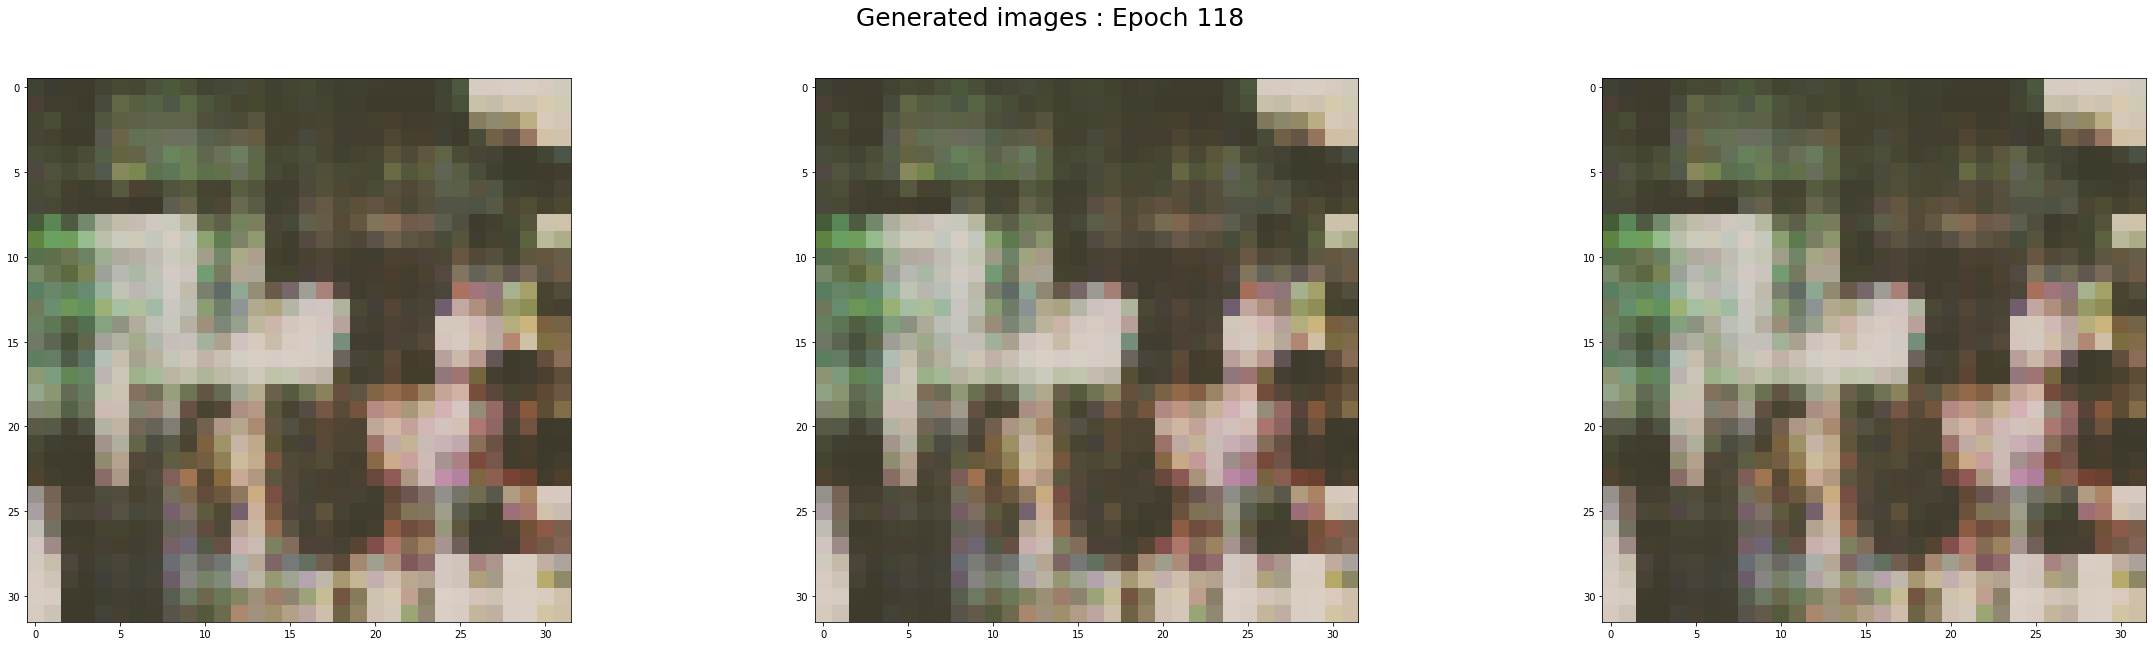

---------------------------------------------------------------
epoch :  119  d_loss_accuracy  =  [0.0005391352460719645, 1.0]  g_loss =  0.05138646438717842


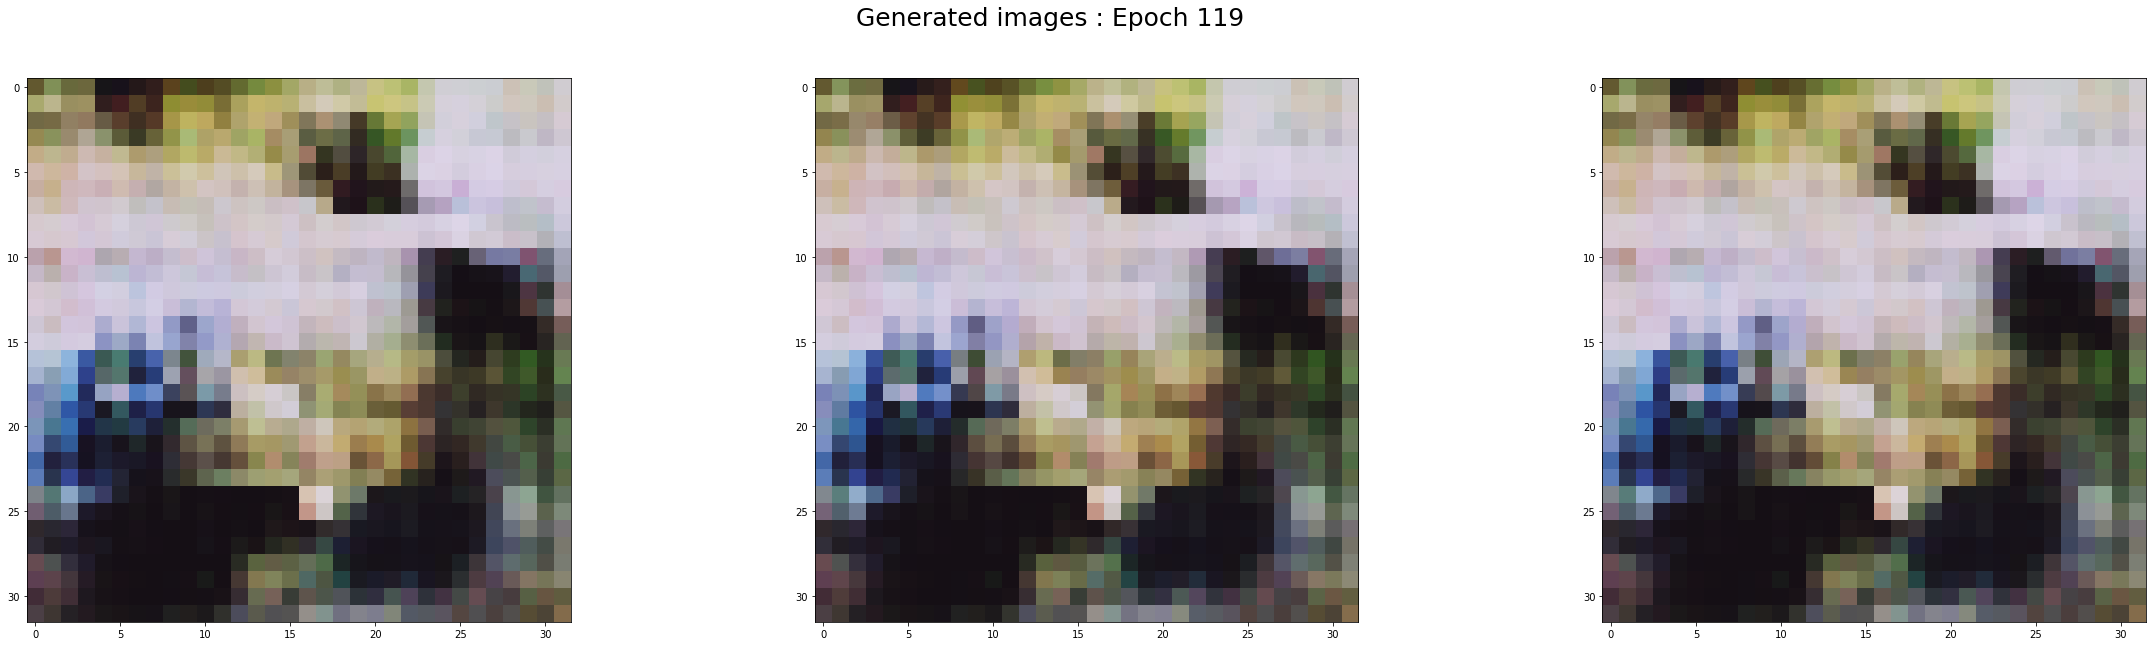

---------------------------------------------------------------
epoch :  120  d_loss_accuracy  =  [0.00347739364951849, 1.0]  g_loss =  0.03222952038049698


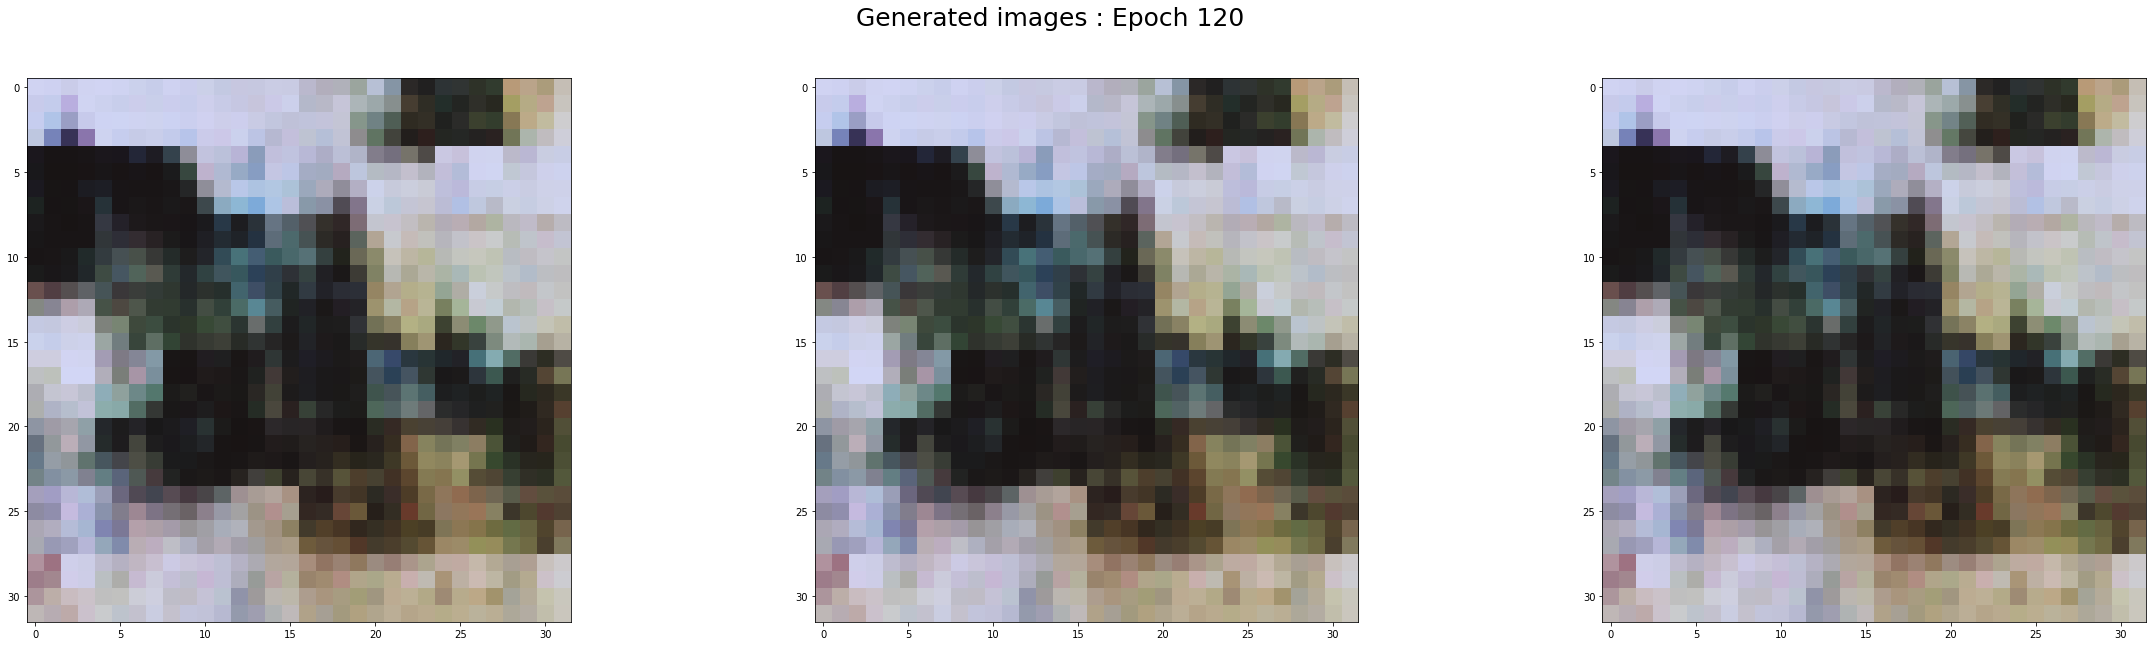

---------------------------------------------------------------
epoch :  121  d_loss_accuracy  =  [0.0026583699509501457, 1.0]  g_loss =  0.002302424516528845


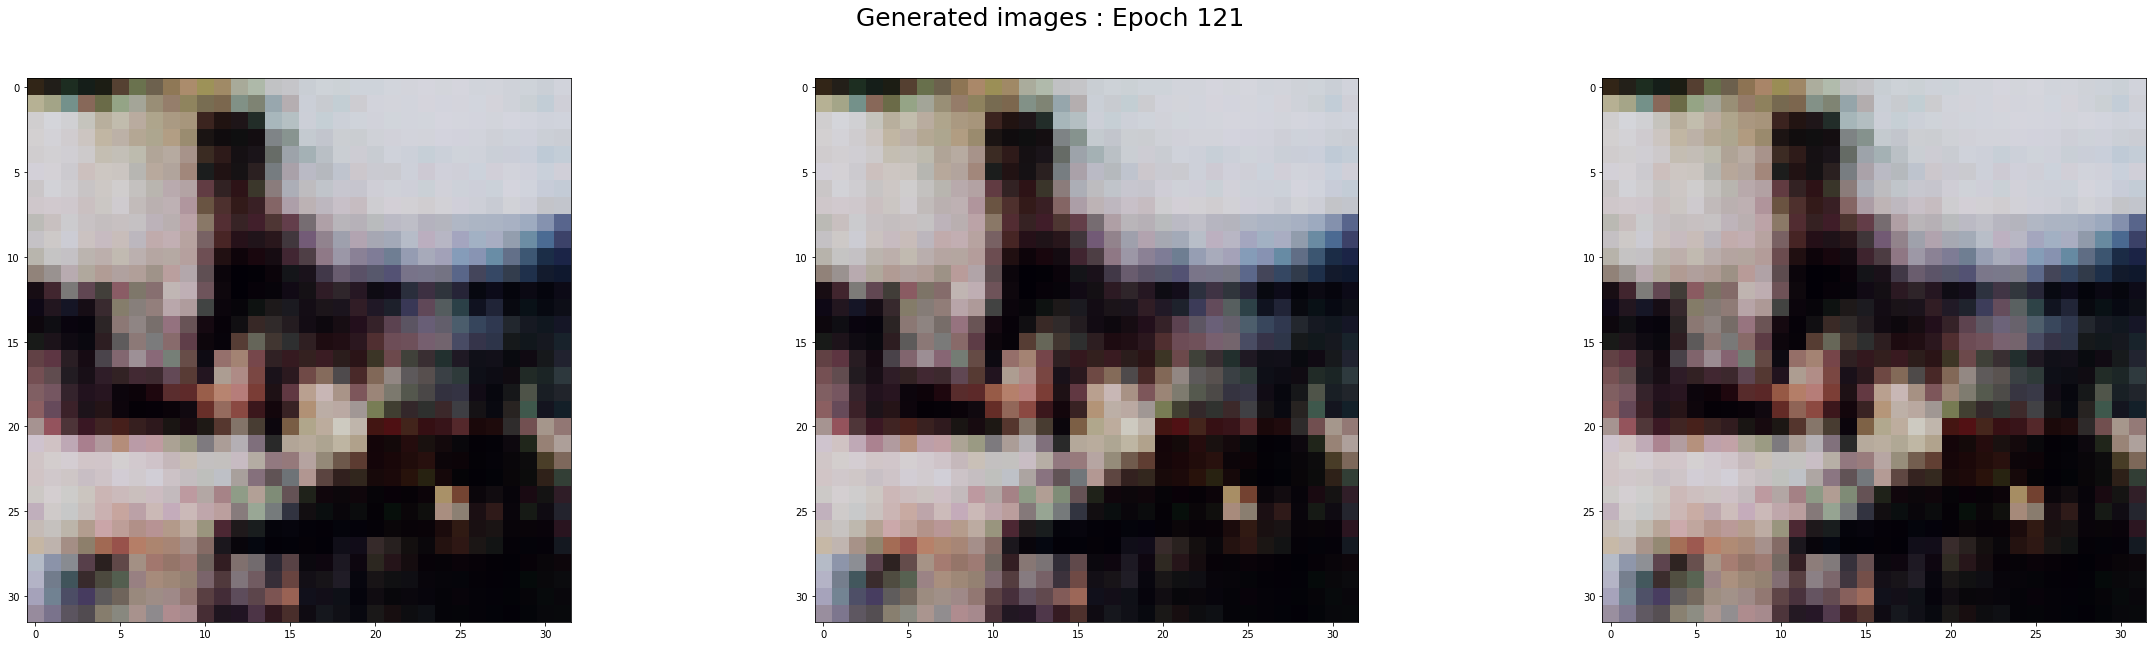

---------------------------------------------------------------
epoch :  122  d_loss_accuracy  =  [0.004462287761271, 1.0]  g_loss =  0.10118374973535538


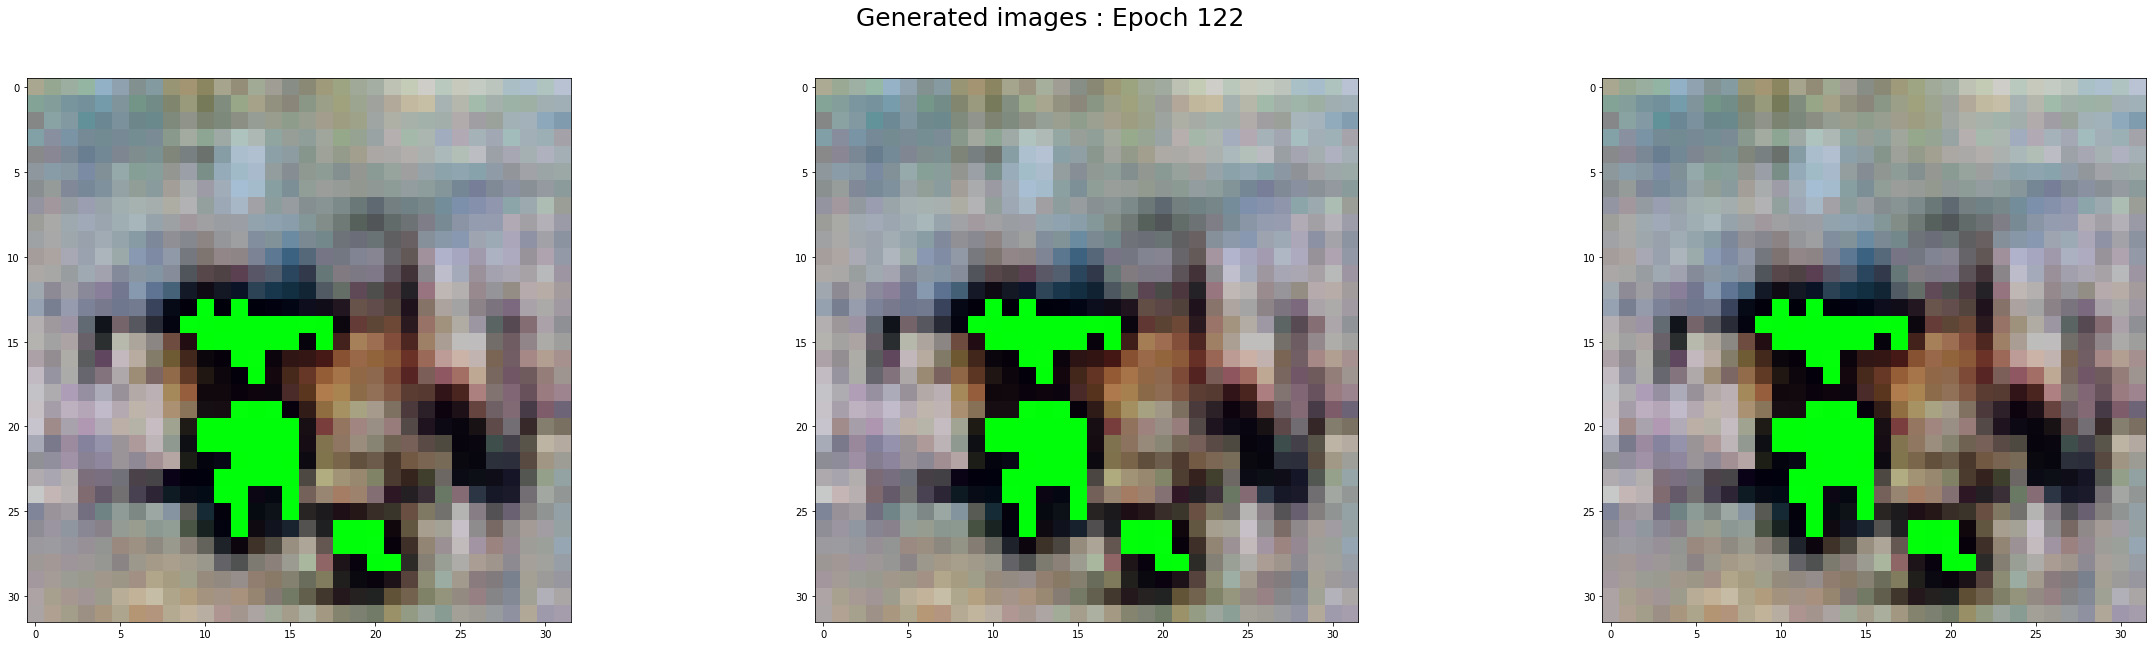

---------------------------------------------------------------
epoch :  123  d_loss_accuracy  =  [0.1293671429157257, 0.953125]  g_loss =  10.957256317138672


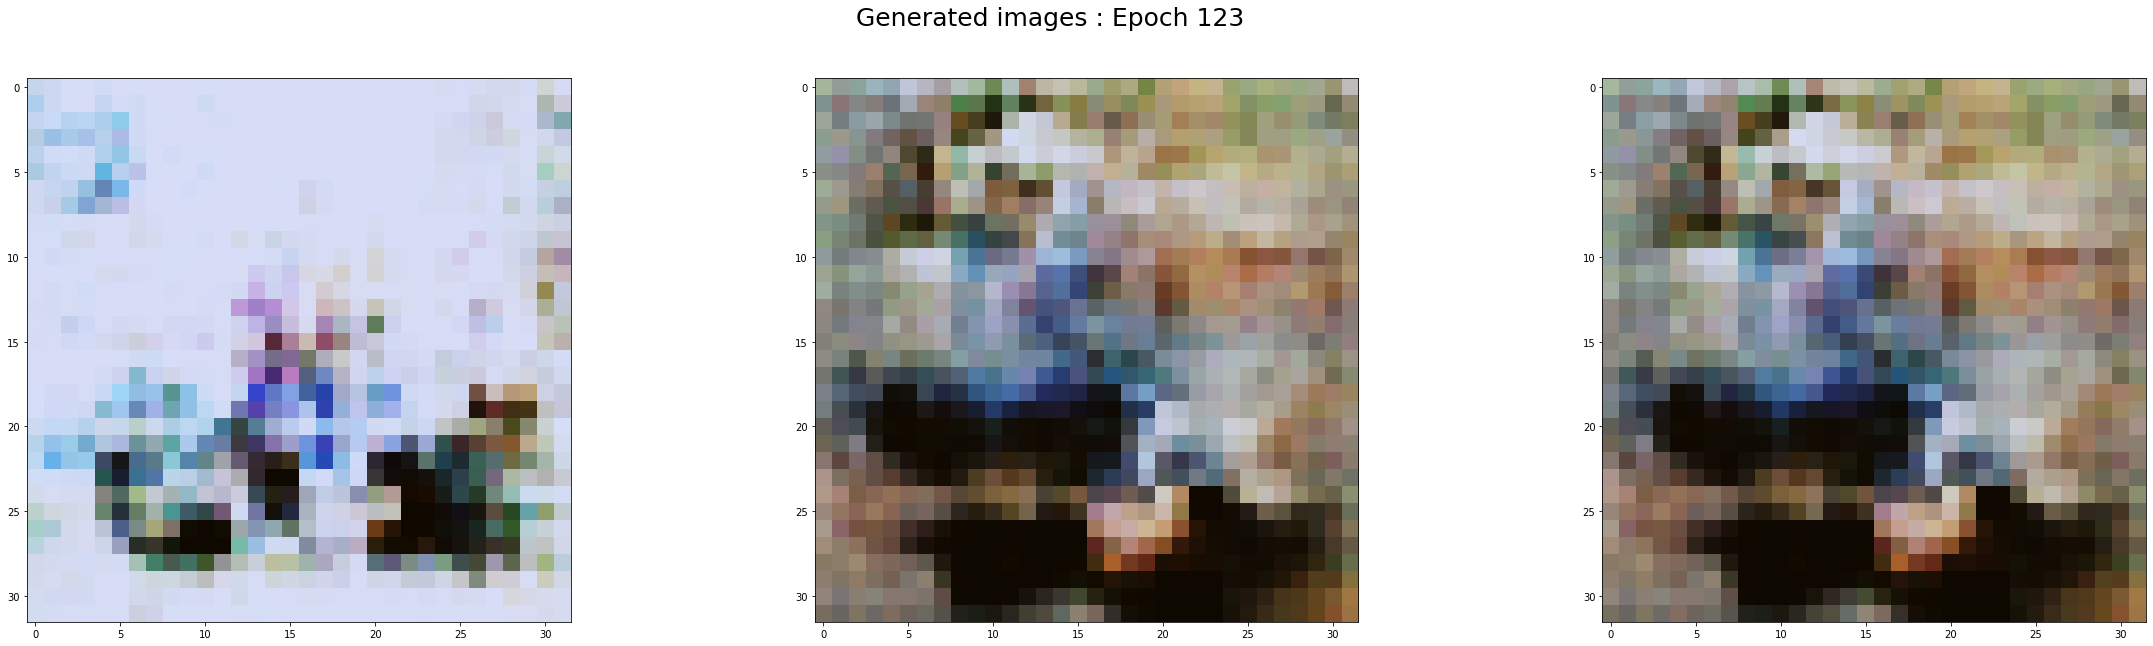

---------------------------------------------------------------
epoch :  124  d_loss_accuracy  =  [0.005138762760907412, 1.0]  g_loss =  0.15055492520332336


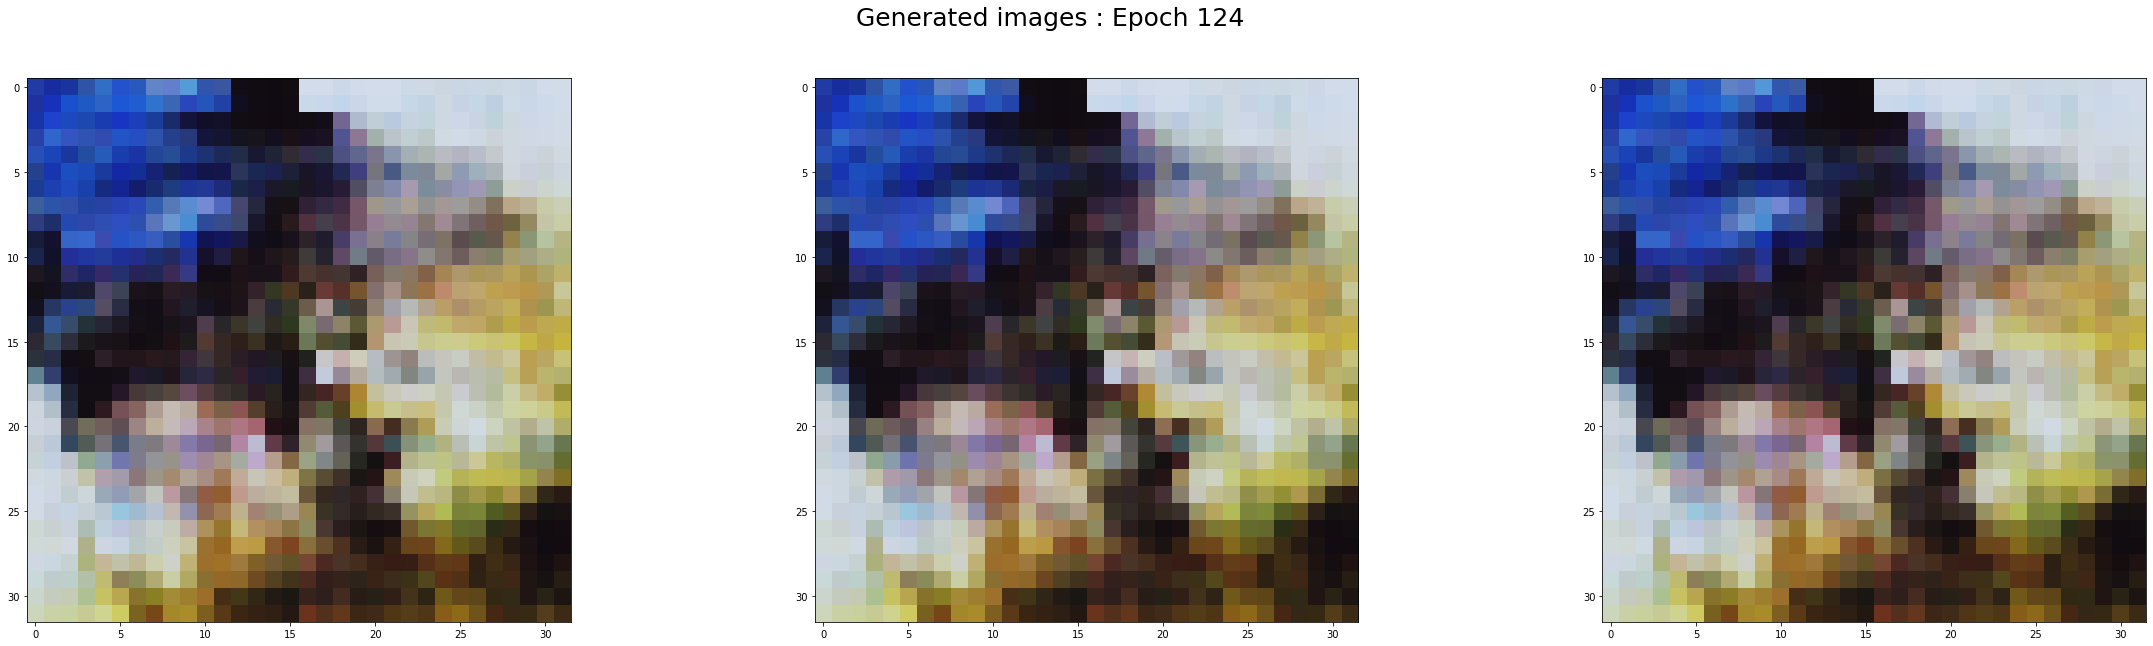

---------------------------------------------------------------
epoch :  125  d_loss_accuracy  =  [0.017732184380292892, 0.99609375]  g_loss =  0.07874716818332672


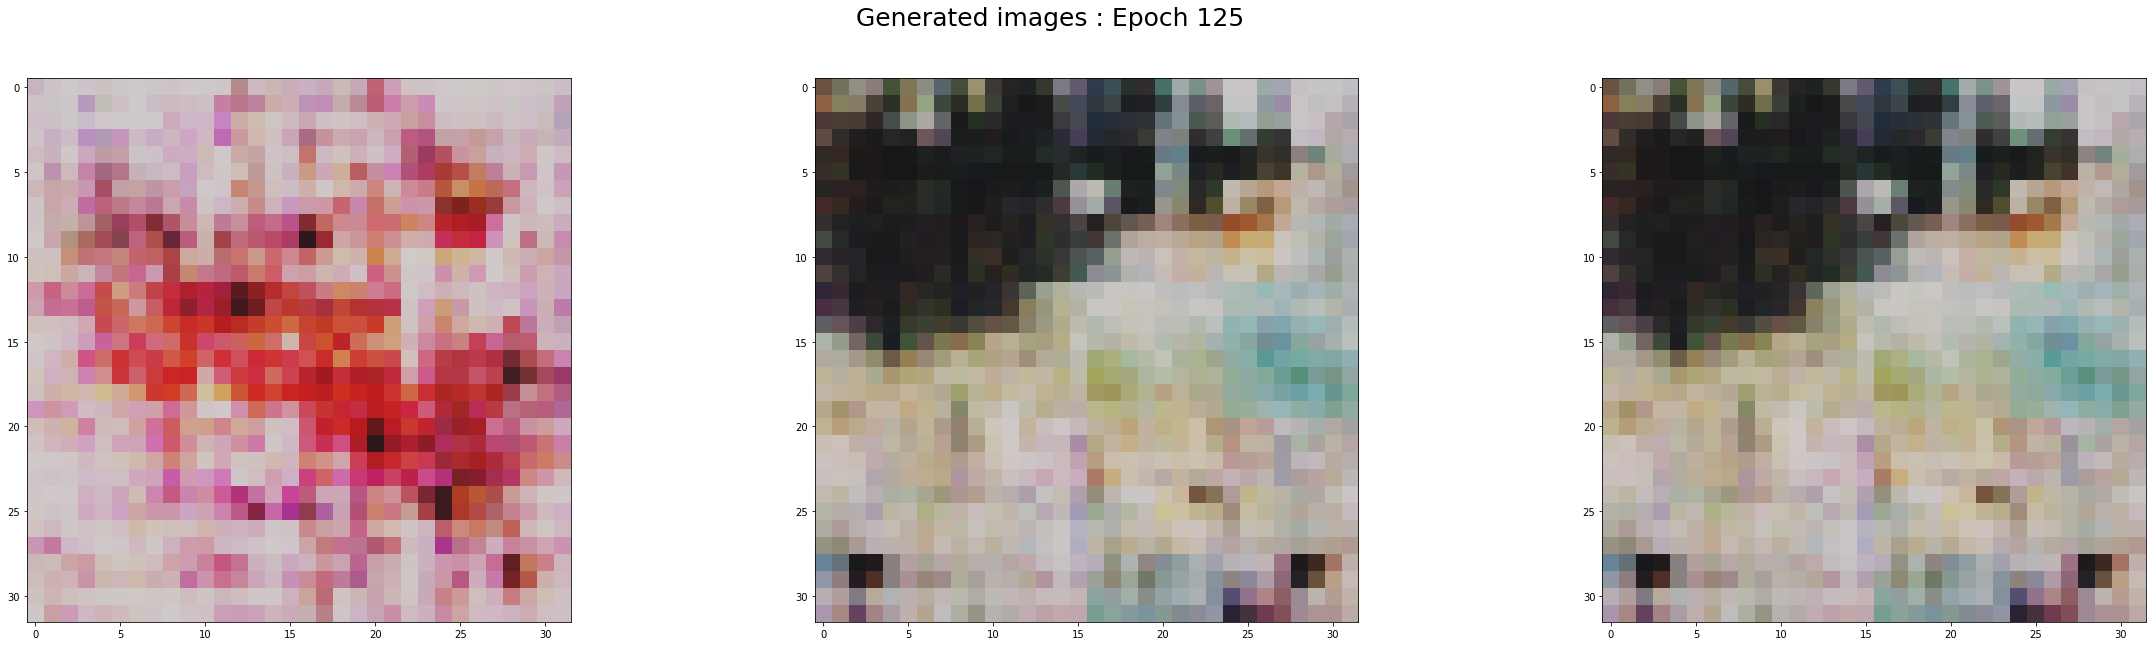

---------------------------------------------------------------
epoch :  126  d_loss_accuracy  =  [0.009040024131536484, 0.99609375]  g_loss =  0.20568624138832092


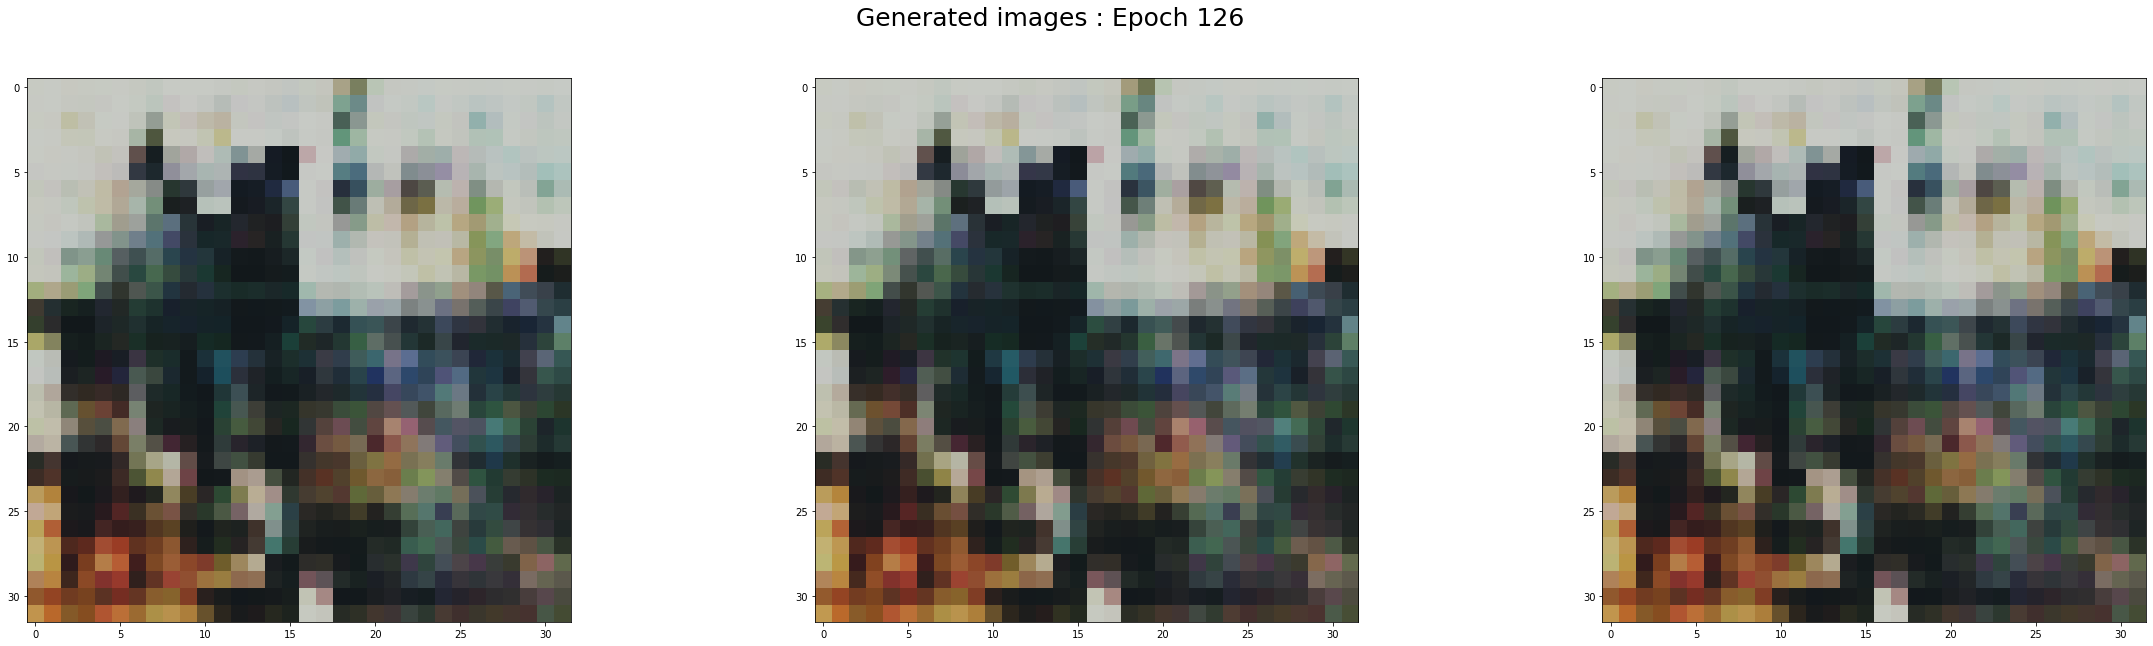

---------------------------------------------------------------
epoch :  127  d_loss_accuracy  =  [0.10881969332695007, 0.96484375]  g_loss =  0.17671793699264526


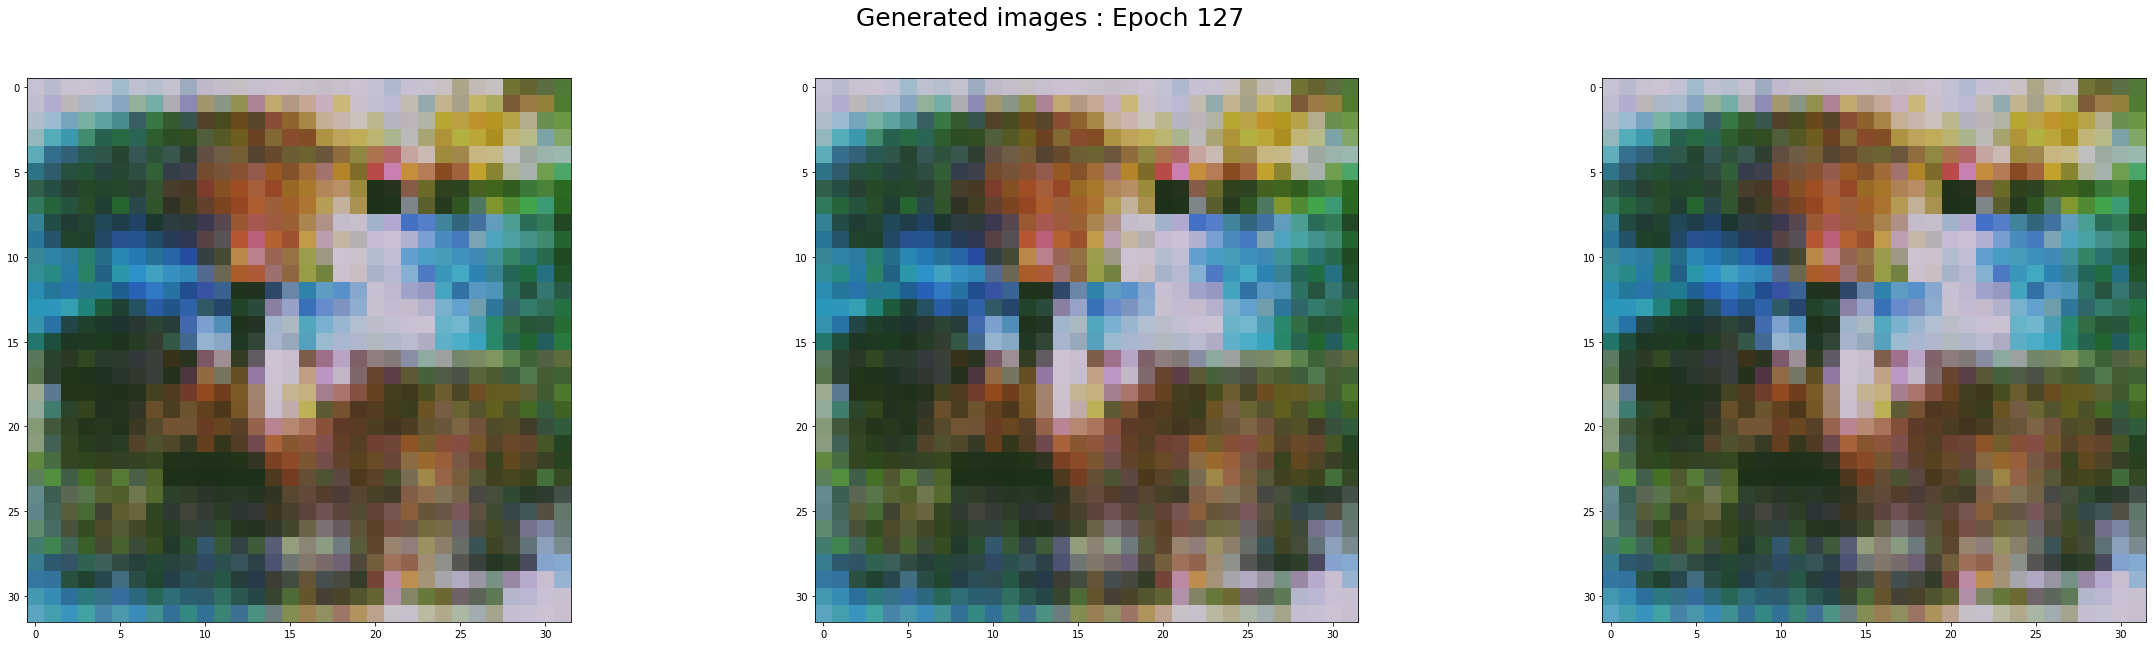

---------------------------------------------------------------
epoch :  128  d_loss_accuracy  =  [0.007095129694789648, 0.99609375]  g_loss =  0.11884857714176178


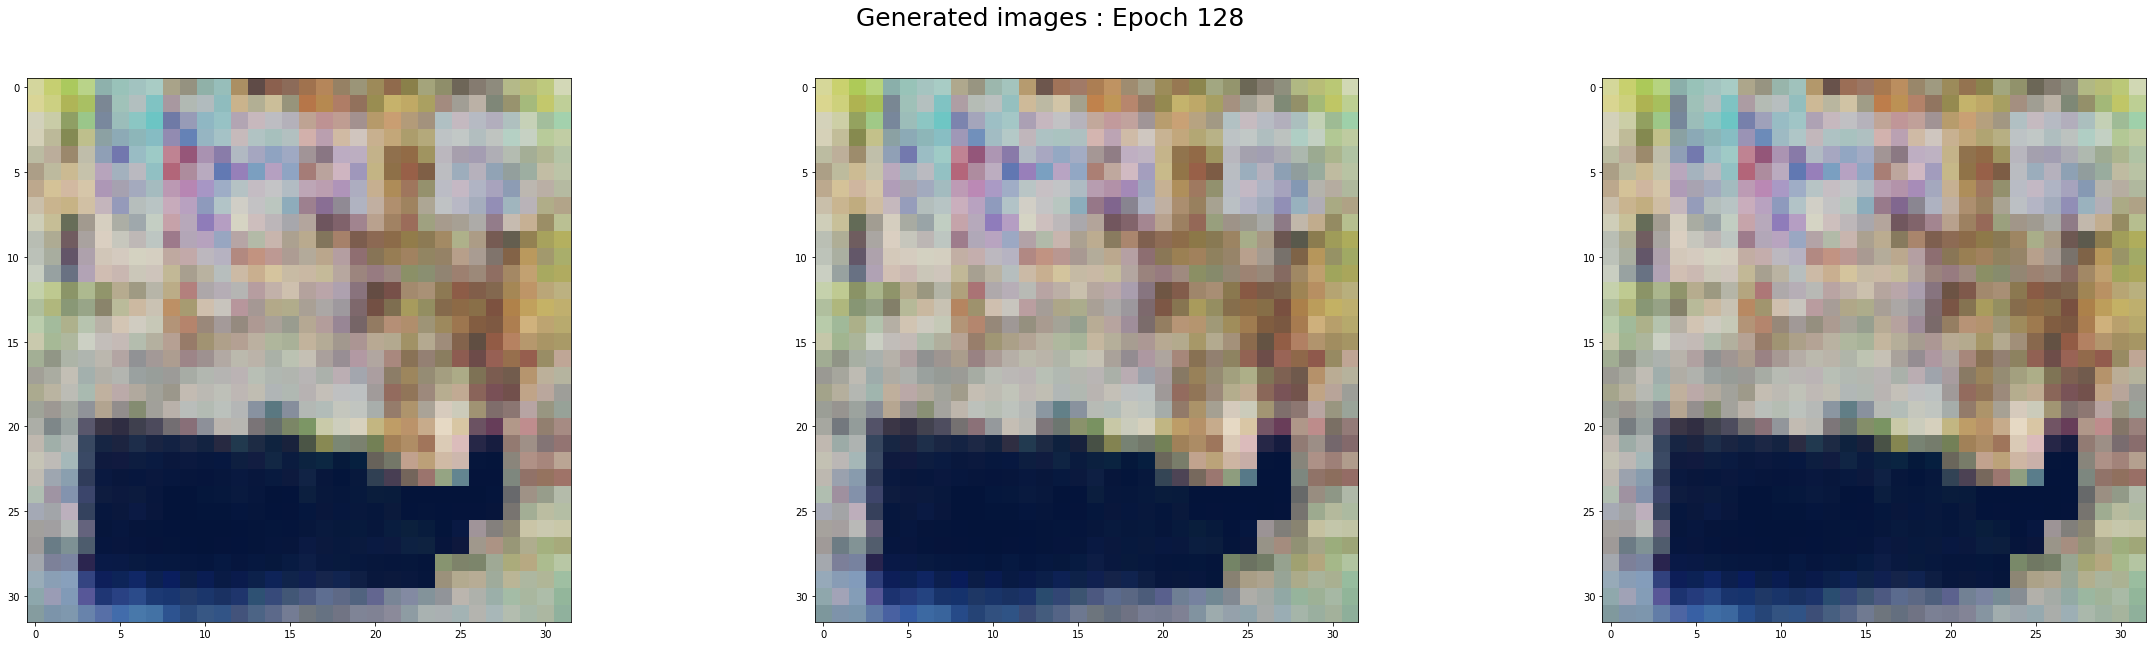

---------------------------------------------------------------
epoch :  129  d_loss_accuracy  =  [0.01602807641029358, 0.9921875]  g_loss =  0.105977863073349


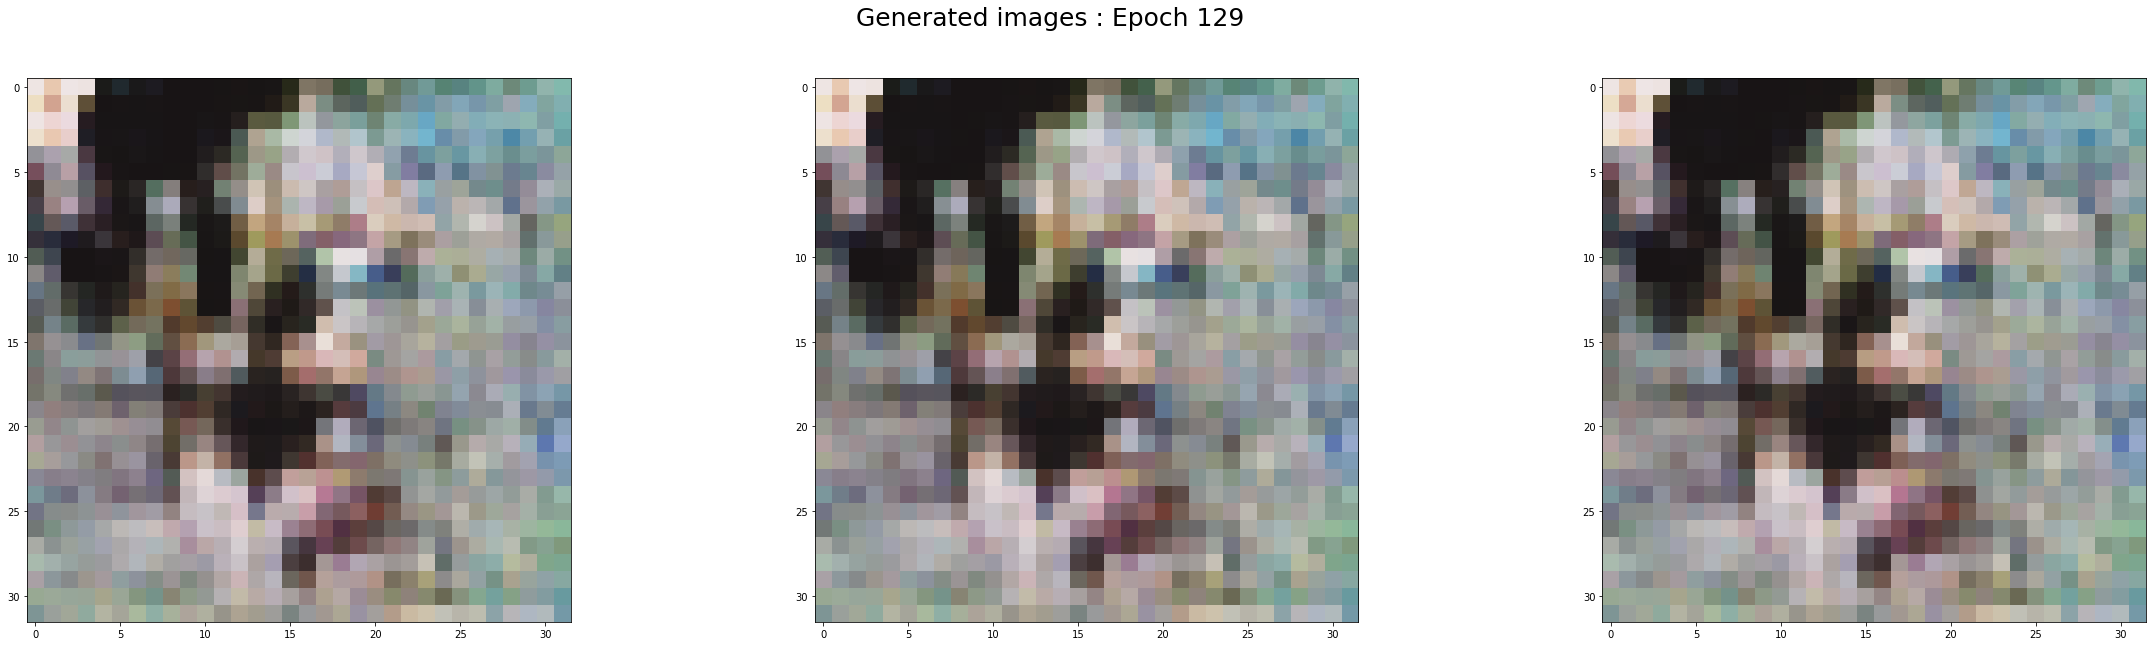

---------------------------------------------------------------
epoch :  130  d_loss_accuracy  =  [0.0008566178730688989, 1.0]  g_loss =  0.05197445675730705


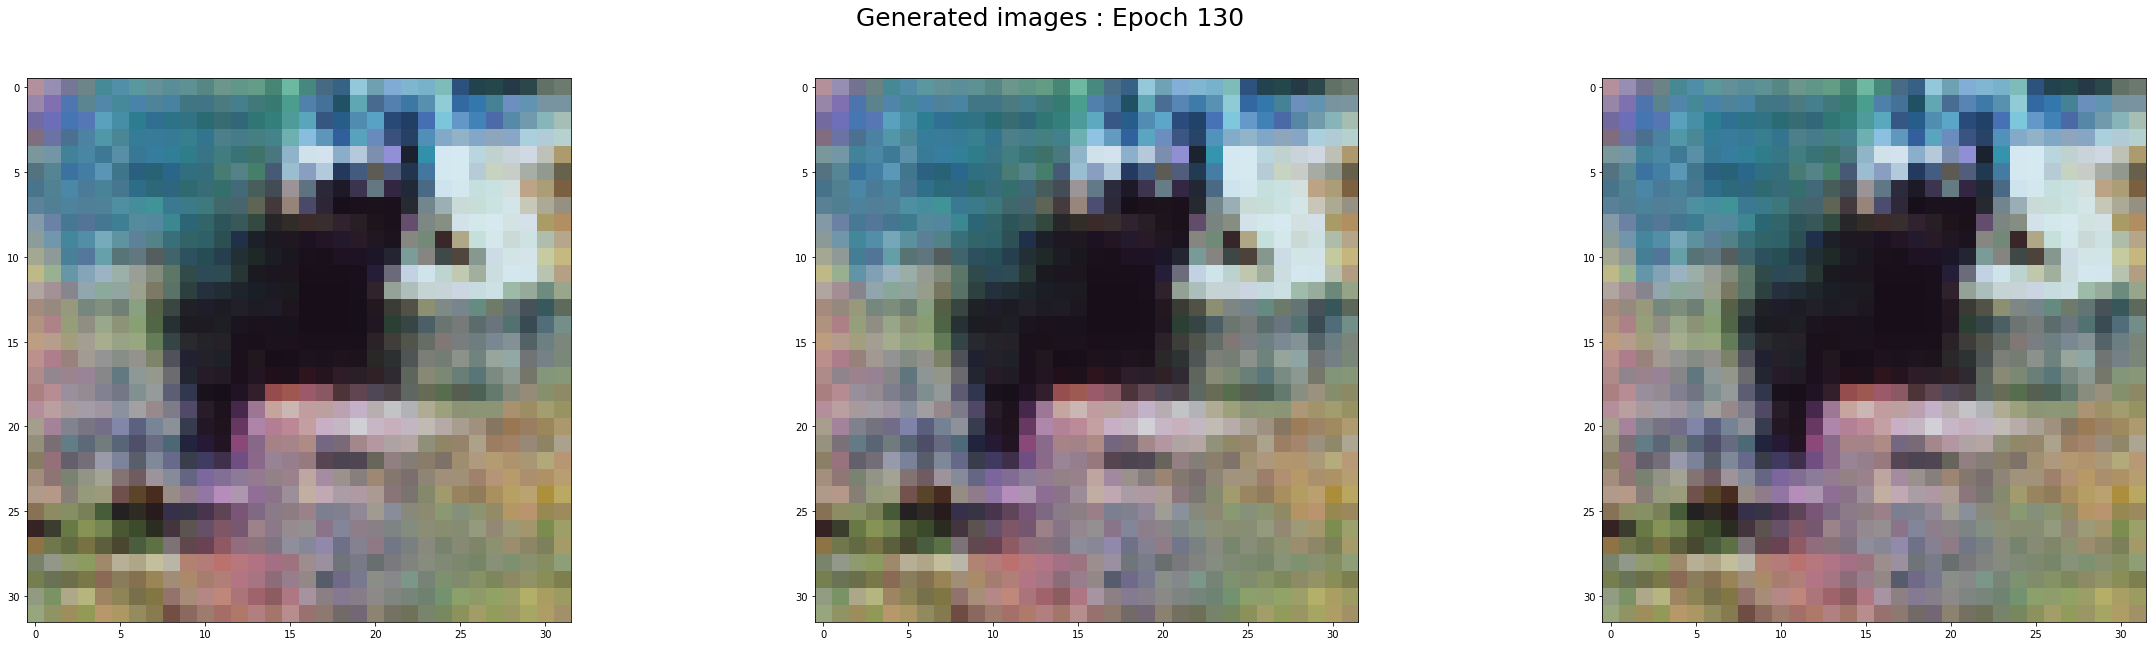

---------------------------------------------------------------
epoch :  131  d_loss_accuracy  =  [0.05642373114824295, 0.984375]  g_loss =  0.057303354144096375


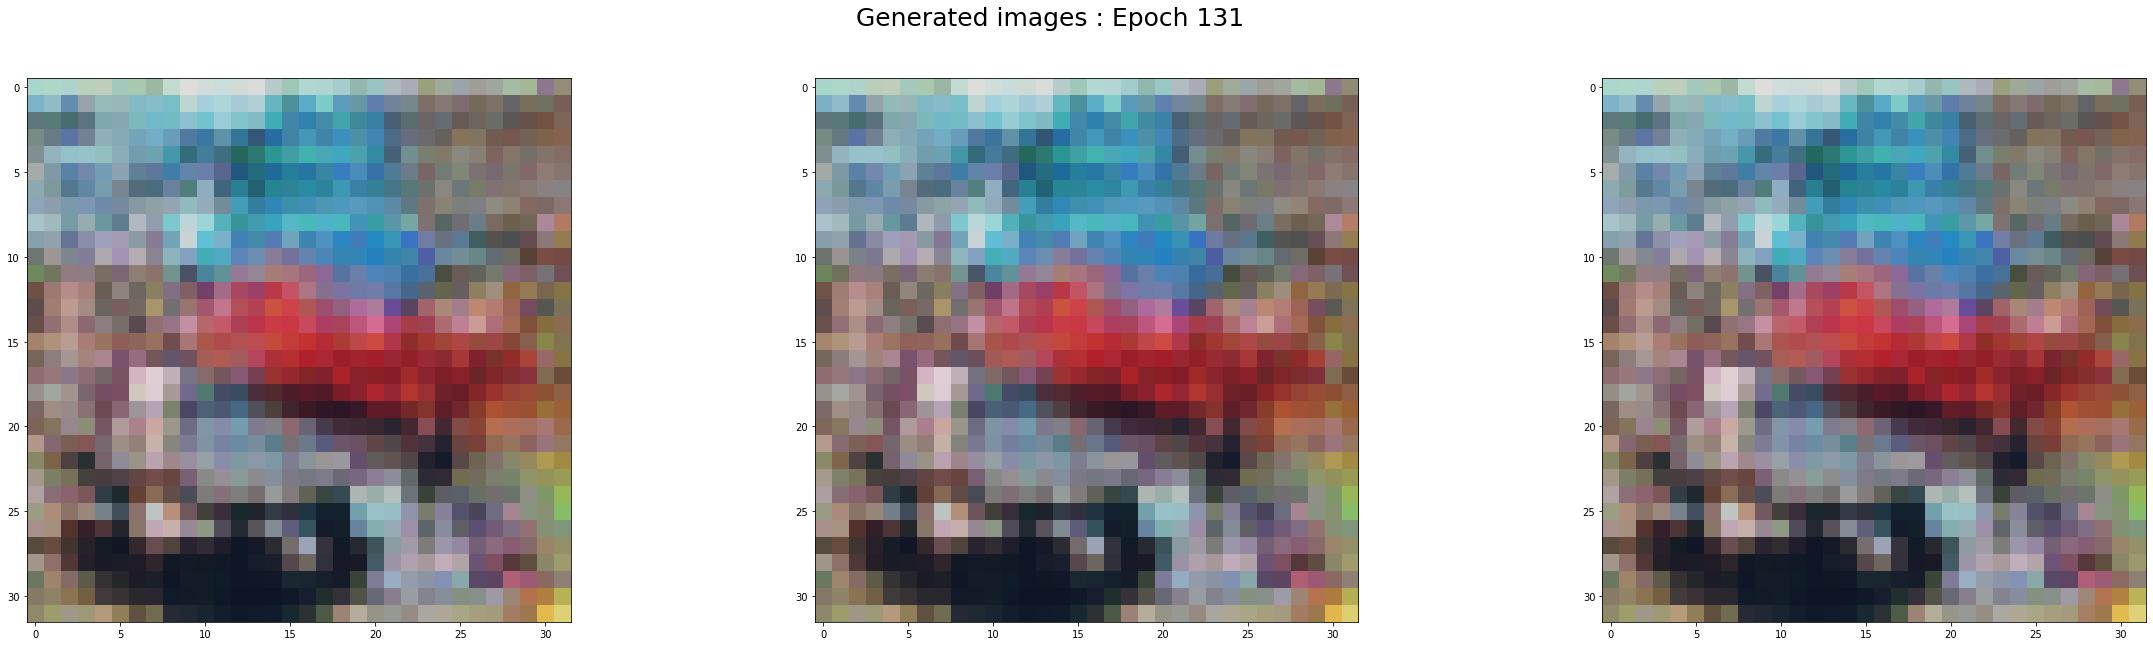

---------------------------------------------------------------
epoch :  132  d_loss_accuracy  =  [0.01161395013332367, 1.0]  g_loss =  1.0906250476837158


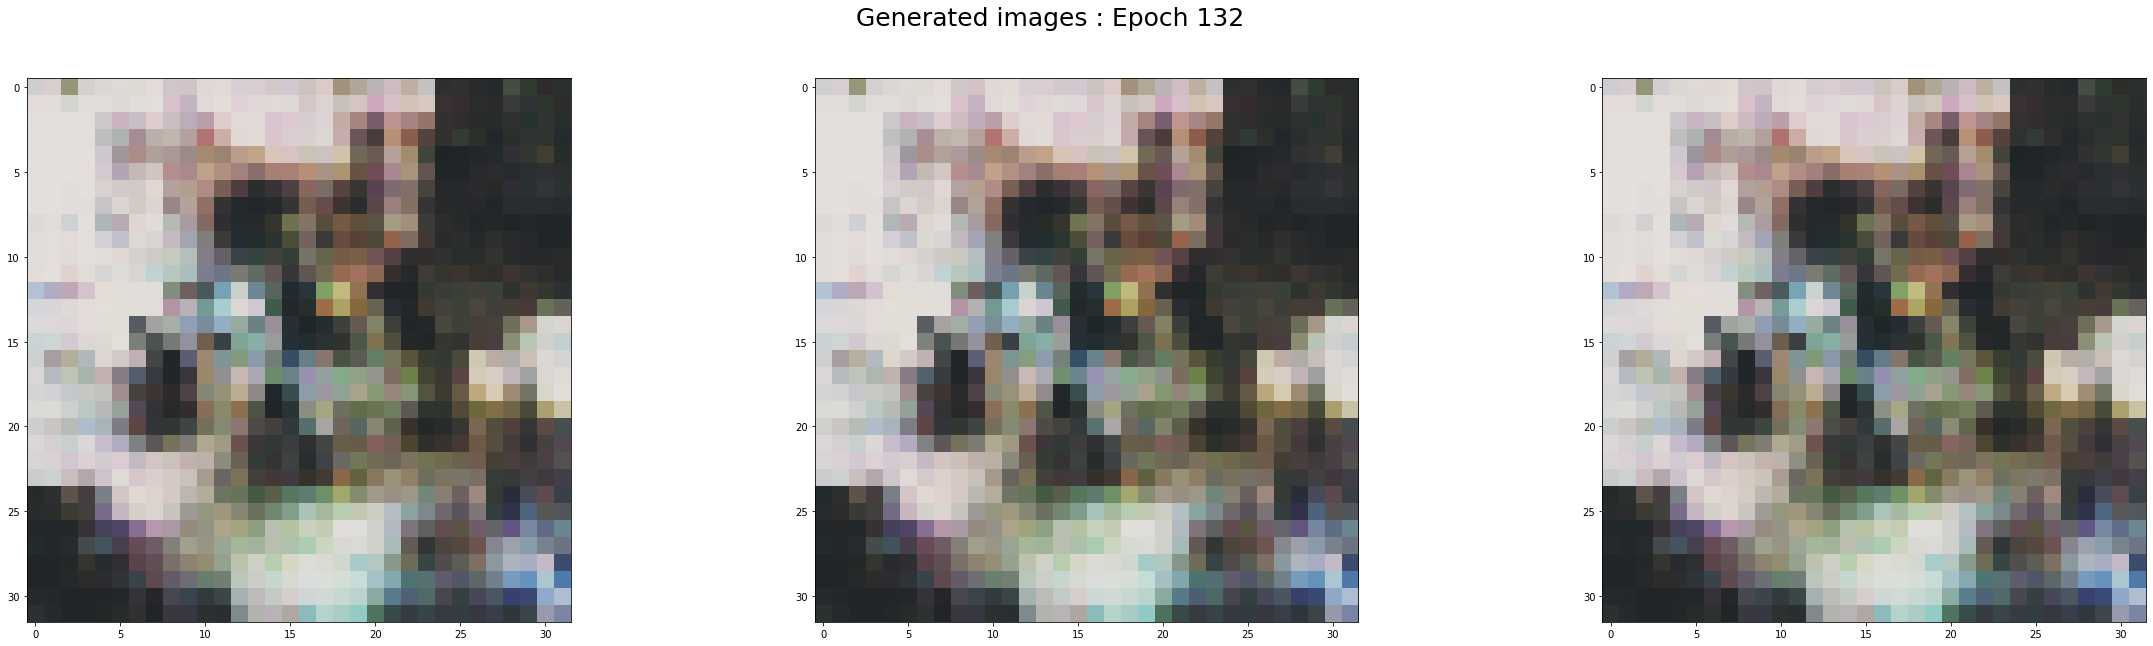

---------------------------------------------------------------
epoch :  133  d_loss_accuracy  =  [0.037288181483745575, 0.98828125]  g_loss =  2.7598416805267334


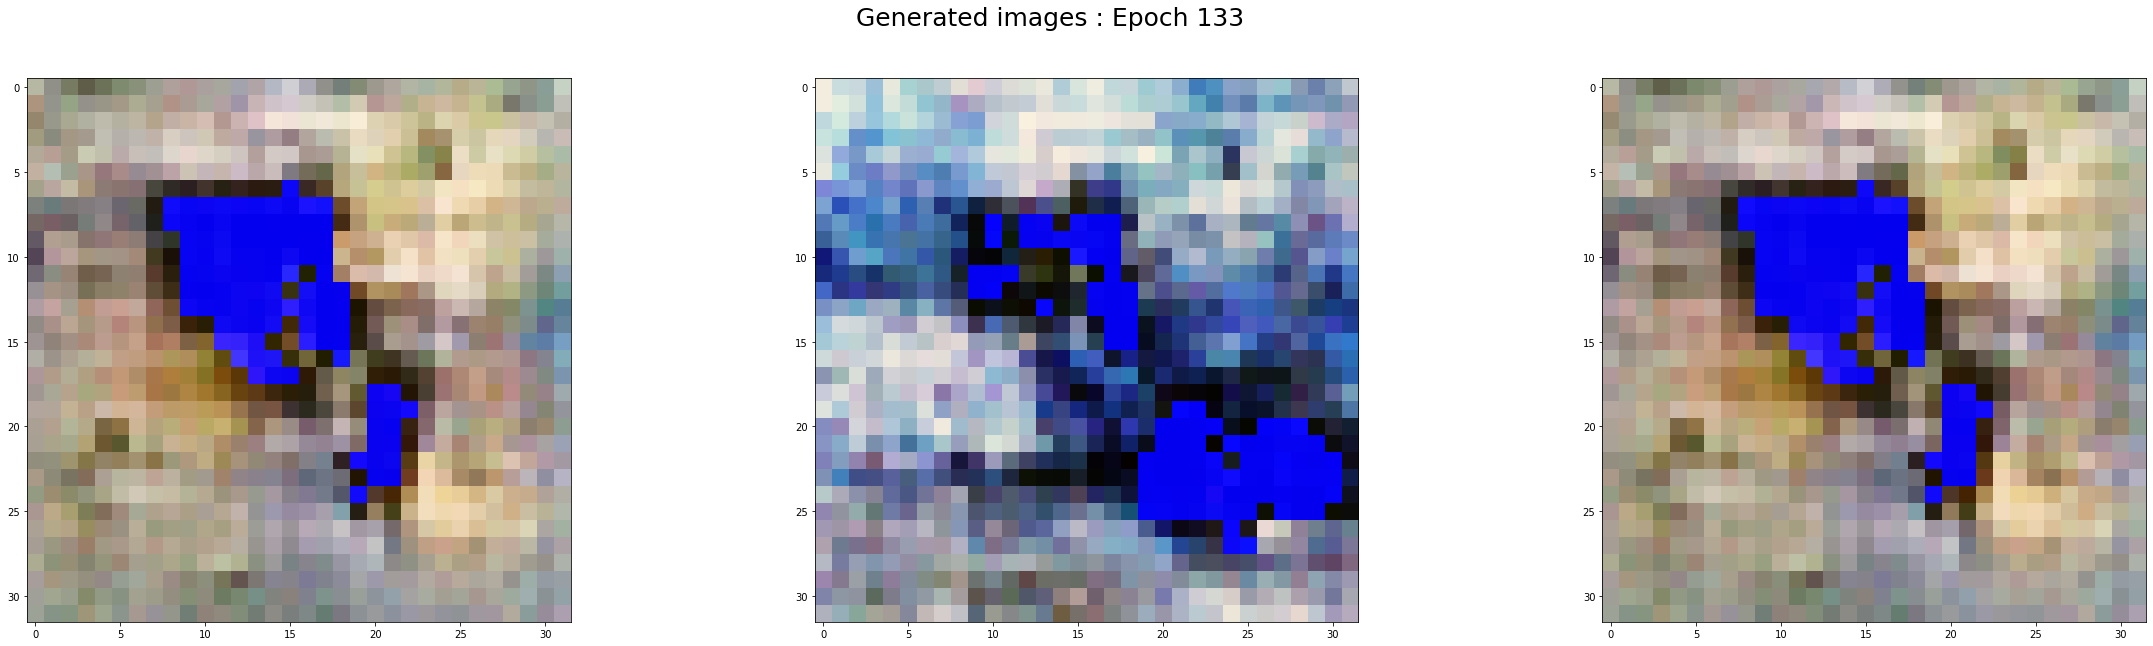

---------------------------------------------------------------
epoch :  134  d_loss_accuracy  =  [0.5246870517730713, 0.87109375]  g_loss =  6.218235015869141


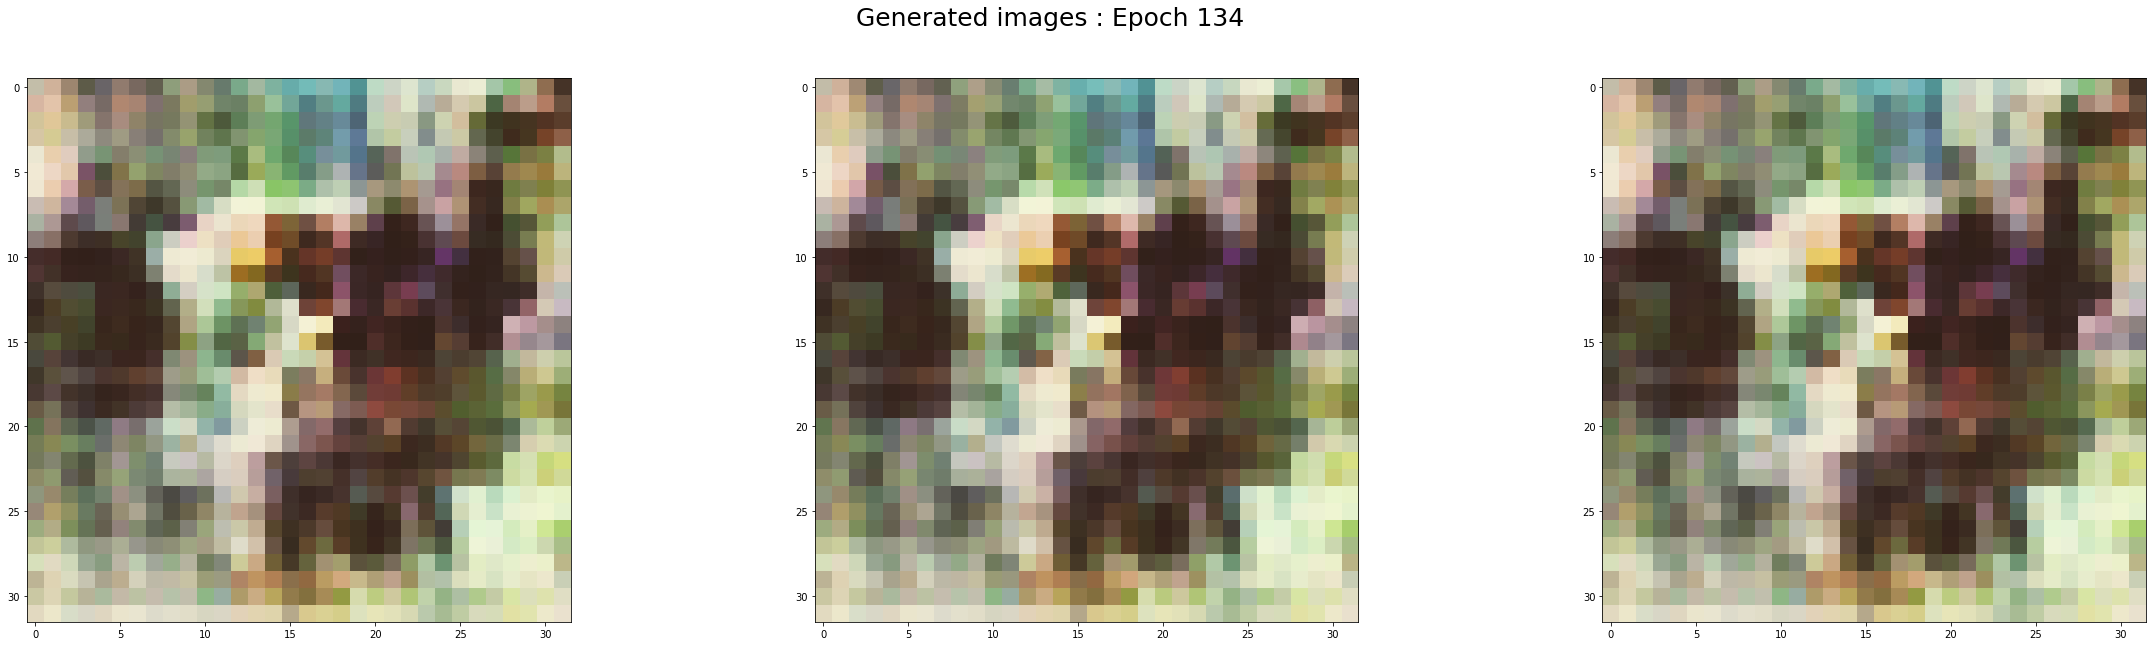

---------------------------------------------------------------
epoch :  135  d_loss_accuracy  =  [0.0065323906019330025, 1.0]  g_loss =  0.2616812288761139


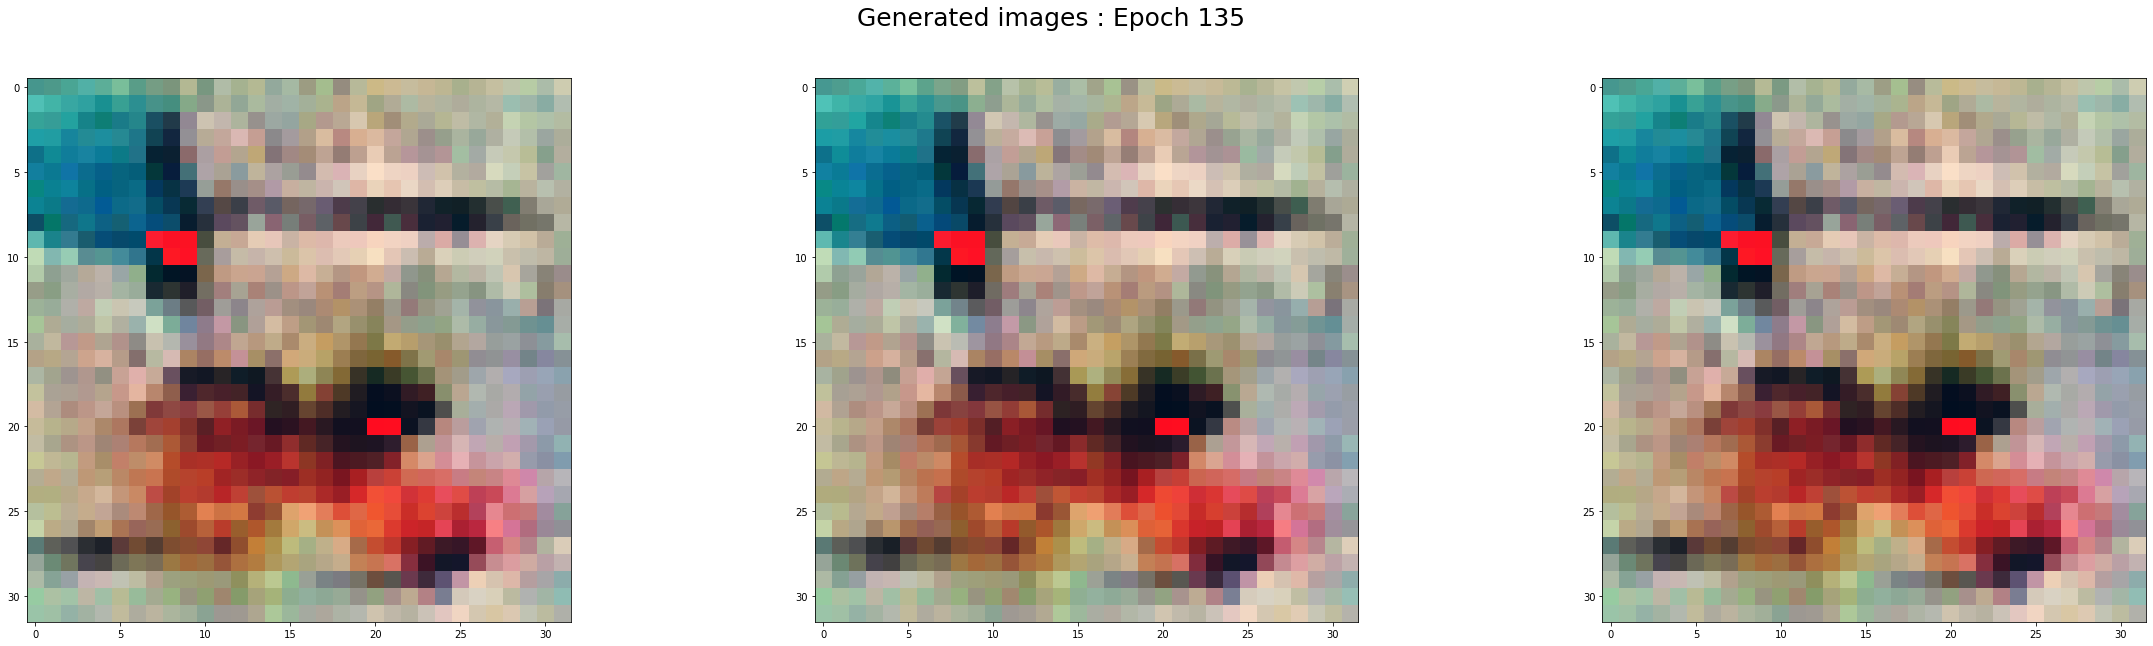

---------------------------------------------------------------
epoch :  136  d_loss_accuracy  =  [0.005761355627328157, 1.0]  g_loss =  0.027040094137191772


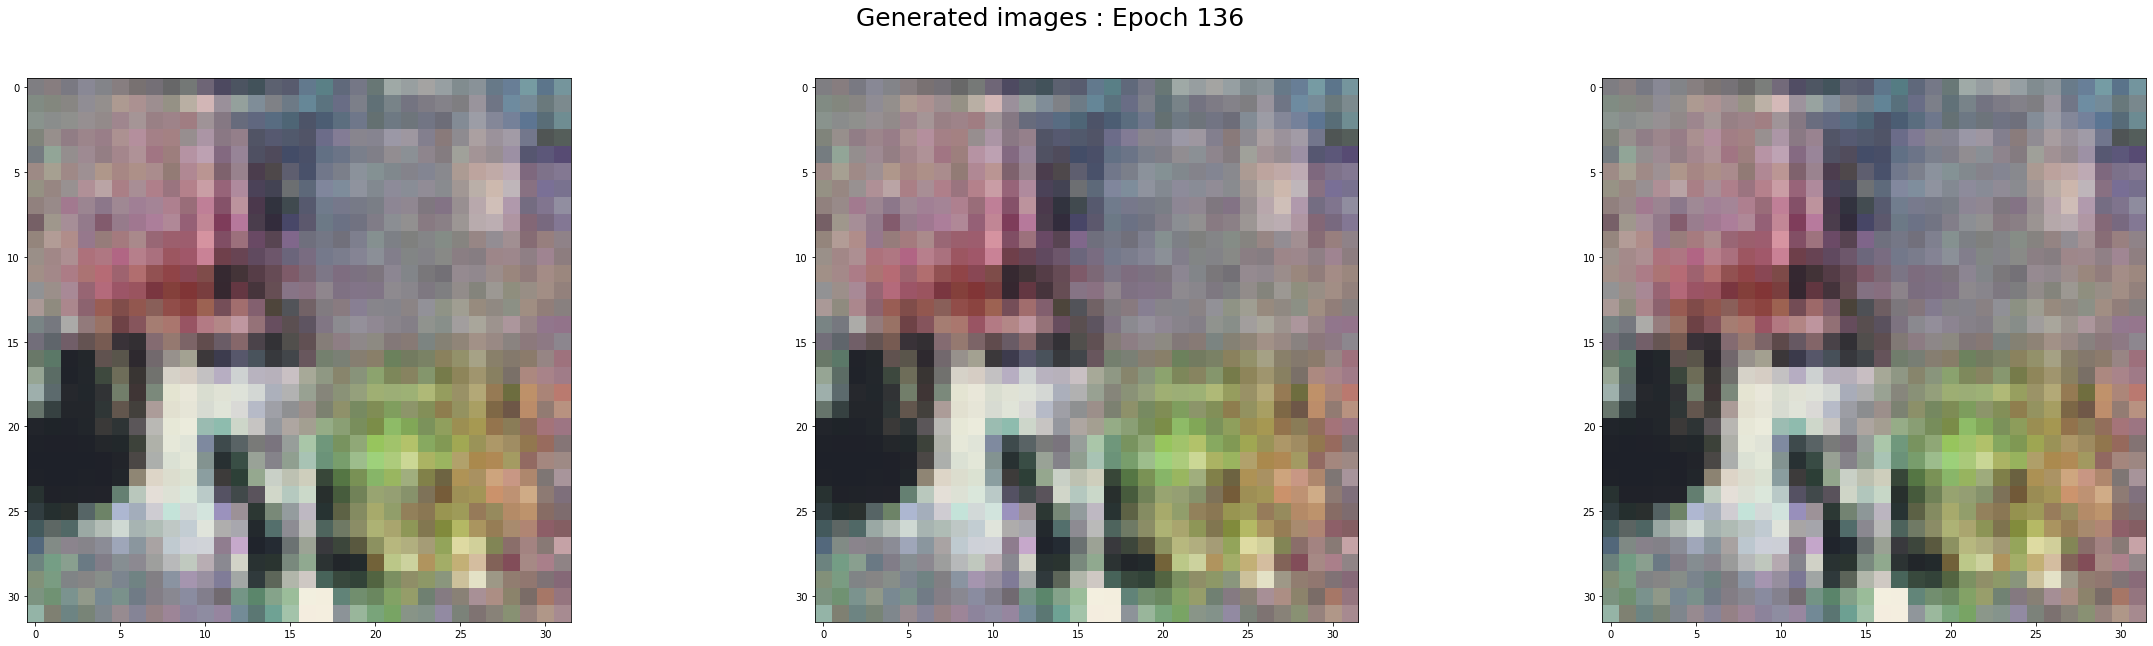

---------------------------------------------------------------
epoch :  137  d_loss_accuracy  =  [0.006914506666362286, 1.0]  g_loss =  0.20740078389644623


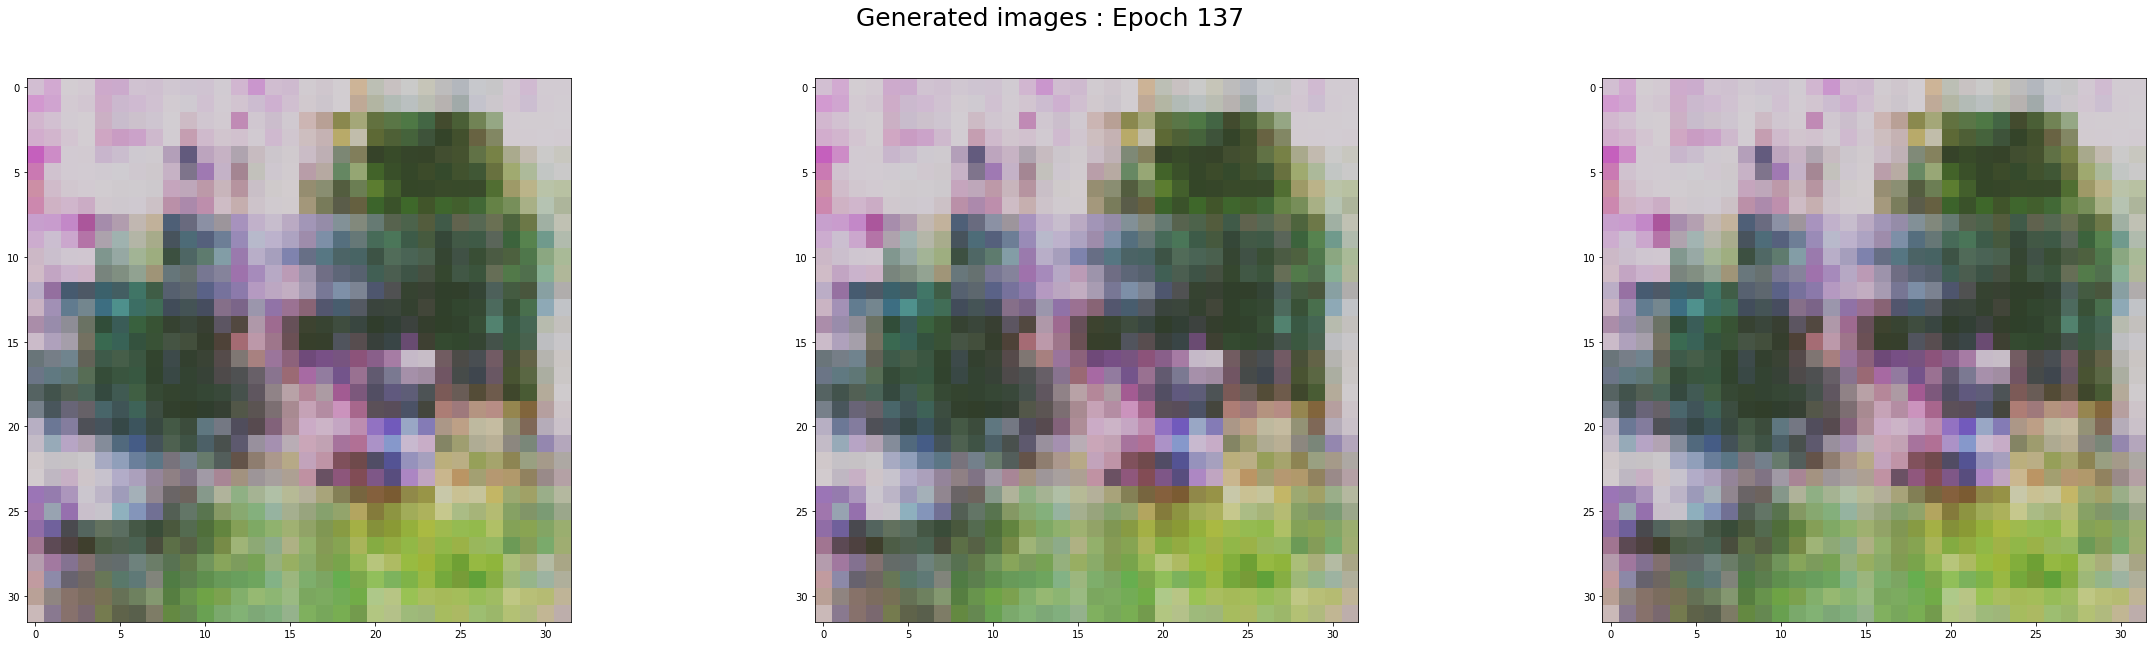

---------------------------------------------------------------
epoch :  138  d_loss_accuracy  =  [0.02527826651930809, 0.9921875]  g_loss =  2.6366004943847656


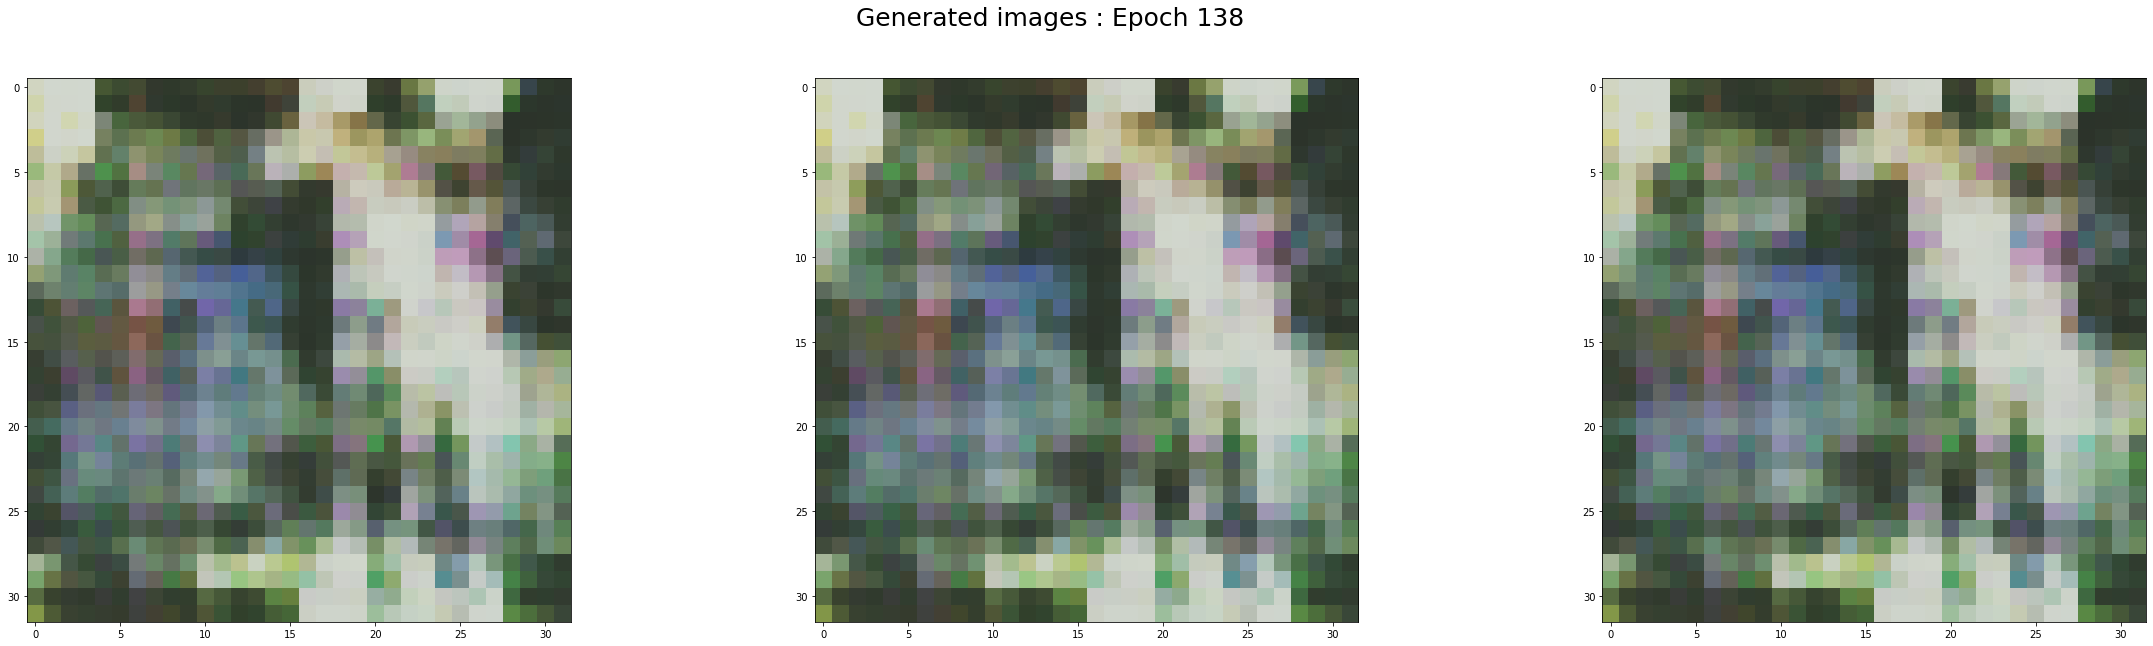

---------------------------------------------------------------
epoch :  139  d_loss_accuracy  =  [0.04788748174905777, 0.98828125]  g_loss =  1.0060701370239258


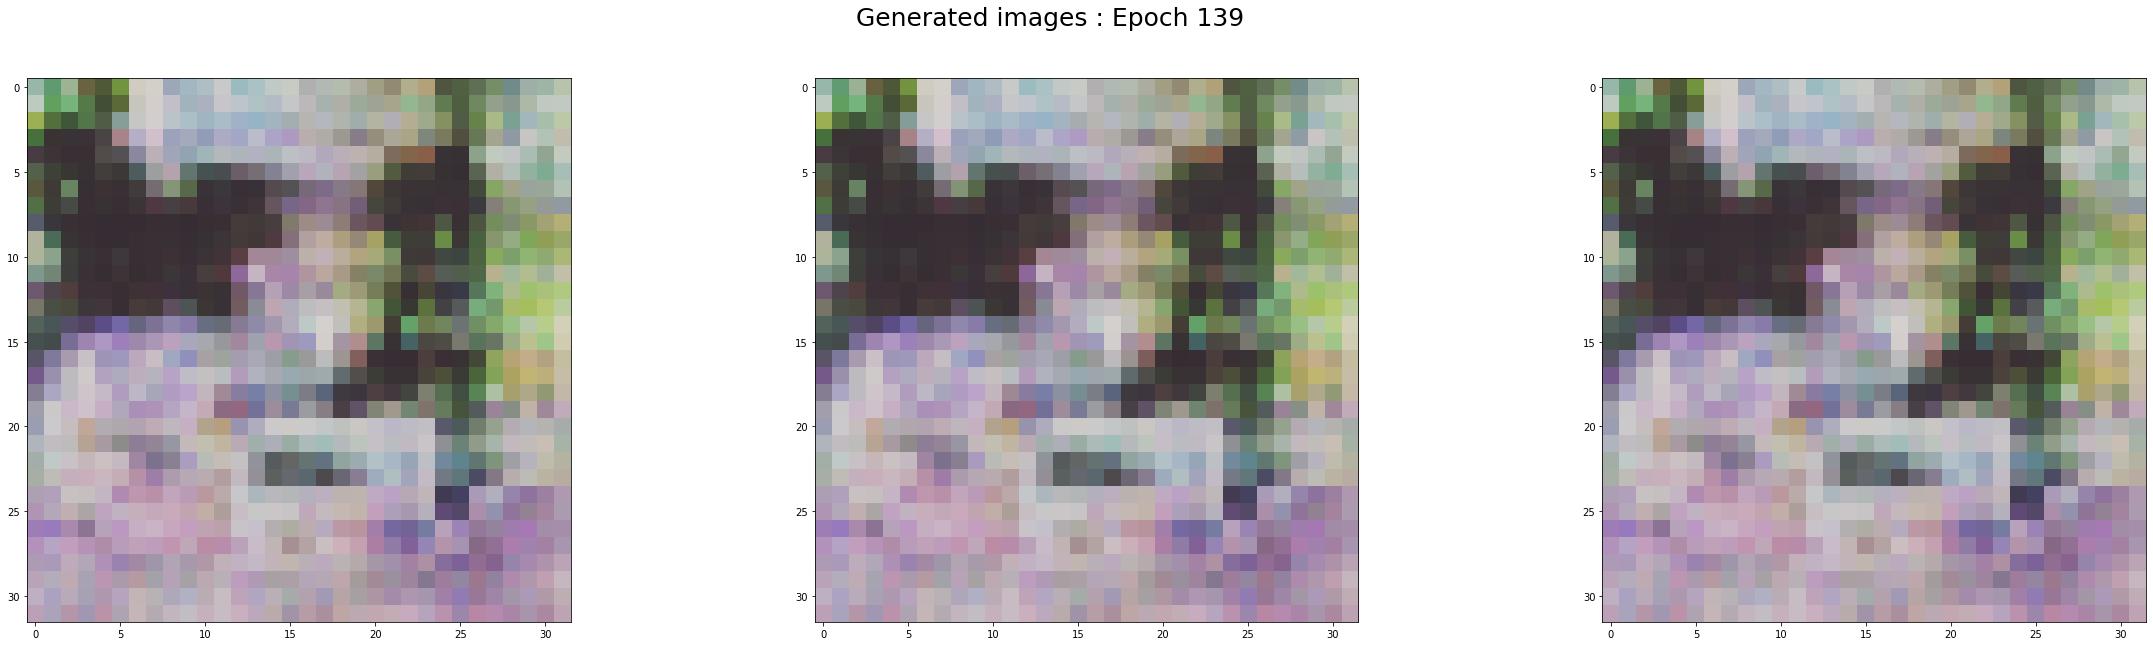

---------------------------------------------------------------
epoch :  140  d_loss_accuracy  =  [0.3500617444515228, 0.84375]  g_loss =  5.167327880859375


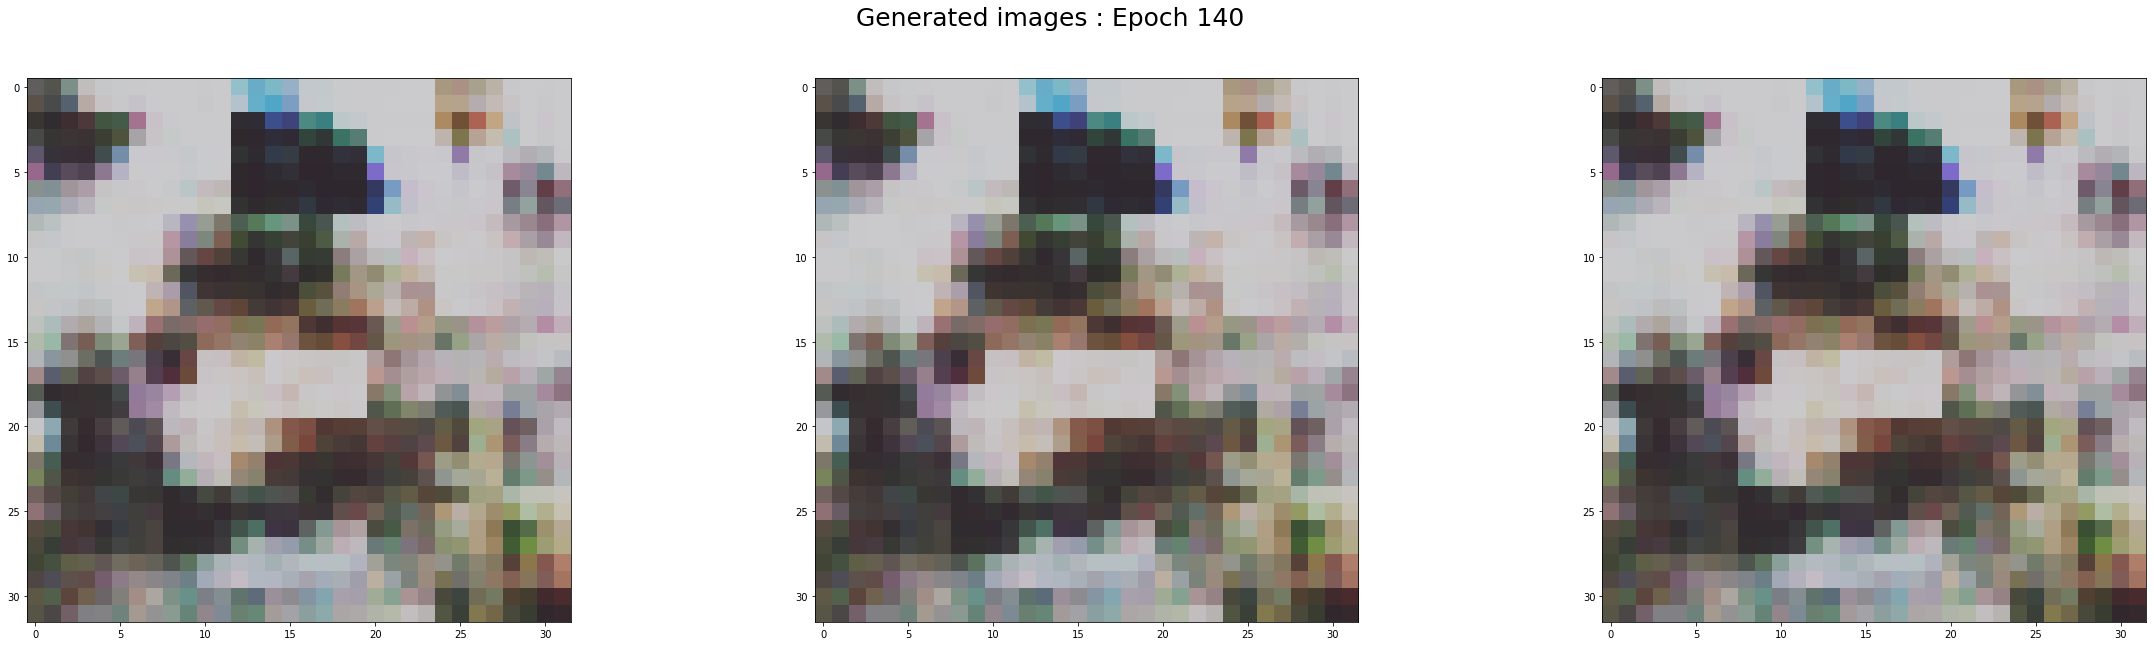

---------------------------------------------------------------
epoch :  141  d_loss_accuracy  =  [0.0008227791404351592, 1.0]  g_loss =  5.536854814636172e-07


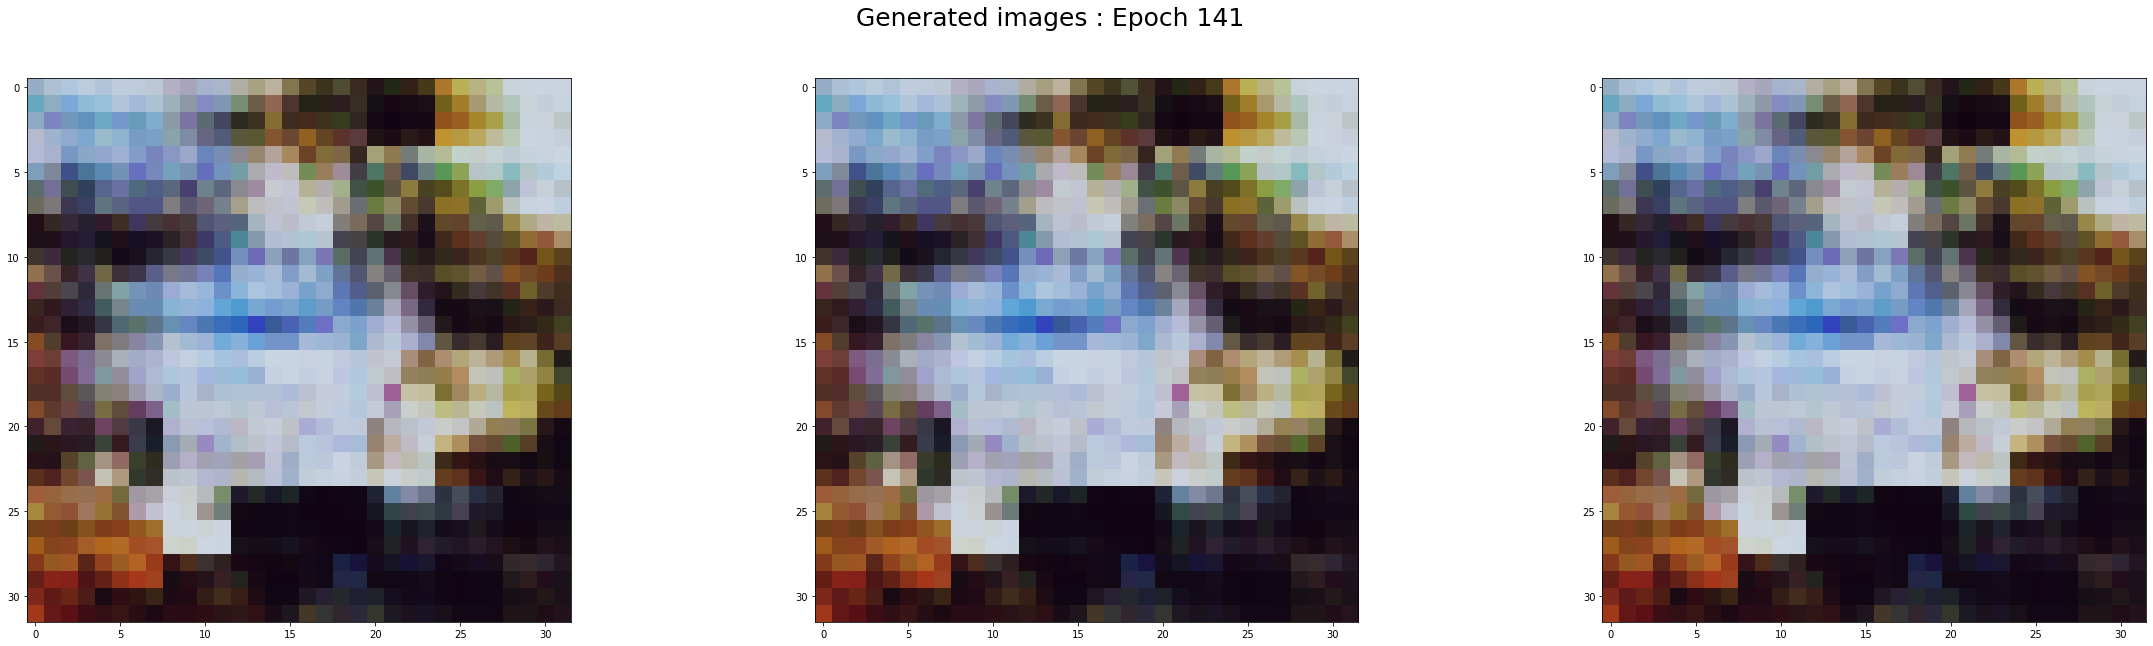

---------------------------------------------------------------
epoch :  142  d_loss_accuracy  =  [0.002873774152249098, 1.0]  g_loss =  0.052252426743507385


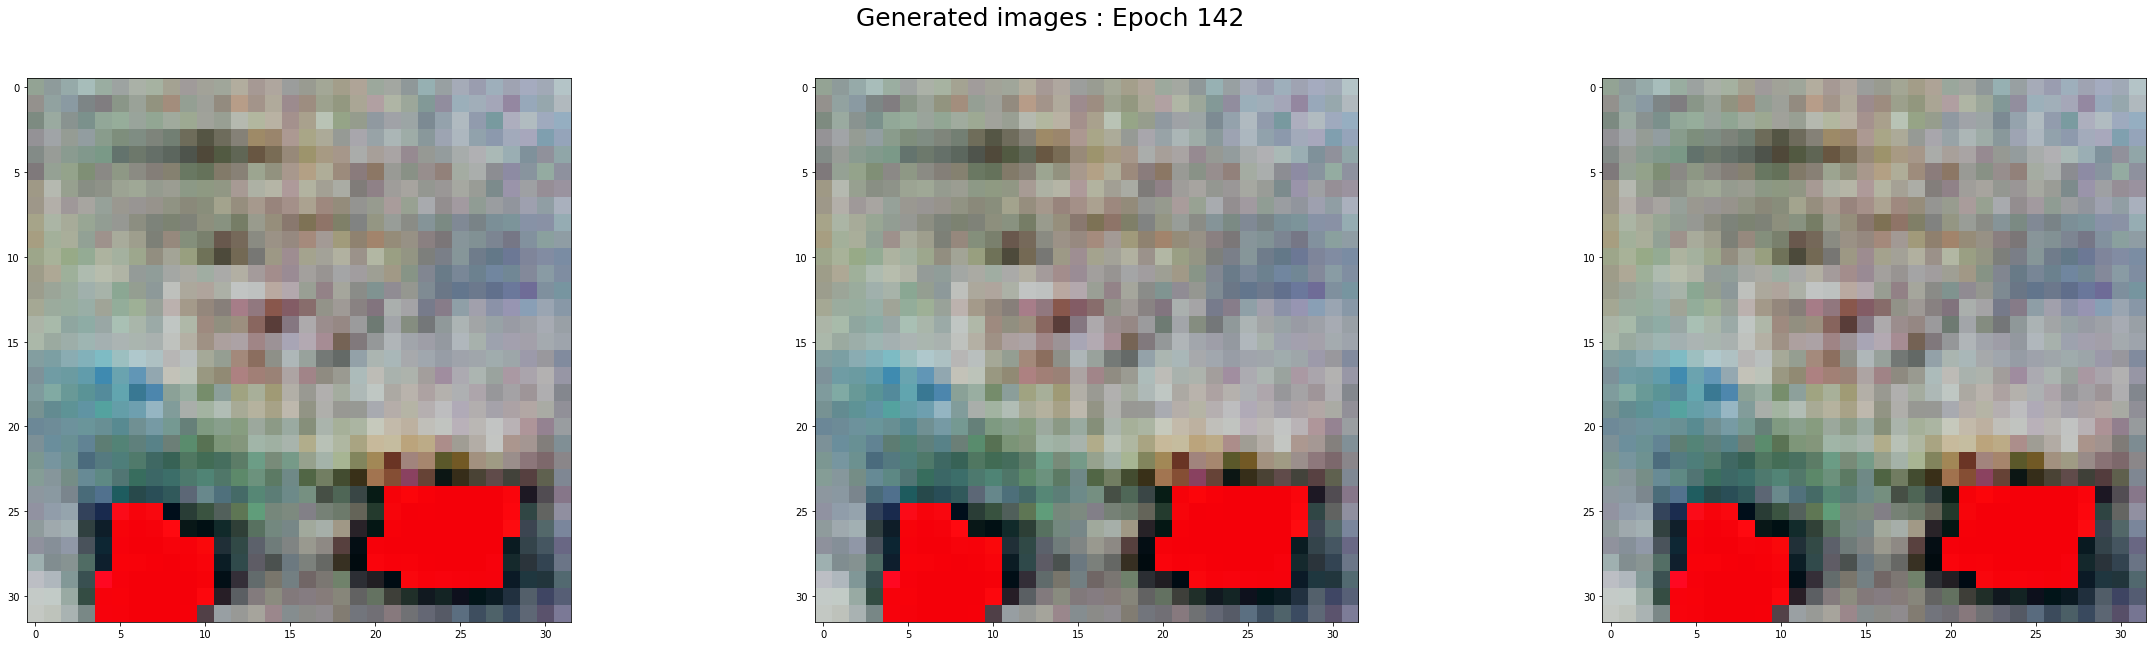

---------------------------------------------------------------
epoch :  143  d_loss_accuracy  =  [0.009606732055544853, 0.99609375]  g_loss =  0.30951377749443054


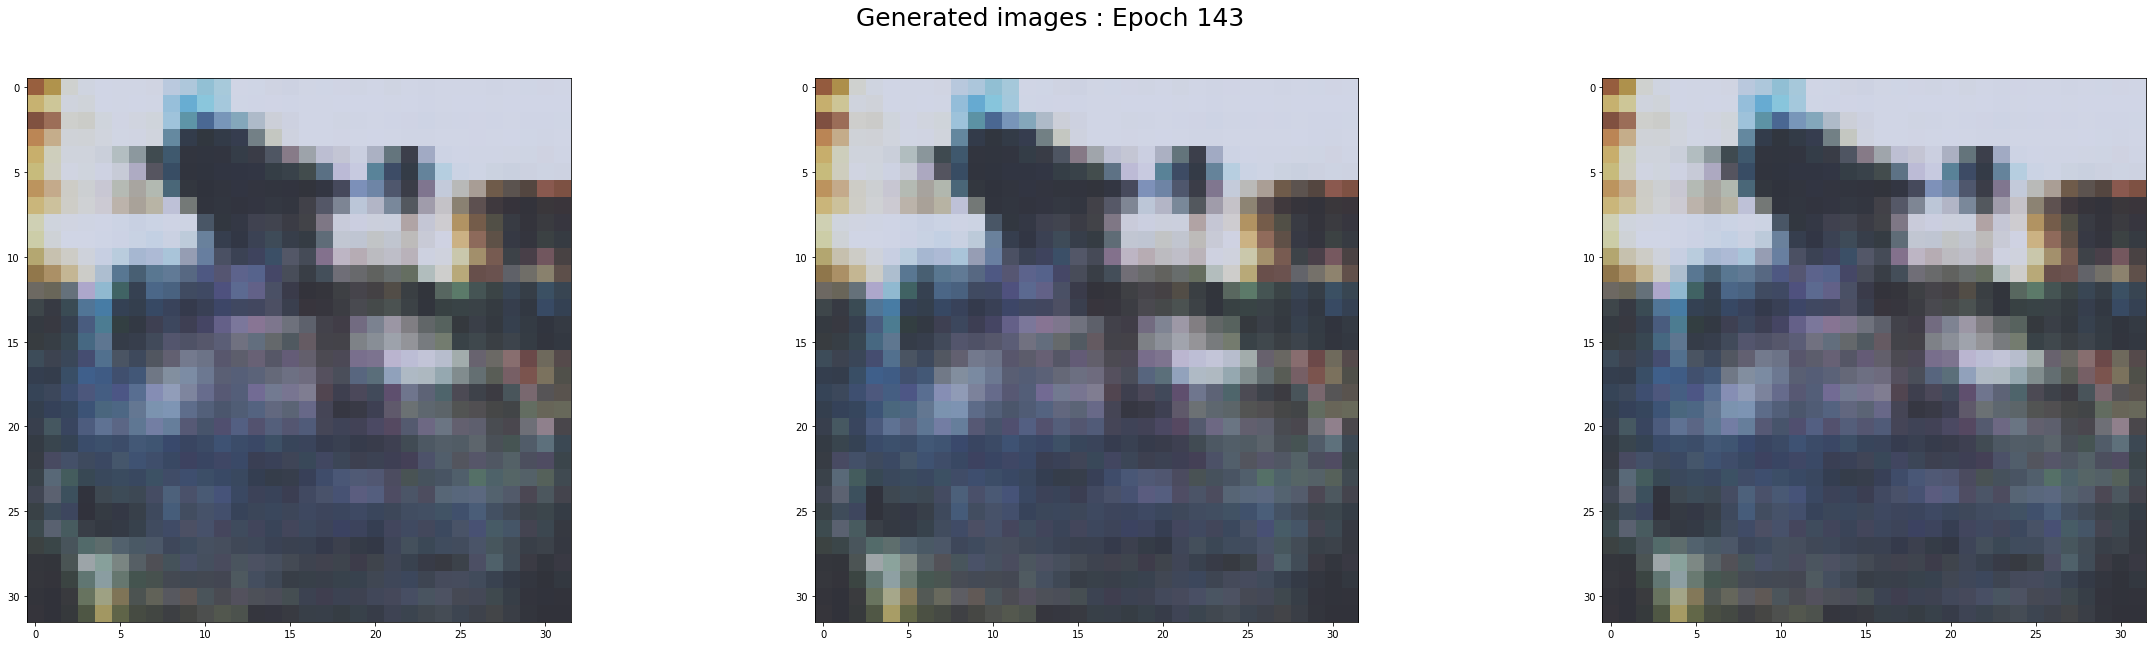

---------------------------------------------------------------
epoch :  144  d_loss_accuracy  =  [0.005701774265617132, 1.0]  g_loss =  0.29089197516441345


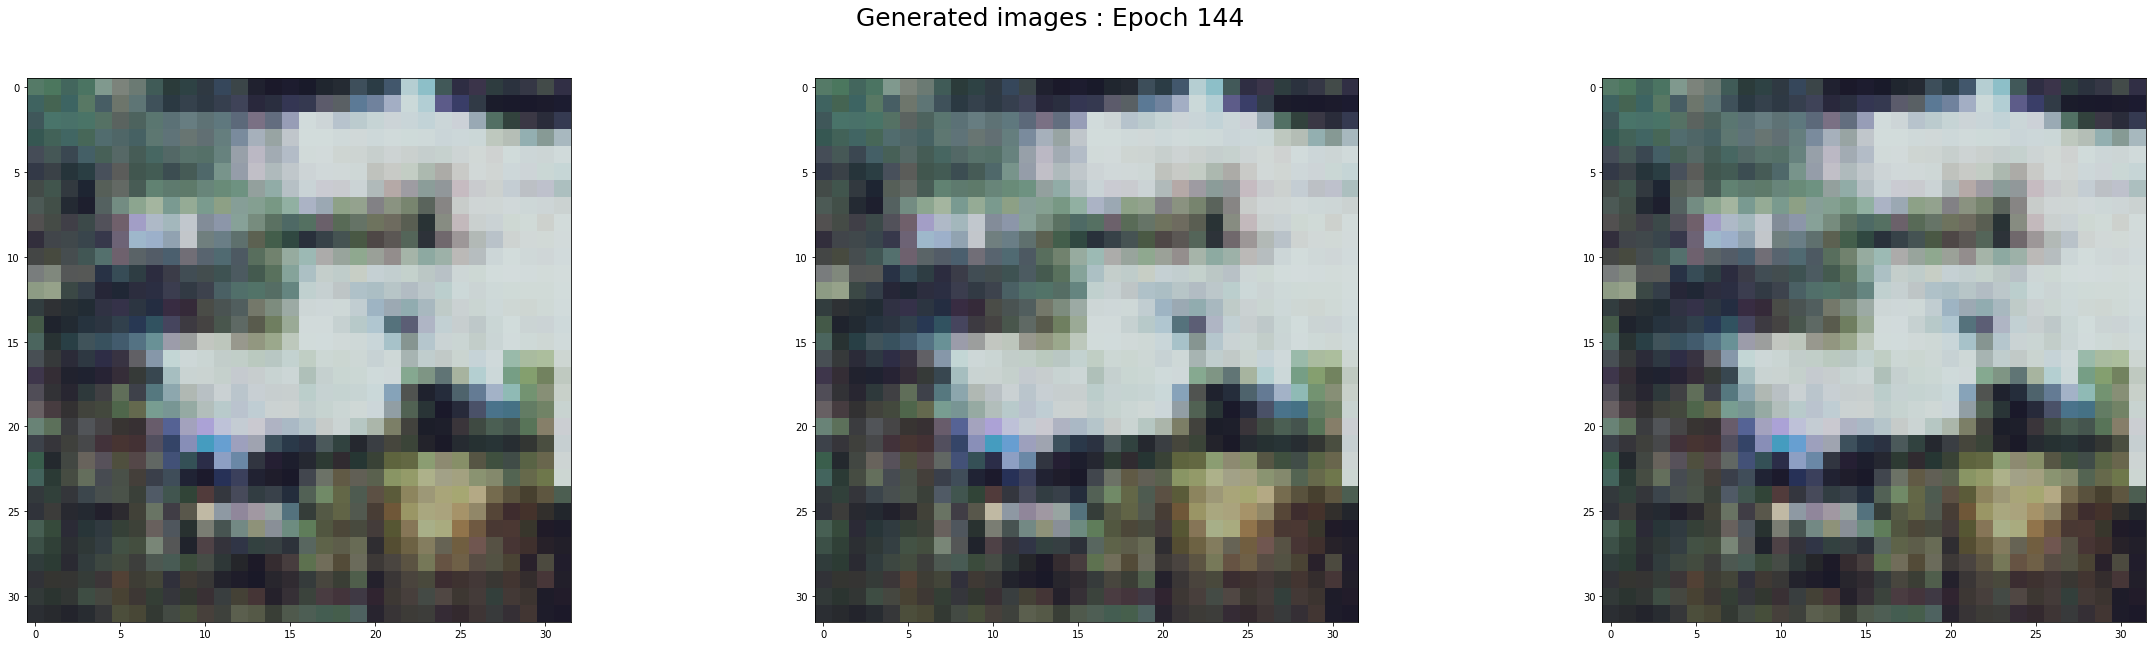

---------------------------------------------------------------
epoch :  145  d_loss_accuracy  =  [0.00586518133059144, 0.99609375]  g_loss =  0.02158975414931774


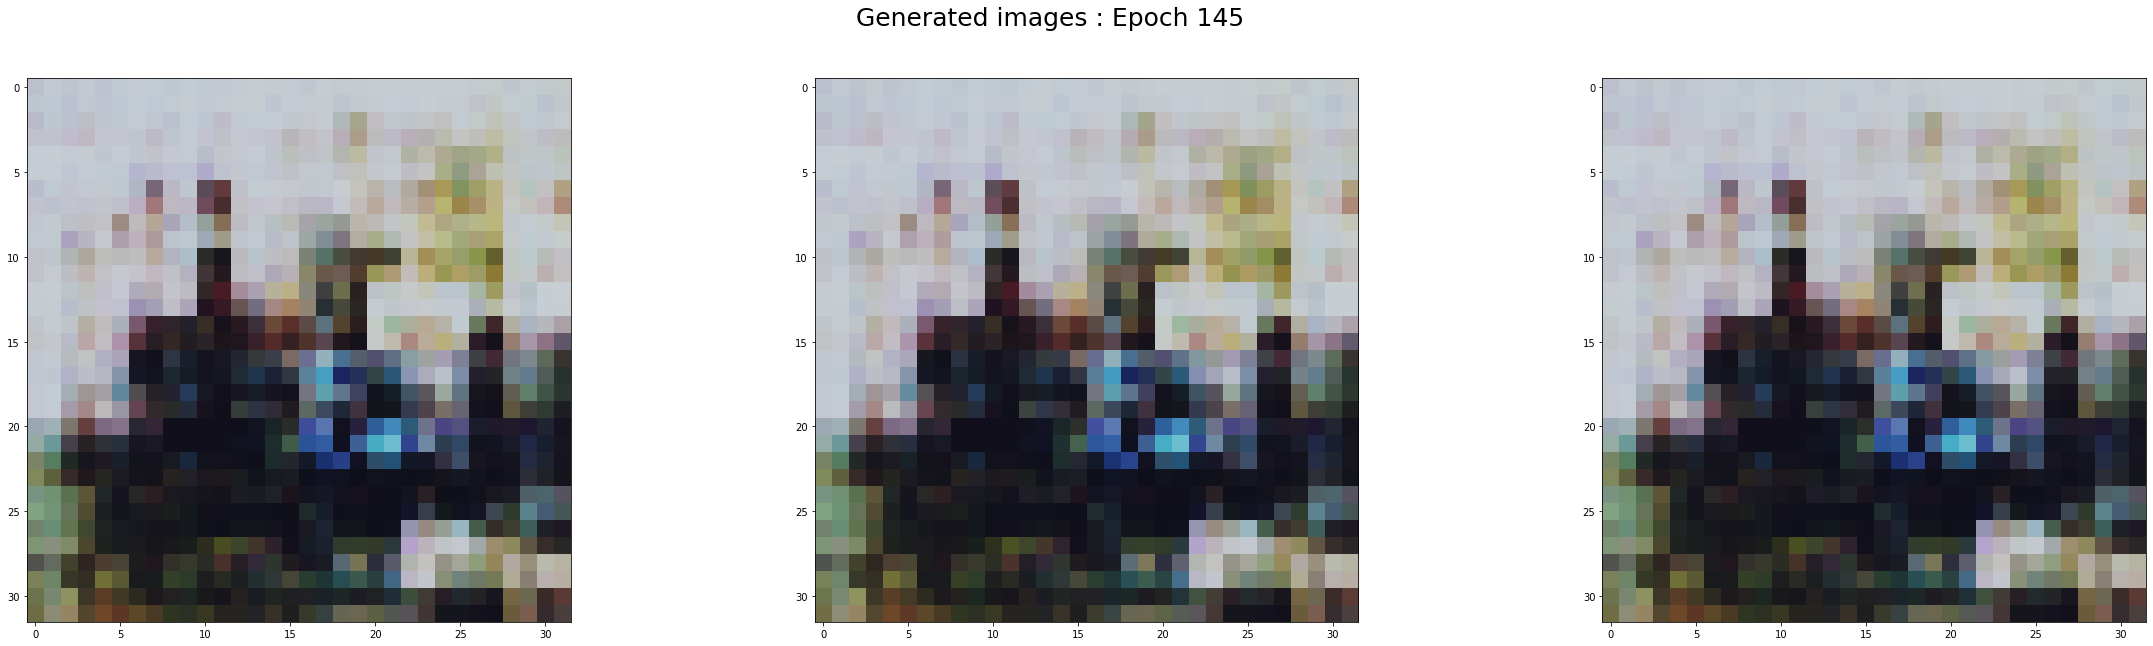

---------------------------------------------------------------
epoch :  146  d_loss_accuracy  =  [0.0035890955477952957, 0.99609375]  g_loss =  0.009382271207869053


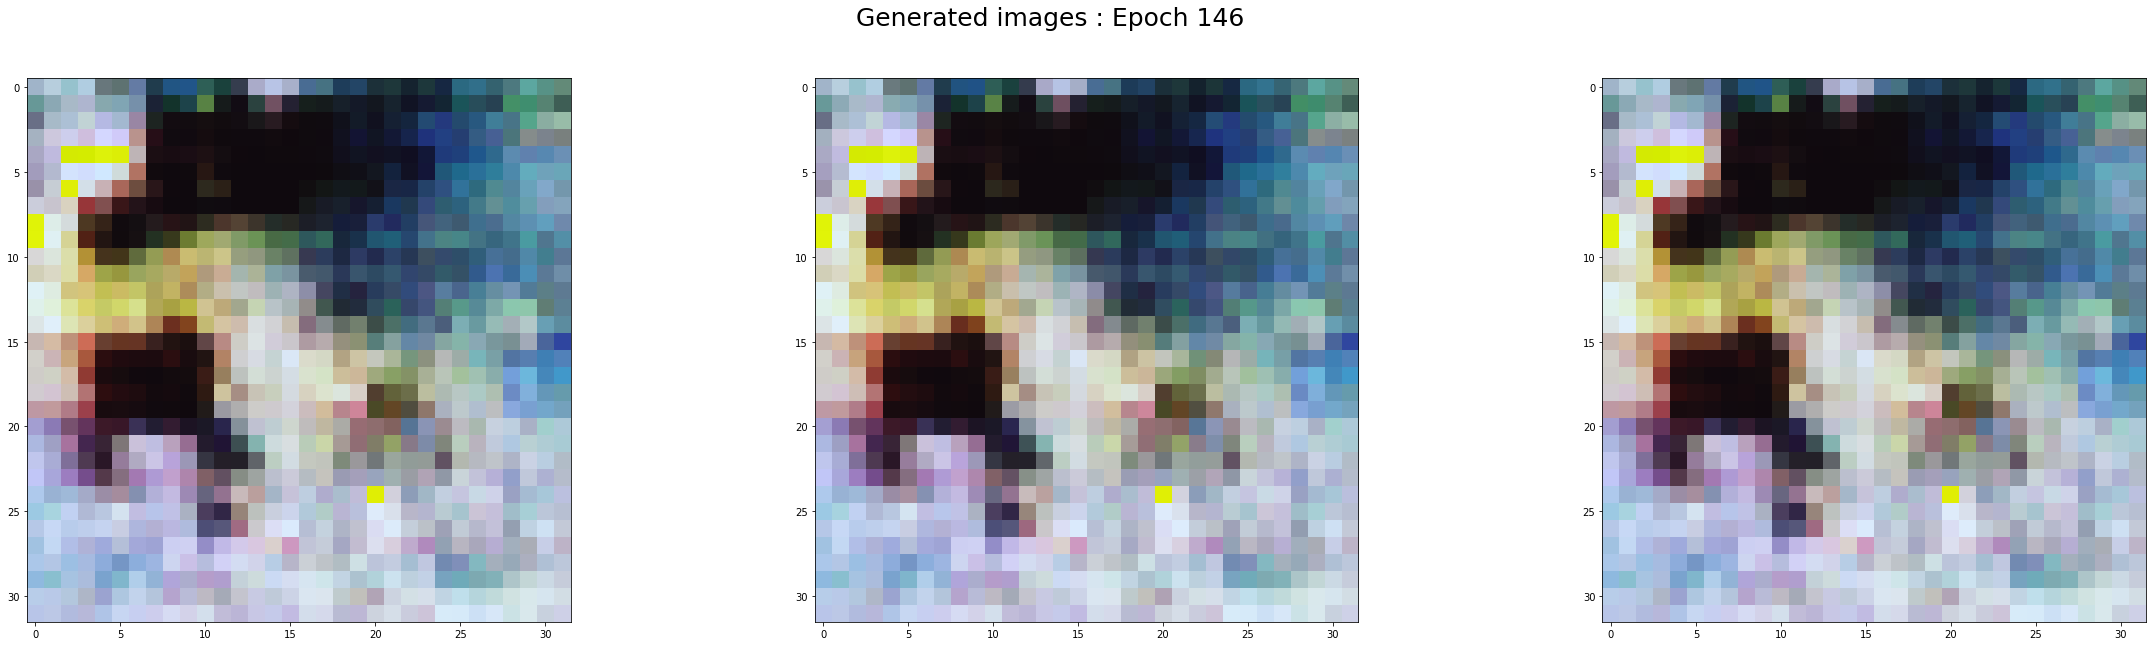

---------------------------------------------------------------
epoch :  147  d_loss_accuracy  =  [0.013507128693163395, 1.0]  g_loss =  0.10208852589130402


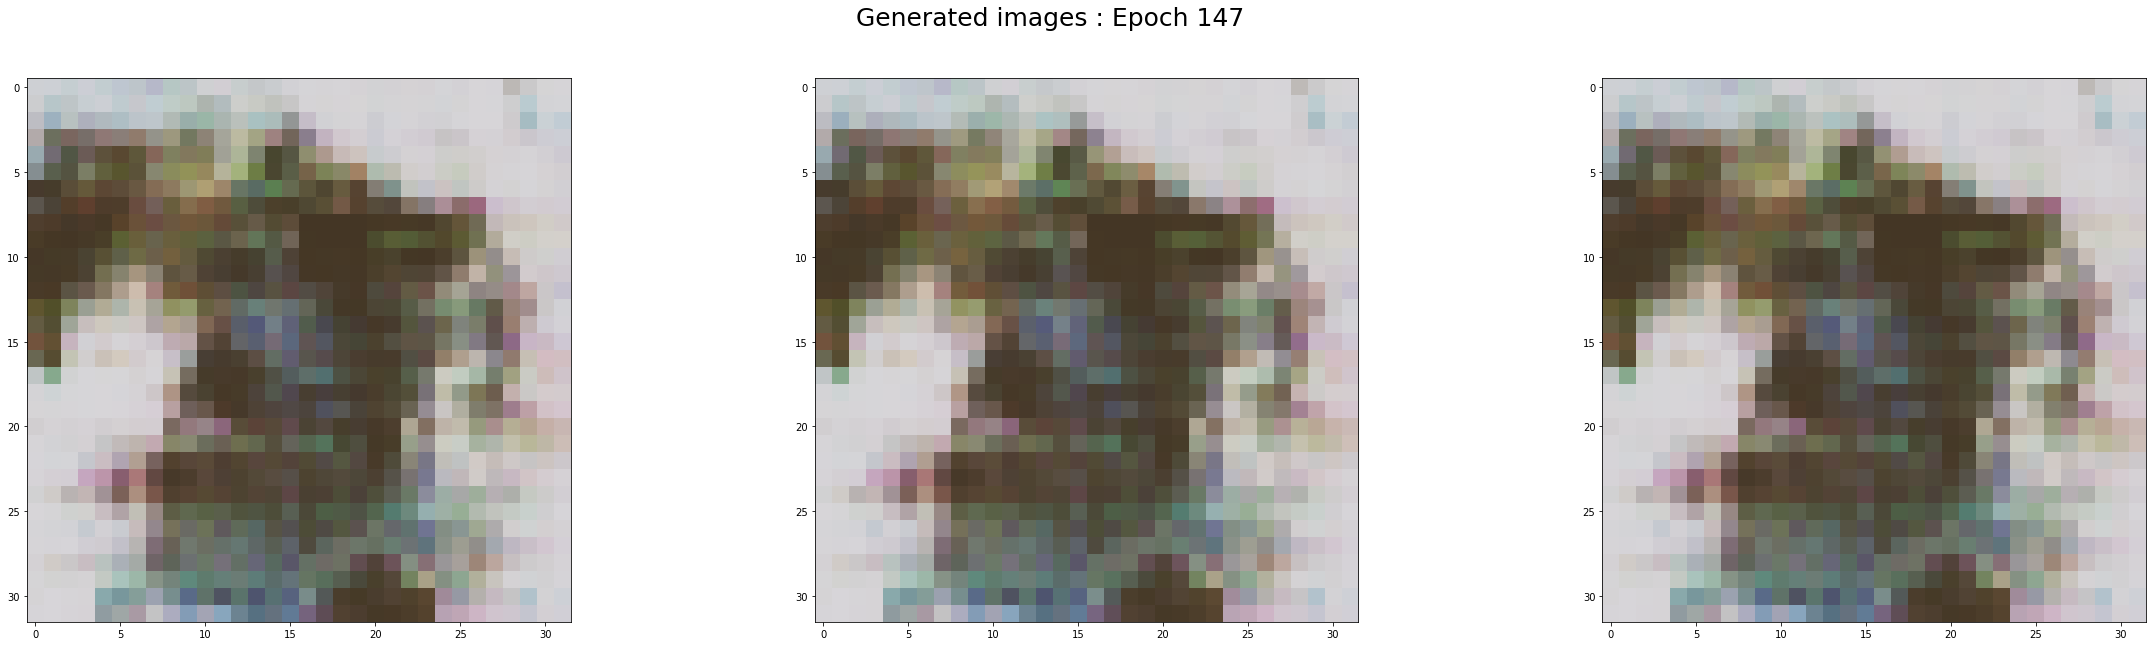

---------------------------------------------------------------
epoch :  148  d_loss_accuracy  =  [0.02686122991144657, 0.98828125]  g_loss =  0.02357252687215805


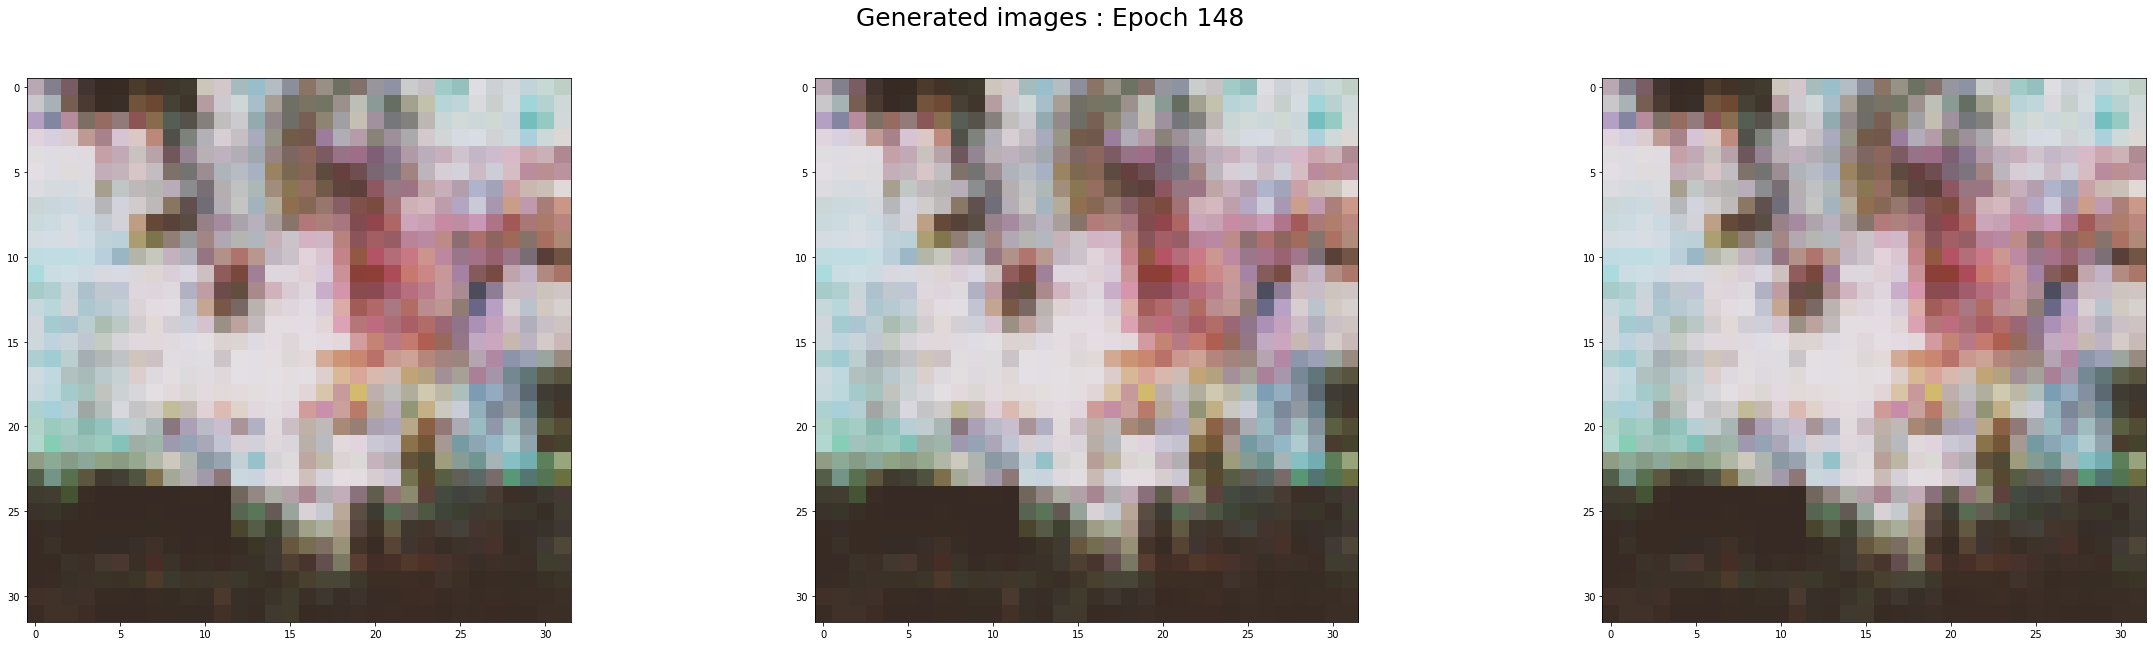

---------------------------------------------------------------
epoch :  149  d_loss_accuracy  =  [0.0006763923447579145, 1.0]  g_loss =  0.08268138021230698


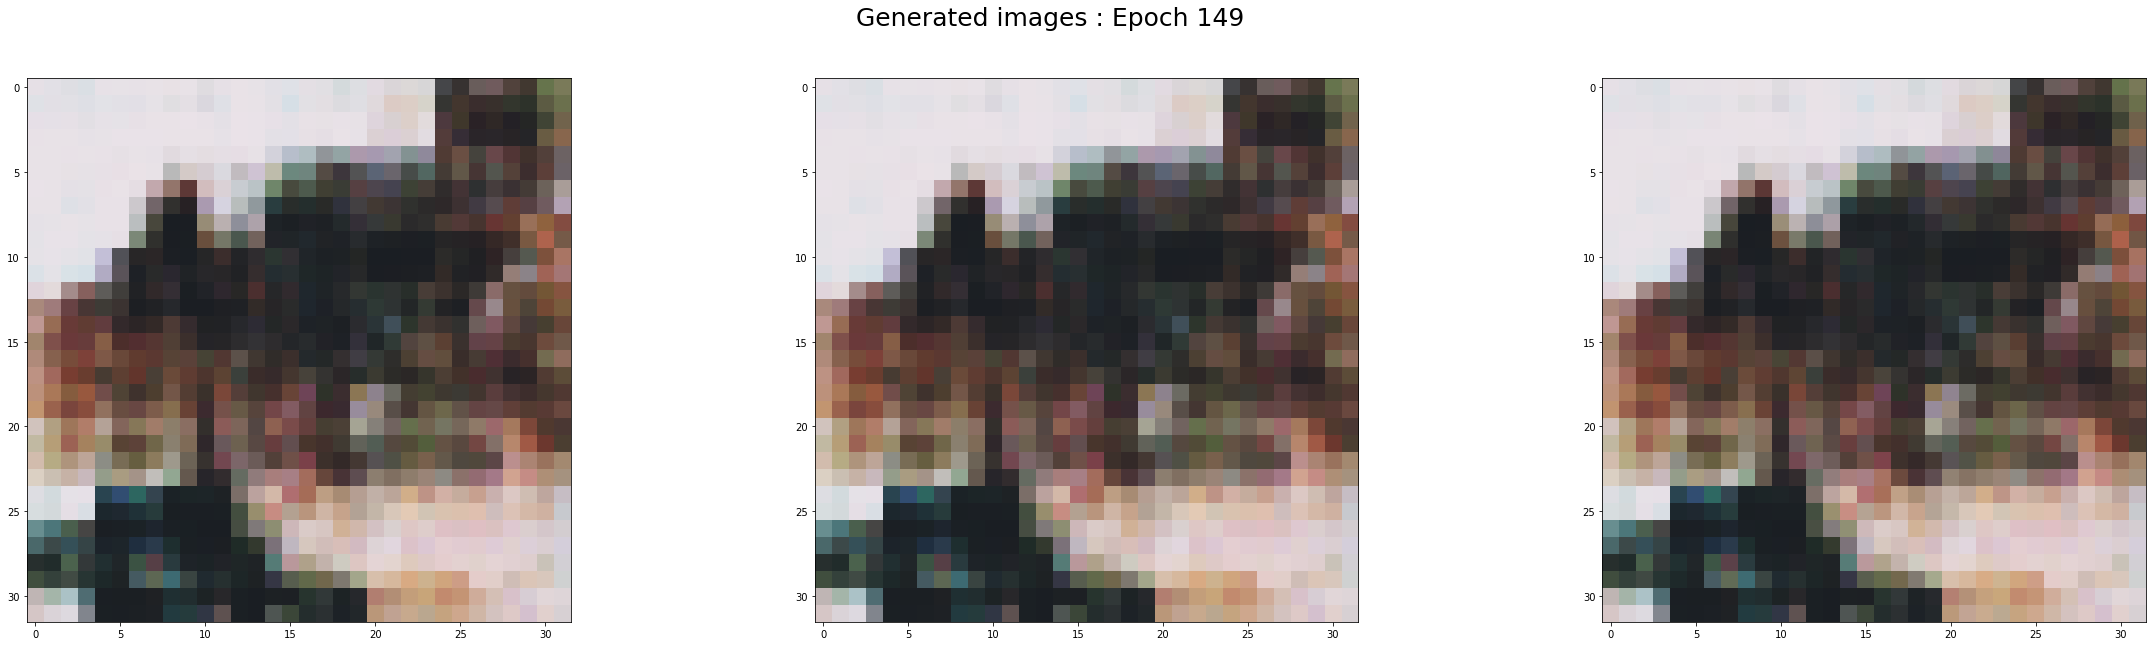

---------------------------------------------------------------
epoch :  150  d_loss_accuracy  =  [0.001988953910768032, 1.0]  g_loss =  0.17553158104419708


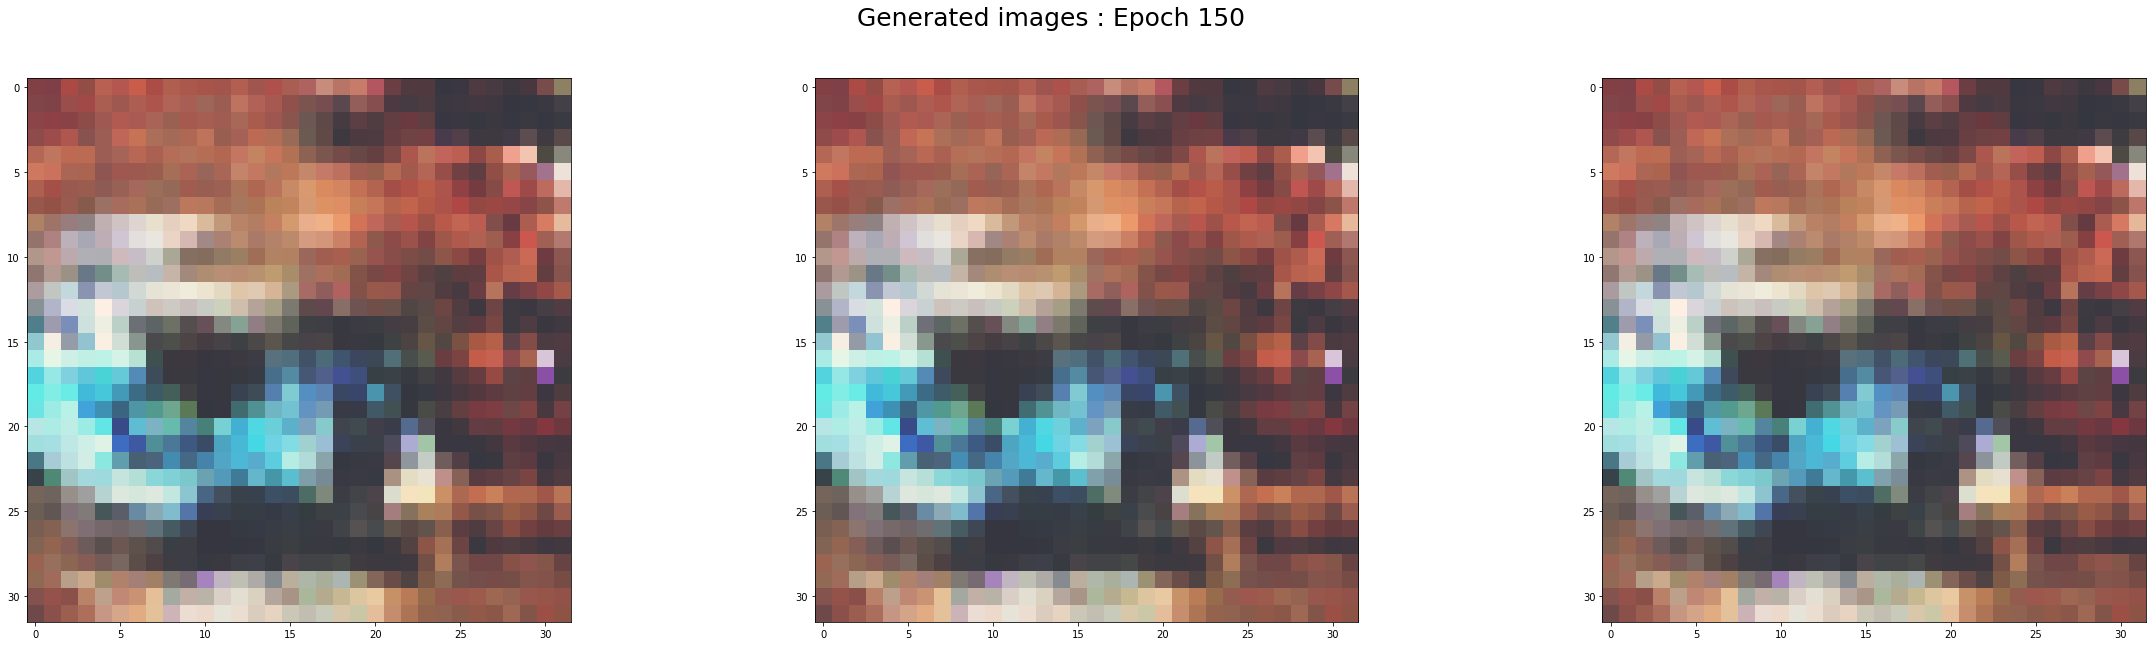

---------------------------------------------------------------
epoch :  151  d_loss_accuracy  =  [0.018230732530355453, 0.9921875]  g_loss =  0.09173069149255753


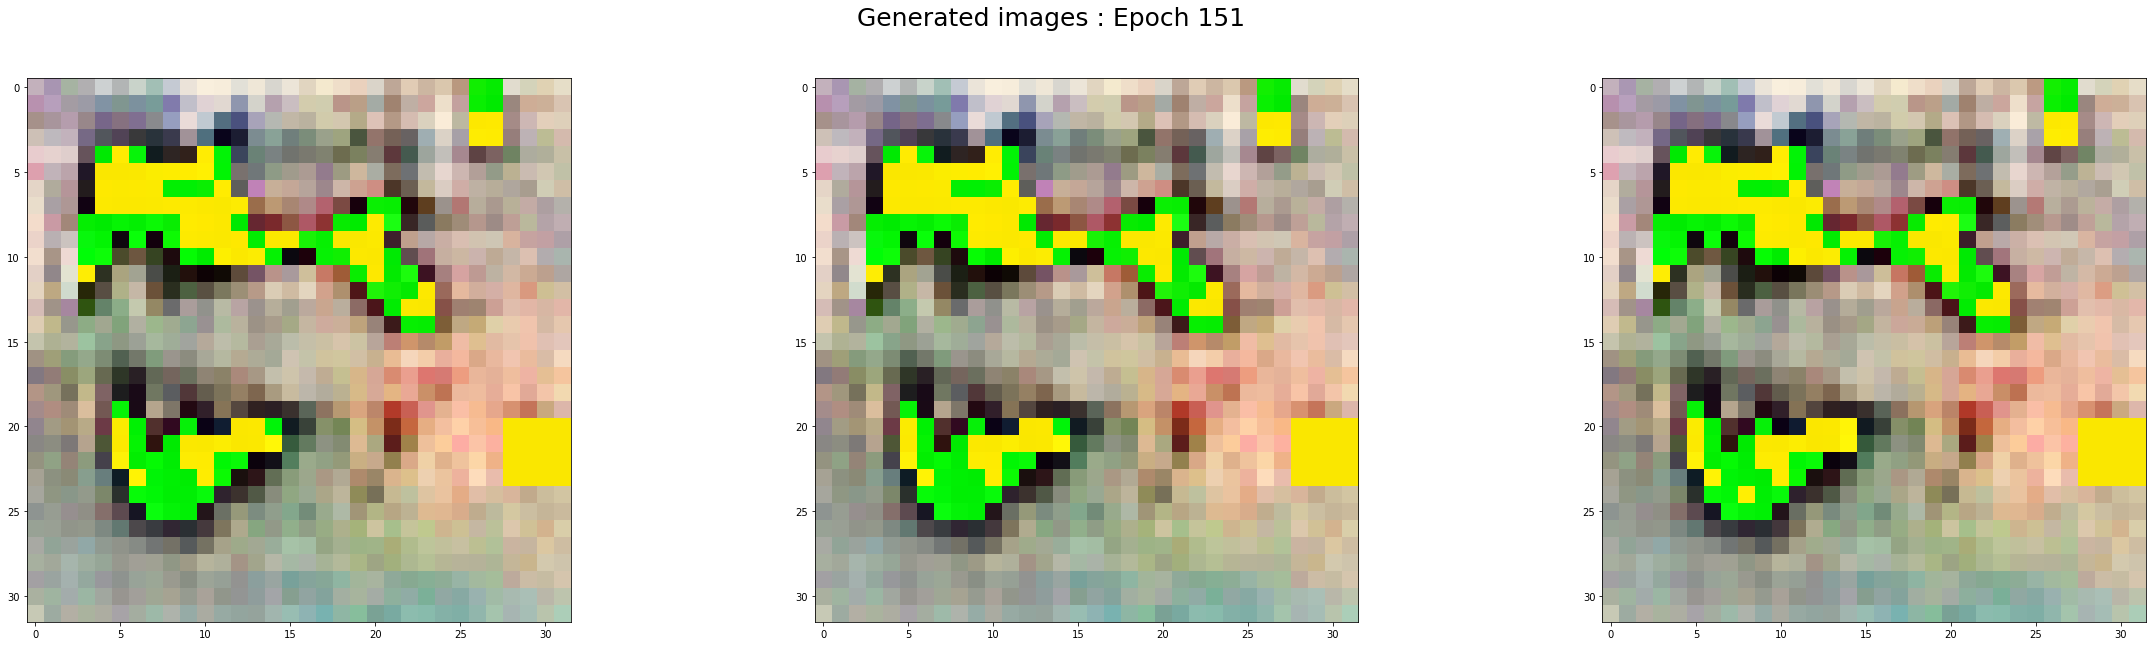

---------------------------------------------------------------
epoch :  152  d_loss_accuracy  =  [0.012684647925198078, 0.99609375]  g_loss =  0.1932295560836792


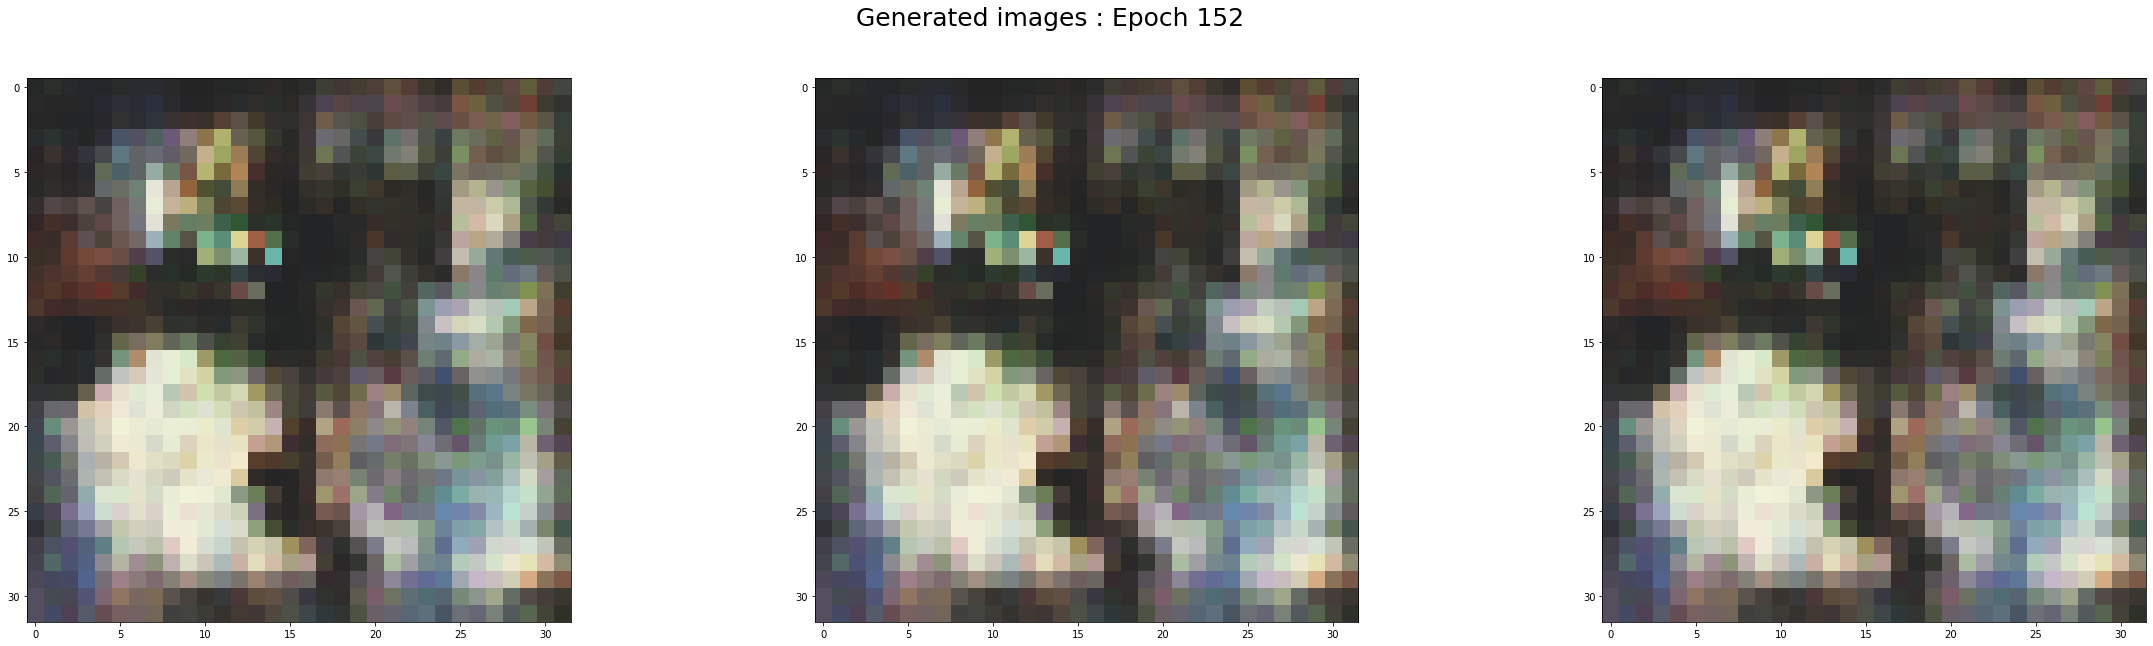

---------------------------------------------------------------
epoch :  153  d_loss_accuracy  =  [0.025101294741034508, 0.9921875]  g_loss =  0.08503303676843643


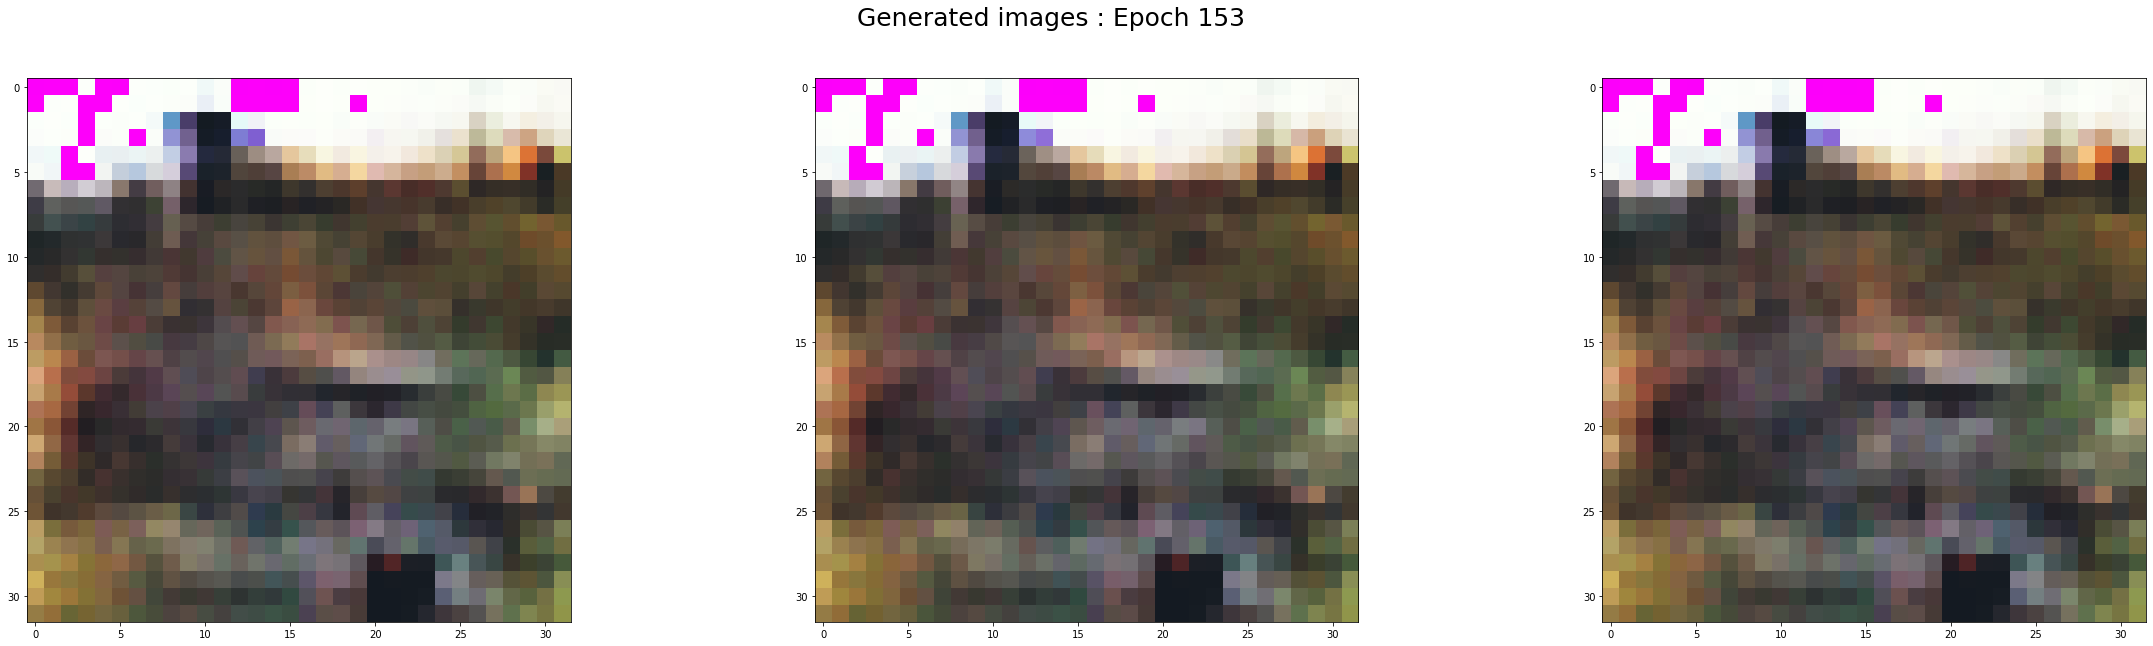

---------------------------------------------------------------
epoch :  154  d_loss_accuracy  =  [0.0030975141562521458, 1.0]  g_loss =  0.05855140835046768


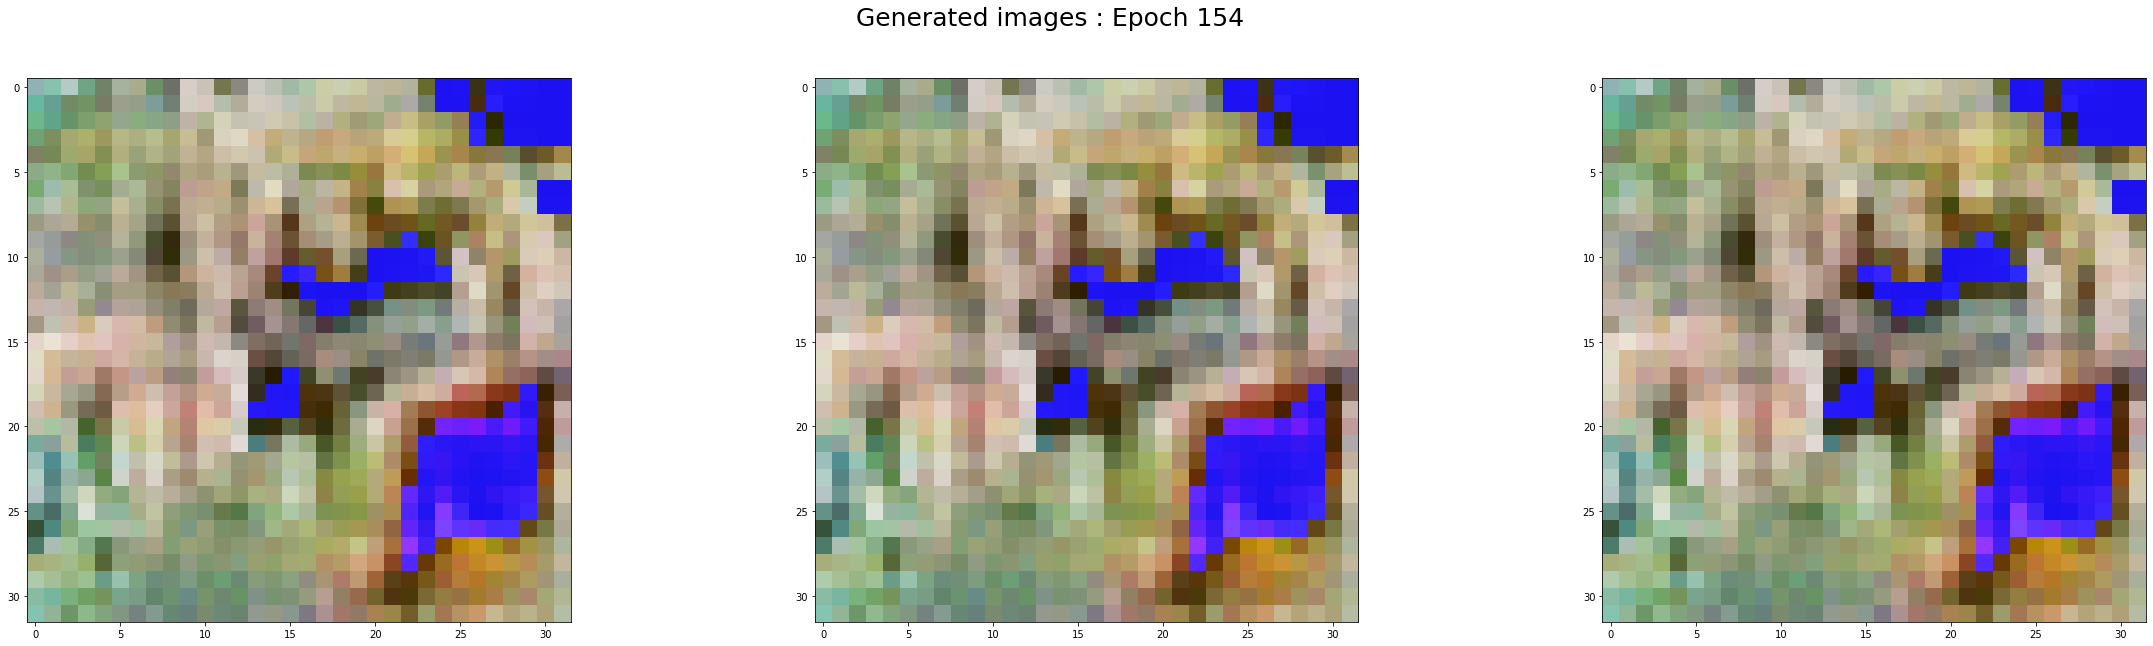

---------------------------------------------------------------
epoch :  155  d_loss_accuracy  =  [0.057200171053409576, 0.984375]  g_loss =  1.2833800315856934


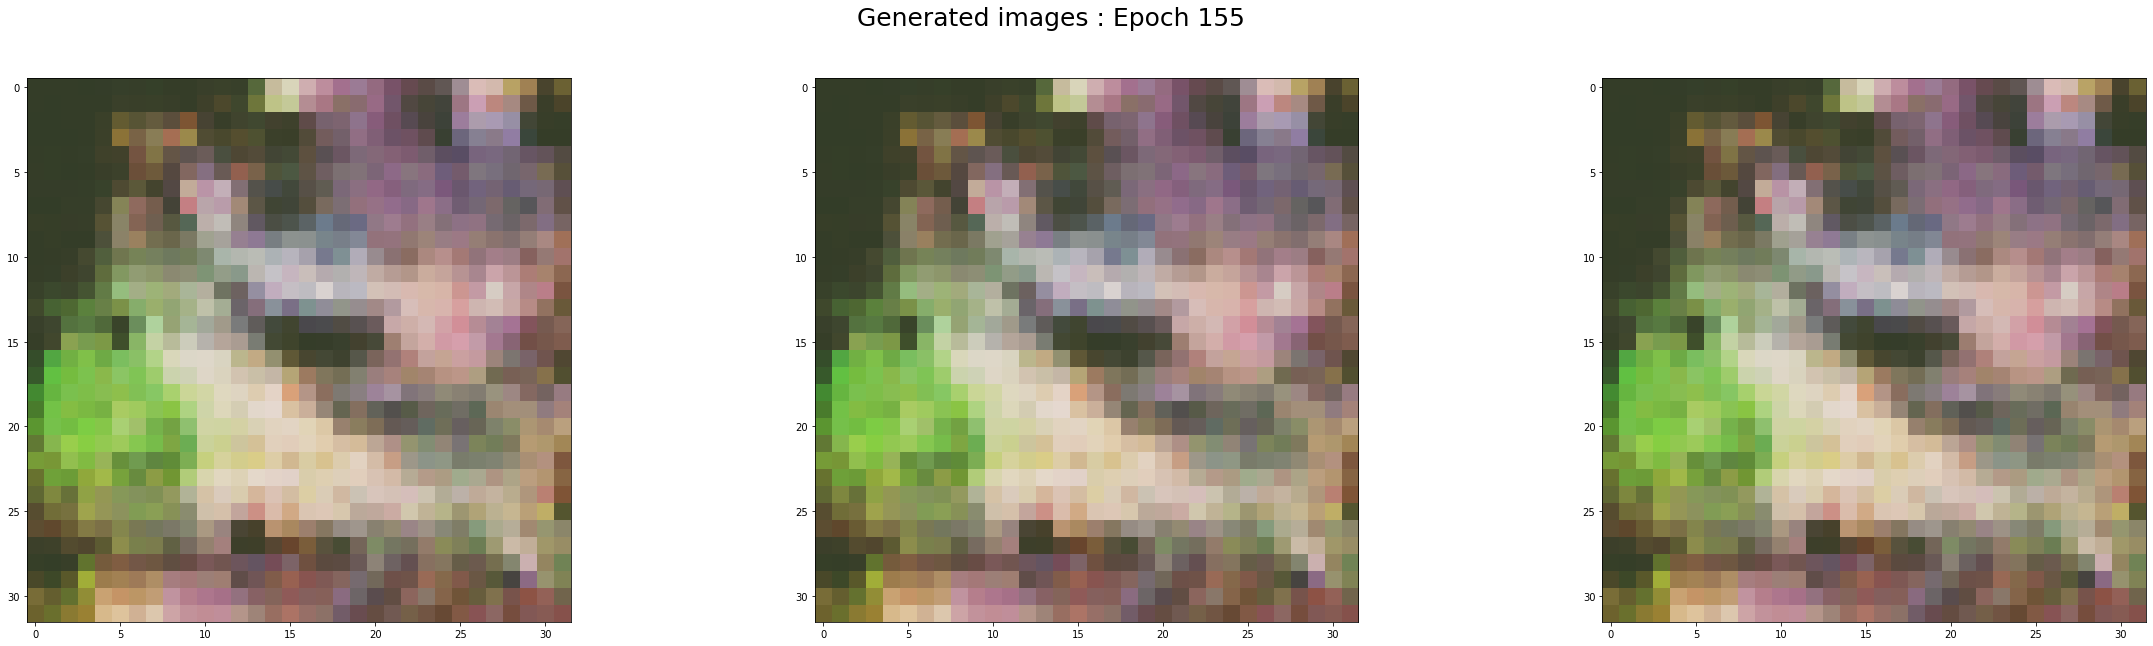

---------------------------------------------------------------
epoch :  156  d_loss_accuracy  =  [0.0033842416014522314, 1.0]  g_loss =  0.13774874806404114


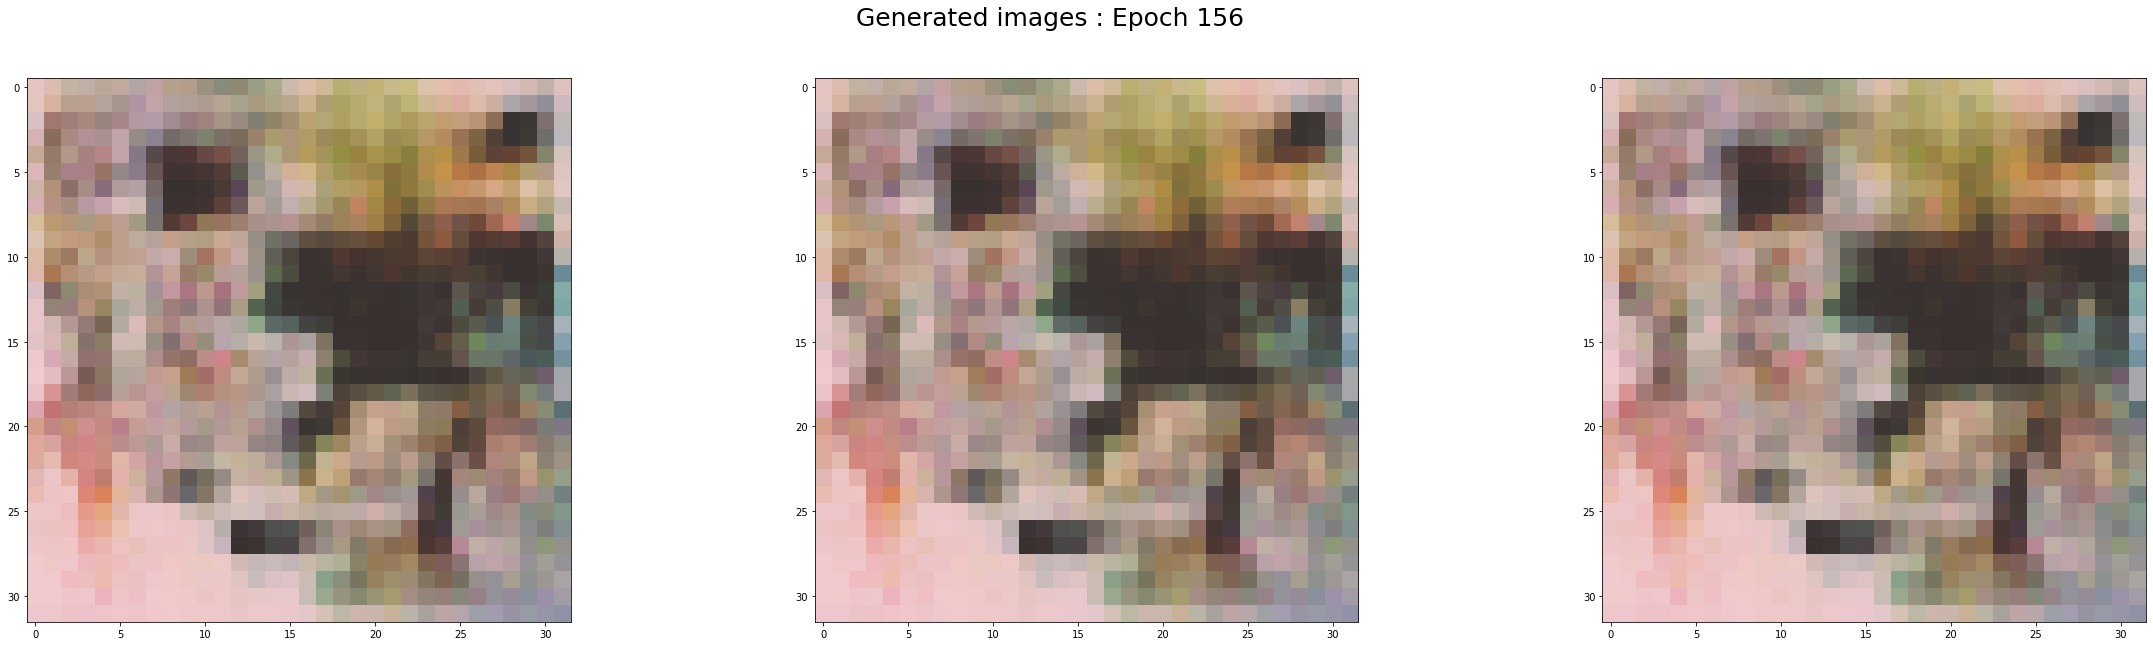

---------------------------------------------------------------
epoch :  157  d_loss_accuracy  =  [0.010844319127500057, 0.9921875]  g_loss =  0.1601884961128235


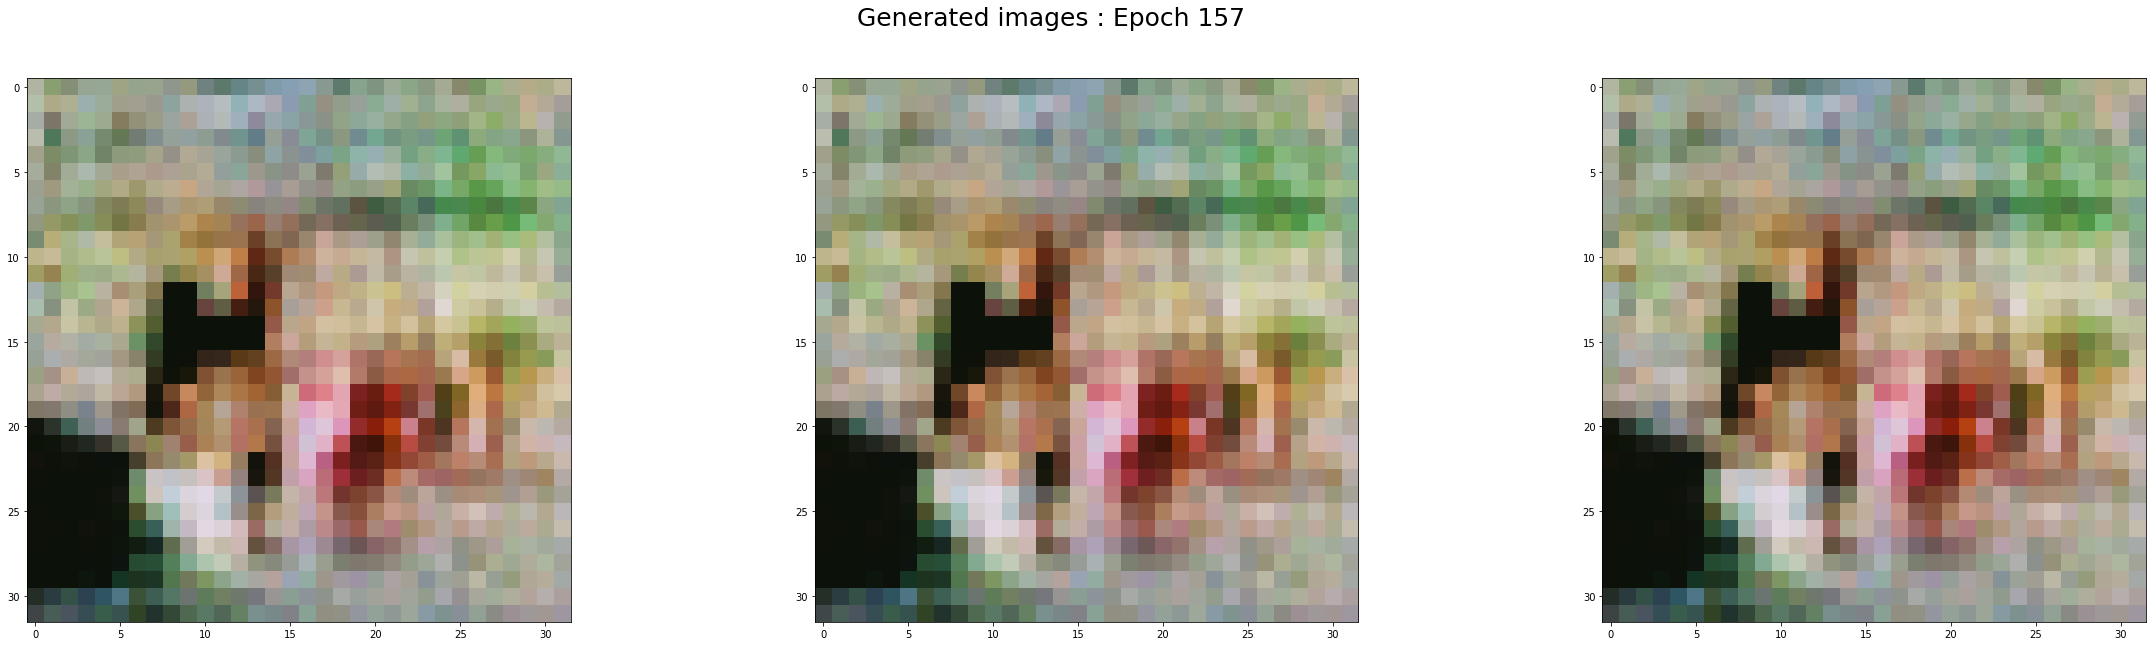

---------------------------------------------------------------
epoch :  158  d_loss_accuracy  =  [0.010196239687502384, 0.99609375]  g_loss =  0.1524924635887146


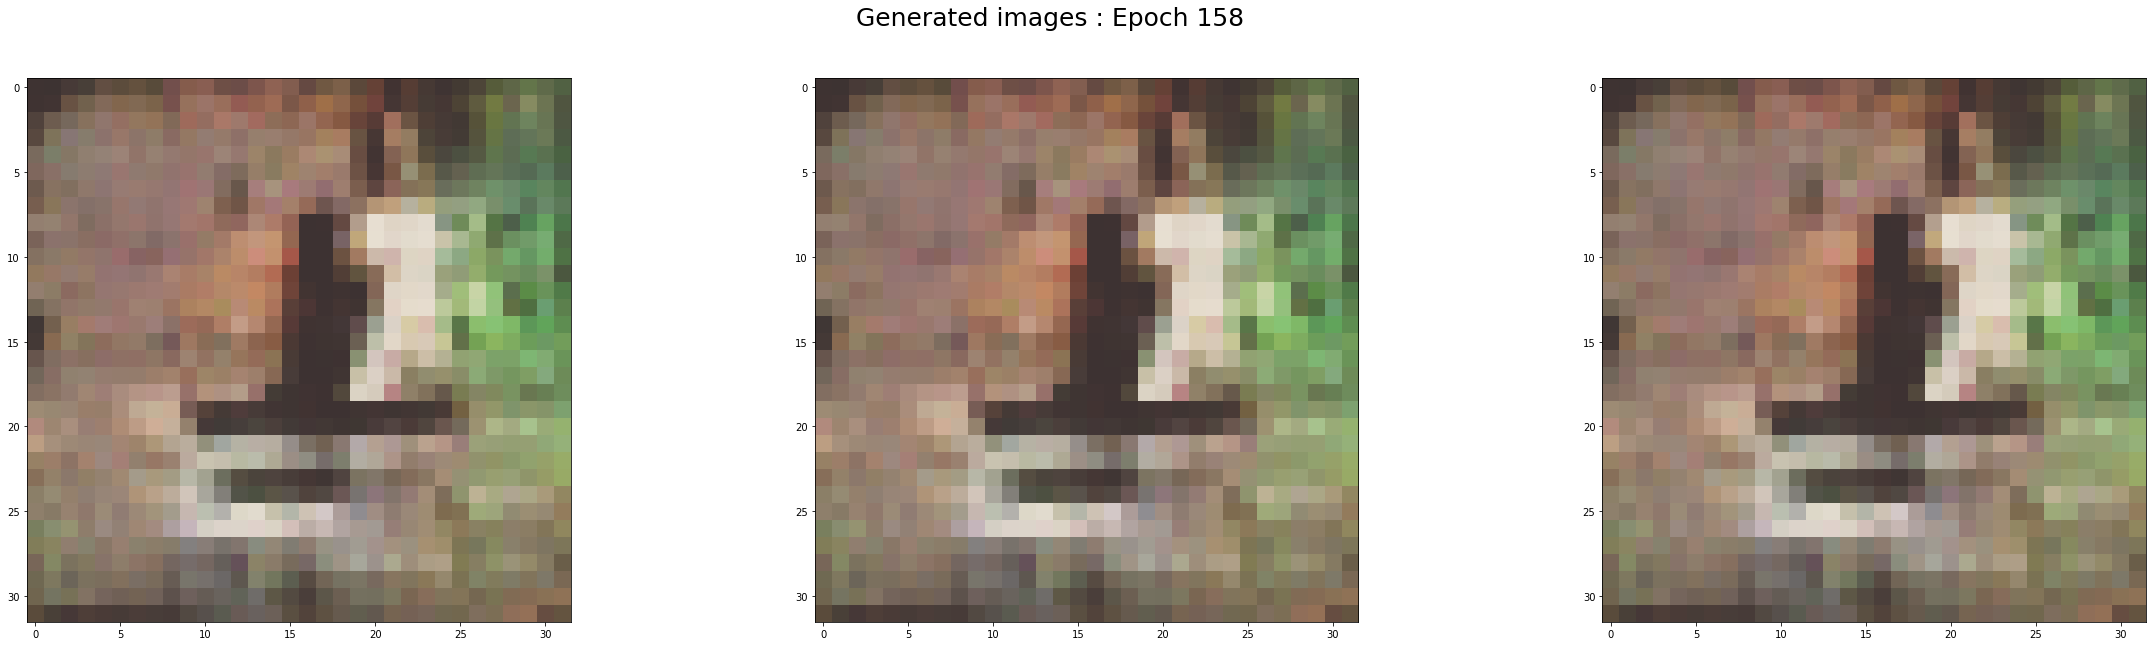

---------------------------------------------------------------
epoch :  159  d_loss_accuracy  =  [0.10000263154506683, 0.9765625]  g_loss =  7.074268341064453


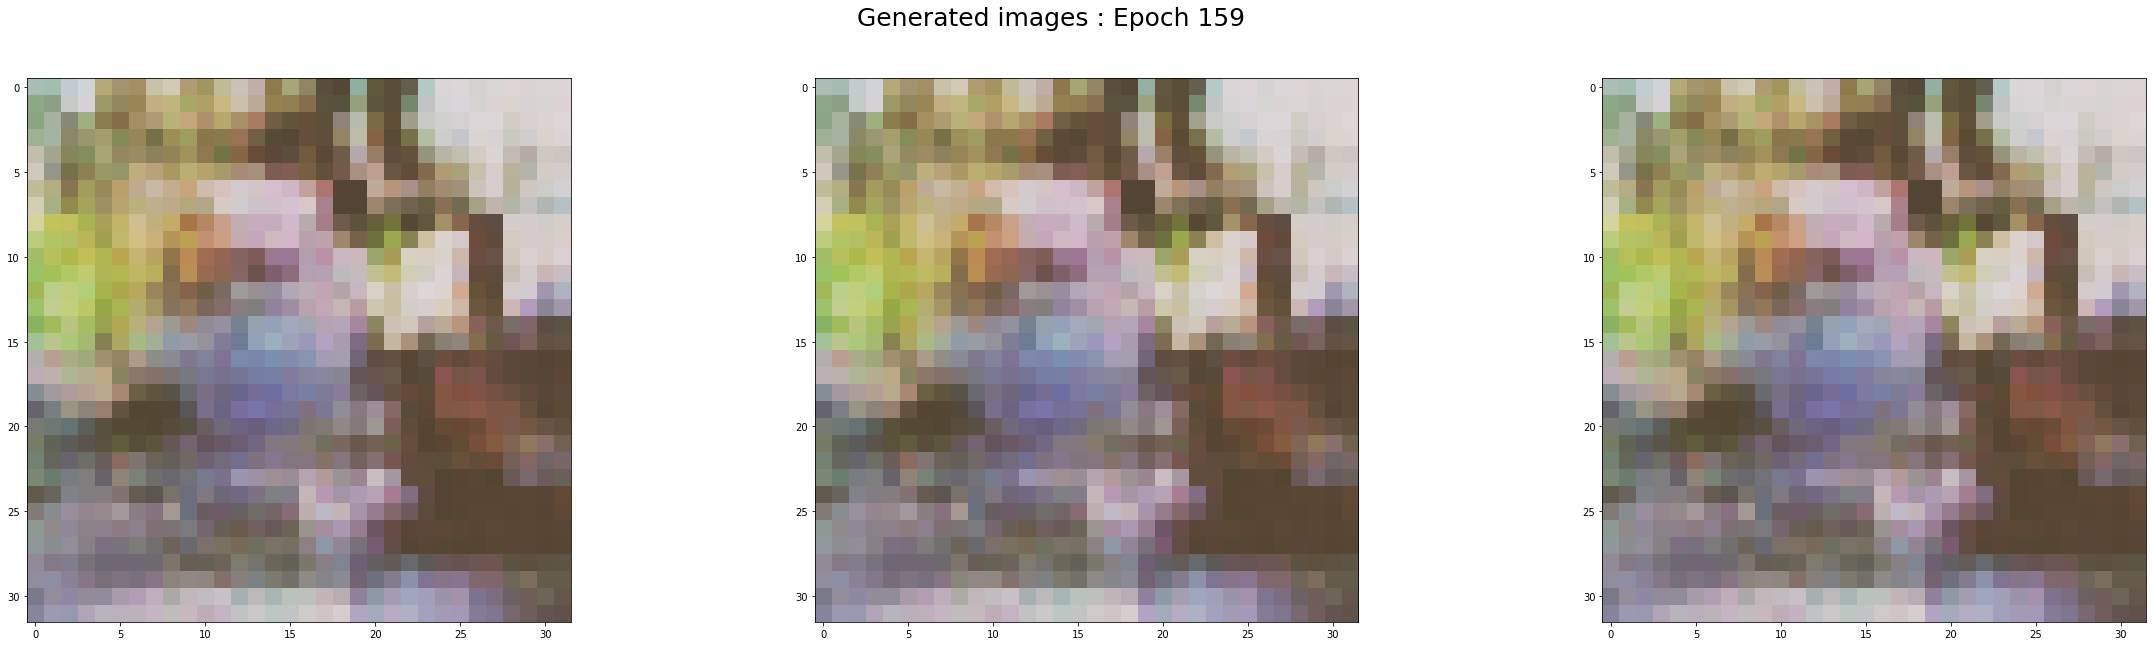

---------------------------------------------------------------
epoch :  160  d_loss_accuracy  =  [0.10268478840589523, 0.9765625]  g_loss =  1.1017088890075684


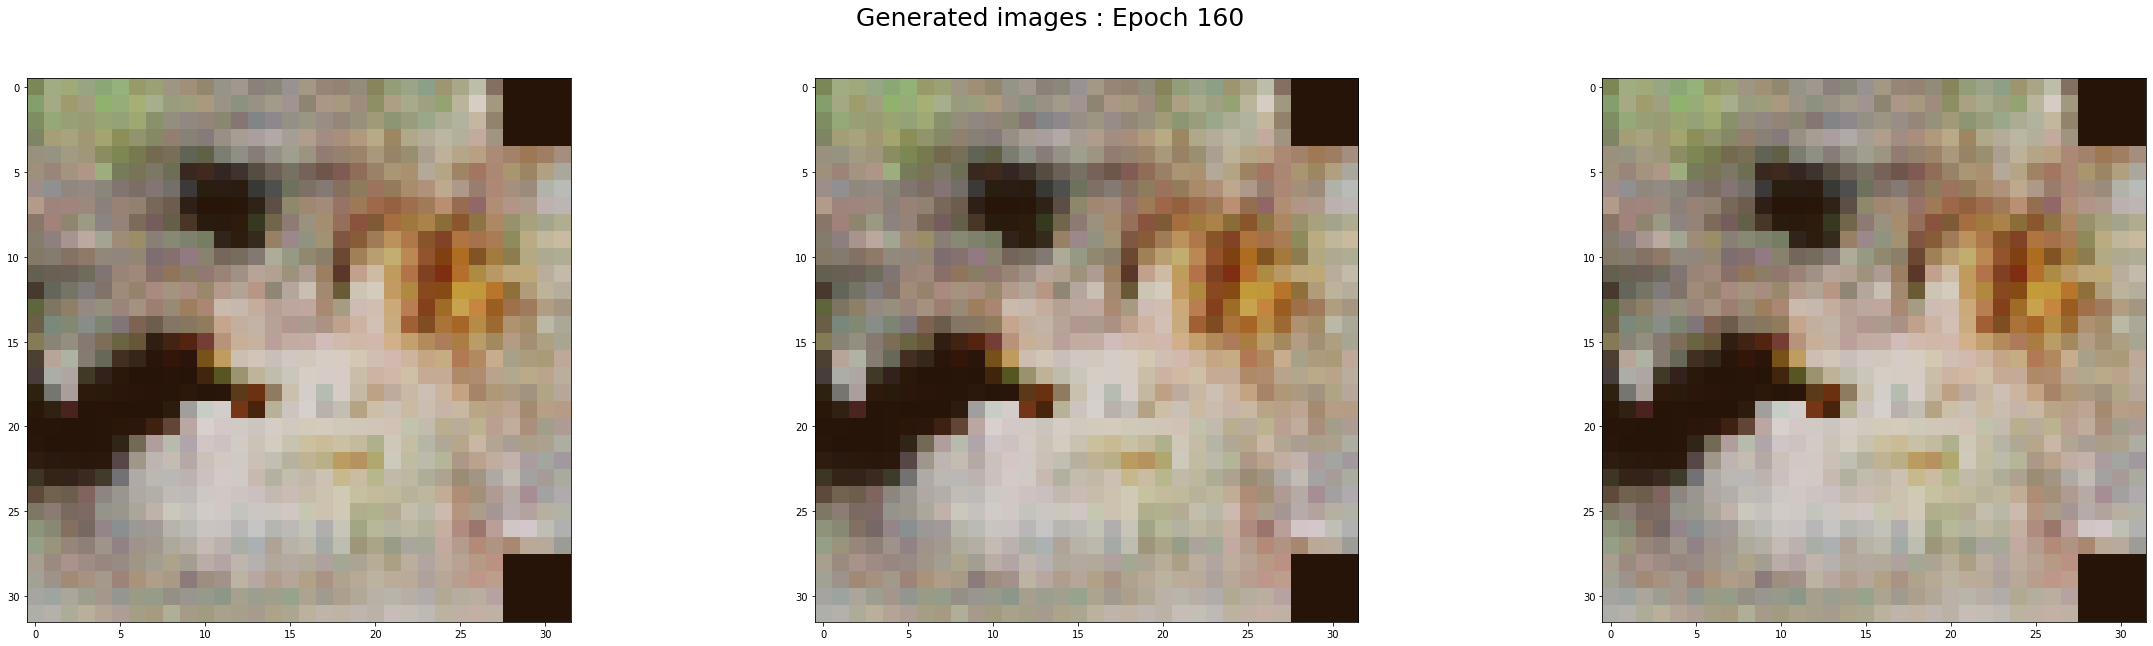

---------------------------------------------------------------
epoch :  161  d_loss_accuracy  =  [0.0009500201558694243, 1.0]  g_loss =  0.09691599756479263


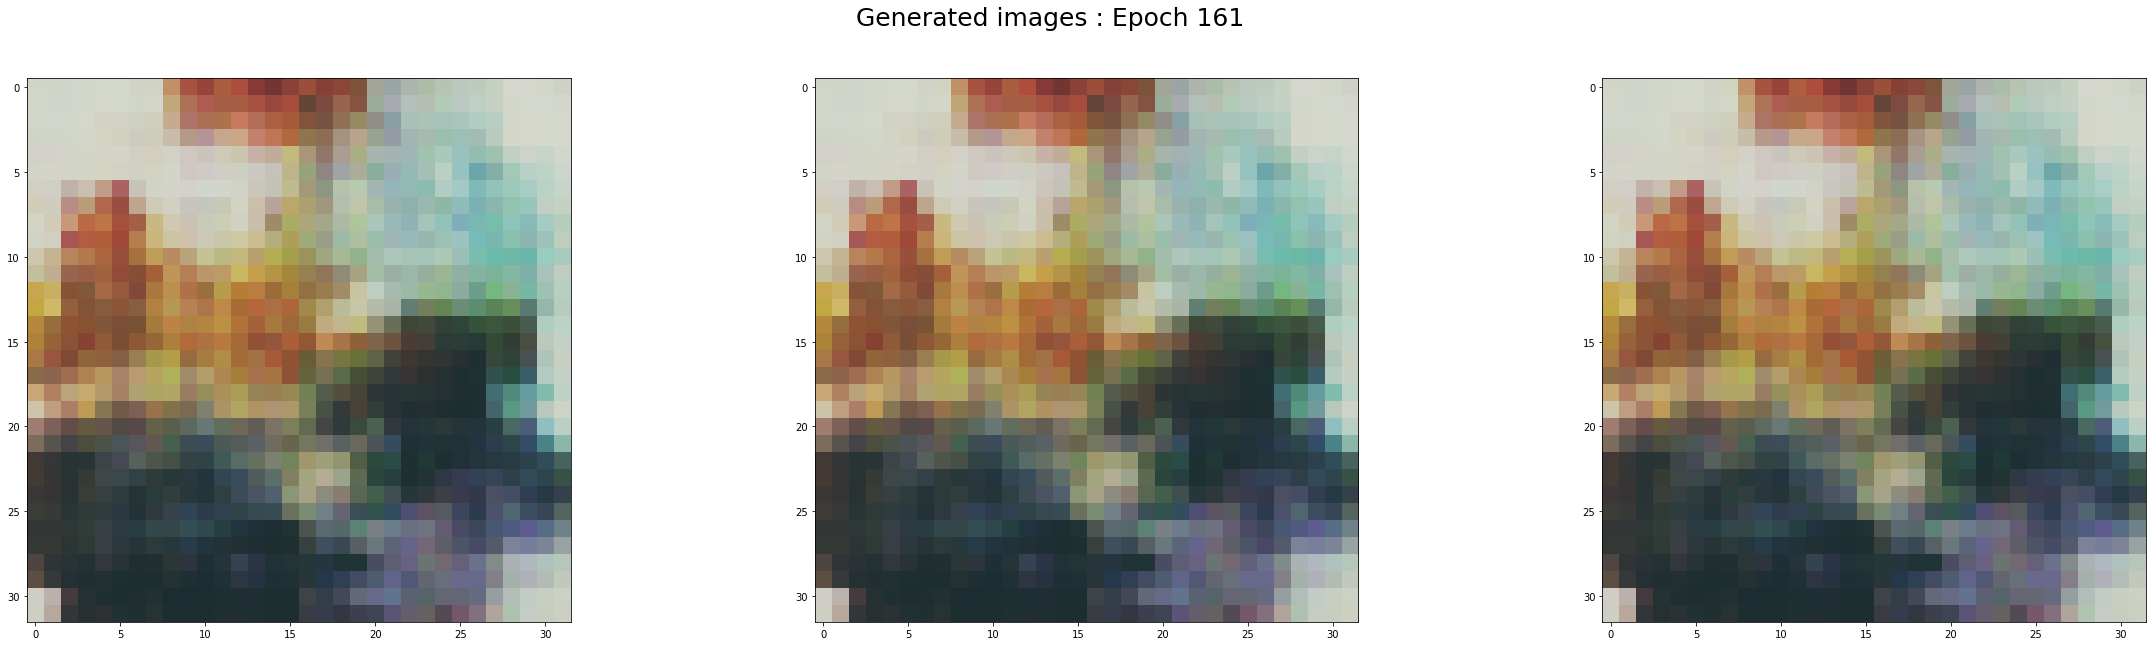

---------------------------------------------------------------
epoch :  162  d_loss_accuracy  =  [0.00035092359757982194, 1.0]  g_loss =  0.010932560078799725


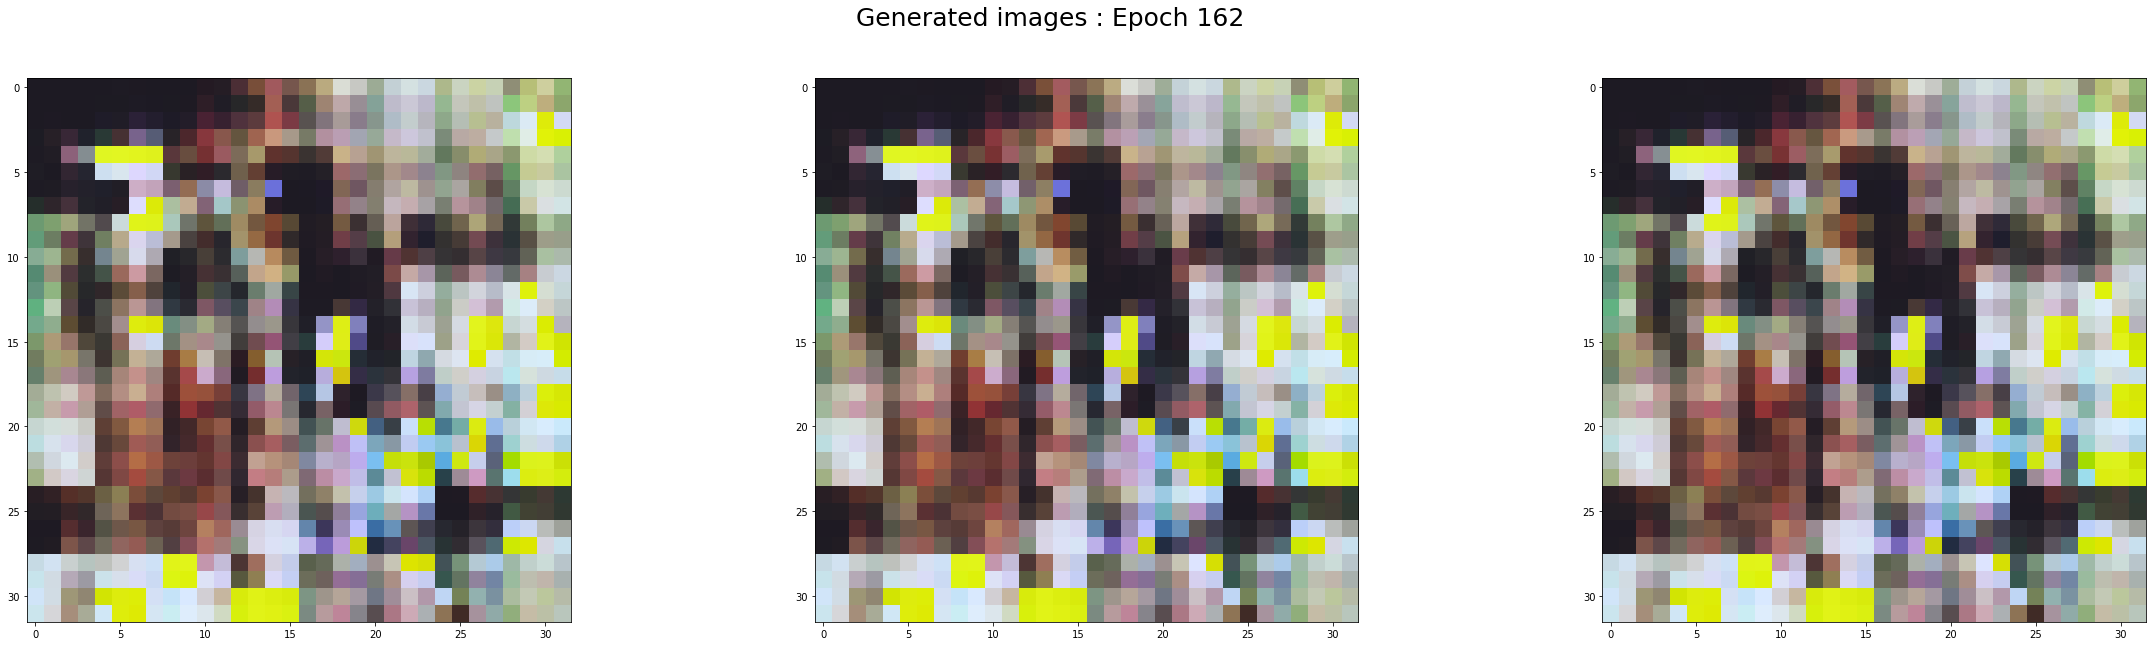

---------------------------------------------------------------
epoch :  163  d_loss_accuracy  =  [0.0058277565985918045, 1.0]  g_loss =  0.11267895996570587


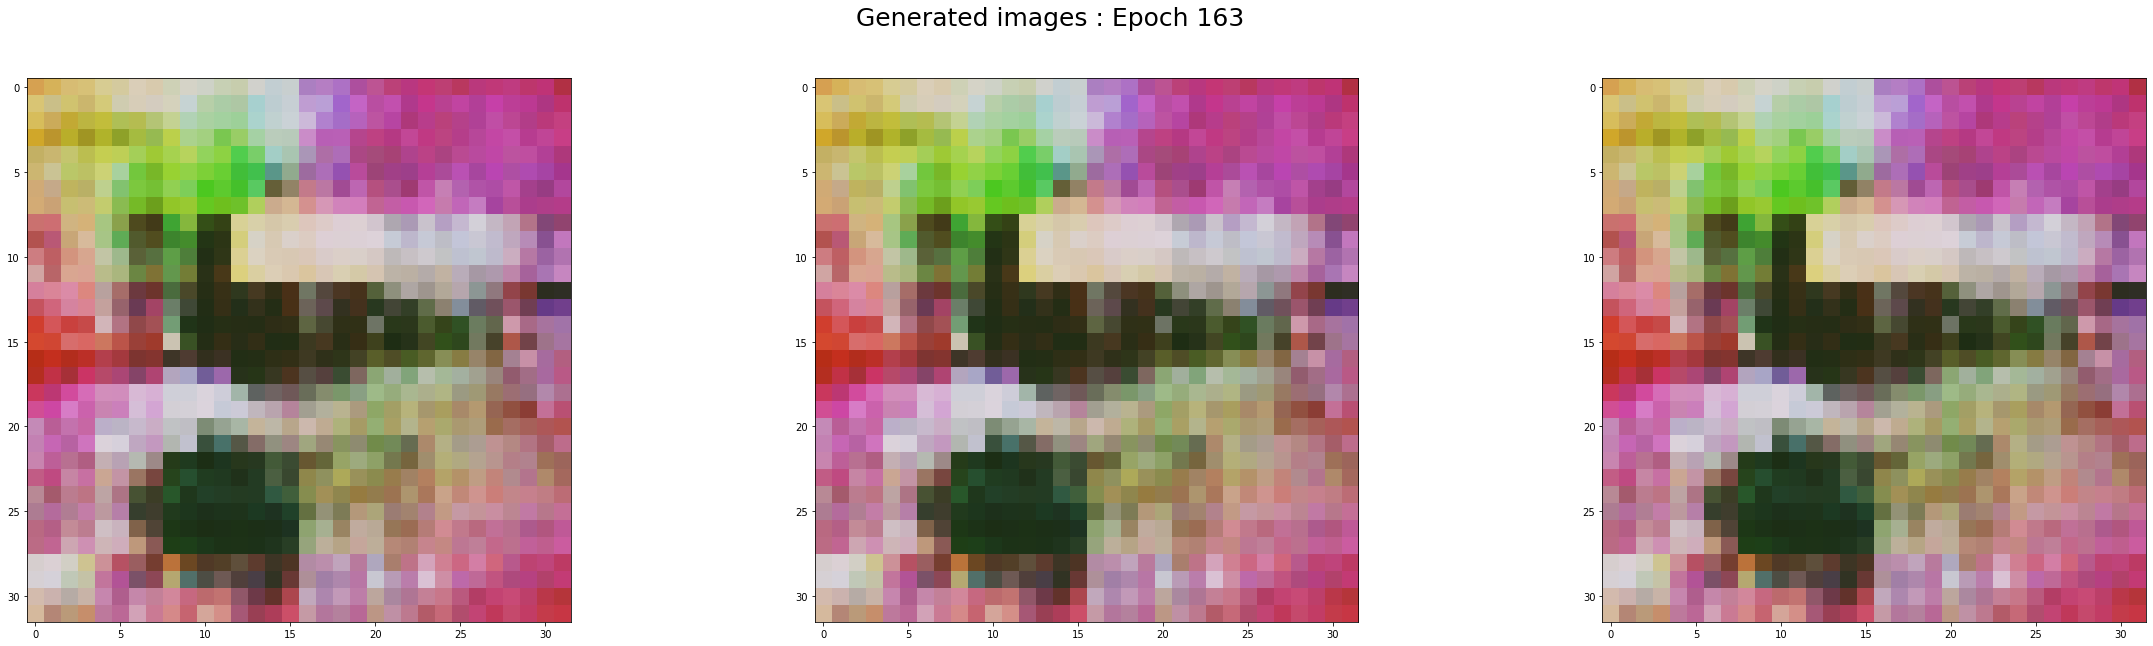

---------------------------------------------------------------
epoch :  164  d_loss_accuracy  =  [0.017801182344555855, 0.9921875]  g_loss =  6.573072460014373e-05


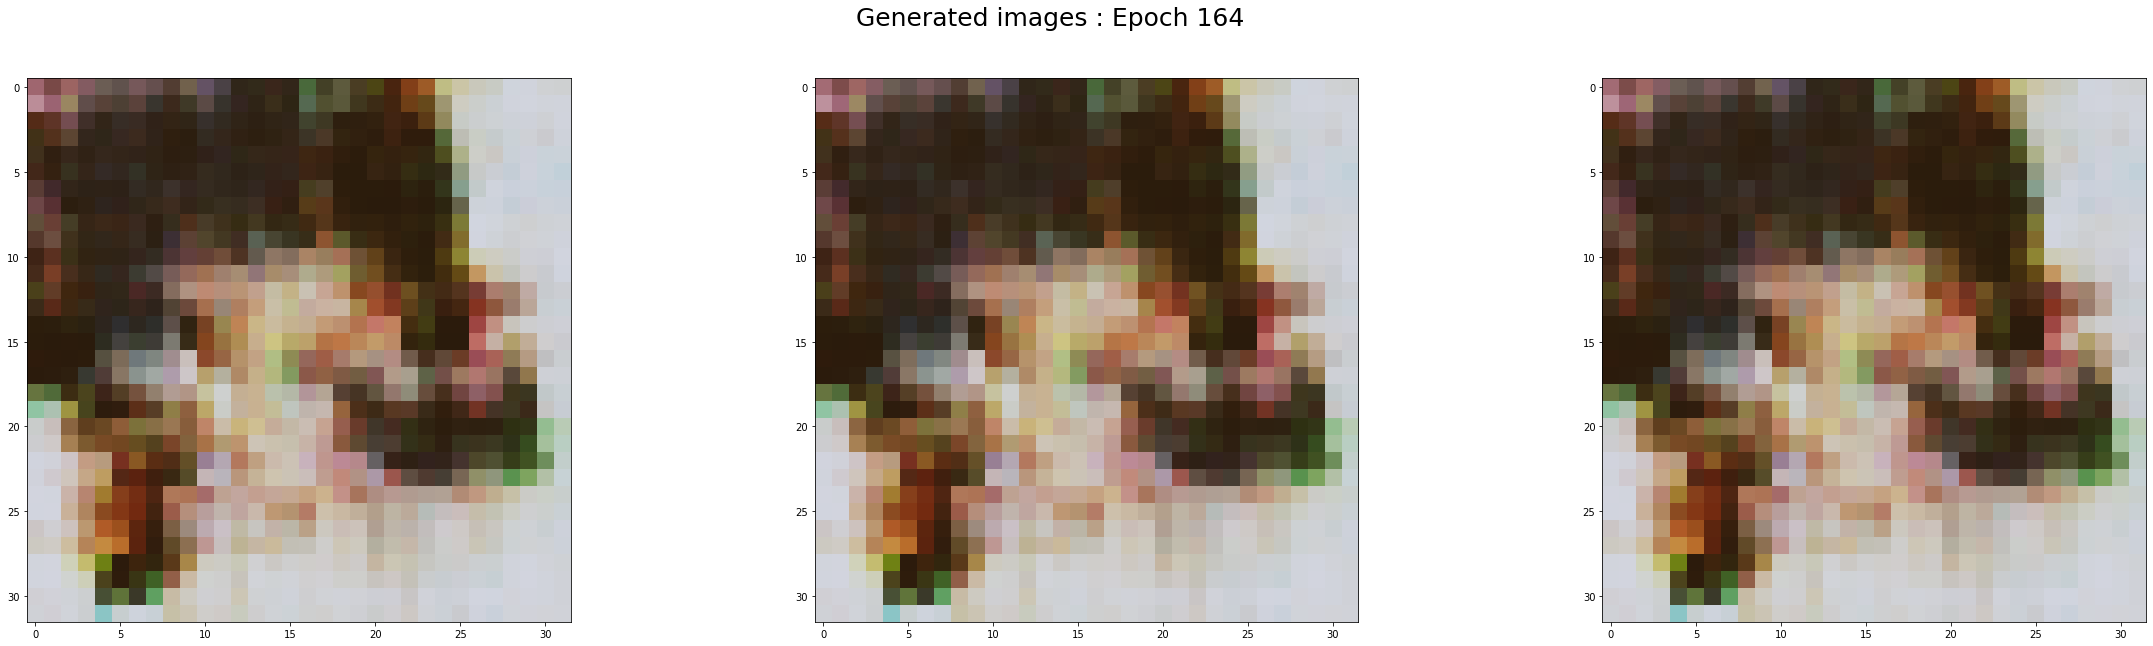

---------------------------------------------------------------
epoch :  165  d_loss_accuracy  =  [0.0011882440885528922, 1.0]  g_loss =  0.025459593161940575


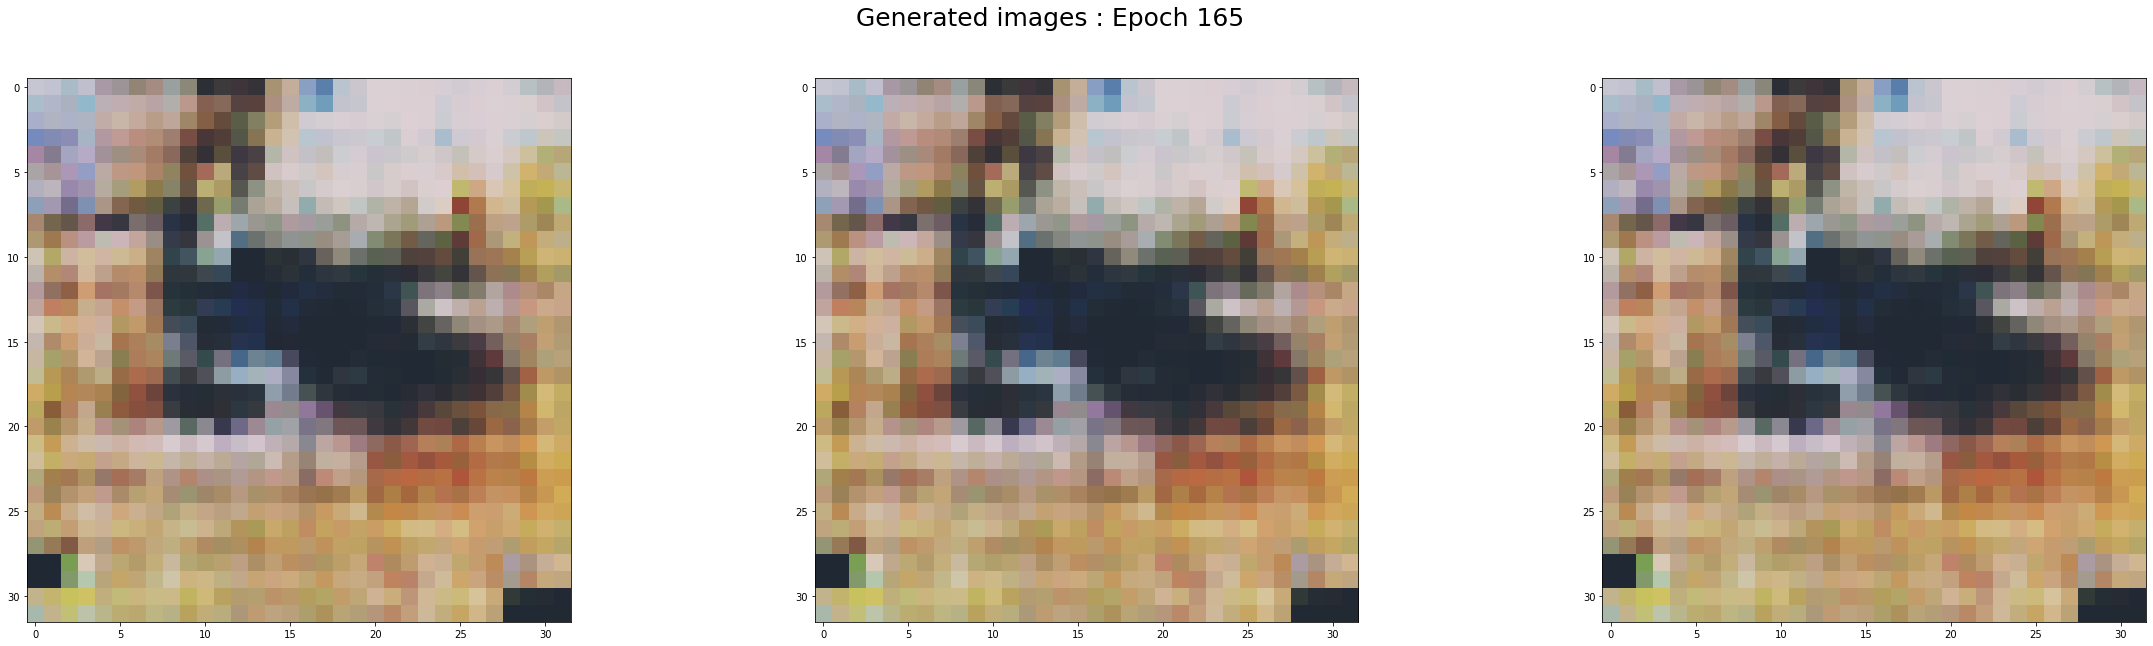

---------------------------------------------------------------
epoch :  166  d_loss_accuracy  =  [0.018601495772600174, 0.99609375]  g_loss =  0.9762365221977234


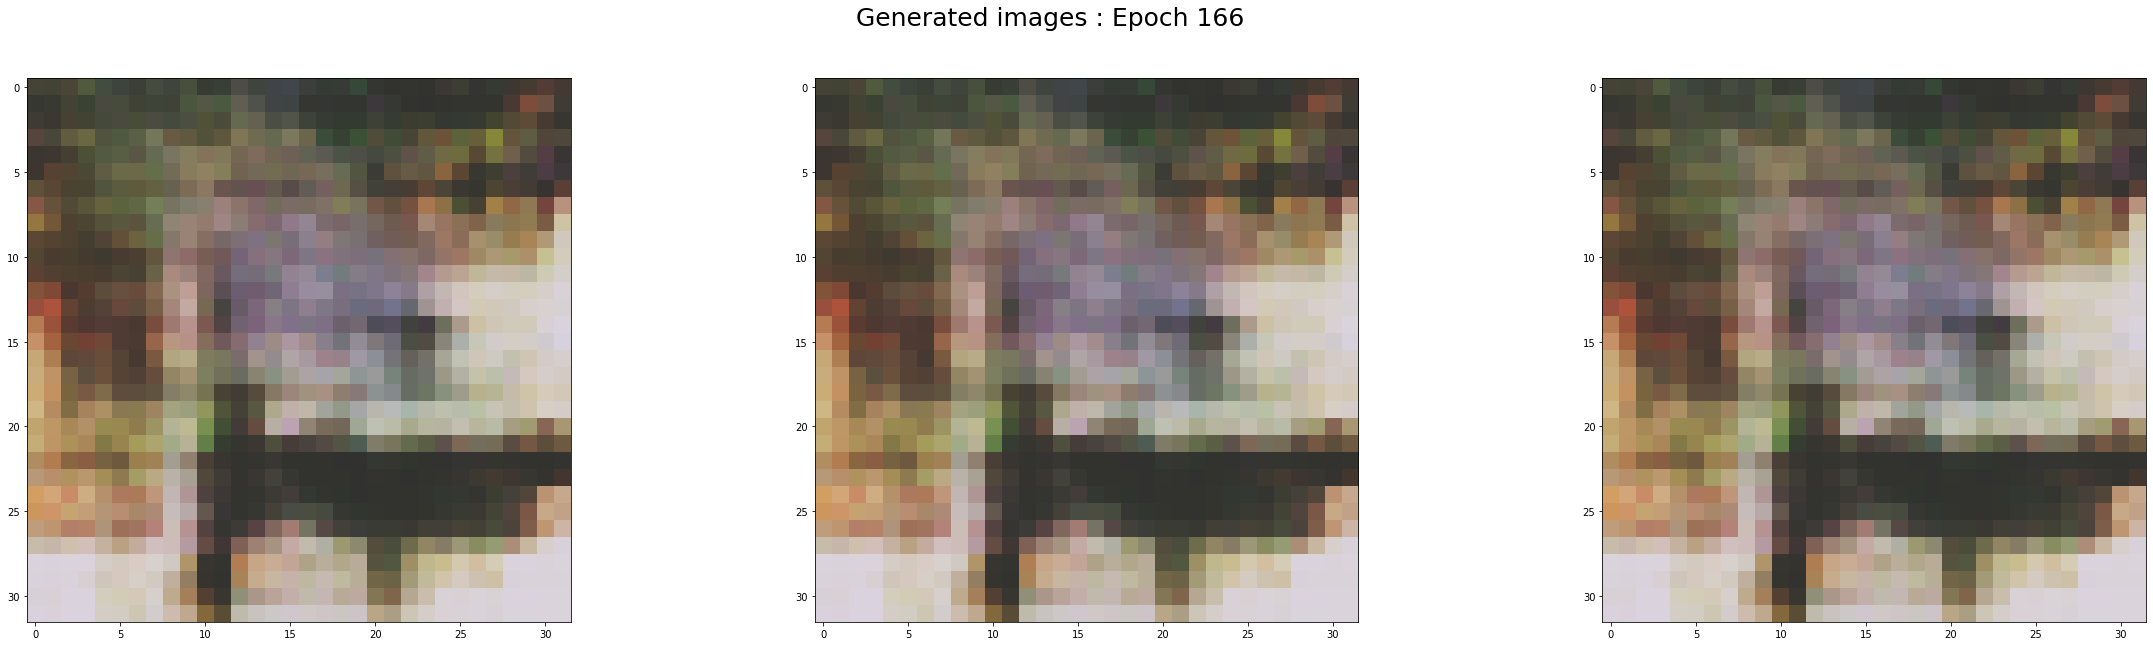

---------------------------------------------------------------
epoch :  167  d_loss_accuracy  =  [0.006641800981014967, 1.0]  g_loss =  0.2627246081829071


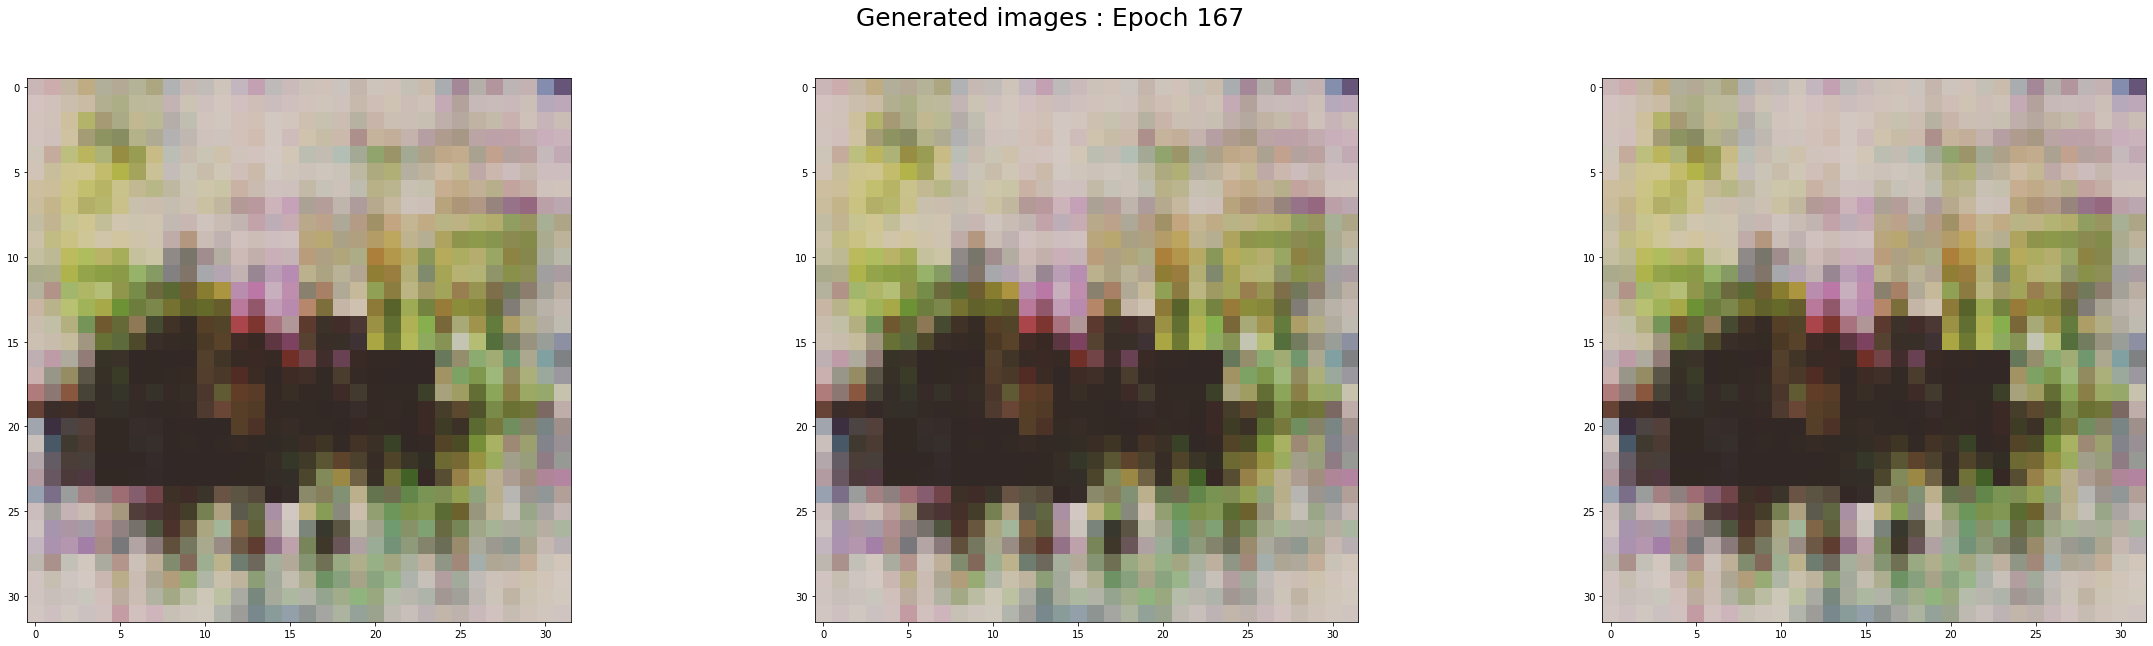

---------------------------------------------------------------
epoch :  168  d_loss_accuracy  =  [0.0010797048453241587, 1.0]  g_loss =  0.07839000970125198


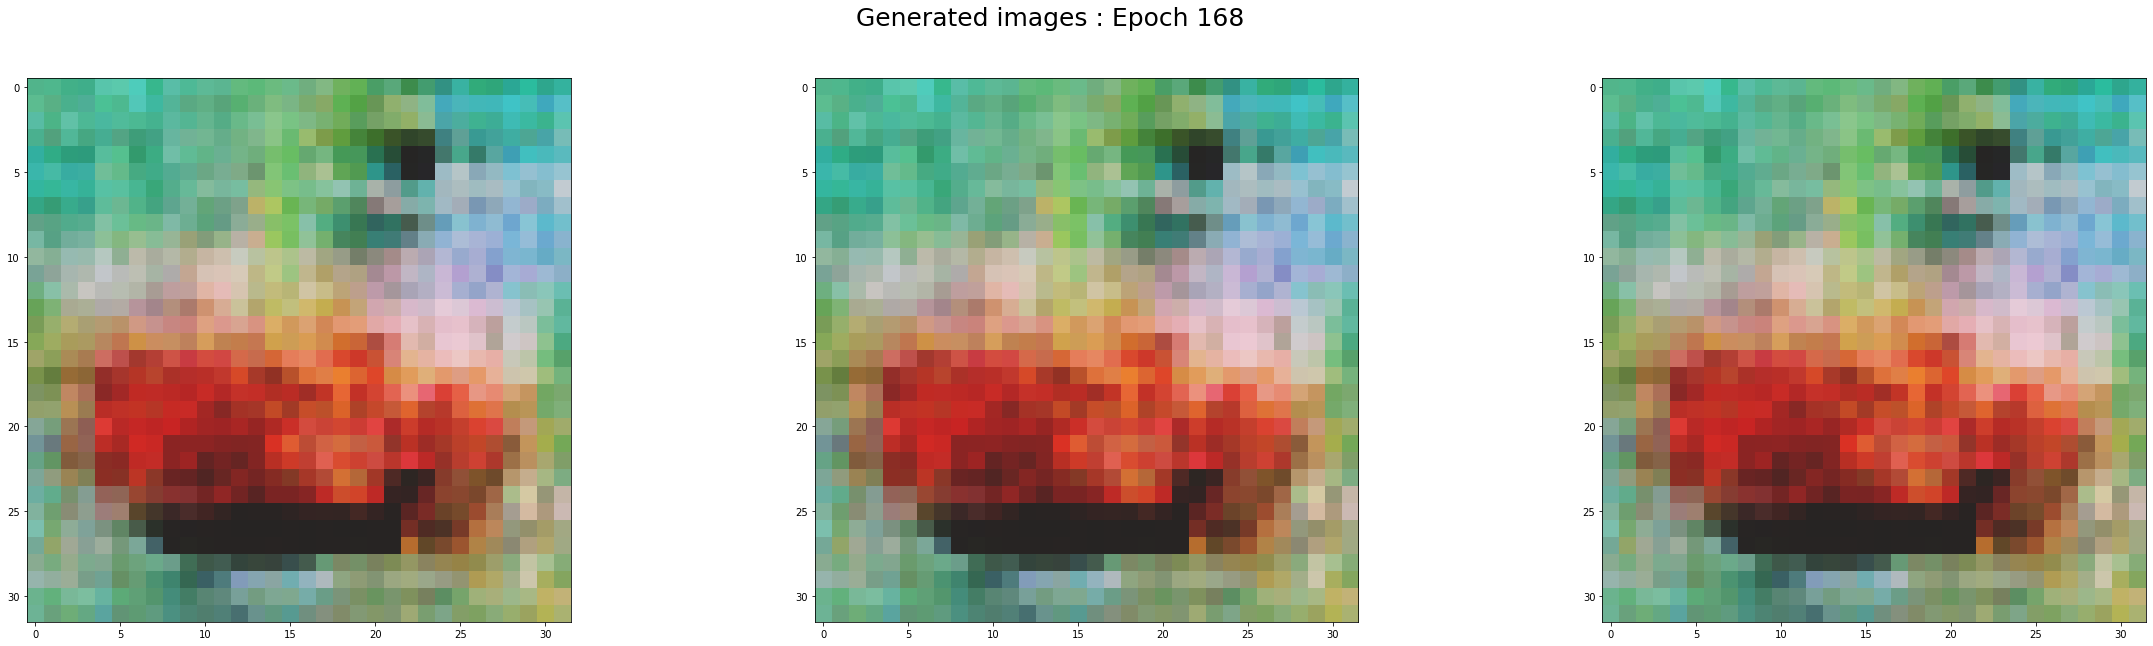

---------------------------------------------------------------
epoch :  169  d_loss_accuracy  =  [0.000897001416888088, 1.0]  g_loss =  0.10572633147239685


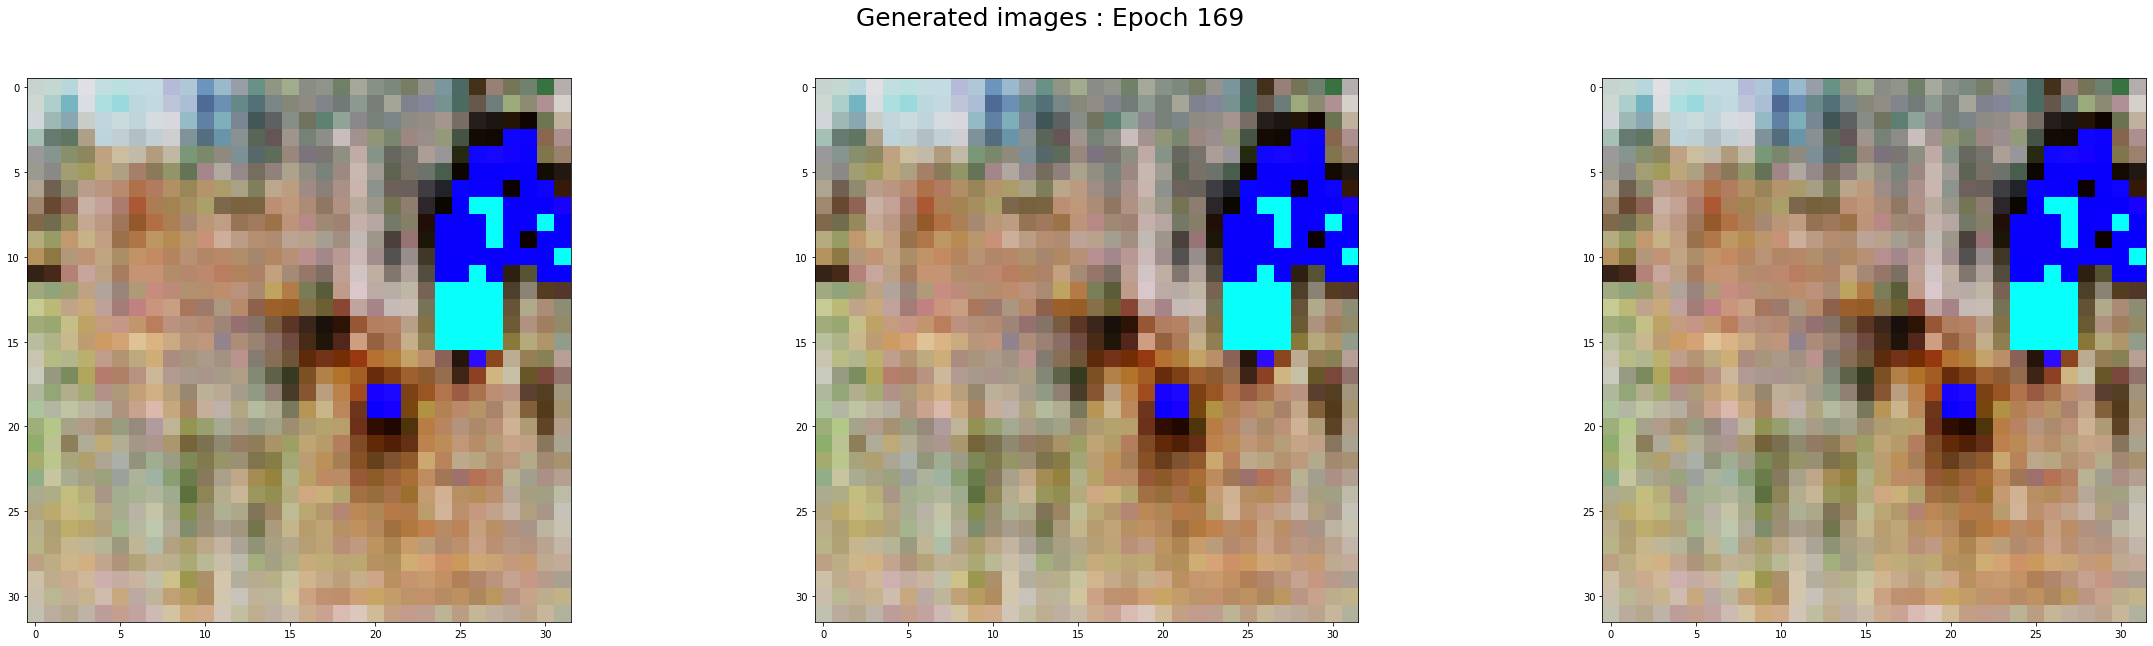

---------------------------------------------------------------
epoch :  170  d_loss_accuracy  =  [0.03825940191745758, 0.9921875]  g_loss =  0.0009936998831108212


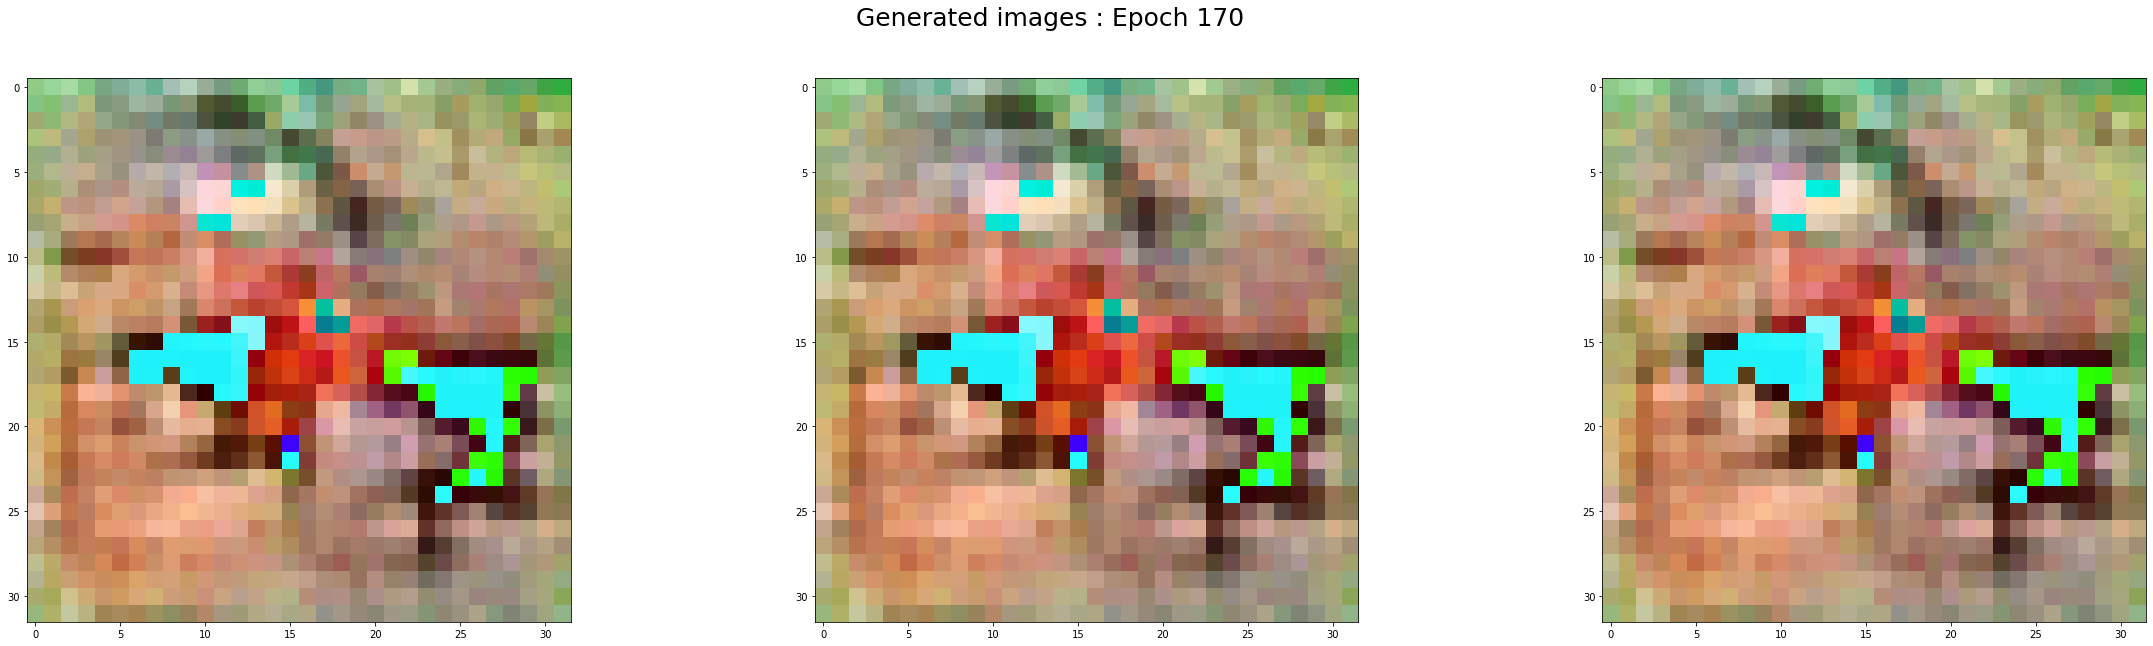

---------------------------------------------------------------
epoch :  171  d_loss_accuracy  =  [0.0006449731299653649, 1.0]  g_loss =  0.0149128008633852


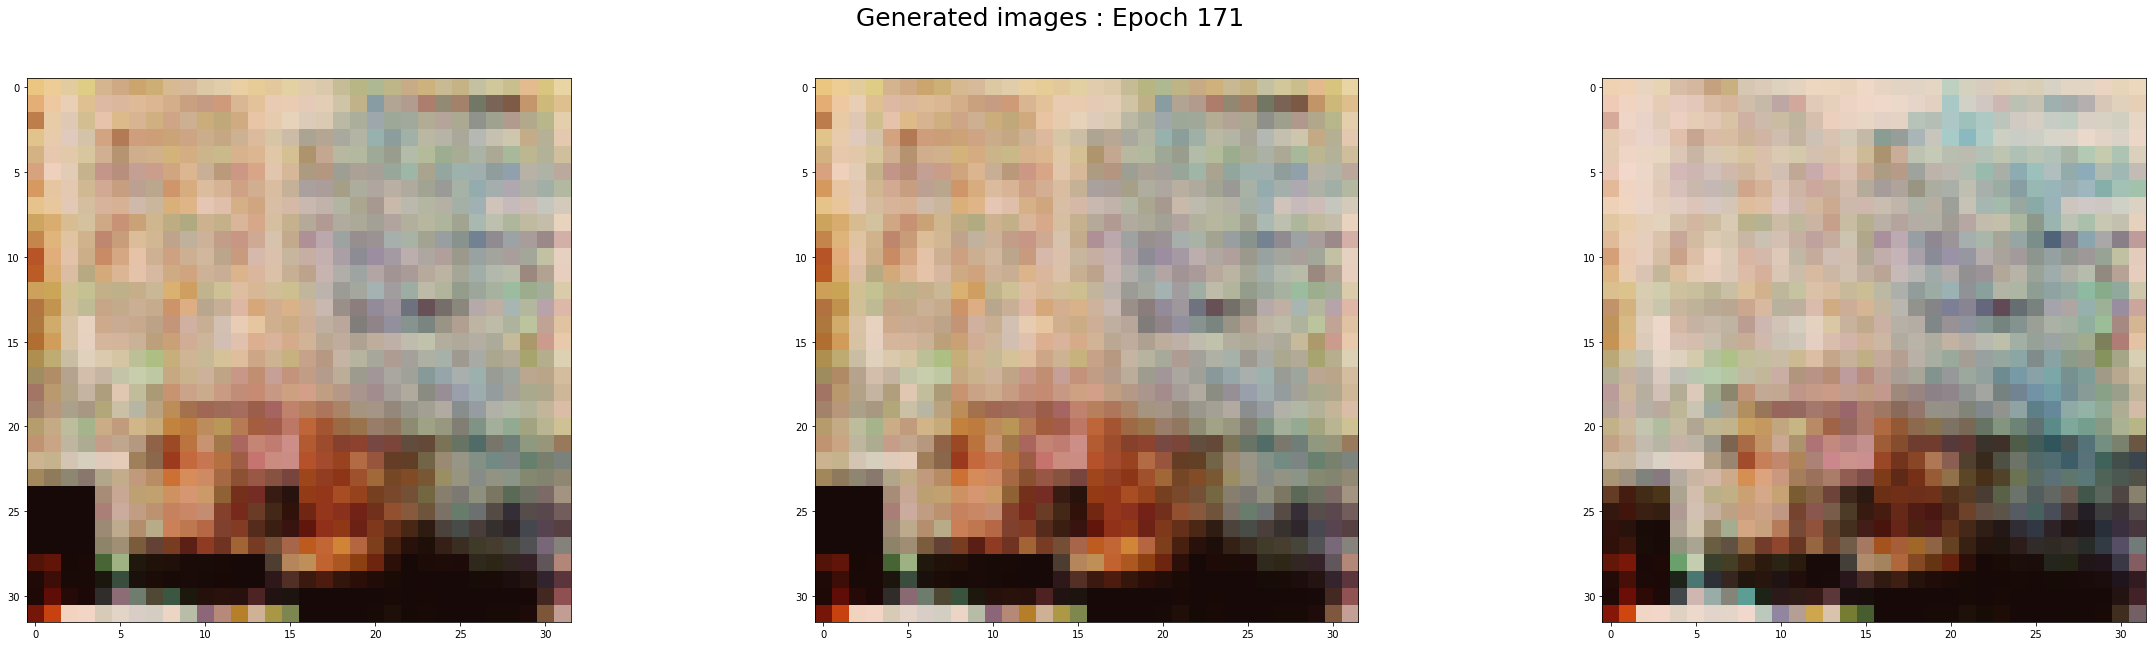

---------------------------------------------------------------
epoch :  172  d_loss_accuracy  =  [0.0018482860177755356, 1.0]  g_loss =  0.5475457310676575


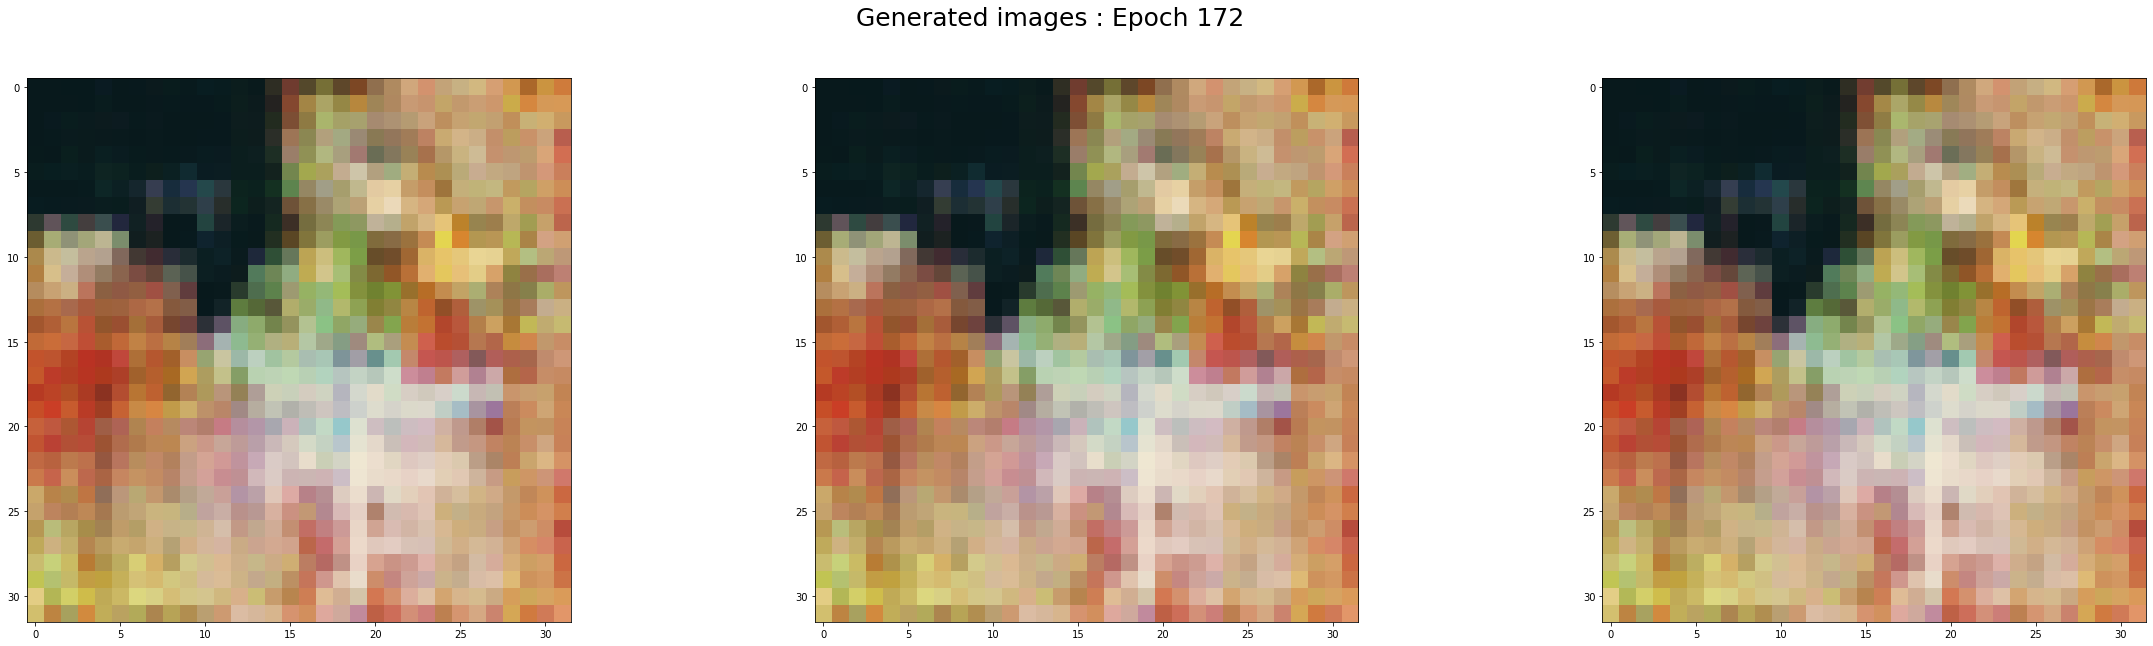

---------------------------------------------------------------
epoch :  173  d_loss_accuracy  =  [0.002043433953076601, 1.0]  g_loss =  0.055097322911024094


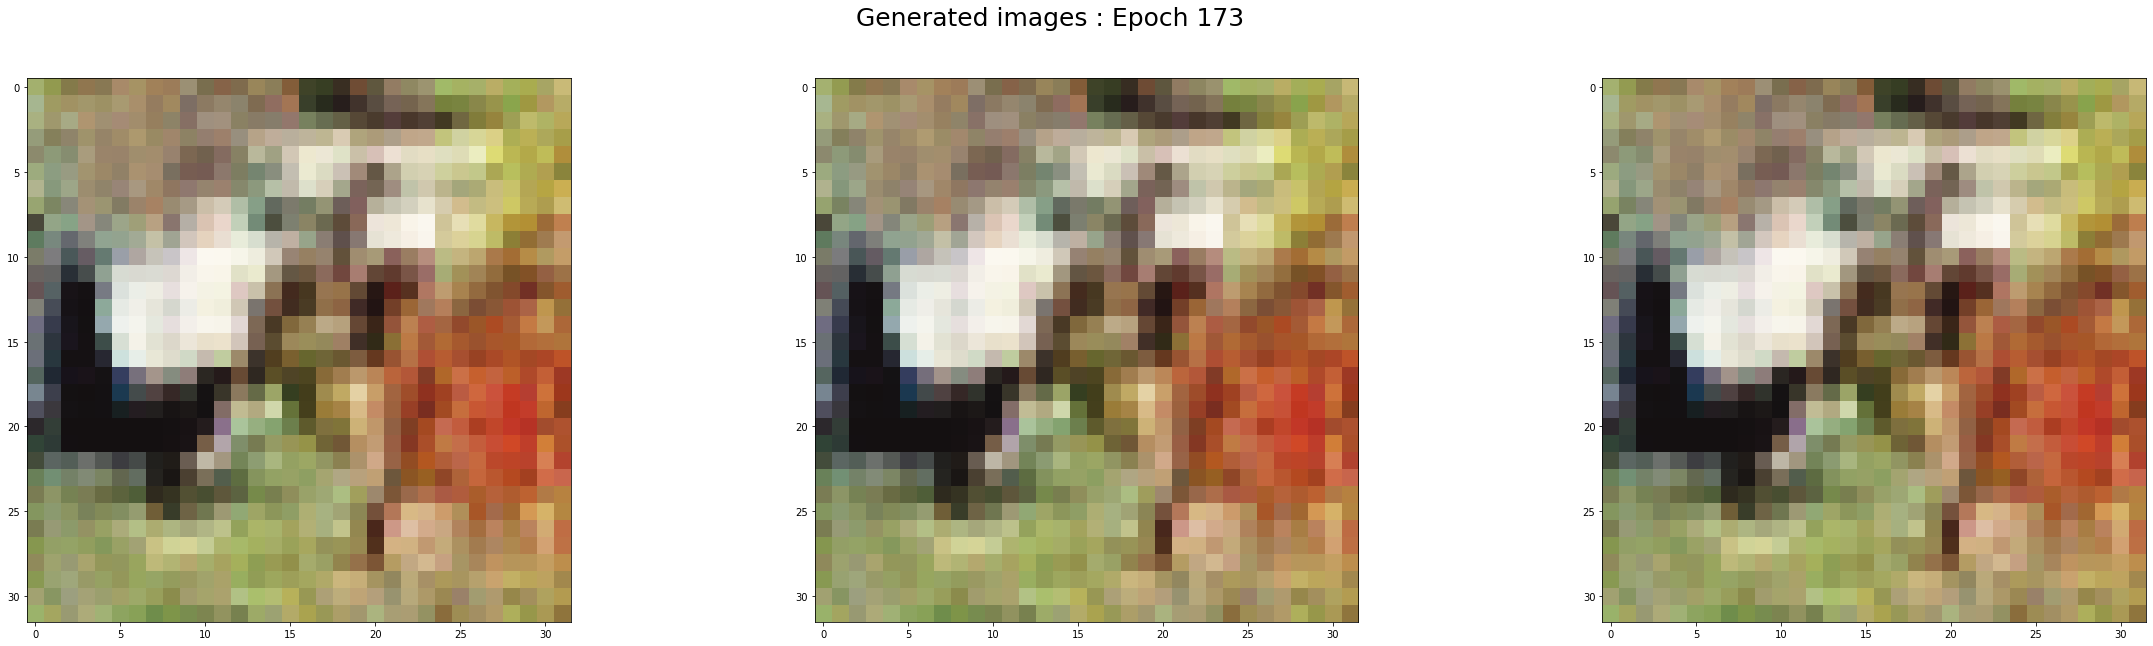

---------------------------------------------------------------
epoch :  174  d_loss_accuracy  =  [0.012611710466444492, 1.0]  g_loss =  4.1755475997924805


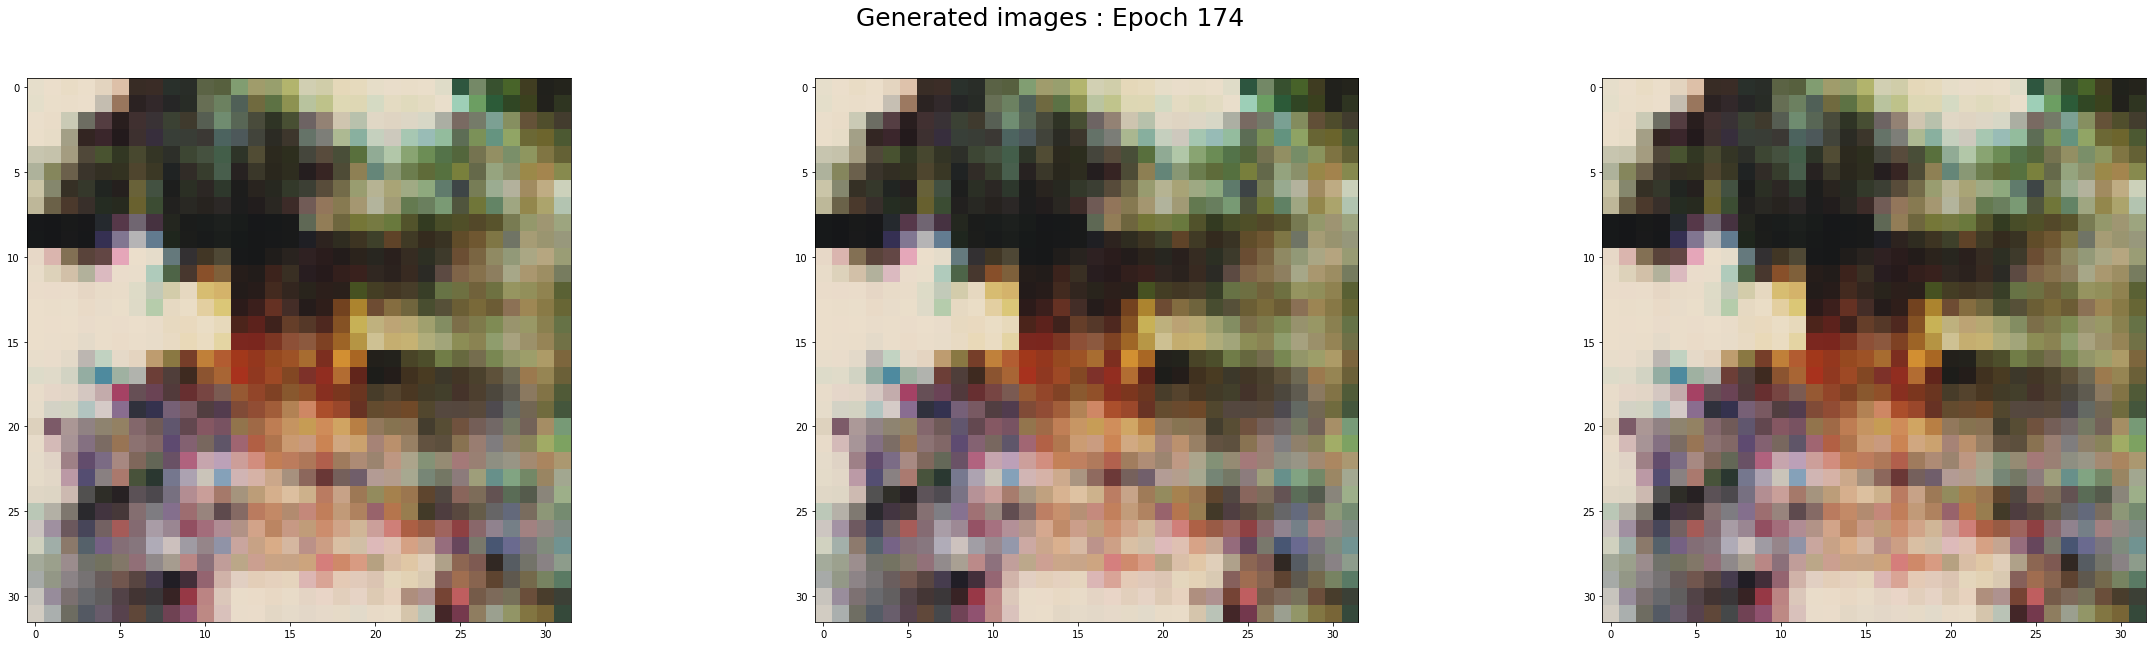

---------------------------------------------------------------
epoch :  175  d_loss_accuracy  =  [0.0028959959745407104, 1.0]  g_loss =  0.18810611963272095


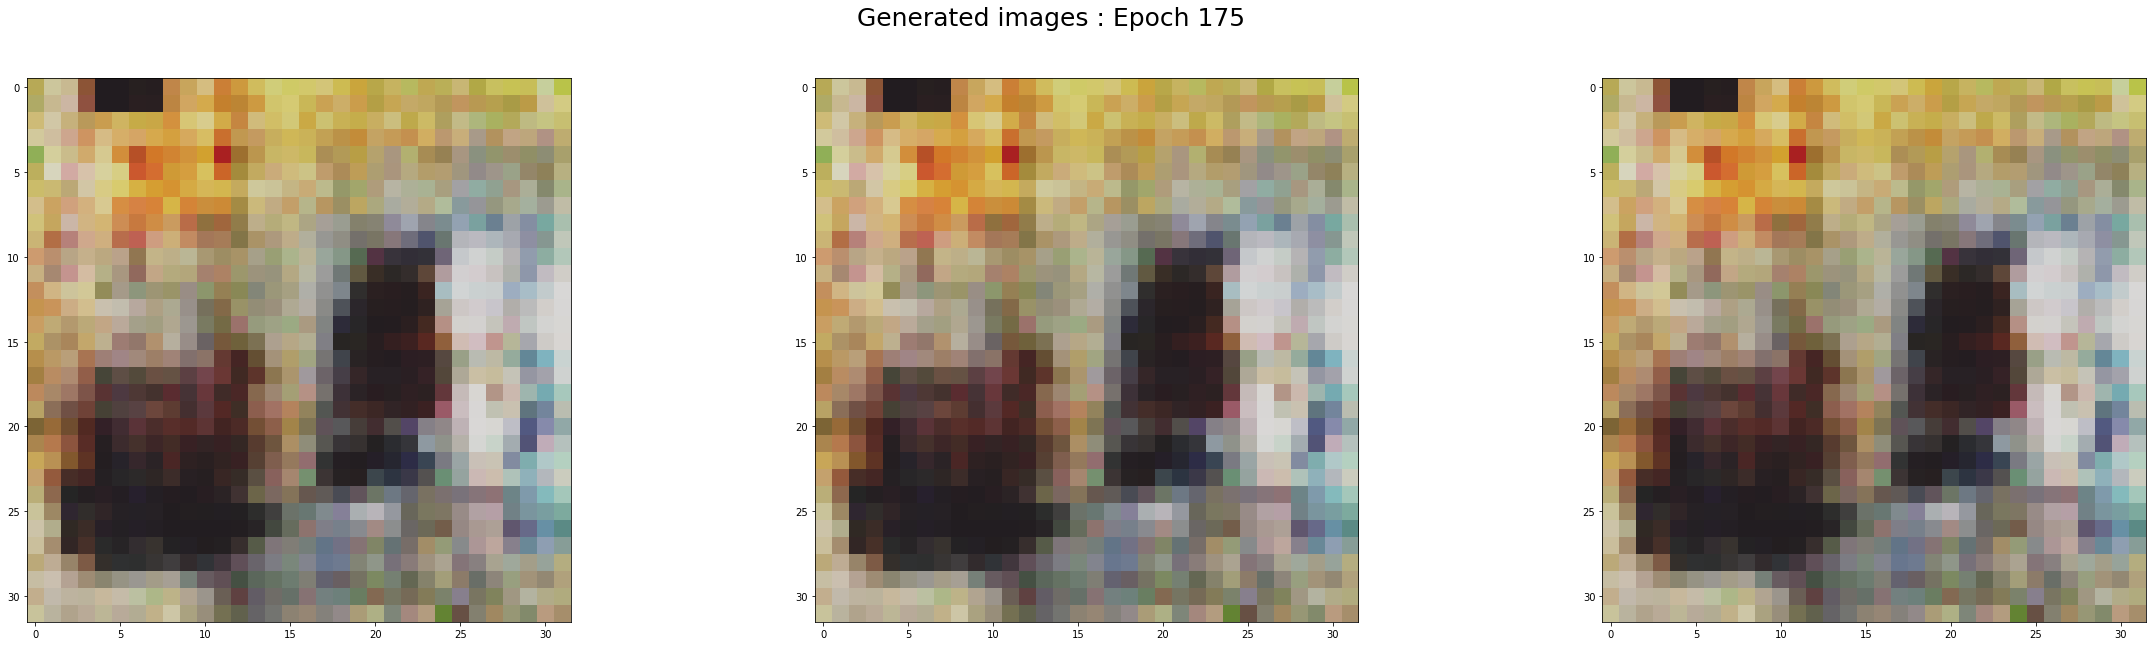

---------------------------------------------------------------
epoch :  176  d_loss_accuracy  =  [0.03570965304970741, 0.99609375]  g_loss =  0.5307109355926514


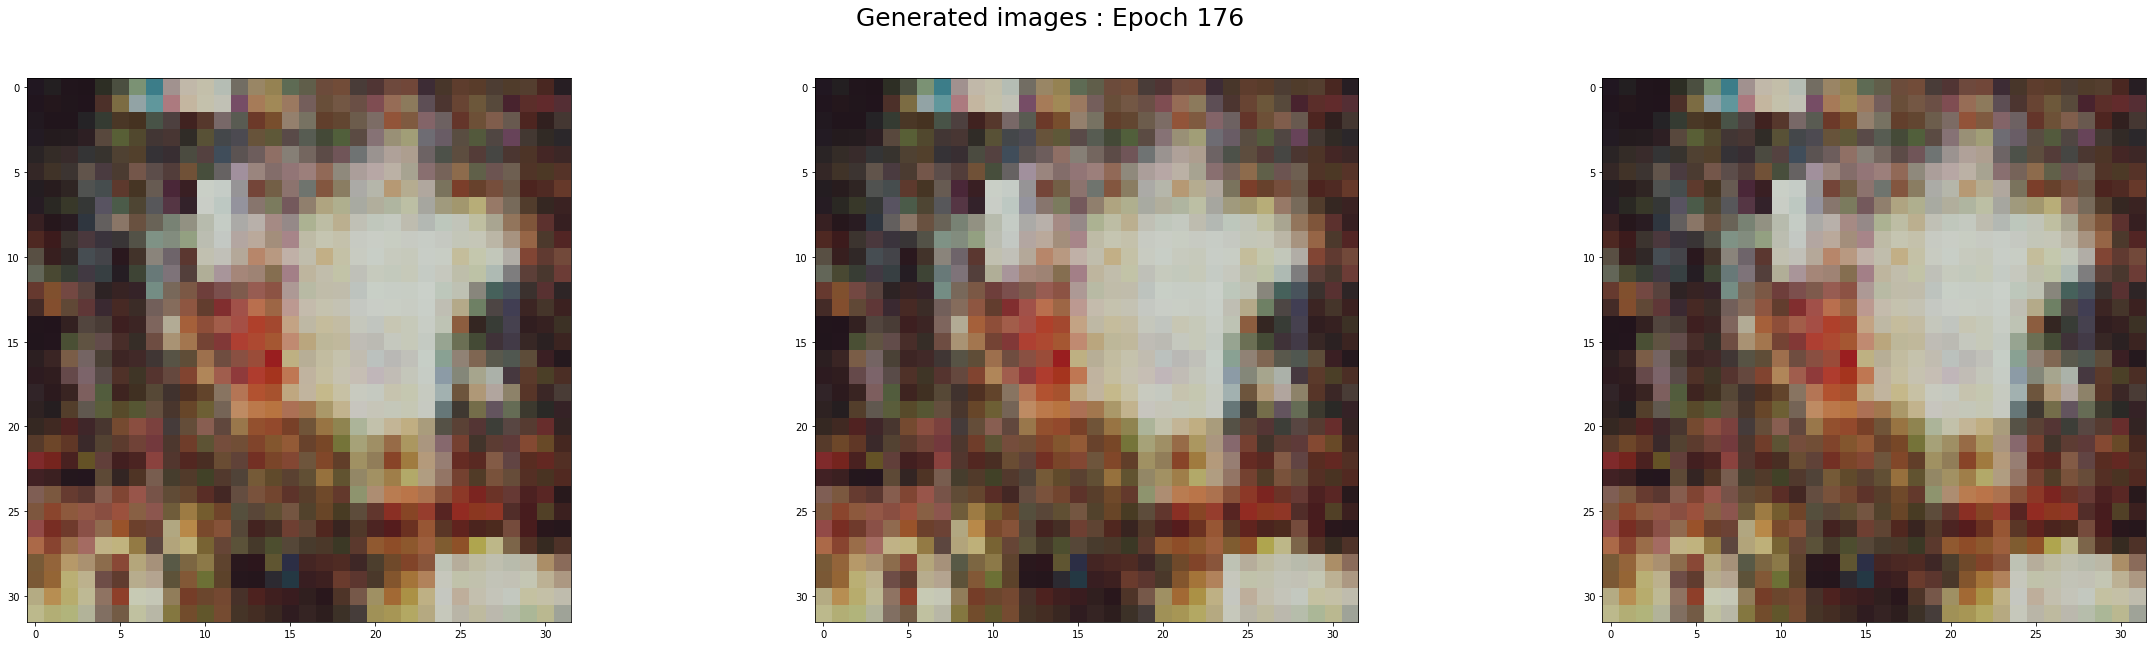

---------------------------------------------------------------
epoch :  177  d_loss_accuracy  =  [8.084681758191437e-05, 1.0]  g_loss =  0.020137248560786247


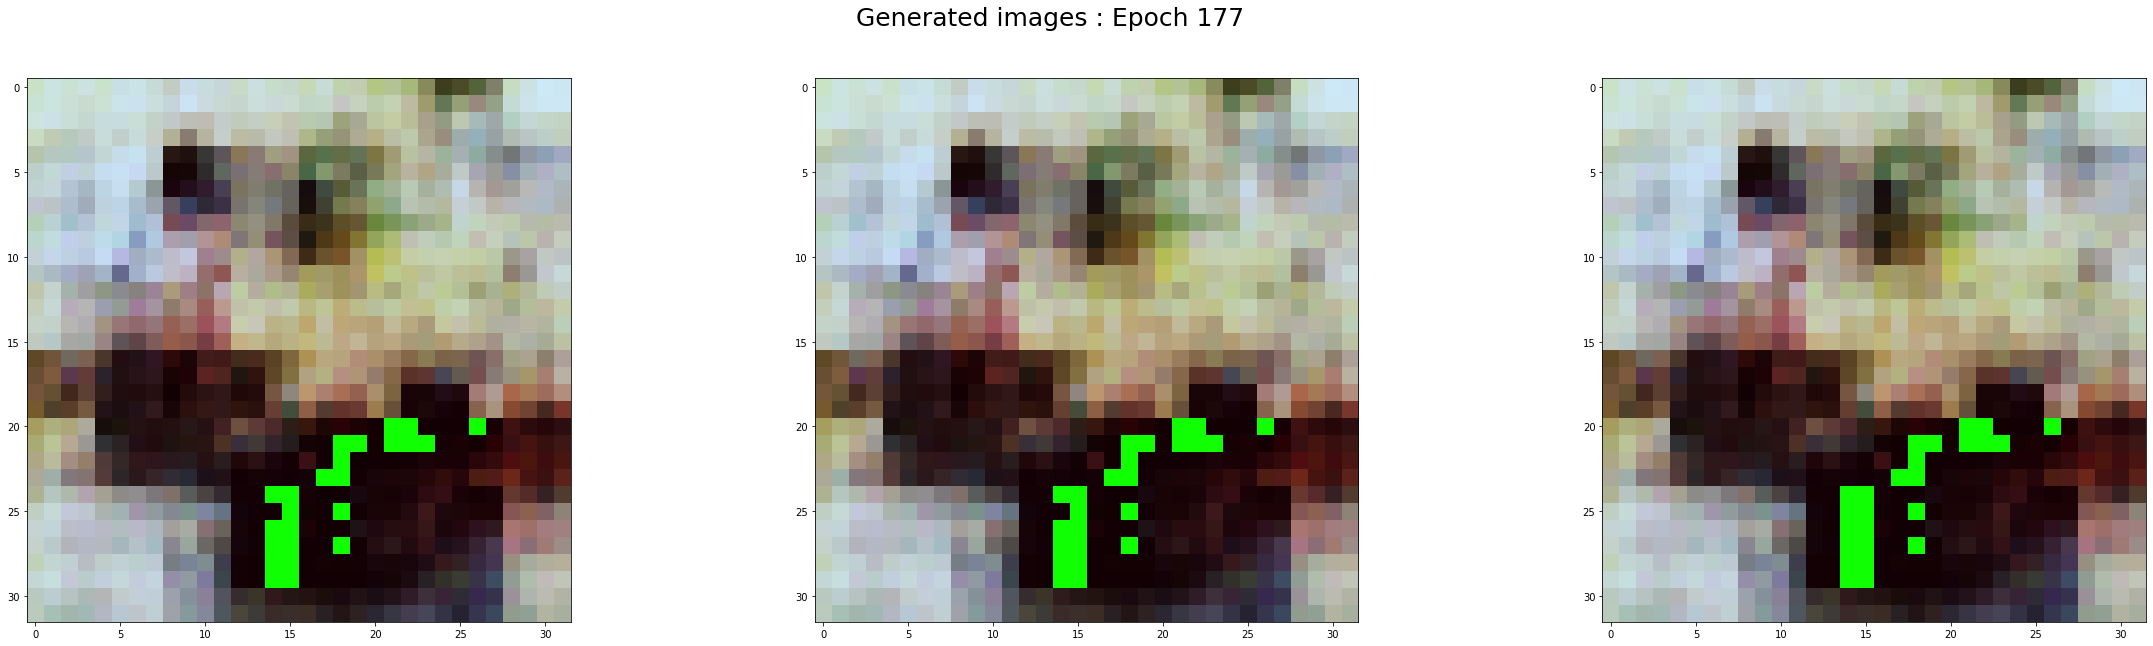

---------------------------------------------------------------
epoch :  178  d_loss_accuracy  =  [0.0003028659848496318, 1.0]  g_loss =  0.025629958137869835


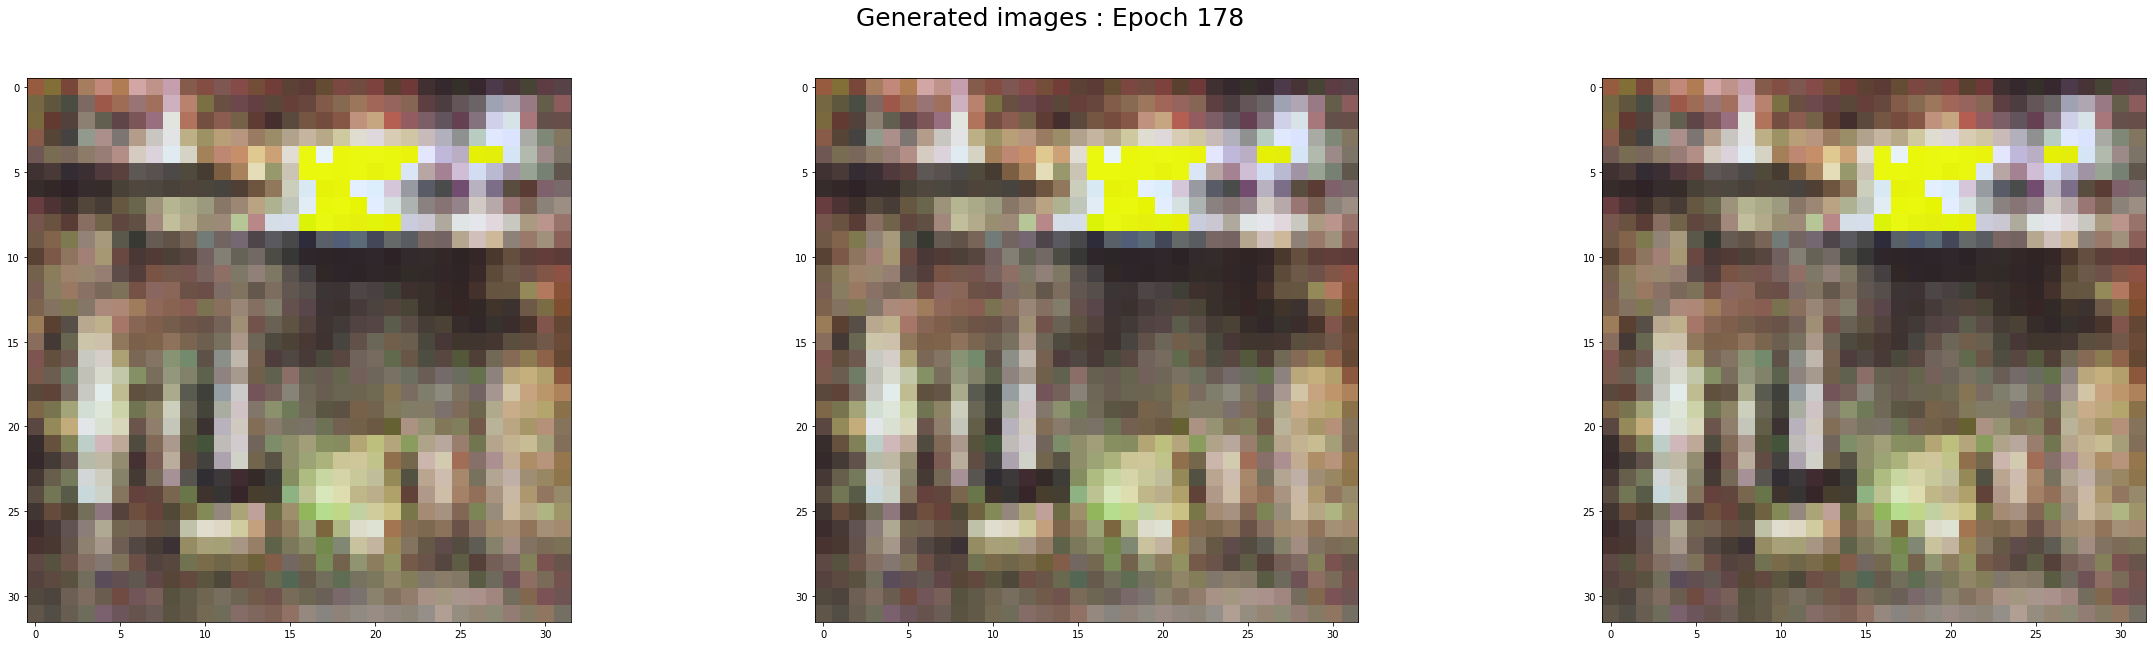

---------------------------------------------------------------
epoch :  179  d_loss_accuracy  =  [0.002661713631823659, 1.0]  g_loss =  0.13933219015598297


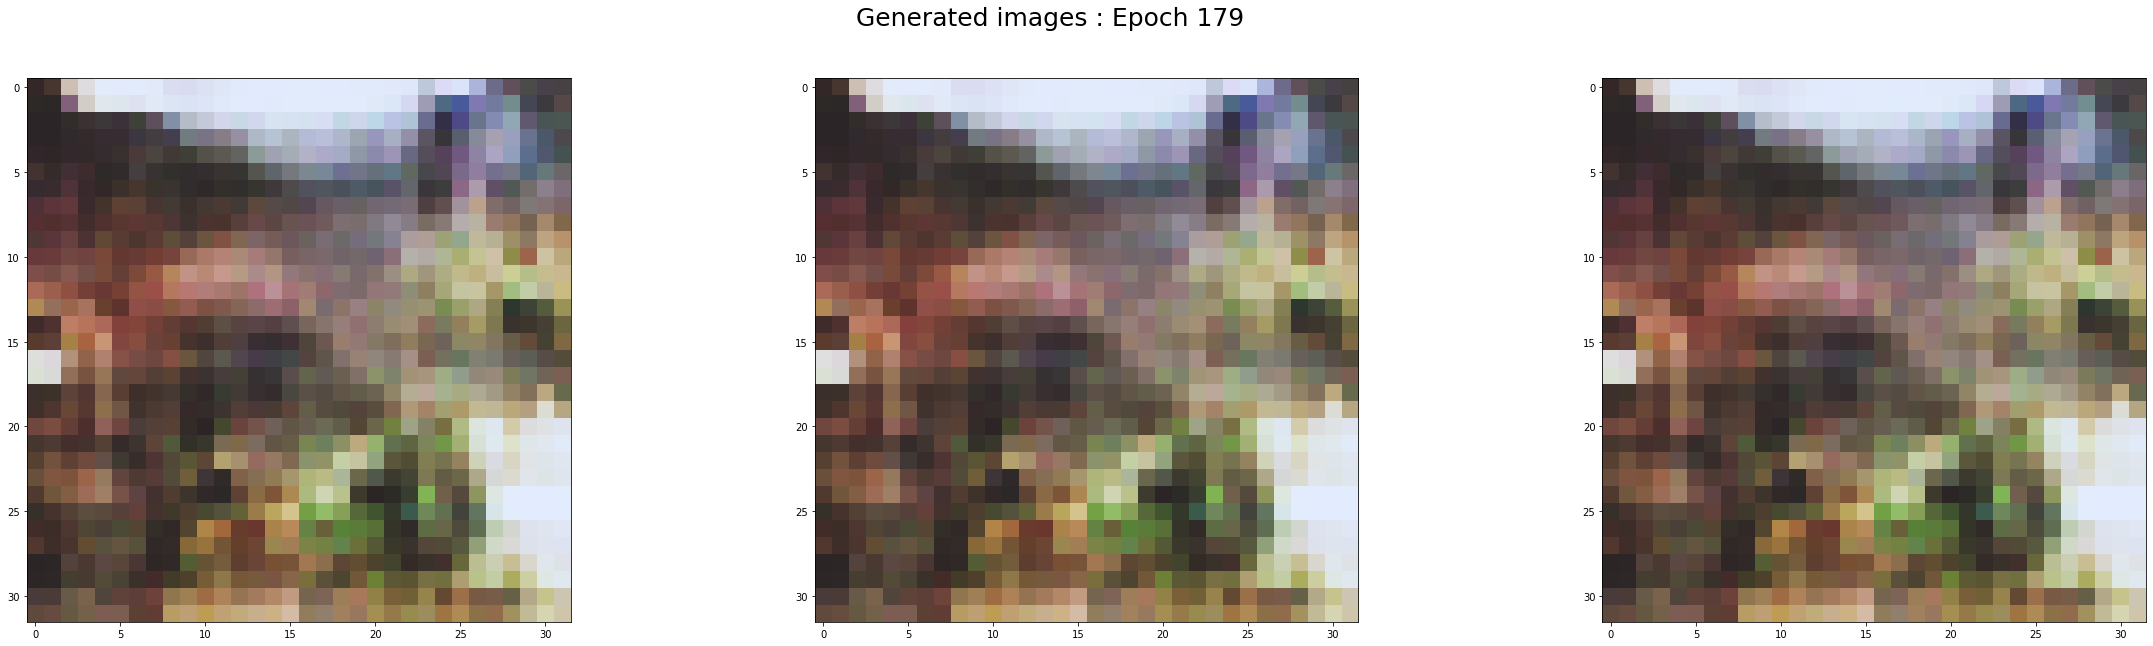

---------------------------------------------------------------
epoch :  180  d_loss_accuracy  =  [0.032186198979616165, 0.98828125]  g_loss =  0.0193510502576828


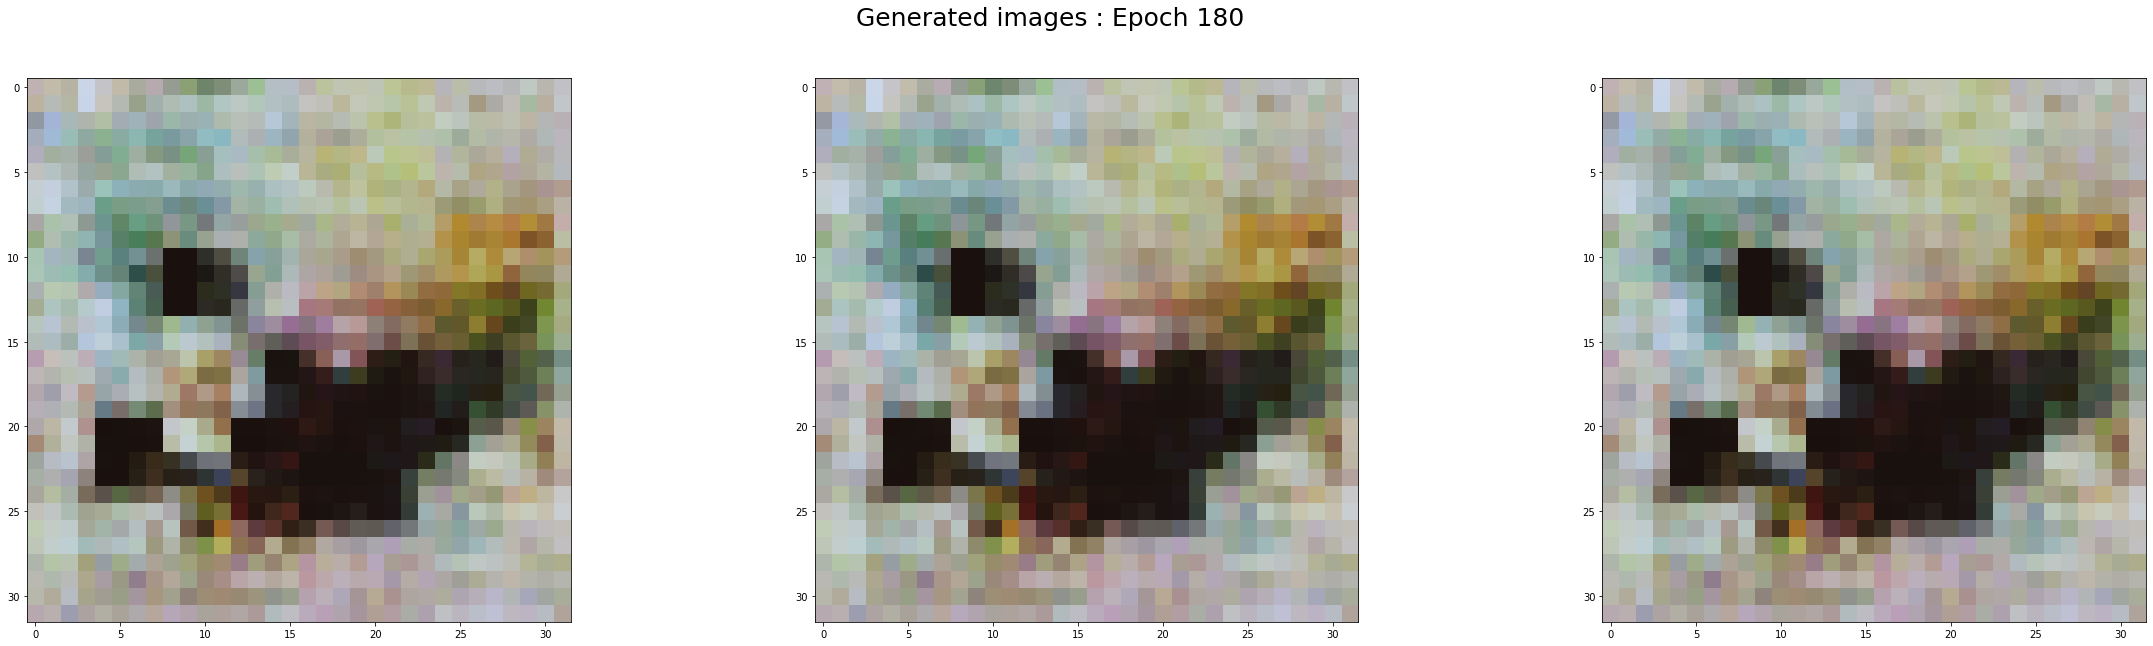

---------------------------------------------------------------
epoch :  181  d_loss_accuracy  =  [0.0036723646335303783, 1.0]  g_loss =  0.010011573322117329


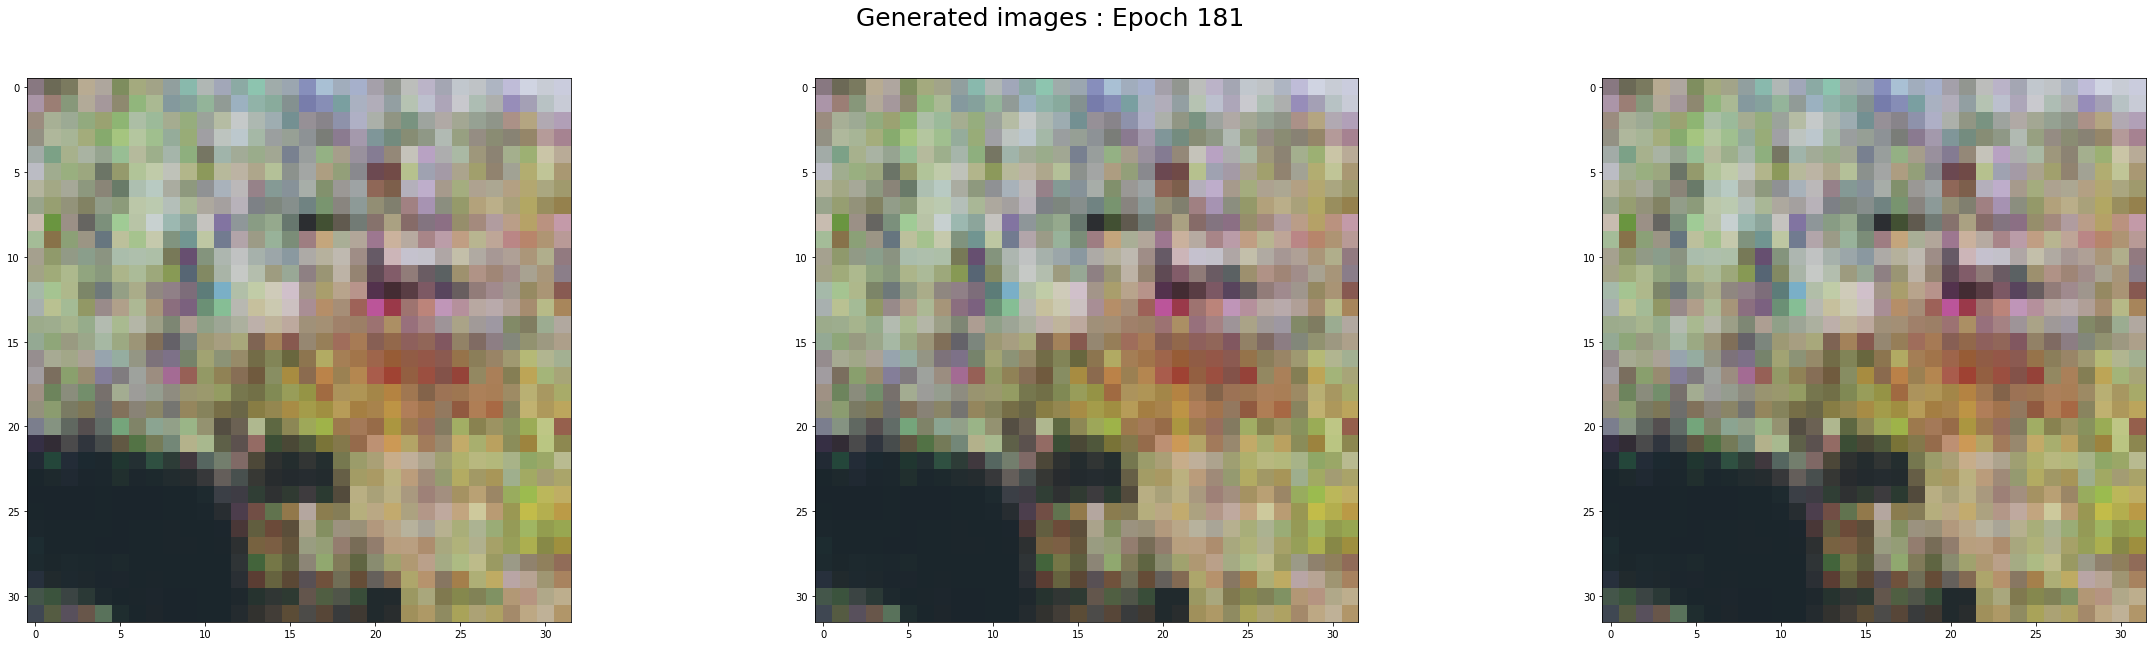

---------------------------------------------------------------
epoch :  182  d_loss_accuracy  =  [0.006871611811220646, 1.0]  g_loss =  0.9553820490837097


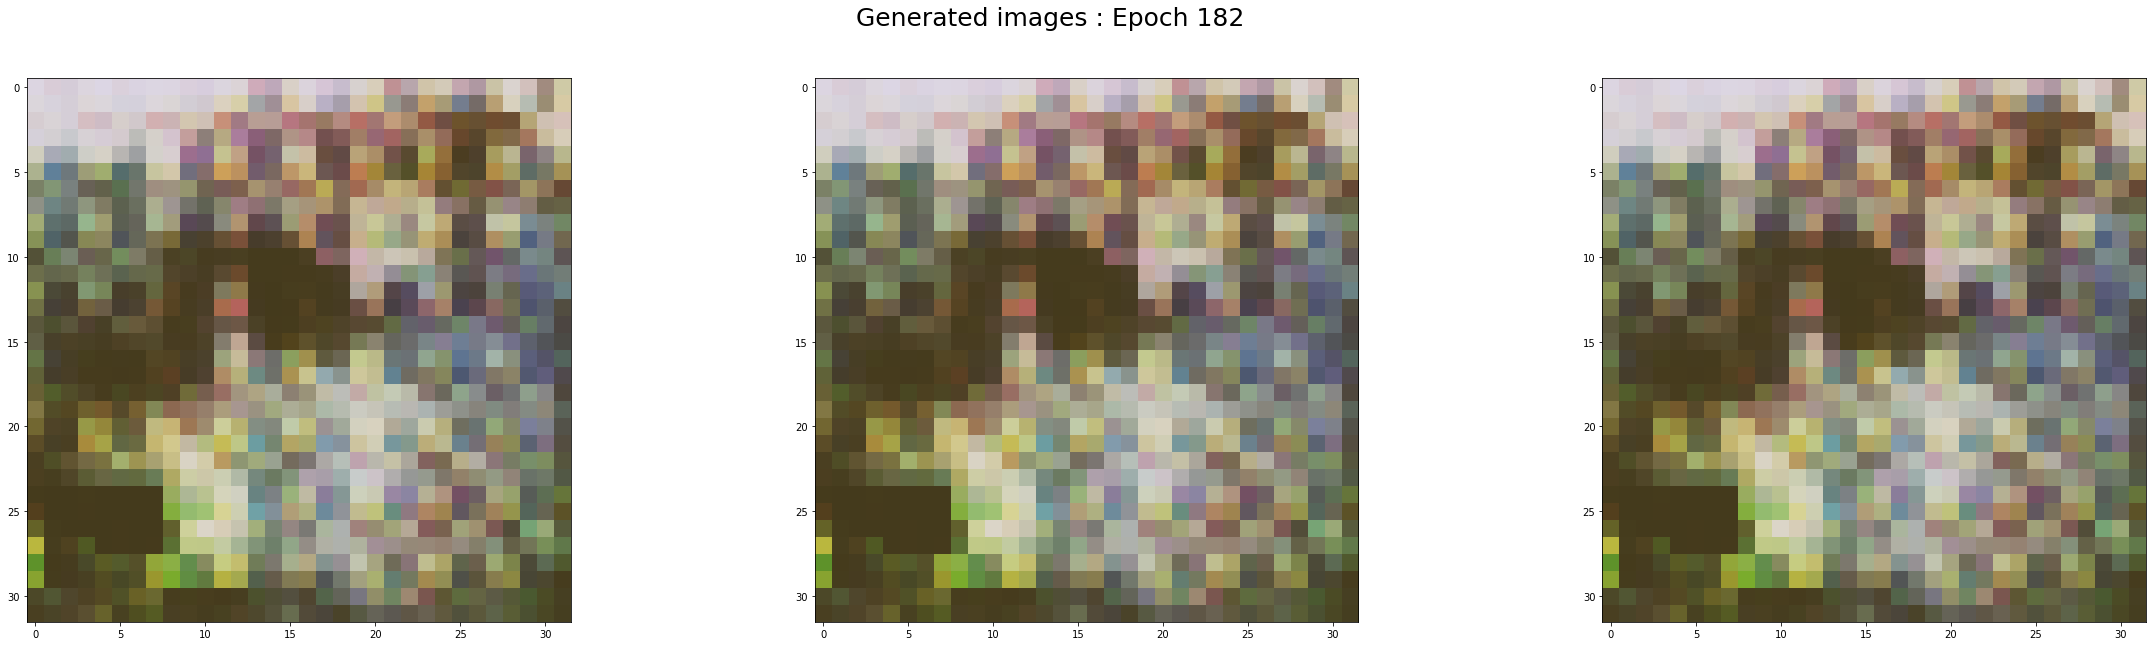

---------------------------------------------------------------
epoch :  183  d_loss_accuracy  =  [0.07942292839288712, 0.98828125]  g_loss =  5.617656230926514


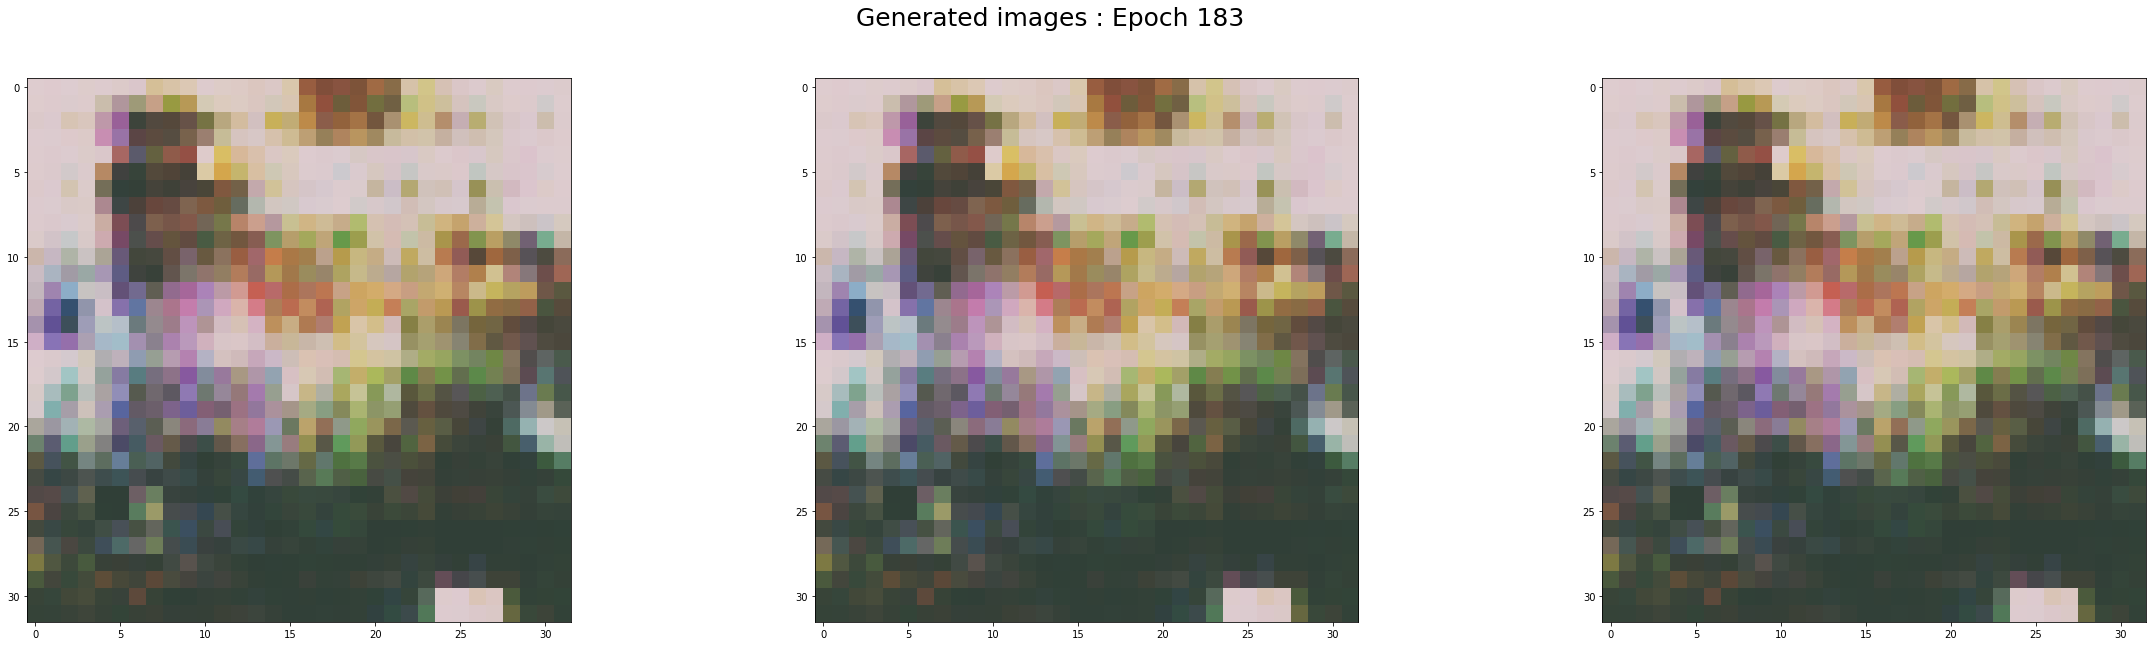

---------------------------------------------------------------
epoch :  184  d_loss_accuracy  =  [0.00026876796619035304, 1.0]  g_loss =  0.11871205270290375


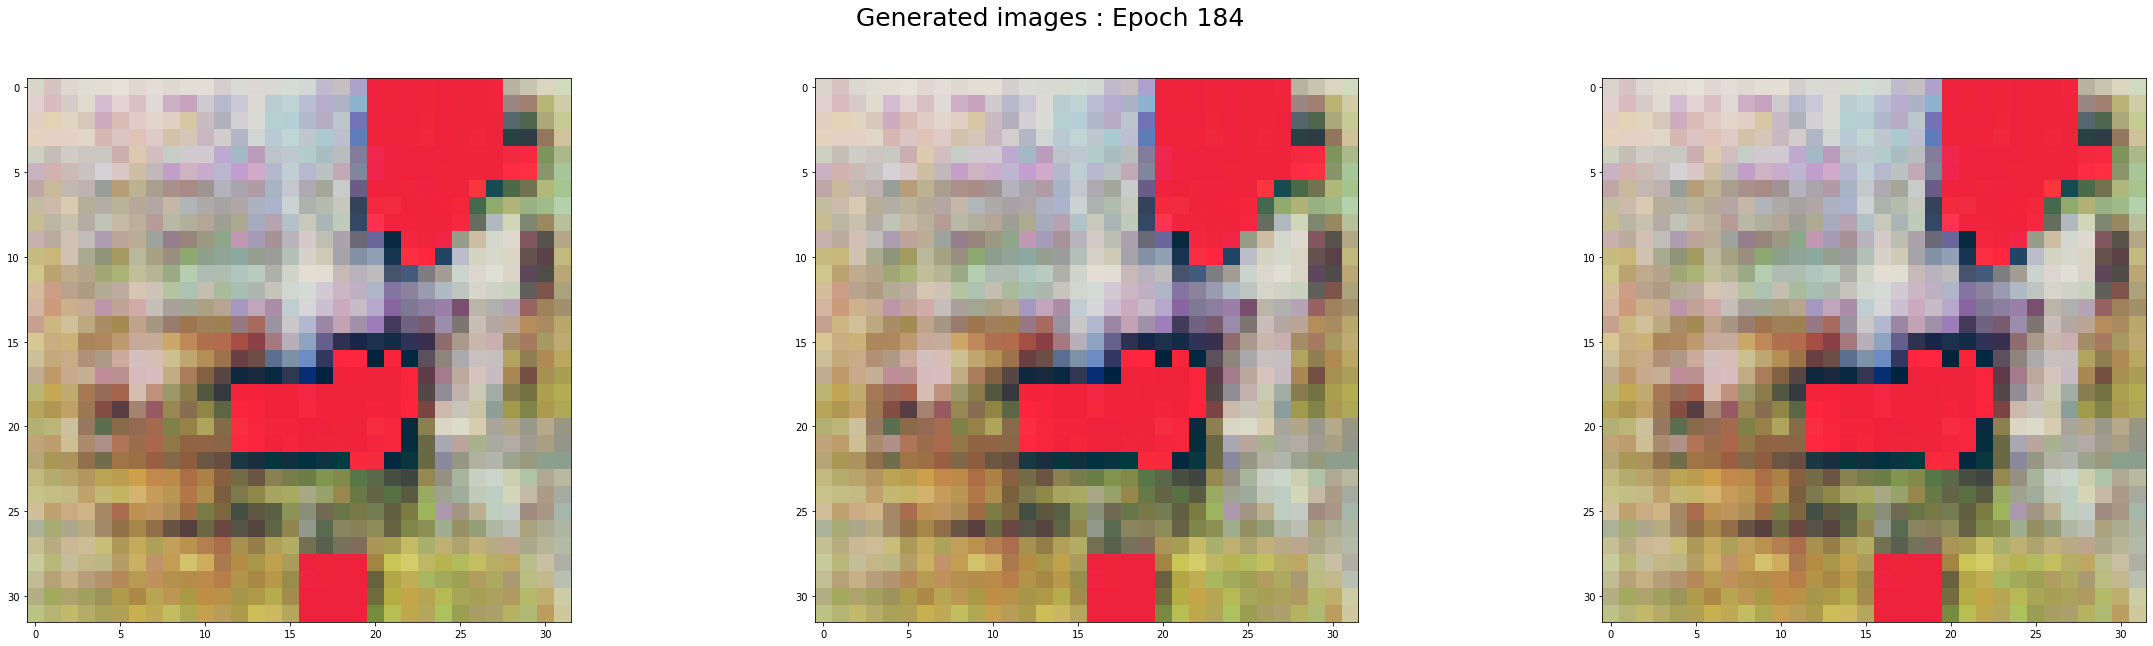

---------------------------------------------------------------
epoch :  185  d_loss_accuracy  =  [0.019570086151361465, 0.99609375]  g_loss =  0.09602396190166473


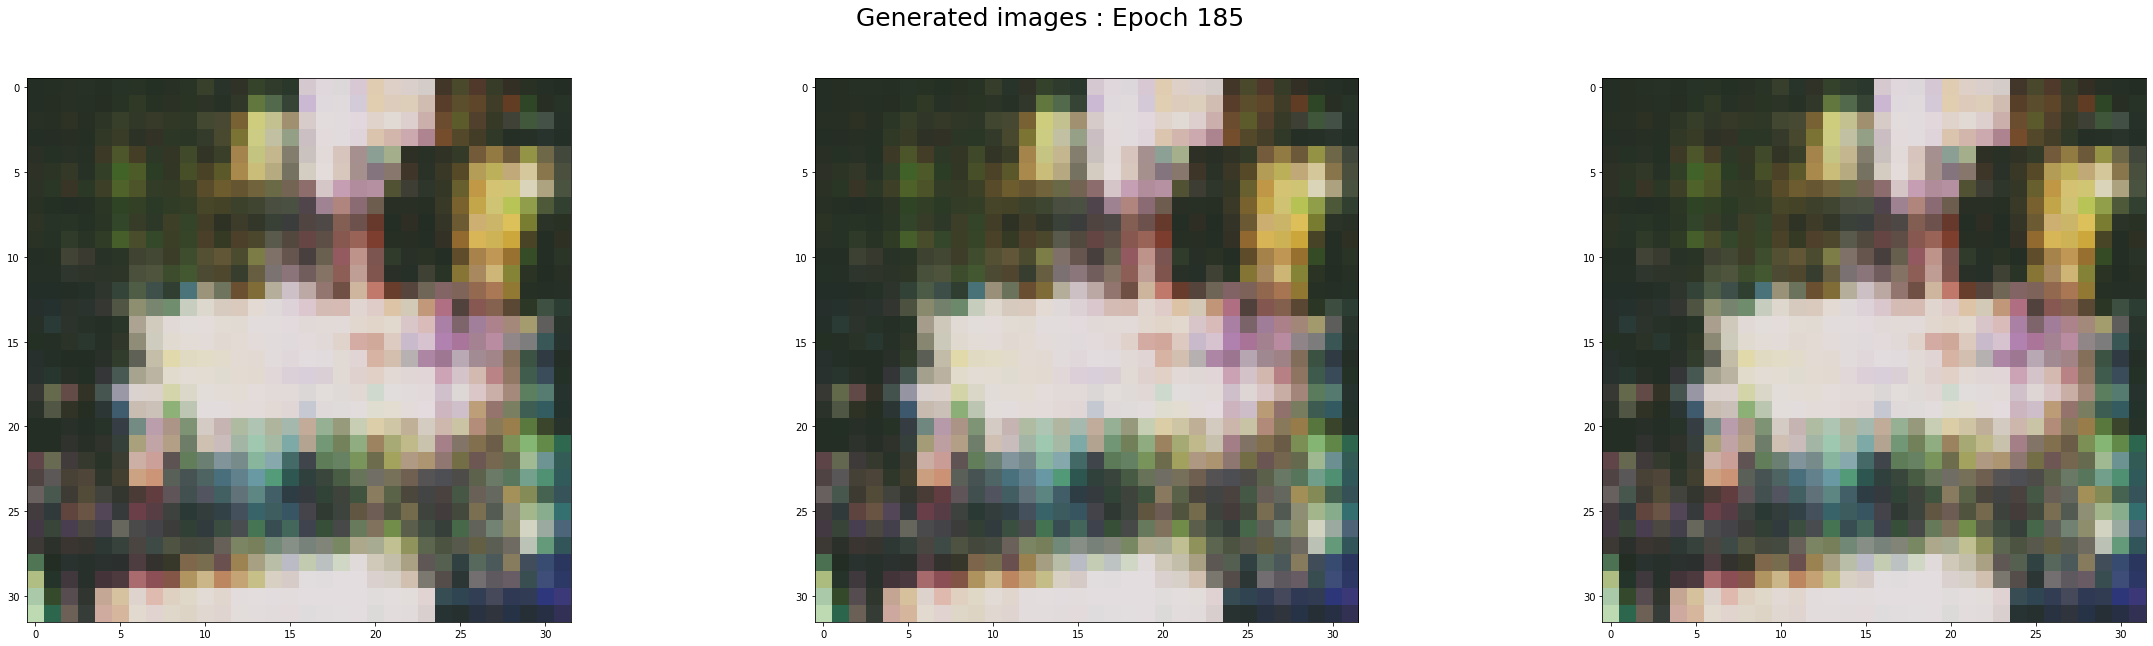

---------------------------------------------------------------
epoch :  186  d_loss_accuracy  =  [0.000988532556220889, 1.0]  g_loss =  0.00512940576300025


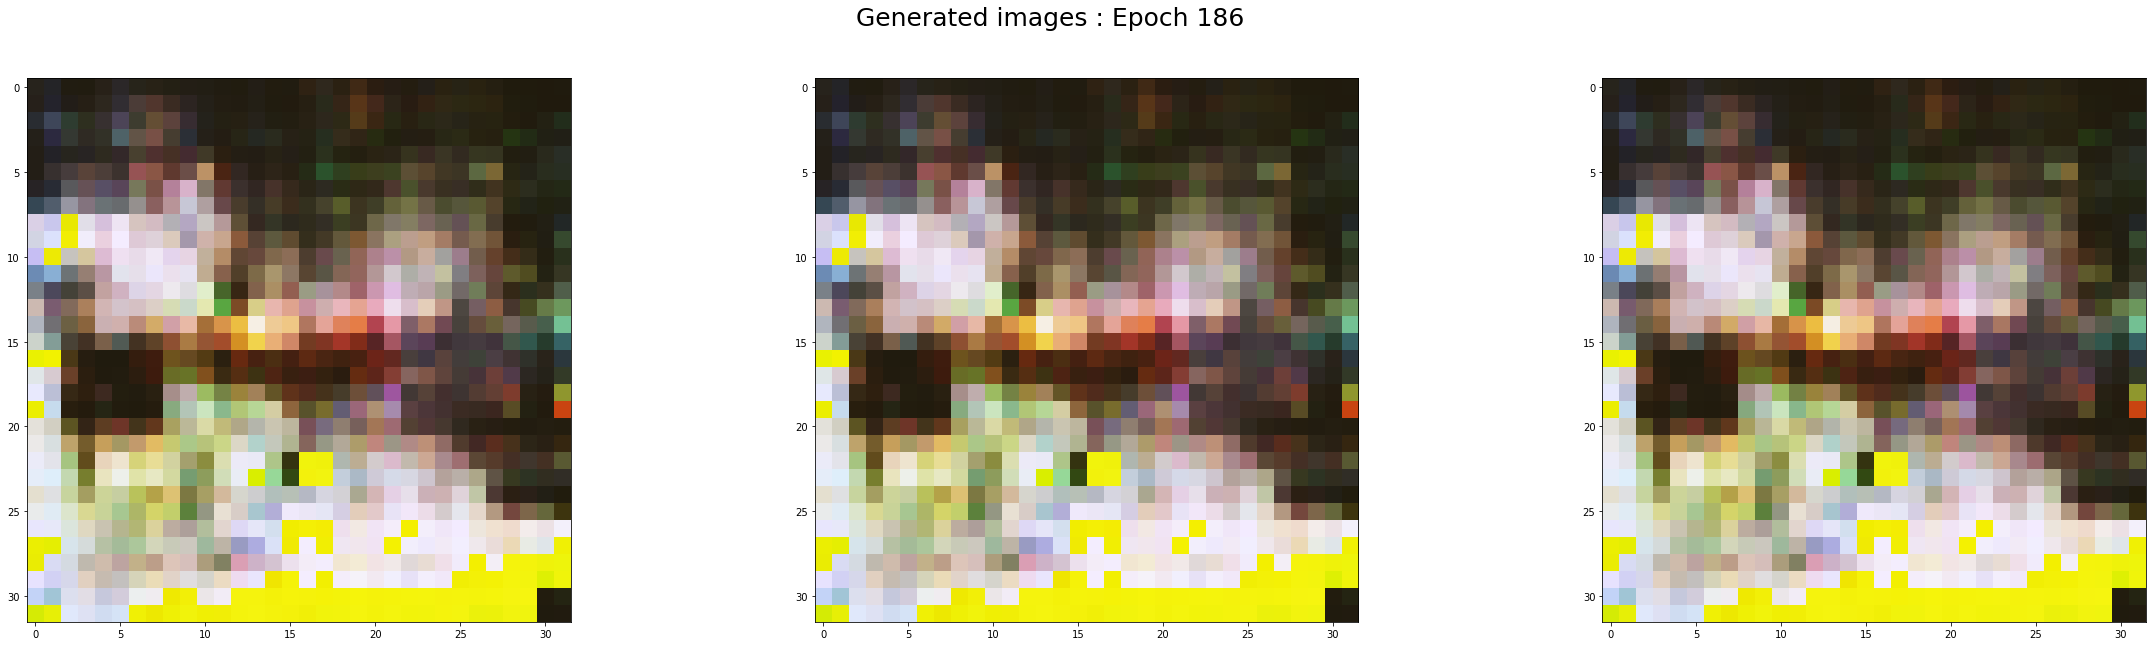

---------------------------------------------------------------
epoch :  187  d_loss_accuracy  =  [0.0024916441179811954, 1.0]  g_loss =  0.13743653893470764


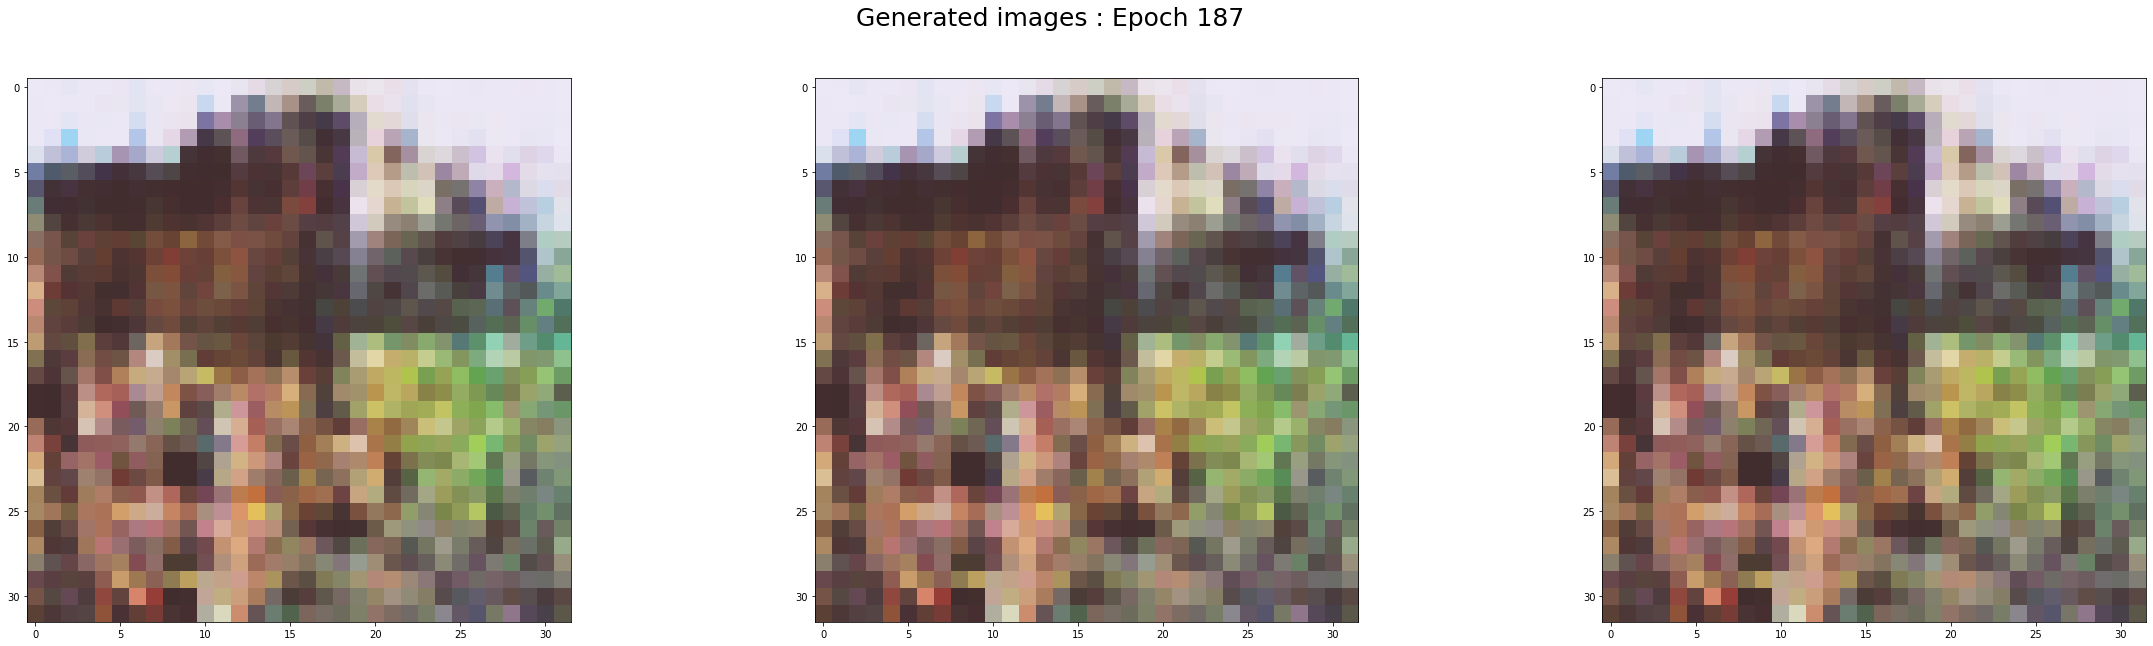

---------------------------------------------------------------
epoch :  188  d_loss_accuracy  =  [0.00032021908555179834, 1.0]  g_loss =  0.04353908449411392


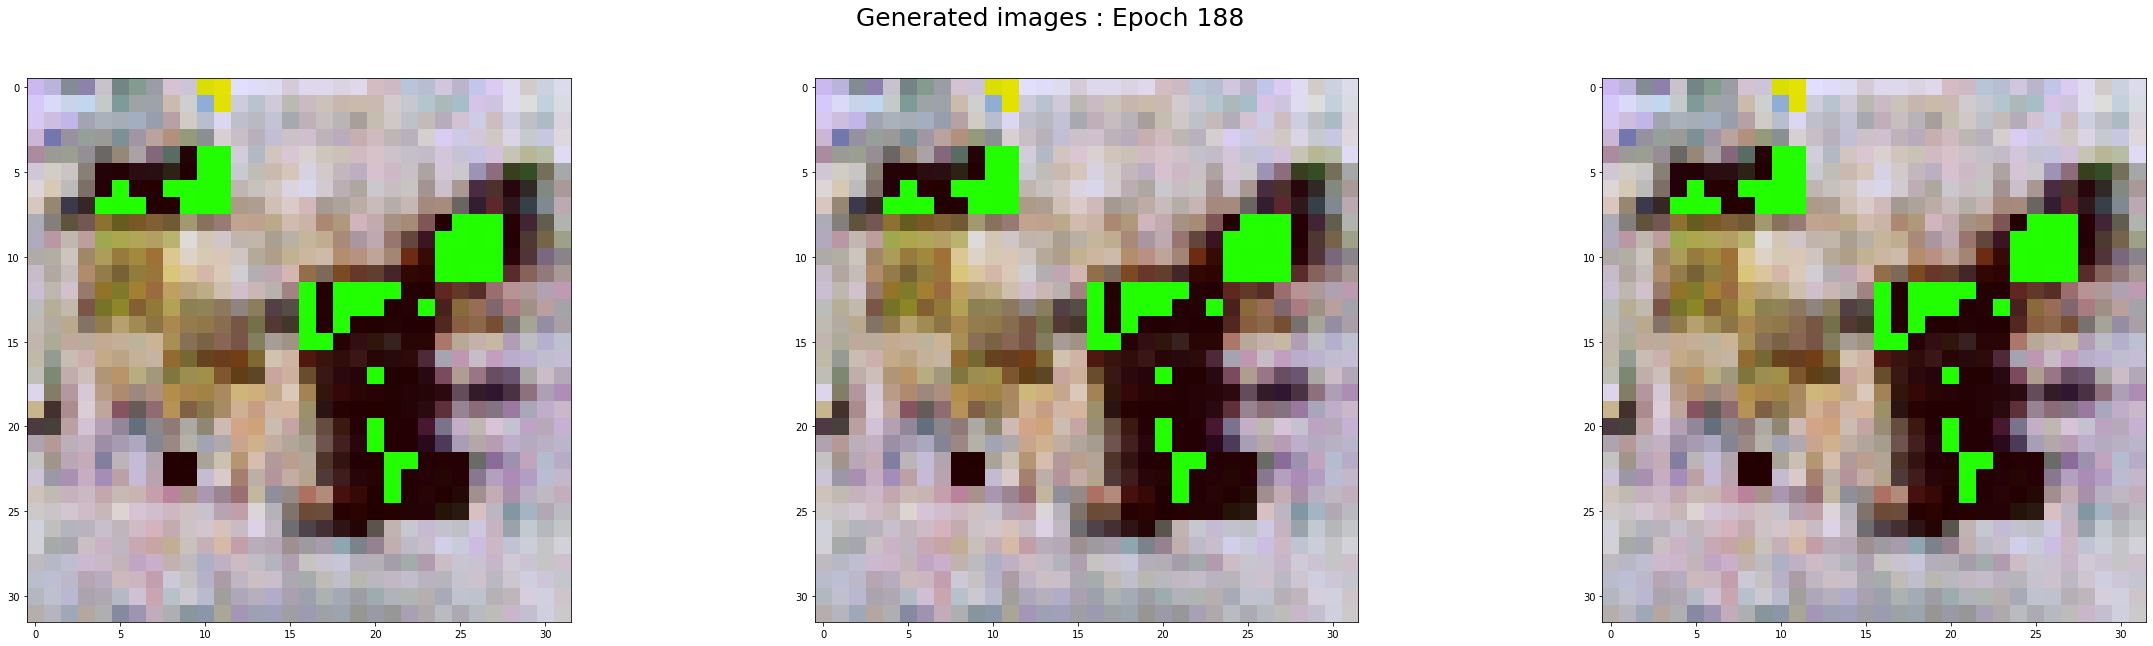

---------------------------------------------------------------
epoch :  189  d_loss_accuracy  =  [0.004790254402905703, 1.0]  g_loss =  0.0457790270447731


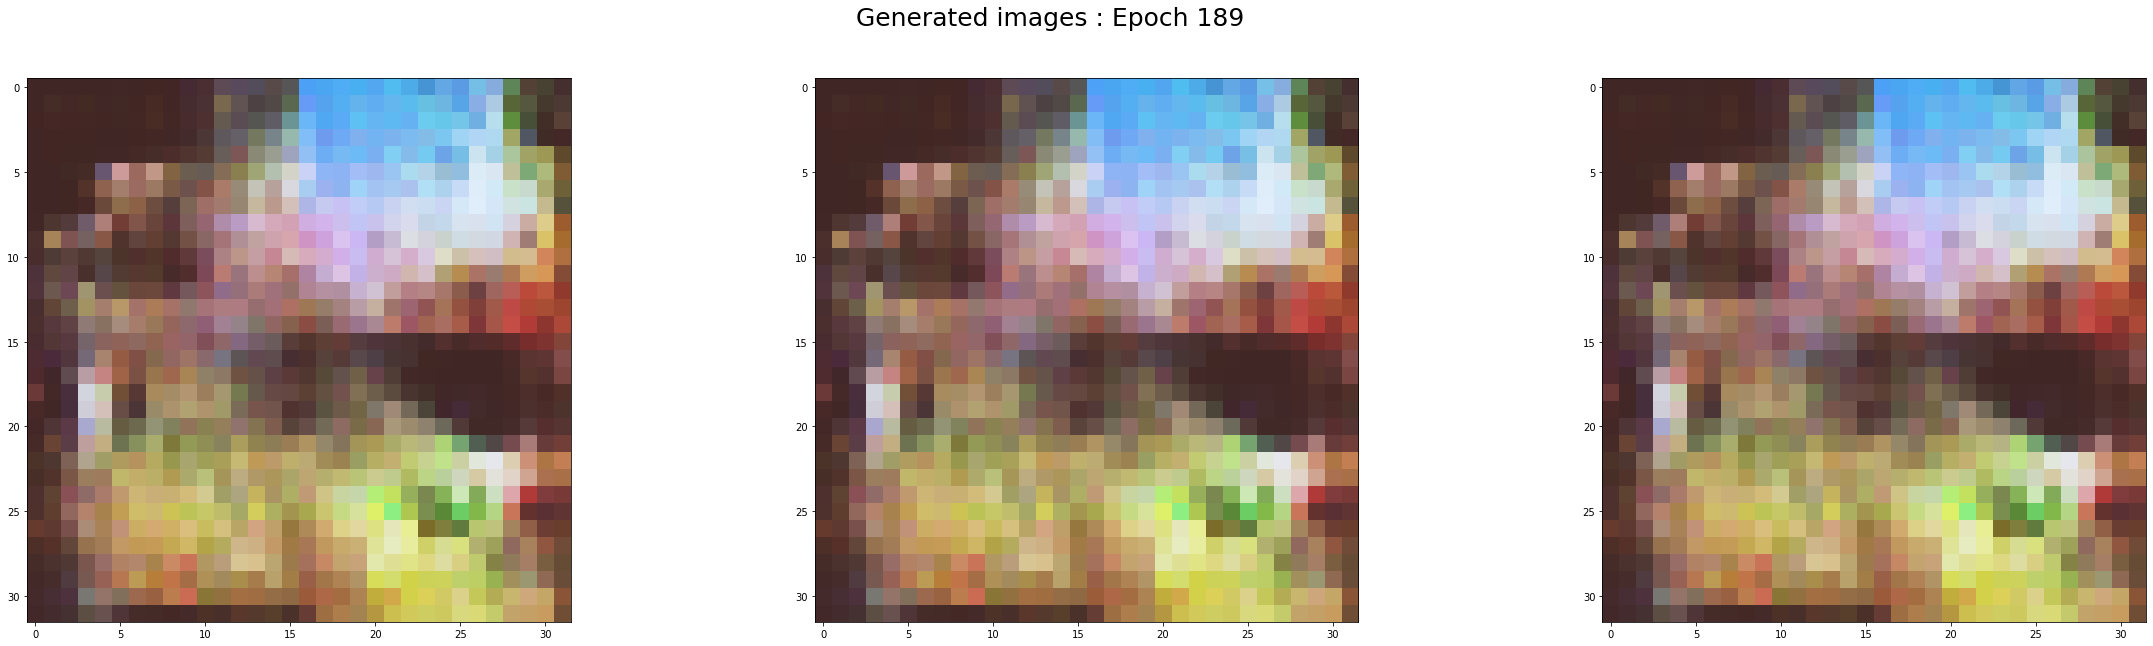

---------------------------------------------------------------
epoch :  190  d_loss_accuracy  =  [0.29072073101997375, 0.91796875]  g_loss =  8.272011756896973


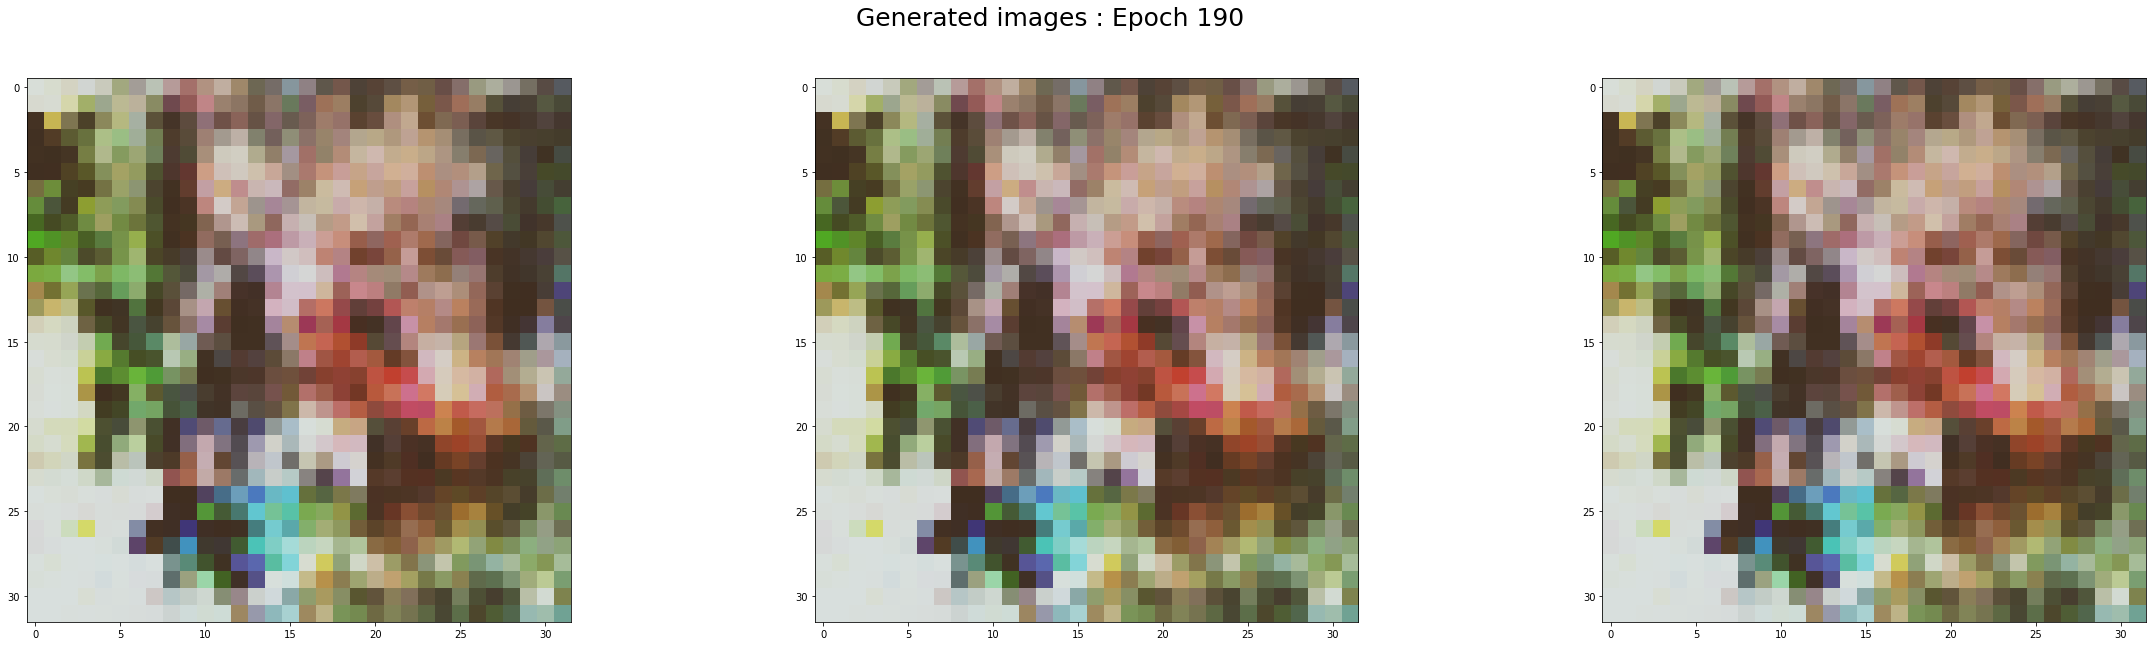

---------------------------------------------------------------
epoch :  191  d_loss_accuracy  =  [0.0007728125201538205, 1.0]  g_loss =  0.09297047555446625


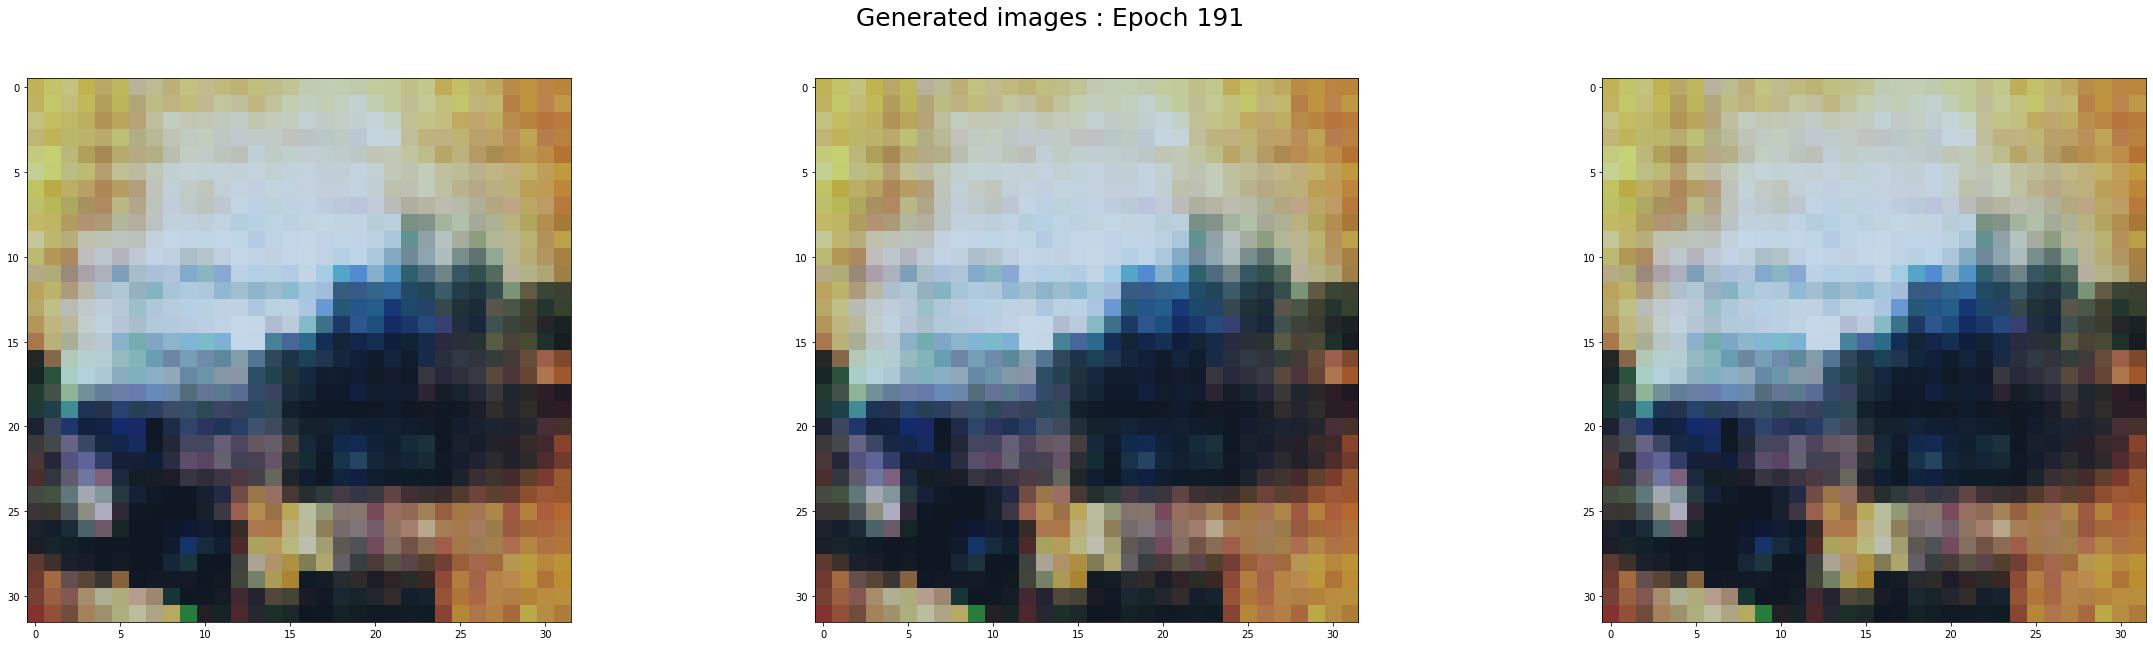

---------------------------------------------------------------
epoch :  192  d_loss_accuracy  =  [0.008869451470673084, 1.0]  g_loss =  0.5694373846054077


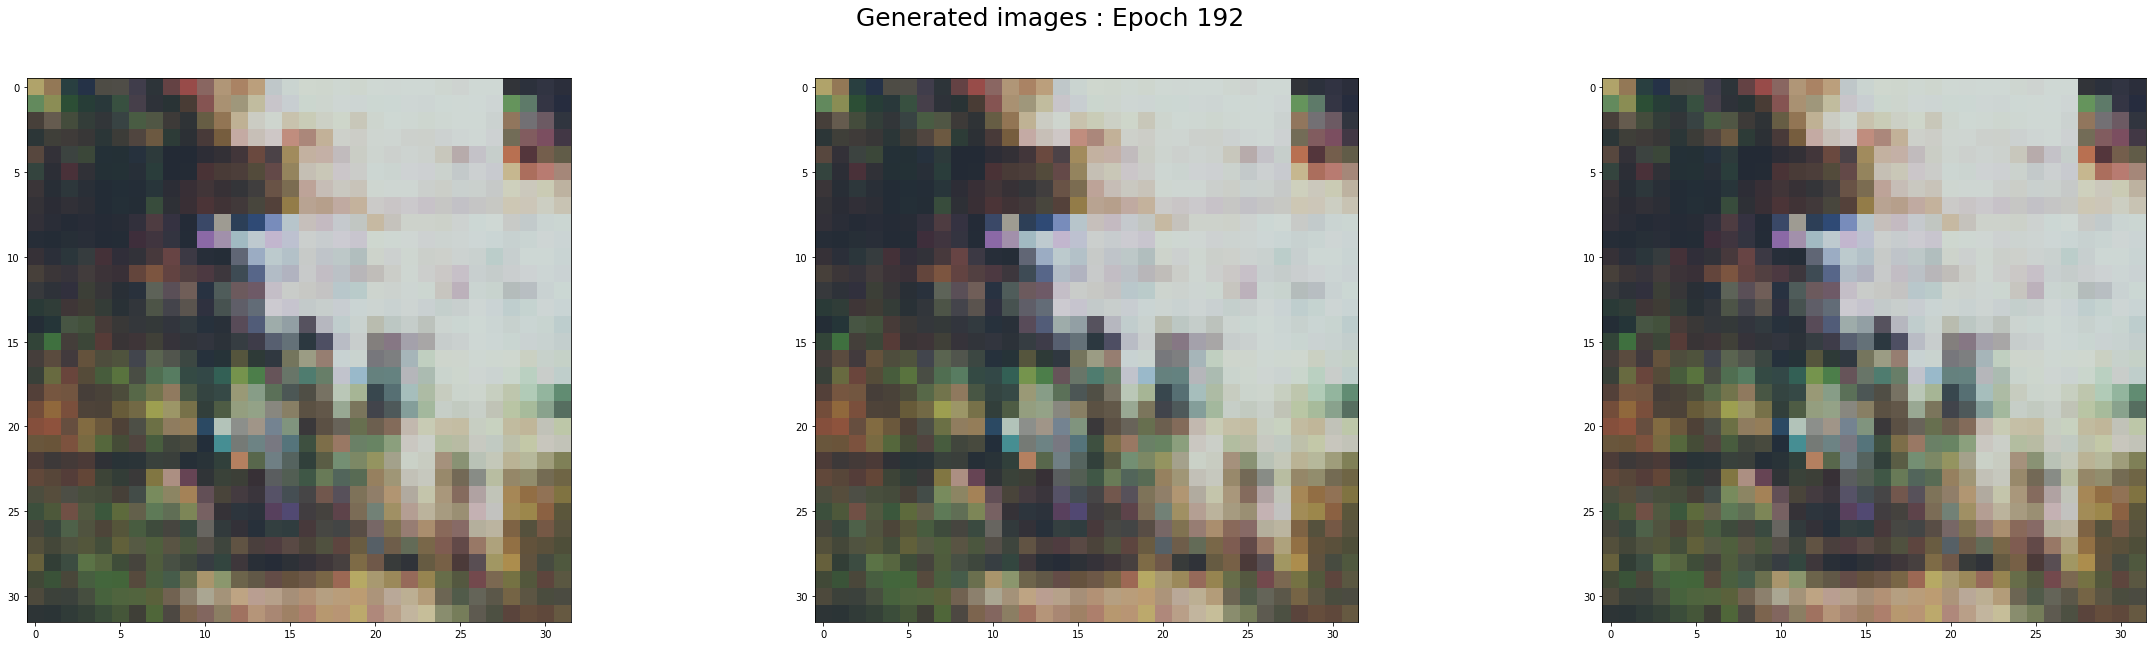

---------------------------------------------------------------
epoch :  193  d_loss_accuracy  =  [0.013091525994241238, 0.99609375]  g_loss =  0.13698390126228333


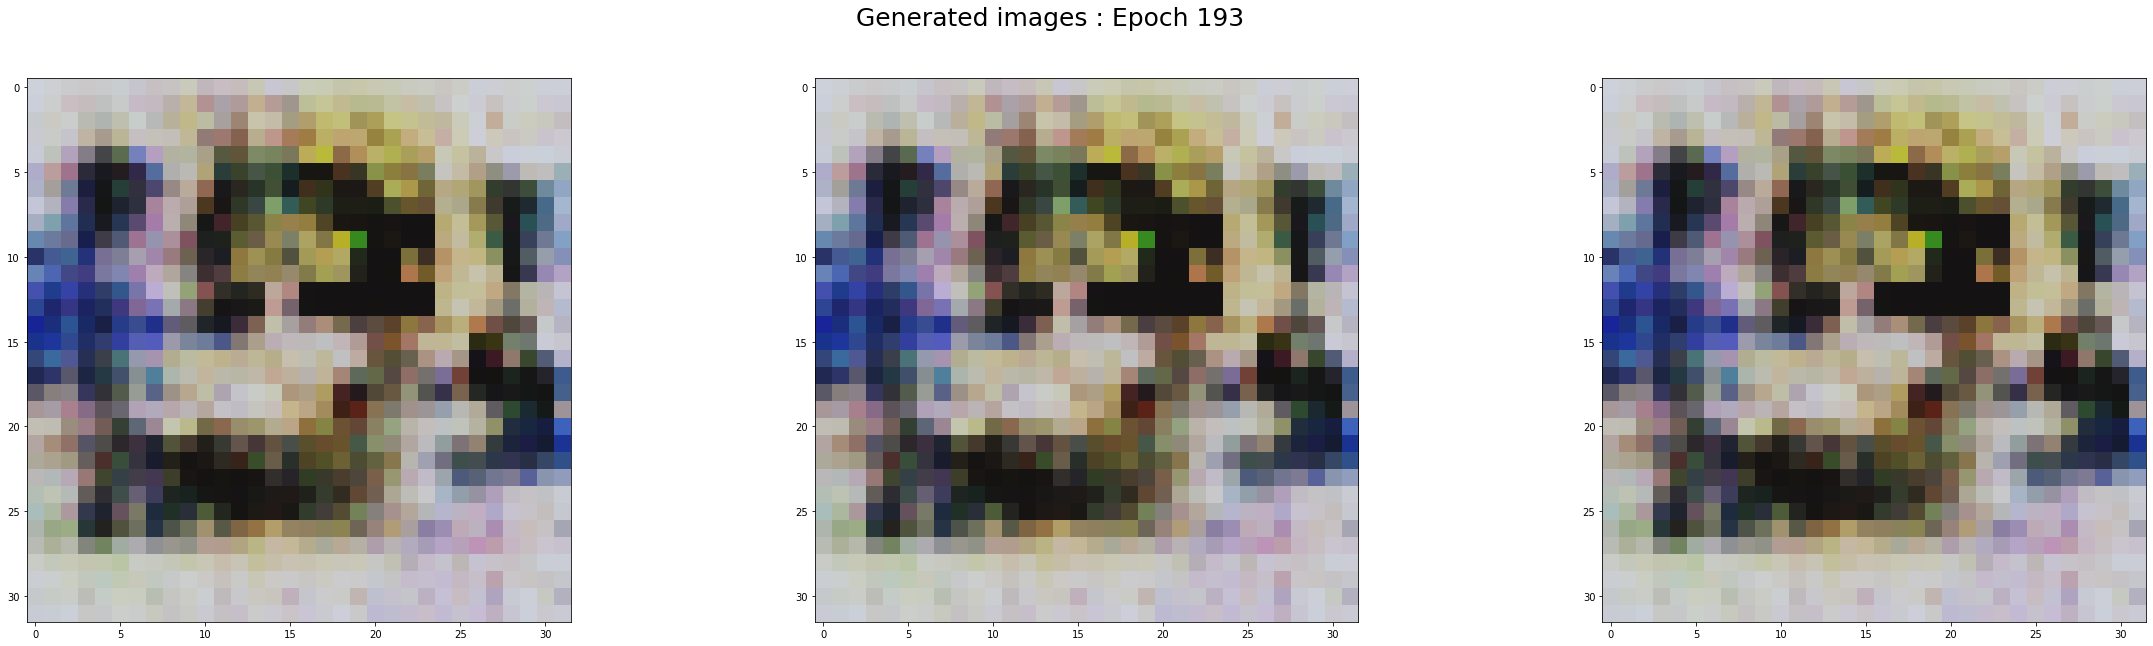

---------------------------------------------------------------
epoch :  194  d_loss_accuracy  =  [0.00870513916015625, 0.99609375]  g_loss =  0.6749311685562134


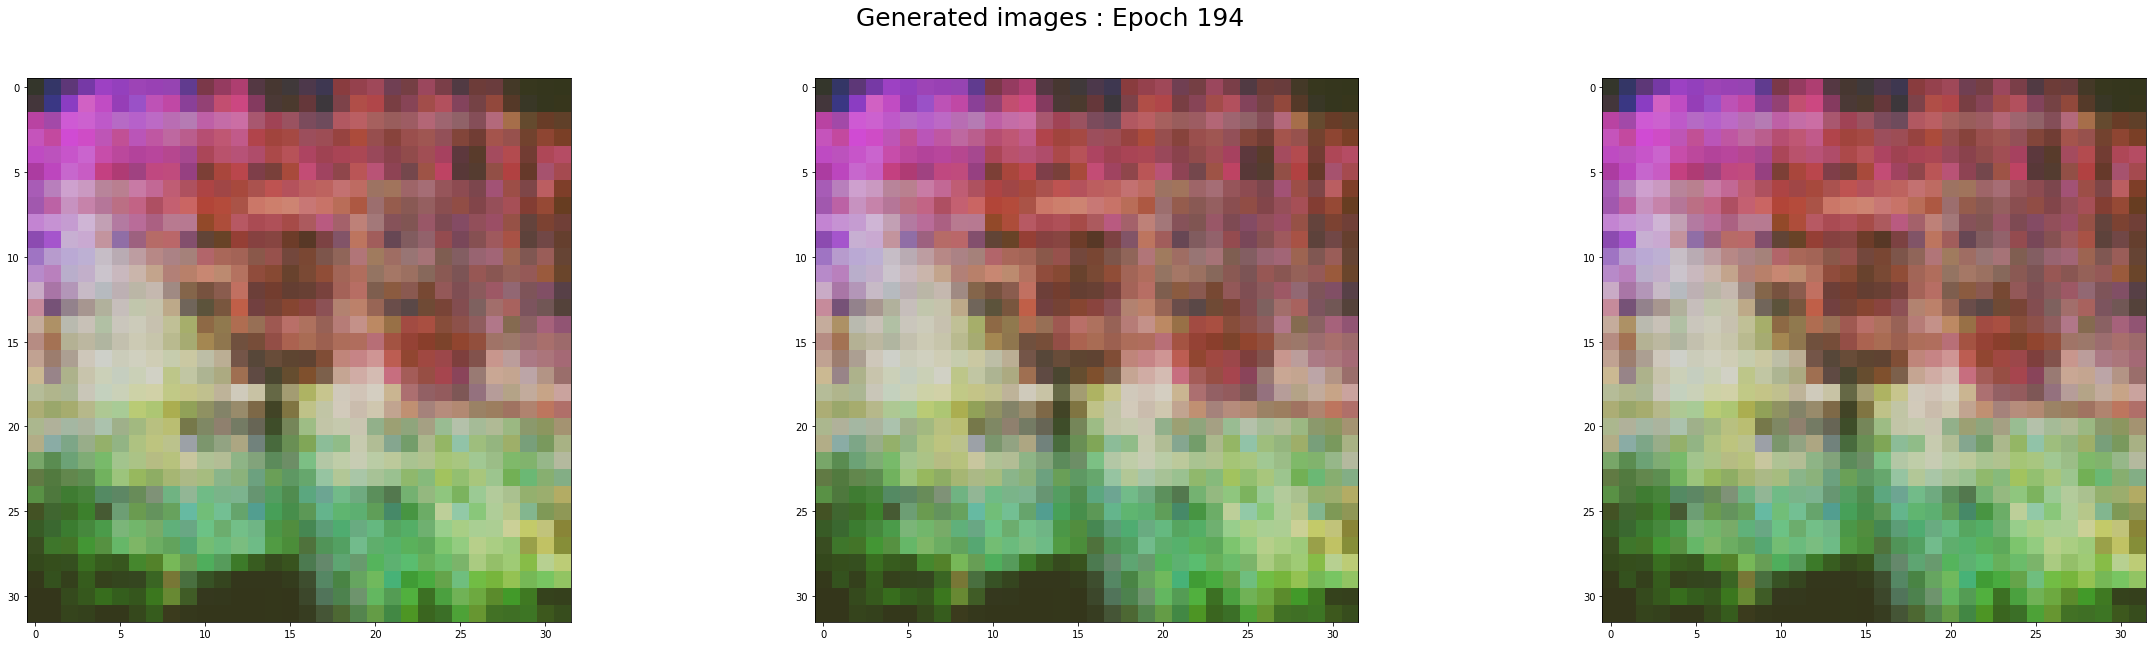

---------------------------------------------------------------
epoch :  195  d_loss_accuracy  =  [0.000680778466630727, 1.0]  g_loss =  0.015049409121274948


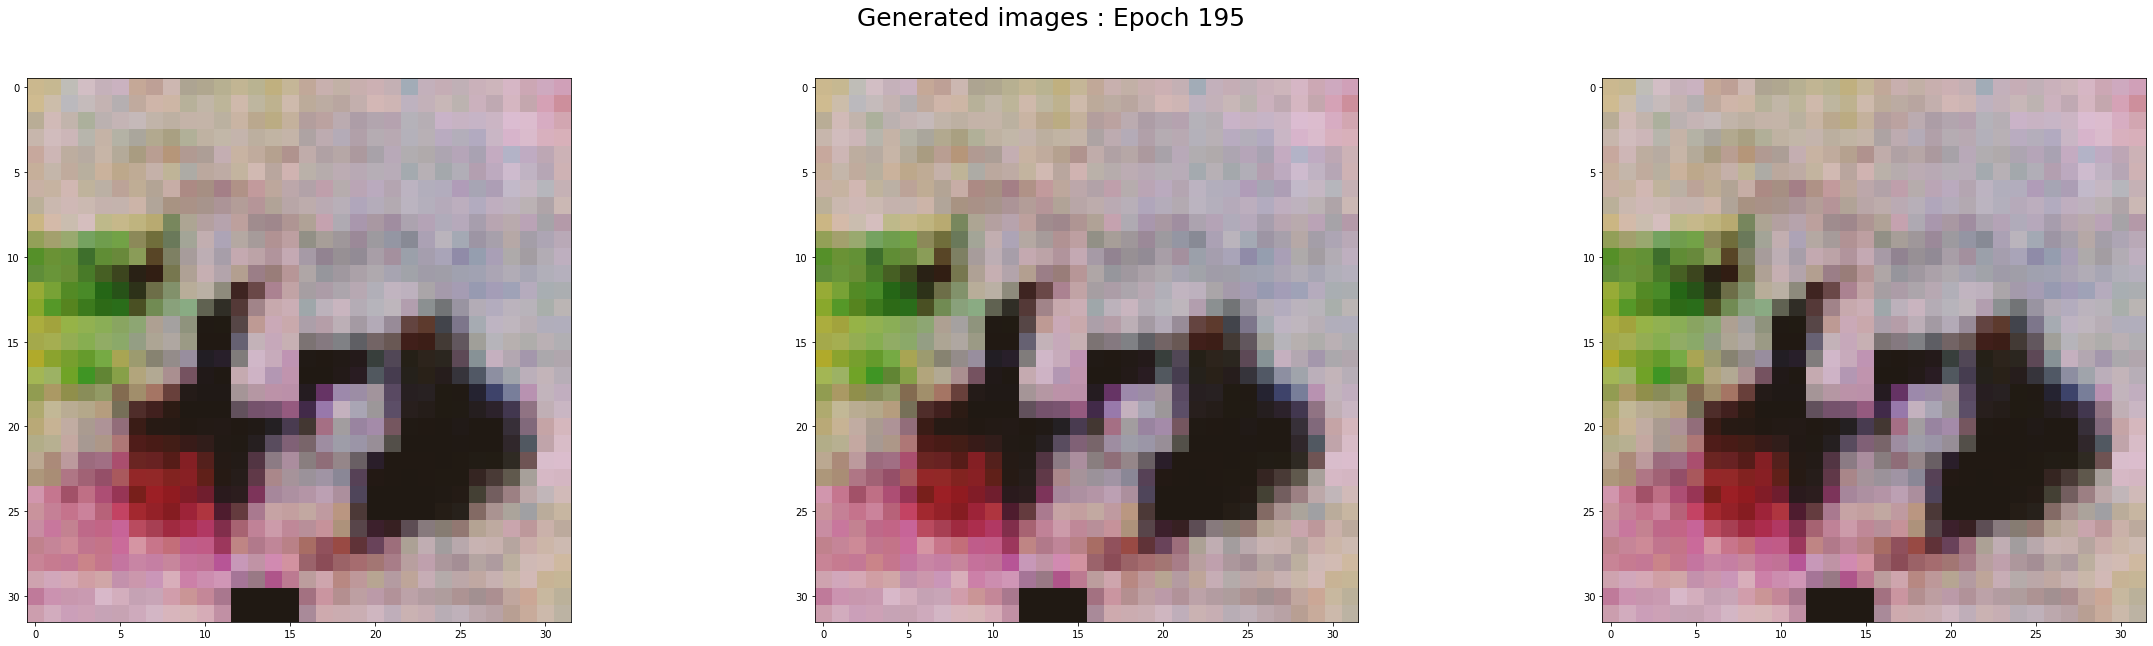

---------------------------------------------------------------
epoch :  196  d_loss_accuracy  =  [0.000693982990924269, 1.0]  g_loss =  0.1553869992494583


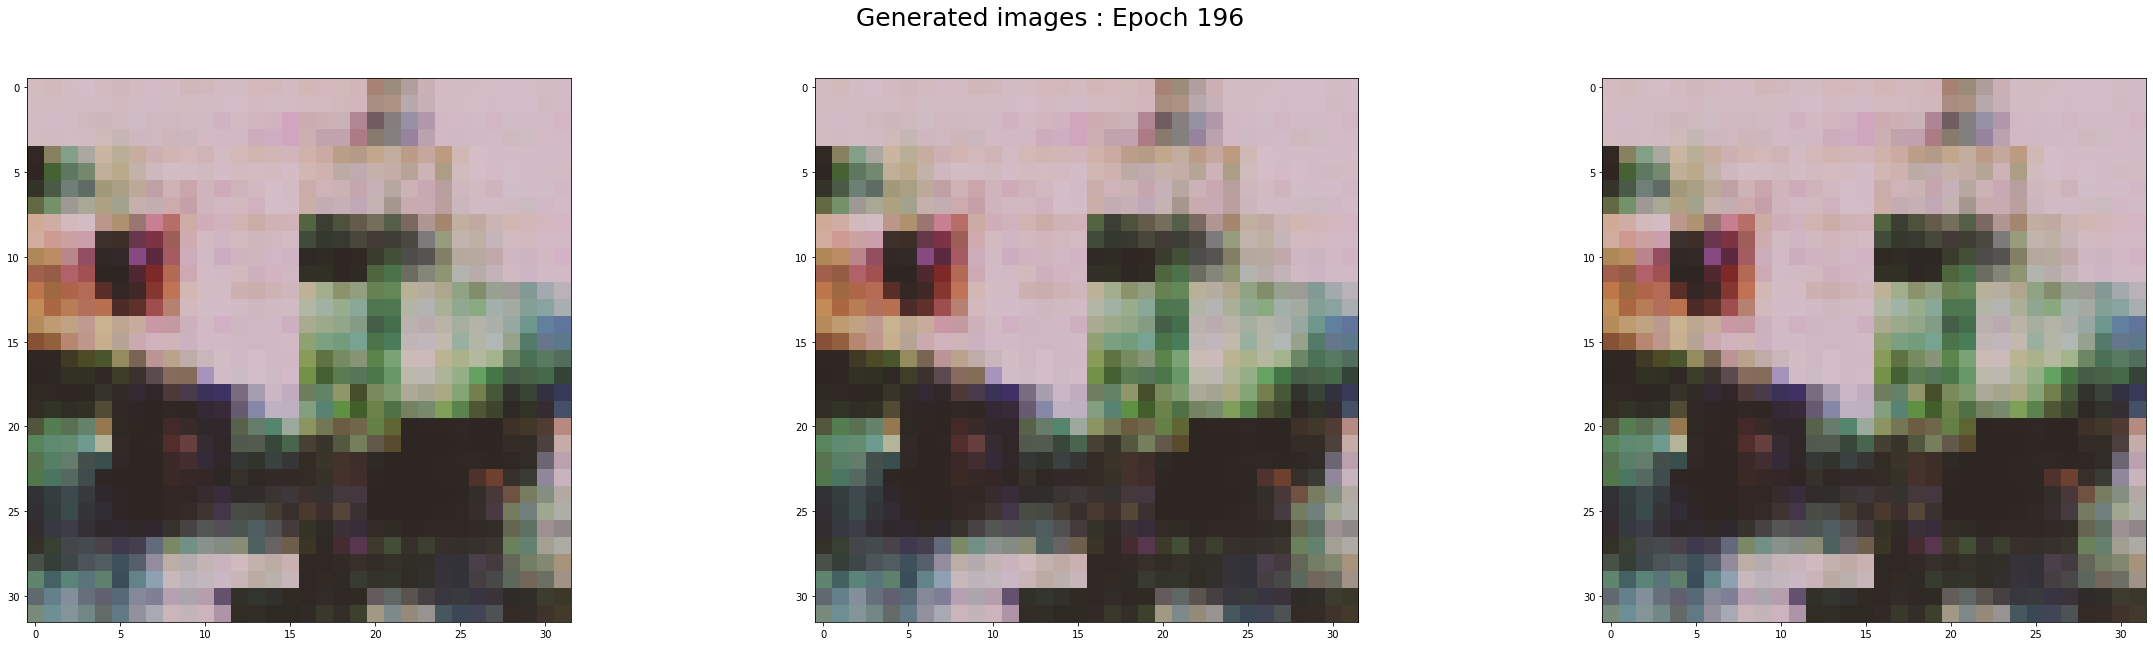

---------------------------------------------------------------
epoch :  197  d_loss_accuracy  =  [0.0008911855984479189, 1.0]  g_loss =  0.07279238104820251


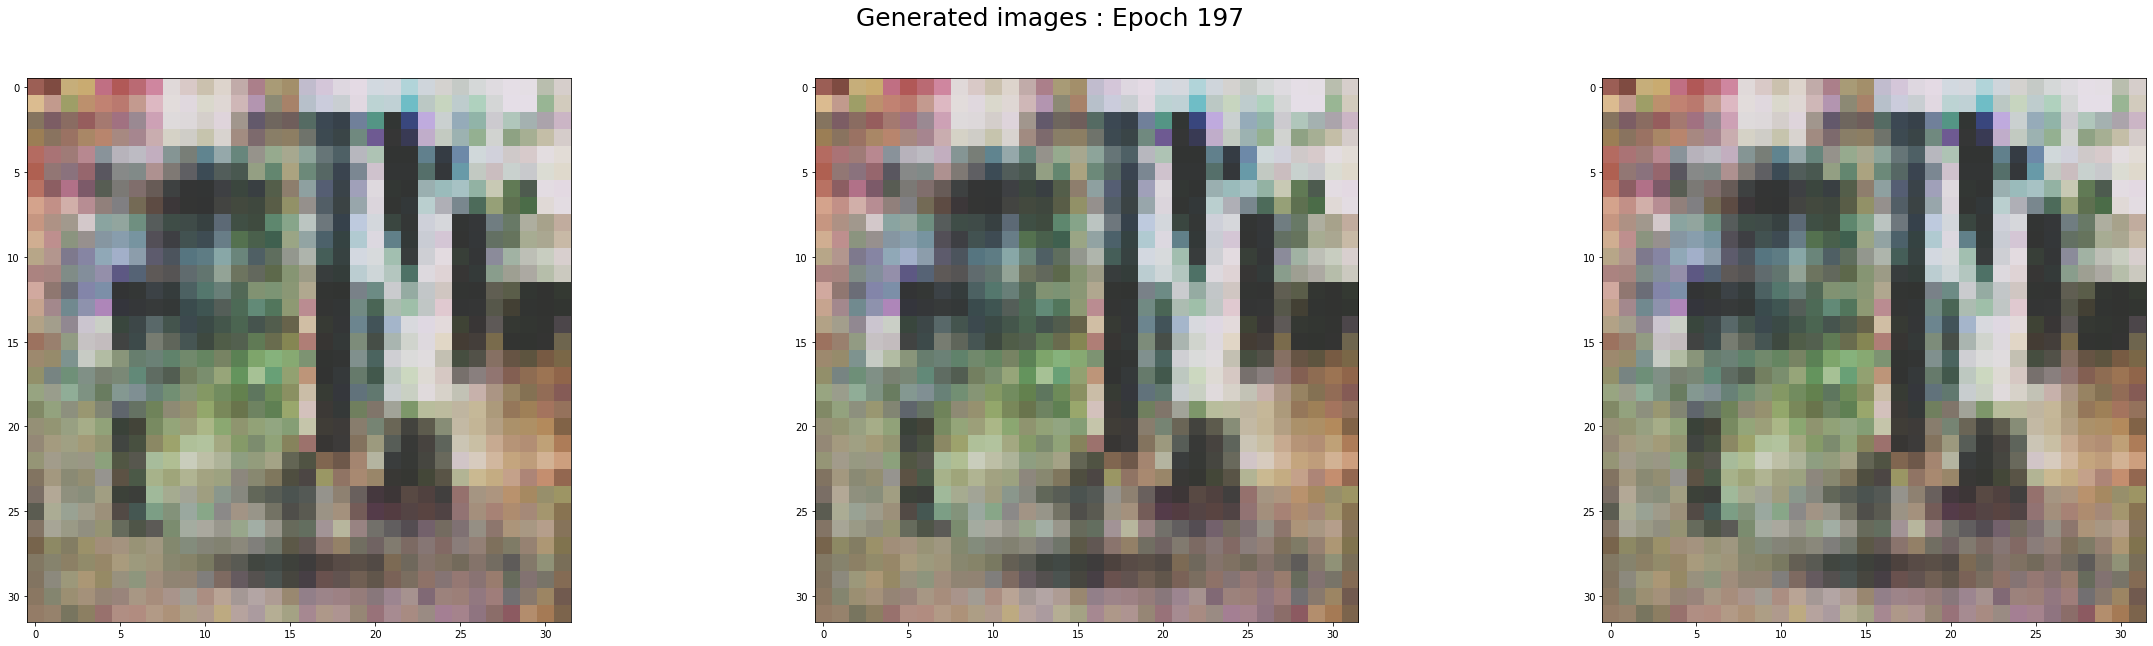

---------------------------------------------------------------
epoch :  198  d_loss_accuracy  =  [0.00025430295499973, 1.0]  g_loss =  0.11050748080015182


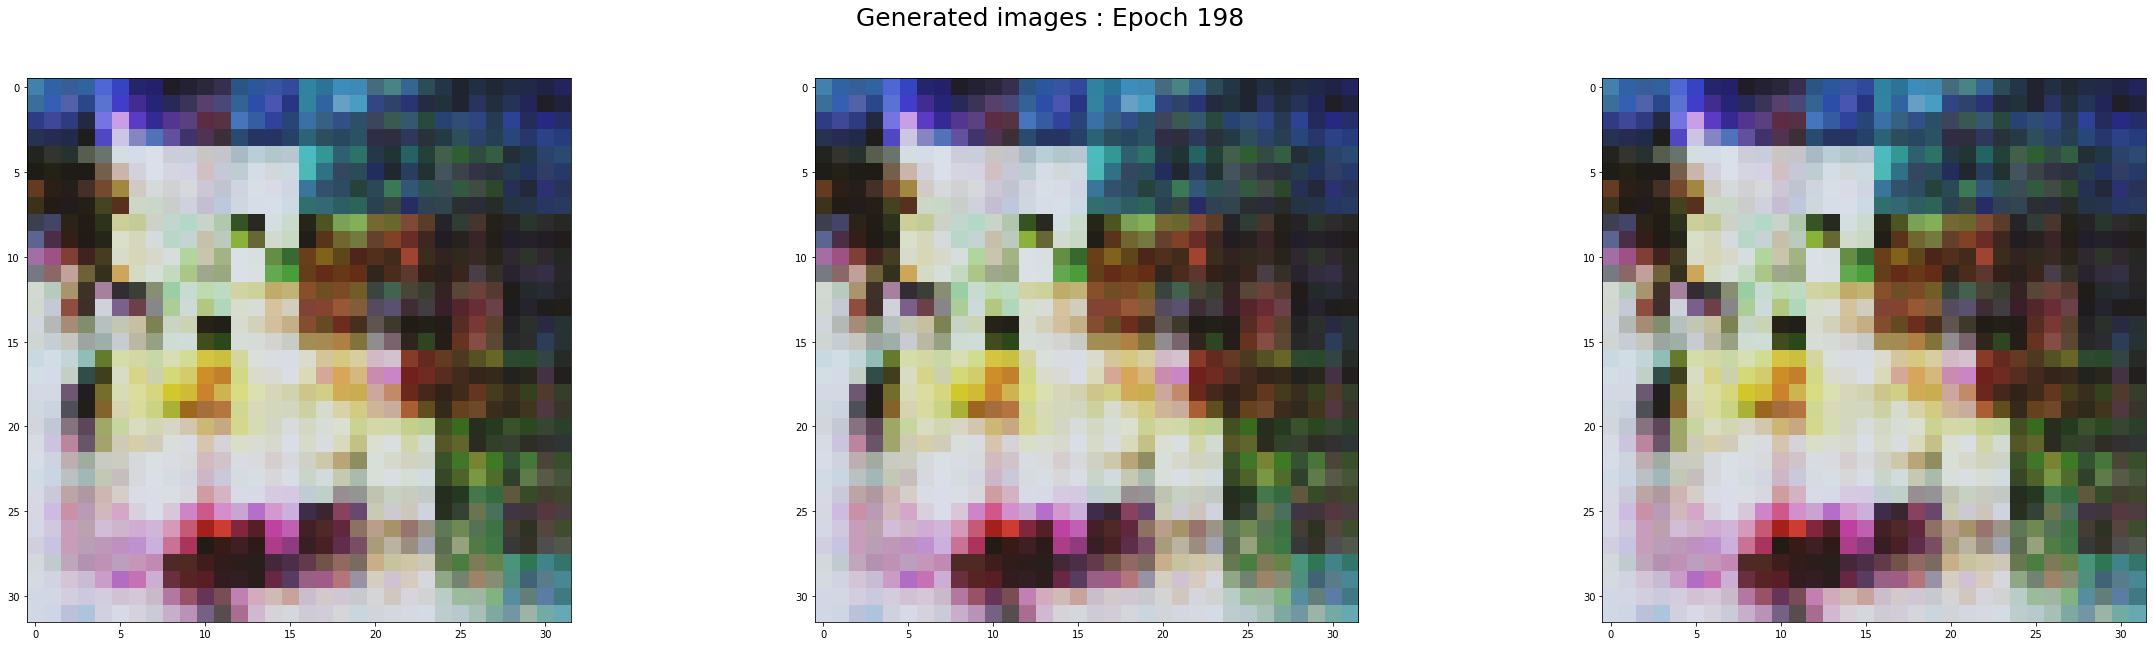

---------------------------------------------------------------
epoch :  199  d_loss_accuracy  =  [0.038886506110429764, 0.99609375]  g_loss =  0.24290795624256134


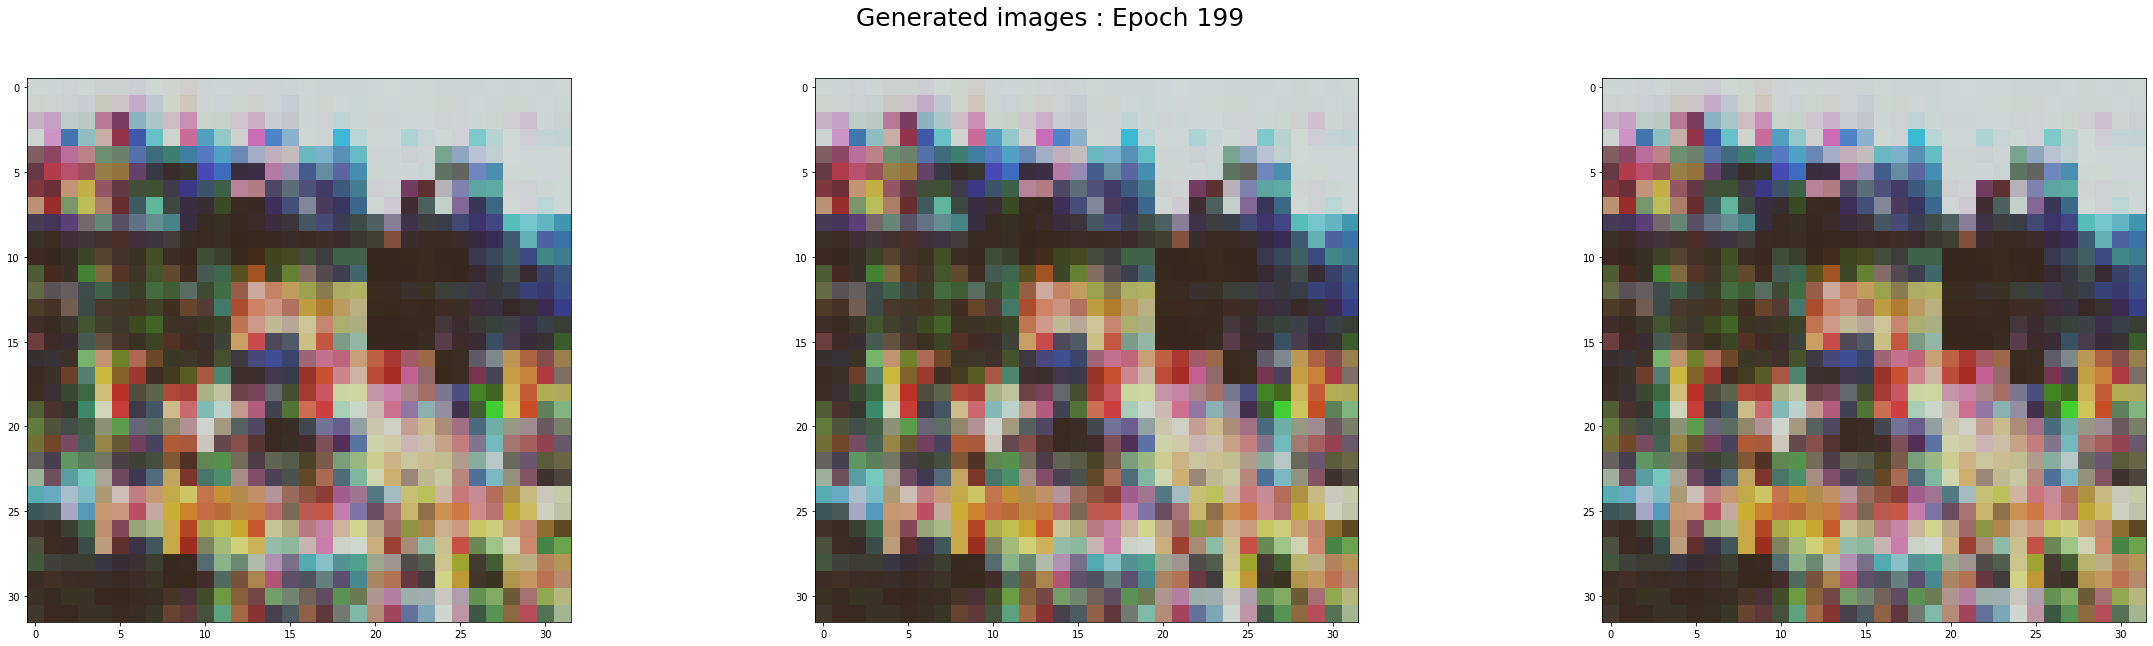

---------------------------------------------------------------


In [ ]:
gan = keras.models.Sequential([generator, discriminator])
# compile gan
opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
gan.compile(loss="binary_crossentropy", optimizer=opt)

# ------------------------------------------------------------------------------
# For creating an animated gif
from PIL import Image
import cv2 
images = []

def animated_gif():
    noise_1 = tf.random.normal(shape=[4, codings_size])
    imgs = generator.predict(noise_1)

    img0 = (imgs[0] * 255).astype(np.uint8)
    img1 = (imgs[1] * 255).astype(np.uint8)
    img2 = (imgs[2] * 255).astype(np.uint8)
    img3 = (imgs[3] * 255).astype(np.uint8)

    img = cv2.hconcat([img0, img1, img2, img3])
    img = Image.fromarray(np.uint8(img)).convert("RGB")
    return img

print("---------------------------------------------------------------")

def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator.predict(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            d_loss_accuracy = discriminator.train_on_batch(X_fake_and_real, y1)

            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, y2)
        
        
        print("epoch : ",epoch, " d_loss_accuracy  = ",d_loss_accuracy, " g_loss = ",g_loss)
        plot_generated_images(3,titleadd=" : Epoch {}".format(epoch))
        
        # For creating an animated gif
        img = animated_gif()   
        images.append(img)
        print("---------------------------------------------------------------")
# ------------------------------------------------------------------------------
n_epochs = 200
train_gan(gan, dataset, batch_size, codings_size, n_epochs)

# Create a gif of the generated images at every epoch
images[0].save("/content/gif_image.gif",
               save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

# **AttGAN - Arbitrary Facial Attribute Editing: Only Change What You Want**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# https://github.com/elvisyjlin/AttGAN-PyTorch
!git clone  https://github.com/elvisyjlin/AttGAN-PyTorch.git

!pip install -r /content/AttGAN-PyTorch/requirements.txt

In [ ]:
%cd /content/AttGAN-PyTorch
#https://www.iloveimg.com/crop-image
#path="/content/gdrive/MyDrive/384_shortcut1_inject1_none_hq_hichem/384_shortcut1_inject1_none_hq/checkpoint/"
#utils.py
# CUDA_VISIBLE_DEVICES=0 \
!python test.py --experiment_name /content/gdrive/MyDrive/384_shortcut1_inject1_none_hq_hichem/384_shortcut1_inject1_none_hq --test_int 1.0  --gpu --custom_img 